# 03 - Supervised Learning - Classification

## Objectives:
1. Demonstrate the principle of classifier.
2. Practice training and visualizing classifiers for some elementary problems, using different models.
3. Understand the concept of decision surface.

Quick recap
-----------
1. **Supervised learning** is a category of machine learning which focus on getting accurate prediction (class / number), given training data (a matrix/tensor of examples and desired output).
2. If the desired output (called "label" or "target" in machine learning terminology) is a discrete group/category ("Class"), e.g. species, color, object... then it is called a **Calssification** problem.
3. Usually, the data is given in as a n \* m matrix, where each row is an example/sample and each column is a property of the sample (called *feature*).

In [1]:
# Load some packages and settings

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
rnd = 1
np.random.seed(rnd)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print("Hello World!")

Hello World!


In this notebook, we will tackle 3 classification problems:
### 1. Toy example
### 2. Iris species classfication
### 3. Handwritten difits

# 1. Toy dataset

The first exercise would be a toy data set of 2 classes and 2 features, which is a simple one and good for visualization.

In [2]:
# Load data set
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, random_state=rnd)

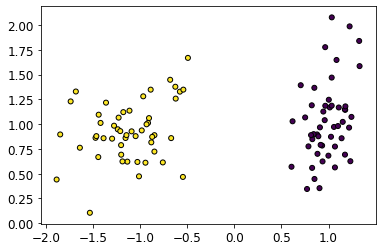

In [3]:
# Plot the data on 2-D space
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

This dataset is easy to classify - the 2 classes have a large "gap" (often called *_margin_*) in between.

Let's try train a linear classifier:

**NOTE: in real case, you should always split a test set for final evaluation, or even a validation set or cross-validation as we discussed in previous lecture. However, we omit these steps because performance is not the focus now.**

In [4]:
# Linear classifier (Logistic Regression)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=rnd).fit(X, y)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


What does the linear regression model look like mathematically?

In [5]:
print("Coefficient: {}\nIntercept: {}".format(logreg.coef_, logreg.intercept_))

Coefficient: [[-3.36753926  0.0746059 ]]
Intercept: [-0.07133157]


Done! Our first classifier is ready. To see what it does, let's do some plotting.

In [6]:
# You do not have to understand what the following code does - it plots a graph.
def plot_toy_decision_surface(X, y, clf, feature1='Feature 1', feature2='Feature 2'):
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(feature1)
    plt.ylabel(feature2)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

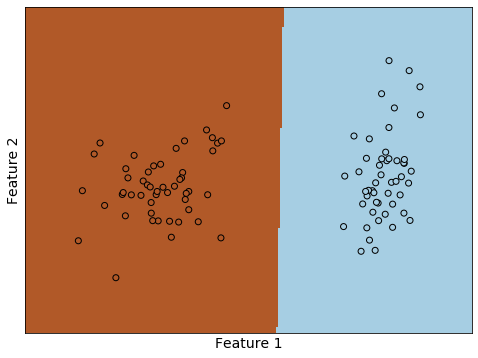

In [7]:
plot_toy_decision_surface(X, y, clf=logreg)

Cool. How about a decision tree?

In [8]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=rnd).fit(X, y)

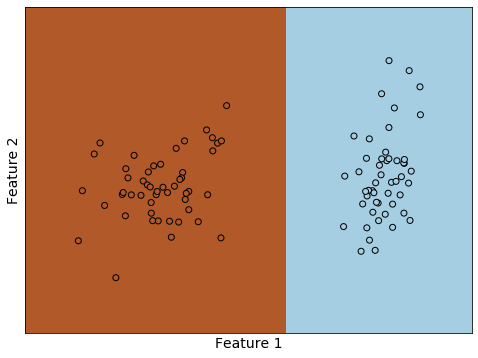

In [9]:
plot_toy_decision_surface(X, y, clf=dt_clf)

Result is similar but not very interesting. This problem is too easy!

But think about it: if we find a way to represent our data as simple as this dataset, we would easily get great performance without complex modelling. This is the task of **feature engineering** which is often the key factor of good performance.

Anyway, let's try a slightly more complicated problem:

In [10]:
X1, y1 = make_classification(n_samples=100, class_sep = 0.25, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, random_state=rnd)

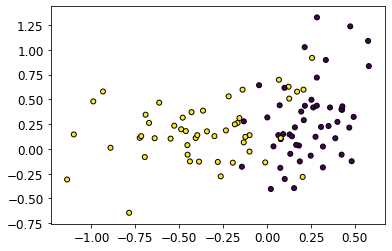

In [11]:
# Plot the data on 2-D space
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k')

This data set is harder - you can see some data points overlapping. Let's try training some models:

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


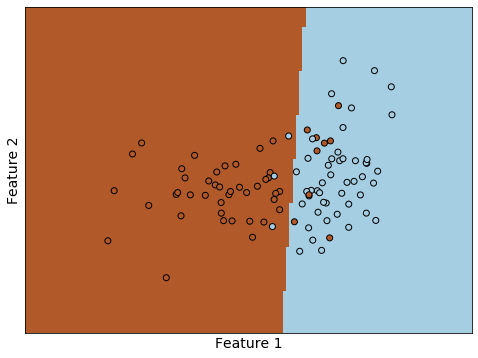

In [12]:
#  Start from simple - Logistic Regression
logreg1 = LogisticRegression(random_state=rnd).fit(X1, y1)
plot_toy_decision_surface(X1, y1, clf=logreg1)

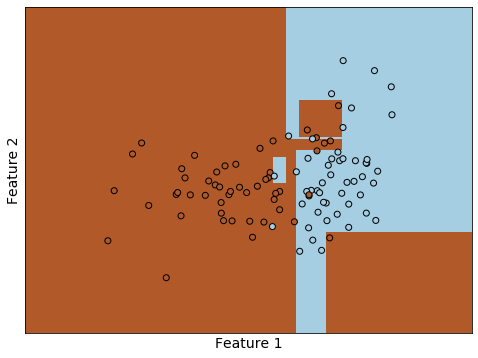

In [13]:
# ...and a decision tree
dt_clf1 = DecisionTreeClassifier(random_state=rnd).fit(X1, y1)
plot_toy_decision_surface(X1, y1, clf=dt_clf1)

Question: which model do you think is easier to underfit? and overfit?

Before we move on, let's try a more complex model: the random forests.

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


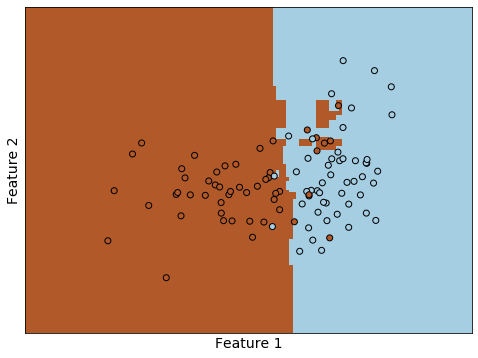

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier(random_state=rnd).fit(X1, y1)
plot_toy_decision_surface(X1, y1, clf=rf_clf1)

**Question:** Can you spot the major difference between the decision surfaces of decision tree and random forest?

# 2. Iris plants dataset

This is one of the most famous dataset in literature, often used to evaluate the performance of classifiers.

* The dataset consists of 3 classes, "Setosa", "Versicolour", and "Virginica".

* Four features are present: sepal length, sepal width, petal length, petal width (all in cm).


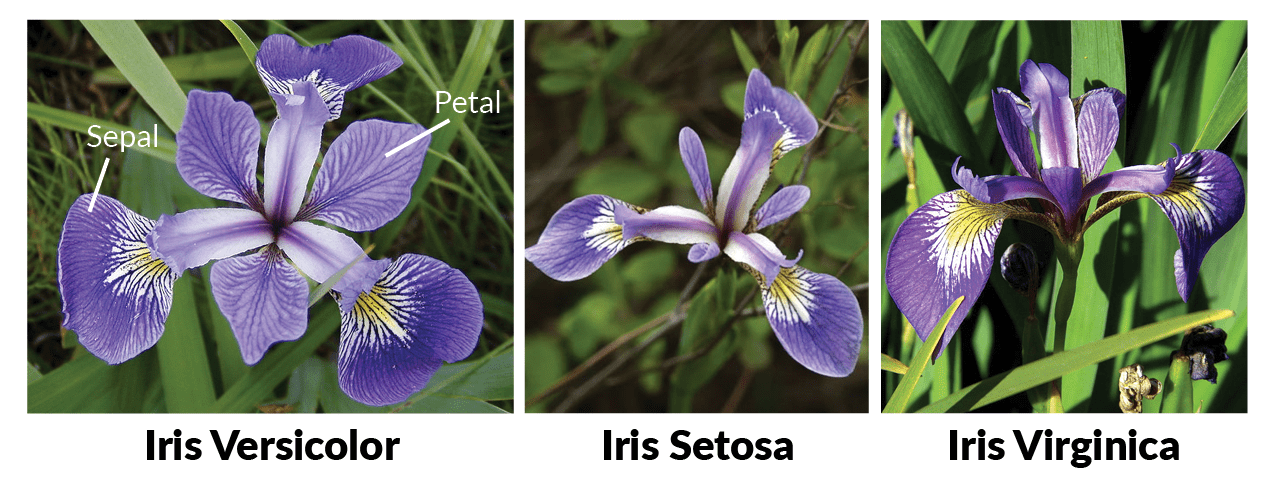

In [15]:
from IPython.display import Image
from IPython.core.display import HTML
# show image of each class
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABPsAAAHdCAMAAABc94yJAAAC61BMVEX///8THRAmHxMXFA0QGQ4WIhIgGxEBAQEaJxQbGA8oJBUPEQ0yKxxRbjMkLxctJxghKRUxQBshIRQpNRk9UyZMaTEtOxo6SR8zRh5NYix8Z61vWqZFZTBDWCgJCgk3TiNHXisbHxJUdjZiTqBSZi4eLxcsLRdATSI5QRyCbbGUgr1bezcxNBpMWShzY6s1MCJTcEiFdbY2Ohs6Wis+YS6Ev0SiksaNfrpHUSRacjNsUqJkgDmYicGLeLd4XqhXdFOejcMjOBptiTo8NycoQh5DPy+nl8hfRZsyVChNaT8uSyOKqUxaai99sF2EvFKrncxVPZdLdDdXgz5EbTRmV6W1q9NDRSBRfTp3qVZ4kDyVsEpjdTRBPCFci0DLxOHEvN1jlECSqndVSZxonEKDXabX1uiNpm1+r0R5uUNIOZUuLHCQxUuEumO6tdg/Lxx5cbKtptGchb5XXis+MYozL361oM1MSire3eyPbrArJF3RzeXBsNVufzdTVTSgm8oXETlvrEOMY6lDL3ojIyRPMYtNRjYgGkvz8fWWd7XHxsJDQkVAKGh0okJFWj8VEyR9UaBvnVdlekiXk8WjvUr5+fuMiL9vRZp+l0/r5PAwMzvh4tyHioecsX6oib+Fmz7Oz8ihfLdTU0pNYFJzh01QRYlTPSPSttdmklJmYGhgYU9jVZGyk8NgTyaWrmy9usJac2SFnl5kNpCssqOSxmdhYzw2HlBsgFzfyuLR09wnEg/Hpc17dZktGTWXla1tb1jExtSmn7Tt7ep6i2NWMnM7QFxmUT2nnJpMTm2Sh5uvrMBHJDh+ck2Cm26ltI14enlpbYVqRneEg6pcRVm8tK5zYUqThm9aX324zkTb3MyWoJNyXy15W4ZoaZ5+bmtRKlLY1FeilYA5Gh2djEbCzaeOb43i2KKJdjWOfFbGv2Wfb6n8+/C+tIi1oWPFtkXXw4OvnUDk3Xr68H3177z06V368J/FlcP699WCP5K0gLXbsn+PAARPfklEQVR42uy9aWzc55XuebmqWNzX4r6zikuRFBebm0mpuEQSRbm5DReTnOHSoCxDQ0F0INgAGeuarYzjod2kPW7CCaFAYgxFgdkmYoEDIXcEXI4NAzEVI4DbnQbSwGQCJMZt3O4PA8zneZ5z3vdfVZSTeOweYC5Qb5HFYrFYrCpW/eo55zznvP/hP0RWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZEVWZD25fvz3f//3P5APfP5A1o/D1g/CFs/48Q+/2cJv/liu3H79musHJ25D6PrN/831mx/+8Dc//M//+eQVn7wwzvrNb37zQ3zyK46+6kJfa/1YD6E3MXiwH/gjcr9/c/LuBG8Hb4O5HT8OuZV2BX/41XdG7kbwAZYr/WHo9/Z3fxPyH/+f/j9b/+XPfvz/Yf0Xe/j3vz3/S4Ql/62t10+FrOKYhHi315uZk56bnp6bi6OczMw0V1lCTExiYkxMWVpKZmZKSuaDhd3lfS7neAGH5WV8hKyFhQX7dWFhF4eZnEz8vqycnPQcXDkWjuVrTr9+pssfzi3hX8/hRVNS0nALsGKwEnE7uGJiEnhWRkbC6r/+4z++/fZzzz13+/b+7z+I28j0p1Sne3weT7U/MyWjLCoqISGBvxkTG1XmyszNKk2u296711WXPDaWPVbYUpKTUhabyJ/LFeIaXVw4xd+KjTV/LzGWF8jISEvBcu5DvxxyApkBPSfF3t60KnxkphfNTO/sHBwfbfsyc3JLsrJKzF3KTPdVdu3t7O1t11Xm5WXnFeaVZnly0vj38QjLo4HLpXuK6vOys/NKi3z4R+B6ccUZduFyuC+Vldkd28cHWHicD3amb9++ffEiv5H/y0FvqT6KKVX3g//w36yurtZjtRdhteuql4UfrK7zUM/j1Qe61tdv3LgxO7uSlJSa6nZ7/c3VEz5cuBK3PK++SH41r7JyZmamq2t7Gx/bPO4KftTx7K6Zjsq8do/f685wpyY1Nvb1zeLgrAEeNSbh+qO53Lrw91JTU5Nw8cZG/vXgckdnZMTLSjAr9HQMv492JyWtrDQmuaPlmrC8E6trvWtrXV1dvb29070dnoyY0MXryMjAhb1eP1ezH3/Z7/cmYXm9PLO5urp6YmLixvqd+48e3V/v8+KyuGV4nnn7Pn70f4S+qo51HR0d42DWIdbR8v6HsnY/5H/o+PDR3Ttcr9t15+6ZwyP5Vbn4IX7v+OTCVZ05c/++/uadO3fv3OXJu7LOHB4v61/4cH8Z13F0zL+4fHx4Ri9kfuWuPeVcx527zlWdeby7u4+X7GO8aHf3dz/c3X38GMf4Fj/Y3cctX1jYf4zzcC5/sL//+PUn1x3elUNzz8+cuRtyJ83PeTtwkXu8p7g/Z87obbQ38a75jl/v3r3Px8XeNbuufnj16sLV5d//O7CvuDgxJiED/3xBkC68ctKEAzGxMWUuvPYz01Jytnf15SVs4/G+BZ28CrmOl49x1rEDPzyMy3k5mekGd9XVitYcIV9AGNKfk6nwc7BLjJB8UVFRMTFRuAUxCkA+UxOEVO6Y1X/98h/fJvouXtx5vLAB+GXmpDRj4XmbkYELAX9y66OiQBYAJbuud2/v3nb5SHZh6/mS3My0KCCO116Gq4wTApa55BfNqyLWkNGVliZ0y8nUW82bHwClcuQNITPFos8lt5p0KgX8DpaPj07jjgN+Jbk5yr4cT33HHtd2cl42IVJa5MlJcfFPpOhDT/zl+oqUfVkeIRjpB+xFG/allxTlVSZv7+HFwEf9YGcH6Lu9c/HgovnnHMxkEX05gTD2/ZjkA+98E74JD5ZvgvC7gUM9PsE9fgB+DwC/jx98/PH6+zduvDe7spKUqlzyNlf72g386gnPImXf9gyZd+JQJwecmukYqqz3VQN+QB/IJ+gj/VZIwQHQr5HsM+iLdqe6LecEfWBf0kZSqh6ISGEfjyzwEh7KISaUfY241UpRd+rGhrd6dQbw65rpWiP7ZnxpCfpcCmdfKjiX5LcHOe0F/PzNzQSfr319HeR79Pn9W308FzcNl/Hfuh/OvpGRyUl8joyNjWCN8cuF1pbz51vL5y8/9dzFi5e5NjfrStOromL53lpcXMwXYKKr//xY+eTk5Fhha0tr6xh/c3JydHRudJJrFCdHypNbBwOBqipXXFycK47v1DzhcqXhrKr+1tGlm5dvPo9rXypvyT0/Njm/efPm0ujYoFw+Li4qzqyo0MUrMD9zxaUs35tfWro3dWnq0tbU1NTS5uZVnMSpeR5tbt68zJOXrl66NLWEz6353uWoUydXcSxuDO4w7kFry2B/lSs2sTgUNJATUXG4REvrWGvr+f5AVaA/N+CKc5ZIENxIPcHrwl1ZunnzeV03ZS3dXFpamp/7+bdmXzEfewo//Pf9fAVWp8tLJxMvyoQEAiDOxRc/+Jd+tLuwvK9KTwEI4WfgZ8in0FtecNgH+O205+CtE2+fuO5qD17Q6en96ar4VPQFoKFycqzwIflEgkUp9BRhir4ogR+e+xvFE19C+d1+my/86d1/ej0uM83rTvPKcrsziD8KOLIvzkVilGaXd/Xu3dvrKsfz63wumBOEXBRRCUiaJX9Gv3UJ9zNVqnL129uZQ9kXSEkJpAidKFJdLoWfJ69r5+Dg+PjwQi7Z58nVOwZdnVW5JuzrAEIKlX0Q2Hx8c9L1TSGQkw72kTBkX65ln9wlXnlKjicrLzl5+wi674jSD7IPwu8i/uCyvC0d7CSX6P+vKkz3AXx4EeP/gLeHZtUyNyZu2AWV9/4N0g/go+p78P66gz6KK7w1NoOW4B0OpSIccXqoY8agb3Rb5J9BXxfQhw+oPwi/+vaJar+Ivr6BWQM++WJlX6qj+kTcpbo3DPkahXypGzzeSJWHgO8AFn7xgF5CPNAXI9xTIUjdhyvltW240zZwndX1M2trZB/QB/a1g30SR9g30/iMaEFfklfBlyRiD2+hKvpmAT6s9Qdg30/v37nVh5/4+5oBP//Anc8//4cw9pUr+8C9kcmxsULCr1DgV7d5+bIh3+ZmV2GOK1bYp2AojgoMFpZPjtaVAxgtrYUCTbJvFOyTEyRgIVARqCKsgD6HFVVVZN/5kbnNyzcvg32X55JLcs4XCvs250bOh4HFws8QENRzGS7ia2D5YH5+amvqKkh36dKlLRympp7H5zxxCBTe3NxcIgyvTuHLJcBnfyOUenKcSPYNAm2414P9AVdUCPrAvuLE2NgoV2AQP8cFgL6qQG6/3kRXEH0O+6oCg60jc4K+m3ow8CP7Jh//e8S8pxId+KU3E37p8tpJy6Dyg+4rc+Hlx4PveBdI29+/6MS5+G7BCXePlX5UfgvOgl5e46uOr7vq3GpPLuFnAl7qJwd6ARVXmSbWhW4DnGL5tI6S+DUR3xjd5y7L2Ej0Qvkh6L1I+i3//EyUl8LIneJN8XqBwYwyI1v5OEJW5bYUJpfXMeTcBvyyStIz08piQhQejmKJOxdlZUaZ4V5aiiGfgk8lK1ktEW8KwISnnsDaYJP/sbRMX2Uv4Xd0eMFjdZ/cx3Rf3kyvRL0d2SAfpB0YnCJEy3HACo1aSsCUZpV4DPv4F9zCVUCSQW/H3oHoPqi+6elNyj78PZXkB3t5HtHtCMDvhui+GxMTs7Pykk7RV/XsLP8pNyYGhIDvk3/r768/IP0+XmfIy4jXoA96yuuvhu5brVyl8JOAGewD/EyQ6yg+VX0zOJqpq5Ogt9430dxMzs2K7lsR+BF/gJ+VfarSVN1Z0dfYuCG6T+JeN1VftNIvWtj3Jv+/D+Ot8nsoHAP7Vqj7Uk38jGC7uX2oy7AP8Jup9yao6ktU9sXzWZPqFd3HQ1IqxN7ERDO1n4g+n493lrLvnyH7Bhr9zX28N82Nfbc+f/TxP4e+qkSjjYjyI/8KW7OTk7MJv6zCOQs/4K83uz+O7IsV3Vd8KrEKL3GovMmRwhZSgewDCkfr5upE9tUBfuUjQdkX5xyBDuRhfytYd1nQtzla2B8oUd23OT/ZEnCFkNIRfhZ+IVyMChwf3FvaukfiAX5XL13dvKQUXDLsm7oJ6OH0VYjAZ5fnN3svvhuu+ZR9KWRfC4BPqMWGoY+yLzauavC8UX0Udrn9Vc5dcthnTgGSY4I+6r4g+0T3zX179qnmxtMAT+9UCj/IM3mJZ0rUy8ARRICwTuNrtH2B6ENcpYHvgTBOVB8+GOuCeseCPHw9dqLemXaKjmrCL9fjsM8k/ETtZKp8yhTZpyGrCT+jEHgmCAe5ogR+ZbhlCYl+KL/nbsuaPvj5B7FJUEaqjTRHZmKbqCiXC+zLKswuB/yInq7kFga9ZTE2rSeZvVhJDkrkq/rN5PiER7lB1Ue5xwMW0EfWSaowije0TN+ucrI6eiXld1hZ4tN8n9Cv2lc6BOF3tLc3I6+JlpISyeiRr0JWEYeerNI8CYiRvtQfp3g1nAbYMxn0VtYh5IXw2znY2ZueJvoQ8uJ/sov/yg5CXsO+qjD2AWV+AU0Gk1tJfsScswNYNwZU+r1/4/319Y/lsM6I16DvoaDPBr3CPo2eT8DPArCOH1B+IB+EX9fMUB6FX7OoPqCP5IMGXDEpP8q+VCv5NKnnNrk+BrxJgkMholsSnm6Dv3gT5Cbw5j000a8wWnUfA2QIP+o+f/vQjMn3TU9Pr636E4R5JyLepBD0Vbev1k/4Ge/i7UHC+/r1B4h4H91ZH+jjeQMTs9W4Px9//vlJ9lGqjcgqL88eg4TLpvDDSu510He7Nzk3zsg+efnFMbKbm+uaFNk31mpC3i5H9o1O1k0Wtgwa2SegMDIphedVDY7NbYrqA+5GzldVDRZKoLi5NNoqZHEFhV9UbFjMG+dy2R+BfVNbS1uIcLe2pjavTl3apMgD++Z5DNV3c3NKTl69tLl56erc/PzFN8LJV6wxb2DwPNbgYKAK9/LUSfZFuRjxKvriXIH03IBIWZej+6zsq3IF+lsA8RMBrxPyjnwr9hWHZfzkvR16IDTjp9pJElJV8iJEvWNB0koH+xf3JdIN0X3UgQx3Fxb+SZDoCL+DVbDPBz2ZC/rZvBYCXwa/KnZMki/FyxMqohiIJlj4vZlg3q1V+fGGvXmq+su3FX5QPpv/ciZ2Q+oSkEgpeBtX1Roj6EbQC92HN+HyOtJvb+90YUkmLsB3/2IDP31TihJ8Qcs51EuX+kxIvJvJCD0zILDW4BwLzylG2PKGhcxfTlHHtIFfUVaWJz1HtSNSeUNde9MS9eaVQvaXeNKDZSB5WHAil+zThJ9lH/9UioWkpyivC4880987070MeS8SgyYVuzNUooWOE7pvQOoW0cIH4gUZN4DvvYH3ZuX4xo1bt9ZvgXpE3/tW9YGU8WQKfoXVDrBvNS9vleiTdGE9ol6DvDkCcNTh34yk/BD0IuEH4VddPUvVxwXyNa40Nwr8VrSYEUzyheT6oPjMOTwhos+dIZGxln2EfcK7h6TfQy18gH2Nhn26EKxPrILPXUj3TQv7msuQ3fZ6y2Ks7HML+1IFtUTfRP3QzGq7ZAYmBPF5eZWMeBHwCvogkKGh+xjxfn7rUeiram50bm7OoR9SXq2thYVk3/mSlvIlR/hN15XEJTrsQ8SLGBW/OToyJtk+CZVxxqjGuqMCv/LCkoBln8seVPZV9bdMLgkgLl8m7RACq+5D0MuEX7jyiyL9vkL3xVUdL2+BetR9W5R3l27i6Caj201+K7pvS5XgFNi3BPbd/8p8X6B/EAsBbViyz7JPZJ/m+nj7c9MDLss86lib7kM8FZC3BL1novqeD4Hf/OjIP31j9vFRLw65VQq/JCi/Zod9aUH2QfnhpedKQb1DlN/yRcn5HVjeheBP9N6xHBR+j/f3Vtt9yF5VO/KpX6VUv6idfpyRKQl9rRsE4Zcg8SjFnrxR6zs2olKBckLixJdfvv3cbUS9myDAz3+VmAb2Gfx5GbJLtSQqATef7EseSYbyA/5Av8MLWZkZEklLwlkWHgNWhSXBZ/KP9n3AZialvMtF9GmkC0nKBfAlMnEo72CuNCn2ot5xvF1ZVOQzpe30XE9R5cwag15oz9LWliLE3jkS6Ns/yC+4lOq+LJ9Hih2ZmZZ+kMcIeouG9phOxLXvQMtA9h1A9UnIi/ektVKb7UtzhbIvGMFGM6pcWcGr970BZuBmVfvden/91vu3KPpuAX2CSkajJAt+I0nZJ/AD+yakANCeV9kxowVeR/fZbF8H3mZAwQ5WOyD8ZqsHBhh0I1YU+vU1zvaRcJZ6wh172pZ45ZMITBXyuYNAcxN+EuSSzqz2Pow/wb7oDVwOzylvNVjWtUb2gX5rQ81lGd721XZ/mUWfvBfI3xX04eJra0PtmhNtR3FnKHlo6MH9+/cp+iAFbzAfAPgh4v384/c+D2PfnNJvclLZV2jZB4FvUn6bOEx3FaVR98XKc08j3rn5Ucg+sK8wu1CzfYRoOQQf0351k2Mt/TbiNaxyKfpwLmWfqL6bm6PZg1VxVSWa77t8UxJ+DvpcYcWO2HDd5wL7oPg2yb0tkXc3L01dZvS7ReYBfUDg0hbRd2lzC0Sc6719+BW6T+LwfklNhiX7JLzEq0SzfeehCnG7qnJy06s0bXlC9xF9g62Tc8E6R2jIO4+Qd+wbs09f7iG3KybBKL+wjJ8UGrTWyRdTWVQK6h0Cv/0DCX4PTHUjrM5rUn36A4HfmrBPPC4a7abngnjia0l3/hioxde+Az8JeuE3wXP8zTLiDzqQ7/aGfYnxp2b/9W1UOwC+Tcisx2di08qi0spMUYBhL35LahhgXxHYh0AEAEzuoPbbfiNTdR9TLvKWJBYal9pNDPRw63JV7vUHizEhFpyoKImVo6QaLbKR4S/+hynVeWs7UuwF/LJyDfxyUafosBk/wK1F4mFbCZFg2gi7SlQ7oBh9kvBTA41JPmZmVmeRfXyoD/aEfQK/fSP7ZrJsxFsVpvsUfdGCPtZChXkQfIhEcXQDwg/0o/TD8Xuq+rQIQbywSgvF066eGMo+JjDgeskbmjHQE+EXrPPOSODb1aXs80D4gXwTzPhB9MFFQv6ZqFbRZ+0sSPBJxIvqBisclH7EXTREX5ohXwaTc94y9bjITXwI8skNdZPqNLlI0Cu/5m6uZ00GMS9KHb1rQ+lpzatr0zPtbqkLx2fYiFtdLX6oxDUQ0id3sH51qANrqAPsg7sFP66+sS7J0Ikb94G+Wyv3Q19V4BUC1a5RpumkzltI5YdX+vnzJSWFXQZ+SPiVVsVKsYNPPBciu9H5+Xkj+wrHHPQFq7zIBOYSfS7LMEmtVCljAi3M9lH2bc6XtwAlVabWAUxMtgr7wnQfqBcXUui1UXTV8gLk3daSFnenNN/3/NRV6L5LrPM+yxh4i+i7RAKCfdNHT8i+4sQoq0ZdUbHFp55gX5SUQloEfQx50zPl9pn6dQj7ArbOcfME+my6r/Cbsu+OvuRDPX4CPzyr8Ian8JNqB3NmooUY4MXh275jCz8KvwPSbz+UfYZ3C8eqBvcVfsur8FXkGnz0axSZY1wthIv4CcsyxOqRI+UOKThYk55EugllJssD9omhC0+eatY7bk9PX5ye3tn7/RuxKWrX08pAmilagN2ZHrIPB7j7CguTO+r2jg7v9qUhkE60mk/SdWlScjV+m1yT5rPYk3q0gM8hn6RtJFUYK0Vlhsz857lSPENrrL0CfnlUd5Z9pckdyPgRfslgX5GFH7GXIpSjw8/HOKtUhZ9UVFhoou4W0Zme1bGjevt4z+i+i1rlhezbq2RlRWowJ3QfjB/R8YYPrHTMzr4HuaeBKF7Kt+SwLseq+oz3JFrQR1YyAlSTYPsE7USURVrqBfB61ecXYnUB+uqg+xDzkn3Vsx6IPyg/om/Fv2IzekkWfcbLkiSyT77TModUOZjqS1PzH8NY/O3mNCT9hHzRD6Pj8cklNkKgrzFJL8jsZoa/fXVops7qvkpP9dDa7dt/GGqmXwa/KUlBk2r0NjM5OC3s8yHXh18k+7a3Hz1YH2AGEAEvvY+A37rIvifYxyXwY613hFFvq7APuf/sXsLv5uXLt3uzM+Fx4ZMHrAich7yZn2elo1XQZwwuEunqiS5GvFU2MDTww39Y0FfVPwaDy/O44pvzdYX9pNigwz5xubhCKsMnPC4hWKw6XkC0K7UOwu5Z5vu0qrsk7CMPN5ck5kUycHlqrrf3KPGJoJcJPd40RK6JJyJeE/KCfaL6eEMz063sc3Sf3EYWQQb5lrAUpvqs8Fu6iXRfy7+f7ktU+CE33Cx2lGa8hEzOTNmXloa7A0Su7+5qxeMipN/BsnX2LevJYxWBRvzZE48f77VLBSXdBo2ZgZCIUnQUo9UUv2T8pd4hJQ+pV0hB7k0cytTYZQytEISJxRP/+o+S8UMqZ+fg95mxacabomUPsQUL++Bxoe5j8a0FJ8vLtw8PH0H68b1X8AViGj+L2qxzc8MC3gA/MqXMIeRjccNYtBKNWyxR8n1lzCfH4i/6kPI7YLW3oxTl3EzLvmxRnVgUfsI+Rv45mTaxJ+wrMuzLyuJbEGsqVY7sy6wu6pJwemHB6j5k+y46Ia9clzgfvpp9LGn5VwA8FHjfM/CbGBi4EbJmQ9GnddeVvhUk+W+0G/TNwg0CErD4AfqxqLG9PdfrVHz1C8odNPjloWhT3UfpVz3bPEvzMC0vK35Fn1mNQQnYyG8o+ZIMkTTXB/Z5YVUm07yg7oQ/BSWPaLcFtNtiGuhbaTTlEfxmfIZ3or6SJZk1jXnrV9dYHZuZwBMuHhdwR1tLtdtb3Q7y4YeIeRHR+4R9yWAfyhw3mhn1o+jx4MEq2Lcusm82nH11hF8XQ1TUZUey8V5bKKaVFkn+t5RvEn2Ieqc7cqOkzpuYGMWIF+gD+wSUYydknzCwrjAriD5TGqgyoaUrAIPLTZF9S6PZJUQJguA6jXlvzo2drwoXfifZFxeMecG+pXtbQjlEu5cuk32Xn52S6i4sLqx4LLHUcfUqz5jf6j04oewEJLGKsKgTyb5TElrFxqHsOEjjH+8FpE5OlcbuVU7IK2q0iiXeyRD0PR/M92m6b+z8N9Z9Js0V1KpqpsOTCexjsVfjUFFeZZpnR8War/SM+4+VfcSfZR95t38QdPeZnJ8Ne+EF78pKz1Xyad7e5rhMS0Sa+LYQUyAnKHUPiDcT24odi+Y+OFto7SpjYgfljzfJv1MTaO+QsBduj+XHKSjWl1mrnlri0nic4yP7ksvlnbioqLQwOzu57vDwg9fTSNYo6+OTcDfXWenquOsXLw7Rx9RbVZp2gCDMVW9qMYUf0n50ycRJ2YPBL+sdcLogMt3roI0PeTqwr6SI8NvbEeHHlF5JrvTSSF5PTSyZ6dWS8CMZ1R8jkpBGLr2FuZV7kmrAA7zX22XMfZruW97pyBJlWiW3Mox9WuigtBeDC7Ue6Ke67z16/YA/xL4DUpBw0EdJ9DvKPhF+N5j7Z81+1p/K1BijYCTEOjqUfr1W90nBo46SKRnoQ74DoYSs5mYUm5NIv6QQ9IkGdL6ntWWD2bcNI/tY2E0j+uhEET1XXS+VWHe0YZ9hJBHWSAsNA/YNXpAhu7vZh0yDlnmn12aGQLfpP0z/od0bj6dcsJ8E7lDEuyyb357uqkSJA3cU0ExOTp7ZRj8HBCt0oPS8kH0P4Hj5eGAlKYx9tCPPzZlaLyCWTNMK2EeLH9L/LRL13kTCr84TJ+xD+gsJfcibpXkx9z3ha64T9GW39AdVnwaHRB/ZR4MLfc20Nc+PZAXiLPsYLRqXSwjinmRfUPctLzDkXRL0AW4S4166TH/LlJibhX1a69hCRAxcH7hOPSn86F4W8hUHq6kmrURzHwP1flOzgc4IqI/vZLoPdQ5J9j1/8yT5lH1zsPz86JuzT+nn0FqjNzGHIpxJp/BT/YUYM01STjADk94x7kMIPw2xxOrCZipb96DuO7bsW1AAkn0wulTmOi9xV4aagPlKzhQV5WJUw5iXF9KaL+11Lmb8NBMnFhLCj4yUMp+UPmJOPfhS4NcL+O3t7gJ7CSyRxOJYMn9uQUpOSSvehsvhLCkqzWrBm3FWVlHpELTf3T5xJAuJTRTucVRfbjDJFzCar0pLuxqMK/pE+EkAjH+tVtKkmwT1DtZ6j4/2KlnOzSH6wL685BmxuezVZTOll2tkpjwQln2o9KrsA/uIMikqV5m3DA/cfUw1LCzv0LJ2ewfroqny7pUa9FH4hbHPyL54E/FOQOuBeJKCEw1I7E28x29XmleSoLBSo1OjTR5sRcuyIvzaxa80S2EF24s0eyA52UFhJczrVd2HYgcUU3JypXh1gL5mRV9zc5LAzxyL4gsjn8g+/l02dGyYbo6MNCT7vAo/WNeZwhtanWjmSYLvd3IgJqV9RLwz4KebZENCr9lXCTiLQp5GexuFHQu+ln0aLbMoglSfOKZ6Z3CXKpV9uBdk3w3J/j2Y+XxG4feAsq/vBPtGyKyuuVEtdsDfYlJ4hB/YV5I9LzEv3M1ZrliT+Zda5hJDXjG4hOg+K/vmJmHtc1o5DPkUff1a6bhJbx+Te/1q+hsstLpvXhN+IfCL+lMeF9exYZ+UdZHnk2IvT2pjhwBwSWodlzbxAWDvv/sk+8S/HHsSfTw/VtnHWy53xSUhr5F91t8nNzCuComAkdGQOodYXJ4PSfeNtPR/U/a9nmhbaopNZ4cUnRIh/PjaaE4X4adeuwRt6AWIlH0JfUe7y8HW3hDl5xhdQthnLc6PD4rScxV1RpTxhe7XwgZ1Wobm+wz70GGbZuCnHnxN9An8iMkE9pxEUbQV76DeMa1r7/ECZF9GYllsjF6cfyQVaEuHvW+EhQ5pGqKzDqBD8m0bgW+urW54BHwlDEPlIyfdmhClEhEQ/vDfU4Z/oiSrTa6wmEJPU8dxEvICvVFRael5TPkdLx9tlxrnXgmIK8KPGb+u5Gy6m6X+y/Y1dTnjYso+ZgOFfYGAwk8q7biaorUdYy4y7DvYsbLvoCuLVsIULXWE+fsa1d/Cf+8K2QfysfD6nrJv4j2ULpWD8D8TfZr/l/zbSmPfL1d+uTJArSjkm5htpi6UyphoP3TZdcx0hNR66zrqIPnYniLoY/4Y9GNPiUDPq5jzWiefzf3Jkj4OrbymJhlPM1Wf07XjTgP7ZmbqBX7RoF5IpSSJ/SIDgJJhH+t31e2Gfc8J9SD7qPtW/fEZtlgi6LOq7zbF4dBQZZGvPW8I+EbIe//OQPNE/YPttU+3P50R7cds38DKV7BvdFSPgD7pHSfRRPkNlgyeL6cFefPy7S4UO4iIKEnoz28umUqHaemgfBT2afpwxMg+V7DAKxXe/gDOZ6WDsk8MLcYoMmjrvEz49Vc9Uex4kn28drIPyT0RfltsaJti/xrP4zHFH5o5VPfhG7Bv+tLrp75iFVvjYpiLDuxjTsjl5PZY5TVGF8s+uaG4XS4pfZ+MeENrHQh5q74d+xz6MeRleI6pBgkKPxQ80v1SfAX73HhusseNbjhC5dbCrol6l6Xia9kXkv1bsEMNFkzUu7u7LY4N4kxaZRNop4d7nhyL+Qr2UbSBfsaBzL4L0iw+YyOaka8tg4B9pw4g/PiE3kE2+/FRYhkO0qyRIFUPEgW+ELj7Rk7f/eDu3Te4WvpB8xy4hGf2Ds+84TFxLrDnKVHVl+vMXAgpRaSZhARLZbFv6sJjqP1w8mQqE9kXy3eSGMCv0hZ7sxgvw71C+GUnd3SpzyW7FLqPUTamMORqyk/SjUj4lVL3leAG5cBOww/1V+JaciunDw7EVi6lDiQVIftsyFuZnikJQhF+YXVeCXklISaeXZLPZvvIPpwhGERMuhIESdLvVPSt/LJvZWBFAmVUAIR92o3BjlePr72I/W1YdVyIdus02tWsJWVfOp9RZN+K32sZ53UqGwZ9jZrqE7dLkpF9HINA8jHiTRPZx6jXzz61IYEfbyZu5e/k0mydo3Onr4/iEexjjO+fRUVG2SdPFLCN/AP7UCxByk/cMRkpmHkwbZzya6hwDOX5fEWYGpEtIe+t2er2B9t7e59+ui3K73PJ9kFfPsm+OlFtk1LmBcvYqtHSgh5yiXrr2Hq2ic6OAIsdKHq28DW+OT9Xl9xqWzo04pViMU+gojkYcDSfrfAGmO6TSgdCXoHD/EhLlYlebZ0Xfj9x+IV2wanBTyu9YbZn19aCdO8K+zalrQ0jA1jukG6OJWn2YCevGPxwwd6li3dPfc2lRgrWQVxarqZOCJDdVZZ9UabWISGvOvtE9z11wtqsVd7WQdc3Zp8k+G3cWyynnc5eprEZ9+ZoCSIhg0mURoxHIfvYRxn9YNfAb9lONlgIM7rYhjf9Vo0uu7sPcvxaOo7VfqIMN5/x7ngxIDOTJ3VeYZ+iD6yRlF+iLXgkINmXseE2wo8Zt5jihOKyL2l0QdS72du78/szifznGiO0lAdl+knh6btf/Poa1/j44uJvFz95+RUMeAH8EPieLiqxC2FpsM4RRJ+Wdp1iGcD3yvd1vfLK91958032w9Ezr8VfNe3HRqV4Kqel2LvXkZuSRuHny2KuMVnaS1DuKJU6rxV+0tdH+gv7WAhhV5u6qFX1kX6eGV4lH9wDJu8Z8poqL/rZiozsg+hLc4XpvpBKh2ln45pVsWe/Mtz1K3sIFHIPZVN2YQz8clbgN6ENOoyglaUy48XHNrzkjuC6UMlhDaVaq2Ynjwl4KSrFRqfcs81rptoROrlFLgXMpckH/JoMeUX3pdB/DA+ehV8Sy7qmXEz2DfS9N6DVjgyiLwnFW4SudWDf2+KIYsAL9g35hXl4OoOBGSme1TVVfQh5uxDoDtX72ktxLyop++Bm9q3O7P3xj2Df2oyg7/Nb7+GRaQ7P950eNXJN4SchbKsoP035ebK7NqXYkZweFystDhLxhsi+EZF9JuQVCdlV3upk+7RtSFSfsI89HSPz0u21NFo46LAPKUTVfSDi+UC4u9kovpBhBqaH7FDZN0/2SWw7dZWL2EPNY1M8fyz5osy7tTl1sNk7ffHM10WfMbjohAIbZsM3wZKcBMGmm8OEvKYxJTTitR6XJU33tQSivjn7ih3hZ0owok/V4qzKr9mfk4n2CCRMGjlww0v28ed8xhxitI0UO8TqcqD4W7AzDcTqshzEobZ3PD7yeakjjZDjXxJPK9n3JoJZPAPTbK1DJzalZbhYpnUkHjs8ZJCHwC/KJN0Si5u/fFvYp2FvVmxccPCLiXv7Pvrit9euvfVO09Nna9veaWt7Bwy88vL3N9KL8NzegwmPGssj4PPkWu6l5wTRZ+crREVR7L3ywiIY2tCAo8XF8fErLwCBb7LQIZUO2ygSW5bpm9ljIeLocD2HkbcKutJsY3Cuqywq0fJ3Lg1A/TnWCuPJQj3G6D5T6LD25vR6DaRR5d2RAC6EfTszPlyBXj6t6gT7HG/fSrOib0Dhp8a7CRV9iElXUlfAPQo+oC9J4Tf7SxlBsOJAs9nvNp2+8druBvhBWScL/5KHkittscZHbxNi3maLPq9XR0uRf/D5JYWyz1Z7vRveVEk5uqXUwbcvSz6hn5fx6Rqycix4pDqtb0lSj6buG5BmOUrTpL4kt9cHD3ad6D5JDU8z5wfdl6DsY+XM60HAC+79nyL7EK8nY/ZWO+bpVA4Bffdv+Xz1lduf/vGPR5+CfjOfP/r00ccc9TDbF9bXMTp6xsKPKT8LvxaRfiz15paI0QWFXhQ7YuPU3oIRAcj2jbXYIu+oNHlooYOFkzGhl8M+FX1W9gW0p0PmFlTZ+QaDhcI+0kJbeoOZQmPwC+o+h31xh8syv2VpU1Qes3oo6XK0wfyUjXnZ23uJlj82eoCSh/9vdF9srHiYndtSJelKDd9PsO98mLMvXPjR2syQN/ZbsK/YEX42QpfklVjlU2WSBasdfOqlNg6829eI8QBUU/SDJiQ0H+/aoFfnGsiwvgUz2+rYyfdZ1bcgtd49v2mz1dg5HoISz3uaTDc2NqIzkFgE+6oxZkDRJxWRDZRA7CwDwz6ln3idddIe6h3PsdrRO73U23vwODOqzPyGwq8sbePdL669A941dX+n7Z232t5qarrW1NZ2bfGjd3MJP0xMgwTD7ACPrXNQhRnRF9BWE6IP4fqbr7zyMsBX+52ztWefvl5be/16bffZ7zzd8CLw96Y+sUyHnPg8M4uo0g6Wjx69kcJBVcjklbay3GEMzqWWfbmaW8wMsk/cf2x6S2HuTopD/Mwdmj5Q3XdA9G1a9tFsiaIKQC0V4aqT+T6HfaGyT7BH74lB3wqqsF7AD/hbUfhJmeOXs0I+fL+ClD8OSAqmakMFWyOYU6CgzSMrmOWr5CiGIpV8LHGkS8xL8ln0gVRe8bqskK4a7VrVZ+Ao5GOw63aI5xx7m+s5mGqmsr3ab7mnKrJvQDr1aPGTum/fQKOYXJI7WOv4Nwa9039gqmANQw3ELcWnUxp15LSg7w/Ta12s0RR5lH0q+9DCguaOzz999Me97U+3H/3zo8/hb6FT+9FX+Ps4hgAhqxiqlH062ITK7/wIUn5a7IiyWS02p/JSROXIpDG4jBrZN1feOlhl5JKgj1XRgJQ6bMhLIsxPFjojW1D+MP4+FEDY0usKWphdoewLb2o7XNja2WLrhlY2Ll9iUy/YJ6S7PE/by9WlLQl6JSMIaB8Xf132UQpESa4vKPvgn1ARK6NcopyG47hAa0gb71MnIl48XPMMeb8F+0yBUr3lwUliZgqaGCHgaMJzlbYBvJEas1+CGOjjMwbE4rxr8Ke6b9cRfgs610C/qgCUqYjrSFzHJ2g7hdRV8GRtTCXJAD+JeTnrBcQVW4NUe4GuDUkJJjj9vCeEH0mz8+Xt27DNUfr1Lj9Oi82wWhElkbKNV17+CVj3V/n5NU1P1zx9Nv+v2vKbrtXWPvPOtfFPXi/hXFNMWoT085R4wqx9/VaLmX7aqo3vQ+Y1PfNMU3fNSy/14KOmrQmnm2qffvrste++8PLLb7LIi9tjZHWMC/WOaXH5bfuYdxSoablDO9uKpJIrAtMZlYW8YwkvBtUk5mYORXWZyreFKau8GqOxzCuTDJbZz6blYoLvRL7PtPIK+yaCC+ADzEi+aso+pvv8BN+KhrrSdYuZByt9EkUm6SRPXNrP62M/LfMKULSwLoqkzcszWb4iHyUf/53VDviEfG4Z1SJlFEGe3+T51NbHmXshcw10BSVfiqEfPMiw660Noe/Wa3OThCdurOg+9oygDMKybxItMRB+vXyw/o3sY613em3CzfQNP1HhHbIBL1VhHfRrXla1tNcMPXh0/8G6oG9oFbEudd+nn/7x0ceSARiYfRTu7zNLyx3lMsIPADyv8GOba25r3RLHWJVWxZmIV2VfqyP7Jie1LW6Uh7o5DN7IUYeeDXi1k03Rp/1samK2o/gc9j0f4m6O+wvFDrJvF928YN8m3XxTIvBocUbxd0r8zoyBlyQReJVFEGYGjxO/NvtkcF8o+8i8KoO+qhD2Qf6pW/uE7AsOsKKxuT8q8duw75RDPRv8GpdugjohKP38KZxSiydTo1cmGySolT4+Pm2dQ5mXHeW3b7zMpsV3IXSI87EOdoHD+fgGfrWszPpWkFps5LA1oA92rAxlH3SfGrdE6EiD7sYGA1+HZgmm1huv9ONt9//rc7d7f3/Qy8Ln3uOjWKElZKFMPnjl5YZrDU1tZ4G+mmeuPX224TvXKfzAsLam337yOubhAUVHh6dLNePHSkf48hCEfe9+9NEL421ttd01Nfk1+T01+QX5NT01NbjS/KaatrNnn34GYfTL339TWntlMgI8zim5ldrfcXghnSm/XOo59JigqRgmvy76nnXSgTbumrZfyQtqyJhuO9qqhH05UjtmpWNZJ/ft7Gyy1oFK7wH72aSahAtLpfck+1jpSAoGrhPV5oBz0HGxUo10Hw/knoweAPRuSN8bMEjHH54V7OYgJhHzxovPiLqP98uTpVjXVcRBDLKMrU/J5011h7aQYQieVjeswc+SkTxLs+jzypSV8CXsYz2WKb9UO/ZKhkEb3Qf2uaUhWMZY5VXWscghES3Q1wv3cnVGgo5ALUurZq6PP/w3krGrHJOnSkHuolKgb/vzB5B9NLsMYbLr548efXr46SOVfehsmz0R845uG4sfjiZ1iCmFH/o6WtDDCt3Xn4veNoxyqaQpmRa2JZjw6Gumv2XEyL65Oaeno6uu0Mo+Qz7QosqRfTA2zzuNu3YMqWUfJ/ppsSNY7XAFR/jFnSh2HO5ygsvWkthZbgJvN01hY2lJOj3wzdWbm+JxQTB8CZnBpa+YXvqn2BerjWpVwZA3ICFvIJR9ccq+wbH5myewFza6T0Leb8c+U31x5F+xVBQkUiT8kszzNYnPJ0xDZt++aEL2eWZkbkt7x+6+Y/TbXw7Or184lmBX4Hes9V6w8vHjT2Gq2ngzIcYxE7KKAvhB9m0o+6ATMr3iU7XsQ9jKn2YY+sWyQkz2xROIUXqTT60i6r2IQu/8NOTf40exMoIZ3HSVbbz58rW3Gpqa2p7JB7SeyT/7dP7Zs91NNTW1T9c2IRD+5HW0UXTM7B0dnblQJLUODxN/WIiCYbHLaqEb8I2PPvkJCHqtoaCnp+dv/7aHq7NHKJjfjSt+6Xp3be13nr62+N2XX35Xn2DisXal+IamDfxyaGQH1Vpo8uvq3dlR4ScT7dnIl6bwq871VHuEfcbkoq5nDXs9HTthw+pxp2VxiNVeHi/s0mG+XCGJ+B+4HYfLrOVetdKPHyoBm/GCbralX9PpgR63gVk7Z49dPwyRq1eEffJWJF6ldA/Z10L6FRXVYyo+410fRkRPVHv6qm24KwYVhV+S6e5IsvAz6LNs9KqrmeDjXFG/4s+v5GOxQ3BF+CHqdUb+CfukztuoxQ83Zx1I0DtDJwDRx0Gm+IS9L57wi7foc4q8kH3Z7EXhDFkOMbhzC3Na0b0yRFvf/QePiD4UeWf52DzBvrm5M/e2R2WmAfg1NmKqHefP61ynwf6cksJeFnr71d6CgJWVjkL19o04BhcIPx1jYCsdQfaFhLwuSfeJja8/OILZmePCmHfOFDtCdF/cycYOdWdts6eN7JOQ95KC77KMcBGrC9nHCS6XZLofJh5szi+kfP10X5Tt83VC3v4gxDXPF+ek+5aeEH0hTR2ofPdjEM63yfcZ4VecaAPHxBhbhohJkOiIT9gkL0Ped1nqoKc3PjqJI8FpbD18TOlnHc6Y6bfsZP8MAkG9XTPlZYEnEfU+cJdtlL1pJVy0WFFZpktCwg/saxbdZ97v5TUPeVfmwE+TeIyypAZC+KHTLSERVpMdY/Kbh/TbeZxVJtUJvCw33v2oqQ0q7xkINii22vynyT6ItWs8rm17pgnwq4f0Y9xbR7ex8I4ippUKppCr9MJPf/vOtYb8hp6egoK/7SnoPFeQ39PZ2VlQU9Dz1z3d3T2vIQB+6bWXrp99+q1riy9+9O67g4IsmWQqI12Q8jt8I5PlDlxzSzDq7cgrYROfTEssM1NM8RiYSq8MwMq0Q6wYNBetKfv2DzTkBfqmDPx2uopgEkxzyRgtyfeFzqx3S+8qHmgNeRV6Fn3VUvUA/Kod8A0I9sxMF1s6kI5HhMdgmTs+wYw9xuAxyD4fHzG76hmuA30+j3U0C/rcOpXAsK9RdZ8/yZnXl6qtZeIt3HAkohmpTPAZgoKDmMYsY5gR9fq9hn19jVb3mQhdW1kS4tOqlX2CS5ljuoZZBsq+sgwYZqYd9onsw5YB7UA3NkZ5cP9zZPvEv1hH9n2MYVaHn3KGqc6yOsG+ydHtuXtnSD4SDDPoBX1j0tE7KPCDH7kELr/p5BLTtHVzybbyOo28GvPWMebtGs02lQ4m+hzZJ2Evq7z9MttzSVrXhGFRQd3HGfZmdnP4LBdT6I1z8n1aZtheYMy7xTHNm8K9zUuIeJ8F5JYM+9DMtsSJziAfsn/oflvu+3pF3lPSvRfoD9F97O/QiJdtHnJz9CaBfQD686HZvvAxBlrl/ebsu2NbOmyga5ing02kouGm8Gv0qm1ggKUOLJ698h57Q91ez9EuCx5hym9fUn77y0G7s4a9YvFjrffYR4+ekQzqnuG79LuNSdR9qBh6qpsl5OVz3iv+wjKOTN8Qy4LMtGLMGy0OP53vLH1vxRla7phmuWP66Oe50gQBkLz77uI7+TUNtc801XTXdud31zx9vef62Zru/Kaz+Gxrevqtn4nyY5/t0REmDJQWlcrooUL0vWGxeJl85qc/Gb+WL1IP4OOhsxMULOjkOZ35LxVA/3XXvNbz2vX81842Xbu2+AlshC06SC9HR9gTfnCgiL+5iCa/Lo16NeOXorNrmNDL4ZRDUxCm8MsxBV4xPucO7Rndd2BerNLQhk07dm5Pd/h06GKZlQihui803Terg2SJvmoPBhNPtAeLH8JBTrE3CwSUgc9CJnHIcK14hX0sJaV52Yni4zsGFa0Kv3ZlXzDi9RpnnrgCpdIh01ySnNkF1p5M8nmD+T6Njr0roN6K7iaE6+KEcQl6mfKTqDfJiXlXGKKb91PJSTI77W/P65qmo3ltbaYLGyzNIOR1U/TFY6AVhHkQfZB9ZB9D3izk+LYxv+UW2cf6Ndh3//7n3LXjYwx70FlW4fk+qVNIpUKGWU0a2Wf6Ogz8cltQc64rbNEJTZR90srrTKrXkFd9zXN1hblV5t+p9Auot08lVBWjQ8wwGNGODqPkgjEvsTjSotNBQ+aXhiX8nKn1Z5R9rHVsabArvW1kH+fY0+ks7KPXZWsTzW7T0weDX1P2IeZ1SR9KwBSWXYGTIW9Q9wVaR08UOoJbdThV3m+r+8zY0hhjoEuMsaUPx4AiGWmyz+su4xYWePkgGwT4YTho5vryYxP1HuzLfkX7wW3aHJefTjQwlWDA7zAzg3Z7myuiD/9dWBLe3dhwO+xLM+wzg6hAP1gBSUdT76DuU82HA+GHldj+JZM1Mqxjeu/45xwVjCFZHlR4mxpqarq/01TQAOHXXdPWnV97Pb+pofsZ5Oma2r7z1vjiJ+xwwzs74HfIicrs9k3mqNNyset2nPnpJ68OU+aReQTf3/7d31UIAgvyKzr/DhoQ2T9cNwDY8x9feqm77dq1335w9/SFwjfeYNxcKlOcl9HfUYTkYZZkxVBAZKl3Zw9SU4e1uGRkvisl6PBjv2+7ss82+2bNWPRR9m1KqcPu2rHGkBcIjStT93xKIJx90TrVWBwtCFsFfSSfj1PZ20PqH7KRh4CvklsY0c9MfkmJVrbvQSoYnmPJlWXoXiNQfQI/3jeiD3MADPqceDfVa2ZKSeuZjXP9Qfbp0GZdkHJpRgHKFkIgH66EBORGQrwVviEOI11jrXfCrw0iuhXIgAwllAFZRvYlxCPonVHNN2PWKse4cGpzSnXlWjj7JOT1wLYjES/RtwrZV96BYgfY90giXva4fAX76jBqfu6ew766SUGfCXoHOc2FYe9gYdd0b92YjCnRSofIPmb7Rgw9zaj6rq7yrH4n2FUAmnRfIJjuo+wzTFH2nVd7HLNk0v1ldvmICnbMRqnJOTYqJOZFrQMBr6BPoGdG1utcq5sMdGWbImn2wEzozSl0ebwRtlvHn5J9RB+Eng40tSGv3gE2p4Sk+8hjVwBdegZ9Tz110t/CkBd1ndhvpfuc3mNn+wJb9S3WqQbRqYo+sO/1Rr8+15EHXHkPC83iGan++7tW+V1cfm45ZP+2kCGm2MVyQaSgfIMt7mZgGWQIK3lm8Q4OSIKG3WrI96VX48WeEa2lZtmiTF9hKdy/QcPehKDHJaHsTcbEOJ0RM/Ol9Hb0zgOBewsLqJZCfAx8cg05uvyehusoTeS/VvMSahM9tbU9NT1NbQ0o/J7975oqfvbFJ29klXKy1Rr2FtzG6A5ku+vqTp/54IvPvvjk7tGjOx+9+uJwhcKv4lwnIt7Oip6Kgk5VgFCC1IM1Na+hAFLQg+RfTQPyiJ99cObM9unTpy9ckPj2Isc4nyllY0ehwnUGROT4+jyOOoBei5JOFGEJhV+ebNrBndxIPW5/ibRa3l4o+6D6bjPa5W5t2H6xKFdln2w1UoXc4Zlw3eeUOljb0MWkHNDn4xxm2ZOHErC9ndsWra4PycaV9e03gDFATAWXFV9uJmIVfdVS6BDZx4wfVV+7L2tC2Odk+uyOGxyZ79aG3kYx9PmFgklOto98NZpPvhFFh/oz6ccj74qXg/bYfKvDCWh08Tr5PplHPSszoVPJe6lnZLA28geSDyO35LPeL9OAytAeN6NmZ3a8qa+ZIS86lTGVmhNLb9yAQwZvg+XJq/XYp5IDnOHtI/rW20+yr7x8ZHLu3vY9lX6muwODmNXZLOzrx9zKkmyM/ALkyCeyL0T2TTqyr05kHyazBIscTtRrxhiAfUz3LU3aWq5l35hh300Oezrfb4qrUXabo6C5OSpU92mtA3UOou9ZBrZG/i1d0i08cHpe831TnGC/tLl14Wub+1wc52ynGEjIq/pVmpJdEvCa2ySljqdE8z3ltHUE51fhHrUy3Zf4LXra1NRSHLJxS4yx+enGtVLVwAejUpR5M/RJFK3sm2XHUIb/0WPZvGhXAl7ZITaY7FtwROC+afzYpc/l8UE73m03ynTPhXgxD/Ig7GN3vFibo2XnJL80lhj2baDLSdyBMVroLdMNG2RkAce7ZaQcGJMfE0Eo9ua8ga1uX/+iraGmoaGi4WxNZ35DUz5wV9NTezY/n1k6RKpnoQcXAb8LeQhDMdJ5eufoqLeu/MzhBx988cVPFn/7k5c/+ulPf/rRq38zTOgBdRX4WlEB/FEDFgCIFfn4wDf5+We7AUEkAPNrOmveafr1Lz771eE29ig9c3p7e2/HDPOrZAqRH+hsWwP8djjFlOXZNGn1S2B1BDRhxEWbXL2yz6xMD0NeXtPBjhQtb2/K9QoJuyohEdN0pxPIRyI0lH0m5JXejFlDPu5WaXVfyEJZExv1Vj6A7KsE/Ipka0vQz+5dJnFnihSThNQerfE6xY76dp+VfY7oM4NWZLcQZZ+OL/Bb2ZcaRF9qEIMazDb3sf5M9w3+OEJf7qqBll4Netc6LPzwBsqUH6rTsicS2fdQS7kQfpXcrW0GnXcYqzUzM9TulSpvRqZvqNew799E9jHdJ1P2YWuh7LvRLtk+RADJeBcA/BDx3mLEuwr0fRX7IPzmBH426AX6Cq3wK2HCr7+/pbx3fo7o27xpezoc9qlJZlJMgnPlEvKGkk8lnwSMYF8r2Lc0V94iKTMn5rUdYSh1zE9CEwbZZ2Y3x32V7juzSzsLZzSzzkv2YVqLyL95HpOFbGpj6Psht7C8DOl35muGvDKzVNlnZV8I+4INU7wLLHVovAvV99QJ8mmVNxD7Ldh3x9kfz7DPdI0Zx4sARmaipaq7D+m+BDPgb2WW8EuSpPXskViad/dDvC5W/wU38hBnszj8BH57/rL4DRlHxaBXhd/rA/Bhqe6TsYFG9/nZWGKGUaWk0ggjHkOyT961E8yPEICn+FNWTbkD0g8Fj8cXspB6uvNbliiunat5unu8oQfIKwD7uq8jSu3OR5aup7atoWG84ieffPLB3QsQe11d97iz9AefffHRCz8bHx+/tvjCC/jh/wzdd67zXEVBBZBH4ScfWAh9z4GATAIW9Fx/qTMfX3r+ursHEXDbW78G/O7dO9zePtwT9h0fHO905cECV4iMIg3Oa9Os9c5U+ninMedWtlbCkOkQ9rV70lPMvuQwuGByn2Wf+JpZ6sDGvGjx2OmdwcCEFB14rcOn+3Pun2Af0NesMa9UOzyeCWFflg94q3fAhy17V9fzQD5sTJRXX1paX6/0QzbCLzu6cJdG/mMyTMAr6MuC6GsxpY52SfZNzBr0JcnsKWWfljrMJBe/OW60e7HZrTvcdv8iRRp2RRP6AX0r7Irzc8Cyr1KEXy+UWr2v2TSISBeK2QszKfrhQzPpMcGtO1ViRgHHMIN91RnG3pInBeBQc59UOqo9kH0PHtyhta+ykrKvnNttYlMToO89+FvWOb7aF86+yXIaU+bu3ZvbNkm/yTEZRjo2RvaV0N+HfB9e7q11GNm3aWQfzX1jMuvUtPI6Rd7RsayAo/oM/YK+ZrMv79LoyJ9gn6T7WgftzpZxTh9HWFebVYSnH6OOYUNeDKqX/N4l09Crus+yD7qPLsWdncM/G+6GyT6mO/sDIZWOgKl09Afs2D69YVrqEO4FY94Qdx+MzVWx3073JRabTYpsC4QWPJxRnA/jzcheFiPYDarbWqHOqzGv7Gq6jnoH494FB3VG+e2HTHOWuHdfGttY7lh4kJGgA1kIv2haaF5/feBdbrMmc5szOTVQGkUz+cpxmyYPt2y3qpF3vFpchHssMyJKRJyYM/02n8cIehn3Hiwj7/7GF3D25dfUVuTX1oznNwB9wr62noKetvyeppqC7u78hobFK9/97kdf/OqDn37xxWcfHB7/6Be//u13X3ixogFr+MUri6+++uqVK8MQfMAflF0Fv/A0leDf8Szm/lD2rekpaCL7UPXteakm/63v/foXPzo6vMdBpUc7R8qsvZnsPNSNW2gD7ugS4bc2VCTeFOkIkWmJsArn+rj3N8e9N6ewwyUDrj14BXuVfQfG4CLZPj70KPIOZck+51FGjXHq4Fewz3H3gXua68tCiApXSn1wrUL1cUO29dU8Ht7gLDt5oTPuRbovh/+YTDt1hrlJki8rS0PeIi10TAxwRrOfkxGk7MA6sd2NMlW3RAufW+pODW7XliZDl6XrjVua8yDGa6Efr9IrlV5a/KzLzykWs62Nv7CSJFMKBH0xGZSJMp4leYjsW23WMCazvaPXZPv+TUNesK/Syj6gj9Y+Zn4p/FBTxo5Od27dQsb7BiNe5AfC2FdefhotvXOi/MwslhFF35hp65BCLz4Hs+d0x9uguc/0dIyqr1mC3rm6sZOyz4a8UjHVMu/8aDDddzLmFS6Gjnx2Kr3OduXOWECwT2zMztB6ss8EutLd+yy3aKPhmXEvEpVLmzuHoaOq/ozsk/3IOa/Z5Zj7ZGNyeTRw86TurLffFWiVdN9TovvC0CfpvlET8hZ/89mlRuMxuDXNsokxoVUPyfjhmbohLpTUaGtpQNCLF5Bs/oDYxf9gGexD0IsjE9vuh86ycj4k4mWxA8JvuZ4bDbKTQ6LeRqDv1usDjWnKPr6CJaen8RVzRdrjJt0fMuYvQ4fSWzMwN770MNVe/9xFKoHpJaiB3r3lo6zSNz5raGirabjeU/Od7s78HrIPH2Qfar+057V1g1jnFq9c+e5iA2TeeMPPvvjFZ7+9VvHdF7/7k4qaaw1/c2X4xRdevVJRsTh8DquCWb9zQkF8DJ+TELjgnAS/YF9PN4Pe/Nd6OmtqCl5qa2h659e/OjrEbdk52jlQaGF7Sra6coBqdoeUevdm6oV9MqtQ2Yc7JV0Fq3ntvmpp8WODHyod0zu2tkFj8yarvBdl2xQISk9mmlV9xisdyj7t014JcTb7DPokRScHrDyKvVW2pckRol7tUSP96FjRMXysd9B6k0OFyjoH6ZdlZB/VI9gne3P4hXJ2/rLOCfXaSQYKQL919oXs1eaYANW3QvixuCx/l/UOTjQQe7Om/CTqNQOfuQMddd/ASmr0Q0M+k/DT0VTKPr8899JY6FDZ95zKPqb7yD4PJgRiOv0NZP1Mtg/Fjvr2gQHYfjDEYNbIvuoT7JOZe3Pbo2c06jXwG9GmXq10CPvSOc4KQSlk3+iIM7xqRGeViuwT3QdwOYWOoMmlylZ52dWxtXVvtFDTfVGh7NOZ9Qx5+wOhjR026HX62Rz2XXh8SZwsU5ua52OMa9mndd6pSx9uihy8uswZVujOO0z8WrpPZB+37HVCXt1ppN+k+1xBvzW7OsA+o/qCtY7nTcwrpIfDJTHuB9+Gfaa5Ij4hyD6zXb0KP9kEYUPcx6nRuk+aeF9o/Mczy53kTvJOfCpAM91tQrx9J9mn8wzMfr0L3LpS4ffHZiT0xM2MJyCE3+tYCKvpX+PUQJfsH0j5wuc6fF0pFD7MrFP8kQLAou7ryGy9xyddEFBS9TPG54K9i5Z693b3su5+9jPYmjvbCvKf7kZNlq48pOaaasE+FmfBPshAhLKLwxXoVstvGG/KX/zJqz+rGH7xxVeHx5uuVVxZvPLilReH86+NDw8PXxH8EXoQf6DdMIq/FcOq+4DEnvyCl2qgAPO7CzqRTfyPqP3WvvPrHx3uEXFHWqQ4pvLLzuY83yIxOB8h41fp44YlnAQtMa/ME+ROlWAOoq9Mk/BLySnt2hHdd3FHptCJ7pOppdB9M6WenDSpcqTohk/h+3X8gEYhSfdhWpUMopIIF6QC+UrJvVLZjZGrMk95t6pfDQgR+nLHYDzapF9OM/8DMm9L6CngA/+ynKox0EdnjFc/bLrPca0E9+nQHxp7C3vatMxh9+mdxTZJ2CgJh2BPsFcGzLPawU4eGl18zV6nrRflDtzPPrKP9Hso7FPdhyY1fDDdJ9m+HHEJwvsC1SfpPrj7suVB962qqxnZPrU5lbPRrX3g1i3UeFfE4CKl8SfYVz5ZLrm+e9aoJ/t2yBw/nd4sea8cnbYcWukIC3nNzpRjJQEd7Rm6QtJ9KPOCfZNifzYxLFkZZJ/MPa3SsfXBxg5bFYkL7pFhY17xtBj2af/GVR1eyhEGU0j0yc+uXqXs692cPoo99Zd0nxZ5+2W/8v5gpaNfBxAO9tsyr2000ck0z1vyPXVC981pyBubeOHH35R9jolZowKn0GuH4plyB7SCRBLGxP9QJx3gNWSaKFdm2zEsmUizjb37po93ITjlwBZ5dd4B4Le77ZVtBuMT1ONH4fcuUorsC5XoT2e2II9nDF2Y8kevC2jolfmdHK4qag/YM8aKUibS6m+zX3OalV68KnZ273/2i8X8tvwKlF+7awryIc3ymZh77bWazoYGnleD6kfPeMP48GLF4nhDU09+bX4FUDd85cUXvzuMCJbA++6V4cWGawUVw8PgXgWhd04iXmT++O1wQc85VH1Z/c2H1Q/oq8FRd1Nnfk1BTW3tO2/9QoQfBB7yfWzt3aOLorBQhF8XtljiIAVMcUlT5COFSXix+w1Rbz20ljX4SaVDdd8OQ97N28i43D7Yl4oS2OdDqQNvCjITAe8WrrIw9pXJLnxmjsF77Qo/kK9eHjwcI7OXB/oBeNh+XPYgJwYrlRb8wMOL8QSi6WRAQTOnrKpwFOUnEa+Eu7AHMuRFdCBV2WC2T719jGWTOKjFjvEzOs/tNvQzJyTiXVHdZ9FnrYIS9NLm0su+Xqn1JtnZV0l9TPqtyKQZqWg8FPbNkH28J2DfBNtcMryeUH+LyL66DpV97bA1S8Rbaj2e5cl4CG7def0WRpaip+MG6z8nvM0sdUAikmBnkPQD+e4RfhhjqjtVZknUS+mXE5BGXGzZNjrisC8EfYTfnPZ0iKlFRJ8r2NAmxmZ0xU3e29piqcPKvhMxr3W4uIy72RUS88Z9dcyrpj6zrl5lP++lJWUfpB82rryqA102eeg9jvoaui/Rbkx53szPDw95AzZXaULe85LuU/adDHplWj1D3uKqhd9/U/ZpMBATHx/OPif8TbQZPxkR5LbakJtAPzT7IxCBzbPVkvLb3w0O89vfX7DNHHav8oUg/Njd8S8L69wmJmMjQZQkMn7QfUleSXRJuk/qzoI6tZPB7OLVrctzZPdg8dIWOf2j7J6XaXH1Q9KrTvhNz+/d+9GPPvnJOEYNVMCCjBaMgp7OhhoUZ3u6XwMCUZ/obqJfuaGgAaIP7GtqKqh9Or/ixRevXLnyN1f+piK/pmIYJ2FvqShoKBgX0kncO3xOwt7OiivncBoxs/hdmAvM50dNfkU+gt+Xuit6aq+3vfPOj472tPHsQKTfAeeEJBeWqsGZPpftyhJ2ZIjwo+6TzUzSYbhe5RZnxuCXktM+Y65lxzH33d65aCb3deT5qrl90IRUi6TmEXfniZgX7LsB3ceKRrvsLl6vIW+RCD+j+vRTQUj6YX/aIe41Sfq1S93DNuoy1VekI2ck7sUCEnztsoHtLLfmkCYMU7iVQofiyeT7vCHoE94pAbG1ri3xCvmkz07pZ9HHqantUruFpXON7R3Vfg2bKRhl6IxsLizkS2CtYwj9HMJwtKetNtP+gtH3M73S7hHM9pVjDk09ZF+9bWbLy8a8RdIvOxm/uy7ZPrLPJ/Wi6hN1Xmo3GcBH9EnOb1vLHXDwwemp9Q4p9eacL7djDMTbZx0uITtTYushJV1omddk+wLcxjvQMgpTitmE1wLN5czvUxuwUNJp7HA5m/SGR8GMeXdlbp/m+yT8FeWHPcql1oFOjsuXPjTD7LFpL6sd88euUzL9+C+08kL2cYRhMN2nsq+/fzDE82d0a0CHsWq676mwyaWi+0yV93D3G7NPhwGwaECbcaJpakuUTTCkQ1bGmOKNWrdMsOzTcofdwAvsQxfA6rGoueAGHvsq/ljjCJY7HPZx/cvRBNwOZr81Nneg2NF4gn0JBgLp3CwdasZvQlxJUlnw5Z1ca8/JID98bO4dfvbFqwUNMBxXQMF1Up2BfQVMyDH0RVHiNWToCiAAC1DWWBxuaILruRaFD9Q3oPEWx2twJk4tItlX0dDTCdmHbywBz0nQew45vwIp9XYWDFv2ddeg05fXjuj6bP6170H5HaHz4vZtm6wT+GXLZpks9R5hiKnHZvwM+4A6T3u9bO9I8x/VbjUrHWhhs9k+GFxum4nNYN8Q/bj4b/DynI3N59FXsg/OZQozIR/CXWmdqxf5V2oCXiLPWVR+yRc6LnQ8AAKZ9quXdJ5PxrRoH5v1NbfwBDvZ2Ac8QJcJGjJkEoHxNUtjiGb7FIAWfUpFK/5C3C1S5JVaBysnzSYMMINdJqjlegE/RrNkX4bZtY15zSS+OVsPPdnXoTEvt1aaqW9ma5CX80pNkfe5IPvyWOlA5y5czcI+Z6Hwu46QF1ydINxZyK4+2ddxelLgd4bNbWp0kcY22bOD7NOUnyiewlFIJ9PTwb3MRyZHgwYXUrCuNbfqRMQbMINPpHzBMq9N98UFSx2uIPskQJR+uND9LU+wz67TMsdF+jektCHzWq6aOu9N7eq9ajbxuEp78/xm70HVqb9Q7EA/GwYVooEPKc/wdJ+yz9j7tMkYe7xVmXSfGpuN8guZX4Up1qzy5j4++Kbsu59ipoNILKn9vGafStV9WgVhjojPp3jZF5e6LyYBxTPmAbmRjVf2s6we4jC/XUM/9vU6Qa7ZxWNBq7y6HjPj9/hTv8D3Tal2sNTb1wdtJ2XeFA4KlB2SvDnCO0a3IjWcplG+TgvlgOcmPvG1lJ9QJrcv6hTT+enDDz5ZrBiv6elE8bUtn9Y72pvzEZsiMVcxDhq+hNpHQw/hl59/rgIBcFtbTec5zCJFlDt+DkqR5FtEWHtlGHQDA4e5UOAQ3VchEBym/kPGUBJ/ND8jpM4vIPu6kV98rTa/pq3trf/tVyjzavet1DtopCD9kjt0pAFmp6pai9J8H0cGKvuKzBQr9nR0QD6y2KEzS0M3KbqIMi/SVEi1TVSL0SWBOwZHhbPP5PsG2LUBI8v7UtpAqCsPqMa8Fn6VIeCrvIDS6ANOJL0AdDAtqGYYWyehr0/6n7MUfeiQI/om2ARM7Jm9N9zBMoeZ26yZQO0TDhF+bhF9G1b1WfQZ0edMM0j16ma6vRxOQOGH1raMDN2uV1z5mGL/O2NtTkhIE4+L1jqw2v3cbUSqJbqDx3NkXy+MnR24iyjooHvtDvYprg9lX2ElGjsk28e9naQ3ZrY5jH1ApwS95SL4qPuAMNm2qBDz61uy1OdCj4ukusbmuCN5YYivOXSfjrnRZBhcTF0jPNsnlQ4p896z6b6QAoZMfDfsG9FJCM52H1GhJpcTus/GvEb3PXuVg0uf5WkY+cC+m4Z9EgtvcXgp2BfQft0/O7GZ2T7y/3x/aJXXyr5+p06jsm9whGXep54Kj3kd2Yc8APe4O1q4983ZJ1u96r7XaWXBWcqyrMaLz9C0HAWaso8T23SD64fa3FntxzOlctmk/PBC3HV8zcva1WG+3ZfZplb6/cvCA6+6mwG5aBmOim3vM9OD27SlYK/edKlkeHwlwfjWRLd5BnyCPlKP5/Hs9pn92xLybvaCfQ0VsBwXoJqBD0g8tl/kA1TCPlZkUfNtAPxY+z1XgNTf9ev8cQGAt1gwXpA/juPFK4sS4xZUVIyjJDK8KOyTtJ8RgJ0F8tPOYdr/2OjL7GJ3ZwHYV3MdI/66a2q/9+sfHRN+Ozp7DzPsbRapg25qlDtKPeJvLpPRLxzrkpnDnSpLMVlG9mrX6VWKvk2RKphaumn35UUBhTVZYGmimVfC7UowQesr2TcrLWs3xM2SZ3SfPLy08gXpV2m+UPVB953uOI0CKZN+hJ/kCfW3GPCK4FP1Z9Anuo8ZOMGf6j5n9yM7ulRlH99b3XaXXNPNsWEnkfYZ4YdqB1s7vP7g7OZUN4a5cHS94I8+F79bt12TBpbUld/pYH0xRaVx0HMXbM1cEIlsUfF7Ki36HNnXkQxfs98/u36H6AvKvkKodKQAVm8NcB8kjnOo1r2X7p9gH4UfYHea1Y57vXO2u0M3azPVjkF95QdKkutGy03Iaya4WNUnlY7Ckio7+8QVGvIGVPaBcafBvtHyloDLKXUY9onuY8irU5udoDfIvrgnax27y8o+M8LlWaepV3UfZ/hhXL2yb0p2K+o9Hvxz7NORoImQfbyLrYN2u8yqfn0EzGNhOtqkyKttes+bOu/zJ8zNuEfZrPIWv/F4697Pvx37tCIoffRmuoDZ+VuDW6BvoyyYEtSf2m2gtbmTLpSUzAcay5JvuyLyNPW3YBN+Tt1XunofQ/j9y0E7vHplbzLsdnNUDJ7c4pjw2F2Ccj1SMpRmqaIijtDlodIJxgrzDP1IvsI8kYKAX9Ht53TPtt7Dz14dX6zogeoD2HroSi7QUQScP1UgZhd83yBf2KMBC0x3dwFXBZJ742RfRYPIPXycA/gAv+FhEXya7oPU44keZvqAP57zt6gC9yCZ2F1TUVPb0Nn0GiacQgG2vfXWj46o17QNY/loL9nAD9WOaWnuKEq31mRp6cUDwBlK6Oj1SCqwLC0XDQh7juzblNF9DHkv0uGy1yFGlNX6am8Z90qKEfqFsk87tBux0eQNsm9VjHzynmEQpm8tpVbt2QXwDSHkHXrQgY8OqXiUqg1QaFmq2b4WFX9W9t0C+mY58s8ru26YNJzX1DdsRdZrI95oo/mC7uZgwEvyEX6ml1c7g9UIw2rHjAykWpMxptUUfvFs5oAH4XecwMpxa+Kgx9j6GXa0KftWJ6RWYrx9If1s0OOluBrv7K0767eQFsVjkZxs6IcHhrKPkTye9IQxQ/Bw9nXR24yZpSx33Lt3b29+VNp7kdNDgkO7ekvkBa85uxY8BUT2jYyFDq+aFL0o+3SEyD4zyMAcqew7w5A3OczdF8o+dr5W6Z6WJ+bWx30F+8p3aW0+No1sF5/VcsezUzK0nr0el+F3nrID/FDu4A69b/yFMq9ML4fsQ0KzxYTmUuXtN+gLK3VIJrAlWOoIdrTZSocJeV27C1tz35R9dxlEYdvFgG6QY2ay637eyrp46RPLMEGDUX0m2eeWIX4ycUPHDXjvG5ffvmnoMHWPfbs5eZjVRXwuu3vV3Gl3A6YVyke01VebaSCSStJ4qtSGuHnZ9GXxtQgLQnZloUS6TyzRfkP7t4UN27/67Yvj54YrmsbHe851IpZFgKtTWEy+j3m+AmpA0g7oa6LpBecXjOPsgobxBmhAeP6APbAP3KPaY/JPg90KElPYV8Bo9xzzfdB8zP2xsNLTc/16TyeGJnSi8FH7Us1bqHgQWqr8kPKrLBX2lWP/MCl35AnjkAfg2CvG/sI+zpGj49FVlubDRATZn2NadtnGa3VTmjr2L2J81bbqNLAvLdigGK77gkHvhAiz+tVVM2FZAFZaFAx7Lf2y4QRGqJvccUEOkH3a6yFuGGdKaYuUOiT4lTygkX2NjUmpYcubGmpolv151fQXbTShMT+nhmzfZnbbXdH2EFV9SRLyEpp+qjnMpJK4V+EnWxow6qUPS3ZYlz0OsF2RDHBR+OEdAs85X6Xs1/YH7u4u23gw24esaaa3mS6+gQnjbyH4Chlm1Av76MnhbdEVxr66Xg4zmNTcnQg/GpRF+MlgoFbjb1bhhw/sGl1o0WdlH919+LWu0TFT6QiEpvtM3UNkX8tpCXltus8hWlVJtmEfmjqqzA5HFnEuZ9aVnR9gyiBRpxemxNx8SXemFH/LValszKvbmblA2bBSzC/cnbx3627xnx5loFtAssjbOsINSSQ0N1VeKfHKMFeb7jN7tw2y1PHUCd1n2zpML2/xIWTf6Ddl3x0Xo0qsgIwLDuj+h8ZIpj7iaHWh6Cbg2hWpFhd5oppyR5qMT06I8R493pV6h8Ee0n9OmcNYXYLCz8DvgZ8bD8oerx6fDP5od6SEJt4r9SVGMaK7gCVzNwhN8GXLT1cdDeiUe+vXnpOZBqc/+OIaAtHhmoaKnnPnaipodKlh+xl8eDU9dCmzOFvQoxgc79FZzDKuoICUxDFZJgEuyIcoueLcogl2keWjtY9pP2QCgb+C4YJOnoNjfFPRg+bhs9c7C67X8pvabig/upz3FH7L0t8hxcNywg/sO9oe0pnLaWrQ4z5Jyr4sCYZdrsz6ruk92rZ3JJ25aSodB89haKnIPgFWe44rJtGur2JfY59EvRryrtbnWe6FlMz5wENg86FOhuy5UHkBym/ogZKPuk8P8q+iSbtFjX181yrx+KSQgsmefaZRzWvBZ7dmC9mf1xlKb/zMTttHkh1NAG8z+tQa0bXB6X1kTpI3OM9ehZ8Nexn18s3aVjvY0St0hXmqGqlBsg+ir0NqwugcR/VDQ15N90mlIzsP/YX+WaBPZJ9kZUX1FdJFsC7s01leyNCwuySMfdihmDVa6D7CDyMN5kaVaOWo8wr8WkoGbXeHwO+8jXgnze5so6bIiyEwLFNUnUCfyD+JYatQ0TizNXVvrtxJ98WFxrxLNuQV3RdS7XCF+vuiQpTf6d0DGvw06L344YfPXhWPC8Jd7NLBNKDMclm6av0vHNy8efovFXkTWeRlSD/mOFwk4BfZ57DP8Bj3d1BKHUb3haFP97NjyJvzeBmdM9+4zlum+2FIMkD3PrRL3GTqNXVHm1RxAu0u8dFmBpwmrzm8Od7EyjExzf/wmJsXWavL/u6CM9SARd8Fbt+xIE0f2tULo8vBarNs/wCR1y65JyM4gsIjWb9x0Afpp/QLRr6VeTYxb1+2pXmyD+HehbtffK8BFryCGpZhZd4KkHQOPWkwtuRLug7WFfhROpHzG0dekAPomQSskNQgFCLpyCRfha4C6r1FU+Ko4CwXkX3scSvAt/yCNVzBv0CxV8PBfvirbbX5ndefIfzgcobrkB4/Cz90idaFCL9MyXVKzKudHXmlWR6ZTCUhL32C7GDtVf0nG3XsH1y8uLMmxhTQqT0zSjdMl77s8JhXZzI2aspP8vhKL+cg7zKleWGPvzzaDH35sbpKXhKZ9UZna8wr4GvPKhHr88QNM+00ycGeADApTPY5uT53sJfDZFNSdScPgZ+Qr3FFiClTZOy1SQ0uVaodXQx7pdYLPRetKT90XvbJBuVJ+nuEpCzOcMEmH34/NizvmhZPn87D0REuGODS3IyppKjxTmg3WxB+9fUg4i20CcvoDMQr7pPsy67rEouf9OZiv8rtOTOHTzJ+WusdHLQeP0q63Cy0dGiRdzLU28dKR8sTIa8RfJr+628V2Tc60hJwzH06rSCg/j4GiOeVfa7gqHgT8obVOlSOHe0CcUI5CL//+n/919tkH3YpQr5v07heuGOHxLsyu3keY6fPnPrTCT/dmdIl2T6Us1WeuqTKq7JPY16Xy5RpuKEHOCnsM5WOE6NLMbE5tyo29niXDqJvrPuYzCuT7k+ZmGngZ/Ymk0ZaOqncTgwRbbLIYm12ognZLkOdgTf+gdtWGoszclq7ppdtP6j7lsXzYmwuwN9OPeVekYZQlfblpiWAIdpAhip1s8NSnR0pa8hGvpUqdfLsCf7ukCTpKfx6uy688YtrTzMeRehKHKGYK5qONj9MWsF3ZF9TPuwrDfS/5HPICyDZIOyjHiTlxkk8lnoFcGDfMOHHvB8kIRkoMw6ISTG9IAw2chJNbWzwzadduiD/elsTZxsQfprzOzjo7QL8OCBQhd8eRlBp9lU3KAf7fDLBD+xL4RiDGbMVk+xJMi2yTybVA33THfIYwYPiS4kNbjsae5J98TqznmGvePuEfsFNNkot+bSElC2PKvOskH4c64KJVs6y7NO5VUj2+WQ7So+ZgNrHyXxOn5pXI14dXKAjDKTE63Zm+ZmWt2gz6QDo+092695GEyN7nS3eUm3cgaDXZPzgcJZRfs1e/cHvGPISmhyKjwCVl6uD8iMBWRIG4MTbF1rlXUO3YT19QiHoG1P0FTKfLOwbWHHblBD3kEsNZ1+HVHpR6qVfb1Lzd2a/ylauwpYSMfipzYVgG2xR9tnd2bgjOTvbuuqyB50ZpXZyX3B4vYl4p+hwQe9HXKi12WXZN8dJ9tgZMi50W1znsqFbtMmsg719a+wD8Z57e3rLmF1oZJZ8n4i/JW32uHTpw0scRXP4ZyJezfaJ7MMIaxvyMt2XyzK3THMd7K8KKXXgRy0odTxl+9nCJhmYic1xiSh00DX+jdlXpmm8WG78mGCGAmh7rPAvvS9XxlVKAKz9RqmyR9FDxz4lnj91BZJ9ZTeOtd7htLbZJJ+A73jZBrwLprOXKb9K2zqg7lmHb0bkDanwY3MXzsCbtp47ZPPweQrLSjkHF2Z6ild2cJGNmYOfvfVWbcXfnEO9AhEswl2qPwKKyk9KEljI/NHnMo6LUA4iHcjacAOzfuOE3Pi41jrgYh5fpMwbFlPL8DAjYmJQmj2Ufec442pYBl2BrvnqqenhpHxsilQDk/MvPjjcRiuCzODDVkMz7BQl+6ZllhWm18tubfoeBGuPzG5W9mGMQdder4Kvq1e3JBeIgn07t9cqRRqDfZ60WGczgnCPi26xx6i3WZo7BH6leSHcC9aQbDY1O8/WPlYvsLN3Xf0tUiXJM3uPa6LPZGk9MgQfqq+5MXQUqY4zIPP8IRNcUp2dO1KTgrKPv9K4YXYqtxOdk0KDXTwTU+mx4oUp/Kj72N3BeseEX64jWjbZZMwsCPQ3t68OyTMIE5sZGyPaaK8UwXd7zTZ19KItmEMMJtrXOalfRlclj2TbUgdDXpr7kqITgnPU0txh7CvEXxDdZ9g3ekaC3kndqLy11W5UKe5mwi8nkHO+MDzdp7bmrlHOpTLzWkw7r9njzEywR6GD7BMHX3gcGxfIQr5PQt5PXnjhuy+8GaL77OCW0M0pLRXrMLd56tKx5PJMOYO1DnZ2LDHe1SnOW5rs477lW5hFc1j850aXmmzfGOFvKjJibA7KPmGfmaUqIS+ncj11QvcZh8tNhrxVsTELC6gffTv2lSXEmiaOhDKdiSKDOaTI2pebi8koDMKYXDYT1nQ7amFfo7JP9qE1g18yHsC6tx9M+enMqgVn015b63B8Lo8f768J9ZR5gjaOV5sRws2IpSJZw1u8rvWZS/olC+LkgBAY3wx1yFi2DvnKX1vb31nryH79s+9d++8Lzl0paDjX0yQTRivUlVcgnbgFEghL9Zez+GT6lPj+oPVgcMEnrH3jDHkX2fCLGi99zTQ7d46Lo5mhL85lWM0UIRFYIN9Iay+n2Rcgku6uxaYg2McXXyn8DreJugMm/Q62cfeSDfv2aHDWEre8A+Hhz/WwCpHlI/swxqCXmpEjm7oo/KhYRPfBOTM9I28PQx2Vpbku1X2yFfRJ9hn4+aWzjXmGIOxCq+ea8FPsqXcIJ9Z5qLfdINLvoYWSFrU2G/SZHSw5aEoxZbt2VfatyKdML0jyWvJpxKt6LTrVnersUy7s+53ONbXBrts0x6U+lDBE/M1dayr8AD+UO9zadKmNvbKtMLYhaV+tHHLY184hXvWyYa+1NssE6CE28k60YzT9LR3WnDwyEqr7pMorLU4iGKQweCf0VdXKoJcqzrJvzm5YqcKvpfV8kH3o6ZWUX4v4W5yQt07mGKDifD6gNrhgrBuyP7n6WyD7nLHMjrU5TmLe3s2l+ZHPfoYRRD978ZUnsn0h+xZJwGvyfZhdaqGnTR16Ugoc1vqypedu6k5t8zLMoPhPyL5TWuRtZbNLq90q0yVNvJru42SX0OlbqP4UstRxAn3Py/h9Dios7HcVG9k3+i3YZ/bvTpQteRMs/0zsC/phse+wMceknO1O92SfbK4Wn2A2tjStcF5MMjUmP1vhXdDdKg+CtY59M9JF4XeAIESwNXNyOfqOjmVqOXKxTsAoRY8OId6QgaUerGgcGto5WOu4+9E7/8O1/7X73BUEq/lNFZ2i02T6AHUbOIWjClFsdLkYzwuJuDgubmUxtUi2j82+i6LwoP1AQIi7K4um2ItCsqQOe3rOyXWKlQZ9bj1/TS9NG7a0rMXEhNras8/UYlf0X3xwZhszAtmfwRn2XcmFQfjR4Mydgc3+5NwaU1plfZzGjDEGvbrmurrmxJqBlt6dixcxuPn2WkeeoG+osj43LdYWOmLD+zrMFB7ZrsjfiN43w75C/cwWmefovWxbNediWQPh8Xq97YNblSEvecYf06LsM+TDbkfNfY3+kNEsNs3nNx86tU8j4qQQ9qXqXh5JNPdt8Pg/hca8SlJN86no44gqtxRw2dwxLVEvhJ80tZF9HD3JYTI8AvuYMjbsw17s7asS8trRfdNqEcRdaEc1V6rgnN9i0SfuPmFfkgz1iDVzc8vC2ddSiC0OkiV9p66VuTOjo6dl48qRER3l0hJKPwlpUet1Qt463aKIWrGwPxCUfUFzskneabaPIe+Y3YYtOJslUEKPy/zoBz/73zF48sWGxe87US+mImvGLzbM2+xSfx8sLgemj3dKQ1tg7jJ2JF+amrLzDZYYFT+L/StxGYxykWEGf254lcg+sN8imlXeQVPkDbJP4EfZd75wbvPJdJ+iT7qTo6IWljElbP5b5PuEfc5231HmlB2JR/w1U/819uf09Q0ODA6I1SDJq8/nFRlrJezjIC1J+QGhzUePNep1tigX9O2b76zfz3T10uG8u2M3UIDxVHeRYTp6aEZkHySepPOyRffxR3UzM0pKw7kgK0PwR2juTA/d/eR7/2PbX52teBEsym9DQo8DRxmwDlcI+3oKeEIa0jrHxfTHekjneAXQN26Ku4BfA+Wf9PsuCvrkfHR3cIrBsIS9Uu2QRJ9e2f9D2rtGVX2f28KgykZE5CZyFRABAYSCFlDAg3gNWzeqoPqiolgxsOWmIoKK3YBg1djIgAQjtjViokRTk2piSk3UmKAnqiVJHbE1Y7Rjv+P0HckZ58P5sD+/cz7P7/dfCzX7Q7IwahTvi7nm88z5zBnBgRpfZCQVZCX3FmSEpzWgywMgiAOPxz/j7zpXd360OMNFkcIhlhu/spjoUGnrlYpedpTzWiIa2Oc3dUYheR9ZX4rOvMA+Cr1C+2bIsk+wzy92rKkG9nwW+2Tq9ZKNGqJRZlJVD1PvLv+Gp6imMUXWfM42z4jAwDs0d6CYDKNgDrUOeVWSGl7zENbHRGgY3yzyiQnKwh6+guQ9nWNT+Uya7OSuyPpO+6mEJppvT3d9PtkU+2oegrN9RtWQOWwr1NM2aS6SH16rfQtyDAeWi+UdXknnEvogdRD4tY3cBBngIhgSMPTfmWsF+vj+M6YYpQN5i8C+WaLy1k5W2sfTT/Q/x3qNxr7ZiP6ePonAt8ZNvpDLtlUmymW2WPzkiD9UtnkorZwy3UgiZtmH7D4sthzscz9JMygGOXS1YB8cLgu8x4/OZoHHBfu+tx8OHKuu6uhYuTStpBk/hec4tBmO06iX0cxPiJ/3+N8/APatuKLnbOamTZnf29tMb5HBPj1rg9gB7Dvxg1rHtH+x3j4ctxiVl7+7EAkwNNVNDu8bJ/1FRbOnuEkdo33Nmlo68aX+VzdJrv9P2/eNmzCRL2Fj5dNE55bD4p8bBSxaHL14Jp7V6SYkaCHj0XTmtT8QrGLvVr3vQH69EXjdUw0qrcHFddn7/eUNZWUCf7n6ZUrZXAtly4X4ycJd7s9lV634Zx65z3DFuToUz8Vp64HXy14Zru/LrtsftzsOQm8+4lYE+zRwT+ZTLgDjxOMniz9s/ji5mi2fOpn5mXyN5K8C+74Kc8wmAKgu55VLS5ZqnPN8yr267ps3P68gLS+rrre3NyM8Kxnrv6SC/LSM7gsxYBMqbzDHGQkEkQJ+uvGbxKLyEKF9tHgr9gUD+9BzWajgl5vC94Z9kcj3G56KbDiAQzOuOzHzhgWHBMq/xjhZ7DyHfZr6Crk3PUSq4Ih9BvWmqHPSWfZZ954e+xL+ENuENdglETq4a53Cide4W6IF+vgGmSMz3a18w5hamDiaCrMKcC89VfHOLbfU6BdKBcH8SP7aKXjo97sS7fUCxME+9m0w0UD0n0KVO2YmcB+tGm/6QtO5qTwOf/EO9kl41W+YX/W/aO1bDm/kXiwrEdd/EAZI8kSLfUL7Io3Sodu+sdb4NRr7lkUb4jdJcqum8653nZvUKx3lNsPUSL3x8QGz15hTXvpjYO1jXD0gzaYze49KHlXaR2qn2DfHcfc5hmXROt4eGjyGzF2spyMQwNbpPX4Pw9j24FHdfGic6wrEc7zNOfjZA2loM9bl9TttB/kKLalcYY/Z9NhjxR92sqH3fvt/43Axl7xIpFknRx3eZuQV7JMQ/yKnpM1TlI4iueoYjX1uKu/sReNj++9LTMS6H7/v85zANy4uPE1brtaSy8ma8TUHeqvhAo/MgIXYAS5cOFMiw6VXEi2FTuCzxtmPSeDKT+WOfzXT7eWtdvi1mQYO9kmaVSWHDe3Pwsq67ICL/M2dazUN2QiWsVQ1F9Wq+CxXv1Jmvsx1gZ+OyjGJOQcOHLzQ2t0SXh6xe2nE7pUN86vmUZGtohklbp7KE/wqzjfShPelzReXyjy1tBDteM1WUSHIx6kX77qSOCffj3sRSbKKqxDL3zzx9dEdQ9oHCpiUV1qSUTxYh1E3rQFml4ikhvCSjJELh8GjZsg1h4DfffZ3CPhx4XeOGXxy0hHK85YQ7bMMhsdl6vJcQ/tSODKTrWxDOsJxHvUWlkWhUow/KVTuqAC/WFft9JvPYZ+GXlPuDbDEb4YBPjGzuANflAkqwAFbzqy9UQdJ/TD4gvbtUmro0L7oaN31AfjkBXI09ll5oxb4h+0JaWFCgl63+bq6KUc//qG4mO56Bwt8Ls4nd5ZC/A4I6SsUo8uuxEwDfUoxkTTEkH6RLlJyDe8DrSsT8qyP/0WZI4cHuuxpQkyBhGYr9E1yc7hYpWOc86SfMAr7ioqCJ2FTh0l5jVC/6a7uDTA5k18628G+IgU/TL2rRODgpk9TS3HTUbTAbPsc6DMqruz7FPvuvyrrPjvwerp1k296OHjsWHUb/Qjzw+syKg7F3pm39L33Ojree61jIK6qc5wrNsom+p18cJ+0b73u+izyicqh+z4G+O10531wN1cu+G+0DhhcuO1bzXxWQrSsFs3Ia9raLfap0rGoSGVeB/p+Lsj3si0pQoTLS/1v81YGbz8e+2J10BX6PsGJrRJqoPgXK9ccUhOUoAwwk+jHm/KN7AFM9Qmc4Mp2kS16wsYP+g34kfld5nXbZVU3TFuvmF6cJD+ctn1/5YB9EPgOCJzpbFs21yrAy82mxvWufMcy/gg38jdXfgzm5BgcQ4T9ZvnZm9u7S+szdgPvKpKSVi5FIMHSDmgRYGkys6YtnSdTbUScET1I2kD4SsDj5JKND7xDhPK/krQImXT1++h0xgEv1N849QFWIcNPEu1xMRxeHFGfkdYYkZaclodS4Pn78tGOVJI9cnZtMOGMVR1idbkv5UXc+eUq8cPGz/A+PEJI/IKJfQExhvYB+iz2ndtwXDf1qKacmUhNchJ43ysMb8ZNML1L42NHY591qMu/VUIqid+sGJdFyHUvaFx/VsDlqS7hD2IH0O+SS+mwnuZoG2mFK1dc3hoNd4wL+6RlCPMucXEhl4FGAnGr5XWxO7Mm9P2Hryly83U5n8foxOsl0CfYJ4nMSvzU4sypV1mfQF+t5F+tFdkWywblfRjbZeSV2FIpPJobliPGFxxRrtURWb1WEHqN1oGuzsMy7Eyw0DfheexbFBoJmwu3fRLWvIpBfob5maF3mb3pLVpkTX4441olsS3r9JyN/zFtWb7XBX3jXdDHq1diH6QOdS+PDqEH9qV8MNjR1nasbSlnGXi3MqpOxA9wbYNQNoSUL63Yc8jTDU/lx91/oDVtGtMiJO8Pgn4wuWgrL7HvVT3yhcdFhN4rIbLYezH0IcWA2z4MqGuWLdI/h1n3Fbmwz5E6iIrLIPPueJG7T+yK6KaM37p+E6rwgH8/Yeb15JpPeNs409DmhBl42RNe+QbjgrYJ8eB/mWwXmskmDS+bbCA5e2i9zrErP3huTZIVkU9Nza7DDhPhzCg/rPxc4GeIn+IZiZ+jAQvS5ZYdsDRR/y/XVbhaZgde3sAmRieWnXzlQteN7s15FcL78yHQAgR3w5+3MiKiaingLIIppPT7yYkHE0k1ryBOYQ+RzQp+wv34wE+AqZnAV6EW53kil8RJejPOOfATEPvy8/PSspcMZqWVFMSlIT0QWaYNSXFpyUNHZyaaSTZmBjMMSPxuo5+XzI+x9ufOpcREh1jwC5B3BbKEBkydkSvQt0mwj+u+LdQ6dGgrSwxKnSqGjEkzXjoYHRKPht7xWlT5DO+bYLEvUGJMeUIY5e7pC3MTNyzwRUczr4XQN4vIdzDHuvu0Od2d9CHVBBl7CzPp7JvMoyAX7yP0ZeK7Fgr0pboon/OYbCUP/JgxNsjF16241+KeJX324gjEbxexj1IHH3N35Uh6lrHIZJL30dIzKwx7k1y9fcO2T4L75KVDansV+/h+o6HPcTaL0rFRsc8hfs9iH9AqNGxumSQ1T2F0lWTQr1vNzZ/aXJT3LdP0Zhp7Jbq9KHK68kMDf7kwJS9yoG+852hDisi8RZHrxNms7uXneN/qxx1Avrbd9F0hxa0uv7fqxHCciHjc+qyMS9vdOdE9yAWpf5X9K1Yo9lHqWL/i3/SmbQdI4JYVNrmK2Mcov53EPjT0vr7oB7HPiryS42UVGQBcaNEi7et0aJ+T7gKpw03mVfBz1n0YeYs8P+h/G/P8eo69P/6uQ8DP9BNJN+U0U99hPkQU+0QF9uL9RqzxwARBJMwMXRyNQHITzsHmaD5tZBFeVvnggU2wv+yKrnJrrXSS/J7I1Pug8pwCGp6XucrpypTWceXnyBm5z9C+A4b0uQ/JZRb6ovHxGHXu4NmbNY/7mgB+VR0r55dUrexYGlFVwfRlqBxLpXsI3mUQuhI98uCoq+e6VdA3KhhkRfyLU32DIS70NvPd+IPnaYAzF37YG+ppm+ThZ2Vnp5VkDzakDTZmIxdrXj58LuH5Bb2PTzGmBhNtKNEvbK4wP+odGuDMpvJzuGwLHbXwA03Enwbl5rrsc7CPd22vy8h2YFaqP87y6f7GR+orwaF+4hWV9Hp37HP+XXWp4SP5YxK7PMvd3WwZnzQOiXo7dWo02JCUebCtd+8sOcJxaCFZn0E+rdWQg47RtA/HJOiZZCiBjLwJvqMuPGp9rcWP/VfG6mKJYa0t7uUZEY82Aseo314SmQk//hLJzGXfBuhF505ePcibW1/b28bMlY068wr2MeY0Z5ejdGjhx4G5s3jQkSmZfBvXir9l+irJqdeZN0axz1cM/WPtxu9Z7KM8ETxj7vQptqFolcQaSKLfOgE/2fjNNtinXg+tGF/nnHQQ/FbNUeyz7pVnsI9aB3Xet2Xd5yZamHteXLsNtB071lzN9TbWfchm6+2tPvU0jYNNBFN4seOpaD5hCZd6m28ju9TqvBJitULveRlbsMJmOcv/M7x0J/d9r265UvTfjLygfdz2bdqkDhcJzpd1X1GRQt8yJ7BefX8i87ohn4v4aR1dfPCDFZtWb9mCnIgfP/Ne5E3HBIN8egigfhW3f1YzCNtklwmmB8cvKDUkc+biUE2STFDco+dr1y4OqOe2Puh3Iuwvu5KstrpHmJreIg2wv+KGarkuDphbNkrIdd4hV/hhrvC+MhU/UuamqLsFurBCH8BvedmpkZobd3v6uqswkEYwkzQOgXwSMsoYUgknIK0rSRNMU76H3o6qKhiaK0p2A/mwHsY36YavQkihzLskgHLnu1Lb2+Yp/mF0TmooKC5JxnyclDawpHgwIwOJ+UixyioYOhorpWahoZJREx0MPNOV37kZmCmlvtwSvwV8v6lkftz7weoC2nfOCB3TBfu2SEyXjGtzp/rH+oegUmcSE/bCXolG+L0OMv4vwD4v+18gqTqrdSUtJ8p55EQFs8QDF2q07AF7JTYxUc9AWFROl0vULAt90cHG27JRw0VJ7RT6xtimNQq86fwuSaJamJ5uHc7y+IfFPptqP8b4myXKxdcYSzVEcgxehAl8GrBhiJ9XYKoSv8LC+0+ePDl9++OLi2HHShfWiCfnwo0zGbaXQ6XXYt8sNn2oq4/gV3ggl35n8XzP5GekfaumT5/kLPyE9sktrzlmsiT6OeyLXxA1AwFlTOybEmk6OJhqpcQPGXaAvjnW5WJMziA8YEfr1rnu2YAVioqjSJ8GAWhVObCPXZiy7vMeLdrC4zLl98Q+jLxM6kB4b3JeQWtv80AG+1pLeN3EUSdOwM+cenhT67AZLrLv24E3Yt3L+PzVndbft3O9oYAo6QVL3HYl+IewD2giKQZC+2Yvchmb5aADWYbBWlqp8Vu6CFw2ew2x799//nO3nZ+j8iK0oVK2fSxA3vQTclw0toouFRdjnTbNtHiMtU8tFX7xfDMkXxsQE8SGgcYGUAcAH2yygntlZX8FGr1++YHx+VXaaspKJ8d0q514XeUd7lOvCwHJ/ES31a2e6BoHqGzoWOwSOAzuieeP0CczGLAveGpZ4qOWT0ZKPboQNLASdx2790Rk8ASNrG8po/niVMgoiRDjckWJWfEB+yBz1JXuz0ZgPbBPZ198f4ldAVZVyBIQHDJOesoZ5kKPS0ZyXkbpYAbC/5KT2pJLqZ/sC5+XnNWY//jUZG//eKBf6FSb0IUdnoDf7ZNRU6NjJs2VqZdSb4hipAy9ctsWQ1YI8DPQt0E0TUU+iLypsRO8g6ZGEfsQtfdKcACJX+xz2Oei82alizbkBFP2pL0nifqWyClXPpNYFvxthipA5vCqY6+pOBLkM8SQWXasE0KHrjG4cOINNHs7Er/0WunYJfItpNJrbXtW8HDCMcxka36c3Qca1gf0C5RjWswhpH3ymuzlJce62PTdfv+TmtJ7N09/e9R1Boe4KYLZYh16taIXF8ks+hDsK9R+87IZin3yx7C0DzkTYvBDzhSia/ZS5fXVTCwX9I3GPrHiBYSh6s3U8s7RTFISP37Gjd+y2bzuiA4VscOs/OL9oiPXaYoBH7kO9nmPfwb7HN63SLBvtcs64oZ/C5ZFPt5Tfaz6WMc8HhalZcBeWtxaX1fVm5yG7F6Ie9z0zCup2H3CelzknvdBpUy8GlYvEabgfTt2yFdNc5tiH+96+X0rwPte+cHg5mnjeM62btMWM/KON0pHkRU6zMzrbc19xL5Vwvv+3RA/95kX5HFB5AP6W0Tn3bTpx2eX+msnos66bm5EZX9QbW2/n5cPX3HNbMz+NLFAp2pRjZRygfMJ8ukq7sDr/S7wE+JnAgwq3Wrb3CLscd6xQZLHCw+YEF4jfDiW51z9zyBervpcUuiHcYM9fiLrA+xhqMQjMWb54utNvQMjHn2DwKmkpLjdFdlpZGo0KcN/XCLOPT1dM7IG0RBcr7V8sLupq7hiN3GP8IfvSuPQywmY70sHNGNMK8QdHce139KqpOTyvMG6wXkRbXHJSR35jUgNpHNmSWPp0J1T7X58yiKUf6raWEICosMs+P0sOgDgp1NvSlg0q3UD5P0CGOcSGkwTxzmamlOmC+0D9G3TDnbQvmCEVsX6zYyaIRcuM155hUMvfin/eH//UR2Vzz1MtTjgL0BrnxIN1iVqYqx5CPVU7mcfAD7lhYnRBvnEQ4x5N7OWKi6xb4xgX4I4qdMBihulL5zo5+ZYdmWZ+oxxAz8X9KWbZt8xOvLSoMMvoMR5xero6xULfzOjrM71v1tTWlNTf2Poy1OTpcFXQ4KQWLiYEf0YegX7EMgQ5jbysu0oV9Z9RG74HoGSwL7plvdx6FXsW0zs03iPH8A+OR2Lxz8FKJ+WdFjsY39bihx3kPfNnl1k/L0aZ8Wpd8067eSlKXA6su4Wua3Cxo92uMhJ2+xVuG1w5Ve5P+KXvTRY1dxcXY39M4YOnBYVZC1prKlJQythOO415cgTFV1xcbtPiK9OV34f9F/Ro12TW7BDCtl2rHBhH0sqTaqzzsPgfa/84MwrmaWr1m2RkXeBMWY/h33ethtdRl7IvDtGqbyEPpV5GdqwtRKzLtFvy6ubfkJuM/Mw8W84bTT4Cfz9y0Qp59XoPty/cxaxKDlNSoTQqJap6SvScMPqK3lgdQfl7F8dsde9rcN10Fv5DPZ9X8nXXzlKKlT4I/Ezhj03IddgYIpA31x7AscjN34mblsMvFND5SYC09iMg0P1XTerB/v6wPci9pem7S7hRYYG0cv0ynVdBHULnWXj0NdWsWd3fV9Tb315ffbKPVXPYh/13qqV1vVCyYMbFP5MSzOSu2vaEISQ1IGU6IHwUlqnEV5fvGTk0Z0ikDlvbgyCOGViniXzS8SJrsT53X4pOiAYC0BUmCPElJdtAYvU5cLN31RkLZmLjukp06nybinUShJOwVMCYnFL7RdA3of96NUZGHr99DYxyO8HsM+E88QGOkeMWnE8NVqbAUxDAGBP/5/3dcL9mFPPsDFzv8t3D5W+XinPXVjL9Vo6DSyYdwO1nGOyLPtM8DzRjze2kswiqPYP+TTGJhkwcN5Hc3HdHDBG4xXj1RgmCAQ6D36zRFmB9n1VU99aXLokK/nRl5xOJeM0NTV95kbtJ5k1a5fBPoKgXnMI+BUi4gCHvJmsXRe9jlbA6eR99p4XNx3IpllcK2Go/x324QN5nGdozKQpc9Y4vE/jTNfpVS8P22Zz62fBL3SRdq5R6yX2payWkZfrPmVEo7HPuP3iBfu4F1z0LPbRJ7fslcGqNqz72n6NdKKM7OS8vKzi/S3l+9MAhHVyrD6fGZZ4Aa865Olcun3Qb5vJzVmbUL0djG9+VXVe4X2vOgF+Bvum/YDWAeyj0sFcfvejjugiB/oc7FNUpMw73YV9o3gfE5sXnSTt20LiB5ln24/e9wVJWLNZ+AHYRoE3AM5LC4rwxvxv8TFP1K0gSWGgD6Ifc2TFd1Uvcp2VHJ5P/7xsUw30rPeyS++Qr9wfBX1y20atbUOhM/LKmYdin/Uzp5g3HraNfuh17wzd9ZGlhAYI8YsOvvhwZMhj+9Dw9p68jt3Jjfs6qjivrgScVenNGuGrJE58fHgeCPvbsyeja3tLU1NNW1zVnt2s591tJl2BSpBF0EZOu7S8iDTCrJiVFdnFg8VYHVZgUA6fN5CWhUEbO5V9DclDF45iDg/h3zdLOMmnognQmGWXH+Bx2/3b52ZETw2eYuQOXraFkrpOlYk3IHFGWaG56FDat8FMvAS/lCiEVnli5o2huXn5pJdeQviBGZoDgt7873ifl7GwowQq0yF+hvMJ7zM4aKZvFzXMETIYrd83U7Bvo5AmfJYutM+ovBLaJ9Hz7ArfuFhxT0Kp0t0czTrm+rjNvD4u47PxtwQq9AH38PAfIwkboqdQUkFj267l5568W9oNfpOVl5f/6Muj6RIrrryPkV30JRrsw31HrlF59RU3NwUjL4ugU2EHVNo3yUCfSh3IidwrRR2+ztD7Quwj9IybGB/FNOY1yvtMEQeJHyJeWNc229VSrj4X7RknRVI3DNdjrgqfF9I+5X3rUrhHe+Y8d7xg38BubPuOVXfMC88n9OUVl+7fvLllf112dkZGEgpq0tLgPwD4lew5Md5bLX7eQJZXRcU10LfDVVWpjb0v71xhyop27tQwl1e3Vb70Q0rHNDX3ycgrFesmvqroeewzIy+ljnUi8/67S+nY8bJd981etvUKZ1182vIq3n409iX42amXNpaxE81lyjSDfUA8DWoZixo1PAt9JLiA2Cf+58DJqTx8tHTPUjRBvy9QPXbZ5FRdtnKHrausHD32is2l/3tOvRsE+wrt2AvME5OfQt9cveYtU6Jn+Z7J85s0yaS6kPXJokywIzQ68eDF39581OVxfejdruTdu+PCcYUWwVNclA/BpKzsD+AHIifCLj7FVVX3bt7e1dXV1zKwZw98LcQ/Nb4Q/wiYS+Nk0RdXsrSKkc2AviqAX1L5YG/aQNJAVtqetKSl4fsG4mgZzEgOf/QmjSKsHWbpBsrX4SyJVmieNSPXuvzCKOYekI1fSowY5khgNcVvrpzybio02LfBYB+hL3dSqD/cfNA6YsQBzkIN/vBoscY8h30q4luvC6HPRMboxi9H9nd22p1qVnnAN/6NzgzV95KOIkU+3t0FhGhtLkLlOe8aVBOMklNe5MbIsk9n3lolfWp+niyNV/8Qx/JkN+xzybyOCGIf+Gn9fPzlZ9fPNeMeEVW7bt+rKc4D9BXgYz370Zen2ttpYvRV3qd5hYp9fKEutPdsfMrl5s4V7KP/WkZeMbhMdywuau5bLLzvH75OpuUL/H08zUJYZ0DYJLvvQ0jLdOPag4Nl+nQSv2Vi8uO8G7rI+psZXBc53Sgd09e4eX6fXfeZzGZEICAvJvKZdZ/Fvpg7kDpw1YEX5vyCvILkJY37yzc3bd9eisvyZDRVp6WFZ2Tns7crDkY/YyE8KT1tluBJcJ9Jrech23oHE3eaWzdqwFuuvPRD3ma3dd8c+9v01ugq43DRBKvR2OeyuLz8cyfJQEfeore3Uugg7duyCZaXn9BVJOCn6OYfO3aa+58A2Aensinl9eLT15dHHBILx2+BPWwhroSIfCcP8I3bOfkkzO/AFwA/5ji7tVY64GdQ777rsO0BtV6BvkLHw2LsemX2iNf9sVyDxxlZZUAvzISvE/oC9BHKj87Esw97bjzq6+kaedRTOrAbFpaKpZxh49BCWcEmSt3zVVRB7sAXRLnqwe6bXV23bvW0NO/ZAxfUnj1ER9n0KfxJeJ+A5kqJM4DIEVeRlgEfYfJA+GBWRhvu58Ilwv41pAM+Pbs3WD16ITaWFON4IpGPFx5SUSngFwOtV4jfbUy9BEfBPjSwo2hCYqtctE+zS/HFlsKUsBAGPQcFBMc4BRviOVa0fY736ZLedrEgejhT+qAIdzkUd1XscD104g1Fok+oGXst7TN8MMRgX63CX60cbfiibEiWfRpXmq6RAph38d123vV1qRv/8Jnsmnkd3mdvfRnf4jPZX7AO1et+k9HZ7MOvmTw/XzgBEzITd/2lprQguWDJkgYcTidnDw0L+DG1YaHBPj5hFfvKDmjmv3EE4hJjBt19tC3U4qCXVsnpgn1TVk2SizYZec8vFMs0uqpjbY3Ds9iHphSOUX4kfpGy8FPe9zPhfVQ7phjiZzuLbKRBvCTXKfatY6PZggUvhL54R+uQ+Bc9aPN8RuuIj44ahtbRdmwltnvhScl4RdhfXv5hUx8MX9lL8pIzAH3h2cnZYH54Cld1eurFxX3D+9TJolYWVT2g88oacKf6m1co7vHrx6/87AeTDDzV4bJlkyvDJd7G9i1To6Nx8VjoK6LMO+qibcfLlvatnjOn/4pkV+GBxOgfr/Mq9vnzMmNCoI+ft+fEae5ix1hi32S92wAFhDin17vTtLK8HcVqew8uvwqoO3ny3BcH8OkLg1pm8n290jpdLrtF1zsRVo7RRYNMH3x/+XUxpxbamTdXoW+uNe4tN+F+y5c78X1OXrOpWYTwOFXHxBCJ/iRrunj2nseNRz3f9Qw96sqOq4qIwLKvSmZe4pyj4lZx8K2Kq+vNGHi6+d2m72513eq60YYVHw4gd1dVKUAq92N0cxXr26S2t0pY37y44sHSwfB5SRHFGR1x81fKuVvHvKUDj88C5YJnQ38h9gX5+wnRClUdOooXZQ74/Qz/SzmXl20zohzPMG4vJuWOwr4tVuTlGDw3hj9vSGh0lMl+ZZcQ/yIEa73PPsv7xhq2Iu5mOPwU+Yx7OYf1a/g8OEeWelJDCVg0dhvAsBl6cwT75Nsk6DbVEL/MjZq0LEnJPq4El3Sz7luolK9WM1bI9Hw+mvyRYXmTfdpH8z4DflJL5CeZ9/jCn9W8PkRAhjGz+FwBMnXt1Sc1S5Iz8s8sKWBmREPeCMEPxM9i32KC33K+SOMVW2mfyLzwDqTgHgaWZgE/RDyoTVytfVqjDHPf3sULpaGNnFbrBcfqC8ko7CP04cPHMxqhp3MiKXjMsS6XFNV6Re2YYw/bQiXLyYIfHc7MO10XiRLvBfGuNFI38DOlQ0RK/BqR9qDNuUtTnTd62eO66upjxzrmJ2XnZ+QtKW3cv7l884d9fV0fJuUVFyTnExEbkrORr8ulX/MJmUhvP5DE+vWOtGGxT/d9BhV3rrcBL9JSfuV//JDOS+wTh8vqNc66z6F9in1F7tgH8BOZ92WXxUW2fS/bW95X+1+V/Ja318He9/aWHz/z4k6tneWU1PsSoHuMdcBvIgHOC1kfvj6x0hHuNTldY1vM8e5HUqi79+BVkL4vzn0B9wX/OyD4J+yP9O+2vexVn5/d9bmJH5XOVS/7ei/Lxs8ovAfczcoG8BzQE7xz61bMidKzq2AZeM0HpJ7FBs28eOF639Ddvh6Px4+aSj+cz6F1z25u+Kp2k81VqWxLr8vK3RWbywfutPY1/fYWwK/p8Z7dFXV7qvfguzLSRAqpUpvLSuodJH384XDD4LOs5JKKkoy8wYzwqgpEAyLgdPfKpQPDd2aqNTlakEIb8fz8pIhTLnXxZzDMDzu/uVGUerHwO6fEzzhPYILOzXVBn4y/G97esE1XgJNimKAiZ3I2+DpsliAfWb33M7nNE+wJPjd92G7J3bCa+2JMJ5R6VwB/OfJZjiF/HHwF+3IM7ZsZEGChL4Qh31B4M2ljSedVR4LJada5FbPwQsnRk3nYnmo4PG+yQJ/bqa6PO/QJ/LX7qm5L+cLP19QVJZjw53biUerCC/camZbTUIAP6eR8DHoEP58E3p6zknjx3kSoHXyxpmtK7mFE6cjlamW5HvNmitsb3WzSJeD4mrntmwVvH4ifmA3HGOxjfdczWQZqlv2XiUFUO+Zo8e6aVcayzC9TzMZvmRvxk9a2BY7DWZUOV4HPM85mtQgz9i+STmnLDr3da3fjQ6PfzDpGf9+8pOzkgoK8xv3gfRh6+7r69odnFS/Jg+20IKsB0y/Ci0D99hziLo46r5YVGafLep18ofRuW291Xs1sXmECXvDNH/xgU4fIvI7DheYD0j6VOubMnu1mcTFHHSLz/vLno5IMdtjE5shVl1dw27cFyX1vs6dk9U/Z9/n5t0szeWACyxGNkGtCWQI56OJgVw47fCSvb4wxtH/E5POFgL6rX5/84iTB758G/k6eNPiHx0kFP5PjfKXSVlZudXDPjL+y8mNn5QaHOdqQUjPcLmf8kCklkmOrKH68E1Ki1X4xVYXdULOWN9HHfPO7evF0X3lzBMbex49abjSVRsTVpe3eDWXWHKxxngV64cveiqctvZ0jfV1db3x367s3Hj+qbq7IqBOhgxeQwhHFBAPSx51hicQbAP9KenuRkBWe0TsYkdZG6yBy7auWDg4v5u9H4DhEx3DBPrWV0LAcTE1a7zuo9Z6bFEOp9/VzH8DnEhWtsiugD4CYW+hmcNlQeM6KvIUpCC+QZtyYmEibvDwrJ3HqTCor+GB4hveNNcxPbrSDUoXzBUtEi9tVh1x0SH6BTME5Zr7Fum+m+FyCcwz2hZgXmaBUA36psvRL10R6F/QJ68u0vRujskqlC4EbOx8byWerep11X7pU9SakJ7hcK/ah36HBqOkPS0H7kpKO4AM6PzsjvyGr99HwKZaoctVI4of/cq7Kwi9XE1xI+2BvQR35cia7cOhFewwKogB9EDpWKfhx4oXSwQP2xcZo7dx2gD+Pzm2eqLxvmndi2BSJaV4jteNyzbtOE0qN1Gs3fsbgLODnMgIX6cSr3WUO+fPWziGJcUE8CjeHRQusQ8S9oTc+NPTOUqz7hPjlYwlaTOx7qwXEr68vObyxsSC7Lm8Jht/kDMi9Ea/hGP3QeIN9zgHHllX/usJwQB5w8MsdNtF+xc6tNs9+/QfTXhxixcRmI3XQ4WIUmqLoZdFc9M0W9uuctJltH94fMu+/j7poU/DbkhK54rKs+gh+8Ljg5/3R+z4fFq0ksGYNq3KQwNixTiG5GEYn04SFoZfz7xj+T7pqH9LUhmygw8C+k8r75G2DfHHuJD5x/0fm1+/O/Gxf+TNixxPlfepwlszS5U4sfZileIJ46IONCjZXBMI4zIcemUdqUIjBF4t8EkGIuT7k4sVPPLKbI1o8ugaf9g6Vbq4oCY+o2o3PStBdWYXPk3jxUbUnu3egtWXk0A2PW9dPP7l1q+9Rc1tFb3YaMr+rSjK6u7vrJL+A0S6CeiXK/Pj/+5N7B6pKwksGcApShbCEjoGBtsdfLl6rY2GIxtDL71ewL95PLCWqRgSERs1Ql98VpBqE8ev0ucyIEjSH4BFFTZIZLoQ+NfcVmtaOTaR94unBkYjp2ZVMebh0Ffo8R2Ofc67Ig7ZUKhyJ2v/pllnlotPKqQF1U2nim+pY/KKIffgncP7u8ccTKBL0S+cnUj9bwovk+FrKu26Xu6aL0kvbX0wr1uh9n4N99qQXD9Si+QalSwYWP6XKF6ka1pKw+G49aF9SeNKR5Oz8/Px9yUsKRoYIfsL71qKgBPbmvYp9B5zAZjqp5k6fJLRvLT0uMzXvRR0uq6zSsUuUjvOL+adQ1ip6hxeXQR+/gPf9y8SQGCz2Zs/RRAMyv+mmvC1l+hqNbzbY51x3aKBL5LpNuavWuF16mVYhTzfWJ+VttMIRO+Kdzl1vt47bgJA7cdXVPOh9jcSvtLEU2Ld5s2Dfh/MLGrMKAH1ZWXkNuDVPYhVhSdWJ8fG3+ytNPhWn2VVFuWJ32QGTi9E61P2yXlZ9fxDFAyTx9sQXix0i80qOgXG4eHOsNyLvbF16OhYXs+5DksEoi4sNsGJqae7W9VuMr/ntVwl9W370PW+gLJgD/VlY5I9k+sAJlsh7jWGhF3d86T4TJpD3Me8N/+btUvOMxg7yQGDfxZOG+JHuGQjkNwD8vqAKct8FfpdNQfnlSreOcue0Q01+l7mGtlnNYbNm6Q5PBMdEPTKQyRFAkmC6NBkwk8DP/HhpIugXwmnPT75NW38OX7zb5FHa1tbi0Tf0tK60Jq9id9ZbcbvpZ6krLe2tyKhp6tqc1pmxvWage3Pbnaaudz+5+3nPJ8OPDg3W1NTtad5T0bp5+yebN5dU8ZKNa0GovWkKglgeloQvyU5Lqq4IrxiYF4fUjI6OjoGOO0cPT42WGFLTPcQq0CD9eryDfdFy3oaDDLj8EOUH8FuOCdh4/KbyoBesLGZSWa5UdAjtSzHZzWbblxITbayM4H36d5WDnJW9ezMTqOF7ep59kcdFb3lnmiQDTbHSaqIpWvEuACihfVwnJEZHG1HXQB955cxMOmOIe0S+IEU/2ZdlpkrKmetsLb12oS4B3aDPySPQpGas+nzGtAscWuI3qqMXABiULtyP6EcninzinG2O5RZevFfckIRH+D7omPn5GQ3FS7oheOCXRd4aM6wYUeDCPgmuUujjMRCwby1z9mFwiTLbvukuXzNUXky89LikSwOSmdjxEYIV4GjeB+InPjDvxMgpgDip3o1cI0nObG8j8TMLPyqdRcboYhKcgQ1zptOzV+TkOhnws+lVpqJSZYHZRSYExenc8DShVPFBC+7k7z7WJkNvfnZWMVTe/fs/LG9pIvg1zssqhtW5uHhJQQH/xtLgdSlJ6xwff7/fIB/H3reXxQfz/44f38ayuS3Hd6jOu9Ns/XbKzg8NRvcnvpD3samDPhxin2a4yLJPrS2zZ8+xvM9UkEhl77LZkHlflOLCbsqdla9C4nh7CzrfX4XLDyWcPxr7vGTSCJSh1x9PXVTae5kjcTwtJdqXAoeXMMExWqvgvDDjX/3wwbMG/PgfHgfs2xdlX58su1oGWnjfNfVetvl99sqt0o34ybshzQqXRdIbpnsmMjzZKaUiQTqANjLDnPylYQ6zemyg5qyajBndQFFO5TpLEdAn4eKFe30efU/vNPV0Pd1T11SfV42zxrzkkuq6mu19feWDj282dbU+7e4rvzPY3dza88knm2983tV04/GNppbuiubdvXUlA0+zHbDDfIwkyAoVeiuWhhfk19UVV1dk7F4Z91rbyo6VSM+4c3Qx4GJ2tEE+KQKNZw+o/S/IYp9ENIcq+KG28nYZLk6Nxy+aq7hg3fYxvornbKNpHzaAk4K122PqbAlVIVjO2nXp0sG9C5Ev9gPYpzkGToaL5DYzppPxxNJ6jM9dBJBna9FyvmEveHIM9mHQDRHkE57NsZeih7y5jaQsdhFHX6orrcrHAp826Y4xgczmdMOd96W7P4IAfUG+wvdow+MNhkYy89PCC6VLyPtA/AB8sLBlLynOyusdOiolvya/dGPi1avcqZD3MbvKQN+kKaR9XPelbnRon7A+nKYJ9h3ca7CPnb/8nA8CH+L8Ru/7xpkL0XEBMbD4YeUnLr81kmA/fZX4XdYYd7NNNHCF1wPZiiJTeNPhyrRzJVONN6ZmvJtY5NwmxvHe7thHFuV3KgMRVs1txzqg5xYULyndXA5/3+YPmz78EMRvfnFWAbCvuLiALxP8Swuvu+Ppf1/2feYxHYd2q9ev3zKHdlGoaXMKJbzFDftobYbWcX/iDwQZWKkDyVMLzMBrbX2CfcpbreVZZl5gn5V5jcPF7Pu2rNvS/yro3hZJq4fGC/n4x/O+CXJy5KMLPyx/UvH8gzDmY3rsxwj2qc1Fil21kJwBQyw/JfZh6HUeX8t/f8UbQO+k+caDXyjzc+N+lbbEQwffJ4p+VutFAPGsKNN6I9oAiZK/LrnJKFJB+PgbdmID9Toh0BjVQgJMwa0JnvZLwI/1X3z2yc3rXR53H2OTV9w50tPV97Qzo8ejr3Q4DbrXrTc+ebf+UTdUsPKRp62l9a0j3d01m3t63v9VX1PNyKHm3u09XdvvbW4pTuLWr6IijcAXwfOPKkYeZJS0pWXt2Z2BiJiVbaB8bddOpYOwReuaj9CnpgR/OTGLd1CaXM1Wc8DibFOc8aHIw90PTs6N4ryLWNO5Bu+s0rGFQGiwrywmQJA0lO8ZRVNLCDp5/voZAkfSX4h9cqUNcwtpn4Q2sysJsaVgfPgUadKaIt2adxX89IpDkI/gl7iWNxAJBDwDfTLUp5oZWB4a0Jzum15rytZsz5CPxb0JFvrGjHEGXi+DfC7s06YY+SlSOUzzJyXZk1yqvXsTkTQKFSPx8OlSiBzEPtwxkP8dKcA6q3tkeCFp4Vqml4IcLoY8p9hnrH3APiBcGLcE4tPByCtKxyQDfcggpdJxcC9k6r0bIdoAQM8v5mco6l2czjnoRVoHrW1YG/J6TY871miGveTYq9JrwG+Ru8+FxG/2JCodThKzp7vUq9DHvaD1BS+Id9v2jXdl1sZ7t8/DqzCySzsioOcWNBL43vrwQyJf34dL5uUXFzSWljZmSZtMRlI4Xi4GPMH7dK5ljtWrs/HELdpwZVV8vL/O2iGTjrvzPtNjtGL97YkvnHiN1EHs0wwXGdMN9PGmec4cLeuQA0yZ4jXJ4OUX5VdtWt1fiYZ0hBhQ7diyml/8eN43VmprJjOe2UuwL2GMT3t6ugmq4L4P2cxK/DTqV2pkjCEV6z5gHx6fmberl666Q+Eudrki8IjMz8y9/ba6Ui975b9+R+eVlR+ai/DxFq3n88rxiHQSok9HhkCfJjCYXkx5eMp9sazUQhzkk4FYd+MXL97Y3NTV8+iRR5/Hjc7Nv23yaL0ztLmrp/Tx40+6PHqaeja3ltbcK62vL20t7c7OqEOJeGnNlzfujTR3Pm6C8tHl0fIUIAcPX3aepluJ9LE7rRQm2oqSgraKjI6OpXuE8p0KWLQoQG4yeJemvA//tLHGlcVtH36n8h7Riu4AwkQ57GVzG8BPUguQZSXNawxZV2Mzw6sMDNqmytxJUSFSrBIajImXyfb+QTNzLl269Bk+LBMC4TUb9zzv07BFYF9OTNgMV0BdJPkNaynCBATt7GtjqswtL08YyftI+/AXG5RgkS9VkS9TxmAZfPmfCS0wWSzWw6fpUy7ep8cZTvmzpX2TlfZJ4J9WfHCOTpcZF5F8CNCgaUVSBXFre/FGabJg338A/Ih/+Q0wuxTkPV6s9BBQOROnJcC+MoN9qqvNnQvkj+E9GwMGZ3LknSIqrzpc1oD3oZAdI+/G88A+aTbeuLgW0b0bN9bqBugZ7LO8z39q2IwYfIRHTjG8T9GP2Ldqjn7gu238LPR5x4fixxRZkdfoHJ4ug4vww0WKIfTBPD/ymv9vH2gTd/NKmpkLisvf2vyhYB/R762IiIaCJQQ/+MDpdMnIz0gbHOeNmXe93nWsX/F2EREp8v4q9dR44/YjPrhQ930rEO6808Df+uP3PV+s8o6TjEHH4QLWJ2RPwc/UdRqLi7ez7lvlSrD6uSuuftu2dev/gIzoLchqFeLHxd+2H8/7xkpn1xgfwT4dese0n0p37XF9mUsPF/uEsROc8USOLz+aLLRv7+G9e8/vPb8Y/+Er8j/OA6oak7/X7j1pxF7XfZsqu0bx6BfsU+YHrff/2zAjRnquedgg4EeSp+QOH7DGje2p0VoCflIvHCvQZ7FPrjz9IV0HES3xIXr47MPN27f39A0Pdd3yqOvsu3HP45M7ba1NTduHHg+V19+oaS2uLy0tzRopboXzCX7kgs31vYcGMu4cOjTU1Nfy6O69ut1xpdub6jPq6pLToOHuZrBVWt7+0ta6kpWQdpNK2kD62toef4v0PbEVymGJwTbOvLEmu8ybEWAhrpFXVRCs/MqM0eUcbvgKofSexO6PHZw68Qrtewb68E1TgkXLDpgaTNqHzFJvv8y1l/7KoXdxKtObn8c+4M6YQAgAmVNzeAQ319o4DPUL02oKTL2RDu8j7ePJh0mxmiVaSqqRXKXH3ujqIXoZzI4rZ+5lS4cddX3kueZlYsEnmG2fqLxERTd7n0CfRT7D/Hztko9pA5Bs9zJKdRfr4naBmH18rxgSB4c3JIbhi6SkM41LsvMKhr6UexKG8uHLqS7sUx8pR15in/5+2V0XNsNA3yq8yS3vjF0M7gP2kToS+2p1+aPXHc95XAT6sOsKjZkRBt4nNUfkfZrlrF8q+M0eRfwE/AACeFU0jbWmd83T/aaDMfbkTwoczumHtyPz2vcdpxlWu+MQpItDv/1vffjWWwb8PnwrY2k4/M7FjcUFDdB68ReXnBFeNy7+/gPj6lv/yxWbFok4cXLTAtPmwV8lNNdgn4v4AfvG/yD2idShDpd49nZofuGz2Kd01sq8oy0u9pZ302UIHYzt24R932oi30+YeY/axkI86wIlzM0fz0s+4eRmh6Y+LjRI/HQFOEajzvnP/o9aQN+lS+fPb7S7D65B+PWNqEKt3egY/ZEb+TE53WXzqNQgP1Pb63bTq/n1SH8pjNEDDTG4yR0YLIixNnOEA21srBo1bDGmtES70T5vt6bNIC6fQjKvHn733ev3erY33+vp6hka7nl4z6Nn6Fp9T09P1yc3uvEkWLJkSXFrFs8B8hF3lpHdWlM/Ul/6+FBn58DQyBAWgjX1pZiE8UAcgnheVtZt7h3JC0cQVlVH+HvvrdxdXT18uv/+uZMxcvoq2LcowBnb/VXNYpwor9ooT8jhhXEiTo1anitGlyuvnyxT4neOZSVhU1LU1+zQvi1G7MA3rp4eEyp6NmfeKEaWYnGbunYveN9nhw8vnBwY+5zH5SMTWJ/Apf4o3jcjkqinGIjKSqMaC/JFi9jk8D6LfamKfUS+VPUTuUGf3HqI5Vkr22zRkOSvSJiCI3QYldcmtRACDfb5OuCnxI+yrg67DGU5eBA9mcz1vkoL1Lf3lsDcB+QT7CPza3jnDOJLRi4sNiWVM9EksnHWcoE+vnzo9RC3fZFRU3nPlg5Mha95ipvSMWWKjrxC+y6dN8DnY67a5CPoBf4+PecqMkMvV35zXOCns+8a01LulBaFaoCzjIYL7Imr4Xyejsq7QOPel83h2Fxk4v083WdeewniPe5Yx7HmY7uXwtyMdR88LsQ8A35vvRP3Wkbjknd4+oytaEMDBt+6Xm/hfStMiMHqBfJiXZTCe2FvBWFv76BV6519n77nq9uIfdNe3NDmtBRR4YXLGyW9ZuQVb6JdWHq7eJ9bkoHL4bLtl5tWbKW0i1l3C/Ot+dVtW37KzKv0Tl7CgH0gTF4w8qW3p/vorbaPHXrlSWoWNFKm5Qvs++yzzy6dB9qJi0sLF8xnCeZ1XBPL194Gon3vwF+lzTN16bxPtmqGqYAf5I4wTl6REohuLsFE2mBqIKYsf0MEx7oeDvYFKfTFxhrsSzX4l3Pwwr3tNy/0lF/rw63a8I2ehw+ve9y886ir51bP9hFo/XzgiZCMkIu0kpKkpLqa0nKPe52H7oyUt3h4jNxJ6+39ZHvf9u6KPdXVOAGp2L20uO+T3qy6gri4gZUZcR0dbc2njl49Zw5zeVGySKL3FunKT+SO8bESqudgX2K0vb7DyS5DXIh9lVdeP5ebK0PvSV5oTEpx3XSY6ZfBpeJvyZ0SHSSzfVAonYIhgn0JmQS/S1xG+aCwwx37vGxwn8q88LFpEZmW8UhbUSQbKiN14NVdn6Pw6p2HYB/WfamW95lhV+2UGjgdEJApCBigd76ZCfKESBDWFyg1MLEG/Cz0MaDeddTm4+M28gL6Ttl2aI7QmexUJ+VDhsbcq/bsZ/nV0/VZ3FoxrG5+uGAfQiSAfb2PzuLv4ihlCQAYWo0Y4aeNbgyITCH2hQH7atNF5MULgmDfdE0xcGgfnfx7gX3IrBcjtpdjGAp8duaVTKSJnojQmyRDL3BPztu0slfnXp75GvBz6R0LTC+RIJqDe24Tr9p/Jd+TBEqwz+GENsPFTMrjJv6JmfUd8+ZnZCNNtxHuvreE+L3Ft7fCl0YUFBQ04PwPLarZOP0Iz8g/IdjHlBY6+lZrq5p3aACeup5abIRfxm+6XLtdUeK3decP8T6s+zwlboFObYaz8rpttWCfJFfPiXSwz/I+rvvmTHeTeV3rvi3HL7+Kld8Wie3bshoHbse3/RTsAzR52VY2nnbwvg1kD06+9kA79IraYfbR8qGj55fAPkIfsY/f/RHevHSTo3niRoNAeSl+koO3H8jBrsvn5xbffN+5bXuieS79ry+Xj0jZQeFD0O0SlnEduvEL9HLAT8ifl2KfA32xggji8kvwS03ITD2Zc/qT7feGt98Y8rh163ozztzuDPX14dKj61bPzW4AX2tWHtzvOPVJI/bVwfxSU9w5/O4tMMO7Q51DLT0et9698Wiwd3NLeV1Jfl19k8f1x9CKIwYGPk0aaKtuPpU+kybk1++fvv/BpGCTpmC9fRb8AH2MvVaVV6zZoaEmohQWZ3X5YeWH+C4yP0TKxRiRd1OhpX0b3NZ9OGfDlYhin3T4ykTNwe08YjYPL4TNZVRfh2zZtKZNdN4cZo9NYRSEvCn6TZliWjuMl5K/RRaO86HYx3Vfpgv7CH+pIS7oU5slb+X4RuyjJVmgj5F+6D6Y4OVO+5xXTaeKyMcV30fSZ4ZeTTwlNRPKJ52lZSc10DFl7skn9QVJVDnCecAKAEwj+uHKI2/o0YWLw19+efYo8W/tQQmZFJnjgPxQwT5G9wms5lja5/C+KTOWX71K7Dt8GNjHl/paGl3tZfSz3eRc95n0ptmozYsk78PYO8cN/PTLSI00sMzP3HbES/xfvDPyGvSz2z5xx2HZRxrpqLxsYmbjOMmZvQMh9p0A9nW8hq7UjCyZecv3v7X/LfMoP7N0aRLYXkM27mAKshtgcS7IG2e1DrEsr15gU1JNLtY4/qTjxse/zRyrl43Qi1CXbSypnPY89ElNkRbzLlqg0EcclIWfHXndsG+RYl/KMxYXmXiPb9m5Aids1Hg3rSP6bdm2DeD347EvHQZYPWoX7MNHUSDzqsa04zFGOJ5vusU+iQsSpJSnp2/t+c+E9wH8MAN/hFnKQbxnKNmY2o1X//LAFWJvMw0E7+xRm8q9anGG1htJZ4E1V0Va+gdXH/fnCX7c5wFYT7h+JbPvU+hDqkmst6i8PJ5N9WMyUc7Vvb+61/TucP3Tup6+npuHPvFoGhm+2TX8GMTvZl4BIn7w4peNcwBiXwS6xPPzSgeH+3reuHV9aOhGS9P10xeGR+CIabmJaMzylpaWru2P60rzBrD4i2s7dq1d8glgxUvZINQvSlAtgBGkIQsE+/zi/RWWgU667pMSInvtBm8KggxodKHYm1smU29ZGA98c4F8Tk2HWfdtwOhrDC5+Ip1QWgnyF+wLCsLHsGBfKn7JUdin4Efi58+FH0CESi8dLgb7pJzXaBzBxk4pSOYCPxSy5Ewl9qWaYNBUcSCZh0NkiXsMYiD3k3cF+CGJQBOX8aIY62J9z2T08ZbX3dzngJ+wvoUzCX27ZmhmGg1VuXwA++Dumx+eT7NaUjjutJDShIuFpOy83pGhoaFHjx5fGCb6HVzOOkvBPkn/TuG+j7e8G2sXKvQhbd6JcKHQYbAP4Hd+sWx3ZN03wbS0QYa7+BzvE+xbNAc8fZJY/ObohYehfGp3jpQE52VW6zXEz/RRCu8bp7s+17Yv3t7CzuFPYL1xnieq91Tvrqg+dGKcc//mKeCHdV/Ha79AbnNyQ9Y7jW+9tZ8PAN8fAYJLlq789ZEMPufzsejJgsU5K1uxT+/WgH22Vs3sEk/gcerJcGf18MNvH/7+/s4//Nu/ye5v/bbK9hev+yjz2sY5QB8PPFavmWPWfXg9mCMpLvHeRr6WbJcpua4kA0fqOL5t/c5Xt1HgwLy7bZNkuBD7fvRdx9mFOYmZ/raYY4IX/HD+OgMzGE0GXcG+yZoWbsL88N3/GPPRP2rPn6eciA1IrUb6jP3IaWwep1qXxj8D+87vdYGfxT7pMHIOPPqN28U4nMsAeFMIfi/97M3f/37492+++eYrr5h8FqFRgYTndq8ThL+xLt7nZ0TgcZ6xUiusfhKYnhMy/XbN+thj5N7mpyXNA3C61HS+69F1409DI6eu3/ruXjbXvbwFqEuqU+xLS0rOL25t6bl1642HNz083njYPFDa1ffujYfv9n0ydON6X9f27b2D2dkD1QMVA81/ajdHasgTYAWHzL0mf4rIF7TAb4EAMdVeMFI1uAj2mcACSUgBcuYK8SP4HeDQC+I3JcWN99mJ13j7UqZEh+iSk9kIoXLE5q1tKph7D+9dnInXgtHYZ1+gZOrlgZoedbjnQthpN9GVVRDEcwc6Sgh+8F4mTh3N+yjuml2fwl6okXqcVFN5Zx/NsefYK58CxziR9rTN+1riN9nJr7K075RgHzReKLaEPuLRXCKfqTbAX86591vxwkXsi0gD9iGbs4TpnOip6G5tbe0eAQA+ejx89ujBq8tF5C08YHqdOfSGzVor7r8cwT5Ou9NXmRiDKWEzrl68SOzjzFyL5z3UXg10U+9XoP+LsA9FFfi4x8nhlNkKfHLiAeSbJNgHk3OkMh8T6LLM9nbYInI3rcPZ9qk9jtC3RlrOiwQqPdvr6up6u7srAH+KfkL7PD2nwdrcthLxffn7GpY0kvXtB+r98a0//hFfNiJkKAlzLnKs4Ic8cyQpKTvcYt99uet4e5Hm7eF3cuLQoc7m6oruG4/L6waHHn86+PTPj4cf3q404aVbT72Q96nUsU7S90XABXGD5KvuPkKfWJvj452RNzpasG+01KG8b+f9t4l9HHr52ZZtx3/azJuKDU5QoL3w9PIBeMQKuIm7j4YD624WjYN6L2jcR3KDSfAD+h0+74CfohBVV/3nn2aSsHw34j2vVlqXX6WDdqayXMVeSbSHDYYbv+83zI3kY8qkN3//+Cn+YeuePn08/OYrLILVu452+8BLkTwD4U+UVBpBPmCfZ6y5+hBzID/yFl7N/Lxv+NHmvv2dcLr03LjT4tFTPnjnxM3vvvtkKE+uoPAsqCP2xZXUpfFJ0Xq965tbb3xz67dDdx6XUiIZGIjIGHh8r2/7yCDW6UsGq9t2Dxw75RXobZRbQFhwzHLMvffvfyBhBI5D0Q38vAX7XNBnY6aFNh4Q4gex96Rs/CBC4pxjk1F5BQW3OCIvRt6p9DMGCIlEVJ9fvIIf16IbiX0bM0fnNhtziYaWJiSwpihR8xQ45Ya5XbQFm6wCarhBgnDacbvWRLs42GdvazNTXeOuKD0z9cya7nRhfop+/j5O4LK8nDLuICFdG8hl6G131A9fI3W4ht50phIsToQQq6wv92ThyQPaXZdbdvted37+/AjEcbKRUcAvIk2xrx6eze7e3t78EZC/ixfLJF1XqrDcsa92o7QZEftWGWufFPMuX37y44/PHuZvAZiH5zz1PcU+k/46GvvMc3+iN1oitx0vnBvDu1XL++RNxd41kUbtmOMYXUIM8XM7zfV01A66fxX6lskPF+w7NYw93InHQL7ebqyk66qquZgj9OFxAgYXqevYx33f/v2lf2zE541AvkZ8mr9y5a/nh+9L2ndkXxKWA/gsG/6+rSat/jiIlmCf9zjA3tDTqt7WG+//9pvTNwaHBpvvQP378+DA8NmTlX/4w4ptgn3P0z62ksuKjzGskt68TTJM1di8RvedRQvcsI9HepNGW1w0w8XQPrW2EP8Ae4S+H499k2fOmjU1yLEJ+2NpEyjuLy+dg+F4STd2PwE/QbiPvD7idm/MZL4E4nHYgJ+prhon+WV63ccnwdgxwD7cE5W5wO/yVjedt9I1+KrSK+UdB5Zj4R750puPRnq7s1r5ut079PQx8e+VV5YVncLjT6c6/9SJV6NDh06ouVl4n3+saY32jFUUIPz560os8eDZnprhwYH9+6/tx5LvRue9777raT1xuqunJTy7N7suI0P87WkRrCCHkS87P7m85xuEGlx4/OjmvRs1IwO92dV79mQ39QwNlqSVZkfEtbUNXDvVLiC7YEGI7u3I3go1jm9KlEE/GXuD7H2HrPuinYepeNTTXVPcRr2jUIhfrga4bMo1jeTu5j4YXDRNOVSS/gIEZA9LNllQpo6oOIN5FvsU/bjx87FRBsH2dDdG4gtcIS0QlgSxpIRUoG8tDwuj8b0hBDNGMvsmiMWZyq4FPqYeyGdyASzgpzMynOaaNmoeEqusXWxuR74+lg66kG9h+inVeXUjN4O9pbmEPri8T5L35aacvpmfhFKo+TjOjtALVcay42sZyfU1pcXEvl4hfxc+FofL6+e0CDDF7Pvwx4N2DLe3WbZMUoNLZNjyqx+j9+3sYrIAQB9Gnb3na1Mnj4HTSqAPZ0PPYR8/9OOXwal2fEMupd4Xg5/1+BniZ8WOeG+3Gw1bOym93eYoYo6YBSl1xN+pO+XpPXE4u7s1r/f6G3Ai3Hr/FU8X9nV0vIe/jAxE1sPJUPrW/sbGxj/Kp8bGM0kr33tt/nw5AvyPJFC/pKQ08L6tInTc59R7fxn8+Ceaq5/23vvu/bvX3737tz8vyf/0033H2oaGHh8D/btz7ejFSpR3bNu6+Nl+Xqq84zyllRxO7mVM5VtNuEKOnygd+Lt4aQ3/9Lrui/e2IS5ztKzj30eNvNu2sRKJmX3bNom1edOW48ePb/kp2OeDrNtZUxMs9iGDPtXfy4oaXnLK4SvYRybIV2OxZgH8uN3DNxr0Y6aZj7qdUOImsbVOnNdEr8m1MiutPblV9I7+y5X9l53oqstW7O23UX50uRD88BSMfPNRb2s3xCg4M4F+wL+nxL/h4TvVeOzho7q5ubOz89CJWEPxzL2H51gqvd7m4tdf0S/o4uJ3t4+UF1cPpjXXgPndPfqrW2/cunvqm1u37iLDMaMu3w37wjPQt5af13Pru/dPnX6j6/rN7S1DwN/uzX092x/dQapzzXDbHbQPtfurjCHndBLaIjdoG8SoR+qnyVUyDDqHvQzbi5Y+JaV7weZcFmNvGFx+V5x/0G/6X8+VCBcwm9X2pKPQjfZZ0kf8FIq5ANj3MSVX7Ody1hLBPn4O+yzx87E5LryUJgE13UNaOAmLMqHPgpQvt2HkfUxs5jQvRE4mUxV7wfsyA+yo6+CeYX4y+eIH+BkslZ9Tvs7BNtUWEsnCz8cIILLtq3WnfTS4wIPChvG5iJ0S2of/zvEF4uTp+gyQGK74IiLwz4gWWnzC/9UlZReXlha3ghll1CWNjIw8/PbkAebmVP6FTkpC3yRm99GKKtgn8VWy71ujE+/JL4h9kM19fTce1CX3Wm788GSj597vhdj3L+MWzOYF7PHC6XMM9s1mdYdBvjXG4zfblvUuK3INvfHO0Ot+0SYTb5GBPrqjue47VXcMMkdnWt6NC3/76j9/lffuf333q3Z8CwmI58Q7HSvxV5DE040zoHxY9DX+8Y/vvNOIT41ZSQham8fOjl9gK4pVwfy6tHELMPOaOjaElc6J9zzx6N71d/92r/QX9eV/+/OnOFyHxaF6cOhvnzYPDg13Hhs+uvgKgpv7jz4XZTBNsG8RQ/gx8hYtw7Jvm/TrakOnQF+kg328UrYyr3uSgQE/oX3bxMys7G/TcWz7Nv0UrWOMz8xZu2bNDDTgR+xLkNnWyywB5YhXtQ7BPl3HfGS+m98L+OOFT61eKk1gf7kn9n3mtW/atLGBCSx7xsv+zJPmaBfnHVsv9wvUXXZrLXpinX7Evu9fXx42483HI929GEXpV83Pzs4r5uQyUgdmjxn4KWZhvJLXlVQB/w61O9DH35on1TcSP73uMI/YV35/F47llpbegebmGz19XQ/vdL3xf785dfq/vvucL43kfSwywKIIXc58viS3ljc9fPg+dn491x8OPy6vudnUd6tpaJghaCOdpxL8/I3hUFOpQg2N0xC+yq2SxBytWaqhoUb7IEDpu9p4aeZUMcWZ7xqNlNINr7v/g75fqPs+IN8mja0X2tfvUYmbDu35lRzAYNP9dhDYJ1CLoIK1ifibH4V95orWAT8pJzcVlaakgzfTmVzfSVwEj2ownuKch8HLa9fi5+R7Efs0M1l4n5zyKu8zufYW+GzzkaCfNDmbUdngHjx1/CSxB047b7vcD/m6I581+GVuTJwFR7YU9uXmAvlyFfpSTj5prQOJmY8d3zwMvsL75nHeA4XPqq+vV+yry8fFzumHt88Vvr4Vx+MHKBBT58Y173n2uEUZ7JukDhckL8/AxPvFtx9fPHgY1Ufpiw9zx23AD1SAi/GE1I+fwT754B+/CEf5wL4NKZGzg+3OTy3OlvcJ8RNWaLo7zGmHMbwZX7OnU9steZ868erIuyj+VPannYC64YYLfxoYHPjy28+/+a/k3uoT44h948ZNGAa0weeYj3JobPzI995pPHPmnXcK3nmn4QjaG16b/wtpLMJ7/SIiLevEAskyuCLo9287/8eJzkdf/farv919dyT75q/fm1dXX765vhV/jSWgHX/+27VrnzbfOfrK7RXbtr4A+yaq1AHsk5F3zTqZUrnus9jnxvs0kotSR2TKMxYX2fb9QWif7Pl4zwbo23Z803HYXH50htWYMak5yGzMDKRTZOLYwCC8NovH3kuMI0L8NKyeq2kfp0TQyzLFj6D3cpu3WIO88YFFIZOtl3rSyNx7xoXMhMPLb+YH/Y7aqxOusL7L1unSbyDwgTwKZ8W8+ai7l46FOhSrpLFgFIr8ksYlxfAgd+chUiqvADkUeEFPq+481C4J1LEml5PY501RVYMO+OYPfeThSB1Gn6ya0tLspzeu95QOlyKbeehC13fvpgH4IPIC/NhghYqOtCTI/tkFNcVD129h7H1y9NHN7fcefdLXhCzn7u3lrTXDndwvBsXLpK07PAKf3KNI6hSXfrfRNhnq7P1NrGqACh3Rcv4RYirIpyr9C8bUe4DY9+AK93393wCwjK6BD/Atyvu2APz+06MSI6/s10g1mVAfIOs2xT65bAbzw8ezO/bJixhYu+wwpEEywSQuzzQP+R8BKAW+QLPuwMzLay4LkzMd3jfZ1y79QPvwplxWoY8Fv1L0u1a5JHaHJuiAyaPEO7l5U+RLsLwvUEObfX2dgddt6M2k1DGDA699HJCZ9+T/eNJNXTdi3vw0wT58jdiHHu40xBSX1hd35+Xh5S0jo7f3xt3Ttz84d//Bfz74Jy7aJlHbZumwwb4YOWjToZe0b/nHHxvW54Psoo2y5bbgh79BbpNfhH3TvKPXbNq2YweI36QYgbc5Jthgivic14jmYY475tjiIpNn4O3tJJGq0uuaeGcb2odtIXnfiYxP2zo9PU8NX7t2p21wYODYnxsiMmpKTkzkzOvpOeFL9FDmM8IfJr4j77zzDoCv4cyZMw1n3slqiMPQ+9qvgX6/mP8feLf54VntC+5vrdy5s1J03h0rfv/Bk7/857d/O/3V3SUN783Hq0dxzf4s/Ew1vRm9JQPDnZ8e60Rqx9lzbz+PfVQ5pSSYv1UUzgn2MY9gDf+w/GsYhX2kfQb7Vh93xz41NqMo6Tgxb4vQPnzluBhcjh/f8ROwz2cmuoYSE/REIhaWr8wEH2pYBvsknoxh9YG0RbTrGoYfP2OttwTHbbXnJd5C5GCJReDPZkNQA/1SReUD+iQk2jQ/JX6UeuFzVgR0RbqYqffK8leGn3b3hhP2AEdp6laFHJ9/5MiRfCndS85D/FheVn1pwWB1Z7vTPMLfdqz8RmI15SBQp18/76OPhnrrYH7Nzqqv4QN0oLu7vrWmr7wON7ykfpx5ofNi6AUWNmRnlJZ+Auj76sKTpp57d8H6msqHYG0ufdpcg0RgBtD7qYSB+EPMsUimN8ksU5E7tQGC7W02rgW4PYSSYbZVbddMw6FmaRfN2zFE2BP7aHAGzv3Kw2NrrsE+Q/uE973hUTk3Jlq7e5l4MBu/jPhpXiH2ibERK7+9By8d/nY076MR0z0/xYoVcoNhDtEk1dFfzCiB5uqMFbtKEQX9zMwrJUGEvgQdegF+nHZt1blTdm7ay+F4zgyw6Co3Gr6+ozL9uFYxOQacheWiQystnZkX+z7yPqF9BgG57iv74EYvWuDnz0O4GBqRk1TsUN4Xno20pixxMeFfFcPCDaDfB7f//v5Xfz9XJgY+WBZhB4dzkbKP7vv0mhfQd5XIB2shn/p8od9owI9Ov8kMwEzNfBH2TYwPno6RFw8SP7vwM5EGa+wXRurVCGdedoRYe7MFP1fh7iLNOp4jIdCrVs1FuO2C+HFDuN3A3qf5WnPzsU8HBts+HayrqWktOYSRE2cV4yfMwyhzpGEJ3hr2HTnT0NBw5ndHEO56Bqa+uA6ki7/261+zp3f+fKx56ol9V9Tct/PV+++f/urvMLOcvnm3oBUvGb31+xvrS/N6CyCatHbXDTRf+/M1PrD1O330eWMzrzog80qhCJtFVhP7mMU/Rw5dXtLrNiPzxpt137LnyjpE5t253vC99ap0APS2Eft2/BTsA/GbMSMncwxvY6dN8KMFH2BH7DPZzV4+6vALlGIb2yiouob0l0PzQKIjOlx0L+gjEStEfWn8QEIC8DRI3Mj+mQdvO3e94nExqq8rx/SJxBo8EPh7/eydOigQWL+V4Ek8n56tNK5t8fRFwQq6lgF9eCXPzutGDEFdc3u71G3qkZEAHgJZRQAO1NUf8AlZVkMIM8fHQx0IYHYNAwx662vqi2uQ5g1qgJ9OsQ/hpvkcerPxPPrum28f9nl8dffeJ7j+/WSwek9444flab3Vp1S/FdtyLLEvmggUrYpDUCjDmF+/X3n/3KRgJ2BVjh/E4BIcHe3MwCFWGWXeH6beGWXfe3j0K/blvg5/jeiYQvs2FdqTNg+P+5OipCIthNhHzNVf4aDs++R3lrmW26lnsW8MF7Zu6KfolaBiuPnC3+52JwSOcbZvwhBnyiIv1GodPhb8VOl1CKRzCoL0K4BflFa+GWppyWW6xpuyx420L8Ee/DoRLgvt0OsKM+DMG+bwPrwglAny5Z68fSMblWPz5i2dh9btCN61gfdx+4dHRgEDimFdT2ZXI8Fv5Mbphw///tX3lQdmxETibiNn7/kcYl9MVIxxV2lPEbEPMgcCjhJqCXyXZNt3ScCPGp/4G2e+CPuw7ptO2ifEb45gnzCeNepuXjPHUTtmuxVW2jyD57HPW2mR6CXsfEPBSAyufsc9Wgrsw+MYUOjYp5+2DbYNbi+uaalrPjGNSsm4UyNLYF/Iw7RbQNrwu4YjR/btA31oaCiYD+x7TcEP5CIpP6vm1KL7W+9rNP3We+Wff/+Xbz9+DALSjZVBcWtpa3EeBPNi1B/nZbWmtV1r46/ZeQ1r7wunXrDu04s2/GFn41hvmWKfOJuF/tLgqDKv+1UHr3mfSzLYtrNfhQ4s+ND0S/5HjRdqx47jP37fB5QQuSMoUJDOn+dJeC1u93HMycS+xYtZ1AFMafeRG0unn5QA+ZEoHjiYlDBHlGcFKu+bSJMdDbQzhfUBhMAAD/7lgY696nDpdwuur3RED5Nj+uDhcHYDsKhkaQmtWnwOg/3lE5OAXkBARHRgSMWzGf8u9U87O0/EGoOhYl+std0T+jj5YjBNXP7KUF0297pch2fkbS4H6wPw1ZTzULdlc83m8tI6jEkwuWTgV0rODs8rLx++1/P56fffvd60vam1urojY3MT0g3Srp1aYGzFcmAcKNhHBPLXQDCkE2B1R713blSAXJwo8mlRkZbzmjYlQ/5M7VloTtgD8D7Il6R6uW94eLxO7NtUWOgm8gISb8dE69kIhl6BPvzcMNKQ9/lJFWZC5l5g38W/uGOfSvQfEf8cALSKq3YBmfOKQBPlaENV2PVI7JO2ItFviH3yQwF9yNQzNj+8Axd+WmWZGC0tKlJ/5FS+mcka2c7pttbD1yTca8CVQ/ukz/xZrcMN+1JkEZAivO/kw5to3YmLQ+FiBDqRiXkI1y6Zz5cydPIQ9hBTXEAAJPh1g/o9PP35Vw9uL6e/B7RvrUAfHhb7xNs3A96+s4fT8YdU4Pvs66+/RlDEXy+dJ/jV1uq+4EXY58l13y93KPFTqdec9oq7OdK18Zs924k0KHITesd7jwI/dD2KMwTgiT4POeoJC14U7zk8v/kY0O9a8zUg0bFjn3YsbbtZWg7Bd8+haXKG5n+DsLdk//4zDflH8o/8joaWfcDAhuT5KzsAfUvj4vhxBSV4f82JRVv7Sfoqb//+Rt/d77/47MtPw1tKW0rra4r3F5SW5yG7Y8nm/UsKsva3DF7DxNtM3gcD9Z1Tz7M+kTrk9G7Zgniz70P8qKG/L43CvniX1OGWZMCrDjE2919R7CP54yc96SDtO/7jeR+vOVITsehNiNWFH7N3ff/kO2aC6yrDl3kGk0XeCGRNr7av2rqCsVz58TVwY7rFPpLGieIywYcfrBbAPl6gYfpFpMBWJXVkf7Lpk4VfpTv769csvwfvP3mczfaFND6HIxhLhFsz0jGEDUCa17plJI/h6dyN16PhQ+2eFvsocdiEP94c+du5N3P5zAsjaRlYB5FChqcB+EpLy1vKiXst2wF/27eX54fT3FyXQdqXlJRcXFDT9/Dmb++h2LSlu7lzoH57y+b6kfKnnac0EZ/ABfDz9wvgrg/+Yuot5IHojAwzcy8CB/wkPZ81RZJfpbcci0J49BuicdP2ti10alQ/eB+9ffzQxsZvQyHsLee28p/swetEvgfOP6EIJx8/Ia59rPM3dV7xEcZCxT949etnsI9v1Oop43/kNvyO8Rn1oJk90Mtk6Wm8nqq50lIpt3pBVrBlWRoWeelmdLarQ4CcyMc5joNG8S/Rgp+k2mvZUIKrw0OwV2lf7UJ9s9RP4G8hu3Mx8x5Q8CPzK6PUcbo1uy6JBVJojsdHM9a2eN6gGD5NwA8vY9gVL2lwsK+7FXOvTL1hUWFQeffuvTSLdTCRErpi0E9OOjDw4rez8fylv+Lx9RdffP3Xz5iTI8xvrVoYXoB907yL1ljsE4/fbAN/c3A0ot6+NXbhN2eZq7CS0Xzxo4ifCSaIF2TAvVMKqI8EcJXtigqI9zyVhrwCIB8+deKzYx0DJSu7a1rKe+t7qybGYlM4wevbP75DUwvCDfP3Hcnf94tf0NN3pCEf2Afo64iox1MdZx/792+/E7+1H26SDy5e+Nvn3/+ffx69c6e+HJGnm4sx5BY0Nmbvb0TQc3LDmcbSlrhjn5L1kXE2X7vT/ry5j8dvgn2zi+It9rF6UyUfGXldvC/eBBkwsH407yPtg9CBPd+rxD3mF3Ddt0Wh7yfovPgAiPVBwfgsgB/wKhYfl6l8Hgrv06k3MH3xqaNS0CYTMCeRWunpM829HHrPU+mtlZGXzlXpcovl1dRMxlhtlEgsdGcHpKbO/FiNLlR7+7eaTJdKN5Ofq7Ly/feHRrJpPprHpzJtSCgSRZM8sA9qXhoxD9l5aXWYfQuyuktH4HQ5IZO6NJAp/VTXs4AfvgkfvbOuvnIPg20G4z4Aq3V94HwCfPhse0vL9u1N+9Noc4kIF9qHT3ndpY9+9e7dpuvXWzKqq5M+eaNm/+CxJX2P23EtIgNsiBYQBU1F7CDSBPw9xeU4nlPwVFr9IHmcnDHVOJwV/OQKw9xMBFjld6apgYQ9+u/EvlzFPvC+DfgQ32r/0fpB/H7rhn0hB39lFeEgGn3o7/P3x4cM6qc2Avu+dse+jwz40aT0kYS6mIxut+wo9whlL7cCjckSVyX8NJQzr4N9CWbhJyu8EEDfQlI/HXw58EJAmGXi70X3EMMfRV8BPQN7InzI2DvZ3HTUumRefdTKacfCjfD3Afto/ZG5V8ffk6e7MQ1ESJEUSsfg7StZChQskfOONCY5I80PrWRYc2HqpVLWDfD7/Kv3/3KSB8qAvhxiXyRTNNZIoJdg3/KrB89i6qndSK73VzC/q4C+v/5VwY+Kh1y6fOD+UWWqDsXdt2PHDrvxWyaDrVEq5AN/jV34mSA/d7VDYc/2rvGri6KLZGBOkczu47/ZUFi2PDjEe3zn/DahfXh0AgSPHRuMKPl0SV9PS1NX+R1u/DzHTjz7zpmsrMashoYj+Rn5R+BpSTryuyPJ4H3c963swAQsGVf7+1qGP/gA682jdy5c+H//8veDR4d7m2pK6/dvziovKDhzJn9fVmPxO2f25TfuR+8Df7HOa/hFO5qbn8W+aQb7ihjYsEzq5yIV+/CHfUVOm9dIWZ2L97Gdcplg3y+fkXnXb331OBgfP8m4K/ccnHnxF/vjeZ8EAgSmbsyB0QWHvWNjte25XUrIOdJiZefVvvjo0YVsLNLtnqpvta485zGT5XBDsA8pqGwuJdvy95NlO5fCxD7EA+IjPTN17Qey0NO1nwy+l7c+U13Ur+VFD7660ZuN20y+gKcliQVTJA9Muxnz40pwp4kXsvCIJNK/LLgYHh/igzeHJ9oDlfYJBNOANVljn1MzE08mPrxBOZcBbyjpK84rl3EX0KePptLwOs5JSYJ9GeQL9S2nH26/fv06ckxLNrfkrUQY5Lyapye8ZacWFGIFjGhgHy5qYyVVFQM/TcwBiciilyOPxBBTHiKRCwFTre3PgJ+ASqioHiCFwL5K5soB+16n0JubC+j7zyvw8T4g+OFR6eHxgRpm1sIFeBtrxofge8C+eGKf2CPGxvpg4Xf16vPYZxyagn4mwt7LBX9u4Bc4xuF9xL4E89vUXMIga/7zF+IH6EpIl2i9hbrTE+yLZsMmgU8f2kSwVt1+6drpUSsBf/zc0Tz0nK2W2IdP51XukCcdswzW5uzC0Hug0K5BBf1OnkbnIpcVEXErl8YtjZtXEodOgZKSefKJr51HGrJgFG0ooD4G3gcAvHH37s2vPv/L1YOzGDx5aZeG90dO0Sgv8fYB++BtqcWGD6QPz2VsEfCVzyz4YfTlmvD289jHdZ9KHS//PyB+U3SuBcCB9KjJZY76/OaYLCsX8XOUXm0fsgaX6OjISQhw3ATgO378N8S+KdEIWjkV/ilg7xrIX2fnMSBR86dpJQODpajb6umrh9mF4DnxbxA5lpxpOIJnPq84cOhB7PvFyveAfa91dPyioQHlHfs3d3m8e/Ts2bNf3vmfFz77P9//0/dPaci0b2xEylEjku0LoBejBWDfkTz0Hm1urQbr62Q+4HvHmo+eeP6eTbCPUaUSX2V43ypr9ZlieN8ix+GyAM2Voywu1tz3h8p/Pc4t32qx9inxk3XfDvxF/ISeNkoYkxfuxStfAD5qGWcgxgWLfVJOufAo05B0kvWi56VWlTe8l+QdQPmH2EGL3xgxTtDhHMg0EULfJURfpCaADSaQH2EffviDfhtlqsjnQF//VufaQyor37/XmixhbMA+sjTFPryEH8nHUjucnpf8+Wp9Sc7KKu6uhsuZTmc82tvNui+W5hYlJbjJWrt473JOvb3wsGfgZDcpvyRLsI+0r4UT7/btyeGyIuI+MVk+y8+qv9a0/e7QIH/6wTh0tuGgo7vk0Cl/5XDiWQ7hMVtUsGCfBEqPk8MS/6BQXmpcYe24iCD2hxA+IMpK1IFxpJihl7tAIN0VFnTiSPUbwiAR8H0J7MO4+8YGxb6PzQXt1Q+COWsHPfH4hnlWin0Mqw9Ekl/Orl23n9U6ROg10OekT7xg+BXeF2gh0d/HdEHpzQb+LYNUE/FJMFqJL7EPr4xsKBdBVxQP8j5gHy/mbOQzTIfEPiCeAp++oQMoVcp75caDBR8y7v5PAb6NFvzgitGh94AxeFvse5JHMQwjAvoElkqFvGAfpmCMwJTKjqC2F4XlkD0YXAGpqxdm0bs33//8LxcPwt9yadeuMMlunaKZ1dLJO4MhBum+G4F8gnQ4/fhMkM+CHyKyZ13aNRr7pKhofJGz7vs5+Mn0yNm61qO/Y4rMvJEu6DPXHRLjh+y+IIt9402InygdsyM1wBunIr/5zfHfwDMdEwoj4KHw967Juo+0j9jXFhGXFvG3/V3Xr9/65pvHzDdAoEsdspkbeKmE5BaA339g5k1O3rcS4Pfaa++99wue+yLer6+n586Fs599++WF2n/+7/99+E9tcJEtOQKFOKuAne/4cCgtyJ//TnHp/uLy1upmsL5jn7Z92oGShhMvGHlp7+OfehFFXMG+LZv0TyvbTo1yMDKv5tUzmssWFb2sj18eX/GH4ztE4ICxWVwuyHTh2Avo27Zt/Y/Fvo/paGEjEYhfGFINuKMn80OQmtidZYJkfunRxQvR4TZxmta1Gc9pujQ0i/kLSi+In3pckEsZq+uumXuRZ88nDFOn/FJxYhCK9fjCg/dl4SdGF97xXt5aOXrkfaKBfg+e3GvNTlPsE4sLpt8S4X1QquZHyBiDalHZy+Vj7q1vrdizp6IEB7kDzeB/nhM07dTg3lo0Ux88jLeyWUEYjxjRDeZXl1Re3sKeDjK/cuBf02baIwz2wfCHjIO85O2lN+7iNW53cndpd3VGfcv28u19N07ggLidQKaBqagbimFmvOV9EzxjNbMlIGpu4RXOvWGhIeaqI0h13QABPzP0Blm5lz4/YN9tyarfion3fWyzHlixt3ADsBBfBfZdtKrxVGKf3O0eRh6+zLy0dcu2NXEUKdF9n1n5mdMdgb+xLvCzuocZex30A8YFBbloHw997YFGQnuCGV81aTTTrP4CVPHIYffvrDC8setDsW/jzEyNYBbA0+4z1JfXytfZ8KG0T7Z9tQb3arXpDYuUWbu48LPnLZLjotgXHsHmeNQjE/s4+5L1mTudI+Z5wgIjrIix9AP/G7lx76vPH148rNg3Y4oGGTI6jRGGYehdOIzMqo0KdoS+g39FIY2L9/Gx69JzvE8P2oB9v3xZsO947pQ5KnYo+E2iwmvBb42JcR8l9Xp7jwrlg2KqtS0gfa8f56MwZdJshricyHiPQi/wrxPkD3DUPLA0IuK9G3ffuH79t//3t3zF7rwz3J2XfwTQ35CFPR90XoR77UPAwVJA39L33ntv/r4jMD7vR3+lx80Li7/++LOvgX3/PDVcXNp45ne/W5LFquO8ffDINBQ0hiedWbK/tBSVhp34Bds+hbxyrJPYN+1Z7POkI5FTLWkdh1k6m6Wt3Vl1Gt4Xb7APfwf4W9vh9LOJ0rF1xQ5A3WqZd8Xgx2UfT9qOb/sJOu/95WFRiVPX4omFl9JZiQF+UokhcRuOfVmx7yiI3wTjafHxkTU0L3zsshtK7+LzetTLaKJAJpWQ9DHlir7nBH68814AkSoJiy/eN9jXr7zP4X79/ZWujd8T8L6CJGF6cUtlaKHqMT9JPS5pXMjlQ5YACUSzPJZ/WcU42ewGR0flfN0enrlNCJSETvK9vQzXZ6rTwb3Lr4a+CTsEq7zy0+pKDexR6yX0tWTzuictDTIvGJ/c9OZnbS5v4zOopuX6J9c3N3H87Wu6c6K9HR/s7QkGzrDCY3Ay4E1fNjRPATYbv4Cc5Qck3GBSohWGxc4cEOqkPhmjCzFFLM5uY6pHP67ZsPR7v1DvOwq/8XiAz+8D4UQ8UezDsO2HELmzhvfpryL25sScF/M+xT65z55gBuAxJlJKWZyqvXjzouLLgo9RtI9kV3mfv482Sbl6hVLTpcMoxNzLReVw5pXKdK0OThTsQ6p3LUbkhbX/P2nvHlZ1na4Pi6LjERQQBTBFOa0lIguNJQiIJxQjyXJpjgqmKFMTAbaXLEExZFTyGEwohOxQjBTK1EEpEGJQQ8fUNHWkbL+2rent11xzvde+3nb9+d738/l811pYe7/XZQtPJZnK4l738zz3IVbe5rL5UdAOQDhVkG/qXBf6aVxETxt7Rqakx+voZW79CH4NwD4TLhzgekGkfmrvRyRcyqNHdKADz5QkJ/bFAfsSCX4dV05+3vtVy1ZMrhvFyRsqI+8EvqGcbesObGyAfXxsAvS9hyYuWf3xm43G23ePYh8zXCY6131PPpUzR4ifrPww17H/KFhvvRT109g3z13motNK1ZV3fHA8kQ+k55C8rcCvOJ7Y59l0UI4dat2H0WTzntPJCQtuXvnk7Ycnrz38oX3Pxc7O6ydTLMxutteB4pnLy0H8cCw08coL2rfggMMMLodM+8zqfjeOXL361TuX/vHPSzV5RRnmpIKkQLs50GLLSDLVOwoK7IEFZnuj3Z6bG01BIetA9uzcdv6RriKhfYJ9qoaNvI9JBsuDnbZmhX2L5jlpn5IvLjHkfX/QuaVPb9j7GlZ9z1LcolP7FO0j9u1dd+Yxse8ULKHowt0omWx4ZkaGy+Lamyo9YxiCxgXQxxhMED8hNNrrgQd0/vI5MlR8vRh6lQ/YRwxeAn1fXLqEwJ+pUbLhohmAI3XsCW7z3lfwp8wdBEFJ83OFvBzuPdOVaKIbPZm6BUUAl9KaTszjoRfgZCLto+IlMQ47bMaPYvsHFIRrbef5Mm8SPmkOAfQheHLTjvnzI2ekB8xv5/0YBQXRietJ9wB9ELfk8keJeWYJPc9jsJmVtw6rxZyRX/nqS9vzMjOBfUWFHVfW5xbmbjtfNpUB12VlOi+GGESNHRUvEmcD5oeo0pDBOACHrmSec0OMn7/CJHE+uIn7RjlHXoG+MU7se/hCA2IMJjf0+bAB+2Z2E+EY06Cwbwww94SAXpj4eYVNjpJWz2Wdj2KfnDAGKcQbpGLX5ejhCkx2Yh9p3yBJmxoq2Oe0645SM68zksCLteHDo7QEebhS/MnKj1H3QL+AKQJ9gn3kfatUpQFMwsL6pr7yigvops59xVj2uUHfXEKfjMSxJH7xM7foTIctxD+FfdHROPOiOfkZwb6lbJIn9i1ANoXJYbE48OwoYDp3SmocgI87v8oM28kztZ2oX9g4RacYCPGTPJspiGsG7YtdRkkfumc2gf+1APRaAH4K9vjNxl/OvJ7zFo5evW6vHnmBfXtnjhBrh2SVqsZerr3wpoY/lWm30K2mtw/xGzx7GqAPm74VGvrWoZN+Ojs9BnvcFezjmZcrP/5ge9CC5KYvv/rqm0/OPHz4wwtnjv/H2Z446PkR4VJ+APhVUE6ZC1xMC57hyIu3UkQdFGci2HRXv46Wq/+4/c6l965OvVhptyeZ45KyizOs5fZWe6DFVFAQGNgcZ68rzijOrV7A8t8FfwLgnj/v6Y59InAZJkVFZLJO7Fuj132a8PJPrVJcpH9JQlyc2Gd0ku99+enFOGy4WB8nXjzApddg6H3s/L4NMkYhAJJd4Onx6RspR/EKH2oEL4v4Cx5G7D93UOInQ7Dk+3lzIx2LZ0NklAi0YO145x3J9VHh8f6REYS+24A+/GuMNnPHUt1F7AP6RbYY7UWy9XvB+cXl7IXOpfdMSYqJQi3BPlHqT6Jgn4kTuMNazODw0UES1GsRqR9e1AFUBdAypZaU3EeEPGoa5qveJMQ54StbG2KjpqwcexzaGFD+pMDirNSbJXR4YOzFIzeRqhqE1geaFPYx1c8KdpALUXvuyddPvv5xRtOepu178i3bamqGw2aFFK2ROk1fXz2U3M/DQ828XPp5+UdQ7CKJpoaRY6wRRqjOG/5y543UIr9RwL5Ov+CJVHA8S9p36Fexb6ROqx/v133unlrgao2LDlSRPaK76eD1QYrz9R/knjPrXPgp6JPDkDHz+qih18egfWO1ZU1lc6mEF1JFzABTVSWb06whghfJezaS7hX0SWrAKkE/gh/7XUjq+B0D4ec630TepwjgVFdBOb+s2sSpd6UOsebJF9iXYsVSJAiMD7QPffHo0jPlqYUfsI/LEpND1l2JBVwP80UyhTffknyA353blwBhAUrWh9D+4OAJ07GeZNEn7MpIsIHbF1nY76F9kKD3hbwR9TZu/CL9i/RHsI8Tb/DkNQbt+wOnXpVooGbbacGGrFkRP3Xx1OH1KsvFuPR6KPAbvGj0ZI67QL03KG17d8VqaAZlMvbYnKDuvKR8XEkDCRcEORIu/MfFs3+7VfvJP//1X513e25kZDC7z1560AFHW72jNJs8+OBp0r7TBw9kl0PigmirxsJ+J7f+4+orX889fv78xWK7taA4w5zdlgULXJE9xeSoKwhMLrBnwB6Mo3Aixuvo+4Dd8+drPH6nk5tc6j7yPhXOoLFvtYy8AvfP0dKmsc+17luoUlz+4F5S9PLLT+XIxKtOHBh25dTLOwesHasfe+Z9X21MtigAxNeNMyKo14CVyVml5cQ+nnqlElLiS6nmj0QxINFSsI9ZViR+ivXJwHsbb2g1XSWqMBZ9jWHEHGsjowB++tYrMmdnWbnbsbe3t6vEbII9CYcNvH6T9wWqowd96kFC+yxBCRYWNCQlJiZZ1F0WgJiYmpKRn289dhF0Vejepk3zlxH2ICnD+O1fsbW2g3mN5eymslhKUlHJi8tfSVwGPheUrS1QJms5d2CctppZYMmH/cbOnUFossw/trMGHRKCfWUhyj6sI/J9VZOcgj1J0cLqM4IXDyr9AsYI00N7r2Q1O4+m+swrSOjvz5ut32gc9Yh8+LaBxjaVZqWz6s8J9sk1xcUSMQb7+oqnzV/Vv8k8fqJPdqlwPleM3xCVOWus+5Rcj/u+oRIrQOCTFgJN+5QQhykteujVkpRwCSVQwcpyqlUpBcoo7AZ+M5zgp6JC0WoVK3eMV+bqsXfVK24TLt6Gq2g/HeEsPwS5BPiFulZ+4H1bujsSk7gZfubFpRAG8NtJa+NSoQjFc2fBM5No0CbVN8sHlVJnygMqOf1i2rvyyZ3brHtTRl4pKEaIIbFvLv5/ZKiMcXhnxsb3Wgh8AMB0wt4Ugb/09C+6H+kqGrho30RF+2Td9+TinJx1M4Odp96FwnycHjd175BLr1Pmonmf+Hjx/eyFjLgg8qGf9tC7h7A548gr77Q5+YLMvML7ELWHm+8FUIa1IL4v/tvms0fu/D//77Udx0sy7LbitroDB0vh5S0ozy51JBU4AHwHTx84ffpAdn1dMwJNGzML+xXevvrOR3+7dOJWzX2bvTy7vNge2FyYYrZnthYkww2Hm1Fcc5I5ozg1v+jftt9sv0jo21bjzvuekByDYQr7lF6H+j5pKDcG/SXyp56m3LxhTnXfNChhcp502/c9/f7TixFWxaxmdd7dKyePnBw5dax5fOzb4MxD2jJHJAMggNgAjgrnXRb4JzEVxL7dxD4U36hiSEYYMFw3Fk/mZVHEPlp6Wd0B65sb9N0G7QPZgtWJmjVGoCvwG4mqiAqnyE8m38MvaFvvCy7md62rEiVozKLEcxmgx3CiSbBjIKSNiAjKjh8E8mJhYdILv+GTW57XeEXPL7l78QgLhDcBfukfHS6DHHaRU06c6bJiM16O1R6TzQBvnJRToPsnc8QBJM9EKMWjihI/M/5fudYeQF9H07btlZlUAd4F7wP0EfuGhMhe1FPgz8sAPz58NDPDgg8mjzlSvisONx1mMEY5OdT0q1mgsDVi34QRzCp9VsX2ycXjWae3Y/KIczLzAll9I0D5es9F+DOnz8A+X9WOxN9DSMiRPjPvoP5O9MPYO+AjZX/u251B6AtXdbk++tYhymaD9jkXflEa/AT6JIpqqiFRFvVKrAF+quFNI5/GvmXSmLtK+J5u+ptqrPzU0k9LXlyyF+cDOhf3ewd4n2AfnLyTnlkaCOL36iRgn63IOklh34IF2BQrN7gYgmCGJPbB6VYZl5GfS/BrYSGo0dAh2DdjyiaJrSI/BfFjrqniel+gJCldsI/Q90V6+iPY5zlvX9qzpH28dOT8/klg31MrkGjg56fWegJ+wS7s0wHO6tphVBY5W9cockb6fcMhYN+6Q+saSPvW4Cmg2r4HD9x84IIcePGmsG/z9j0Hs81NVltJEtyZL23e/c9/3dndYcsHs6s/eNCUEpdSV1+abTKlmBPI+xaA95XWNzdj38dL766vdnz9t0stm3b3VCLtL9vUZnfUV9uTy1uLU5LrC5ISypECU55izyhaX5h3rP2z82fPbtt2ntinUM+gfYr38THYiX3PLueSM1hZmcn7Frqwj62bZMTL17lh32t7//IpUG6NkjSv07q+NWtE3bIXpQ0r5vwW7FvhCoQTAgibIGwebNZSRao+gn1c+CHQYIjT7MFPB2LfGF9Zc6OjHtE+lLmoXd97ivVdwhaQDZF0nO6DsQnBbwQ/rMdjO1WsgfK3ve8srHSl+V3r7aq0moJk6MXOmus+jX10qQOcoE+m3SMomQYN6PE4+1rZRIopFXvduAxrz0WwvmWrVGC6MBnorn1Coo4A+7AlNJUzs4oWOUsBFIJxVD+kQDyYZ5K0RytZApEP7uHo/Lhj+Vc67u68kIvr2duFhRfP1wj4QUyjzH04bgwIEUWNl9FIOVhVhqijg3K4gfrNGieRLn5GV4fySPj6Os8e+M+BfedGT2QbL0gf2d9b/d6aqdS8styPDz0ntw4C6yf9+sXInvGEc+Y9IYmCinx6eBz55b7P2Q4uUbRGcZBz24cvWuTiI+hH3aaCvkgVxTVGeF+UxFjpAVc1kOsyyuFi/4lSJaWRyL3SLR/qsWxGxCYD/eTxijA+SvzcVn9TX3EZPQy5s/EvGLcfIWPvli2y7gPvu2y1BjKslLthS9Crz0QHNWVVx61dStlLwgIgokRh8PWREr8CnPBTcBVLSUExc25W8ecPuvHCLy5eKekMRnb1jE2kfey2BPBhawwsJPzh0ZKeronfxnSC350+My8n3uWr1z0vrC/n9zlPAfoOHdoSH6xLuaWsQpz8XH0ZFFDDopw7DF+bUT4ZNi+4gtgH1Fu37tC76xrWcOSdJwHPHjVBkmbAedfgfdv3ZJcnN+VLalfQ2hf3PPj29jfFqanNzaWnmxx1yHKpK8XQW1dwgMiHx4FSIBrj/VqrsfAr2/HKO1t31zRlZhUXmOrqbAWB9sZyS2NxEnifyWG3F0AkjXeGISD62J7zYH3bzk/16LPvU+s+wT4t32OWAWqKgvUfeEka15ya94XpU4f4VpYbEhcZep9/4Xku9VhFvk5G3b2riX40dJANrlmx4rHvvK4pyol+W1hclY61dESkwr+h9LSh44/ET4GfarXEdXfKxhmRVPdH8dYBjidqFl//2GV61yfavleiokZJwJy030Sowl0fH4LfNc36IHI+rBvK5dpBAOzthcQFi70E5o4H4WVb3OmT2Lylwilxp6W/NyhZcio5CUPqh84pTL+S8JKYmH//4u752Eh6q2pEfL6rQFOvHbVdLGQjuUuyiHwZnwdYgUPDmcIpOA+RLnky9XI+IgxazKklGSnIiL758cn1RYnoLAfhqzGgT3IbZBeqKpIknXmwj4pT1a3BLB/XNUYBIHx+woMlvXSUv0viN0rsHyOJfSOIfZM174PJ7dBMShxWM8pgcvy4ToV9+NsG62N8la9gX5hT3yewJ+m9v4p9mvhppYsCP837huoqXSF+gxTxI+2LlUOHRPNx6hWVS5TLlGHs+cK9dbmknG9VxZFq9nWi3zLprTcGX7Xuo7yZbwr9eNaYSqATYfVQJ/5JkS/9Q/jtRMzAuEk/m0S7AvvMgVC04FN9aaIt6dVXAwPvr99V0pRnCZpksixdGy2rDDxLINTABxqvaIksZU7kt7bcrJNnEOkSSuhbwpYsoX0zSPtemb9JdsZYbevRnVMuH2w40T8+1Yf3YeKNWf3u88aRN+f3Tz116tChqytDjYMGP8uDNd2bbnxvZJga1w7l5gV7AvbNXrhkzRuH3lj37rtvvAv4Q1/ZzIm0SwiubAtCPSqttTx07KTwBI8EYF9iVkkiQ7vyoied6b2/PjfDXv/lhSZHc2pzXYEDQ28Bse809X2CfRh5WwvX7+pXWPbKjle21tRA3mCPKy+NK7abytsKAtvaApNxJjYVMPG5vA0TdHGRDZqa89vO7yzzHeg28iphM+R9g50prGHzdD0lpX2jYeY17LyzNfbNkzMvXhJE3vcHo6DtLy8vxk0D0S0qvWDdXrF15Kgb72pY+w69/bjYJ59XOhjYPRBY8A+hZhGReG3Hpnf+fJabMs3FGecGbiDYJ/KGWGAf2np3IKIUn8bLIPj8wuhwk5yLCL99Eybwi8y9/lF0nMWeu2YYew+/7wwxkPbKT5nm13vmCnnfJGoWoFOVgNmgScwg57qPzMyB76M59cJ+K8dZrOpA4hhuZQaIVWVU9qDiJjxchbqE6CRngNG8r7o6SqiMcbCfiNiHGRmsLyNVYR+Fzwb0WQUdUyyJidC5vLR9c1PxzT2bJ0WfPV+mOkOgBVJ9rBQAeQ7Re76RmvK5dZchcIAdlGB+50Il4o/Ez1Vi6atbvSXYHjNUt0Cfejw7Ewu/e9rDteEUs+pbONny/zDqXr/PmWPg5Q9T75HBIQPnA/tYhUnkY3PJr2Nff419QzQCqup5V6yBrhFX4EfsE7ke79BjBfyYx8pgZ2cIlUpeDpcZlZkvMu+uUrcOJ+1zUj88NqnRV8Ff7Csa+oYb0Efe5+2q65XqNmYqON0n4WruFfSDzOXTDixv8WyZ9OKrecjnadoenWeq3lVpyc9PRMHA2qWQsmtXELAvLoX5P4Q+xqCl5tuysj7/ZMOWlbLue07OvKR92HEPx7VMFif4o8jJGmId9jpJIzpbQ9K/eJT3wdGR9uy7b2joy3kqB9B36rvvvqtgircEL+PbhQwyEeibbmz+tLdj3jzd1+ZKrcfIO3HNG4A+UL5338XXhtWTGQylPL/7TQeAfZvdjh17Lmw+7TAlNyFuJdWWaytJSWo683ZhbnFb9mcXPitnbHM9Tb3l2P4J7Tt4MNtRD+zLbCyivPnW1Fvv3D5yFqJ/e5w5u661tTywrjmw2Q6m2JZtMjfbIRAsqE+122327dz2nd2539ejz5n3CVH3E/t0KINg33Ku+9Kek6rONBXft2i2k/ctcsM+OXWgqCPnL4ufzFEmXnXjXae8bBx4ueybs2LD64+Jffj80p9gj/I/fpZNRpp3aMAE6aPmc1TJmb3RpkVxM56sMFYC+6gHQ6wleww2AfuQFxyBfTDUn9Lghs+j2Mj5fmjZ2Bewb9/WfeP2+UmpDqSEaCw/7LR4vC+ylsPK3yujb29HVxWuGrAnBSUHTXpxAeOIROCHh4RTEgOXMnqHIkCkm9KlBsO6WQJYUrjPyW/fWebNQBdnYa8aQL06T3bZrAVU+FkVVGrehxkICW/kfMy4xOdHlR57zUmJ1s3bLcfy7lcy+QXrPgE+vBYMGaKLmeQjjgQH1mOqxZ+/WzwBQANwNxqB9AB21hj5KdYnt1h1IlG0TzKgryvsw7g7cfLE5fzwQO187wV8VBhnfwh5zeMAZHO9TnT6jwXknZvnNfLEPez9joDnEfs8VcWNpzz+h5lXb/yGqK/Ofd9QRa0MR6+PhkTSPjGp8UijmB+n3ii3BL6p7o60KO7IYrHQ46UjYsajD4SqLiP9W/aOQr9XnNgnvO9rNUEPNWKmNdz1H+r6zSNWI0rAj5VFmFa6O/KsVgy8k9a+aM1cj2huxJQVFVblF0KyeezY2ryMymixtlEPCoMHhwPGulhTWEmfn0Xid2pLfLxg33OQNpP2sZ9j1fwdCMPZiqe2YN+UKbrUjsSPky9p38o+vC9s4b6Yd98g7XsN6pbfP/X0qVN38PgOvHLceH6GSzz9dIV9kkk1XXKdDInfbLeuSjaMe8Aa9tyzmvKtIfKtWaMabxWn8jh2+sIeyfA7K56mzeR9m3HHPWYCoc3MzaAI7PK9wuLi7z/77EITLrr25vLy0uzA8rrsgzL0AvtK6+1tjZlQNxdWv3l9/t/eubrjYlZWMfxs5QWtrQWmgvrSujq8kyPIlNJsrzcVxIFe5GcUb99J6Du/f7ZHX94H2jfMY6BO3hfeJ9n1lPMgjQEjrxA/HHhkunfjffRAu6L7Xn75jznKyCZONqePV7Z9q/euWHHqhcfV930K7MNohc+yiYoBOkOS1hh+IeCf7Dam8JmqgjSw6CINxEkOi5tIyFtVj40ooDAJMTCThu/3xOXGT5q58wF6WwP2he4Lxvf79qG3259j76ZuI9AKGz8xuKl4Az30dpVUmhAslgCuFx304ouMI0peulRCDYJ4teMMDOIHyTPUWzL7EvoKSNgSoV22xlXmV27ezxpfD4Pw+dJJMW9q2InXr2RYEwuYgAVoS+GBBJ8BfPDfqYeWuEhYtLncao27fwxqmI8//PitDwuLavYDUymCHCQTr2x51dxLF52yrY3iPSNCR7Zzs4fBP3SlZBs0qA43Y9Pnq4XIRgO71x352MirEj86PPZucH7UXkAWtL9/rfqHMWND9b/uHfl2vyP4HdQAAkn3+CDvG/a/8D6jt8gFfpr5GaY2dRmRACtRKjN7a4zcaIT4GbzPdePAN+GSckr93irpS3pk4J3Rh/vhafWOZn4CfZISJMCnJ95BxhF6iOgMlUJH/eaHwuFBexsDrbYwujQwCbfNV1EmVV2Yb0W5nwXxwvjsL2mKrsxan2vF8ySQivhyKy78MLdh6ZfED3wKT704dzzATk6ymjnyTpFDBxQMMCe1CPiJTFsk2sS+EagMiY8X5HvkzrtoGifep42J9+lT3Xce/PPBgzvdW9InkPctkmKihXLvVEOvJLlIjp9I/GY/yvsU9sm0C/Dj28yJwQvnGX1uZxdw6N0sumZN/PacXVCQ1NSUiZRROPgKAq0pWYVF9ibQPvA+tHXU49gBlXO2qPuIfd/XN+PK29ja2lrYr3bHjq937G7P5KdIc315a2tGeX2zqdwBpuhILuWpw1RgsqRaU+zQ/PPKe97D19MQuMgANEzdOnQKF75Bdqn0dqj8FgCfGnqnkfdBz+Nc91EQ/gcD+15bfPjpJyFwWfO86mVTAS7rxNVyaN3MOXvnHDo867G1zepzSz00/jmrr/voX1Zq/BNbJSxuO+bvWEXsWxYZzkBTIX6yEyH2bb0kGWfUOnNYmjsfhw5CX1pa2r40MsB9uHUK+NHgoZd+BL/3ldxvgyz9ejtKqkDwkpdy1RdkDL0qv5l5vMC8oEki20IlYTRjZ01APsjz8Hw2WwJB+0oybMdY4mYcYP3pnpU77NxPTnaZOc+aiG3UeoH1Mf8+I0Vqeq0y7+LnEpOsKs3FgqzUncesHVcyr5z8uPDKfiqafWRbJtgnxG+YTq+BZQ1p7WNUC5vajzGVFNMiQ5mhVYC9d/IEGXj9ndjHil0SYjkMC/YJ58PHZTlj6iB2ob+t39uHIWqlNdiXsr3aI/7j/dI+5Y92e3he73cEvw3BPjyGGAWH/xvvc4FfH+jzNmKs1J0X/yLKX4TK4/nnkjIOLvxijYVflJPzceyVICtF+X6N8zlx8D18fWeGMfZOVVkGr7jlOHPqHtRXgjjIyJ2R00xUrKZ+M7d091Yi3yxp0qvbt+ftqrZhZLCwbjTQdBOvZsh0grE/WgJdZKPhKMdzpUAlG6RA6Yztla3rE3QXpePMGxyssQ+mzaEsJ4I1s2UrM2jGObEPyJfONwAfvvbBvoWceI1tH6EP2CfgdzU9YNr4RQr7pGJXbfoo8oXoWUWbytDrz67KMKknF/AbDG8waB+G3jWAwDXvorxlhIy8ilfVLPjTBcKdxr6zQvy2gxpshxOtCncdiyUl0fbm+vbPLly48FkBoC+1rg5Db3l96cGD4uflzFvXDNZXROy7cevrry/VmBvt5rjixmZHY7W9/PsfHXWYdOtLk7EYrIMlDq1QKL4sXoAV+Pmd5z38PX/3O6e4b5ha93nKmUbhM3s7Ji4ZLZeONAbZpPHQO32aNDO5YV8w8h/+8KRe+OX85WmhfTLxKkmz8rExsB7Qt+LQtVlpj4t9G2SydeKfwf40/q0wVPNz5ugLSCjhb9l8nj52sJkSe5zIKLUgGi5lbFgICfaJl20VZxbBvh370tJCA4B8LYC+tKPgfmPGxIZ7+XgxytQFfgyyd5k7ejsQWI/emQWcdoOCFixIUAs/XCjg65XbxqQF2PYlmSSjDRc+AhlsTfDgkgEi2qUyI3pnmb696pFSFUWG1354pUPayK2S/ixr74xUjX1MCBT0kx9YBSRxP05ci9dU+hfb19/cVjZYUrKGDNkv+fzyckfOx5tAJDtv/eSMIRo+5d6dJz8aMyEU4MciDxU4rzmf4DJ/f0oUg+yricuJe/Jhwb6Pb/ojw22fCKil7XIUfSD+I9nLpQmoDBysaqCrhBLr/4n3GX2Vzjuvc+odGm5gnzp0aNo3VmjfeJnf9X1aijecCVTDJcOZ0Afci1ymF32/Bn0id3HZPKjzmxr1yvC+CfbkfT66+VTJCxRKSxSDqhzBQmUGUl2w9KuorUrJysiwHtt+zFqYeTM6KDpPgvsC5WZfVVndr8iyVOVAspIKscVIMS7gnregQO4dxVe6egF+oerKS+ibO7x//+GbLrW0XMIgg7CXGarGPYCpfmnC+laqt5V9sG86J96n9LIP0Heu886DH/D4J7APxG/ReHXumDbdIH7BAnsLVU/5wkVjHyF+wJDZ05fLmk/uHBh5Z8LLK2YwAZeyg9thLCP2ndUKP4LfwQRs81DvmlHgsFZCkrrryvHPLty60FQnhUXN9eB9Dgd5n2Df9+XNjVnMcisq7Nd1/utLly7aslJTi1vhBLFXN5dml2M7WFpfV5qMM3EzILDUkZycZIoL2nYexG//QH9PrW/R8VWCfh7akseZd5HkVYPr7qOs2Zh5F2odt7HuQ4qLkWCFkfflDU8+uXe1runYK7rmvcrKBlEzTrx7r13f99i8b4MuwXGDv8nuw6/rsUIs48Q/8D+YHBX2rVqGa4jR2SAOprFq5pVDx6pw1q0S+wB4aQGj01pA/PC15Wgabh4ItEO+QcsDY+x9X0eZOsGvtwsYBjkL9FmsE1hKiV9gwoJkC57PHHmtKs4PygZRuiQEcXmHpzouE4HRcurF67l18/kwAt9UvJL6zlOqNx8cP66fOdmF6hoSRYq9EtXAm5GRH6cgj51tVoFBM1vLIZnGe+VX3kyEvaP95voe8j4GFao+djl2MJ+fAQ5APnZ3G6s8f9e5Q75Hlr0Y3NDeO0YHGagjrwhcgH1QK48aN5qriOX6Y/Is36juE+ibw5oOdRKBug9imfFjfRHbwl4uVZGiX3NDBqq2ppD/H97ntu8b1GfkNZZ9tDCGR6lUlvFG+5q0z0UK7wt3wpWcwLSdwxh2p2i0Y3zfOAlwnmEEWimXxyZF/GLVndgZYjq8bLjc55XpboB+M9ifpE5/ROW9MfdWXLdmtGamZCQ2BZpLrPeBcjBlM/3HgqqrvPvtmf12leShfy9ZnNxwayPLrhxSN8X+UuIQY3Kyq5ZCF6Afdc2bEMbb33v+pdvAvhY+NjLWmQl/lECPiG+JXxmvkO8RfV9axRvIfM9R6Hfq0+vHj19HDui/fnhwFa45P2CfymjmqTc4eLoKc5Yjr0o0IPGbLVWVTuzzGDx+yWoSP867DevwJJg42k+HPwFXypDgB+xTpR0K+3jvCMoO2p5iQ4iBJc6WlZH/8fXjgL4LnzW32fGlrjz7QDaxjw9i3891bcVZrYV09GaW4XJ5o7DRHpfVmllcV4+FXyACEOoggM5OxqmkznEgu7Q0IRsJcJadPPQS+554wo33KeLXl/c9t4QdTbhxpC0R3mdgn+Z9su0LHu3EPtK+nD8ywIWnDkIfT7uK9u09tHo1iNnhFxalLT/zW7XNiv5NltX65D74R/JnMEAxjRsD8HvIrI2UY4csebwZGkBmw+gACp1xGJMwkPCo+bsx6QaA9qXFnCD4xRyNSds3wU+WW7EnDNrH3t73ue47TOjDyNtVSXsZdKp0Y2Lv9+LaILrbKPBj97QF+VWTJkkAKbFvKTqprWLvLTCblC2D51tcemuAP/Om+iqzmaoeK5vb+/nJKwVWdeaIg8grTkOfLc5qrlJEzyrfSL+NxVyFAdpasv7k56+/jaiX9poyPjN9BksbkpL3ITFKmtroWubk7y+hLfq8gtpcRraoi4ZfKIs82GI0fpS/G/cTDHTSPhf08dArQ+8c1vPOnDl63HhRSfJd2Y80fpQXaN8wjX3UVXFHFCKWksEhg/ti36A++77+fYfeX+N9/SW7QtG+8Yr3jRmjBt+xXPixXS1cdW14qyAE8fGqo+iMGSq5b5zz6zgJ85vAcHgn/InFTbAv3Cnlk+/KqE1yG3oHuMBvyEcfKVmOmntDQztrS0pSizKKCxPROMXpFo88YX34mpfX3lX9ZmaVuvTykI8sIHx0QfrMstPl2FucZeuq7aS8PwC/uRmbVoH2zb10+2oLR95LXwD8OO8y3GpEelpLTHwMsE8+GR7hfRVY9i1enCO3juc/7f7g1vHaMw+//fZfD26/NyWA1w58yJhWNU0mQCPaSoHf/4B9IH5c+FHYB1kzad90beog9nlcOL3nT3sE/AT7yPogdFnggDIsAwc7lHkVp2ZcPt5zgbyP2Af8koWf44AifhA3f0+RC9Z9mevfzBx+6dKt1Ori5nJonVvryjOrGwsc9ez4aHZkF+DU4ThwoPRAkCM5MDVlM/R9+z0H+3r2jS3VvM956pgtd+3Rysm7ZEkM3nDwFXmfMD996Zj+nIv35bz81JN/3vvu6uXY9Uknm6AfDDJ7n8ccjK7C9w8vWhgT89j7PkpDDVeQ6n5xPWa6jr8rCH8GAEICiDr7lYA/TBvIPJWc53Bv0X/xAbkC+zsgKQ6Xoumoubv3HUkbPTot7URMTFoMvj0h6EeTh5fXmE4jyhS1RarASEXYg/YlUbcCqT4+hMC+Sc8E8fCxVG39TOZyk5I8q6UfNNBUNzObPMkkCn4Oq4mVkPiNZ1Ker64UQpTp0LKyr16/fqUrhcr+RF545c6BkMZ8G7AvkZTRrAifkD6gYBXTUc3W9vv32+92XCn8uAZ3eSXiE/QbIKVMEsYMjc8opBv7TvUSo68PPu4a/QB/vnJmHusXoCL9KkYg90UOHBr7dNPvKL9giC1c2PcsiR8LO4T34UwyVokkaZYbz+i+sIFy0lU75gEEPq2z+YWvQ1k6XM4Op9Klz8LPOHX4iKdjqFS0qUuHIn5j2SbMjV+suHrCDS+IbD+E9i3TehB5TJAejAANd4J7RJEASIOd2QZO7FNfyiAnKNO6zEEhQ37xIFwL8ROl3zLcIFp6S9qbcrMyihHOA0EbWnph+qFDx0Kws1puVverLlkq9m8I3gIdaK1g+pm5XD7CBereYeu4DtkyxA0TZsyASGHo8B23O29v5fEOwVXyM5LvN3oEkQ9TEOeglY/u+zjxEvog0XietO/WidofgH3f/vMqgmQ3+i3k1Ev7hky9atyVojY37GOIn1LvqYWfx8jxI1YT/DD94fUPlcLTxhrrPmBkTTJmXu3t2CwCPxl7Ew4mJ5iSErHLIbu929MD8LvwZbOt+ccfiX0gb8Q+QT9gH4hfq8K+D+ffnn88S8ZdHD/qHK27WutR8wHwqysPTCqwmx0J2QA+e0FgasarWPftHzgwalifHAPPYXrk1ejHCCuJb3guLVhoXwwQcDRTXGYL+BkKl2BD4kJTx1+e+ju2fXDCrVHQJy5eiJqfh9gZiPTUtYWz02Iee+Y9F8AMyC2CbOq6ofHPff5V0KfQT70X8HIL8G8lb1xQ+Ok2V4bSgfKIaRY3YNz5fEUazZk3bWtaaFpMzKwY0j4gH37AuRfnXt8x55wh9gr93pdbR29vRxV0KxQ0B1HlgnH3GZTQII03gQVcgayTTGYvA0sJMQUn8F0tdKdZWcWBJzMGVcZa3T26T6S/qr2X5R04VHdd3n3lcipSPMD4Uihp5p0DciWIwaxMNkpUlid81YkG/GH0S8dybR+f7Pr4ynEfpVoWy5qPasL04qmCMS3hvhA94xmBJTACpAcPHBkmrrbZ/DLbiwUfGvywCUobN9bgff4G9jH8nr5SJ/TR0TsZA+9M9QEarTov/VUbnIy8I8kOGB0zgMFZENkMVDEK+IrPnb7Y52Mk0euLwaAhbvs+19AbrjQusPKyN2iqwr4IuVaPGa8NeQA/wb6humRDpQDxKsKTqCBfgOvBHxMBAxTyhSr0m6Ly/JatMrBP8U7N/8oE/dRJSU28xuCrIvdFluhNAemMlk9sTcfys5KiRfC0lNinNnsq8yzJCrdW/iTF+/IkDFL67uXghacLXv4yyPxqTxDiJvCsBy3X/EudnS3LJP36EsEvVHgfJNDxMZNjVk4W2rfy0SwDoX1q4n16Q+314z2a9/1wdWvn1ZUBsvEbT+xbNE2cbdO03WOaNnco4udsa9Mbv+DlAn0NYP7QXrChzVj3hYX5JPyJC789O8XesY3dRRQ4Xzidnd1UIK/hKP2623OxB7yvHYEGP9LZ4cg+UGrwvtM/lX7/fXMbAnyBfm/+9cSlv11ZD1eHuRxq50Zza3VhHe4i9VBDlyc78FeVlJCdnZ1UXBBowzHx/DbwO99hj2j7FPYNdMr74OKjU5A5Bgr8qPDhTTtMY5/8BQTr9D5cOnJefvqPf84h9K1WN4416sDLsRei5jUrru0b7Jc267F5XyeezlNCYQzSyKa4nYa/yW7op6df411W6PgMBOaC/02Rl23ZaHHNE8lZl/5v8j5mhxL7AH4tMbOE+J2YNevErKMEP4hdABXLzqnyIlx5X+DJQ8Ua9HZ0VEGNymZpVg6yPvSZBVAyQ71K7DOJrRduxSAMvnmIMMXmLzmQIJWYBMRErAtJG+hcXOUNgB9RCSjFPGlA3+7LJy/v7rhiq6wiwDHPLY53DhseJYKHiSnEOv4sh2KzbP2qLPd72teffPutwpM1Q7yM/PmRusAbf8q55GJlZWKofAkPpTegDjAsjO/PVzilLxyLiOf4mVj6dZ+LQc2k09Am2MeKo2CU2QD2cBmbOPnQBhC/5foEtYa0b+woI/sF20NIZZAVra4aQ4zzLoTNgn4DCX2/uPMO6qNz6S+rs0eiSw1nh7OoI1bFUY1Xah3mUmjs81VmQR/xgQx1DbwuEbA8AkIV2AUo2DP+rU70WzYGr5RThxvpMT5KYigwWCZKGz33DjC+My4fMvWiQwZLv62965OWmq14xuDZEU3o4+ojycTXRABdXmJ+VmHJ2qBoPfSyiRuDLxa+4gLH8IvXwPzirK7rR1q2bElPn7IM5buYeDtPbCKN3Sobv5UtoXLlHTEiLb6ioqJFJC6w8/bFPkDf7xfrI++G3tobdxX2PXzQeaKzuyHdTzR+An5Y+dHQr51u04yN36JFLuI30JC5kPjhwvuugj6/sbONdR+wb+CxZzjnEvvOKuwj+G3ffuGAoynaJKJ/S97d4+B9PRfaEedib/4ZUS7AvvJste/76SeIXOrsmRAHgff1O/H1razqzEbgYzOwr7xxF/Kr6h0/QhnjAPbVpSYFAfvKi8vNxUXReIUH9rnxPgE+t3WftvMypl51FOG5TW2zrPvmadqnzLzEvr06uTTnfaF9q+XMu3fva6Jt4cSL1FbY2tccPuc5zy/t8WfeTlQK0he5csuKFf/+S/jTu79njYLEFWtW9AFJfQDG9m/KjAix5dO1vowpgN7ScM2JxcdLsA+0b9asWRh3Bfzw4Ni7b/5Y/3AvNpYD/Hjo5c6P5E9jHzxryOkTRXN0MlIpAX3AvmRRuEDLAuybFC1AiK0gP8JJJGrRS0H4oHKBXxPq1RKbML8x/vzdgPQNRfvI5Y52pPXZMkroYWOQBwde8j6MvJyB2fvGcDeiYKKAH8wiHR9/fPLjjy/fqikb4jPcqCRngh7SEWhv2w3ZI/fML/3b0uileWjCsS59lQAI/MN2ULVvqZRnBpcS/OYc6u5Gf+WYUf7+LuzDe4yfIJcO0V7ORD9Hw2SR+K3GBwEnpxF+6iqi+i1J+/y9Bg8kzg0RI4enhyFu8eQX/POv3jqGSnxz/4/6njucifXezhAr7WeLVQIXIXzSoa6cyOR9CvjUO8p7ypVjisa+ES7808jnDogBwvvYXRRlWNhYMKq9dWr87u8CvyHG1UO+DNDg1x/6+dj5l4sSQfikZhuzQnSyNJpiZRIdrYoOkhKLOnjoFWcQk7kV9EEOBdpXwOVwKpy9uZePn7j6j6tXW7Due0VBn3QvAPxw9ADzGx3KdV98TEV8POFQ2dv6YN+pxYvhRlDY90Lv5Rs3rvd+/u239/71Q+eJr+58t2UKZS6LcM3lJ/z0YBVftUjGXiF+ixTxc9X0yody8DycQDHwrib0BfiNnecceYF9nndNxLvtUtMrCz9l6t2+AJ8k2AFwv1mFmfdWT89n5Qjxk5m3vBS8T7Dvp9MHf9L7vupqRDf32/31fzRi3dfYXF5vr24tr6/eVYxiX+ihiX2whZgTcCgxFzvMdlvVtv0DAHFRfXifjLyK9yn8U7xPlM2kfRONdZ9uJ9EKF9BgVpwoL+/ip//4R8bUP7uaaaU5hL7n1Z0DN945c97v9Rw8b1/M8iWPi30ngAhToVgh+P37ikeAzX39N9NN97zC9ZBLiJa/0AbEp/x7iLUKF1WEuIFDNPYJ9IH3xbTEHBXsIwfct49N3uFbu69dc1WW8xskWKGnyCLedGLfWspckMzGknLoWnjrwKs3RC7MK0q2yPUD/SuSY5oQjc11otUkZg2o9nKr7h4dPWEMajb5u0Iww/HLPVmoI0fHcga+jassgQ4A4EfeZ0/h+i8lVcFfZaUwQIbEmG9ePvn6mU+O1+wHdURUsTyw8xsM3ld2nognRO+lf6uylaD1Mp+Fv7m5JZUWxAjxpwCANTXyYdZ2j/ETQuNF61IxYZQW+I3yn+0rpeZINMcbxl5VzvZQXn90hMvM0AhpBxE5oCQijBHsI/ETRbPSlQ7Qb5Q3/xL7nMawj9xEfh8ZI6+3YZ8damTVh+sU0vF63vVj4/h4HvWjfNULHFeDzjuHG/QRGBCIN8IN+dzAL3SjG/YNV2mpg4SD+qjfh5q/DfAzaJ/zgRAa/M5BZPF/nn89jmAHzGP4hVSSY/pFRxuSTCELgAbAXJRfYg1SZaeMxJUwP8bfmijppOAFO7/cKyR+V7+7evvSDkBf59ZY+RMR+1YC6VpCJewlPiaeiq9Q5ebd2Bf7nn5Zs77Xnn8aSWzXb9Seef3b//r2W/C+6w/ugPgJ9BH7CH4G3nHyNYbe8UaWi5FnQOK3cAlC7MD7R+AKPWaeO+0LG9xj/dNmDr0EP1UghKUf1FinS+sDReGNTwju+3o+u9uR1djWRuzjwq+8VM+8GHp//rGtDfl9u/76Zr/jl241VmcW1LW2meyFrQWO1uqiOkTd12cD+8qhkUlCW05SXR0EtUlxOz0H9515Dd6nUhgU/EHaPD1YRl6ePGI49HL7t1BDn85sVtinvLw5G3L+vFeXdBD31vDKm/MUQ/uehY336cODhyHKOiZmyePzPtaqzp2/SZjfFj6Agf/ed/03U9JEJrtsv/jZQysQKuHESWlMwMsRdE8bKYEG+OHyhxlmKLshfedS3odl36wPZgH5+AMNfid48GA7bYvWOMvGbwPB7xqwDzhGOR9eu6FvodgFl96lQQkvTgoUpOOrN6kgSossJlGtcnmDBbc1BQ513IHNcsVIyc9v/yAmbes+ZDHgj7r7yK0bd4sySyrjkN+BRwaQj2Y2oJ8tHzF++G+Q4wdCiAJXpEAnysnXUlV54/r1O1+d8EY9Ox4qm4qsz9dr8LadLy2tLKnKs1bl5ZWgv96eT1FVHCIx0eiclVtSVZWHSCUgoKpRAgYuqlm0ED3mofEN3Z92d8+aoKdeyTFApTlon8y8S7rf0tZDTb0Jf1tWjhulNTGjVBgMeR9zC4xbB1pV1MpFjB2/om1WvWvehtLFWVL+P/C+od5O7ItQxC9ivBjykMlD3tffRz/UO8Zq65dSAMP+MILf4TFaYC9A/xBwmK5mXtXbhph7gFyZEarKcnk18ZZpf90g17zr/KKZn/y2a24A0pJNGvYk+QLPFt1RGcRVsBVdVJkl5HwMyMBLJU+9SdyeJEmKtxkZBxkgfic2bbz93Z3vriK6/eoJZLTF8g8OBbVAH5lefEtMi9jdVawBnvN9sO/lxYsXG8JmlM7Utl8+c++/iH1XO68/eP8/SfwIe1BdzZOk4mk8fxjYp6deJ/EbqE69nuLpXb168uQRwRPI+pwhAYJ9F83JVLkwz4XXXsSJQulH4UtpQRKGkIxUePjuA/w+67mbmtnY2Nb8c/PP4H3ZjtKDP+mht7Qe2NeYWV29681+tcNvte5aXxfXZq+va2zEsQOH3vpm/H1BFMgIq4KgAwWONlw/AlPMO9GCOTBslOcvsU+p+1QJG1ebwD7yviVLlsdQ3ydnXoP3KXXfdEhcKG0G9C1++s9/3Mu4Zqkhp3uXdw6xsqGo7tDDfSjC48j7+LzPlylECMfdtBErP54viIF97hozjcdk/b2Cvwai3xv4pg9OrpTlLyZguX9AnzWSzR2RcPOS9nVy6AX6ycJvlvzDvn0Y+Ub5RhL8rl17XymcGerC7L4CK0MLeOINeuYZ9q2ufZE8D5cP2nkx8yYFItdvaTTryxOCEkwFhL6lQUm0qluirYBAIXCp+TdvzALMIoOXQYTYepxcX5JoRmwbF3zC/4h9uPLaszLM4u8AICK2BQAm6mfMvbk3UFWHeML+aKYbhL5fnHCpIPEdObhs20v3K3NzAaLkjdRGp4hmhieUVLVFZCw0EZAAaDxeunhx9759syq6yfyCx4IOysxL2uc3YbSsRBqMhIprM9XeQf3NV6SP91dEUUZeNfMK6RPce0Jr/IT8ibe4r8aFnlgtYPH+aKjhbDN6egXqnMRPT7KANBl50TaprCr8v8rCD9gXDuwbJLxPFfga2Kc9rwJ7I9x2foJ7zgeOvuysJO2LUlk76rcTIuDntnz0ds69atVHzqeXfgPkZFNzq+k+3D0mtcgLlK9BrC0i/rF6Cs8XW/Wu6qJEqqYSRPNMPYCkVhD/ys2K+GVduY5SK4CfeHBvax8vlDn803DKjcd1F+CXFkB1NmTVfLnvg31/Wbz49xr7FgP7Otovf07s+9eDzq9qr/3wzxUb/cYaeQXzNOFbpPKrKHN2Xjv0xm+gHnpB/EZPBusLGKeuo260b3ZYjclxWly8kt+87ax0dxD7DtSlWptw6gFFa++5i6H3M1tmcduPPxsLPzn0/nTwJ2Ifht7G1l3IMuh3ueZ4a2FhndlejCVgY1tpM5Qu9ZD1ZdeVZuNKUlCeAMYILHTA6rmTAYNh/sOMifdRdZ/g32wl6KGKGwdeTKqUNovERf6YeBEYL8rmEai2E9b35Pt//DvOuetUK1uOHHlzVEUTGMCKax/8bpjHvGmAvucef+bl/RO5G1Gb0gl+1CoJ+5vT0NDgttbT4Oc+/ZL8NQD93jjkBn9Y/xFA49OnyNM5XMgRwpsE+j7AA3AH3ifI10nmh4MHzb3+yypeMFZ+su47THWfmRXk0K7gwapV/BCmXuBeAt1tJqkXX/oMRH9JTDxghr25ICloEmwdSCANDLQynADn2rjUksr2D+SwvG/fEUDf8RvVoHeJGvsAfph7ZeRFmkccpCwlgnwAszgGm/NkkphxkwGGUjSsPgEZC+PjM9irbNvm+/m5titXMkpQYp4K7AOo0iaQik8j4G4SE3/s+NWhn0CehuSpwWqVl7f2RczC/9Zz40Ztbe31G0drZofp0FP8bSFDacSSis+Nxo6GiUpvNHMy/9oPNSD6WUWT+vqrmZfmaGqbPRX4qXWzzBySqRD2CO+TMBRv8j5vd1+vJn78OefMO7S/NnVESdskLxwCfQbvGztKLTYG+RjuDyGIEerOkU7ON2KEYn2CfaMN1jfaeeoYp6FPz84+g5xp+oNkllbgB72Ltwa/AcapY4CBgvhdDxm0+4aYOAT7+A1pH/N/JsmKj5nN0YGJRdVF+XmoMFqanASLtgOVljyHWEQFCMEfJM4gflmXj6CYo+WqgN9VgN1WfbDGVBMK6tdSgbcWhFxGMMsv9H/jfdCoXbvWe7mW2PdfDx98db0X2NcQqrEP3nK941+oh95pagJWCaautja1u0Vlx+gRoegCHD/PGYunaB+wL9mRzdKg7XLsoMZZJRrsuVBaHNfUFJ2XZK66D+y70HM3o4gzL9Cv/vvsA476A0rlclpjX3XhLmCf7fxX1ZnF9pTUzGZHW1uzo666utHBy3AdLozlzQWBCQeyoRKCOjwp7qInfxv+w36d9ymZS5hgH8PqCX1UuMRQ2jzNKGaaZ5x5R8xc9xqg78k/vPDU32HpWKMjS8n+wPuo71tHl8e12iee8Bw5dt9vxb6RfLH1iYqAy573LSbX41tcsSoaGubMcV013Cigk4Mc4rb+kDycQLmF78cAQOQcMNoS3ZQzoGsm9nWqoRe490EnJ2B8ehORxmPdM6PhBY19G+jqZU2Rlc9JiSvgk5gCF0y9eBXHtUOWNjRmLgUkBmJsSWamKUZe3PgsXNFZgIRxXNVZoGGpzL95/VzF5BEQGB45cfx4z+XCEsAaJl5QsmLqWoTqIZHHllGFd+e8Ko9K8bdBB1FlObt7/iqkP7Nkvb+WWQD7Rpbt31yFmwnXhiVWi1yLU2EBQR0O+B+wLxVbR/za8E3xp+wZ8iDe2vLxy1dV3bx58/6Ndnx7dzcXgXyQ9o1egk5K9bjXPULpXIyosRXd5yoClFrRX7APRmEesfVaCNcOBmt7SJIW3gdPrJF9eZ/QPkDfR959Iw0++hXep0Zgie4T6PNTE28EfgQOOIYqw3C2u/i4Y5/ceBXtA/QZ677R+rYhQ6/rzjtlHCwwkRIuO7Qv9A1hUr6RIy3mXjX26kWfk/wptV9ZT3ugOL3xXAD2ZePFEScxdHZMWsonkA7vs1Ym3qyqYu4PgkjiypO1vTdQsC+JDl9kPmV1Hd2Bj/Ztgp8afStWUveykW8byfwqcPWgvZeSalnzpPfpaXODvpyXQfwu37xy77//G9h3rvbMGWDfxjFjyXbk037ePLA9aSXX3b1646ckfu4qFw+PsLHjgoOn+Y03DG+63DHMK2x2WYLJsf0lONsAeuLv2HwWIhf4L882peSbj7VbEy157T09mHm+TC1qbcS+78cf678vPeBgkgt4n4hcYOxoLBTs+/j89erMtmJbHFKv2njxaG0l9oHzZScz8T47KNuRHWRGllVSao879pH2PeE+8jrPvKJl5LpvNNULmvcZ9FZXtE1/DkH/ivdt+DNon1h5pZeNSz+28a6Bp2X1uhd6h/1umB55Hx/7YoF94kzwiZpByge15syV8dxkbAW/F/FLg9sATFhb7QZ/G34QZnLt1KlDp9zxD+/H8wfhDwfJMcC+mFlAPvA+Ej818M6qIPbx3rEP3GXMlHNGmBVn3mtnKpPkOUlfx1Io+JbC1ZsA7CMCJkyaJI2VeNoGkffJ8BvEciGePHDjRZ4zBmBc8PIQU5CCOJeO6+caZk7muA3su1uUlV8pHg4Oo7kAooxUoYD4WLPpDdgHwih3XrOUOlTZevbXzFV+++H99cqJQkGwvpLcEk7IWA1WAXQ5PZvhGy9gPEIcfxEekRGHkZqab2deJlqvUgi0+fI/h6Km0tJ034qm2LsXa8Jmc403flzwiIkb9KLvrU/7Og2JfQ3dDfFjfMUugoK2hZx5hQaOlMxAHdbsDIz29Qrrg31D9Q0BbwA/JeFzbvw+UuoXIyNUET9J4pGRF3gn4Ocn+z7Wr4zyNzDLxwBJ8D5R9qkrhyQhK5wbHaplLgoC5Z8V79O0j/61QYP20188QPgd6aT2eKiArKGDBg3py/oGGKq/mp77uHOYHNJoZTK1K94nPZWIMw2SHSB+Lq+9pLB6vS0PcUDm8kD6wNVykJMvb75ARAy9x+fPX7W1sxOy5qscfb/j4yqXOUyob4HOj1xwhkJ4dex4dOZdTE8HsG/x4g3XznR0fPwWsO/bB93QusDVO2PUKPl8V+CnNn0SZzqtj8SvT2sHsW/g7LF+07QCJsxpaBP9QMiCZEegDLk7d2p7BwV+NPk2mW1NPe150Xk89PbcunulKLO18UcQPx47oNnjwu8nYN8BCfArKuS+r3p3O7CvsbgYUX31jfb68sbqxnIk/NU1O4B9BfWByWi5DLS3OcozUjdzvCD2PfGouk+m3YEqdpqkTh4iYaCtgxKXRQbtm6fkjcGCfdD2vf/7/+vJvaqbaK/uZfv3vQKCAJenrw1GB6bHvOlQ96U9/q0jdhS7tGkG8Imdks5tHc4W8ajswEsxzLqh8WL8WCHXDSXsc1lAZrpF5QP9Tn16qg/+Ef4Q/0cP04RQ4XofnJOZt0VmXhA/jnUxCvwQcbK1+7DE+Qn4wdQRyKesnOwAdglsakOkyzNrhfgtSNbx48noIoR3t8BE+meFrtWUBEdnUlAyD3hJZtQPgfxVlnRd725Ae3VFxYnO4z22QlnyCfqgmxKgx5nUZkffchwKi0rk0JGibW6ghCUlmbDvIrFwFXLUvY3eYnzCgfVV5hP3MsgjYaVKBPbFpaIzDrtGjMD0yTMkLpWgaAcThAYHu8DEVJ5Y5MwC6kdJTlVVSdX9izVls9HbC4FL99vOsCoR+THJhdYOjX2HYIYbJV45ve6DZNpXyQ15AnH9QPWGDOyz7zOAT+38hvbx9WrkIyn8WjM/1dsmwmYVsu8nuz4ZeuXQawiZXNgXG6lGXpwEOPTKrcNN0yInEC104aVD8T71ywzaf373rVs8pbMOi/WoPi7eB/Dj0q8v8mnsGzSk5m6TJPw4BPc4xPKJo7EvIUhaRwly0e25b1aX5OUh5hQvoviqJ2XeOkTnEmfPsn01f/7WTtw5wP5argL37vznnf/87rt//OMqa8nRQgPoQwmMOmSTC27c+Ou8D+D3NA1KVz7+K7Hv2nVg38N/Xl0Glfvs2XrNT3eHXHqdU+80yfdztXY4sY91t4tc2GfQPv4qIReSg+x/2kPit1NnmArvY3H4sfvtZ+82NVXl3+05CuqXur6VxO/Hn3/+/vtsHG4PHlAzbzZCrIoz1xcC/Pq9df7L1sa64ix4eesdjW31WPhV/1heB22fKbvA3lYeeMDhyC5vq0sqzsjY7EEIVnfevus+49KhJC5S1AGFC+54CLPSbl6lY5zndLRpiQsOHaR9KrLvNanhlTMHGjrmrDn0cPfv2H85llfex8e+E7EYl0JoxR82YOgq1h9w3YeIxTG+vLNFgbGlSwk02N8hJQE0wq0AgEhMPYwfHcJ89hCo1w2D/iMAKPGneP7Hx3PEBfp1xsAMpC+9wvtmqUUcwW9j9+HD6thLdR+xj350vizDuqESTJFHLtXTTLAn9llM6ONCUL0laAG215S30MaL7yWoCJWjmDuTEjFe1mLoJfbFdJ7oqUb4qE3RPrZSgviVyCQK7DNLt3lGKi+/qbwDk6HllxTeYA85mmcRxdr/oyEyVQL6tp2/aQO6EvjiSlIT2f2MIGD4SYh9VvSGJALuChB9a5ZQaIWGcURCgC8Gbfw8GJ8lGpHQwND7L22umT1q/LgK4xXlzGS+RI4A9i13SY3mYBPb3VAxjsRPRl5Anxe0Nkpv6OVriAR1X5KkN/flfaIc0YzOfeilP+wjNfS6EuIF+sJ9yftkx+enHhGa9zmxT+wfmiEK9nEPJhlPwv30aXe0IW022B9o3zhCH+ij19CyIWW3Ll/psnUdPz9MQ5pylWAf/bXqg5a5113iMoAdc/zd47M7QYwcFnXnoBkyGfonYF8CjT+BCg2Tk+/fzMy/WZWRG4fAbwj/NPOjJQj7Dej9YOsF9u3o/Oqrzh1D+4dHbmqpAPzdAfgR/vAGCngVoS54tISq1Ppf2fcZAVY5i09t6L1y8sO//jeOHWdqez9/CGfbKqijXOCnZS6L1LljmqH2W7TIWVVpYJ8nMGSRkj7PVtCnwA+8b/DZ5KDSA5tJ/LDnU9i3WYbePRc+u/DlxZq7eZX5NzjzftZR1JpJ7Gv+ub60tLT8e1n4/QTeB18Hbh3riX27ar7BZbe5MRM1RaWQ+ZVi4Wevby51tNHPixiE7Prk5DbEmtotcXs88TwL8zV43zCD9zmvvIzcp5DxOdXLhDPecrF1BAv2KfBT677pzy0X7Mt5OefvTyoTm0TU68y+NfR2zNn7EHcOhOKHjR/9m7CvMzIS2DdkAPE6ZGrEVpyvAHRb4ieMASJi6Ajn81gKsbbg+NGgz7qa2L3PDCx2oyJBEP8ekAfwkwfxr49McCb2h+c6yfvk0jsrBsBX8cGs14l9BvhFEPxUpMsLXPdRtKeUqFzdLGWEFTwcz7y4AOC3QKU3w6b+zDOAOxOT7aNZzgryh/8uAU98PJVTsFhLReYomNnl6+febZgD8Jt1pKM6N+uK7PpysxT2Zcjur9iGBuZE3jgIhQA+/sv8fJJDJJWWlak69q8N4jek7Py2HltlRiIvujyrxDEDHWBrNmHoBe/D+q+AJUgZSMjkEp0NSvK+5hTiqz1VwvXZiYn3ryoB+L36Uk3NBONDeaYCrtGJ1PlJuJjAXzxfhviBaEgfo08dvPKKb3fkYGc3ku5JUrqXR/R9Si3srcPfh7pZ21RkC5Hva2/11ZsHEdni9eV9xoPGDk3YiFL93bEvVGEfvmDlpy+9AaFu1g75MYPhNe3z8tlf027L5MflSvvu/UZogfyGJBv1a53kPGTILyZeaPzI+4h9lKsky95PGYL44G0sWeYHDr+mmzfzizLzLUGIYJJ/x+xHOZ3R4IaNRPGV44C+O51HhjOLMRbqFpA/gb7/5PD7D24Ab4vNI01sKb/C+wzk+8PinDc+7e06+eFbuHV8/gl1fuB9sSEDpZAWtw66+CW4T8WZKmuHUdTrqihXSnV2/yziOdh15hXeR5HL/oTsg47NPHeIupnYR5ULsO/YsQsXempu4FUWC7+e43e71hdp3vfz96VIYj5w4CfhfT99/3NbY6Meej85vr61rgAY6ahzILu0vrmxtQ3C5vof65DzVwelS2lQQWtxYFt5cupZ8r4w30f3fc51n0pxUfI+prhA4vJL3qcULhr7/vAXoX0y6q5RRw5p6GBLr5x4pRBktt/omOVpvwH7cMD3HemhiV/k1iPY4wL7Vob6+YYAW7EFxJ4nkiFBG0OF/zW43TXe7vfWHLfd3woFf6dc8KcUgE6aCPibdW5WBRd+FWR+5xTvmxWDSKt948ZHjB0ToHOc0dBWgqpxk4TyKUtS0CQZeqnxWyrXDlEnJAU+syBQApwnrU1mlS/mTrM5GZ4mCyZL7NOqOMXE5eeD9wEx8FuYdfTDIsAZdVw2wb4swT56OoqLUxMF+zJE+QfgtPNbW24hRl7E0xvhSiI1Cwkp27k5Lz8OBa/0fsThMGIFzwRgpliSUuIgFrMwIwTYBwaZlJSiejMpI0whPcQIHAejgTmlpDIRE29iJU8f0WvvdugPzNvdcD8uIesbMVGIHx2G0E/Gz8SL0CEQv4Cx4gvGkddXNyMNHqgjDFRLEZy9XGXwNbgv9oUb6OftGnoF9gza5+R9/RXv8wLvwyyubrtO2jdDeJ+BfT4K/B7hfYr2patL7+i+6CfQN0WgT5xxXj7n2zOLcs24PKXaum6UDXNVx3mral7N/AYNcj936GAD8r77ydlsH+eFzCEH30CFfU3QSYETJic0NX2ZjX/f3p71ZrVt6TE0O6tjcHK0sv4S/LCRyO06fhtbvttz8cfyQs0Wz7lcfcPtIQgo2HebLo+t5AWCfd2/gn2v8bu97777aYdg37eff9J75m0kGtx+RS7wYWEa+xZprifkx4V+i5zB9frSyzFy9iIV7Oy+7pN/GPInzKHQNwP8xNR7VkL8Lmw/u+cYfGyf7U67XpVy+SjBr6uwsFVder8n9hm87zSxr60xC0Pvrn79PoGnrbgc3UU47pb+CIFLY2sxsK+8mdH15eZsfFo2N9bZm5MT7ecHOm8dzm1fX3WfPvOODmYfOc+8y5W0ue+ZV7Dv2TU4dTx5OOfPT7KQ47U1r+1VXl5a2aD1g4335VpJCX5i4LxpaVwa/kbsC2HbDsYMr/nIFpWhF30QXh74fwzw8o9EhWosi5mx7A5Ihwu1gcoW4h8mXacCZo5KuSf8YfOHJkYn/h1yXkrwhddjgl9MTAWn3pPEPnh7SfzY4BaxkeAHVUBXRglvtOwgZxqHyFH5+o1dHzZ+CdEqyYpFbQsmMaQoSMTPoH0MXilnfVEiRtqsfIT3Sizlldpz4H0NFQ0Vs2oLPwb2ceIl8GVmKt5HDUqxDSY2QT31xWbn6ddmy8rctq1sEIKcGEgcFc7WN6ANbGw3QRB5GLYSMktSLBaow/CLYd8Xh82eJTGOZbCYe/EzAMgkQh7Bz5wI0heXItLryqqSEsRj4SLMH+fu0ieODc89p7bCIxTvUwa3YMihhYAfwh9lAhJgZORVbZQkB56qKNPTCBQ0noqP8L7woa6Vn3Z4GPCnDh39se3DV0pgtEcX+VVum74I+TLOmHn7qyZ7rvwU9kmPrQI/tfTTAr8AN1evfKd6+5AGg2vxSJ9bWUU4NuFvqKOr+Mr1MrYBSkqVYN/XU/82fOp5VrfJuVeTPvg6RJg4hPu+L+9nyyLEIVs/KqD4pFmrliV4Gt0P+rKdB+D2jg/7VecHPZOAEpZy3HwJfdFq5Uc/eKqt46s7D+5g4h2CxAr/yDGi0xYZM/APAHj7toDfbX3v2Lj1V3nfa4J/6BKL+eDyFWDfvW8/760F9v3rn7e9WepCs8NsFd+kAlwWqXJuXjunG6bePhs/4gkWZwt1n7ehb5G+i5Gem5MPHEgQ7JM8l83bKHLZvofYt+ezC0dGLK+tsmLmPd5zpXpXayPkzSB+jLGC0OUnjrw//fTNz812dJOvL8Sht6sns7HY1IwTR2BpfVtjfT2iXGCAE4lfcwF4XxDqeh2N5eV2+3537BvmbmhzK+sYT3nfdEX7MO8K7+OcP08dvFWIC9y8y4F9OX9c/Mc/spQXAaVEvL2a9e1lReHea56/E+k+oqxjljMX4TfMvLFRaA1i7jpG3Kj5W9Pit+DYEToBU68H4jhB/CKWsaVNxHpesTMCQgl/3YegbMHnqGuyVY6rQ4fl8LHhlNC/t/qd+XTDmb/26/fXw078O8wL5rVz5H0fnFO8D1OwMD/MUJHpAD8MvJWViVIiLeH0okNgaukCSPuWirFt0oJoeaomRU96hvOKXD9I+7BRK4AbxJQCmRbFduRghLPr58D73u2u6P6AtI9kTybezMysLOzeIGyA/K44A+EHivCh20ooH7EvNzMLeQQ+PvoTGxanKCzTamog7MOisMSKyy7zYkoSAy0M/80A78NOz8T1H4IEobGBMQQwBx4oo3RGKvlhqiQtQP1iheQPwGfGgjG3Wn9UDk9kd6mYO5aQ/OkHY/umgPjNEfBbOWGsRPcp7BtJjYvh69AqP+f25dE7r6FiUZZZZ5Rpf+eVV9R/3kOVDto73Fdhn+Z9CvzYMkfYwp1X6VIU9oWLm1eKHEND9cJPUT+NfsbOL0DRPrl0qGtx2eXCTFsH5eDwFNqKr5exCoUHD4If511ZObiDn+FxI/r9xw1hdYEO+jQoVrYyzJHHDjxr2PGMhUlye3Z7dnJ7R/Wut05ebg+yYA9hdnAJqDZ+gQ5JfMzIv/wV8uWPDAW59/KNJe2bQL4qAVzkeBsR4lxxuxO0D20jM7Zu/CXvc277oMmdnPZBbRf3fd/+8ICRBv+6Q+yTs+1gBVzzFvlN01n1i3RzrxP8nMRPgx+mR+RfzQtzO3WEKXjcn33gQPZ2gp/Cvp0G9l3Y3nNhz8WJq9+9fpPHDvA+iPU49CriB6ELmB953zdMLwX2oaWyX3V7a2ORuRz23hRHfRt4X2t1Mc4ebcA+qJ3rEY2FIHuk2NvseZ6DB/bFPln3efThfUriEqwiXDDxTuTIG2yEdblhH6TNOYv/8vv/+0k5765RUc1Ma84R1ofbQg3Uq0A/T1QgQyaIX+83YN8oDi2DXOBHgR/sOqHjRo30GDYgxAucf/6O3fPnhvsMGDYkHNu/CL+A9JUgH6cAag9P9RG2HDZ+3cNkf8C+150ytVPybj84S5IqKgzeh1SDWUePyspvzCjs/K6dudIh9ZCQHUgjr9RRAt8WUOKXTCcH1PpY7zGq1BL9YgJpIbP9EOBHC4YVF4+kRBsMuxnwtpvjRE93vRNqRYDfB7WFXOAV52rWB94nR19eOorjzHKCtdm0+IUgCAzMvLKTKc1evpJQEolEo6goxBbAuAt1TAqwL0PQLC4wSWOfBds/YB+io5OC8GNs9NALZhXs40IwCf9JCsZgBiiUJDIxC2IYu229/qu5Mkumg+DnAH0j8M1EjX4jmHEfwcu7Yn7SdsQMl8GDNfNzRvhJZabr6vbozOttJO5pw0R/NewO0g42b6ejV+XxqXVfhHHe1Rs/hX2x8uzxCQHzo+BxaLi28ypts660SBdT2wjRNKv0T8S+M89qgtA+OXV4h4D2FdkSyY1TuoB9thvnB4QM0I2owzXwSXubtyvVSg+8gwaV3brxZVNToHTKWxx40bRg4co+FzmNNSUnf0ng+xKBdaabXYVvvfVWESw8yO5Dy2nCUulCiGbZS3m5OSW/q7YWtG8ufl0fNKCPiRiHyC3m2CN6aworG2ZsEpFfSwt+vGkTsa/lEd4ntE+I37qZo6cdvdHx4VsK+z75/OEPd1rCGS8r0nNI81hRtmihnxS0LdI1je7ELyysL/GbPXa888pL5sd3wAvfwCdOHziYfXqzLPw2S0k5Z16QwAsXwPxuzVqz7o3aG0wzuFFUyEMvpl5g3/c4dxz46Sd8USKXzNb166nwe7O9sTGrrbRt/a7q+tK21magIIo7kOSSjVtHQXlQkL21GPXmza1xaz1GDuw78/Z1tKmiIlVOwgyXicC+iS6Ji77yLlIjL7AvByUdf/6zdI8juO81DL7rRNQMK9vM1Suu3f2dCuj1mM2RN+23YF8sXnQhrdI7lCFDp27CJ5dgX8CMSICfx0j/MWin3717ftTQAU8Mi0VeKYpgIzH9rtxyTXE8Y6xdMecwwZCGE4Afh9+3+uHtGmJIodl4mygJ6Hv4FHrl7vV7i7s3alxE83cUO7+jcuwdNSq0tqvrJq3nsOEwgZ5XDHEfAQUZyrZUTL1B1DJbkFYV9AwNSybwPjg6GN5nxgIbEEjQSjEBBFk8bcu9XsEL6bnucx9nKmULKR+hD7zPlsp+Vsy8cTLyAvhsWbla+kckLGzfX0PoQ4AAPAvM65pfU3M331ZSkp+bX5UH7EsBkMXFRYP35XPmNSH+BYn6Fik4Ag4WYOmHuphUuRvz5sEDh1Wlx8Qx8MVqTTWQr7Cq56jYHgX7QPucvG/EhDFw8EKINHOOgF9FulS9EfvUocOoIte87wnjudjnzispe+HehnKEN43+fR9K+WxkSOn6DWKfXDoWOiGQt45RscapgytQn6Fu2Ccbv3h96XURPwV6gD+0QE5QtA/YxyvvjfV4IUKMFP6GUrh+td8oUxGlgyQ4eqpB/YwKIzf0GzRowO67X97ncsTB3lE8rLD0mGTfp7APyFfanl3aXl5+uetjvGr321VUUoX3Q6klu/4gDTSnMMS+ACNv7R1OvO7YN1pVt9GAx4wa/tlaQjHyEvq2Avr+J94H2jd698UbHR/fuyfY13vmhx/+syUKOgFPrQJR9YwSXOocevHKN00VWQrvU9cO7jT4X4T5z5vnfukg7SP2eZ5HAOmBs+rasXOnM75ZoG/PhQ/2vvba89d7eo4ev5GrBX7q2kHepwy9P+HQ24i8PpRU9tt1ubW4sS27rnDXrmYU9LYFtgH7UGOJmkrYeR0Hyhsb7eWljtTG1GMeQkBnP6Hiq57w1LzPyC1V6z75Q8nIixoaqvt0ep++8hrrPqT3vZZzGEfeHBHzCe2TGy/cHDNXzJzzfq2qQ3xi2ECo+4Cfab/BzxsryxYJBif4eYTP3cr+gdAJBD//EE/PkKiITVuPHDmisG/VypUbfUPU+WtjxT21nLp2Sjk70FH6UB02rvV7i2CIn7/36YZPkUSKHx2m/vnaBkHJUyKOaWh46OJ9sxTzGztq/tGOOKuU7yJnI4k5BlJLmcTgZsQ3R0PRR4u6YB+wJRpQCJU+fiohgXb0JIQZYM6No1ctL4/hfMLjamNQY9jQfa63UIAPlE+Qj9iHiwjeJ7MYHA6zFoFSHkr5hzuvbf2VbTVe4dI6qYq25+8+fxcOXQBZbm5lXgpGZuj24gqiLXHCWhT24VMQudNYN0JmwzZTU1KqPV94HxOxksy6IQSf62gEztUfj2pcZ+4a2AfkowheeB8qs0fDwo7gP7w2GeBH5ie8j+in40p1Hbk0BusIXXfsezuc0DdU8T59uXFr8FCON5enzduIYR4j2Kdwb6GT9mnex2DlELHgqsQXUCOKm9WpV+DPeeoF8gUzvjTASfs48uJc44ORF32wUpZXkMLJt9h+fL8KKcXvS029wwX9vnZmXTkn3v5Daj77kro+B/YgSUwoSMRClfIAeb1MIO0rxds3Ny93FBe+2e+vu/pVf4gngc2KY7CS0OPZJP9d/pXa2jtfHRkuHZjAvogZxL4A1hchzBmxC8soaR7Rgu6tKZx439v6RcvGlkdvHSJsBvbNmbjvYs/9jpP37t0j9tV+cu3Bdy2xQ6RXwFPrQMK0q3ehlrlNQ6OFa+g1eJ9ifnpQdnk6ZNuHit6BnsMuAPv2bDawj9xPzbzHPtuzp+foXizSPj16tOfWDRE3tynwA/Zh4Qfax43fNz9z5q1Wx47PG+0w7MLe2+aob2wrr2tE0HNdY3N2KRouk5Lr24rRX1TXWpxx0WOwO/ZJZrPzzDvQLcngOdVJjiCD5fTzPqdWnPOMkZcCQNo69v6FkaXI69Mx9aqfCO1Mc56ds6HXuCZ7hmHdh6a3mMfP7zshdREiqVcrlJDwSFA67Pvw8Q2I8ArxDPFdJti3Y244PmJRK7ekR4bIeBweOcWpRHvI+8ahh/3+ekhNvytUEwgQ7ykZfjdQAbgBKCjnDwTFvIUzyYoVxD7j9nFUdn5+i+bVXLzJng6upy1J6linaikDA8XXlrzgRVo0cfAgQCZFvwqrRzS9bUjVSWLCPHTNwBVQLMQZQHeXL/ytdhawb2bDuQ4eOtS4WyQPQF9+qqSV22jxJU7K8ReoKGNvbj6w73wNrHnh1AsDBlaR9eEsC1wEpcy3JtrscRYrMY/YB0eIKbCAxa8ovy4ItDAY1Yqcb5RhpjIuhilZko+Qwn+UpPwMY9G3KxdHE6QNBosEfjR3IkvI+3DtWILiRDkuRCD9RUR+VPnhJOWv+9rI+wYyqFmyrFxhLnS3ufO+cMlERsMAQom9hfY9yvtc+j7VwGbElvqphd9Cp8QlgrxPvXAOUhCkiV+fhZ+QP4P3BYxWqEccIe3jihfWIt/wkSFlXevBwYF9qV0Q2aWyOihj9wDD2eu+88Ox1wA/I3F66KDdd5va5fKvKkYZSWG2UOBH7MtuP5DdLuB3+ZuuXf0E+/phsHuztQBJVixs07Y2ixW1Fl/d+er2fGZWoHPPX2gfIDtYsDpiWcQmKUaKiWcqFxB+69aNlza2fPFL3icj797Vs3p6jt2vPPn2vW8fEvt6PwH2zQ0ZiGF3sIeT+1G5oq8dytaqwG/RwkVGerOR4qepojvvkx/j13piG1XKxD4xtdHgQU8bsI/XjiPPv/baH56PAfbdvbxe3TqUvLleFn4G9rVB3Lx+PYjfV58XpqKco626tc0hApe2+mYAICR+4H2ByXX2Nns2yitT7TUCb7N9FfY9UtE22AjvY4qLqmebSIWLgX0a/HRefTB5HwqK/v5HTfuo7lutln3PYuJd97DG6IL1mL0Q7Rf49WKWP36OC/ul0S6uvJKYekfS27YyPoCv21Ow8gvxioxAAsDRI5tisfAbiYDuZT6soQX4rZqSfkrv8+7xuvFXUTgfUozvmsI+/PjfAX8b+C6fvvApGtgE/u71u8d3A/bNaVCnX6V02YeAp4s3accNFG0ftQeBKKKMFp3LUqa5JCT86RlInpfy0gt8iUZ7G6Axeu2CpRbkuFSZLbx44G6bkRIYxBsE5ldImS93xkMZXNF9kneOj7OKyPoIfZmi78N6CTCnOKJW/TF9T9AvN7fw4vkySWUA/iHwa27N+XYbFM0l0ERz6LXiv7daeL4ITIHEBQwPqdEMvoK/2JQEj28Kq32tgRYNdXBWMlgwjh4Q6gJtxokjy0rxM2Km2VsIictzpH1LnLRvOtAGp/BxAfGT5d7RcAjG3vH+OkRVPheQ0jwwxC3OynMAnXcjT7hjH2KWVbnUcOe2T/JcnHHOhpOCFePAGoE+jLFO3ue+7sPrJuzgIY9gX6TCPmr8QtPjnQpn7Pu47FPIFzxBH3mJfRh5Q2quZGLxkErKV4CGiTg7PnI39huOEwZkKfBzlqDrTFMVv1V28W4To1qYXFbA2xJei/AsikZ2vWDfl+3Z32DkdXxT+zogT/4q3iwszMxw4GfhzkesAfgfm6nQ6NP51e0dtC6S9sE1OE4uHZqmRizbRNYXHx8zAujHyX7re7+YeZ2mjpy95z64e2zt/aorr2ve19t77U7L/HnT4MudN9DT8D+EaZ3LIqOkFsKHaYbGL8xd5kJzx+A+KQYK/YRs/enAwdPbGd9yVmHfWcG+PcfQyvvZxW4UYOTMwq0DdvZqDX4/c+X38/ey8BPsay7OwjYQQ++btx602prrsosLYWarx12jFKHNjrZGuwO23rrk7Obmtvrsgsa2lOgQ+c3Mnv2Eq6DtkYo2WfcFG6cOVDEsUTPvNOe+Tyub05YsX73uZWj7crSVVwy80tQhhQ0QNT+h9ziicMH2EOPzb8gyQILUyHDlIifzA5/buHLl5BEAv4ApEZhvgX07AH5Hds8dOmTYkDErV07xZTPPkEHekVPweh7a/UDp0bo/7fMr/7BCsE+nYR3CdVfK1z7ltxu4CaRNBNgn9R/c/fHau2/fwvk1Fy2VXJQR/RhcilKOtVJGxLsHkgsSomHqRWofutuioeWKBgZSw08ITMK62mzCyYOO9PxEE4dQylVA/jo+qABkVJz7MFdWfZlO4pdJaCwh78tAXIu6cnAizhLPh/xj4cWyGupavMLDy4AGNTvbMSbTyMYbSUaVBYoVq4mjbTQ39YnmQBN5H2vPLYgShNPDGmgtMJmkEQKf1NZAUbekZkjSld1Y9BWloFUGBo+qG0eZ8Dga6z7muYwQ0seJFzQL0Iekg3gD/BoaYsaN8pqt4vNHisI5ZKAajzw9VXqkCP768D5u+/imwE+uukaU6SA37BuukI8P+JjHaOzz81voEjePlzPvSA19Q1QIjIv3aean514hfnLmEAYlrE8JXAh9yP2vyc3ML87N4EGoI5HRY3GpGKjwW+JILWl+3gJ8U8uUzFLX9yqNNm4dTfe5IzaJK9dagL/dRJI5XHeDkpExnP0NuF+7A2lSf/0//4ecr9DWcf9+E5Z9bMKCAgYvoJx4M7qOo5Nyx1RSAUzwULj4Kd7HM++4CBXONQJNRfJVpM3vbcTU++itQylcct44d/fu2qX3b3YR+x5ew8LvAbBvXDBKKCZO8/JQ4OepwU82fvPUseM5RfwWPRJgajC/PrpmhvwJ9qGRd8HpPQb2bZb0UmAf+on2NN0l9j15Dth3vKO6ulATP+QZAPuywRd/+ukzLvwas4rWF/HYcaQ2K6veXmrHURhJfSB/PyLOpQ1o6EDVBzL82tqys+2tBUnHPNQ1w4l96kXXQ0WWDnSp+5jcJ2PMct463HmfGnkpAEQ46973f//3P0tg35q9qoxcoltWz1wz51qvyzI8eOz0GGLfksfnfZ1MwGQtoipjpYtSQg0mx+M1DVEEtI3GRmzacYQbv6kYdn1B/CJh+Rjk4z11huSUItWR5K9h5oY+v/KZQ7LvM6IA8UMZfjdce6jMqm+R/j0UYrhCCf9mKWtvTQ+wz1xuEVEfs+kx9EolEdbRgTjbQbEAH5vIm5NRzQsvRxLM6zh5cP2HYQdF5XjZZ9ckIsvEPZZSVZl/+YMK+iKuf0jo+xgVzIr34dtim8Y+rthtucYyUMmeBQmBfWVqCETa19SabfeZdk/fb35GZQluyXG2DJQ0w64bhIkJGQaBuHykYFcZbbFEm+kIFhTEEpKnDTQGw/ABJQ6NvWZzlrHoY5UgpIDmSuz7ptP8A2kzaZ8EOC+RZR+j7hX2Afww9orKb5Sysmn088GzzWewK+sXU7BPn/y+t4X1hWvo6HPoIHbpxLxwVZNLkjs3du4qlVqqbR0u2qfOvD4+Ia61m8K+VRr8NqoAPyfvU+I+PfCS9rGpD4ohqTzZnUXeR6llRgGPQdiZZhS3l+E3pJNRRw4NZ/v5cGXtNcrLhQB696+5+yVq+qDWKy+gnQbHklT2cAQy/TE7+8v2b6Bk48j7+n//HzyqP7xy+QYsrscWkBVKhj0LjZKsqbbaI5e2vkPrIkdeqMcj/OTUQUEOQ1Yjxm1lUVH8xHjwPmR+TKC6+b1f532IrT90DrQP2IeF3399+/BM74Pea9funNg38d3nc9ZNHD/YUz0083Nt/NhmNt1J/GYb2Oepcvzcgvuk2jZssBqfce1IOHDg9Etq4SfJzdJVyYXfZzfOoTbuyXeP0NhRXU3ipzZ+39f/WA+FnyT4ffP9zz8WZ2Vi37er3/XrhZn2YrR1VFc347DR+jMMb/UoJUdsc3NpaZu9EdpAqJuTdipP0Wwvxci4adbK5oE6x0A62qSnSNG+5ROXq9BmjX2zndiHM++awxv+Dtq3RvQta4T2kfXNeXbNmr9cc8YlcN03PYZNv9gdPi72zVJ9Xyojt79UofoMjYSIbGU6nrokfl5esZHzgX3HSfw49G6Jn+GDidd76nyInaZIT0cE/vfd6Q04+nYrU8cG6ppP/X+kvXtc1XXaNSwlM4wJQiBHEUzlJGccTgKiCEShkAHqLWoZZJoIaAAKYIgKnkAcVZAoxEKI0igEbzwrKU5GnnJS0zG1ytGx+7k/4+if71rX9/fbbKz3fZ+Ps/Gclerea6/rutbhMzXzvjZZYd+s99/f8d5O/f+8E+zvM8Ag13/Y/OHB0TfBYdP6nuwtqh43kumTAD+ErIm2L0rT+MHUixUfOzxQQg5pKt7sMfOO5mkE2lTwvgCvJCAZfbIcQuFqy0n9Zt9EED//+sx5WWrc7Z95wQvjZN3HbZy+DZynP/DTV/TU4WXmBwAc4od4+ssgijnAPmQcoAUuONo3G6ddX0a/UNAC/wZVhmj5DeFCkqH50ZGOQPJcCUeAhzdAdlHokQuJzBmkL/q8YCeF1CUyZEv25U3jJelHzbwqvR7Q58FODyt7zLx46YVNoL9j94maMBcptexHP7P+bkr2B5tR9zeQ93HqHWbAjR8kr0Cg7xk9wG+YmoqH+i2J4QO8L43hnRrbe5HIZxAlWxrqc8V8K4oY/PzQfMpclqrUerl2iKdXOxno0Oeupd5bYN+8Hh1pRVnB0Qj6ikb1AP05IH4XyodI+DfenS3ZBgI8lpPHUBw8+MXQH4TADrlw8OBBieBD6UZcrhduVnG58gTCkwYTb/XBjOqog3fqL/4bj+/2nlkH9wJ7yHCVz8vL5XoxlyrMpGN9rV9+mZ8u0KdGXq77RogWkRmroaGuYxJYVITIeoY0QJ3NcvWSpd/+Dvahl3wzRl7MvDx2IL/v9tdXvgbva00YB+PWxskjLDR6PniwHlMgSEAYGL9pk57YMmmSmRHxE12gTLxmGvKNlXUfAacKtWzbt6voerXwA/Fbux+G3pMfX2uZCuzb3IQItzNbiX3d3dql9+FjtfDjoVewryuz4viglutb8XPauqDw60ZZW3NbA0hiQ3djVENDWyVULzj4ZkDuF12lcNhi7EiDuu+5/uw+o64OPpnVmfcV8j5paFLrvpcM2PfquI1f/OXvf5slPt6NvPFS5QfWB2nfZ7fNOPH+UVO4uGAvkEDa9/QaF7TNWGvYp4q58E1rd23jh0OWh7U19jcIem+6sCvWDXorn+LZDhZYhcDmKFULodxB4V2v0yeRHtSa3ScE/7Dao7Z5EJUtBLedcvmFxuX41xC9IKJpJ6ffD8gGtfg/vJTB/sISNvV8X8pTKHUgyKYC85M4IhjSIUWQGL8UAT+IX5BY4ChGNpQWxUPwF4FQgBDPcE8aeVFZBH0JzhERIdu2pGa1EPtq/D8X7FsBXt8/8gImk4h9AKycrCKFeHPnKgTUeF9djLeYCmKG1q39EDKWpC0qtQri5ojobMeIiABHwb7sCFZd+zoC57B1AmWNDObMS+yL5HED10vI/jDvYh+IF6hh0RcBakhZdkh2yJbvTwP7CHsYfIT3vWqO90xnO1wVvFEQbm/n7GpO4ifH3t01CfZK36dXZppJnrT2GMtEq4FZBigRH+o2dIC6b8gzhjQXDpc89PLM4ecnwBfDiZfYp8+8NjZBNsQ+CpI48vafW+VJxNuIED9hfg5LE0XqEibmDge1N9MnXopkSB1xSAL2pQL7IDOitpnHiogIYFJRb/kw/mP54MNbHn4y9OockFWWF85HSuNGbgPeYLxykUcQ51UZqS644H3QNB88eOfOvf/933//+PnFdcfVwg+PzLm1BcERqfOaiyA5Dz7c19oK6NNo3xCDuo+hCwr6nFVBZRhpnzl7fJ15+c0v+R3eB0v+zBP7Ti9a9eHHgn3fAfsg3Cf2TZ8JUrhxnIvpYMODlRYvuZDmUeq2SQU4v/SiQd7cj32KS2n7Pm3dp7DvuQ2QN29XCabAPsaXCvZB5XLu2uUTiMWbCd53+thWRfy0YwewL0MJ/K7R1dYtjt5B668PwpmDqNeFWRcw2NjwEM62Smz6Ggqj2poLCxujyprjHAer+XvSWL2hTcc+deTVzLw0aAL9Eqjue0GIn4H3TdJUjcQ+83GYeP+24DWR88m5A9PvHLHx7rjd9EdNtEqFi21QAu1xVMs89b7PSkquVdmCLLghHLWwQ2ulDL2YaGXTbbdmV1PrrjV+ln96PhRmX1vontLwzEbwmh2e4zY2+JuvCS0BoKG9IKym84SA35vEPi3X4H363yhtuY3Th1L+kR4C+4Qg9uNf8Tj/09+XJm2h659HW0/aeIl+2FrTkh6+EMSPGz/61OOdxNIBgbMvO9w8vbDopqkDyaFJXr7Irk9K3YJRMjpn7rGmJn/Ny8uJN3MA7wsm9gEko0u1bZ8mf+FaEN/LPLO+KTYtUFZf6w99iBpLsL4tCIcpDUHoC0brgFygWwhQD04BDly+5HhevNfgR6n+ozQ7l4EHGHkR8oL7LoLi4gr0RR8MbiHsE2a1nBfWfZsw86hLx6tkfUL73AUi2H0L5kfwmz2hRoGfq628v2rmDsX7LAwPSp4Halzchhmw74dhPzwzzBDiJ9AnvI+n4KGCfDGxMTD1gPaliYlNeF+Q8D6ZV+WpY5SyTNAc6hco4Jc2oK5IzbxjNN7nzA9JnLaip8OCNZfrz8xjmpjUS0VyQ8A/w9Sk9fQRWntrAEjBTQzaLJcYgR/R75kLB6V4CPWJSIiNjgaHjEYZhwpv4ZEXE++d3ns//utfP775NZ6W2rWjtjYT9h9oAZmtHRx3+HrrpS9L0pfo2OdtS+yTimH4jtPcxeHBkrZEoX38/bgyhgZNRj//Hu97eeaeph7UWH34/eF130HcfPv2559/ffPbVv+azURGEL9+8APzGztJu3py779p/CYJ9ZtiGHpVVaWJ7hUbayRxoaWH/4mqdjC46tUMc9FirE6e3A/sw63j2sedWPhNlX3f1q360Avsa3z8sCxDaF8jTG6o7Ohakclbx/WtwL7Gtq5u0bZ0d5PvtWHcbVQ7P8/uyvCi5qIe07EyaEwi7xPYGzl4JNd9ZgbeJ7Xk8nxGYClwz1+yDF413ve9qElcXql57y9/e3ujmnUlvQ9GNnrZEN6y6Y9KsT9SMlzsx4P2vepPuczT3zrs7ayskeSCN/whKiRt2POWHnCNzkbwMpLJQj3EygDiB+wD8RvlgWxnO7dAiJxsQhG/4REKX5LzlUGDlvqUgPfXII/NeWlHp5C/1/EkQ9kkjb2idp4F7bPYO95/H+JmLP/OAvveVMZfHf1m7e7s+2YLsAXJdtsEyUZz2pVzBhpmoPGLT0E728L5jB8ajR1fAFJL2ccwerQ0FYUglw3ppaBXOPtGJ5VmI88vLnVu/Xqk5tfs25eJE69AnzzI/nDqACYhvJkh83Lb4BVE3wZy+F3RW7drUwlErekx6+tO5xD6SksjAjDxbgkhQPN1ijk3Wu37aKljUyYa0h05dMdx9wfs4/2S2j5AHydig5Y5MzUObl5P/PPgXJgRMPI20dsDrgfep7nahjs42wn0UWGN8Bb0uEGArohfZ42NBa+7yjvJKnIFfjIDazEHxtg3tJ/10bU7zGjbR7HIKBXERwiLIezFEvlA+/LdQ23U1AvoC9LnVYV9CvrUkUQOJFgR6thnmHrNJb15uIPRoUOYIz0dvL8MBfZBM5QXEaKwL4470ZC4nG9ivNH8bOttSwgk9YWnMHBJoHc/8Bmwj5y7oQ0e7Di8l+XlVsKvRvDLiIKHt4ys78f/+Z//uXWT0Efsq8g8unfv3jP8e4njv3ast+/IJZSzLcF/UFYAbpJB7SxmXkw3dmmhcvYA+GGIl7s15dnufH3kX38C+1A4gY+ZeyauX7vonVXAvp0K+3Dv+PaI/5yZxL5ZYXZmg036wY/SvSl6ot8mLd9gQIKp/DQli9FIn3YFFkGxicnIDWjgaD+5XFQua4l9q4B9qxDk0n7tmz4MvdMmNrVcPmOEfbh0PH4IZ5sI/O5iBCbvywTv67tem1mLs65QPsQ2d7UhqRSuNs+GtkZYehvzujLKtra1lT9vpvE+Q3rVSK2d0lTjfWNR0fYqxhdVSQ7cm8E8u4RXtfwG/dRBBaD5p19w2wfQI+ET6JuML6bPkROvUqwSYzHyjgd6Avv+g1vHLljW7KwsRsn79hB11nMbFuhDXxuwDwomO2KfXax27XhmlHfi7DE+KDQPtesYdCWGCT8+DjWDBt108MkvwUsrH/tvj/ylJ77F8Eve9zVULfg4Puj4ZzveBwJ+KrcNSl4o/CPve1PlHnD9JxC4+cTB80gOhQjOK6QygIpmhFf5SiSbL6PYRocDBOOXhePAAbxD7lo8XW3YBOK04RXJig+8cDCE+rKqCIdWavbmfVMX65pYs6+v4OhRTrx4KPQDumHlw/suZHfBmsKFwKfmYhG5rMhcH5MPGRftLT1gfTxxBONggVXiFoFnaPsisM/DkIu4guhcT1/ccaXXEqUQ0lsU6eToRS4axww/rKOiow0njnl85Xl5UvwHTXRIMEoVNkEAwUorKqKGy51jhLO7Ny8UzFCQ9JYRzDfQiF+nv72ZRvvMWE/OtHq1AdSm4OfHtg7APqMjwQ/DnhnST/sIfTh3DFHBKeB8xD5+JvgpC28QcC9I0T4XhjZbuwn2aXtC9e7pF7MkJl2BX6gB/HTiN2a4gj5X+S8Q+yS/CiP2+mPz8uLyUoPhxIEbmiE4eBuJTjq8nmmoGI0DrQLVwCvg5+3np188ZOZtORjJjt3K3DY4QuLycDTJ1Udeke55Huw7Beh7cOv+j3Lnrag9eqYIw91xGf/wP957qv76ka+OfLkmZolkpOJB7JOyTRg4pLDI2dlBqpYSE8zldzPcVWFf+m+xT0lcXt4zsalnFYbe83v/zdD627cvfn4K2LdnpkDjZNexpgrO5EsAhkoilXADwJ8e5mJQuQw2MXkC+9S+T8O+wYNXbs/IqF69SsBPVC4bgH0bPkSG37VrLZ+B+B3Bwu9oBX77mGXVvu/x4+bH4mtT+75mFd2MfV8XynqbmVaPdGYZfRuJfYW4cmDPV9bVndFckOf5nNA+SzNbM93PplBYE7joI69g36tQ98HKO27cCVSmzF92WuO1Iuvh7/jV4XO++ItYOl7jY6PYOuhkg1n27EiN9clFxXSKzYgEiQKc8fQz7y5LIX5mNAc9PwTP2zo8p9wCKfGbzXDdpUvdPdI87NI17IsZNsptKcZhLrqt1pE3xnr4jIG4ZR0XInwCrDti6+b25alBgy4t7RDfx+dgfowz+Bo0D2WzH7z8/qzPbsPr9h0jX/Cf+IyXEfUh4Ifv15/HSBlNzwYGXYSWxlOJQBGCb7hSJIAALkxGmIET8uqRXhovCmhoXcD7mFwZFQIHWRScvMGEIVZPzu0pj7HzSWjqKzjAiVc9FPgxxQUmkDwoXPqxb0W/+A8Sl5zyWLy1Ly0p2bX+cNY22jlKI7aFbKHdDZ5dz2woW1iNhFY5OfD6Auiiqb7BN5jcDO0LkqXZ2AGMZM5B3DwtrqUCaXV5kLpE8tcaEanRviBuR0QRAOgj9Rs+wibQTe6Zz+OKwbRmEL8XtJUfFM6brMaaCdSZSVvHn6hr6V8A4lsDsM/bQPwQ1TLE0NQLCPsDXbkqf9mPy75Y9QCOxbqT9hH9nJ2D5NAhwmZbeNHE0KZLojXjRSCIX7peUK6qKs1VmsvwMZqqebwB+0DoOMv71QH78D6VRFlytATI41DrFXemJcZDctTwAPwRKr0D/filX6Cft5/if0P8vjmPO0dlbmMjskfzkhA4HJdbWahQD6EuhZ4Z1+of/B9A360f//3vfxw/cPTw+e+RZLV1a0UFRH5xScd6vwXyffVV65rYGIy8WtE6yykJ4CX5MDLyxE5jL7vJE4X0ieRP9n2/g31vEdwWAPugbT59+aDCvnXAvq8F+6b9GcTvDXN7M5PBRmOviPck1Qobv6CgAVkuZsrUJthnambY9U3SRl6ZeeHtqM5A4+7qDbLs279SsA8SFwy9H58+gUtv566mFgS5VBD8tGOHYJ9A36PHjx92IboZjl7ceSuQYFXU8LirqwGRpXAAN5RVIrQUMNhQ1laWW1tWuLVt7mkTS6W4Afb9UTt0aLxPl7hA4ULah4lXFClwtL3wwonzKQC/nvV0MCtTi5w6Rnz6l7/9baNIW1RePTd9ryGu/LPPByuTprp0DAaVFIvcf8b7zJCSLtgnshVZ8uC5m7aUQy9TNzD0Ir0qTYHfGhA/t1DCorMdgtv6+gUtcCnhvTH9SP8RBae+paB167TvXwQEvv6m/r1P3zNom3dogKcBIL9d3wuLawD9HE4M8JPNHms6hPqFx89HTSWuHSlMKGIeL6rJ8Qz3jQ/HZZh5VimQtsDOhOEy0jcyl00ZWSvKyy2s3Tc1HeOUe0AhX6bifTh1RATnpSJJ1MuAfRx5ZSUoB9+Cg+UxTCfJ37XrIDd9vPJuQzYVLSDbgH1wsAH7aN7l0s4Lky6NApEB0hOM/V9EAOqTtNTSAPzaDFrmFYyJyWHYaQj/EReTvHQE9fM+Rhlg+nW1c1NZowgNAPhZ2duIvBZjr5p6XaWxw5pdbVIlohV2WP4u9um07weV1/LEzKtKwdWyj5TvIzK/NBK/UJG2BCnw00deyWwmcqoySYMk0E+8IGn9Pb1jElVvh4O683LklZo3WxI/TrJ+Mb3zUiF3xNAbza0oFhhehTiJp/auoayRLXEK/wLJ+zD1LsHiL139z4YOqbtzGLkEhQwjgLQPtC81OLeS0FfoKZF+jtfugPb9/dbPP/77u3WITz7VeyanNIvW7tQzh88fxrRL5GMdOaDPCPvw284PzffJZ4IbxC4EPyGv5praGX8cGOzh6v3dfd+7G197oamnZ1XP6W+OsbDj9sXbt+99fvNEzWTBvj9vnOA81ujcoQZfUyV44cHjCYWfhn0mJgOIn077xCX33P7qQiVwXr5cLfxWobuI4Ne+/dyRaW+9dQK878xWRfzE0wv069aGXmXsaJ6bia62QVdiK4oaUFBU1lzRXVjYRuxrRIB9RgMT7BszmpszmjOTcOW1VIcXxfu0Y8eAHANceRlgINiHE++M6TP8J74wrg/gt3DR+pdk5H1JmolHjB/3HmXNG2XZ9xqPu5h250yfM32z+Dl06CP2vUQJpL8qu3zqfZ8FjB1S2QE7G57AZH4xft5QLU8g+KGMANjnjjufYF9sLKIj08AJx7hbeUOS5ddyhf+Rm53ONoJ9Hmkl14XrtfoNXYJ5AVAXxnsGyoyIfPh8eycvvTD2GrBP5Z3C+UHgE23Mmwi63RKgxQoF0GjkyfOu2Dc42ybH09aRLOYOqJ8BhFT+RXH55wltvu980K0ASKCDgxGIzONq6tysKrSJ28bWHS1YseLAAZ30ZYqlLQdplXmp0JRRGJGq0T5tITiXWsCK84fq4G7wjl1/OicHi0iKpb18s4NTmY2KbmBHgGYwQ2UcHamrxbANBBRbsdw3IiIV/8NMTHxLMpw4kqQjk2dgbCYR9uyF88n5y002QSIIeFV433AgH/QtgW7C0JgXIMTPxpUVQJLiPFkUzvaEPjNl5n1W3ByjntePvRbG2LdOx74hv7GyaXde5R4T1vdR7BpF/dKw7hOFn7N6aPFV3rxRGPIPjKFPRz93A/olqsJKqkUcNEuH0D4rLvIAZoGx9Zj/o/NSI3jmyKU1O4TNaXlnWjxQBin/fw3/NPgLlLsH+J/fML/rh49F5xbCn1HZwO6VeUV5DbmFjqhRjIzkDzoC+7Dtu3X13o+3b968uG4nkom31lLmsqL2wJXOif5hqF77ihNvbAw6WfqxD9Ms77t8oHVG430A8eHDDRi+FPK+T568874lZ14kGZhDs9VT17PvCora/nX7Hqbee19/tvu1mdOm/fm/sPEztx2IfXq0lSowMjgfDJdejR3y54zVs/vUlVdl5j1Xtb2xrL06nhl+Ks4Fh17Bvg+vnWuZ9u5bG3HsOFPBR5cqLMLjYXf/zMswg1piX+96hBeglrwMrrbKsofN3c0P77KpKK+5uRD95F2NZRV5RZcNJhNgn56epq68higDjLyvqswqXmVnEPxmTPQ3r/edP38VwG+K6mfnmXf863+hm03r6ZjzxmbA3wx8vKEv+3TeZ4p1H9PvgXz+/0GOi5UViwYt6OYdNYrKVHnakvchxY87DR87vOUR+9bsQphLzNAhabOLJ4xxZ7Ml73pugXaMtVKCF3D/NA+A4h+eodTBIw3Y5+qg3X3Pvv66wr83ueCTTo+NWv79rB06/gnynX2d2OfJGEq++SPkRML7QPfE2BaF/R+p4LKFThLTgXA2R+F97C/Cvi9qdBSkMfi3mZDCXL2cnBUHq8pHPe/t1wPatwK8rwDPeiKfbPRyohHdkZck7brYDGrbPkFHQN8K8P+Dh9bH4DdUV4d2jm1IWE7lcQISwlI0ktNv4hWXE+fpif8zh90Qx2ywuFz8+n1z45SejxMt0lskv8Dg4kiSorhUxrrwSEN5X3TclvPf+GMeZKULoA9vlRh4qW/xVjs5snMhfi6QWgj4KX9HjbmN7VjVz2YitmwpkRPhEiTBv8/7hhjNu8Zdlc/IG6AifRrypce6x+a7SzW5jQ59StfsNlSvsdRUAv3o563bgEOd1bXXPFEjfv3YhzUeh17iGKbkPuz7coPzIFSSoTeEV/7IyrjUvlgiqIKgNAV/geoRw5vvkkC/8l29KEhuyEWaekMbukZl5AX15/MCc3AlhPIHbz54cOuTT7799vqp71jCOOg4Nr8FBXtPnar3B5olJnZc+urIJQ37pAedfw7pivG6y+8axg4D7xONtitZsCT6+XzS+STvw8D7/sYJ5uNdJpXX1a1vqr9N3nfva4Lfmzs2or9NET8bS5PBT6DfYMX8BBCexD6ts4hHYaORd7AB+56tOgkc2x7eLrYOhX37FfadO3lhJlxtxD6Ke0j8tCyXh92INKhWvK9Nx7769V1z8yDrQ0tRRZ4jsQ8tvaB8AEe0dTS3VfMCXKciFTjYmpKP4cZLbbNWU6Q3845nHoce3YeZV+Zehz7fhcsW9byoGdoIfTXv/U252d54YzI1LlD2gfTNee123x+1gVdb95lh5BUs9ac37mmxr1PeTu1t2VMpLxdL6rrSfUgoWFSeyGOHHdJLQQNQzh0b46ewD3UeWA/hdeUm62C8K2I1CO4PLQgJIUOO8cQB9rk7J/jv6+xTd1+FfjS1aZfdWUboJ7PvVEae1gvvi6TjnwdTJvJheTY6OUWydR2dWNzh6zifVb3M8YP5A7zPNznZkQlsLCeHmh/BKtDgsQ4teEvEistV5WB+ow5XHAXeHSgQ7FuRqWEfMCcPsfL0gGjYp84hHHrxdcG8tT11sX5Dy8t7cOANQKtQVmkwPWwckHOQouWI625cNoxqUY65WPShGj0Yqz88IqhrxgUE12ANAlcYXBwSK5jDvCaEW4H54beKRvNt5+s7Z3PcJfKNEGkzsM/Gyo094v/9h2eZeTnKDB1FcHeY8zGOEudOFvYK9JmhMV3Sjvl3acnpldg35AneZygd/33oM9A+jfcBBbHw49Rnp8BPJbh4CO0bNqQ/4l5HPjlCuBnyXwxjrwYaA3gfiF+gCohIv44DRXR0Ho4dCvsYPloYGZ16eBcua+j1oIpY439q+iUEpvsFDh26vv4MDrsQngn2JSEFIS+Y2AdDJLaAhfR99957cOvqJ1evpreuQ0BTbQFOvEePXrxyoqMjkUSO2CfQ9xF2PqB9CvpiZNPpziQXHwKfq0j9uPFTSh3+aThIcWXob7AP1G/j5HEjXCZx6Nvkf+L2/xqw773PFrw8DetAIX5WWhz971K/fuIn8aQm/Q+z34y8opEePPJQNbCvOpwd5Qyu379BaVw2tJ87ee7ENBx6Bft47KnViR/PvRr23X2MURjYt3VQix+2fbhzILhva4FnHrAPa768wjJ8C0VFzRkZ3UVFBzcZQhUmmTynCZtHDszuUyPvDInloCIF2uZxOFC8MHx47/x3Fi3qeUkr50SSwad/+ftfmFYlE6+6c0DW/AZ6yJ8b+ccB6z5SSV55wftefXrsk7dxylyoisXL5fkhsEvGdnwFQTIqi4B9oXbcNAfKiwG8zy8wFBXmiVbP0/4GSZdkelP16TCmY9emNeR9bs/L3LQkLZTYZ7OpCRF9+zope3n9ytkrrysEVPinV3oYA+DUs/WHS0OwNcPKDJ9xFEURBnZpUSki5wPKjZ6fEh/liXNHCk8hvkL8ohheHxkRQuzz5W0BuX0RXlJVVMq+DTivyquO1SpUU9ineF8RdH3YjueGCPapbZ8+EMvn2sN169czwGDlQbjftgUA+7aUhviCJeISkhOCVkzwviRgdQCEhbm5HIFhp0IIuhezC4Lh7qBXDdo9L8OJIzWEQTOpDLzCZpAXGvzfYeTacr63/uyJyRMg6JNTBx+IjbOzHqJiS54dKbsUgJ+d8wiOw8yzIvOrCXO35lPweaMHDiPDmK2Pz00DeJ/YYI1w77+N0I+eNnXjNX54YOOXThIn1M9GzZ6BAn1a7IHg3lDltFUZewA/Nwl7tdOCTFV46cCZl8QP5hBAn3t+WksWjh25ccEBPPQGePK9j8WRqWeOiDlYPUIFAEnHgH7pOHpA7RLTd3Hv0aI8gl9bWxwOvUiAacitZF2bZ2QhNS6e50/d/OnqT/fvf1uy5vqpdRfPoDG39oOzNR3aIhKFIjWXWr8sAdQr7JPQrJgYjfc5q+nWVUc/hXwi+UGLANp5fZ7AvneF9yG31MWaQ994/xpi379+vPc1pt4H9z59+WWhfW//eeM4G7OB2PecAf0AfuODXAzYN3YA9pka4urxwwp21L8/8lxhRnUlQkyXa5ZeSW6mwu/ktT4ob/Y0yb4PIz+ATSd+jyXPQLAPvK62oHbQ1tYlGIpRUlTWXLu1FkkuyK0vxAicQUdHI75uyOvKOrvnJUOCqon8Gijuw6/E1MyQ2UzaB7h7RcsxGAfwm+4/fcYrw4Mmnl/4DrDPEN63+4u//WXc+BHmEzo7v6nf9w0eBy/v65z49RUThXu6p4Mjr1w6XlGZCP8B9olelXtra7UZxxybXvLVjvcBfhPCwsZQ4AfsM7wc0nyIfR6WouoaBeyz4lIHTb4dra24huSnMdENr4Ql6fk+wD47wT7oeTqJfidI/jT4O2tgfwb6twNNSJtx6zi8jSMjTx1EPwaJMxXFEdmlIlgQKy8cvMvm8wrMRHLm1+NL9kuHOAERcWXAyi0A0ljEyeeozHlg3+HauZkH1MirQRtPHV4RxD4vA/apZZ8sBTn+Vhxev379X5Fb1QMSCfcusBQ9SjDqMhwrKdKJrUiMaglg3qAXhH5wVeWGyA8Hc/gVtR8cUzn6iWMu4I6F5YzKj6MikfVg3G5t2fZ9H6oAPjuxe5yA3/BXZOZFdYolFHDPPMM6Pb6pmlly4zdcmB8KVGTqBRPnX55CvSGWYn8V6scfHTDzDhs6zJjw/Xe/wu8ZZWjToS8fQ+9Hwvti0jFcitZJjL1q7NSg74ehRg8Vs0LoK6c1hNRPBz+N+Q0fiH3aA1eR/PzWM+B9+NMQzRD+PHm6Kqz0SsqqL/HRQu6N4I/4x7kXapeWz48eWDGvqBvgh2w5ivuK2nKJfSoFsqys8HzvzUtXb/3yy4N7N3etb+nrO3Xq1MUrnWO4OEjkRhUI2NEB6FuzJp3YJ3juFyNXHju6+WS8dZVbh6uDIX9LVD+0ffjY2HT+Zt/H7L7xU2TfZV6z5+ztH//3Xw/uvXfv3r3bwL5psu+TU6+VqTSwPTn6KuonnWyqynLsgKHXVI8yGEj7cGo4lIHG8TKk16OnTcc+9cj4ZibVzS3HeN4WbY+KciHxU5demDxYU8mitutLLtbmQdiSgaaOisZKuHnb7kLyUtbdjfMHFoTd3fOuLF78qlYcomOfgr7B4uXVrrwuI2agW/oViWyeQfAbJ2EGiCXqTXln+fL1wD5eeYNGfPrF3xdMeKnu4LbsgC2+3+dkbcveFpK9LTt70UpVPvNHrYJmsNmUF4UZILv0P+oqQuq5ndjTIVqxkjZrzLHeaR3FECDPmlUcNsYd78x8omuviPzQpbNnFc92dxM5P3qsrAX73Il9TbswFacDJ3klTM8X7HNRvE/6eCdq8Ef+p9O/s5qrw7D824FOv8NbJHOXuZMU9kWKaBngJ42VkLqkcLUXNXrhwnC2lsPsAdIV4DTf19MXu0Hm9EIhwXtrNFdqOHUcrqorRzhm1V5gX6bO++Zq2BdM7IuT6A/YebWRl7OuGnpX1NY31cXErq87dD4LNpEtsKRlgVEiIoY66FI0XEfStsZeMAjMQihshps+0skTCmbWGOG7ufQo6ONuZlyElwRYMdIlWqbdEJZi47JJgcu4ybMAfihSD8Nrkk5ec8Q1W8PKOkxh30h5WWDj5zpCdu5jxkyomUAvtIM9C3ktpY7DkmoYy+fVtWOIxYAMKy3388nIPsX71MSrTrxreOMlAIL38aQQaCvZrQA++nipytPGXAG9csX62KchhjPOwnwmSeIzZCLSSqmaigzYZ2/voT5QCQNTbOthYB/+onFGCqYZW872kRx6W32kA1w+ORj4n3saF3/e3rGn1h3IZOVsN9AP2MeRlwoXbPsKWVuEE0hvb/3PgL77D3DqqMep4/h3V074m5uLMS2M7yCYeTt2lWDmTY9RqsElfLZjhUNhI7BvvIh7FPHToC9IN7oICv525l3wxmRzl7GEvoSaPZvf/Bqekgf3SPzI+7jve1s2fnOCxhrInIH46VLnKcrYoTZ+Ywcu/MwMpo7BenKUiRjbkoF9aA4H+ElxB7Fvww16eq+dO/vWW4snNvVi5q2oMNjaHvLQe1fA7+6dhwh4kRyXliV3YOvomnu3rHlrRVsjLyNtXc0IqUeYc1dlBmqNSs9OW7z5xbG49Crep028WjOvJvCbNMXm1enTwfMQtUdTh5p5uf8b79KXvWzDqh6hfa5Bmzb/8re/zC7Zte/M4fbt25GdVbqtNKDS6/yWrG3zFy5fyzjKkSq8j9iH7SCuHa/IZPTUWQYMB7FH9aq2wBapPlLqiHD04RYnkvdJuim3QLFr8n34T4p9At34YkGPlWAf26o6SPtiMRtpDBEHMob+EPsm7tO6yGs6Sf8U+oH+ieu3n/3tUNh3ggWVkiYJE284DhuO3P1x8+3I/AISv+TRCDmAuyMFXQvJcPY6MshvWTxiKAOicPyAtCXXM8XJMZgpzIhkPr+yrnxIefmhAwUHeOUt0Igfwa0oD/MoXFAYro2xjwGOSgVTsK7vSGwM40rR7ZZD524EKtngW4tgFj5GWkhqMNlmi4EtmiplCPqiI6PYSkmXmhfFLUk68hWgiAwH5TjJdImjB4TSlmhCfcA26ppHmAP9EPqgo98LCAzx8WC4LDLU5Zn17GBu/FycR+A1C8biYC5JpjVhzlb8m2MUo6AemZ/EHAy8834wVFv2/XbmZVObrmqOVZeONerUESOGOmtrb9tAK01oopZ9hL4fdImxfEOgrxzmIBW9oqwRQvx8HPQcFyPeZ6/YJJ9BJa0icomGGhLxhiHC+6hoR8BAS4m2LhyjjHEOSwX8OPjiV7JmL97ODkgDBQI1iX3dSQ2VlWzpRbhBYeXd3t7eOzdv3v/11q1fHrx3EQnK333wXk2Y9L6HjcNHmEDfl61f7iL2LRnK+zGAHx8a7XMe7xo0HpJEA/YRCXXkCxL4G4h9b1HeN2vcCPuxXE29sGfzzKnvPfjxfx7cu/8eed8vgn3kfW+D+E1RbjWTwSZPnnxNNZebqnNjZIHx0GumxVcZjbz8YuR+XDsyKsvKWFK+gYVFvHdw6P34Gmxt0zqb6msV+HVp6c3gelj4Kd4HkYvE923t++FOQVdhswy9td2NAMpG4CJ6yhllip62hhVXpk5bvHj6JG3mHazWfSM1ZbOpoZxy/Cs4WMyQZg3A3nR/3nlnCPa1bpm/atUirZhzYn396f3797dcuHBy+/bKtuiywrkheF2HR8xDtHbKwkXLqxTyiboPywBpMpey86f38/IB8OMuWQWqyfiLRPrZQv1mO4D4WfGqK1PAmhJE2s/aUZzI0ZbVD9a2Gu9zgPYXTx3kHfEsgrNwPtJ9uA0m72uayCpKDf/w0By/avJ9/c1+U9usHXtOnO0t3cKjRYCEcEAHhAuvJwdHaP7Q2SF6FvaT+zohrh5DL+qLKHGWtspIz/BwMMPI6NyolJRINBJlbcH9ImltHfp1q+oOZPJDxz5C3zyaqCLorMAcmpfTj30G+XPt552dCTF16/dD34L7Lpy7EbSm8f8BjQteo/DOgef5csEXDVsaj7qYfGHtBdvD+RbCvjjdxVExD0OdpzT2Uu0XzYsIUJ0/D2qebdkfn8YbGg8YsvvcPXkcXqAIHfT38fAW7HtWj8hAiYqzKzskmIMcpphfoghdrAl/QD4Jc9EkLsa+jnVPIp8x8VO9GJqhQ1c2ywaMrjMJEgjUjqzeQ5WS2XjUVSdeOSSjv+gPUm0g/wavBbSGkabKtkw902R2tlfQB3AsqU9FZD3+VHxRNbAt2zME8IW/0Mjg1PqOMbotmA/wPwE/IX7efq0HoFbpIvjlYTCDn1enfYXMNqisbKw839v77Wf3b/306y/3b8JY9vWbuxEGgXcVpJrNxkdY4uwOYl8red8SCPzS08l58+nmk4kXvA92Fp34KeSz0aK8gtT550neR4HLC0FTIMJ9dcacPTOnTv3i3oMHD+7fv3/v3o8Pfvmvl3nnfZvMb8GEoLGG7nEFX88ZudwmqYlXizA11TUu4upV2Gcy2JCeIqmhps+2FyKYpawhAwW9J9XQK3Mvjh3MsdqxqQ8j7aAKuXYgzKUZvK8bvI9xBnc07MNPqI+9g/SqhtqGjObaiuYyLAcbcAKuBO8DBt5FZPO6qW/NnErip+7Nhl+FGnm1YwcvHTNwsmB4gSibp4vAD98dEWRTcnj0qg09WGs2Xb78cWnporU9Lad71q49dAPajJDthbkIH9uegexop3in7OyU+YuqVDmlicUU6h4VZsL+cuU/yKyXZCSW4/IZKB51hvq5O8ye/P7770+ePSYUprfn0UMzTLBvDDraduzuKJGtMEYaK2bKUf3kA+iT4AMMiDgJG2Ef+jj2tU7UyB/u0njOoTQN8Cc3X15+9dArwh+lzaUEOth2Mb6ilQjg56Rt8AKi4uN9kbgWn0zJM06983npHR1P7At3wmY7ktiHFNPIKIiPkUSQIz28gn3lh45m6rSvQGN18yjsw26dWQJQ+en7PtE+C/ZlFtSf6KxJq6s7OI+JfeB0TpGgf3gvCojWeB/uksiwAjmliA8FHXh4EQjxFW+70XFFuosDieyIcYmGsAU+OnIb/DSx/nJPGbLt+w97+JfJaXYCyB+4H9BvHLhyB5nfMwbsU7zPVa4dYCEgLxPYPJxoQ4mzt621SvKjx41RLk9g34CYUrK+If3wN0S/8eqnDky8WIAhxGaYVJS7KSmeClLR5l0/5ag1fKUNvM+rTBiGL6ipF/I4rZV3hIMB+6zA/Ow0Yri05PoxSMwhiMz2DeEfHd/8kNATkJvU26oJBDXsU6NvKKSnHuneMX18J8tU1WN5bQ3wdbQ10NPhiUArHJ8gccHIe/3nW+//ev/Wt/eg7/u2eHYYnFX4NHsCzDGop8HAu6tVbh3p8sjPV9/yUCOvAB8+QX4kcmbKu7UHvsVPNk/yPmKfOQQcfOmD9s2c+eZ79x5g6v70fj/2cep9W8wdpiZGBw9tcydMDi43M2VzI/bpjl4j7BNPR/+lg//KqP0Z1Y3V1Q252xHhsp+PDYr3nTzX9zIWfv77Coh9Qvy6H5L5YfbViB/Ezc2M7Ns66NSS67UFXVmZRRlFgEnUVHZT5wIb78OG7ocZGV1dZxdPBXud+oqA8iQN+0aO1JXNGu+zD0Im32sa9gH28EHeN4MZVu69o1edXIY6E8/s6Ny521Z9fPn06bUrVx66cKy0sjq8enujl2e8YyW02tsZZpIyeuGiKmKrKZNf9Ho3IOBTYx87KGyFu1E5Lwxf0jUgIeMLEOMtkvzsrJHN+wx5n3tJSUfHV2AZHWti5SgWCH0gt4V48obaxdBuaevBeWlNfr6spDHy6qgntM8fGX3msEPO1tOuAHz62Rfwd1a3tEGiwPQCcWOS5mGFx6MAsw3YtYofAQI64dRL1hceH1kY4BjOwo4AJ1E2AIuCs5jRUkrsy0To/BDwvoJ+7DugslwYdYRo5WCgKv0AWSrhSud93Alm9cE1VuLXg8pLSma2RDsGIBwQ590AaKFzokOcKGHGLzaKkpaICJo6kCqIjvRoVrN5UVytpC2ZRLxcxrhIWH1kdgBOxPCdsEoR/y2vgG3f94i1Bwp3TL4a+u1GyQicG85WbixR5nMbMhdRuQTJwg8JI2xMxsGjZpyDHSP+bK0U+jHLSqjfQOx7AvqMh17dxxujA58s+0j7BPtYUq5CpDQbrYZ5+D4SvvDZW9E+zgPMWhadjZs+9YaqPBRDJbl267D3MPA+n9ZebGfjuCwNYGsBTvtRkZWehblxx4B90EXr8fcCf2rqhdKmdV1tAe5XOvZBsNTW0FhJeWglkY/ML7K39+dZv+LKewmd4/d/Lp6N+gJwvnETcCUn9s3WsG/NGk66+fn5H0Gomi5v5GrdR/Aj5LmSBI7XoM9F431ic/kd3jdnODKoRijo2zHzsy/uA/pI/B4I9v152tv/Jcxv44TxYw3Y95uTB5a7VctNx/Yv/IQOanEuBD/TwVozizBGAA+aetszIMHD7x6yZqhcKHTZcBKzJAJMgX3TNu6bu5WOZjX0Nnc/hmFNYd+5R3dw6jhQC8/boMM/APvmzuvqqmzA99raartw7kCmFewdbWjorb0ydfG0mYsXL8apdyzrOtTSceRIvaHN1DDyzhHsS6AUecYL2P1NBP4hd3REkN35lGWrwgM+bMzKnFvZVh3ldPn0/pVVa3tOt9xpR/VIYR6CGZDJRYtyRmH76kKn8HdWAvrwH31J3grUe8KUp8W+JgvBPns7JdTn37Y9npPYAkI+S+VscTHBD8SP+UQsrQL4HdndeQSpLuupdfaQ8kKlPcVkJsttkcXm08sOKCXt20fq1zrRnx8IZ05IoDgemVIifAH749KPSfZnz4q873DpFtx12THNQg58GcW0Kh4RcI3FPZfmXkl38U1ehioPpBvEo8YNPwuHPZmTI5EnEJKD3FEG1pPL9dSVDyuvOr31KGdexftEvwf9f7Dyj8KKm6TxPvw4Lx2ZBUC+uQWH953YUdNadzCrlA2TOaVwcORkJYUgOQt+q6QITywXsbbzxAxMWRrjDEDjsHCEFR/LPl414kKiuejLy4P3TRKsaPbwxN0GoVteWGxmo04OSTCR2Zd7lLydTUXDBf2g+TkL/JtVE+YTOGQULWuDFe9DjQTcpSPI+/ByHINAK678fDz4VkYmrx/tue8boG1e98wz/28jr/LjCvYZZt789JhAacQFnGGRKDFaRnddRkkB82CtFXetPBiNSvB7XslF3WxtDeDnqhcVOffv+7BtxjOI+mefjvoz/FPiQgFib9z4iX30teW0qEAEQT9ZzyXKzQNqv8A1V/Ai1rAPp96G4KQ89McWwtKBQCvInXMbvM5HHj71863793++9NW3N+/dm8XWqgkK+hABOwHPcA68l1p5qlvzEZAPz9309EB1oxZdswTXCOEj7bPpZ3028uM2zr/D+96Y/moQB97XNpP2bZz52af3//lPYN8vGvZh3/c2wQ8BzvZmhjaOgWIXotnK+dmn+3d7hluHkrnIlVdrR1PjMo4go/ZXNyJrqqGyDNiniJ/G+y7vgLp5audeiq0E/FR6M/nfXQG/u2B3XbT7Djr2w3WWejR0Nd5trtja/BAuDwzIlVz7NTYU1B7+bCra6KZNWzwTp96xluR9qhf6ucH92z4ZeafTowHel0A/2/TpNfjEfd+IoE0tpU6rT7Z/XFQbt2JF9KNHuTkfLyf09fTs39DeHu7YWE3UAwoS+6rbgYNR4cvWPsecwxenjO3vLLny1FkGUjsL7LNxt7d1oy5BXj3APvimoB7DBwweWDhZDit3c5PpBeDXWdMB7ENjeazCPhcN+/rWcL/DK2G+YF+aYB/XfcQ9bvzwdQLBb8RwGJG5+dutrf4E/STU5cqZUqQCcMDlupvY50svh6NIlyMAaxyEVVF5ykKm1yPsAMjHVZ8vG1khuIv2dYpm+CgaJpnAd3glIhrKqy5XHMVSvEAfeld0raCaFkeOuFyeKDDzZmkFbpkaOqK6oB7Ys3vi+jOpIpUG9jkGIPkgZPRobPKQf+DplO0FNkcTMWKXWVOETSV4nKwnQ7jUww04EhiLu240biAhkuKHI7RvNkR9EbwDe7FIE/0e2bDyYuIdj606wW+42vtxFQDm6R9qTdcGnuEIarHEgYnHeVecOiixdZXaypqaDndb/m3yYStJ8OraMfb/H/u0EBY/v37aJ8ReY31MdVSxfkQ+Df2W+C3Bz1/ibXBYACYJgBK2JbLq56WzksRP/B0AOO1YoNt5PdR7rYZ9PtePIcUKEa6oVcb7B97zMvgOWBmd04dDr/lwGXo19BvjoDZ+gX3fba04vhN/YVK/g5G3LQ4TLzKFwXuiG+RxF4bdb+9/+tMnJZdu3rs/C7g3YbpgH5EPn4svdbReOtJK7MOjBLwvX64ogtk2SuEichZlZg6yMXoIEP6G970lzbyvsGsb0LcZtG/mzM/+69dff731K9jfL/ep75ND79vU+M0ZMUVL5xuAfQJnVe/4blkzysRUvdb1n2VqMPWamQjgPKeyS0VaZ2ZW3o7iSWSuVBL6QPz235B9341zH3civ3RB52FxtmyFrU3FN3fVdmsqlzs4fMDXgX3f3r9e4oqvsqg5o62idl53bS1Tm9vQUt6Y0VWx97OpM6ctBvzNnDqHxG/SWJXdp428eqw+jtygfQbs859RQ95HzVvTxCvnG7x8V6/6uHnQiuq7lasfPS7I+nDlypU9PWgW3t9eOC8EdcMoEoFWkV/jG5h9k995Z2255Fsrg7M86p8W+0Yx6k2i0J3J2+Q6Z2HBFaCLM+gEMkwJgJT5IWnImk9ij9gSYJZa+NXF2BP73F34zHa3Qk7cuutWHukxQvsAfoJ9TdI97q8AUMM+Bk4D/Hj4UORPwgxk7yduXoaQBniq1D7p65ifPJ+nDGz9KP1DkAvcHQBBBvn5xi8E+8PLJRLOXnS5pXhy3xan2jYg0MvKOrgW2Fe38psKnHl1bbPyrGHdB+wLppuW2FekLG36MSTzQO2ZfSd27zixry8LTt5g2m8R0oevvFJSPKN585CjBshoCqvGYd315ABMPofpNhJHjWCcgKG1yUN/BO4bXoxzicZ2EGSRhUVwe0RKkj1G3oDvT3Nzqx7wdHCkhXjv/ZdR8HT2BHANUQUmo+Q5D32fHat62SQxwhWvveGceifX+LuC+MnYa6UNvirN5f8L+/57yH8P0aP3VFKzYn356tKBE+9QujfKAWblUm3ppgEfYE/qPDAbpoPrewSmi9NCMT+gnwVvLhbqOiwEiuBnFN43kPfhH/lg6I2LQ1MoFgmO2G5gtQHe71kW6VVaX6L0gVDjqbZzwT5u/Dou/qOi4jiQr4scBrQvri04t7AMwkAw74aGYMidj1X2Hr5y4uerHy1Z8uXNHcWEvv7PxD7QvktHjnCUWVPyJT6AfqHiHbHTxH2ajlmi+nXkUzXFPPcy1evJmZfrvgkvoHJxzxsa9M3c8fJ/Key7f//W+7T7/lnJmylwDpqkw5ox9jGFfnmI1/WR/RnwJiYDT7288jJDwHAfGYym8LEmG8oKM2BjbtsuEy/NHRtOnj65/1yUYN+evgKV3Nqlafyaa5sfq6H3Dllgbe0/0OW0fsleFFO2FTWX3a3dOg+S58a25sruZpRa5g3qqn+TR17YRBTxM7OwJPqK+k4ztKmRF+tOMWi8QuzzV7yv5vv585M/3ttwsmFLyqqTj+5WbM0avf1RY0WtL+rUl/eA+608VFjU0E60a99eWRjO6k349La3t8ev/nA+fHBBgn36n8ZTY5+JmONx2sAiA/mYqndmlKTEEfsmjIMHE+EFE3Dy8LC2pd7FOzC2o6Y40Sedqx1v7Ptk5rWBnsWKv4p1SLiPkcg30cQT+wDy/q3++iNBsA+8L0F9v2aijn4qzAXyvlLq+3iyQCppimS5AOWSAXA0/NPeG4DyLSb5OQH38M/mM9cKKjlHBPmFw84b7enkGQwcS01VAXwHV9bV+dXVfbOV674DmTqr6wL2xXkBoRAixWo3CMNUkIH65ySIx+s7OzfvObHvTFbpFjQegfdFpmxjKa9TimME8k6ZX4ALh2cKqoClFJHqGl8RJHpKSn0wo+iwfo/jmSREMq1og4tAeAwcK5BfkwjCxxASmf1xj4RZgPlp/bycDV3DJs9izsOJzg47SzXv0Ndhz8Bj7iWG4wQJAgiULC6uUUIXtcL1lv4Oi3Jyv/8b3qegz2jiXWNY9im1XrluW5OrhgK+GLkM0GEhnzxUwoCKWXaTqGW3odZC/Lg4o5LAhwphA/bxYaewj3SwpJ4R//DAOFGoyYJmCpsCvEp7E4h95urWq6Ze0fm559/ceRzYV2tE+3joyPCsbOTEC58HHoePHTt15JO0q19+1FGMp/Rk9B3OIehNJ/yNmy0j75HrCvtKOlhC46PZhxXrczCSMhuQT+d9PIL8Rt/HHIM35oybMX0PkI8fU4l9twh9wL5b7wP7oG7myIuh9+0Fk1+AEFCrHzfgnwnhbGVKSKOf6ruVHZ/W1KYRP1O5dPzR0I4mN1bMxpbl7ZXV1Y2NDW3C+vYL9p28sf/ctRYcehds7juqfp1b1bnjYXMFsvzk2HHnsfA+SmB2fdTb3NjQtaKoLKNra1FqV0NhQ3Mue4oKu2vbTiyeNnXaVEAfrh3TX8LMa2aQ95n08z5euacL9jF0IGEih94Z/n0HP0yOX/3oZNsW3w9XtT/qHrQ1+uSjsoqK4OUr95P1Va2sOtdQqEGfFybd7dsZR719dft2tPVA7bJpPATfYzXsGzz46XmfAj8raCZ83K1QEc1bIiJdLK1tbcbggDjbHHqsRCYbJPqI9RwiipiSmuLZOD0iwAj/pr3MvDaATjuVjuChFkWEvvzQTXLmJe8zxj6HBJl5/YUIiuhZyf6E9tUfxp03UhrJfdnQKxVajDNgWh9tHvg+CzxQ1sv+joVOjqOR5ucIogjsQ4ozqnKd4h0RWz6vdAvwLytn7sFDdbHIXL5ce0D0fRr2ZVLdh+woFEp6OirsQ0gzPbwFugCatG/Pnskn+o6mws2G9o/SLQEp23Ky4jydwC7hmoMKA506uWJsi8M8DiUiMpoZaAonG3d9CLNiMHAe0uqRdxpBjuhIxy/VfYx8QYhzdEMSM5uyP9Swjw2VjO8bMd4GXSpWPrNngfsB/ZBRymRSUw37SO9swPuIfUGu5lK9DnuHxDVbe6vqIhXh9xvep3IM5HyhQZ8YGRg6in4OufIS+dJocpCR9/khw4yEzN5LFPKpSyhwDRNimnLYaikDWsoycM+ay0AR8UkggbNREIydED973sp0v1jf4QgcnryYgRPAv032VSEhIu7wLgeaL/Syczl2cOh1P7IO0IeZV7CvSB15cylvAfLR3guL27G2NlQQLfkIjrZPZ3HGFdwbp77g4Du7A9pUnfctRfeg5iAJ1WxsI0Y4OOjMT++qc1F1dc4a63NxeQL7FjCAc8701xT2YeAV4qdG3vu3imdtFH3f29rH+xNcJ+HeIeBnaix0fm55dsi1kdr8a6JHlxoVdwD7VG6eWDooAOFm0MJyf/UjbPweN1evVbcOjL1Irz937dxnb7377mt9e2XmxbFXET8o+B7Kwu/cXWJf104aP3b99Tr0fN1dqWUZ3Vs5HOONBCfeskrE119+fcG0qeB90/Bp6uYgzLxm8r/XR15To0sHWzemv8JaIX+wvnEnrvR+vGr16PkbjhWkQOJyDm6n2tUnH1YMKlq9f38PnCgrq6r2n2xvf4R5tz0jOAQeFa78gH/toH7JycnLlvc0ocxzkl7X/tTY18o5CuCHSy/+crHVGyVCCvSwWVq7O2DeDQtDOK0CvzBXiv+wRrJlrLODHbPbhgD7+FcPfaCznaT35Vt5xNjH2vCVI7QvAcgH6GsC6Bmwb/im4QkG3meEfor+gfcFcwpFb6DksUgSvUhe5tPLFsBFICUtCDXloQPVHewucqSVYzR+0MkzLik+JQSpBFge8d6RNfeb8jrobup6aw8cPWDwdWjKZgRINeRCTJHLgkrZ9pHwafBYUX8E2749nfVHc7aEZEfnzCuNyE7xSs0KBikJCN4S7JXt64VsdDA5jMzSxwYNIuQygD5gIYvH4UuIE/saoS8XdDY7mxeQOOwKPdXGj7MwqjYhbH7RhkOvunUQ+pztoau09IbUkuh39sREF0tTE+aSWtuzYsrCwsrd1XwEwc9FCsvRchzmY2+Bv05LRboE+H535pU4QHH1DtGwb+DEq9AvPUY5c1FQh58gbl1ec5cs0dP90pjtSHrPrxT+ScIoM0ahtvGz9cMnLAJxEkuzU0lQCkIgK0ByqTg7RFhPkIH2pfVgCINgwfkw7aJ4hdjHyikcenHWYdM5hl4iHwGKtO8KaV9F7c5aYl83o+dx5AVcVgL3sPljvAHT6E/tSvsZZ4Zbk2XInayTPqLg7NnFSCMA+LW2KuhTYVsyU8txhjLK4Trx0+vZiX0G7ofv2x95EvtI/OZs3rxx88x3CX7Evx23fhXs++nqhI00tb0tGj8Sv9desB+rr69M9YZlvK5Xzg8IWf9HI7fHYEOIlQI/E1n3aYHJ6swrB1C/k9XVd8vuNjSfXCkz7wZi3wZgX+eCd994beIZrZ5dTr3NwL4KWnrl1tGNy0cBg15afrjeXIu0+u4yqFyQZNCIz21tkuOc2/fpgqlkfvy0ePEMCq8Nrg6jkVddOvAHIVlT+KLmxM3b13uvrV6dPPpkb5Zv8qoNxwDBDRvaBm2du30DoI8Tb9VK/GLbCX1leSHhZbx2CAXEA9AXH75sedP4F1/SPX7/AfZZjiL6WXJ7jrdihlkR+55DRzmwDwsnFBMMd4UkP4xhpuB2xD5r97CamkR3ya2k2gJ/9wh2dLenwPrzQAr89J6HUGAfoI3I15pA9OtQvG84hl7Bvho5gkzU0Y/wV19/rBSeJnatMrGKnna4XfkqoNIPwy2NToUAP0d2tqkU05Tk+b6cknEASWFLGlhg6ryckGiEDciZl9i3q+eY2Dp4wVW0b8VcrPuwlWtAvhvYn2DfPJG3FGjWt4ojHV8V7z7R+fnRnFLE3ychUd3XN5hWtnDfyC1bIMP1pYfXV6p1IiKQIwhphhdrikJEv8xTLzwcYH0YeIHiiKPJDsmVjIMIOkPieOcgFfR1DMDIGxTkKuAHPAPxc3axskA4C/5q3MdATw7q15lgbWoi71T2+GeWEmkwAgs/2BKx8hPwM7exttRr2wyVRb/lfTrtG2IkbtHKiQT38jXoY6lb+VAD5aN8eYkifBLql+/OBp80GroZLwVfru7QFfgLtI2ZwiuIlcEKrD+AfHb6zKtjn+sI513fnIddBppv/AVKnMV5YB9SaJNa2JNhLG8eQ+wLPfLB8ePHK46D9+E1DBIf3MYjr2MUaZ/Mu/jiTN6ZY/UdX+HOe6tY0b45as83XagfFC5LaUrCqaME2JeIt/vZckwZIytGiQqDu1pSWzTYw5jjgknHqKPd3n7iE9j3FonfG2rg1Xnfjlu3cOX9+y8/XQ17Y4Hwvmlvv63pXJzHqtAnQwclobBqWYBv7h9GamY1I+gz1euXyfs06FNnXiWHmWL113ZgX9vdbky90LnA2HHjAnjfyXNHXt74xnT/M4Q+8j5CH6berq3Nj4X3YeYlC/wH0g5afrh0FIYOODuquyrg5ijsLmqEyAW0sLHw9WlvAfv4gQdlLlMMvM/E0B+s0b53331jznRyHvPZ3357818/1nedXtWeHN9+LjV71YYLyPOsbS8btLWxvZ3NmsurAH0rV56kxqV9e1FqCL8i9PFR3b66PXl08urla5uC1NQr7Phpsa/T1oIrdFGMuTPPRYgf/zD/ZOEu9vFEts/jK9ZWjkFeM/4FC48xOHaEWg95HotBYB+GXtE3y8iLzXagVWysC3KPgH2APgAfPvB1h/G+z8D7dOgj+tV08vLRh32fV0CkaufFjg8oR9pHIMSMOz8+xZECGCaazk+OjwLxQ5BfCu0engh1xr+Bf+jki1TlEEevIu775mbVlccQ+85kHhV9n5bbnCnKZmIfrZ+5cYr3rdA2ffyy4uKXl67+9NPuvqNHS7dkZ6PmNzjbKSBJsA/B+KVQqvCkS7yLY0AfxYh0HzODnrY11mzS18HCcgbSeQL5vOidk6tIHGV+VMRkZ1ORSIWLAJ9G+0bYgMKNkuIha2TJFuPk++bZIzZANuxiwfss+IZlg4nM1dnF3t7F1RxKXYCfq73FKDNJrrIYYlEu0DfpN7wPYDdE8kvF5dF/50jXaJ8K7sPd1jinQD1YWik/KZ9CuNB8LVnAnQG3dvzQwQ/7kRj14RHDZWCaQj0extwF+ew8NNqnj7x4k2096IVAMS9POXYwyuc8LveeETj0UuEnMy+PvUtF3Owe+vrx47XHOfLupJ+XIy+3fVEZlQ3BkmfV0HamOw/bvm+/+vnWrZ+KBfuMHnNE3AfaxyAO+HkF+lhhLytF/P8kJ4wd5MMV9uHh7qI/NMpH1mdlNfHJfR8zODe+C23LxpnaA03UwL6/P/jnrauJkxfoIhdhfnS2GRZ+/Y6NRb7Z0b0jdf2KMe0T9DMdiH2D1bpPbCD2bu2PqssQsNxdvZIpVoJ9F07eOHdhx8bXZgzfW6tVdArva+6u3aqOHecYZoAgF6iZEWaw5hhiS5vnzcvorsWlA+kFCPcDFuaV9X46TcHetMULpi1YPHP8pClmg7X8Krw567pmWxQKTX+DBHiGv/+r/m/++OMlBDqcyli16mR88uqT21Aj0otfRnV1wYrC9ozwDzcs4sAL7NsvJK+6OTWOB45H1fHb5dgRv7o9Pnw0yCKnXoCfFmzz1NgHvCO5EBDD01ERP/5xEvtcAWsO8g6IB6eBRAesoPBTfSBNdvBwo2XU1k7e+QCcQvvTgX2UueCVQ963qQlXjiZ9uO3wV8SPE+8Idejtp334gOMNQuh959HPi7d9IJ9K6GNGny/5niOLevFdWp14BR7NlZ9v+LJl0Hwj0IrRftDCQNea4hRcBKWEZ5KUTKYC+wB+PVmZ2sgrQQWy7sPLrBLYFwXeh3Vf1jx928eRF5eO1kvIfPvpqyuZWaXb4LTKS4V4BpLmLDRgwnsQEYDEGORmIbM5l+XWGMV9eZkEzAHfONh6KXEzG8eyAwDmOH/A3IsfR8xLNNmfXLMBfJFeAafXK9on4IfYZrzNWOrR824eoWMmAPzOnu3cZIU7FPNmrREVgE0FXRJ48bG/iDusGnNnWzMlK+aVFXdWbP9+Z99nqOftbxiKMRg6lLwFtM+b/0A3q8kphDVEVDDlC/C5h6qHe6iB0aUZ0uU9BNti7DHwxnAnqDE+d4KfsD75MKJ9gPFdfZERSXlIMuBbnq/MvHBreyX1OThI8mkimz/G0NVG7Ou4zSMvHjt3dnUVQdzSpsmaK0XbAt73sPvMmbYzp7799tZPV4ux7Zs8QWd92gMZlXxiM4SoBNhH6KPVDfD3girh5TdeMKeOUt/02QkCKtonIMjla+tA7Ju2YOrMjUC9dzfOVOCH2Rd29Vu/atiHoRdH3mnq2CE6l6CxCvfUskwG15XzQ7JTd6nu8gHhpoZ9H4mPHuIiAGhCExz0ui9NuvHoUUYlitcaAX1rb/DYceEGsO/j3dAd2hytlX2f3Dq6GNVc0axm3kfEvi4q/Aa1xPxwt6s2925zUcZdVBXB1/uwjUnO3Y0ZrxP4pgrv49Jv5owpU0y15D6u+3ijWbuybi3jqq9c2bxnz4yE4bNv/fJ/Hlx98K9//W9hMhIM4levWs0WkeODKqofdZWdvNGY8z38bJAuV61cu5brPsQZzM0Kb29HxRyBrzo8Pn719u3xgL7Vq99Z3jSCKz8xA5o+PfaBs0EOYaZ2fnaMon+WcSEjn7XABtDOFlVEzB3CfIG63sSwMa4uthx6E/GkcfeW1jBinw2MbXYXOfJ6e8uuxzYQrxMkn+HKK6u+hIQOf43oJSjiNzwhQb92+PsbiB/Qb98+tGKEQN8VJTnNPPJGhRMCJb0PuxzoWzj3cunnxEuHY/yyZElxxsAZvnA05LBRKU65cYWYm5Ig78uadwyt4rGxuwT7jHgf1H15MLNVct3Hao2kIrXuk1Mwmd/WK+svXQX4XTo1NzVnG5xWWNL5OoWQ99HThl9iCi6RPO7SxAFahyndS5JcZKqVvl1JNMjlVItxl4s+JERH+mZDFEhszJWkEuwHQ7xE3eesBC6ceHHowPsQMYzUzTowdEyxgN8JfxsrLsqsGO5CWy9flXAh2qG/iPeOmuEuFgxwxr85RFif9RO8b4jWK6RVtWmkT0U1a+s+jfb5efcn0KuzboxwPsAebDto8NFYH7FPo38KA9PEq0t8i8GnNEIfvpemIE8ZiAwPF3c9GU8eLeeR75WExAhWMiPQGm8lUb4hSb0d6tCLvqNEqVIQeV+9OvIK9JH2BTdQ1gxFYKMifW1tgL7u1DPHvv35q0+uzpo8eTLAb3L/rWMOixmw4gP5E+zDt8YJ8I0jBL4g8MfPYQr7FN2zU+inEUBO7RSTD8C+P4MNLZgJ1vcuUG+BkD5u/mbt3oEwmb//89erS8dtZHjp24r34VO/s80QVDBpEmifV5EloWRkVZUR/BkdO0y1zGZt5sW6T9IPXKZM8b7R/uhxY9nDxmoRON/YcOPGIQicr3XMmjHC6vOKrdqdV4gfm4jg7LjLNANiX+1OzLx9P3x0vbmgrboZUS7IsWqo7GqDmbe2uXt7/Rey6wPqfUHsW7z4DRiX8etAyB5Y2/IPs1GQU1BQy50RCCS35znnz+ycN+983j9++ddFp9HvLCL2oUL95IFBgxpP3n204eTd6MuAviog30qcO9AuEp47N68wo3316lXtInGJcorHrQN0cTVuxDx3MNZVgd/TYt8RexvJLuVS3FbF1/PUC973rCVkCVbWtqF4xmHRyye2zxik2Dtz0WTF8vJQbwteiO017PORu7E3wc/K2xqh5cA+H6r7EpoSEvoPG9q6T/+hiRP1Y28/8UM/L+PK8QhQAZbkAE5y6VDFW56+Kb5q7PVdxh+MB/FblsxhN3xZclRAIXxvXl5OTp5JMLWlpq44Xw7jMXjfmQJgHwmdLPtE2RyM8bSBKZdeCvuUk7dA0C9zUMuujsSrn3zSundeag4ah9CeiMZzNfPCzgGWR0UzDGy5uTK78g4DbUsAQ1qCyfYi2TwZgSMM9nzY6EWwdxt1lk6+BMEkjsSeqHfzYrmiGNrG09cxngRo/IggF+4fBPukldvDfUzxbpY6nahJ4EvOVsLGPOjucMXbF26+rsNZWF4T5mpliapKo3/V4gnsG/KMIWl5mJGk2cjHK8s+HDq8DWxPnTdI+oh8JXxoUXpaoLL2pd5uwYh7QTuZhT3kHGxnl2YEeh5C/YT2uSrex5vCroMSboiWZVz58aeLt5Yo38i4w604OpiPMTzkyNvxwT92YujduRPrPmz7ZM5t5JG3MVfHvjNn9hbt3Xvq0icfXf2qWKAPOkid802mtm+pYB9DiHTsm67gb5zwvhcE/XTsc9eRz10xQDtBPvpoBmIfwQ+A964g34KZOwB8GzdvfmPyDgy9/wT2+cjCT7t0qKnXEGlgQL+qhdnZwb1/Mh1btSgl5PSTxw518BDmp8+7MvJK1/dLk2yt604+YrVQZd6G/Qr8sO+DvLllwivOFvUVterYUataO5qJfYh/QRMHuspl5t16qrzl+t6C7vbuuXnVjbW1DY00tTVvLSo7954MvOrM+8UX+HrmKy6D/wjUO31+3ooVGqxKBx4+VTAmG214mZD353Xf++WOo+/CVRuSV6+Cz27noIo22E1WeSVtA/QdIvSxZGQ/JC+wlzrGtyevTg5HFGt1eEYUWZ9I/DDaJa9e2/LKqwJ+Zk+vbT6CRTqfey7UhUEwxlnqeQG/PyErBCOwtTsE9a42gn3uzlAYsKrDzIJlbQ6BVFNYqZnXw13aWnBepKeKviaWm/oA4CY2qaG3Qz6HCfptUuCXoIOf7vZV2Hd5GzKsoBxBc1oEjwRY9oEHjIbCT8iftHawr7yQbjfomh2dQPwWLptP7QuXf45R8U4RAfMh8eOpIyvz8iE/bzdg3zG08x4wBLRk0tEGQ4eMvI6VnHk1L++KTLmIZA7q24Q9Z8euXvSH5yC2CtYzxPXhzJuFCAPsIKnqi04KgZ4wggzO0TcKRCUA2hdWcSQFi6cNY20uSKIvpTAR/F42vs2BGODHFqNIjPfAVORX9Ug7jfA+YJ8zaB+vUNxGUCaHP1Znbew90ZmAKVeky7x2ADVsXNB3hlsvUw1qahKcrUeZmjC2nk6MJ28der+GdGvoMfNL5GyrPtGMraR96TFGj3SeOLDD5bDL6dBHdHB4wJJB+KNrQ+QrBgAM5Q6YQzA/BOrS+sHPQ2d9+sSLiAP8vh1KWg7SCBgcgpsV9erUu/hGJgUD+xxI+7QQK6F9V45z3bcTV96dDHEh3OHQkcEtBr75uO3xsbaHaB8vOnp9yLCPEEUO3jdn8mTF/gT7JgvtWwrVQo2ifWE0+orVd5xO/MwV79PXfXY8zugE0IB81pN+B/sWEPw2qg9A3xvAvlm34Gv79dZVn8TXiH1vG9Dvv/6M9Hpj7TIQbi3MjnnXnzVbubA0NafuOYV5WktlP+8zocTPkP5iKg7/F6fYWk+yuNFe1o0gv+68/eLswKdzF25cawkbYW9dcqBWVC7dlYUoXysre/wQHt3CKOZkRzlVlz1cd/HioLjT565d/K6oGsVsGYiwuvuw+TGG4668R9dA+xbrpw44er+YNnPOvm+2zSvQYsm38lLCQpCCWqjEJCYV32rmgin67g/XPLNHr95A1ncNPcmZSBasnrf34OXTa6u46ltEkcuGasekzALH+GTMvpFFue3gfU44eTglt7dz7I0H+1ve4880BGqcnx77yNxsHNTOCNjnzkMuwe+5P1la2UFjYWGHfgJYB2SlE4rLB5MNLC09EotnO3iIH06iDOyt7Ng/WQ9DL0SA4CSI8BDs0w4dvHWoY0eHmnk3JSDSQIM+becnEy++ue/ywS1bvBiHUpqzBTDBgCdPratyNKNd2N8GsTMXfIA5nnaTlyUvfGchhHMhuHbwKOIY6TiaEr8c7PuyTpf7WaP/te4YeV+mgfiJqwPYl0sPcKVU3EgjuTbxZtYeaPKHrqKjBexxW1IS4mS9SOCiwSXh54D2zDEFufTRoG7MJo3kWQaXXGj4oOZLymPXGKPpccX1He1LVTOAMBo2XuJlEleASVC2wErHO05kZPbp9S+i+DtICVzGj7extzYbJZ1D2rXW2toO6RLK4duZAGREOaAF//KciX14DbI/djheuDWzE+ywwv2TAj/IXQZqm4dohw6jG8YSw31X7fq47uP8GyMhLiCDhD0ed9WeDyBRIgU9Ovbhw1lDwVAN/5xDbfARaqOTQKCehwCf0D8d+TzsDNDnKtA33NWh9ZsAvjFEQ+EiC78A/FVDsdlSoi69gnxC+0pe/0BWfeR9YC950tYB2ldWSOx7fAzId7Eb0Ne8bt319I8+uVo8WXtM0LAPQAjo8wHZg8QP2ZMlHaB9E8ZN17CPwX6SbYqvdOyzI+AJ9dPO1Br0WT/B+zDyTl2gpt13Zwrlw8dGYt+v//zln7/+9EkiWyoNQy8fGyfoGz9d27cIGYbzWgabLtqCDulzVcsh/3jOxIj16etBE90GAvQzk2wTYTLWbueqH2dsRyjVtUMEv0M4d+zff65l0wjbseV7D+xtZvEuwjS4VXDkV46ODVFllUgIkS3btXPt2y/c+a677E5z1927tbXAvrsFKCtvPPn6Fwrz8IueRuSbtvjrowr2tgrbwwWllnhXwEiQLj6gvgTPKEry8tq26ronzxWLVm3Yf2xQbdu5G43HjvVebiH0wdSxfBHqlfZnzIWJLmN7cjtULoUZ4fGibuHhdzVvIFA4Y2Be2wTw27SJOr+n3vdZUERhh755B2eMKXxf08DPxILYBw2ZK45czqgpzYdCK3QMUux98NKyHVNcTB2tYF8osa9E2YPdbBl1akHpH5IPXBNI+Zow9ULfkiC33gS18BtuxPvUwaOGYy81L037LkPcHIxCNOTlEfmcKG9mxbSElwL+EGYAeHNKYWQLajtGo7QN4LcQPoBIZH0FRIaTHTpFJs1LcsTxNqunHFZkt7q6vQX6vk8sberU4ZlbCfNUoRf8tkXGGS6ZWPclYMk9pvVwKaspU0uRxQcVi2ME/ou4o7ANE3kjzOMDUWFiH5W4MONBuoe+8WCqmoXpwe/myBJK/laA4Mw25UwcnRuMWiPUMWG35euYndKzKSion/iNd2F91LOqc4jAB/QDx0ucIKUmJ2ocrCxxCLHkyRfgx9IBXqpg7MWxV6beUdrOT6Ksmozz+/p7hZYYbhwGD6/2iNVIIE9WsdqaD6crIh9xr2MpL60G9HNVX7hqOOhjUDBLJqRigf2jbho/iSDQzp20r78Fg3mEDh0tB/F3H4ykHKw2eOlFco9jdBIo+HCFfbryuPODnXLl2An0K8Clgy6O3MoyRfsIfQ/PYIvfvO7our3ffiVH3n7ep4v8Zi9FwC7kWzUy8iZSJqRBXxhpn2Q6k/cNHy4jrybL0cQ5OvSR9tk+yfumEvheljvHu4r0wdwm2Afi99PV2ZOlqU07dvALRBooV6+OfSPf2eYYMS92cFV2VlF3cFxAUk6A74fkdyZPop+JCqtnkIEkPb/oMkkEzmseVTduxxDbeBLgt+HQof0X9v/13Ln1dmYf4lkYEILdNJ2jlax6iKTaobKhujqD6or41dizrYpvv3FnXXf1uW7EGdR2lTU3P8ZZJOPa9fdkyTcNwCcg+N4Hx/Fb/sc/xF2T2QW0m1s0t6t57lxekLlMJFssQsxENxouPR0jUKiI//qiDfubuy4cutB7uK+l5fTylc9Vrd3Q0/Mh9CsbDmZWFLRhul3tmRuQ6xjPUZdCl+2rsPrDBx5gjcvX7oNNbhMvHk+bZXDCFsaOUZZYFo1xoL/cXaZeNr2OgmeUJgErnzHmI4h9a2LxNu1DPyViXax9iovDQm31mReI+S3/c95keyCQqKn8wxC3QGCfED+inCDfCwlhCYkJ2kOpXCb2C5yx75s4XYjf+dJSbMMQdhfCYweqL5hpIAWVXPtB5edL7heOuPoonDdA9VLegeA7Gb0dTpC9OCpqCNoX8nGSyPug9QDxG3jrAPalBlc6EvvwvoeZN1X1FOnoWJA5sQa1Apv69pZKI3lqhG9khGNKtlccIksxiDnKhSSEUmaWsGGJF0EnLwfepDiRvOSSvAbQbUcbbzCbRACWXlwG5qm80hCWfBD6AuYzvyrIRlO5CO37E10cf+LJwo3MguYb17BihCcyssVe0I2+GhexHLgIb7dxkKkNIj8zHfygiTHGvg8MxjRcL1DwHWOcXaA/VHZVrPZlDKPsKGPGZdeHlYyJYzpEZ+KwlCHMTGaRLGZavwT+XHUuqNBP2J8+6KbJ6ItP2ARqefBEPlV8KwLm1m+8GKUdHOApbzCUdUblxh0U7DPXsM/Zx73kys6dRD4Sv66CZky8jaR9GRmRzG9pe9x28czF7uaj645+sO7iTZx5Z88uNqJ9svebPAGp5FDwFxcbRl7xekzQ7ryEPhqIzbV1HyFPjhval8C+KVZTbOUxcSDvmzZVP3LMpMRPgd+s12a9D+y7/0/8agT7pr1tRPzeB/EzM+3nfSOXbXNMKnrmueXz5jbH5cFOmQo5at2AfZ8R9in0Mx3LRE8bF1v42sws3G6sRgVRBsKYD3HiBfHbf+PctV3WdXjO4bYHRzm0ptTiV0Z6odMdi7XtzIeDa2D1KtQbrT755amuvdfONXc1nOvqultbdBcWkEd33uSa7+WpUynOfvuL2+B03Q8Rk40+vMJC2KgrvSqBqJEhhZ4BWL1mYOhGrkRZRlkZVkKOkXFza0PkzrFo+YYLh/7acr2lCXmlVTzv7j99+fvs1cv3Xzt2vCKCXA82qpR4YXuA4u38ArAX344LMT4Wrd0FSOHY+9JTY58dU+FMzKxlb8RQCtx6MbKajcK6z4ViPltnzBrO7oC+NRhb4B9gsEGgdSi0zj6BnHldiJn2Vhx5b1qws9IuEHYEvGiF9wH8CH8CfoA6RPdpd14NAP21YCt/WfVJwp9/E68d0QIOImyRN3+MvDT2+kbJ7AuRH0gfPb1MdIGVLXnZwoXLFjLPNJnBfsizcgyel+MbkDdvbtZamlot6qpE36fdMbrmQt0HV4ejZ4NgHzsjeeU9sELhHjwdxybWjHvlhU2Hs1IhUNmWCuzzJLtDdFUOzr2OzETPBWnz5DiLCL4ABm6GyMCbFAyVDhgdbXaAvjg0eEQnBaSE0+EbLFcQEMNswKfkMpDVZn+4PkjjfZR6BEG6jLp4qRh/hrl5gn3YzTqEIfQVoX6J7tgGPkvOjjs7PaU813MChsR5do3/GE69o55nayXK28x2PdFNTuBTk25M/5JPY30s7JFbBz+lxyrip6BPId/SxA6lL6bITkKpwMP4ofc4aldbfk9hoNQhiLpFrrwCfWmiiNahT29+JPNLaDkfEcIKlAAZepHIODqqMrh3l/A+FYLlAPP4kXU67QPx6yoKzgX2EfqY39LQ9hCs7wxqKNc1f3D0gw9u/vxVcSIb7fjQRX5zJoP2pUE8NLt49xED9mnbvtmi8SP00UjSD31PPqy0x0BfB2beabTw4tYxVdBPsO+11yZPfl94H1goBX7i7dChr5/4KewzGbksxDMp75mq+UCXJOQaeuXMzcs7OJD1GU29MvOaTkLfI0KNbUVgZx2KlV97GTTO1dz3AQAP3bhwrsW7LpzMINgL7oHIXCy7aWd3LMPoW4asPNAL4AzWcatWnbt08+LNxyfv7m1+1NzctpWCocay+i/+vHjxy+++BdL6af3BskLUImXQeIoyUPYjB0tfColfURHDGFUmCVRgERFxRSswCxeRVQr23WhFQP0uVLdXjRx5qOf0Zcg7Niw/ebrvaEURDLx4FYeD8BHrVgH5sOXbHp9MAITGpR2fF60EbCSM3zQ+6KmxD6+hZ/mHZmmldi/EMVtr0c3K1dcC2GcO7AvlCwL6VOcwCuHtbN2BfUs91L6P/06ouESQ3iHNRoztFexT7g3hfWH+Yfisjbwa+vkboE9t/ED7OP6S+IE3+ZIXibuDGmegYDbPDQik9PKE5oXrNSr6RqckJ8PWxqn3nXiEuiRTBYgcUwibI6PA/VYcJu2ztKwrP6Z4n15DxGhzNIE1VOJsIu28RZJXrywdBwoq6jvHTXjBv+no3FQY2bKzsiKyicG40ebk4IiMZE2gnhe1zFD2MXEOkaWRwVI5jlOGF8OpyA6zyf+C4yKzU6SrPE7UL2CKlO7ijB1Ar75XQIpcOuANVacOZyPsw3qOQVDi02Wa9u49wL4wB6tRLCoXX40yyEIOaGZhD4kzU+6dbS1YWEnww2cj7PvAcLnVzrYa6ftIaF+JQJ86dQjxI/DFCvS566Svw2CukOog1dJN0qeAj4CncE/9iJp9NSObMoBoH9gghzLDwAB94HSgWGOaDnqxPCVO4iwCiH3I4jtMV5uW/+cAYtkB2lcr0PfdgZ0Fc0n7GFiXUSYhBiLsw52jGei37oN1R9I7eNHQN37F1LkI7fNJg2UG8V/EPiz+BPYmiMCFyEdBDSIDzRkU1g99VtrXdi5GGDjQz6t4nzymCvptlspZAOssYh94X/Es1U6uRt5pCvzk1GuqW/SBfdnBqXVV2zK7moEbwV6pK1bkRT+nQg5oeROOaKrMIBrzQ4uPYN9YEcVbOe86mfEIxt673YWEvr8eAva13Flf9XFUAEzSucGFeKfAkxSbl0hsfSI9M8Kry5AYtZ1XWNxhL1y6eefaw3PXkNnc1by39hiUzdfuvA7MXvznaVPPHoyKYrZUBmvhQOtA8LRHZWMjREZoTeHMC47R1YVPBbUip2krxAoDtO+dDcv3t5TsWr+rbv2h50ZWrT39TWnpto9hQDnXUp9XmdwOPOWkS+DDqAvY2w4gFOTD4Auhy+p4JNxPTHh106ubxj9tX8eJUNtRUn0I6mdl5a4tzrnCgIjMg0FItu5YMjvbhOZrLrUxGBEQZOCxFIJ48D9rKw9mGdjxyrvTg4MZQtm8hz3/pz8M0bCPxA9fhgnjM9ehb1OCQeWi4M9w6uV3SfxwA0AKvJcKdPHk1RdcwAvvgNB/RUuPERMuWVg5Hyu/8Ph3FsYnQ/ESnuzIdS2CXHCbL4zDmfd8HX4b1kPLD4m2+YBSNiPEhUEG2CIGFzpx1xudpHrJZeblzznQ14lXgn/fXBiDt/k65aRu4ZgL3hdXhG/6IlQY6VVslKADhfJmCPy88lg8mYNfJ7f0JHZMdGE23+iUbGQfxIm0JZjp+/hHQEDmMgAkmWPAkddZyfvGKzubybMUquAuwbBkeUOyDMRrdfeJPQC/UAsTgCOHXv6tIUEMU7KZJf62OPXWDHe3xZ6Pyc1suDHGvhgtrUVMHP0HDn3khbFrjdbTkR6r7hz4ht3/Q9q7h2Vdp92jpeVOBY8gApIEBPAICFqchCfKhKHXCWrA2aUDjYPTaMNJBRESXxAMIOSnM/pKvKQY+AI69GKgchImBAFnkKOTIiiKqGmqlaN/7rXuz/d5VJu993U1D2qeQ4D1rPte614L3eQK+fjA1ddKY3q8Mr4b7Hk2to959Qw/tJEkAAFA400bQNBHpVpZqjhnVd/LqlwQP0/6XPxJmvHM54fyUe+mcuDjPAW0wFWfv32jQZ8oHaleUHj3Y2oD9iUI9lXVd/ZD6ODIm1NVYcJDXQ697xn3faB9Sxx8nNx80W98lOs+2FcV5VspMgd2OzLx8rhXaJ+GejOl3GuuyB3z+R0eqTyVZfA2rc3qhveXvGf7lKTvN0vszE2/kIXfI+x7W7O4fPQVsO8NevyM2Dd13W5P/9STW2NSjqXq0KaFXUlKVGLh1Cd0XsX8XtKgD7RvMbNVZ8q51wuv/+Kdmp4HD3CwEQ29o7Gxa6Sxq69vuG9qq94qGilC3I5a0dmCcTUamJXMpDx+EfMdnMclfT1j9UM994+1f7bvG5z93r9R+vuPIG/8vqgBkfJwQhfwgTc6wS85eT/+nv2k3+qekFGy9fgmFSkTBxmpvZ8t8WAn/NtRnd63MKskdwcsJdv6zhQdOR5a27g579Sp1lbwOn2BMD71wHfDqHZkVreSAvrJFMyN32u/+lX+vJCf3VX0NcpfX5LaV3XWpiZfC2dGOYtpE/IixQ580GblLuVdks1yXvb6WPgsR54ziZ/Cvm848s6cLTFXIH7IunR0xe7d0twAc4A+35CaEOMj3/wR7zugPH47OfDu9BDi18BeIH/opxRDXZgCGpQGfTXAPwK6QxqCnV2Ab4g4wrUEIusBfgx0YWulPhjIp8cYHBQZ5JeMEKvIjgMWTjPRnFm4pvkx7APvQ2KIC67eXfz02I97KexLSTmuoG/vkS+/Boh82QJzNLEuPiINgy4u5tBNGREEONZbJVDupcMa57wonkT4PS4/vHjQoWNvHBRdNPH6w+ISHo50GeaYypGvPyvnXGQF6E8DD3Ks3KnyKuzDNZut3E3PeEkKkGdBlCXto6eF59NODgix/+KLlQ4WM4T3ceHKWKj5cgGnTb0LfC2hxrOvaBbHqCewj4+Fjwu7ZYJ2auAtMQgdS406B1pHH2N9y3nw6qtBA4viWJc0z/aJh6XtTx+Cf5oVkOyPcge+6ybNvSqcjykCzA3Axi9Oyu4SXCopWuF5DDupcluqwDJMu3Hb9w1G3s++Ae3Dy7FDmHjBNvApSNaByL7+qvocIB84X05zVf/wQA3l3I+1oZeaB21+vm4CfTLyol4G1n0ONQJ+vtJcqV4cJGN/vppvDUSP/hwL+vx40en0NPYp6OMl7y/5vf8i9KFz2cbmY03oJfZ9qBZ+Hymny0cfvc+rXoV9gmVbkXURYb8xCqxWh2dU7wRYERLHIPWisZH4Z3TEMLkZR7Dbtz7/+i8W54P2vf4CL1Ofnbn4nQ9q9uxB4t7++kPQO7q6ukZGRvqGGyv99Ol+xbrsQ9EF6AMqKAD06dOTGY7MgPg91cL6AH4lA5eG2zt67h8c3pfzWcfDsfs95X/56I9FfvBAIxkhr/UBT22F+0UTAIl/2eyG2o/8CATc14vQcZC4lyil8UDBQ9bWYRin14H3NdYtnYKZc8fC3ANnirq7C3cgwepkHoIXWqlntLZisA0LWxvMHloMvHtkDgci7qHBGSCYuT3XA6W/ISE/G/sszebMmCwx+8/T7uJEqyzRz0K1dijsM7W0odaxTG4ycVqKqdcJ6SLLLZ1Uz5GZWQ3/shoQRZ6tI/toIVZUi/BJiWaaeZb58/IF+0xDDNs+4qHB3nxATb2a5rEAL7xrO9uLI9hAiQDw9PbmnAvhwAuVQmJ2FkjBHohJodkcfJFsar1htf2GjWF+YSi2tA7TJ6SmZltlY4cX1VDh4IAImmWCfSlq6pXsvkOBjN9L0CvsY4JVVLNgH1nfJ0Wvfb1kiUdRTBqwLi3cOigiFNjnZ+0dBLu0F+UUsFKedHiytoi5pP7YBEYwnJnqsRWFDeZME/ncedom/xxJ6uNpL3fNgdw2cxnC6D7WM2sTLz69ncid6VOhR0/DPkDfBJyxwenyBYmf20wROyRlFvWxcpv4PDR7Tr0rpWdgmtA+uAR/gn2awpGldnvK1vKYxrv0kcaLVgLu+lCfS+xzkPQ8eVAIwDbEwRzmFFavKQCcR6+KrfxI/qt+bARAgT8zcf8h2JaGaA38HLRkUlO18WsAD8dbK6CykjlmaJ/SA/uMf5GNk9vX/cdpbvnmOF5g7ivW4RNOpTVn7+94+LCF0JcDd8s+gF9n/yBG3vU1GvYtEbmD277lblz2YeIl9vkI9vFNR+yzY0Kqgj5YvNS2D8BH8GPQtLImOgnyzTcj83syx+VtTef4XxK///q/P+W8awq7+tz118D7rgv2Efpe1ebdtyXV4MMPTN98wah1PDc1fLc3onIjog6G6kLhRE1IjAhNbJn83A5P763PKdKHLd+OzatXX4i7AIccmn5OnT3b29t75mwhvHK1J7flhvzm0697HuyXFMPaxq5GgF/XyFhXj5U+GqGggD0/oJ/erwAbO5d0CYgXK4mCvryRrGs3B2+2j9w/OPZN1b56YF/5b//SvecBgClPGpD27FG0LzpaJl488dyA5EHw2w/4I+odOygHwzL9UuzFoBSMk7YMVMid3Ia5ZdK2wsLC3JN9uSW5mzcjrB73vI21GZkb1iKxBUpmQJy7VaAfhGds+vAK0eMSLNgHThi2ufEAcORXPx/7gAqz6WWeCrn3BRzNg0PMkxFGVRZh+p1rKdjng+LJuZLZgWl3pQOeMvGJYOPMRjdg3yWOvPwDlPIwHi+VwEq1yZ4HakBRlxVFRvATOAzxUMxPO/hFprWdJvrisA3kjh/+HAlB7vQUVhFJH46WIj+m+nkzscraRXapni7Ib14dtnH12rVrUVqJbV9YdGJKhJV1AvL4ojoO7MSnqqVNYQqw77ioGaB9x6ISgwKTWeaFvy5ZWZujmmXklYXfZwc8vnhj52udLLmMCXUPRzkHzoTtwxHmEh8PQCOR86bLz8WK3eN4Xkb6Uir7xvGK4Q45nOFbOiIflOFEBJVi0ReKOQMLPp03Ca0QQG9efHjC3PcWsU81dWDx5eazYpGjCtGepbAPM++Ml7BEVeBGqdfUhokt06RwgLxkJrVdNHlA613CpG0zrPzI+/4V9j3paHkc+TTWp5wt8s1SgT7aWEj7FOtboIEfxlRF/DCPEgBxXMwaNtnJzbPVhBBzPv8Z5mIbTfdV5mdF/NbjxUEFVDmwctiB2JeAp4oEaxA/0HhsOALOaAIKxmRcdPw95zinXYG+zw4mJojOiAmOtG9/e0sngI+0r3nf8X3NVUdObCFua+C3RJN5oXSQ9r33ntA+Dft8SfuW+D4SOrSJ18xCG3klcFDLpDGzERsjA7mexj4l8mrhVZh4Me/ams19fZrP6ctG3vf2f7z69kePLH74/qfvysZPEzumrvWP00X4R6Uiyjo1Fb0j3BWn5r64PS30JE7ceASxGntoOPGPt5wpP1V+Cl/Onm1o0A9VZm6QaRFEaeNJ1JI/uPHwRv1YYy3GXjyGy2tdQNYKrKL1kgyFlBRMunrgX0FmtYyUAn0QI9oGbg4O3u9rh9W5/uDYWH1Pz9AIjoKRiFW7GdjXKuNuOi5BiovvS1zYoeL7xffvF8tJ4SFOvAr3Dqrv1KcmuniGr82UkTdvx8QpEgdUuLSwcFsdMbCRem+t5674qMCgqNDw0JRNeyN3wRPj56fEFwq9wVR6q4Ph6tiweWsuCZTHz8a+5aa2Fo6TJk6d+KzUqTpb8EiKH7a8lFLpwLwix8cbP1ucfOBRxcrJdzlsBrh5sHSaOUd4H6JonhmUMEpni6QsFnkguEjyvvm5YMvrXTQqmoYYwG9eyKPLDo3yCey942G302NBCD1+8LnsYtQx0MWdTeQu+GRAvS2T+/CAxRk2P7hcSAJhM8a4a7+W4LchLAwkGQp5ZFSAnw7Yl9JZuBPina9pfnOzED9iX6SSOtBkqEuGG1DDPhj8VIVvyvFPzuXbLXlj59Fm8D7En8bZo5TNE8kK4d44FgmCRRl6rz9j+gB/HGZB4cD6uMsLsGb2An46QBcXzt9H00ug3Lkl6CSGGFa/QIYaYDLmLpMFbb9Q2X0Mq4epApbbpKRVroJ+MyaI1sGZF0Rw0iyA2zzTnTv/5wugG28KZ7NaBcQPW9oZXHDPnmuDEGd8BmPqfUEjfj/lfU8g3xMPtevTbH0cjp3Z1EiQIutbzg4DX3XyQN5HX4qlqgmex2/M+a25gkJhhOob/qrAH0QQAIbc/a6Qgishfm4y9KrcPNpYKs704qwHvNilspLCFexMLg35hsHZ1snm6yPAvk2ffQPo2/cNaR/YBiZePUfeG00PD9UD97Dt23f8OMCvv6hE7Ng4XaPJT4DvAzG4SAn1Fwr7eK4OZJeGmgXaUO8gr5FMvBYCfYrzqTga+P1tNCfj09j3tlI4BPxgbP7gjQV25ovnzsEWbs5KLvwU9r0qM6+GezL7KuKnHao9O3UrAm2DOGYgBS0xmx0HeAK+sD3cP6B0+45CWEJ2paSgjismouWMsL7SDFFBMSmKKKBNrnzUjoz0jPVw5Zfb1TgwvCNaNI3o6GDxy2HQFf5GKPTDVFmtoC8vr6vt0rW+9uFLOf3t/fXD/WMjrLxs3E7FmLTvAege5umH+w/BQI22S065uAbGN4fus9Tt0CEN/IT64bup9e7uyB8h9uU1TkANMrzzJlMmqQhCfN0Bubf3EzmGO6TPxnVBZHyQFeZdDfkY3FyN+GZAIHTeddu3F4aY/srjZ/O+o9Dq4FWePPU5jFczVIwfP7zw8TzPhk9oONjAqZQp5gwnQp8Tw4ncakAr4C/FrtuWFx1mZjtl5OUHBTxcy7QGNwsnG237M0/2fuYhDuaEPl7z5j9KrT9gOHoD+jHc1U4TQHDZ5hUEixwFeLhA/FGTFoHWtfi0NG+95Ba4E/+kvRKA4hJO8JPzDmBfsPWehMiUQOvQlOMIsSpcBia0wNcjp5m4p7VTHkwNLWbkx/5kcGtiX0Qqc1xSpMZyzfG/vhaCEgyEliKsPiImLc4dRsFQME1Ym+PTdHrqLBjHXSBGs4KXGXy6CLljQ0U6U2YYPweWiKW9l3A8aLv+TC5gbSXuevmpjRgYbA0DAnbtxrbvF8rWjLcKxjAsFWrWJ7H+3VGFDiiTC1yTHHLx9GSKOt6dprYzZ0s1EcEPn57gebgCRXWvrbrFZ4wped9PsG+ZAfpK/jXyabi3lJKwdIs7E/ukIleAb4HKODHVFn4K/OQ78ywf+7H2ffUjTROhUsGONk3yVRs/oX6K+DGswIFDL6LF8GbC0Mv1AZYaLr0HmHjP1Hgfp4q/X9kntG8foO/48UR08CaT9kHpAO9rOdRZVV8FpQMTLx45RTjZSML1sWQWfKyO2QB9Ky2dVgD7vvji9AkedWyRgZ6llR8L+BlYn9A+yde3UMA3X4APCfw+hms+H7OfYJ8288otG1d98xbPZTLzszPWjxP7Lr/3ufA+o7nPQPwWLDZu/J7l0OsZFxiRinVfYmIAji/xz4Rh1F+XvXbDWTzOxK+JjEg9WBzd09OD9djasNW891La6CPcI/QBaxhcX9tV2zUy2na6bigZN7IYeHEki+/gTGxPdDqIH2PhKa4K9OGPjGRdGui61H6kqn2w/+HDoS5Bvu2NjYJ8oH0IOQDy8XL6/n0BvnoN5MTTXE/ml1hvAL9ITr/u4TjG5bqvdiKqYurqJmqdvlN50FaIdsqinG+RL/PnvV5+BcV7N6Xs9ssUsVeBerUov7T5ZWJqxmtC79zP5n0nVgDB3JynPfvcZJV6NFPOFWF1NsWUyGe0uZixFPYhqxLYNxMH9FtqcNcL7MORh60Fu8k58n4jrVb0vjtJdS+mX+z7zOeFyO7HXAYkB1N10AF1Jt9cwC/E44mHnfbiIVovAu4C4a3DaOiVFs9YAoAfhF7cx4JN4fADLWlIasbgC6OS9+qNYVZAvrXrMjHyWgfvj4r01COcANh3aocZlzxHczjzytQr2HeIIQbJxVb2gn2wuKQ2i9TB37FpX/5OU7slR5uqYrzcQyN0cbzijXBZrYfiBhHX3lrHRnE6qK10/rBho3gDZ2yo5yXRg5bhGYcLFN64gd0lSLcmU/ep+wawwY0hDdkBDDjIzg7cpWiftuwz507+49MokVjvg45YV2lJY30etQ56laWmw3QBQgsYKAbsw0/M14be5wX8KHcsYMMKjj9oc3kS+4zIB+iDtrHlKegzrAOlane6idSsOUt/riz7xPq2QEM/kWY1cKNLRZQK/tfh0X/4EIQkR3SQwVdNvSsUg9LQD2ZBudVV2nFFNxtJoZFbV1ohnEfvF+aiK0c8rggLFk5Hr+TsA+0j6QP2HYTGC+yTrROgrx2sT6APtG/fvuM5R05kJaF9iP8PhlBq3r43PqbBZTmx74QcdZDWspdLQv5W+mrg52CgfYYHXmFBbslwkDQH5dx+Cvs02vfpp//1ATQVzLszmTYHfcLnEfYJ81OcT1v7gfiZS46fEnqnbsdOJAD3kaB8QQEwpehcCvAh5R2qD7MHzWtFcUxERHHHUE9r3roNEAXEBQLcE/CTR16eBmObJbZe8psx9JZ13WDxmb6gmmdiTEgOZh0k9ARCX3WGAfv62k4Pdw3evJnTP1w/NMKZuRF1QozBZ+NvNZHv4f2HAD4D8tXfr9cOOQT8DibWa8xPG34jA8ORxbIhA383SqGnTMISZ7qjnBYV5hZC6SgvP/eZqpDbFInczfigtaI5ZypbH9d8tPZVK3M0wC835N/gfRXIKvBFBeUMdfk+hR4Vcj1QCy464CGda2HjoGEfFTpneCdck2p2Yup1IwtAmqmTGnm/ZsG5mfRbcT5mVK+ZDTNKLWXsMX0kduSLyjvPaG5W0aaPwE9RP2q94nD2pgYbkRoPaEETLqbEcF61wZaJnw7FdVl4OGpcs73B+tzdN2xcvXEDZqTgzOSoKG/r1MhQr5iUszu2mS14Y8lObeYV6MN94SF6IrIPodscM29xqJS08aKNfUafFOX7mtstOFoVE+kVHpiqcw8g9vnr9QmJTFS3d4EI7S3mG2+5P4Fsm+AfGuiO22L4+QKtVwP58PPYBKIbOzlZ9azjvlenghmsXOLc9XrUVMKREbr71KOR9xVACGuHNPQD+VsVG2tC7JumYZ+IG2hmgw/N19ZCqshnsrINWTocqqTEDe+xBQuAjU48T0QYzJPYZyB9qCQzQF+SRvkeI3ySdEDUdWXXhg/HUkzjOJmDDcROjbzC+xyMPE+bfwXzDDBoStuKg2imMs06WEpDpcILSTnQ0E9NvRJHj681w4hz8QZp9qzUu2DphwLmwDPLnGTaZGxGP0be4xh5QeuwQt8vNwXR9DWD9WHZ14+H0D44XNoHT0jrpNv6R+D3Bjt51/s4++DHonQwnGG9GnkF+7giEVuzgybyKkuLfIDb8LRd5l0f8j71Kjk/PfMq5APpe4P6Li1L4kB+1vkx7DNGuRgSXUj8fvGysaz3uRdLsetOwwc+zoWkndo6GVPGrhh0VFuHr17t7ZV4aKyHccfr1m2wl61YntrzGR+ZBgYIT8lmyTSA2FE+MDok7pQ9tIsA/GTtRyexYlatxD2i30jbtcGu4UuX+g8O9zXysRVfmIFP6ENMjNzP3GfDL8DvvnT9EvLqtSlXyuLvK9iDzkG3S6qVPc461m0e6YotWxGLWgtGgOMbxGsWNub2lXczXWtTSur+6PQb0dUUk/PkX5EpM+9j/7jqjUx8KfT4N/Z9FbjbWPkxnLKwws6QDHrepOEw3sZSxWWggcgG8aWW5P1OkuyMlAKnGuQ2h8gGxZe/IgJ/0iKpq5RuvxUwRixi/5GUc8zLnydSx/IQ0xqjzqut+7RMPwP0meJlp0HvoNM7kBlQeH6LD8VmDXcduOSAxIFFnz3Ob7yDvAhFVn64Y8NKfAPAb93G4I1hLkHWmfYRMdaZoam70lKPnd2KzcDH770G6BOZ93ikrPuKgX367ENMP0jOloLKyONoJV/zGQ1+BzzAVEOKYiJiAlf7R3iGW+OMN8LfGrmAnjDbuvsjloV9a55qeEXeCIDZn5lW3qyWtUe6H7RfGF+Y5WxtLTYdHbuLgoJUdgGCadwljn/X7rPK26fueLnRknoUHFpJpvDhMrI/Yt9sxhfMYKHo3JmSUY8nHqksEjSE0QjvRAV+pOqAqBBbFn4A/B7HPtI+7X6jRHlaNNh7DPhMhPNJrL3jI9pnKlKAuntQQ68DYc3c/HGKZy4/IyTf9LGHphzI6AveZ0PoY6wBXQEGxcPBkEnv4FBTcgZvSLBmiPDMa6y0D/A/s0xjXs5J53L2fSMjLx6fHWvJ3p9M2lcwlgyh42FLJzbzwL4ckj7kGKByktd4PkygFI+OHPKS9jn7rGdqKbFvvRH63mBZ+QLD0OtghGp6EmlQxJhupuUVAvx8CH74p8x8UutQ2EdD8xI7w7yr4qfmnL/83Z074+/9B+19j+dYkfi9z65eiSNmLh/+xI4L/p5eqaH+8J9i8V1cjHNbb3wM6dDF5YLy7oaeWuIeHhs5FVIJlYsvrPzUBdhjcMHRVz26RvpGutiAwa+ZgntYoxX4CRLyK2iZIosjZZcHuwaGr+W0dynk29q4fbvWdg7oQ5SpIn0a+Cn2dx9oWK+I30ENCWXVV18fUZ+Y6h++mq9oXxkeq/B1RRn7XlYtylqGsJHCwvJL7WNjQ3DQ4P+A0948/Ov4uqzDGUiegnHAnsi8+Ecj7erAO/8O9jGHdIkva3Hw4EjlTPCzkEgiphI5AcEcDNiHmBcwiVmLkFmPQaGGT6OghGZ/57EU7C346OBZ6SJpK3RFy6Wy9mF3SFezb8gjoQPgl/+rEHNjfxG/I5EuQvl2PgI/CqeB2Pdi0GVTpaT3MdYAqQa46Ai3x9FEdjaiIdBlaR28YYOV/boN0Ht1XsGl3qn6ai/sBzubgX3bCkO+zq/izEs1I7IZ2IfDd5Rf7y/GxhDY5yXJpSmRwvuOb8rJN51navpaJ1aMXvb+4H3u/hi6/ZELCKEW9ZQoU/Jmy67EswTwwMNTDH3wpOndV4erUGbAdhx+ErcdAQyz8pfkqiA8fQcQIbnFdPHcLRMvbzoks5lZijOdkZfD1dROLv7Or19/2AdFQPSb093MBd8c9uoB/EyhHSrwkyAxupvh8ofRhWQew6kp809nPYl9j028RugzZJUK35OcekcVZq+wD4tbbvtI+x5LdxKdV+DPiHIOhs2GCntfLnnvkn0sgSimnGc1MLFQwCdPlAJ+xD4GKC+vAT9cX3KW8j2sTZ6V1vrKykq83Rty0ebLPzOz4giwDxLvPqF9BxMU7SsYwk1Hx/6W+/33Qfs6q/blYObNaa9ACIfYadxEr1les5LWbDyp+Dg7+7it15o61gslFOiTm7eVCvsU7bNh1PR8JnL5SECNukhRszrtisypfiLL4G1Z9f3uf95QzpY3XzaeXjw3rWb8joZ9TLZXPW2awRn//fBT1FVKoIGc7U4F+Hmlpnp5BoSC9iUU++mh98Eq74nRxsWzEsC3cR2/YAAkuVvH8RCZd8EENHX2X60QEMe5Qv9UZ2XjSG21FGFQ2IBbWH1/jx8jojhRckaGlJtXW3b5WlnbYPvwqEb6tjdq0IcyofSH9Qh7vq9wr54YeF9pG/zhMTK/YweN4CcWP5j8UKWzmuvExtG6CaN1dZMmT2I7Km4mVk1nZuiOWmBbZnI2lUtW8Yhog+i61RsyNigeuyEzbI9C88x1XPh5/DvYN83ZEnOMg5MKnmIzDl3NcOHz+BIrDRsIv5bmYnjGR6lg30uu69EpvqWkooYfSKgyUKkI9LfMxzUwN0SsacXMm68iC8j7fHnaEfLEVQd+SSIODngYc0wNBHCBh52dCjVAMAAK0SCpImIvG9YHNmEI6fKTB5vbgCGI90OUP2473DesC1u3zj00vdU9org1ISUiLSald2vjtsLcLwubDfu+SJyHpwYhxACVBvurQSBxgxMqFpfI41JjiZEX6rZNd/PutHj/8ABUkVvxMFhnj9viOET4MZkKHcHULbwAYzztwLgbl8CquNXh7qzhRaIf75FZKaxTleQATJaVQyNh0ya3hdBKdsedOjnfcMr7ymIb6SCa6QSskc9GlIEC/nA+BqHdmeiHkRdYN42nbOaMVoLEMYdLPw69b+GqTSLPp8EESI4mU++Ml/71zPuUwqHqKDnpooAcmaYT4CakxKywzxa0T/E+CXVnrp2cPCj4E5gz1dBQq7jwVdF36gd2BlOgdAzZKLhAwDcrLYF+PkbwA/SFEHEQ48dsMOS6VlbqK6sr9dkBDSVLUZKKTHBnjLz7ROIlvB1LJPRlpzcU8J7txv4WAh++wtYMb1//4ECND4vkFFK5rd+Sn19DDRfLVOcVwL4thL6Smpqax7BPiR2K9snIayZWPjNRdpVIbRBpiH4/xb4PiXwYdwl9Zkrk0GJHn3dGaZI28/5B432GF9n4ffqbV143Dr1sYTtF06jOxYvxPwnw08MohRovsABvb3f7Des2btzIzddm9cgA7knkkzwM6AevcCvRT0ZIeIqZbDCiNZ+pXChl7Nsj2JdJ7BMTy+a8rsun24YHu0YNrA9/tFFU3hF0ij8k9D0k8hHbEJd4X+EcQO7+QaO+K796P1EixuQcNSxzXetIF1Y5q2LxUTZhEk0mE6ebTJwUuyy3oQrBwQj827QmCsnPKfHeq9dC0dRbhcPTx8jmTJhbMimW8MID+76tua/9G9g3TZEEU5h/54h9FtFVFrI7JwHBRwdvMiHg2ahCVWiPU156yRF9HTVbSkpKQmTqlZF3yxyZeYl9LCWkQGhhI1W8StUI8TA1WFzyDUOvUnoFAEMeW/cZvyPgF88mW1KsYlAsEDmMoRiArVe7424syEtPAGRQBCNegtduDLPfWFq6OVifnFnqlVgZ6GUdGBXZsAPYV3hyaySwL1Jb90XVY+TV+6UXpyvsC8QFNrAxUoJeNh0/YItXOr8lJs0qUIcR2ircE1cfES7BQDMJYwnkqR3oHlEZPW2sE8E2D3ZrOK5gXPZPYNQfTH74EMWdL83Z/gRAjMY6RlFjP8jTYHfPXbtLEeBipoVXMX1+tlxvOJNaqP3UTs6+K7l2wCJ2Dmnfm7NFkUc5LwQpMx5dz56jht7ZM57XwM8WKz9fkPK5P8E+KZd83Nq3zAh9UsqGLywjnzVrErDP0XHRItn2Ce2zU0dfdlqSu53B4/wU5qm8Y/XV8Nt8tQtZARO1Ipu5CNUucwh+svPDzq0GzK+mBrQPkNSAdLFA72wdbjsqSytpZeoD9rH5fFkRsU9YXw54XxOADyf1oH3JNzow8rb0t5D2cd+Xk3Pu9IkakZPVyLslK7dwGeYVLFJhLcsqAfCV84H/1tTIokFhn8b7NNoHjcVMCbo2PmrBpyk0qsUcRypPY9+nSt6Fs4WLiEdp88+/efS/b9+9e/3O558ztB4PGXoF+XjeBib4O7u3DOWLUkj+YmFaKtQ1nad/UIK3n7dXBJQP2H70ARD69PqNpHxc5RH58taJ+9eIfHseGOBPQz8s6TJk8gV8tUr3o4y79DMzIFSOxSB1YN+Hv3E79JGu8wMDIwJ8xL3tAn08DIZlBlUgZH2y7qPGUW9UPORh5H3C/YB8h3QwoOOrdzhCYrpWjdYB/MrKksq40Z4wceIEk9jDNV9f+auWAIjk0082pURZ4ZTUXcb2aj9SPiV3CO/j1pDY9/O1jhNkGTYOMtQyC5hK70wxp+A2Hh/2OGUSk6qtapN2clq61HHW5Bk4aKvZkgV5jNn1DjLyzp25SMoYyPtcOT4B+2xDHMjupJRNrM0Oj920SVfbOx4hHlq+gWb0CwkxKL2/1sAvDWftCIMHZ4KtmI27MVGJKGKLj4oAhkXA4BKOJSCMfviICA7eGFyap8/YzMwbq+JKq4Js0LmGHVsbC/GsFUHwa+a2L4qRzRh5/dL3F4Qp3sd9H886MPMe39uUC4Ha9kBnZww2LfYBwD7/mMhIYJ810+TAOhNcuOvjIMtwTViZsbzztF69mra/BN6sEfgkoQXf52tPnzMW16SoLhJQwuQqq11povGqxGbc8S7mLdssFsNzayDEhFsoYX++Cv0AfewVIEG3UeA3k9g3VxIl5sAhwfLyl2dLmtUCX/P5dDw/7e8T9EsympofQR9gjy2826aLr3qCceS1Vds+KbJYqYXbCQJqke6+xslW/aQRGuW7C3yNF7Ia7SNVQoEvm8u5T1S8zHILVsg1DiE1+E1bSs5g5MXzRLEOEy94H2h/+cKZM/H7XfO57qPEC+jbdyyVx6g4KC3gRWrHw5b2h8Q+7vtycr7pr1ixXgZewSqHLVmFjY2F+RU1W3BGXzHcXdTR3tTU0YRHUfeJEzvp/zPyvke0T26RJZHLcJCnYZ9KMCT4PaV1sKPtjXftzDXS9yhs/mWP397+8fsf7373+XvvfQrg+1DjfYr28brj7U+XvPK6qud9TqW0TN2WFoq0PV1ikH+CHmXrOpdobLcxarDBYR1QanutIn7Yicndv9boSOjDy+PkTx5q8m1EFxoXfjDPZRZI8fce2fWJo4TYB+TbXNt1/vwAQK9uq2HkJfh1gTW2jinsq1eYhy/Av0QFfffrhQoWJxq3fYnYrfPYF6JfgKdfZubI6OioyehCzL2xsWVlh7H5mz4Z5C92/CqieSjz/nkT4ksDwqpbdRGeGwl2RqWD6Bcm0AcKC4ffa/+GxwVwx1IiWy0KZJrUdpgxBx2JBoucReCjM1WZnKDzLl04ZfIsmAMc3Fbg88eNxE9GXmAfBUHBPhMxhkmElUOIAwwu5sL4TDWHS4hq8JhnFDvk2xDettl5hNiFGI0uC3jZe2Z3fCjIcmAQbC4xaaFQvtN27Wb1OCKZm4mE8Rg0oXLpmW9gn5EZXKq3ytsMB2VYgr61NDuxM+bM1sYdyIsYieDQC70D0BfFdZ9cMgaD9yUr7KtKjWyWqqJPOvItbc1tuquqonZ56+wDUKsWD8BMsw7zg2dPgulB+mg2BYAC9wCDaOFArCDbiODkQ1wpzNhKB8E3XuwigtWFt7tMIYzjLIxQhDjPtLiTJ3/xlpkWXiUGZdm7EvtmOxJ4DPDHNkV4yeXaZjbyq3h/PZcp9aaW80EGaXwxqh3Y+PEJDUDla4p6ladyXAzIx6+i7yaJyuFqgp4BR0y8QD8FfZNI+1y1jwHZ9vmKv0WBnwHQ7J74whf1s5QLBPDU714pMciGkZc2UdfZksWvwA/5kCR+Dg7Avy2wT7nlw+IH/6SuOEFfCt7nkm4dUL5w9hxX1MAcPZKjsT7crB1vEV8foI8XVaB97S2EviOEvpxv2sElOaGSoq1fb+mzcBsITG5FxfBYb1NLZydc68jkTuUxY0znua93GvZ9Hy/QeB+xz01CCMWVrVifhZwiE/oU8VtB4vcE9qGad8kCO2z66Gx5vGHtzS9uoqXxxx+vX/6Y2Afwe//VVw0uP1E83v6PD1SigSG5ngccvei3csE1pM4qMLE4MQH5FwkJYH3W+oBMAF+emnchCdABrOodAWcPHvALGs+Ie+pEVgmnrYr65SnAw6mExhK5+1OkShFJ+GFGB9pk3m2UaVeAD4dxwL4HDzWVg1h3SHP2RR6s1453VX8A0krlrvcgoS/ZhS8MWs9s7RodjY2dvipplQkKFEyAfz6gf0llJqOHb1395q9/VbQvJWaXe1xMhD3v25R4I/JNdTUdjHmwCOYB+Av/jZn3xEyukFR8lZmNzE9MNMD7HN+fzTHWx3CbwWRTMx+LpY5TXprljPxKH2d8xvDATYo6fJwF+0hMXF0F+tijQ+yjyUWBH5fgkH2NxO9XoH3vGBuMhPYhKRmqiGmIsrrY/frXrC7q3QV+hdk3PiI0LSgqIi0ubhdadyNDd+PSwx/aaQBOEuHPZJKpX9i6vFJrq8rtGaX2GX7prQXFTU0xMvNuK+zrFOyLJPalpiJVAoeM+9OrFfYxdSwCUy9zm5v3ngP2zcs/F9MJi5Eu2MXT2hP/vygva3umx3hn4wMPFZXAPhTJrl7t7h/qhVOd1auRrc4LXR2rlMAXKdIE0dqM1z6ByX1SWwQKCB6ITLOAwIDdu5jfMl9l1b9iu1gq8xyl/W4mCOAM2OsEfNzEm4FnGZjJ1QEHPiuYsGhLsmWLto45Sumdy7Z66UZVd72+3Pg9meMi2MfqcUX8hPYJ60OkKWNNt2Hbh2UfrVeCfTS42Gr+Fq3BTLif+o6vhnALNJDTCJ6dIokijsiOUJ1KiMfFjbTPmdK1I/6pCvwkHFAKkCxriH74PSB+0MjhAQqoLO3R69IrXcqXus7BnfiWc/05AnyCfQebMO4C+4bA/SB1tLc/bO8X4leFg96cwYHT69V0im3iercV22jNLe9owQkPu1wiaJdHhY4UMzcfKdqpET864eVeWYQZSeRnVLQs+1T4oGCfJXkffw5R1E9i3wdq0zfnEelTbRoWX1y/Cui7d/3Ox28I+H1ogL63NXsz1I4Fi19X4KcRv+efm3oqPtEKWxNvK3xEhSZkI3I5AR/0CFGz2qwcfOuodFAEbSX40b7yoEDA74GAX/WDVmin+DLCl7wRJpk2Zu6BKOIHKFFihwQiy1DJpSDJJICuj9BXJ5s+wb8usUe3DhUn1iP4A2iHeZZBLZCcIvmNmnnB81AYWlycSNsz0C+RwfgIcUmX2aw16zCoHuBvVewqk1ETk4l1IH+r1iPm4XJNV1/bzX/+VWrT/8qCo5SoOHsc6OO6t1oNvIC/MJK+DKmqpNjxzs/HPuY7EfzMuM4l70DxGodcJ+YYzOHiyYcZa6zAJkD6LHOdMuml2T4O0MnwJLwI0y9TS/sReUprDLAPdlzHhfiI5v2Bxvt4pGrKo7YQQ5ILM1cNJ20hWsCfeFxU5oGph10IDjGUAPIl0Q+aBxpbgoLiIxiOjIi8UJ7XgnPxC2yd1tLNC/MLlI5MfU/e9tJsVBm37j/Y0ZHa1Fi4bVtjYe6xZvWIbMbIiw5r5L0UR5fC3wRrM0ImOjtTY6AC86ANUoelzYHOIOSWhgZZ+eGkirN2IJzUfghu0QVYM0gQ7C8cPr5waBbWq9eudod1Be0deH1w60vcQ4QpRWpkGFDpEOXXX6L7dNLNhpu43XLIqyZe21cWc2HHfo1pgn2ujjPouBT8cbIR5XclSkLxnpnLFdLUiS/J+doCqL1zMfOy8Gw+29t4xSbnHZbEHxx/zPhXOm8S41sIf5rCa6K6i8TVJxvoSY8rHQaNV/BOhdwtULU+Kw3lFgs0SrhS9dsaKJ8CPjkCXq6gD2ixgrTPcQqLDRBKTeyTpvMthodNVpLTslMNeINmQ96sbK2MTogeyu4pNAFTnF7R3p9jgL6cg4ky7srXGx03OgB9RwB9R2Tm3XckC51KIM62dA+u3wLo29p48kwogA/6QVBQYmKo9CjTMw/sa+7srpGJVzvsMNVEaSkjUTjH5hFn8TsK77NUSu+Kp73NPN+FavU6+yWnPtYr/oLNe3+6ePfuPdRUvkfi9+qjqVfOOpBp9Tb9zXNf0KrHYfGbug3As+MkajtZf4owfx1NrroAPetavV3EupenkI+PjFaFfQUFBL9qeQHfezDSqgHfiII/ru2EQ2kLP3G38GYCFhdROjBFwwdNwNuhAR9Qr0tlwYyBzzH1CK1sKQKACKlKlbCqeobT4wcRgD2wvYTibPw30Subket6DfraUH14OHa0rCx21XRMvavKTCZOgNfl/Ph3F+/eLDq5rW+g/69//QRhSsdTIndbFVRn8rUjH12XIUcd9OsISAP7th7w+PXPvmnDM7CSCWFmEeYwU9E+hX2zXWlYJvbxPImQ6OazCOF8M5zxPnfGR6+j0/KPVQaqxSJJ+IEBw9Vx+mxHCTW1VQYX8D6ZeGnvUlOvh2Z+eYr4eShBxC7E1Lj0WyCSx5kLGHxB8fy9kR+ADFh8h5HxCOqz9sMlBUhUQiICRcH+/PxA2St7evJqo7Px7u5JbWlJbWnctg1Cb26VhnyAPsE+vV90MTa+CPTBSVtqYkuE+P+YZlBeYemQ/2Vaw5mYiF2h3vZ66wTyTE/k5eslShWCBgZfrPTCGa+wGtMuSi4Z0IKfw7Ar+cxpobjJ89JSq5DawhYPnLMBCVndQT+gzh/ZVW8hq95GLfvUwnU66zkw86Lsbsq2KYJCaGmzYEPoSkEQNycGmwL7eMEB+cHO3OynxI9Trzn/AHr1ntZ5MesaE+pl4tWczBQ5CH3EvglPYt9ykXiXrBRvs3YcIZevEvmkXjQ2qKigelmpbQhXimxqgD7sxxYtcuRgPWWWrBSXqrrzLfnAvfwtNnDkOa1YlnsGFz0JyboEv9ae6OShhoShwimO06eZVByhhptzJUdoX7FgHw0uuKnvAO9r7z9ypEVo3759g6uS6GhWvun1SSbbdmw91YsbMZxK4PI6VOIUkYuHiQKxtalRMedOrFTYt0TCGpDdpqJXBfo07HNW2KfOkNcrkwuI3xPYtwQtDyhcef7xRnED9v3j4sV//ONPn79H3vcHbeWnxblw5IX4+6mdGd+J+NM7tmZcaGhowL9qrCEUGlmclT+Wfgn42Ne5YMvpYpXskqFwb7PhfE2IH3OlgHxkfQ/I+Ih+gL4HAn3aA+DX+kCOeYNlTNZWfUyrNxihN4+M1jU2ytBbx/Q/SYGBzNFB61dETCTO4lNSAIEYmWgP4yyGiSqKRtmoCE69MF5aMU8RmyFaMfQFgL6MRq741KMM3zWZgO8smxA7fi12/OIPd69eabqQVzvcX+VthXd7uvzzDF7t4MyNG/M2K7dzpnR2iNjxs7EPT1k8jLJAwZYZTS1ODCCwdJCRV7APc6yThHFIkwwmFgtXVGa74p0P7JswfWnJ3/j3WMKBAZvZTIE+E0AN+tpgihYSx3gP3jSFmAry5bPDQ+37zI28zyD1gh2qxBcPUztTO7X0440HqZ+XVzHe6+gsxWTJS1pPXrsj1i8tPiUGjr01KTGhrG+zhpzlMjRUmxeNzoHW4rGOlo7arWgnL8ntTFG8D9DHkTfa2i96PxcdMEcUJyZ2JqZqHpc1nQcqsFrr7uxtiAi1hirv54nPDdSqhcFSirxAFA5hgefC6GjPuHBQPsq59PJhGYgWGDnDx2cVy9hCxZ8Ig7YXP9cYvhpIWzS/0PEC3gfIWgzSJ8E5tBmxls2RVclIsQIzmox0ZkSUIg1xppMkjWALZes0h04jqVkxtVuw02MeVn4zFfbNYb4zV4a866U+4WE7d8YT3mYD75Nv1K5vodxwGFjflEe8z/UR9pF2cu5eQuD7WKHfx/yxkftpsy2hz04DwAWP0T5TZZb30bZ9DGqAj2YKp15gn9MysyyN+WXZJJkts1gF4oe1FnYH+CRITm8Yyh4rnMW3yAlgn+Gxr6ojfYwRckPRY+k3bjRB6GjHC6APv2df/wmMvA4Oci233CHJcfKOrWc4MbBShcsSnF8zQhGH4qn8rI2KrOpeKdD3MVOspKXD1gB9DuuVnUUsicoyo3ifpn88gX2m6Ft53SDvPirWffYFM2AfH3/6/I03PuDM+wcFfQbqxxj7Dz9dYv7my8+yvCcudaz/ytXv70IZvtvvjx2Au45bPxy6uejhag1IDkjIgKkv7/FHa2u1Rvs0+FPgBxrwQBE/Df+49KO5D5vBMIKf8kLTPAItZLNIKLW1CvXqFO1TyNdXTuiTIuvjWJ5X7etsaT8Hnn0EhLsfARLNIiUejEr0xyKWaTFwROij0zHy6pnDV9oFW18dptzDh8/zi/rm/GDFqvOXb128e/HW7atXmnv5PyfEcauXsWGDKLzIb/JbC0szXkF5NTOJfdtzX3vtZ2MfRl3nmWyCcOMmaS4cfeR4lj5zVQHVbHEsy8+Jfd8SN2yLHCdPdnSG32za5FmTHJ2ucOSl/Y8YiikZixyA30IZ1ELMAXdgfgC/ELkBMPSzHdBoX8gjc3OIRv80XQT0z3jbCx2ExZVpuImASyQoMZCHsoH+jLiISQxMsMK9d0RiIqZSLEMAZpmbe3qHhhq52B1J7xtraSnf0bgQ7obOZsX8YkD7Du1P1+/xi8ZgHKyw71BLBPx9x5uR7by3o/xEzZaK9s7QpgA/ey+XYD+Gt/gHoPYXWYKwNjMwFZhn7cLG9LWrreHwc4lDaAt0EEKfN19LmXMBgWwa9he8Y6IBunjp0PdmZrOXLojNlGZyzrb4FbGozHoM+xZSc5gE8JsKDYzpVXiLAoRw94D4nNmUeufgvMPUdyci6jn1KvCbKS5AJrzMldsP3xCz2U9hX9ajXiIl8SroM1FfCX3qMcVRYZ+PFnFCikfo+1iuwpZ8rJG/JQaIW2CYiA0D8JKVGiSqiVfGBrIk2fbRQUjih/+JWkEm5QOL85E6ABB0sli1NPcMPOB6NEq09tzoAPZ19OF3z5o1LNjXn0N0O9gyRs4XPTRUMIaRt520j5+D4nDZV5QENwsPRfA2W75l4Y4d2xviU4OkMgUuS2If3zN4ShLDAKlL98qPH93zmmsOFzF2s6jEx4B9GvFzW2+wN/s4PZFdOo925mefwD1C33MG7PvTn/7jPYV9RuL3qtbcAfT78AM7i8IMfUB9B/6Rt27duntr/OL1y1dvt3jGMTwIH124cbZGeAM+7BIy5d7hCfBT2JcO5CtAYn0P4a8HLygB7yH7Mz66qPVmKs4n0JepxSBANVYe6No6DfdGjchH6IvctKm5vXsgq60sFprFaN30stjDkC4AYoC08+PXLt+6eaQqKtWfZ1gFVi7pYHz6dL0+Gk0dfefPn2/LyuoS+MNvxgN/bPzyzcFzBw5/98O9myXXrl7d1xwfvnlrbXpQWpx1+Npg/Z6wtYjlDIaLI0xiSzW0z0CpJbDv3Z+NfULjoXBAM7TEisKZrloxThD3hPjNlAhSbvykUcHWyXk2jn+X5mctRfbC9pNnFX0U7JPGqtmQC7eZILnUiektRD7yPlO6/x1MFfQdEJD7lRbkIvAWYij20DKeJeA+5DH480D98a7deKLG+gAIAuED6T3x8ZhIxeKM2Cq9S3FQfEwQlN6MzUMNQ32NfAMN9Qz3tw9j2bewMDdSsC+mKpUjL2jfHsi81Rr2HcJsHGXINj3TjTun7s7E+CC/DH0Qwg6Qm+ulc6eWzAR9NABD2eBwy3HXPdCf86/9amvk7Ab5C+ixXNhbdF12IVDZYHg9LdlMM/CWHwICveJO5mqXvBQ66K+cMgVd5Bh5sWqQ9GvhfVOJfpMnzcDziSWT1B1sfSzE1WdBm4vvTg9zszm0uSxWdW1z5rwu5R5mtiLOOphVPI59j8L6kpY9AX3i6yPtU+AnuYGLFPapHAOZevGyQCifEf4Me8CVxlbvRw/8rJ1KQXaQ83Ab2ZjB+S6CygTNRiO8z0aqfxE7kJ9kk7SM2Ffei8ivZO/knlPJHekN2U19EybNemlKt+J9tC/nVDWNwdhXAOgbwrqP2z7OvGrZl9N/wlUu1SSNef2ybTtO6pAy5s+CsgRvnhwGIRiSqYugfRjUcNID7EMoudA+BX22NosV9qGUcz1x21m5sTWvNBuaeNiGxxPYN1+cLShOm/rkzPu8zeca79Ow7w8CfWrn96oAH6jfV+cu7Eo8+Mw3//zn91e+H7x5/fbpW/eun759+VaHJ6ylOhY1eMLkzNEnULBPBY3KF9C+Vqz7mEMq4XoFXIRCCWrA08PQEONejOiHbR6YHyfkPSLwygUIh2YedeB0bbPifcC9UUk97SLynToT35zz98G2uroJdS/WTambaLKqrm7V4cOr6oBjsYA/4XHj4+PXhoc7OjrGBs4PjGVbJScD+XA0Vz1CTwvx7nAsIlwgcuDI5eLF7y7+8MPt3//3cNb4xbtXbl6hKb1ql/vmkY7QtBgUc9pD6gDsBe8B8lVj6ZehkgyYZfBvYp+PYB+KHtBSaQvBAv9l0CeHJw69cyTIXtXRMIfN0tLMeRH2JidPnsrYuHG1Z1AM/5ozZ3MLly5SM+80rui3cUGvkqugkgA2KXUQ0dS6T/G+EPN3NE/zO4ZCI96AkPqZq5xTU5532NnR+bLztQOUPFA2HuG/axeC42lPgOGdBRre1i6BzPUDqw5IDeJzQ+0QjhYbkTdWeaO8vai7q7AEx9JrwMibq2LgZUGGC0qP9xRkJ4NL7ykQ7OuMIfbB/7cp5uyZ8hMVHU1oo9RnJifqrZPZN4UZV68iCcj2IGm4r0ZcoL03oph3x3Hxp6MIB13XS0QOCrwa54MHEMYWlziEu0jFOr9hGrULsC9ftn0kfiJ0AA5miKnOyQbRzeBGxD7JN2MzEQ3NcJoTR5DszPAqivBY63lYzlVTr4Z9s+VdZ0EPDBiX7YknsC/LwPskbseQWqBuOrRTNgV9BuxTJ23KnkyvtTxwcScQKEho2Pc9BX6ASV+t8Ey7kFALMyPtmyVSDrEvaZkifdz5gfhhg7ZqaUkDU62TA4Z6hjo6hsY6+qA9T55O7MM2T7Cvc2yMnA8vY+B9RD6yPvkloOMw3EHL1Stdk7Wt8Ux8DEZcXQIqk2ESgfSEeDRPf7pGMTHA55Kyqbkbl9RL6KUk9ilznxkrRbAtFOxboaBPxA618lOV7DZPYp9ktjxJ+qRi44V5n/9DYd/7CvteNfA+sbrA3ffLot0J9Mod2vvtcP+3+65dGrz9471bp2/DFdN2+vrNMeAdnjoDAthjkmylK042Yp+CPqF9EqQsWcqsUYO1JLkhuqHBqkGDvz4D+IHK1crGTyuAlLDTDMm7Iu8D+IH2Yd3XNUrkQ9VHX3nRkSs7p8TWTYc1ZULd9NG6iaumTwTZi50uw+vp09euXbp088rV2/JA8Olw2+Hz5fAj8gC/eqSNK77RUaIf8K+srm70/Hc//HDvh3v37t67fvPIufLT169eudJf1M7Zedfaza3V+xGdGYZcLlJTAGBmhsqpkUGfczkMfr+58rP3fWI4mC1x9ZbsiWBsC47knQzEbw4jCVT6hha8m1+4dXtp2q74tNQohCpuwt+CeFVc5OcWLmSqCI9DMLkp7FOFDirGhZdPCvsOKKgzDQkxhhgYeJ85NWEVfCQPQh8gUAtzPnOml2QPjA9XFjGo70BcfDyOzdJQapByDO7x9D2VXonerRmbW3sakbqDJ7nsnr7hdlSBLuzrq5JHTGpnRKLCvujs6NbqYLhikUEGkVfcf8ebN3UC+8rLO3qHWiIqgxMSSv3245yY/UeEPWAXCoLdaWRezSMO9O7iaNc6jqMUZEOlHYrGwW+4Tg+i8wXGFvarA/5w7MG6TXz0WvnHsZHchus+8RfxLQfsmyLKro8TopsnqJlXMs4mTsS1NQQpUS0t3YgjUtGGd9hObPXwLKU2fnNe59OWVCcr8DM/+iT2PRp4VymF19DZS9o3QYgfk/IZYGXEPksmTPl6nDjaXXSOEHPu3LmiosHuo0d5dmLodVxiGH2XaHVnMu6a+kqtrvGew0j7JtFBiAwjxKNC6jBjyh6J3xYQP3QjIdvjDBMSs3XpPT1jHUNDY8L7cNVRldOv3MsYeTHvPgA2Foyli79Ftn1VkmCVcwmHakxaJfRt2ZbbgPht9ucFsqUlAAOEl85T7OmBEYhGVtj39XLFbInWatmHiw4bob2PsG+RbPwM8TMy9bq5PYF9Lxgrcx9b+AH7Xjb98B//uEjwex8LP23mVbhH5Hv19w2p9InUH3vm4P69x8YO/vmv33x/c+D27fO37t65dml8/PClQy6e2TTLW3kVs8REl837fu52BPlGZNtnKM5wYWUawr102b3Zvb3ZHdENYwJ+PT0y8fIFXhex9oVVZ2j2Fh7b5jGqRVv3gfUR+vAHSvrKj/7xo6/ec6wD5NWNjk6caAIQHJ2AzV1s2fm2soFLN29evXr73o93L168CyqHb+/evtLdBg5461JDZcHYOH6TjLn8/eOX76Cqc3z88mWg3w8X7/4IrLx68+sV/3vlypXe0rMdOVXNaeGbGRLoF057H2a7sOBHOS6MvYcSvX1r48/HvtPojPGxWAStV84EAH7OkteHEwLFHxz5GYQwA6RZSZkqoC/3VByauiMjE7284gMC+LeEssss1P/CqZOFheoybsq0RYyCId0TnddcgZ+CO+2EN+RXpkrgeNeIfiEsq6AlZp6Ggcx6Jvz5aiCJIo8Lu9Ni5LgjKk3nAo9zTMrx5s4IJu+hZyNV71etP+QC+2Zla21fY21PbetQV/nYWCFsLn3NRD58TWRnVDqWvOnZe2CE9yP2JeKGg8CHmXdvwylcOXW3BPZ2tlQGh/qX6r0iApMZpGClRzcmNnyQNNyx57MXEoejDiQI8nMJSBcan6hW6UQ+8MDAIPyY4VviBmQMET6dZQjGYYi7TsO+V5i7LLRPPfhGNxMhHdg3mdSP8Y5obWO2LNidja16NmJBGxzpZpaov7NBlpU6bBO5Y9rLaiamO8X066exb1mS5utTxj4lcwj0TZ+AF+1hYiKf6cQ+G15dnOguampp4b+umCJpU1NnZ0tREU4iPHyVsWWJ4nqGfm9Dya2pSgQykD7eejuqg2HSPkc18iZl2WQJ68tXcgfBr6/BysUrMDtasK9nrBxvjVnlGrMTQaNDzbt7hobSxzr2E/mU0MFvjrQlIbNFNpE1JYUndaiLhdGIYYroVE5gcwqhD+sJhAXEw+CMj6Cqo8uVoIPnC5W5wIetm+J9EinBozq5QRbws9W4n43b149/Vj1vxLypj0sdz76+4H2N91Ho/dS47nv/1T+8+tH7f+uN2rT32DPHHhYc2nvw2DP1Dw4+8+233w8OD18bv3z7+sWL58uQoBzB/gYct+NaHAkcxQnVGu1rzaNzpTWv1Y/VGQFQV+ErCZCUh+RkHK709jY09PKbM0Q/Rf0YYN+YVy1xyBAQ9vDqDajSStyTmRfQN0rOB+zr6/vyf9/+6o8fve0cGzvBpK7OZAJteaN1JiB8i86fHmy/efsqEI9lJHcAa3fuXP/uMsfZm5e6ys5jA/jdd/8A1F07L7AHFCfhu3i9re32b7sg7/5w7/urdy+C9B2NbQNv7PS+0AJqn7YW9p3MPcl7NsCHGIzwqw2ZWjAXIJpCx3Y41V/7n5+LfV/Dk850Zn6+zHTiaRs+0i1VR4GFGp/goAV3c4MKLJ9p+QfO7kJnSiL8IFHeF1LX8G+xcgkM2hWDM9m0SsDfjm1QKx3ZVGQulxyAPln4ycMw9Bq0Dg8P4y0bBY98PtcS/Yh/fKg/JN9oic5fopMA5WmRa6JCEesPmT2yGSe+FJdiIiJTvZJRQ5BegBCcntaRvsa+vtqeoa7hsb4duY19zZ1VnVUxnYnQRYqzWcwSvb+HdqghI/Zx5m1eU95XXt7X0dnS4BXY6pdoVZqsY0Yq1F0r7PfWhnnGgenR0BfnYk/uBzqoYx1HqGrflT428r5QYX4ERNpckOank51fAP8jS784ZrioyFJt5AX4TWKGgONstu5acOidpC38XlTYR+cf8Y9ivNSqsD/MzBxvPxtJ0KbF72XqvC/QIj2TWq+d79c/0Toegz5l6zPgHaBvFJRvVAGi8D6eKtrkVwwD+JoC/Zmbg+wvtBIH6ANSI3obOlqauo/KTo2q7wKqH5rq4StqqZp3bW18jKQPhz/EPrXtczRRbuukrC2P/H1I3MMHJtSOC1ZBXtkNoO5jw33AvsmTl3YL9gn+5bSQyID27RGpg7RPnbPJ10tJPvIqYUrPLzzlTZHdm9jHRm6+vwKRN0tzPGpP40OVW63lxHJVVYSJ1wh9ZmxnIPQp3ueqwE+CB/GcQPTj1yd43xOG5sexb8n7oH0kfq9i4fe7T0Xm1bSO3/dG8HPpUP0zz9TvrT92/8aDnmPPfPvPf96+9M3NwcPjd+/dPd12687tKy1sdKaPyip5f/KhxAC/DGF9QvwAfcF6qQ0KECuEzru3AVdku3AIBfDDF4If0K/cwP2AfY2tytuH9kfEvXCC5pGc0L7tSuQg8mXt/OVXXEd+5eSIO7TpjFyeEFu2qi6Ws+utH8H3bl2/e3n8zvg46RxcyuN3Ll++fO3a+K3b7WdKBk6PDV6+fv3W4Olb1/9SfvjOxbvXB69B2fjh+kDZd3dLRi//cI+Xfnev3+z/ckdd18CRqpYzvS2daRc2MLsqk8E02PfB4Jy5AcAXlgEL77q8fx/7fHhL6eQkB/EzOU5Jx4a6ODdTx/NOtmzPwbM2PxYWnzwVtzs0wgubEiKN9V78JVFBAS7+7t6YKFKPxbQ0nAIT3Ubso73PIcRSc7go9DNXxI+87x2wQA9DL7mH5njOF+x7Zd48Df+04ddOyb6KHx44cOrsmd5ekE+KEyB9ZIE4u2joDUpMSay0rj/U0wraNzTS09eI93Ef61l2FOKuo5Mn7p0tiTLyguun729tLYXHBeu+oM6IGBGBj69pKewr7xuGNSYvO7nVJTkzOBu5A/BBY2uxEaJuUGgaezhgaQ4PJ/LFMYsUyi02R4H4hln2aJETl4ucdWCf9Ejs1fGTzdsfXkCGOwP7FquCIlvhfQbiN0G6A5ALoYifoB9eJqNMShPf0U+kEuDlDG6uDd6QcNMicFthnyrqoNaLcg/fBU9in6plW/Zo12diXPYZCJ8ovibqqmTRoqyS8u6OphYYFBHhAMqanM0zeiuI3S6pqUG9DS0t54pOVNSIC2bBEuF83P5pF7zmou+qxD6FfIS+6ZRTZmm8b6mwPhtBP/H4YfOXtGLFsmV9ZxuCgrKTh0bKgX3dfRMmT8oq4krvyBEaKuo7gH09Q3t6MA+PKZVXgBGUoar/yHCNRuJ2bsk95R+Bc1hJ0cbrj4AYquzc9eG9QcGXagcCvovkj/CeDT3oNpJZqrBvvTwOJ4lCDdu+nDA5Sb+wm0K/r3+CfUroeIL4zX3jI23m/dP76G4zHnbgcW5X5DPPfPvnTw4+uPHJnz/BYUP9wwfFz/z5239+097+/dWbZcMKWi7fGR9GwRYai630yESBUSp1T61ifRx986rRLp4doMv2zoaUthtlrmlNHUXDiGetKEFqw3D3MB/d3WcU9yOujXa1Kpkjg8ZmLbJ5s6J+Gu0b6Sv54isM5X8E9JlMZ9b8xAnQOqaXTVr18eVbl7CMRP3S9e++wwA7Pr7+8mVZ5o2Pv4degJWXL9/6vrmy71JVb8/g7ZvD14Dh3WWAvbt3r13GsHv38/O3Ll47fPi7ez/+iF+6evVKUWEu9opNu3bvLu1N271h7Qaatol+YYQ/dpPz4DiP8y5aObc3Vvxs7DsqIpWN5IfMgODhpuq0VFwj26nmMC+ERW2ICwf2/QLQ58k8PU97RH6GpkbwL/H0xpVhAI5ZA1yyU+NjNu2q3Ly1cCkkEt7tmpvnc3gNUSlvkt1iUHRNQ955LK5eSR2kljZS0D3PgH/4k3bgDyEq0JlVbiH5i99CMMvZ3s5mgb1I+JUjo+J55IsLt8qgY9k9rdGgfV3QO3pkTTvch9+PGQ03nIJ9GHkhcGXD/ly9Z0hhX0yVOvfdVF5YXlJC2teaPdSTjUwE1JAj1x65fBtXp6XEgPFtWG3lEi6zL/Z/cS6ajOvNyjjc6TKK3kXGKZaNKZ+L5FYx0MCfqrD22L3rbO5iQT58FXWJ2DcJL1N4VY3baFex2gn6Uel9ifIT/SvTWItsozImgJlywMYUWXyqzn3z9RnK3Uzwm0Oji+/fntJ5lz2SOYwih+gc04XxjZqYaGlWGE5NlpYXNXXGxwfhdhl9OdmeeGvAWWblZ68PcKlsiNwU2dnUIGkAR0+gD89XO/bQNA4tqpn9RMZ5N9bVdbqifcL7xOLC02ID6yP6bTEj+EHqbQgqzu6AcDU4XD5WgjE5C+tGYF+7DL2EPtA+8L7osTGBPm0WBvO7VLNeFQ+trCg544/nH5xDIBTLE6888qClIw9PTP7ImA2Vi16cejSd8F2prIjmGu2bz7eoDWP/1q8/L9jnqk6QleDhpCww/5L3TZ36NO977vn5tLgI9nHhB+z7wx8kxurVPzZ4p+z99s/f/nnvn4/duIFb/k++fWbvg0jMvN/A4IczuLvXBmLbbl0/fe3OeFt5AxpM8F7wRraRzj9xj6z5WgX/WqvhRGCaJPynLR0d3cMnSmBEmTDpxf+LXUBTuTSGwNC1tGJ4eKi8r4/gN9o4Ir5mQxj85lqJMmB6H0de/I62vqxFv/zqj9Cgv1oybVUstnz4SybWTVhV13br9u27P1w8f0vo3ufnx8+Pj6+g1cV1xcef/oHi9X9+8MXKy993tvYN9qfE9d2+Ovbf925fHSy7cw/yxs07XPVd77t88XpN7B2AH37ux7tX/vZleVFpXnl7y4ULTQ0bw/RhSOmq1Sw4mRlahxxF3u2Cfa/9n5/N++hRwtGaDTwTL/BC1E3YBBkfgwl4nst+Xs7CbOTD8JC2y9rKEzme8YHJ9n7+MvJG+Lkcyk71Wu3u5envviu+KSXF+8KpwqU+4HuUbC2V1UVLelP2Pg+N95m+w7yW114zqB3gfWYK/NgWJ6CgET9ip50YncU3AwZayIR/tFVdaNgtzC8qHnNvUFNq6pB3YnTr0P4+gl8jvmEf83BXbmNDFcHvUAuubdBXAIErO5o9yAXRKFMO6jRcfWwCQywpL2rpGBk6hNDMDISm24fBUhC+YYNnqpfOft3aDWsx64qj2YXdQ7BZ6RLE2IKJVlwtLkrKZfymjrFVzDm1FkQMEM8LDYDggbt2n8x/5RWN4IqbXIbeSVJFCX0dSq+yGRP8iH3gfbNfn/2yoNpsFTnBZy1eZOOALUTAD9gnR23gfi+8jOsOTr1fP+1tNub14ZhjOsML5CHYp7BwlIeWjq4gf7lnmppQrZmgg1UVOjf+UVZ+lVYBEphoXdqTisiv5qYGl6CoznNF54q+PqqlvWiRVYaQesX6BPvwJdZR+Whoo3FcuGipZCsI7tWUbJGDXjK/FUkrlpYUtTRB4+3rI18pAV4u03gfMa5lSNE+4X1jHUbwo/UPvZTqBnpnSElDWijDZvGGT/B20SMehomzASTqSNwORHAjcA/nCDhp06BPJl7VvUutA+CHaK3zNVtUfZSjMD8uA5zMtLMP23898xrGXoWBzz4//w1lcSH2fQix41PN2/zbmP0w4aXXH0NPzzPHHhwD3/v2271jD5/59q///Kz/+6s/Qgq93lZ2bbxsYBzLs8FOWH9guLIGwwvyIhhwfyf2lDw/FJ00gQ+X92VNp4m4bnTCZJOsSYbXiMYSmotHR3PLh4b61MpvpDozjCFX1ZkSVy/gIkoHka8Mn0B1K756m4+vZk6ZhHUfgG/iKCx6Azd/vHrrzt3Lh++cPwy2t378PI50R0cnTJpp/sF/fii+nQ9/95t3Pb64mVPaOriv+VQ50ncuDd++egngB6S7eOcONn2w8Ny9eyvr8MV7t3+8e+v6zXPncodx25F3pmlXgxWiOIPckVyal6fdctDuvE7cLduljn3rz595j24R/YqxLXDLPvsSGISlFmTAzZJUd4D2OXCvjpVu7sm4+CB0k+FgNWVTZIRVmIy8xxKsgv1cjiWWeuqsEnfvRuRATMyuhrMHmF4A5JMsA/MQbeTVeB9NLqbvKAefKic3FcszZl48m2L5bzvPSPy0XaG5JvsK8YNz/q233nzrTQZd4y2xLuNsQ29L1JpNqakpkZ0RTb1DeSjlA6vHyg/v4L62gb7crQr7OlEduv8GTU17soeAfbS4UOdVI2/zms5tuRUlwx3t5Y0dh4ZaW/0CgjMyrSICNqy7EBFRiU4YazSDAPjsUVMUQPUikIm6uNNVd7tecrTGsw8KIbj7jbOCu4Vc0F30XSuVZ4qVgf9uBFjlvzLvV6LvqLsOA/ghwg/Y5uRMpRfo95K67niJIQez0coLWzMPN+YK77BwpkqPfiIP33nMseIZ6fMvKepHiIQS8vXTvM9I+gy0T8Eetd1RAp/6SZMpswrLm+KBGi6MH2ItAFJvkB/ix4ZkuPQrS1ub1uzd+1lzQ09HyrGqjqrj+458fcLX0PCoQZ+b0dsiKmnsolgTQyr0FEcTA+3bkgW+h+KMkC0lNaR+ScyZX5E13IQr3bHyrLbh8uEs+B2XdQP7eEMA9Ovgtq+H0DdkgD75eWi8/cOrktQM7nHgDFY06HzRsTCZYdCC5N7eu6UbHvV8Uamh3PfFd3Dbp6BP3h1K5JVrXsQ919SA9rE9wFUDv5ka+GHrB3B/Avue2PUZp95nX5i/5D808PuIYsfvPlUz7+9DjyHv5P7+6AcP7x975pmH95HixJehgwTBfzL45d4Pd2/FAvuy2traBk6PXxtMtkaGH1IrdQEqmkV4X0amu0t0eRbNd4CnFyfG1k1GUoDJxNhVrjQbymPiREFEaLWjXCQI9WsViwvAhfdsyjTDbqNRkXjbgHI7iX0ffvXFSyZAzgkT8adHy05f/fH6RUy5370//vFKiBerJsROGF21ynXatDd/8at3f6eG+f8E9r1r5/v3T3Sniqpi8sb2NQe2Dl7tH2u7TJp39RI2fT/cbLt878e/NI5y7r1adqn93Jclg1VpFzLyenjD2+qCqGfs/bQcK1VBgjh7DfoaK/7Pv4d91G8teCQ68YU5TjJJSZqVVEPwdABbddH6809WojIUjUHZ6QUJ2LClBsrIuz8RAXfB+oOJmeBIiaG9QXDfRayJOXPgAPd9kHltxdvnoAp6jR0d7/By107l9NHjJ76//Hwf/J849NoaBA9iH4de0XzxvV+HkEva2Ehj6i/m/+KttzAAF+J9duoUNqQ8M2xOTezoQSPpSC6eDxv7ahv7ssqQwXgWuz5Ik7g05MgLwpfdSt43lL6/uCWxs0oRv025OxByNNje0de3v6E1T+/llxHsGYCEXJfI3etKcb1B5LPGvgUxVp7kcbLL0zGiL4GqYZC/WPswVIH2SViVNcMNdHILBwDEmExIxG9HN+XJxQr7XhH/kGZzEewD8YPG4CyagBH7NN4H7EOhqArts5EEBGSX2jrg6QPgN3cusA+H8IazXmi95k/zPgP00cmyTTvmULs+wF6sNvGOTscR9JmIVEgEwD1cJekJeKWlpWGofw/G98Gggi6cakHUK1xBPZ17N3V24CoGwu/OlVrthmCfjRTyOjmvQNEvkQ9flI9QbDQLXRcuXYYoA8PEWyMvHHyT3HwggFR04C6nY3hZ1sDAQBZe46xudCZqez2OvD348kBh36VLmrvvSn9/d1bSesE+j5IzXqkodUGRPGRPWMsTvGTLB9rHb7wimGtAg19804kaVbzuKyISbXtu2jrPbX3Nypo2QN8qxftmE/xmOrOhUIv2M3sK+56adhXte2Gu7+fva+D3pw81d/Mf/ngOFRzZeDp+5pP7+LBMr3/Ycz/9xsNjew9C3sa/ZvDq7et37/1w8TscfV0riwX2tZ2GjDBYAINCAQIlM4X3kRgFu7uUd7H3cSLEiKl1kyeaTJ84ta5u+uSJsa6zAHvitubUW0f04vBbPibgN1IgBheBFUHSvFqDyJvVlgW0+98/vv0H0D5bUMmJ09EuOXHi6esXv/vhu2vnB2IvX4Z2e3759MkmE6a4TmN45Ou/+NVvfie87w//+bt3FxD8ruzb0zPW0jOyryomqDiid+xE7DiQ7ser58dB//5y+vrd6yf6Yi/iZ35/7fZ/l5/M/e2VzvjwjaxewqsVFrYng5bmTMly2QDmp1gfsW/rz595h/PdeKvjZiB+z04TN5/a/80itzCDymvOWkGbefknS6Gww+aG/ZjOzyoiKj6F5j4Xe/gH/PUFBRHxmcE6JJ64++mCdsfv7QT1yze1MbU1l+hSrdDBPERVE/1k3yePAx75W/gJDcubYeadJ04XDL2aWhLiCyA0l6xVPOSbpW8tXYpO4JO1oIDbT17w3w2FvKN8pLUAsRMoY85d2FWe1VfeVQTg62xpaWkSlbe1dSgZe5LqHkgexcVo9wLxq0K4347ZJRXDg2NjtUMdPXnB+tJSqwT7jRsr/bHFDPfSrd6wAaH0HGUDpDkEzcBMn+dI68JYtQByQOa3oJmIpx1sLnJ3j/PGJQF2ge70RltJGEJAQLzQPoLeYo5Wi6VqbdqMCZMU+FHQEHvzBKX1ird5DpeCSCcl85umlSmjS4/+Fpz2wiMEvXjOtJeem6jQ7+UZL9O4+TT2SR/RdIO2sU0dc0xRAsfChbHCBQF8p6Cnp+LYPyBAgteseT8D2AtG+TX2zthfRqXEN5y6kIp08aazHTjwbC+qiuw48tmR7uEKdMyR97lZapUWyI13XrHKGeixihYXxykMwnCcjn7C2EWrJMiAAVZbHIh7IfKFYi8qRYaLOprGKvDcBcazcLpjySAQ7u/tN4/0V7Uos5rifR2XAH2X2tW6L6eoYkCkl50VfWeCUlNDMRtC1kWQEmr1xHfOiw6sK4J4DOkVwdv7pqMrxQdNzObVsY+Wyiz2vS01NW2oi1+hXndWxbvOUf000tOL997/O+/TiB/fIXMtl7ynwO8jA/a9+urfvFM37d17qOBBMWppP3mYXnCjmIe4N/D14cMbfeXDcMWVkeyV1d25ePl8G47G2k6Pn788PgDc32Ptp7rMSksrG/pO1ByOnThaR+ybTuYHWWKi7OZMJpvMEtbHPeRE7utGBQBHu4aHIQV2PSiQSHuN9+WpSjcZedti22LrYv9bRt4/+sDQXLdwYt3UZZeu3r0MswrseoeRPl8XmzRlgqvzjBnyjPvyy2+98u7v/lPDvt+8+9q7Hr82/XuqPu9sT+2hTVGVHZ3NXiMtDQO3v8fhShsUj7tXTty6fetmSawoHnevHqk8mXupKiZ+d+l2qBwb7HHPK9iXl6E6OCW1VEkdWxuP/mzsO8HuPhZP09DHOGActwkFsXDl3h35ITbEPku+e/MPnIqjOumCVsdo0Bg/r1SsJ55JBAPA02cg5t7AiMownXtQqstaXaRXzN6qllNfLg7Bn58nAQVSaCgdHUbeZ1B6d6p6ogOveVTkU+ml21cNvJYa9vHATYXBiN6LhAQbs7fmzn1r7lvz57/1JpTC3NwSwB+a7sCDt59C9kVLe9dIDw53RlhG34fV3zBxr6WluL1YRl5gX4E6AcJZRxNnXl59rOnYVnICu6Xykbzk6tqeyowMb8/NmxtaAi+sy6i0st+4YW24GlxdxOdMIKPUoQ21ZHYMMkXOEC4vOREz3p6bPm750GZkTa4YwBnYyt9baJ9AH1oCzLT02NmOsuGTjZ/E3EmlgWHm5bHuC8C+5wX7eMMreqTFTPGk7wT4ET9f4mcbwU+NxmZPYp9h00fE2ybwh7gYvBgszhR/Fy6kzABMSGQ1Ce7Q4ez2swfpsw8PDl4tXoNg+7j4lJSIC3m9kXv3rmk604mzmJamlo6mz/ad624fBPox3dNNWYKljMuZhYSYv2JdTVynsBQE/5ulC6UwOIlBBuuF+DkI7yPtI/vLr+jmaVSbYB9e8axBQlz7zXaOvD3ag+u+Sx1G3td/riKrhpJtTUVJAz40Q70BeWTmAYQ+FkahXordevi1CAwpjC5tKVq53IB9An0+biqdz8cniS94hQ4jYF0xP0DfIlfGFqnqNiZf/v/yPkRSvTzX1vcNjflB6P0NxY4/duijs1NRUXHs0I0bez/59s/H0tHSeOyTvSmb9v4ZWse3//zx1tW712Hv++7O+bJrt767DpPc4EAZsBDSQttABa4tuO3rG2hbNaGr7fTAsjriHU8u8Jg+XXQJRCLHTjBOvS+S+Y0KACJYoHyYO78emPtaJdKe067QPszCo119WbGHR+vcOPL+8e1fTtf+4LWrty7fOgyvHmL4Ykeh+U6pM3FVXTFEv2lvLrYT7KPW8S4ev/aw23llr/Xmnsa+43s9o+s/SasdPtYxcBfg1z/w3b17twdg4L59paQOdsAfofYeKT9Z0p7THL8rbiPio4PDNvKGN1M10bVKLTllXood27cd/dn7vhMIo1rPdzQKeGXXPluoBH60yJGH9a68GDWfJ8a+3JPc4sexMQAqOw7I/EL5VxQjBArVjPFBCKgJOqbPtLIO2huQkZzqFRW/purUgQO8hXOQal4u/8wF+w4occP0HW3f96io8sCBkvwttja2QvrMzY03HnLbpnZ+plz5+QL85hP6AH6AwEKzXAG/QmSUigZSiwyDDqjztV1yjDhK7EOkL3hfE8q80vdU47SxAOu+1p5q7vuQ4lslF2/Hv8yHISC3a6S2Er7oyry8gNLNZ1taztTmWbmvRQsqgmLs2Q8Hvx/hDrFVOn+Zn7x5saY94ly85WBXRTujwIjVHOymxC8BAwOs4lCuvusslQ6WdDA4zEJ5yTDAujpy7OWN/0yaQkj8JmlpLjMo8+IJ6tlnFe8DNRTDOTcWc5GSjSeQECSZEvuM4Pcyhucn7jo0P7NG9aZP2TZ9ghIetNUfsG/h9MLyDuz/UxM5HSrOR8ZXmlkKyoc3QCmXzhtKrSLWbIqpPNUC3lJ1tjc+fs2azqbejsjP+rvb+7sHT5yuEewA9q1YBuhbsUJ1sWLh52oyxXGhkMyF0xcuW8hMwfx8cr+QLQr5tmyx1YbgkuGx9g5wnzZ8WbbQVWHfpfab/S1jBuh7AOy7xAc2gdj3XTlSsRDlD8C+kpJyGJcjAmHAlK1EAGwtwso9kS2Ld00onC+hAn2dRTs15BPoU40cJKza649Hkjxk7lUePw69FiitRIWRmdn/B+8zbPteeN3CgH0fAfs+/80Hv/uwyLu4ONsl+uGN9OiHx+5jvwepA5ZmLvyeEcXjm5s/4ujh3g98XLwDHfXW9euHB09fuzQwcLrs9DXgHzhhG/47kJQ1sKwLrPBw7MLYiRMF216cbILZF9970SR24qQXtan3RSF+aus3OvpiLsFvhLW8AD+IHbUy8W5nRDMkXuJb3RdK6vgfahx1E0/fvHodNmX8QmxZ7OTJ0ydMwgoAe5bnVUsgiN+bi9/54FNCH7FvJ4jfr39tt+TKJ3GlJxtvHNsV+cknKZvLc5ob2q5+//33fzsMb8vNrmsXL96+WV42cI3M7/Zvz5ws+TvsaKiz2Zy3xy9jw9qNgn0b6ffbzKOTzdrQu+3rn419FYt8JFqDtmULRoDMlExuGwlUwnmGK1wvzGHBhJl7apc39nl+LoGh+KAJQoCnYN8nQdn6YHsXK11ixP7gTN0xPbbhiXsT8uyDdu+OiOzk0o/1rShpYygQlI9HZ2zs5ghRpZSvaT/zWoVHSUk+j4cN064GfR7quE1Q0I6hdWh8Npv/1lv4Ov+tZWbLCH3AvmWFC5Ehw473dXmnxsbE3Id7tq5YvCP74FHDS1P7/hvRD/B+7onu4Q1QD/Z9TcWdETj5APM7cgBOqNxGnALjLmSsp7Sy9mRTS8PmzaVWfus2QuHAitkP/E6QD5OuFRfoit5RzXWRwzUhgajjwA8CdAKLlHkZ1cxaSxF6Pf3h7cuXuGY4++YoCkE3GXCQ4AdFEx9Q6vR11ixl8WNHB7GP8VVG7LMQwqjyxyz5ps3HuuKFZ2WrDYRUcsfj2LfU0L0r+7ZtSt99HPs4D0PiQLwJGsFI+Pwqg/FSXSoPfAQC+8LC8GXtuowLEWvWBJ46C+IXebYSYWKpibA0RjQfbx8eLurHAu5ajfSCw6mXJPghxI8Lv4WCfEsLcyvKu4u6K7q7u4uKTmzJUve8IVss3ZTZhfJHBdSNQQP2LaxQsy1POORAAeEkIvNeGlPYRwV48P8h7f0Dsb7393Fp6x1ZSq2Kfq6tYk3TOjTDtELrbKNK7XyO6N34bjmDTumGM1ZCsdi86dz0dqoOEo5OlSFEi6D3CeDbkoqUfletVX9+ruvxfN1k5/P+Z3vd3JCq7vt+Xa/r8Xhcj+uKw1Y9oOxDuCHAqNTTztaZ8ydnoX0AP048gHx0VuSUFxKBoh+/F2Ef25R/luS1iZLIOnGulgkMm3occNjkfwfwt0DsXIh9DG/7Je8b9kvkG/YS22BLx79qqHlpY7V+/fqWsFvPjqZYid1UyrZbKc8T0EOC2AXQd7pNb1TSd+Fa//X++4+u3Lwi8HflLrZmKRtmzuWD3rvQD9+4izo4mPYBN86dg7wk7hxmwVvLyrCwaGaiYSC7fsNNRo16kfgZsK9sWmIfwe8Z0Q9uv8A+huPGc423Nq6xJ6ewZ8TvPxGFy3ccoZh13Mdfe+PiOUIfFjvg9DhvAaZrI+VNiN8bi6e/uu6bAd4H6FuxcuV7fwf4bY5pLIkOStA5ldcVlfrmn7r++MK12htgeh09vdyAq+m5+fjxk+v/uFNZU3PgGPYQotNn7YjAZXYjPQwobA7criz641W3L2bJP38D9q0Bo1+jYd9YpSoTNsHQSosxC+YQhVDzTl9Wc8lhNbs9YHlwCrV39wsL55Q3ICqM4AcP2Shva8fNBSW0molK8N6wwcbS1y81svLgQc2bRVYkJ7/6gm3VCt6/Jsj3vsb83j98UMBPsb5XJPr6FQNEvv2aViRDDP0+xiKJnPJmJGaw2D1YV9faWsOqN0Mxv5riur68RvZyY2UZuzERRh/AvvrKW33iaNHsL5IoYB+SDUX2XFRVuteN0V0wuYBHY19fU1JEJ6Ye8Zec87ds2Wjtak3GxsgNSaW0FVsCGXcA+2jgwuQiaP0AgdaabQEBkIFFllINo+EkOj+oTtNhX4V9tnemSjgAQGzinOlyQFM5Gl5NxhQW0xsC/JvYZ2Iy02K0wj6LmSMM2MffJ/UyzlS3tybjkQHxg6f98FFqCY4D4cUTXvQymK/GuqYDyGcwrTIIXDDrAPTR1xh5YMhIQ1zGUdw8vLLR5cOkY4fXBg8PTLntLDdsT8ou9wuI7mxA0Vue7WCvrJDRRCvqbiUGneuAaXx/+1afraR9CKJGJhfQjyU19NJ7UbfuKi3NPJ25DzHjyNI9tvfU7t1K3vfWW1+x9j0xmcTv6tXudva8auOWxJ0n6wPtO3u2XqCPb819ivcpE5djx7pra0n7Poyrg9gdsidLS1yuaSjBQYe9Ky5Fzk7uhHZAHxwxQpHV8b0kogxAH1CPibwTVUOPapc5JH8+wv4UnG+lAmyiFL0Uvv4b7xu60fHyyMVLJy2b8eYHn/+XNuf90+cfnN/p/2zHHqvwsFxdSUFBWElCya1nzwF7xL40/bPm3ILmXdeu9t99xH1/0j5ADsKDzuEA6+vvuNHffvHGud6/YUnsYvuBuIvgfLXnCoN9as+dO+FWZhx3YH5iWU9rMMkd9zCGq47fL4hfWVlyYzeJ3zORuZwxJJhj0nGZxgPBOWU+x78g9n1ywnj4/I47Dx9iqHsjxzhHInZRoXz1/shhBtxT4Ld4+ZSVn31B7PtGat63V65duW794ee+IfEV9afTdE7F1Q5dVaVBnR2ZRceK8gB7135ovXP/H9fuuBViw+Pxv67+95H84laCH0TOstyBtRMImzVzaqivBfgAf3G/AfvmrVlD020Kl7HaNmniVNr5wRcO2omx80bPFuzj5PedxM70EAwuOeuDsAstffSQ+SfYwJ8TNeQeD1s7RAo5nsm1wQ94ead5Nx+1tNSnBsEMT9DvFeUFOePDF/PItT21lVzseP8F7Ns9Q7M0eEXr9RnyymWrg8h35MjBg4lQ99XUNXV21tVB6Me7Gj5rGXDgofKvpuZyqxKvzxcNZ0UfiR+cdRT2JTV3cQ3oDCqmegbXNHDXt/pw3oFWNPsuY5Ogr7OmorW+vrO4rr48O3CHDdzeONxw5n6GvYROss5drSn3kEzk4OrEVTVLGfw628loQ/ghN3gZy4Z2O/yHNjkhfCS9LgOGzQvHS4tPHCNwyOxmOjc1ZquNB8SE4lmwkJ1eE452FfaNEN4n621jOecQ9jFn4iI8uO9zuQ0T+2nTZAnOgh2/cS9in5kGd9r+BgM6zAfAT014E5uqAX0YjDrmg/QB9/iWzVoXoMfVoo1es6ydsQrmat1Zk+8d4NQSqde11Fk7YYGPVg6Ifao/fHZX2x3UZv137tztv1i4lcWum0+Ojw89s+K6j+0qzdTrEUZolCZHwunM0szMC0U/nj+8W/E9ZKCCAL7+0VcHTmGlldiXUxvnc6DjrFS3V++c7RPsaz0j7b6rGviR9509V3vxxB8/evtAXr0nfQrgfwqc20RfBJa8DqTq9nBuhnUfLQyCvBFTpDZAPlKWBXME0WRLZrq21gbsYxobgFumMkQ/qHZ44Zkj0Pf/xL5hg8j3xuLleLZffe+b/2MQ+P3XX53ddzIm0h82e9tyWeKizn2+55ZeR21zbpq+NCHh9NOn1+/DGwBjXoiHe2/SHwCdv3tcmL17o70dl4UT5060wyzl4jkQ40Jxw1ti7gYGeMInuN2tFnKmA3G1SxqHMwgcuDdNgd+oF5hfGQqj7hwhfnR3VthXwUlHHJp5ZWU5ZVPR7Pvyk98dnzot587jmzd7cy7mtPuYmZdR5Txz6j//9b0CPu3gtGPpwrUY9KLmFezDsGPlunWH/t79PMwjprv6tN4zab93dmVpkGfEVeQsN7T2gvLVt9+/fv36fyazEH763//9Y3ldcl4bzsrq1JCNgejvnUnx2ryZGUXbOY2J1wa9yQd+A/aN9kESmEpvxpOJLR32yqXpR30z/Pwo60NDaXdNukNIiF16erorknrgRWKT5c4pb4CHox28SvaneHjZOsA2wtGL1vweG731fo4els6RlQHe6Z2d6O+hW/c6vWA+VBRPVC0Cg2+C9/HQttsOHjy4O3E3EyxhZjUFKhii3cGDR44cOd+Eu6YfK/dig3QveVo9Gk1M04WD7C5u4hYRwSrLm5rKOwF8fE/My2tszGhsREOp0a0nr54H3I66wPqSLjd3cRHyDFgDeJ8ifr71iWgM9lER3deHZLe++rzE1vL8pIjtl5yiPMHhHGyQ7WFPMQtM6L2dmECJeDjxpbKkmTPNVYmPDOV1lqGura0EuYEo8ks7uxDMfO1DUzfUMKdjvHQa4DwwYQHybiYRx7Csy1XC2TJOhByOxjgzhfcJ9uFnTVXRO1J4n1q5HjtHErTHvyVV7/TFQvyGK/DDEsjhIdhnam6Y6g66lWqSE8Lh/MTzMDfm8pcL4iHzHYXweWjgBycHVLybN3tgVuMdiQjp1LrO9NRLDfqAljoohsMIfshy8A6rRlF69U57Tj/NjO7296Mc2wrko3FMXN6xBCPBPCPV15J7wN/pTHBAwN/3cE+UcheiOnT/TnVD31JI8MtZUttx1VD0dgP4Wi+T93X39alvcwRy7FhHoU8OfuPhvPqoMGf7KG8HXJWxx4vxBloTTs4hkFZyo8PJKSyMac/eofXdDCn6418GoE+aD+rQ2rDM5OWoWmKVhPfh+cITNnHi9P+d9yn3UoG+pcugW3j1zT98bhA3/xfEAfDZc9kfvl+z2oOqBVOOBHRjItnwUwfUfY+fQASMZTZV9f4kKHiD1A+9PlrlgfTl0ECqvbb9xLmLF09sPdF+AjFA7e1u5m45kgmEC4eZIn4vCfSNoiOaAfvKyhobsULb2AgH+z0a9jGEt6IxTn61LHjEP6Xb96d/DjsAS4UHqLCDCwuRrmaWM8Jk7AfHjx9//9+x753X1n8t2AdpM94AgOvWrf/7LiPfzXl7i3R+SeW+q5P2BeHVc7Yhs7TJ7ebDa/+K62cFvLei9snTpxcuHNvbmVRxfi9OS/T8dnih0Ych7xZlVU+Ni6ZtTv7uN2DfbJ81Wwv5nE5chJ4RJvrjkWY9TrXep0+cqPLbMHtIzA+hxgFnuFO0E+Id9yAcmX9AGAwWrNFQLgiHzt8y3H+n1cZZNv4uO7wSAgKyXS2jqiNb0ADP43DjNe5IztgttE1tcrytlbLy5VoD+O1OROMb2eAodzH7gG9VOdC/uhLYBGjj6oWvWj4rLdXJaLaoahe+sY/fC5BkcdzDmB7eFZ11xXl9ol1vdEPfr7VPYR9oH6AvCfvcqubFtysF+7yrzh8Q6Gvsqs/LqMirrM9IbOosLt7uyOmtgyUXhizlHrXrJk9P7qpR7MJRhgOnv1jqoGsz08exLGVjSQmgNTOVbBlsiSoYS7C2zvbR6ZjiT58O7KPtCnyaxy1YgJNpkphHjOUZNXEBIypFRgZVi8VMML8RCvvE+Y4CP1nuBfaNG6NyRaeSrsyQ3RgQPxO1ATyT0Dfu/cEnfJfq9JkaLOq1qYeAn8K+xHrs7TrbXgLu7ckH5m0g+BH1FPbJPfp9trYOfiRukS3g2J0NAZXZTmyhseqFUBeRNUVnT3X0+wT337yJXfzCO3egBautPXXgwN59af/LizEBRCcB/f3MC/va9mIHFfnPJz4EinHEi9WsHLTxDgPk9hLm7vRhJws7qa2CfR0G8APv6/gqOPjP7YcPn68M87axC4uyx9ox5k18RmxsZNWGrjp22Myk4w7cTOu72//yx48QgfyXEwJ9c+Zo0Dfx37HPRyzrIVTkRz5TMuhFyfS/1ryq3l22cNWqV959728G2vffWbfIs45KnBoNlqXhx6y5lHCPnYMXBviXPrqH1h6sTuBy9+ine1jqvUe7lHviANXffwIlMEBPK4QLa+NAjzERaWcGaVlw+9YltbVlZu1szLHtN00repXKL1i8qGTaC/DTiJ/G+zAfDKaOGT827vgXstTx1g/X7wNub9CBz3Q4Cofhow8dRzn8n2+/PAT7WPRi2EHs++KbdWvJ+1au/G7doUMf/POCUVhg696GoO3luqDsyoDIgJDmqszTDTW1N69d6669fuH6hWPlyb1PjRIAgp2X4hPrW6qro1u2B+5YvRHgJ+lsEarkLVbEL/mHb39DzesD/601PggSh1smBhvQ+eFsmcSnXfZ1JJty+viDNSFs4rtgymkV4uAehrQLRxv+Ae6MXnLc6eqKuhfg5xwe7uiFECmXzdZ6fbSXswOyS4oAR/V5Rw6//QphdDfhTUrcD5VnKbp9wL6Vgn34hcPAviVu43cz0vzgwaZKhPLi6hwUxFVc+LXgI5yXg6o044FSLXqtSj6hOrmIEwstN6DKu7wcEgCQeozrl8DSoG9vX995bkLR9wJGL8VYhRSFhGBfQ1V1a2IeBE+t8IpDuYu7uqaa4qR8pL/BQGwPRhw49bFLBHN6aJQdUD9xOx4pRQr2nCV+Fygp01HMFp3VDgfTjaTxhw+gfw7RWOhgJLlAH/dzSfDQdyD0QbwsEwzJ7kZ0N+BtnMHcitg3m+tg8tXIMconG5oXJhOhN48GFSOR3/5w/ATq1EH9TEzwZ094kfft0pBPaJ9EkRP1jNWWBc2bW+s9Q52srfIdSfoAfTs44MjeQMSjvI/z3llW9K+x9NYl8Bw9XVXZ0tRZ3mTJzeUCwT7Y4XFIfPbsVQwpMIwsDA6GK/nF9lPdbW1VCVLcaXxvKAymJaiDJfC+trN7Uf+eAPp9pWFfYY5PbUdHhxrp9gntE+jr7tbGvJS47D1gFgzad6C1PizK1dHu5Ekb9KcZKmDJORSpuwyf7Cj0I/RV9oFW/vGjix9d/OMJwb5FGufjKTB9znQN+SZSobhGOdYLBBL9Js0l7+PPDs0q+oW0BfXulFUrAAIfGLDvmGtB8/ZZ2MvYJqQPb/5iNJ/iGJZglND83PCwPH18HyzvJnEPhO8eYY/M7wogEHyv9+65c3d7+29Q8HfuYu1hdZGIi6st3FrYDk641dTsq3NfrfExN8ajZ06qJ4Pel4T4aSI/wb6KsrLWWngaMNZD8isV7cOvzzYpG/Xan3738ZeffPlXVKZ3C3uCC2Urzsx8hMmML49jAPzlf+9++Zfgt3j6Kgw7gH2fAfvWEvzWHVp36A8fHDNKsIroarE/U67TpZ/B2Qu1nz6g1Le149q1f3XfuXDtwrVj+Y1Pbifoms7ubaqLqStvyQ8JocLFZbPE0W2JiFDLvDLqiI/J+J9fj33tEpqUA+ybC306dH5c6YBuDNSDfs0zBPsmTkys6Uwnm0EhhyVqK2vUDFn+1mF6I90miL/YALR2wNOH3X6Xnfv3eHnbO7lsjk7z9phl6+kXUJlQqTdqKM87+CG2Q2ZA42Igfh8qu3r15Xdqte19rHZgeLF7924UuuVVQdGh0aEN1QxSDQ1tAAQSBoO4dusbWcWYKGxxwMoFWXmR9Js3wKGCREDhPqxy9BH8yuZj4NHdd76vW7xrpdjl0ywjDa3h11CVVwEJdAWZX0Xe+bzLrV01FUlwLMn2cJxlZYkoP0fZ4KVxi6VcBZjIJrkPyORlFrmDooWq32fN7h4Jn4Oai4QAG9n6s0ciecay6QboG6Pi0GglBuxTAZUAP5XyPm+eGMiq/KHRwvsEqoiExD6ywpHYRYTxy1yeoAQ/Vr0TpE5mzQtr0AWnXsQ+04HGnmbjYqp1/7jkAejzDhXMLmcIHgwbsjfu2Lwx24tZdND3APrZ8EAb02NDOgRokGHgLkHf0FlDO9ACJKDJgVgAJBWerD57tT2YcVyF567eudrR0YYmn176fGkDVa/RAApK4y+NwawkgKczd52FPQw7f4W1hTnMgggOJvYp9OsG7MGb+3IrsE+xPvQAUfKegi06yuXWJtewKKd85zB7a0usHeJlS7NYtCXQfcCzpjJEPd1tyvMO1J4g6HFrTaSuUzXoI/sW4gd0E9YnxI+1rkAgFC6seQUicbL8L9gn9e7yd6asWItu/zrggUDfv8K3HfVKj9RFolxy2V+CR0Sn0yfo4dqXi26A0Umodp6X3H56vaP97s37ULhwBeJeLzFQ1bwP0PC72XsPCAiKh1YfJiA37tI1uR3laBz33nLcmAZU69bjloOWn8RqAPsU8Rsc9bLg1cCvp13GHcS+YujCKnoukylCIl026tPffY5+3z/+z4MHJH2NPbA5K2NO7V9F+fLx8f98Z9i/8b7lq1Zi0Kuwj7SP//n16w/90Jag23ymy7G4C3r47FuZpZHpjft0pVXpdWf/dexIxzVkjx5LL+54mpCQ+uOPR5oCk5ujbbdskYWOzVuYvy7AJ+I+NeoA9v16bTNpH3gfeIeyoZ38Fs45LotNoKxZDDJxFmKP18kWp78d+8ThLrNsXdFBQfyIg7OLpc1OS4AfAiMdUzDvdbSM2rnDMcpuk+OOKB0AYkOUrl7X0BCgjyxHG3v6dOn3va+5F4hvqQwujhxR04630e8TkR7GGOXeyCGnDQ/EE8L8QhXq4R14F8mkKKSzMS8KX+Ket1K+I2I3EottTJGiXWlRQ2V3a4/x/IqK1u4u3sS6kV6PxD7hfcA+CvzOw+8vrjEvD2ttea2JrQh7q2hucbe5ZIVC3z7KBhUrnGtg40C/GFdrMWCGWIJNo2gHZxS0FLWA5uG71LHITBebb6ixNoEGhqDpx6gFqlsy3gH0YRttItOJYgX7tqLPNEnzHeXoQwV4j5tNwBtnsKEnSRSOZswhhnx/scqrtICGGafgXAG/D3dPnx9LaYzJCFMz9DqHYp9BwSzWfbFqzAvPUlMzQF9ipR+6mKCvti6XXDCpAdCxwwfPGmRlyaADCLiaJbyz1axUX44qgH4ArqryEFwP3QX7pOg9CeYH8KvemwiPy/b+/rP7SnLhSlwSoCP4JagJB3+nBnraoYjfaf3pBL0uM3NX248wx/rqBFkf1rlyemoN0MeS97KE5wD78K0OkbigyXh4SbBPHIR95S2b0O6zcQ93QczlJhm0Y5HQySGEGR1MuaJquxyWG25bCwvfUiZVlHstEuzjtpCA3xziHge/AD5pi6+RKbAoXOQn1Ixq7L9h37CXhg3Uu1NWqJN/3R/I+65U70xJsU6N1Ofu9w/Pyo0UCTM6fHiL8pXfr8+91dyKJmcvm31PePz04O5Dmrv/RCFLLxIuxCEPwAdlH+7l8xsnOOJoB/lDfw9aIu6/IQNXyA2O9tpg4/mJo4YnvwRTl/+AGQFKXZS1PVjY5ae1rY2IslRe9mJjoE1Dho8GwH3xyT/gNwCsuJizpIx7HMZjXgPnw6bbF58c/5/lv4S+kdzsIPZ9/hmkfQC/9zHqWH/o0PoPTvQl2G/O3x5/uQpl4ZldAb5B2X2ZuqDQmu471/ZiAoZo5VCr4gtpCTpExZ+vi6jIa9m4JTBpx0ZssgUaoA8Fb4zG+3b/89djn+J9IH5z1yxSSaYI5uXMca5gnxiFzJk+NjEw3Q5Nbw/GAlnCDptGnhj1WrMISvHn6HePC04U7Bd6zLIP2+ZlBW8/j+3eep3TZit9VWlaQ7WfvjKyMg+dPEO7730JKVor6IcxRpOgH61JDyZ2VsN2DEwP8p5QQb5oT6F7rHQF+ghvpQE63PgZMZARQ7qAgQNfliJvEiHkBD/gWn1rrNn8ikZsCKFF3izxpHIn2KeBX3VDIhQx8O6rgINYYmsePO+bMVZp8fTk3+0X6bQa/X38I+CWilwbPxvRuKy2dU71pH2+vYOtkrRwxsGayon7HmgS2mK66IqpCDPVHZxDHFJD6mqWKR0zVmksZlqg1FywACOnRSx60b17g+oVEZYxTGCMgOE4LQeKFn+qPpUKeMJS/AaZa5iMke3rudjvYA7obrf5ZqZcjRPs634B+1S5C8o3f75a71A1L9mgcWwrtC34F2NCQ9bH9RUrwp8U+15IJ/GCh80GFLzQdrtYr87OrwzSUZJB9ItEEgaDOekMGzZI/qIKuhp74ro7zpbofUt8S0p0eBPw43tCWsIg6hkJ6RuAPtzpMfml8AVz1WCZ8wIBBef43npZAz/BPsHDO5Q2Hw7uMYtLTGxq6QpHL29TeArG7pvsd1rOciQFh8oPhM+bEG3v3NJVk2E2H5hG3NMSORZRZqlG7hq0Ca+buIYKv0UURSySChiXGQ35wBDnjp3wS+wbxmzxkTLfXbhqBRQe695bv+6DPyCr6KZ7lr90+rY9kzy1bbd+TgDuCYdOKFFXAgBhbfu1x5jyXqeRAfp7V9jt++kBA7w5572nzJFp/A7yd6Kw/+K59lOn+iEqAu0TsONZDSlKIbODfC5q3yjcGhfMjUaTUVhoa+zrLstBRHhjHLEP4KdyjLgN0FjRoyFf2bTJALgvf997v/cGLj/BOeZYETG2mPrlcW74fvn518C+pUMGHQQ/wb4vFPatXPc+233r/w7sW//dgf0FG3bEJxXX6yMDsveX+kWmV1TjXG2q+PEYfICqLjn0VUdHNGeeBhmsLK+riSl2CMFWB+ybAyWeKFBYn5ryJuPt75/+euxDv6+wEBu9vKpNnczEUVz22Lsl+VMWPXgtLI/IjrbBmQDpGms9R0tSPSu7/eH0d3L094fg18MDCAghLMiBtTWGvX7euSmbrQJ0+VuQaKcPqC9Kq2xIq6qvSzzAdp9MN94XhQtpX1N6SMglwt8RzHPrOlNDQ6NTU1PTiXzentEsd7lyiSrXt6rUV0Wp8ZAJr3yuI+ET8FMAyIRx3BT2yRbv3jxZ0aEgjL5luLZdZl+DMr6urm6ZdlR3cR7S2pjRmliBAXEi9lmR2XGmOd8q3yUfa8q0LEUUeoh9qnck/hXedqB0NKcClcO/0RN+SNjssOT2QAiGG5iBOGMwjhB1awjfPLHoYWfJrV6MrWpQ8I5fNl4LpTSV1S5gH4vescp1efQ4WiQBG+nlzM00UfMZWn8UpKgSWGEfpQvDufBGzQuX214B+EHkDZm3qek8H7e4Idgn5W4wka9n/gDvE7d608R6b/uQS6tlvGslZB4gCNyTZT1L5NQxkpOH18btmLnx1VhX3qBT3M/TTvxagXknw14sfKPcy9FO9RPkKwkokUMPCCzR6aT+lQafBoIK+QB9mfKeCd3fvqIffzjMOg7gVyjYJyxPSl7SPmJfv/C+O2j37Tp2wLwnOC4xrzqrC25m1eUp/hg/I8YUNmRcYkOmineo5KnYO3S1JpqZsduwiEGWVLiw2Ye2qQI+Yt8klrQK4oh8i9aoPRUlftYoH465kxb8AvuYTCRyZgV9kDF/gPf31n/9pztR4eIVigITAhemiKPdtx8WzbcJeb469Secbq2EZ/NjZeHyoPchyl5A342LN9n3e8BZh8w7QPngbXD1h39i8gtn+97+cyfOnQLFA0jhWINxr7F5sIiQ8aUZvswpNEONG7c1mBOOxu4ebGdcJvih8s2pZQecmjDKmhXyYR487QOA3D877mKYHCwLbGYjhk9Yf/yT332BQvjLT4h9i4cNivsU71vMjd7PBftAbUj71hH51q9ft/KHypAtMWesmkuCAhySiqqCQiP6ihrKU2vyfjxbWQ6mkd/smx5zFh2PqmrMKuPjy9NhHodqN1CVvPGq3xejsG/377/9Ldi3plA50nKp9yMkMNOXgmm7c5XIidql6YmBIamMFkY8LVRfllbo73HJycrFPytrmyNDIpG9CUxE8DrTlKysHTeG6fT2XlssE6IibBICdEbVnUZF1Qlp0KUQ3oT5HZTuHgveJphqA/xwNDU1dTYB9fDmBPgD+Hkzg5cHuJYcwDRF+gT8dAGRAngSlRyg7koF/Djq8KtCJpsYV1WjN44nOO6yrD82MmqZ2AcEbNV4H24ZIIaN8xMTK2DcjClvV31XTR0MD3aiRecCwHcP8kxPt6N7PUxS8ce7Y/jrykYfmp2IvGECDpDQGu4g1ogpp3GfQwgyy51DrPmr6JVaQ/4MTXPN8ukM5RWLZSCZMjPBnBeD3rFiYEpcYzAuziqA38iRBknLOHE3nYmIH0ZZAvsWs+Yd8zLbOHQ6ENHLBCbtffjhAWq8AX7mWBhLPP+CxsWc6mUBPsNWL6EU9+axiXs9bcrxLAD8svNneWyASQiedAx1PaysXEgGqdhZ7QHyt3kLd8uzL5VTTdRUXX3sWFFVqA19HF4gfih7Me+FRRSSqvEhV0jfwKEf+KhXPUANBYX7EfkyqXjJ3MfAtb2HsbdF0hFcK9iHA+5LrZcbh9S83GhrOwuKGHegtS+qGtiXW92VHw6XsU2W+VaW8JigS2lUqBK4VHa1ghsT+oh9f2Qw70dwJx8vMle5iAyUtAO0b+si2XRTnlwa9vE2aey/YZ/4mSjoW7ty/Wc87fG27pv/LHh+9Aw6xymwQ9x2Mmt/1n4kC2HUEQ63UiPdafX7S543n9XMqx4/uXePAAjWd+XixZ8Mx5WfAHzoovbX9vc+uIcFj/72U9//vaPj8IFThRIGBNAzwyNmZo63rcEga0A7c8j1fMwAc3wgTelQ1dPfkYOSVyN+bIEztheZvAr70BYcbvH7L3731/4Ols1leCsLNnnpI+VsIAew79Abw4YNZX7iZvDN57/T1nnJ/NjtO0Tse+2vQZvjWyv3FIT6hSb1Afs2XC7ybroUUnf+x8qmvLbK7KQo3w3FJdB7FlXWxW+PqWgK2chVNomlDIxgJm9EBKEPi/sxp7459Bv6fQsE++BRUfgWEqhff0tcnJkrM1H6HDLmWlazJdqOAz4vrG+gle/gsBMcz5EjTyj6aGK5B37uHl6OSvjssRH8YIdvgq+l48aTaZYRqN0T9DUJmU0JOl1lQsCuvZ0HNeYnquYjnS1B3ql2sgkWcimkBRJCoF6q00CfD/MNrFwyOpqjDcKcCoUvFewbPEoF8tgKLBUZjEBfQ0NYGHZ46YOUiBZHXKI8uwA/UL4K3nNQSPCjYV9iIkhfBXt9GdD3cdbRVd7S5YA4B29XK6/wsKCAgCAMtmFEZUci6rra0iHVHXi3GiMQBwT4WkMCiTE4phsh0PRhOMT+KBOlxcgeqcLR0SFbMiDsg7QPBgYANgtToX0wM8bOwERs5QrTG6NSwUXwB7s+DDOw1UG/0tHc5qXcxXSMqWoM4tcF+zQtH0vjSVS6HAT4zc+IBcANxb5dqHex8BmsKl4ldFZWBrEZuOyWX8q/hCoX1zb8r9Dm84JhF8TMHo7c4BMVo6WL/AKMDHwDyNd0DRBUYiNtb6WNxGAo6hdWoJW8YH5+ubm+ubzPxQUDn/qW5L6AgS9+rqEgD/1pQT/IXQh+Z7vjcqTialfYh5J3APvayfs6pORtO3btKglie/fZk/Vd1VFh5c3+4SDilqstbbC85o0kKXT5XFMxt4NwE9BntgATW8E+QB+Y32QmCBPLJgn2cZQhvQeZ7rLglTDyqUIPDbBIOebYCYeHYB93W9+YsBQXuYUrXntzHbFvHZnfuh82od51dNlUcLIkt6BAVwI/NSj7tvkDAUtKft4WlpD7861bz5L8A27fpsb36dOHD+49Ie799AgeVhjy3vuJk14iX2Fhey8nvyh/+4F9OHD3QwfWOzDYMGeqBrk8vEbNMeg1MR1hvMTMrMzcDLIVY0E/JA319BSikG0MZsg4xh5aZDkgsaeCkxAI5MtGTTz+u39gikLTAtqWGo8YrW33fiLE74tPj38/cpgB9rRu3xuLJ6ma95v1K18YdQjvW7vibEh8c9fRo2G+fl5nvINSPYorg8rPlHc2nf+xqbi65VJzZUDolq7Tp1H0YnMhIibJy2vL5s2B0DTzYKNPEzbHxMz/6zfffvvpr/bvmyjNjq+Iffg4mZp2PsGY+S6SzV4O/JfVZIdixMGN9j1YavOwcg5zDVf77ZxxhPMzK/HxtUdSuIuj10YPx82OCWl+7h6bS/TbQ4xCg9KaWoyaKtN05ehxVukqz4PtgfStleDJS8icRNGLpVe0yyigRv4uoC91APuCGCSD8yYgku8BkRrFk3udHAEaCIIX+so7oouiFN8IawgrkG0OLLgR/HiRY+RyY7H6QPDL6zoPqEN+eaxbY2JiHkpeGLmAIEL5B9xEwktltG+Qs7+jixMcW0OjgXJWzt7wPUJjLxq+mJbs/9uitcdph61ViO0mV7vVtiG0L0CPz4YZF9C7YLM33Y7iluWq28dYZFMLIF/sfDgkz5YIiEka9o2mPea8BUq/9waxD8u5ELUQ+zjBGGGhjX0nUPmsljg0IfMEhopO5rzDjTOj+WjmJ3a/qG0G6AXDPiVY87Gi1JkNP/OKvGr7lnLK+nDwP8Qp7wa0ySxtZ4mDwWpiny02e6xmOTileusNqmS27vBSdSf2Macky1WW24T2kfjxedBuublRuXLgA34t94UDIKjuebAaPq3P1A+CX7tP8AvY19HfqqJ2aGDSLcSPvA8bbVe/yslhe/FsV1flyfrmrnBlNeZOZ+aoUGq2cRkCWucdQN8LtM/H5xfYN17otoK+6Rrz+wX2vTXV0PQj8km/byjv08pdrnKs0qAPnA8fvku13HPUxSYUEVu5J8NOlpzcFp6boN9vaZNbgsZfyjP/bZCZbHcMMkp7+vgOFv2f3HxAI4P7d6+w3v3pgfT6AH03cu7evNEO4Pv/r9y70Q+hS++5q1fZ8euGvUvOmq2IUgtGv9d43ggTY1PMu0aMwBM9PNgMX5aJRAU8sKeW4IdLBXoEccHEOhA/BlcC+YT2mSMdsGzam8c//xtafeSNAEjjmXPQ6WOr74uPP/kYNe+nn378/stDad8bwD4stYH3fSHYt+79dVQ2Y9jxGR6Fla991+CxPT/pcm5AgHVEZaidR3FTQ3pEeWdN997OmHoUvU2lkauLizJ1VTDBCwTKYZk+e0MgOB9qXjXejVe8L/n7Tz/7Ddj3w1TJImAqKvkfg+fn0tFq8mQJoeeS6cRJiRGpnjY7rVnzpMCwih4m1EyhCnbkIu+mnfiIPV+8WdtYOUKk5OW12WuznT7B126LZZouyduoqFRfpw8ortLXdCbo6oqMTkPvd0SKXlS8LaHYbg0h7MHlGBAYQjdx+1T76GhPYF8oWR+Az1dgDYNdzHBLIyMHWnsCfQOtPo4h5K0qKqpKaEdYWHVBQRbAr6+rVe31Yr0tVrLmNexDNApGIKhy3ea7xbLPi3lH3uXEvD4snDZUUygY4NfQ4BcU7WQJfy5v5NF5u9utdor0DcLk1wY1uRN8CqD3C6E7iyuMqmydPO24wYFSGOvzlLvYQQUd7UltS8YymG6JvGXS2NmI4pWRw2jZ4RCeN1aK3tGz1cFltwmLaVZqwt1cQN9IYp/JTIKf0D4161DxvSb0LmBbcLrMO8Yvga0DmN+QWQf2eYF8wUuCDaMOZrOx7I1NrK9uabFFxcvxxqx8jncha5GFPFtp83Heu5rwZ22DMEV9WgLW0Niahx55167TpxsM2LeJbT8Z+BYIBTxp6P0BDL1l/BtFTDyJ99xBNBw4TmpYyIZgSWbJBYAfctmu1vqQeLTLYKN/EPvI+/qF990RA6sOM3Of2lPwX2zuqq7sat6GUDYU4lC0UMwXht02G4fyLsTwxbmhICT0rRmoeQX7WPLKpuBQ2reA0ygN+2YQ/NgTJ+7xbRJ+fQj2sdwF54NVxaoVnHMI7Vu//rND5Zbb0Obbwz0O9vokSTfr+bZbt27Btw9hac+OeliHIgfi9O22DpC+J0C+J4/u3bj75KfCG4+uXHnwUETO9xCPcfNGIZHwyo3Cc0hF679z9y/nTp2Coqi/EP+t2bNNLGiQCJ8wZiBD7cQPw0fA3GDEcGMlbwlmCStZRD1UThLtWlVsL6GPyj+z4dz/+OvxP9x9gCIaloA9ZSZj3uOM4+PBovfrzw7tfnmg5hXiB+ybwIVeDfsw51gHZfM6Qh9438q1r53w355dfPm5TucQ2Fx9aXVSc3VodlN5cev5zuS+yvz8uqqAUEx/A6qKKoF9kLOgubIa2xwofCNUm08d2Gf79tCh34B9kyfL/vbWr8j73prDZxkKZxjuzlgkPT8s2C+vCQy1Rj8Pcgd09lxEzIwdD3S3xMV8liV33q0Ifxs8IPDb4xEevhFNoS12+oBI2y0lab4hutNFp49VGvnVNOjqdGlVNdX6NKSM5x2R4xLaehgUhIgaDhq4kJB0VyCfPY1EiH2hEkYk7T7QPz+MWcH4MPSIlGGHTjdA+fhG5lciP+5L1keFbRigb//+W1jiFfBboih9MnCP73L6oGmUVzG/IrEitjWxERNewiHQ8BSWq2AzUlnJ9h7fgtKtZ4V4+5UG+G2ytAXxcwX/i/LzDaVnSwitq6wd3F3tZtna0RzTwdXaGko5KJ8lpM3TOzqkLmMZyAR6fewY0Z6K9S4KUwR0mxL8BPs08ONrVyYcS1WXj2JmBX3DCX4W2vgD04+ZwzQzchMFfuPEcBbu/8A+oB+K3iFeBsFC+5ZoRa8hkNyiogkMN8T2EjfwMN6lTRcTSSy5xIKvqXORA6pu1xLupBnpi4oCMJ08feH06bNXL2RWo9bfRPv+TWKWkuWatUmOLDnkE1f5tAA35AYUSFPwpHDDXAWIPH4+yW/+DMQUXggIBPED+HXUClepbe8n+LXzJG28nHNZm3V0iJMBiF+7uZlb7bnudpB2+Pt1hbMVG+bpxDBKjjpcW8qb8PQewGowPBtorEBE+7MQP2Kf2uQ08D7VzdO89uf6KOwDNwT2sS+ohsDTCY5DNS4y45AEPkqaVbGH27flWN84s90L4KeNOXjv7xiGSF5EZzmCNlgFidbxtr7kwtPHN3vvi7DvOurduxj23nworb4cMMArGPjiUxS+vYxHu/kAAsqrbY/v9+YYzxz5Mh1KGU8EiZMFrqDm5hYgfAi5Q8aniZmxts4WLJiX0wjeV0haRzs/ldwmDgfs7OGKOvP47/sx58Bsd16w6fC5StP3qSp6P/n4U+j3XlnK9ubAuMNQ83Kh9/Nv1qu1DhK/Q3IJoJ3Vhz9CqRzfvEvn7XWmOjQk8HIlbHzLOxMP1CS3Nthur9ul8w2pw54Wil6Z6iJs+1L+dk3SnKywLzkmOfGfqHh/C+/TIufB+1TwPNfbFv0Z0AcLv7ni4zM+I8LW3oPKLsIbZC7ICcaWA0QOTHFwdNwA8PO3drGkfwskLi6Om8P0WSiRNm521mNrOUyf1tBpFFkU0OlrVIo1jaK00wGddbsim/RVDVUNe5n2i6o2mjTJjmGP6JXh5eoe7Q5hizbm8POVXh+LWZAwgp5gnDbsEOwj8AH1AiJL8EPsLvFUEtjLQjQ91PNUNHPKgdmmuXFycjIaurHJyWrmQfCDmrmxIjkDKb5QzOa1Hj7gtnvKFHgNvLNsd2JiXVMl2R7QLzTdIT0a6OsLrod1qRCU/1FB3qCqMEmSzQFYAISQDUYjDsIO/qTAPuZ4gNjaZtdkwKhg+fR3FO1bQOybz6IUMwlE1c7G6cVTDukb2PTg5hpW1ywIfkupeBaxyxgMdZWNKctb/OA4YYUmVLkMf0nztR8tcfIgftMxRh7DaccQ7JsfvAS8b4kwPy2aEsQP8pZqWJ1gygtuZymrePTnovkJPgtho4/ONKh+N8xy1auNK0wmjESZgi20p0+LnFT6nL2rMxebEeOrDhvkZCPibWe4M4NjDd/duV8DRYJgQdjPCgVxhBX8/PPJnwu04+e2k7m7cgF+x8521/rgbK0lzevvb1en6eXLteB95zTe13a27Wotco8Aj+dyEOfbCtpHfZE90ykljreyHL3cRAyN43Iw9pxHO0Hyvrf+LNmUGPQq7BPiJ7xvkmJ1PHwU9kEHJj0hrr5xk4ZuLwC/Idi3dNJ0QT4ssq2ggwnO+Q8+WHeofGfKmaNeHjCrYn8vPJxbHdS5lDz1B/Kl7IQMKO22kUge09KePrnRC9b38MHdp1D1PYC27+E9bvQ+yLmB3h+R76cH6PhdfHDzwb2b59z+v+ttjR1P7/arCTNMtKb9Bw7pA/O1NW82+iQ0ghxhTI3zcGiWg42D2wvbOfHgGFjQrkeafdqgw9zMGOg5+x//7IV7KQybg03N3zx+HGXul6h4P6bABabMKxa+s+yNl4T3jRw8iH1vIq5I0jpQ8X6n2n2HFPatmPLdTi+QuL6AyJDtt7zTIyr6gkIiujrhTZIcW9+S3VR0Osghogvq3OhLMcU18TGw1MJqB4V9EcL6kkXekvHDt6h4v/3m1/f7Zijwo2tuIc3r6bHLoleypOlvMHF5Yk2oHbkAz4Jwqln2OCoUtHJxFmEzAhwtw53tQP3YFre09LLTpzq5Om4MDInUO2ejG1TeYlQKZ98AI31nxGY/o8zTMPgt16VVN+kq61NTqWBJtZM9CLh6OsFezQbQ56mwz0/GHBrvCxAIDBisdwMGhh1QTwD3+HO5JBAFQvb27w9HFyVlz549zUeVeInKpZ7YsuSy5OQevpUxezkRerBGOD63NsEfvbK8vh69+yO730Y6JvJCFk7hXGL3wb3VbDpC1GwXTSQOTce8wxPCHztXz1Dk07kjiJIPkCvsQeAX5x2KvTZLamCcsUIQHW2XHViTsRROqyQKtKgH9iH/EaSM0DffFLmUyrKKk1416rVgPhvnu6LsmzdaDhS4w0cNYp/InUEGVYalZvKn+TlPmTx1LiwY2VHM+wXvU+A3f/6AxM/CJKPc3Sldwz4rcaYW5wY6P6n5Ls25QG4x/vCy8izxjYRtFbRLpUh7L9qXue/atV1tlXTod3Bwtxe3Luz7IN8IgCdIB9zjKrSlpb/lNstt1riFa4fgoBwKCAXxcHv+/PnPeL/1HJHjSB9q435ccA/N2/u7+7trGwd4H9xM1KwDvO9s95LgYGJfPzCytbkPLBTPA6N4obC0toO8/kBcnEAfsxYV7RPsA/iJY7OGfWrUMZ0j3Em8IAn4zVXYB29TMj9uunHljcXvL7EP0Kfi94h96xTrW7e+JZzZgJzxQtUntO+Z2mPDpy6WBXojzbOUiqHbj68j2Bb1bu9DhHbfM/gYEO+Q73jvBkvfBzeuXOktvHcPyuacq3euX2jt3nV1AUBoKPZJMuXMMfNwpbUg8RsxwhS2zsYcZRjnkPgxdygnR0LdWAA3qkEHttaCjacNN5699cY5Y9kAMZ74V0E++Dd/Qej7+uv1KxYuX7x06Ugl6AHiodrVsI9mBt98/Q2xD+h36DuhfRrvW/Hqnw9YZcNCyTcgentzUGh2zOXK9PjLNRnFNcnJe9Feb9MFpcdc7sM2Q0t8Rl1gTAzsVCNUOJsGfPgQS+jDlPfTX419pxBH/vrrdOcG7yvk3GONLHgwS1qUTFMnLqmp87W0ojUTjOo2OcsrGLb1jhjswtnA3ZoaP0w43P1AcmhftTrMmi4uvt52GwJnBegDyxE62llv1BBQ3oQmUVB+fFVCZoCuobgzIK26sqg8EiWvN3cJsHPpIDbIUCCgX4QBCKHP0OwT8DMQvIAXD3xVQkroK/MNEgfBvZ3h4RQPCPKJOQ/sC7ijjU5f7IhkQT8CIK16Gjn5Rfp2A3MqMT8upWq6sun87t2EPjgrL5z6zu6DR7CDDfYXGpoaxOLbMxUO1qHgdiHICYQfsCexz87S2d47GpWuayixEKPeEGAfGn11NRnLaTM9iUtS1A1NHLuAaRXEviWxLEqMzWkFjFNuqZK5WMxUnb2ZanVNFjsE5kYN8D4qnsctlkJYAJFWVybDqIahA+OM3buxNiLS6Rd9XAT6GpcsMYCfuPlZWGDQkd5iBwcDbipT0Sy21NayqKISN4F98Npfzaym7M66pnr6/x+j+c2PP6Ik/dextvoW8Sq0dydYslKWKYPgn7V4QOCwcmHH2AXnu1WKC098F22dlZ2vcAWDz7OeP98P2CP8oVVxi92wamJfdxyqtFqu7bfXNqrjMhL42tnvU+DX4WZMbogYx/Y4VL1Z7ug/wrAZ0iwnG8hxWg8cqD1c+xWlv5h0L/Ex8D4SP0lXUtinDXn5ZCkBC5M1l6DmnUOURJwHo+eY0kHomy4j36HYN14iqMj7VqiaF6xv3V67Z4iYVeXuHuIe/avwCoXWZT8eAEvOeqAU1/lhen778d3C+5C4XLkHkcuVB/ceiYEf5r03eqF2uVLIeUfvjYeohe9duXvxYW8t7J8uPH9+9azJC9iHm7bCRvo30xTTMxD8Eej9mYjNvDFnRzm1GH5A+GdWJsYGgn3K4SUYvG+4iQ9MSuF40WNuOuOTP2GRA0Z+wvs++fTrdauWA+0WL35ZU/QsXbp08eI3lMYF7qXvffbNZ8q1ed3AmBftP2Lf5NdbZkUcPRMVGRqYtCnUFsQvHcsaMTU1FRV7f6wub4Kn894KjH8bKiMqoG9Ojinevl0l8hL1WPUmw8DlW1Xy/nrs4+La669/pO30qMWet9SIl0b2aEwlRoR4Cs+ztdSMTGhADAx0oZAZYz9aHOCTMNedcLKf5bXROsrSKzxXl1DqZxfoofeOCNAn6GqKEip1nSFpp0+nlccH6XUBCdXJLbqESr9QmeVG20hkrVhA0WON2CcFr8b6DCVv5CD4kfFJj0/onox0VW9v0/5N+1Fh8WRDe1KQL/vMDhXefFnAD6A3PDlZoV8sxx+wOTivrFyqgiI1bwT8BVVHsFYM6yFYTc149bXvIeRoobUCtIb8Z0U7pCOm2N4pxJb9vGiMQhhbZOfpF4ry18kT2AfzJKTaeXqm2m6BdcF0QT4N+yBjBu8j8rmx5DVlL1pcW8Zq0w5oWYBm3FabqRn1yfdHyhLHcKV4QWbb4nEy/1DLuwJ+w4fJbyDz203ihz/YfCj2zRfWt0T1/FD0YknEJLHSO9UBEst8NC3RtpRdZAg5oeuTbp8tn3eqkGZtsFoNG4NyWejQzKeMJFbiaWZRZQtfHe5R7lIwk9xZ4py2FNizUlFH8H8+ehT+MEdxy89vzs/v2oOvUrTOl2r+77ylmODz/bcE/NQB46oOuvgB/HDksC8l6bG1tPHUiN+xU/PNFPb1nou73LVzE1t8Tvj7W9jmQ7H7VS3M98QYIRjyFh8Bv7kD4Pf6nydPVaMOKXnVDFd43zyhffJzkyf/WeVuTlW7OXNECzbUywCkD9DHsMEVwvvWAfqawvfswDSDL0fhfkQ+6GP3Z53c5v/z/twCXAH2ZGFJsMQbf0BbY899THnv3n2CSe89Jnk/usKVtrs3CIC9nP329j4i/tHP5eGNnrO32/qe3eqqHT5SsO/lYdLwm6bs+sS1Cp+bwBPSdISwP2NzE0RKAvxy2gvLEGbpw35fGWcfPTLoAM3DRREEsb3/Yg/UMmZzXyPqSWqH8L6Pv14H0gekA/Ypl67ly5YtW750sVA/DHoXyn+cK21Av0OyzfuZon0rVq2a8r1txJkzlb7RmyOa21K3xLS2ZMfUxGegvs3b2xBS11aVmh9T0RzVEF2XXBwYD7CjollTtgj0xX5PzifY9/Gvx77xU6XsVd5lfAUwWWsiVrVhhYkNtxnjMelwoH8J1H2QMVupcFbLTVkwNUCzDy/oFH9LSputHP2jnLyjZu3wsgyz3uKZBvJUYh3okpB/ySjztl9EQtFefU0d6qS0zhpgX6auLiIyQd8SjbQ3vyBBPtiBSsvI3pODjlDRtxgmvKriHSR7JQEa7JHv+fmpgS7k+uipo9EkYbL+VoJ8OLe6Uvy75ICJAYXNgntl6h7YtyTxcuJ5sTOAP4xfkAioS0vRa9VV1TcdPLL7nd2IjXv3+x/+B8bq5/e2tDRgoc3PNyg92gn/8lRXTjVcbbAuQP2ynSXU2NHp6C/B3YorHYgCS82uSVw2SdbjBxzh8ACTdAGBwPvmxzKeyBgROBPktBs3Gq8flUtpiCgiD6GTn5S3BuwD9C1W0Eeg1LAPxE+52RP8xo/llMR0CPYJ7hH+hPUhhBcrSrF51Z7EPk7bMZeBGhh5PmiTwXnGUTxrLBmvhLWWWRswxo7WpxlAjzdBvscXIEfbd7a+rx6jcBQALqhu+Wa5jTyPVyFHgFx+/tHm7Ob8ZjrNNzcfxRvAr6srRW4a+9t2K/zWLw64jmEPu+9qN7faMO6A0FnDvkbJqz2nYd/V9iVsXuWw6I1r3sk1aif7TcS9vLwDcUvc4pCI5IaxHqEvWGEfNC4+UvVC3Prn198amHWoKe8k0buoincuad9bQL7XJ6uqVxwTKYYmVfgF9q0i9r0j/b5169577711TU4pZ2C5TuDDSMNfahJrV+/IhDRdeDhCeYF+s7I0f5t9ty433gHhu3kDpO/GzQcibCb+kQBizHGTud6FMvbovQKpy6M7PX1GCSebt/WZD8e4QeN90zTeN02za1bwN2Y2sA8vN3NjpLgZg0ffuOE2bZRxsMK+xoGKt8xcsM8Ha3EofoMXfEAXKxnuKvD7ej1Y35iRGvaJQeHCVWj+EfwAf4zs4CKfNumQUcd6bdSxYtXCKZPPI3ioPshmR3Hj2crNMRXl6OzBcbg4ObH7x+j88oaWLYjgrY5OzU6OSWKTL14CeeM16ItJ/u6v6wl834D2/WrsOzxWiN9H0umdTBBkOwMzyAnwMX2LT/PumhA/S0Cei6WzrQupgCO/YKsvnOhHSyMXbPRaUQG2KSAB2xyIr7XcsME3QJ+p85sVaBu1OjLhdNqlcqP6Bl1Etk53OqDCG6se+sj4fH1kC6hTaFAoWIbzJlcxREaWDHzVQmWfw8+AfZGaoFkTNpcEKBqoylyk0QD3AHwIR0PVzAKLSnkXOZdUQeXPU+1Mq6wrQtcH2gfiN5z4R96H6ghKvurqsCg/8YChbFotiuj0pbq9R2in+j6w739+IP6dp8kCGn6h3tEY9UKEjQ1RG5S6sHPB1ouVDVA7VbziGAsBmWL6Bsw4GKo0aRD66FMgGWVEP9m8xQvSXPG+SSLpg6ZPUE5InhA5seobqfp9hpKXrE9h3zATpX0xUSpocQFEtN70cRYm/w/sk5o3WApe0D6LmRn11anp6OYR+pBkhiUwipSRum6jNOfK1ADZnHYOsNsPStCidDR/TWKfOq5fu9NWFEqmRWd/fxerFCtBPcXxcJeNm+QFsAmhELC5eQ+vS4J9QvyE+wnzu/VcgI/YBwMKjN7hL8y91NpaAF9Fj4Df5UHed7Xbzdw4h9pmOJrk1cNUxgbySow3DsQdOPyVGyyX3RCoiOV+znjJ+4B/EDf7zFXFLJVdb02d+MKQd7rW71swFtAn8UWTtUM23RX1W0RX5zlDsI+p0gs57RCJC48jDoiI2SE2zXw5hmfBsdQ/K/dkAQybdSUns0r2F6SJWb2RUa7/mayrd7DPdvMBRx0Przx6+AgtP0LfA+703hDou4jPH/bmwEX57rk7j1svo1t48uS+BS/JuHUYJ73TFPEztPwEBPH1MDRBYGdhMgLo5mNO8CtkirnUvI09hhkvJS7Bs0cYF7bTpTR47jeanlnwj9D32dpli98Q7HuDKUWLp2N/Ze2KVRr4SUYv/+crlb5Pal7V7lspvO/1E/leSZV+zshF6oreEF/RXB5RXBFTA5g7sLfyUkQ1lngjissbKi+h2SfTjXhl3ZIsDb/kU9+u11jft78F++aOnzHj9XdlzPW6YB+mvYC+BfAxZVLvjIM16d6WlrM8dnjsxAI7ruda3war7thUACqi8sXYw9IlZc+sDU5+Cb4wbd64wX6ni7Mv9jgirQI3bLTlxlJxUFpeZkBxepourS7GE11yfVOMHRZ2GdsD6kR3DSgRUiENCw1VvT7RNGubbAFatatAb5DtKdQj7G1CwezsLMVWOCYvO51J/zjhTUFZxdNNAZ9UvckCfqNGJVPqAuyDlcst9NnhEBiluops+kWKJ4yS0GAgjYqX4PfDt99z5bg8FGbn+Ad6Q4TowOAvBz/v0GgMajCngaepAzz8NmHcaZ96KbuGQ45JWv9oOvUtKKzmzl2yQGu5Zcw3twBoAfvM5s3TsG+gjhX0M7FQMfFjJ4wZI7FFVLiA9oH3jZb4jpkzX575somIngX8xlDhjJ4fQn8noeodgn1EPh/yPm3MgZLYIhbuEektQvsY3YiuwybCnyscaGy4nCI7HmB9lg6ueID8gvRptw0790L7iH2Pr9+/fx0+pXfaQtkaRJo5qlyheoC9o835xLzsM0S7M811A7eBlEk5/Lv8+3gT6rf/FsBvv9A+IX5cxK69LJYGzNBpFG1aY47ifQJ+3XFYZ6iFFgbf6a4vyMI1qbLyPKR8PmtgUMXEJCVs4aqXaPuWLCD7oxMfL/TM00Sfe6Ka8U6STV5V8s4VpSsnHYC91wUjFfYJ/LH1N2eIdylHZJiQCfitFABweI4ooD1K1uK/bedOXJy51IZr861bvEBv2+mfxbUWI92e7dv0pR3YZ7tyE7MOKPow1X3E1Y5HN27g7lEvUfDhxYuPHiHQO+funTs5rSW3r/b8jMtR5lULJTXB7EHxPI33afgnX3HyMZuSzhEjgn2w7Rt8LicYHT9OP7TwIoV+4H2zOQnmJvDcv2F/V0perej99OuV72itPcE+RfPWrVwx5Z3lbPqh4bdsCqrd99ay5l257oW1jrVrV61atXDVh+ddkvZG2kYA+xpC4pNrOrOLi5OJfYl5ddsjKm1pWdVVmdqi1bmGJHJhfaMOU9eHg8rmj3899i2AK73ifX9895XXX3n9I6x2zJ03ARwfbT9st804WNcSleJ4FP0+zDfo2suyF4oHK03gzD1fSFusXGBausHLxVcfau21eaNNpK/DRhsoYH0dt2zZgmQmI09UvXVGRTHlmBDWxXsmZF7ILEesoQM9PcXrHXfQNEfTT1LELX4GSbPCPHXzVWTPT6N7g7jnTBUFTKI2ZW1SGgpICPhKQ2sp+6gEL9OSVqYd0Lckj8ItWTQuXG6Dl8ut/VkF1Q0QRFf5iniwNMCwGEynhAC9PmjvXnA+oN+h7978EHmddZfS8Y/Bvp2nJwwX0lOD/KLToesD4ElkG3AYiLh6S0RGxtKlWusc2LdMafvgfqlIn5SdGLOy32euGn6D2Gei8tmGG8BsqbKvfwk9QOXiAuKnJRfNVNhnYpgNi+0Lyt6pqHpHWAzBvmDWu8GGCS8KHwsTRNFVIpLALjXalb6ezlQo2yvJCj0HVeoSPWtgWxvqHQmJy20jzViYOYpPsXz1+P5dpCciPvZumzv+BGupc/MV8mXnC9vDe6cCuuahR5e6dfUpBAT49QH+btXf4nu9AfxEpNQK4sfpZDCGVIr41dZeVMSvo6OWi/u1hbTM6r7KQNL6+r15bmbzYU3+5xPw8PRZ4iM7/gJ9QL0lS1jM8m6u2maCbJnYN1bDPgP6CfIB+nA2TB4gfoPoxwX4RUOxD60+Yt+UKSteE+xrCj+zx+PoUUE+vjA5hAPgaZalnH5sYxcQYHjUBdLmq5AM3bwJWfODRw843OABDxepfaX59wDBjj9h1FF29cn1rr7Mp5mX/Y1ul7R1vDSwXyHETwO8aS9pvE99hW9bYOhrOhsLH6j9Yf4XzK1fYwV9WrsPLT4MO+BZBUuEtz4H2/sdRh1aw4+0b8VSw0gX2DcSLA/tPYj9VinsY8NvCt1axcBqJft9VHh/tm7dWrJDtARWneoq7vOehRlGM7HvcnZdcUQy+n3JFTUx8RXlIasDA+O7GqpbtpPzyXxjUN2y+9v1WrOPJe+v7/fNQ18PJgYfCfa9Ak3zW9gqHTcO4aOytzNn6sG6S1jMhfUjnYmtuc9LpYL0cMD9wrHv4cI1XkcrKF9mbfBwKfGj29Usv7TU1YEuSJz3y9oRaGuky0yoqzYqh6NB/CUASUSEkx7hXNG+qXCUxHwXaw8McwTxg/yellBK2zJQ8Q6WuAxTDYqi/VqY4J4ifBBRAPw2iUYiixNef4wS0e6b5YEg3qNnNPBjPIeifcmYGBD5ipWNFUJ6/cP3cwW1KFeoZsALQhrNOAGjj6qqvUf2/vD992/isr5wGcLgyv10iPlKJf1z8ob7E5IgpF+GGER77O6uDgTyLV86Vu2HCu3DCSG0j6ec4n1APqhZ1KxjwbwJit8Ngp/mQDrG4E8vbFBZG3DS8cYYC20crI07+EfJj3MIDPB7xw3w+Avep6pd5VqK9xEZ5Q30zUlNpTehJwRxDsydI37LuINhSyEqdSkE/qzp0VX0XDJSSjQi34Vr1x8/uX8T0Adbpattns7Mr2dloMBvTxfwj00+8LwuYXjyAT6K3QJ19M3u0z6oT4F8Cvj6bikIFOwj+F2+TDVujtKncypJi3ZmlsHdoNbMFAVtISycYOWEDe0G7OwumT+bBmFbvzqx1Uc1+KiQxn8elC8YMcGg2gvmc3d6omFdTQa94l+l+ZdqeZUK+l4AP63snarMjoZgnyAfhr0LX13x5sr3Vq48kvVsu0Af+8+aQ7Mcz5TCGU5I/uE7MfzeczQIl5Rjx24/vX+PGx0/PewVHwMZ7j7kh16xrs8hIj550lt29fG1Cw07I41ym39+tqfy8EsDKxYib9Zwb9oQ4ifoh7EvxPPD8YCZ9wjABZtq2NeosA8lL14gnIivWfR7Frq/0/p9KHk//uIz0D6DlI8hbRNA+z6DhmXlqoXLlqqW3/KF9Gulex9L34GadyVnHa9C8/1R3/auFkSFxZ/xDIGE71I2Br0ZRLkKpHCcb7ENTCpuhdo+Ij5ZzXaTDQA4PO6HQzi+/aeGfV/+ei+DBTK90mb8AL+p9O4bNwF8EIltkybuBvb5oWmPjS2H9HQHayVXkJe2I7o5LH+tw2luRGUzFH4brW3g7LthoyU4n03ghhBkOoQnbY9MyzSqrNGn1bQYtcQ76ROiI+LtInXeqaEhqymjcGC4NyRYlN+T90WxnFRD3kgD/Cnc84si8IkLkasTtwYkHZdK2k3793POAT0FuuvSZQIY7/HgnBcvu2xRuShD7gr2+YYPJ/aB8SG6gwnluOYC/MR3RBXaUvWy3JWRry6T9wml9eeZmPQ2we+dd4B+TboADmRYpAfZO6Q72adyEc87NdreyRba9YwJS9WUQoYVQvuYqzF3iRp0zGevT5BvhAhQFyxQeR0a9tHBwGSERHWYzgb4LeWyLxc7Zqoxr7LzU/yQK79ghNCu0rWPPFEDP8T1jvkl7zNss0lUZWxsXkMQmg8wCyP0YfmLWbZ2olFhDBNN90MsQzjswGqeQ2pQQII26Dh9+vZpcI7r1++j3iXy0UyzvdLbWk2JeXnEIJc3oF9XZ5dG6+ROYA/zC+2ol5sct+Rm+MrwZd+z7mfdzSp2j1Jcqc2E+HHwC4Vfd7uZsQ9OYtq290MP0723O26+qTn2u+b5rFGpuj4+OcrMiY89gA/QNxvgB+zjy53zi7emGrBPGTKLbT0ONvUkBJ7Hi+Cncb/xU/8N++BYISXvyjdXrm0S2yq0+9Dwe/Zsz9E9ms7FnyKXbScLTobZl6Tlhm9L8aCFlR72VdcfcKPjp0cc6Ypt85VgEr4nvXQ2eHQv+PrDDsyW2lvPH8u8fbsvLC2hOSVqZ72pYbdMil413RiwalbjXiKgwB/6fqazLeatgbtp4blCvByMhxA/czw0Pea0/Vv0tz99MnDQo/6Ljz/FoOONF7EPuWzrPvv6s/VrgX0y66XCbxVsHCSmaEi/j7yP2Pd2XtKZruKkHRFnUm0h3GuGXVVMRYQUtcXwqkckdmBSeeqlmIiYF4QtvHNT0IdWH6Hvt/A+LmkD+wrp4gfsQ5YaBvaUk8FCCRA4dzcWL0KdHXdsRy6hzHmZV+HInTZutrHxZ4k9Nxf5DtBvg5fYuztu3GiPJp/nxs2WGH9E5tdhBaA6JiStYVRRGgpe7Lg1xWeHcouX+WYSWUvsQ6XlDs1LlEHdokTNap9MA74ozX1NkA++IbIzpclaRD+Lf1KKhnwUkeELXmyb9zQben6c88K9e7jifVJ0IaEcr0r/nUA/YJ+CvsjSyEGXQGn6AQn1CYhBauk8OOX1KQsZjb4U/tKXUkN9fUMDkHUI84XUdHbNQrK3YPswPiNWE6dgL+2FSQcWB0VZxwkvRAfKnMBY8T66E2gTXRlhgBOaiAWp6Ww8J0vR35tpMkzK2jfUrIOJlQS/YSZqNkLiZ6FVxErkPH3S7MND9jrmD1I+mpbCqxnQB/BLRXgP501YQKa1u4OzljuHNBIIX/BMWbv6BegMHvNc5L1wITPzMaDvzk3GRlz8cyESeE9UerNnSAsBXiDzu1zKy4XqCdYB9Pr6XkQ8Oc7yjXdwEsMnfL91lvYTBgAk9KHjp7AvuDHYoEED+Mnct5splujdE/su1ua0Y+mtNi6YC62APlzcCX2Q8+W4wcvdjG6uHHoQ+WaD+ZkxE0qqXjoYLZKoVrWtNn66llA5VUM+pEZPZnI0A1T52YyFBvQbgn1APuH4cDJY+eaba98u33Z0+44dIu3bw1WOPbLSS9zz3xbui81oBjU937ZncxgJdWWA0eO7HPPee3LvgYK+R48u3hD2d0PMm3MKn9zHvu/j9pLqxma9kXdAWtqzFKOi7kEvKWCfRvw0xvfSNA34NA6IQQjX3UbMxvXgYjsfDCl6B6Yd0LUEl5kh/23u3z754pMXDtS8n65fsWzxyBew7w0qWsj7NOwj+C19BxY2r4lrs0x7uNVhwD7eXv2uabs1Eji296WuhhGzStytiye+Fcck5p2J2b49PskqG6scmlGpGvAmHxboOzQw6fgN2McIgkUAPrFx+QjYh42O8UJUMPAYN25sYt2lIOiXoVyBa/lGLx4eHOkK0s0S7z4RvcDdxZJ7HZhzbFjtmeWycYNtUEKkpddGWyQReMeHpCU0JAXqjCqLA4zq4kMzM3Wp2RhqBNnbMPRXMT/F+kibJJRIoM9P1blCA8H4Qol73BGz5zAS71loyQP7uEAVrslnU9iP5CcQl7m4qAoDl9uuZwrmCH6xpH2xxD7xbU5hMwpbRag7sgq8o/wMOuoB7bROW59j90+n15VW7162+x1x4AP6xcZH1FzCtjX8jGFrF4jUsowaBgrEx+Lhw+O4FDe8TdJSv1jwypxh3HzBPvrxKegj75OoXuXmosAvNlb9qhA/FsPkfS/NlPUNGfMC+gT0cKk30cpeQzeQmx8YeEyfd3hoNvlsFVIpN4vYjCZMaUBX5ZLCa4q7J/PWcC+PMiTatJiwDbGyi9IZxhuibjl9+sK+Cxfa7lzt/+PFvyAeBy+ii713rzZ4Oku1LMTPCgOMcjXHKCfj63vhANadPVt99qzcV7M/91zuC9pwp37haj2Sdzv4wwr6uJXI5Xsmaivoo49LF51cavElylnUvCh6gXzAd/w/GXJMif4aNPd81rjlEPLmE/uWcNSrwM+MpjljDf5FjKdRrE+LaBvPAPmFUxcS+PiGYzJvQL8pBur3C94H0rccu4uoecF81r52xA5bvB6OmqoZN0fhe7c47PAP1xsVuOQa6X7etmeWH39zEQR+1x8+fvrw3pOHvQr4UOpeVCIX6f5drO1/8vjshdvXDyQYlbTm6zgqzjpTUF072O4zgJ8qc9nve8lQ/Wo3Fr5YdZs9GxEfF6FjoacFo9voVQV1H3uiwci+XEDr0k+ODyIfl3jXvrPUQPuAfS8T+1awn7eSg16t4cdouhWvrX37xVGHkjZjzgvtz4pVpzpttyc5JjVHbwa6FRPjkusiiH04eTD1SApMTlqdHT/gXCBVb+x33wr0fSbAJ7Tvt2Hf1kJZ4SiEZB3o9+oMCY3lJs/YsW41dem+Ll7ICtmh1nU9+D5L4ipZ9s5yZJ6Do9XOndxsw9hjAwYdG0Pcw6w2b7SM1Hu7bNwMFZ9vdoyNUYJ3TKreqL4mqCh+e1CAzs8TlWGQb5SsTsmgA9gH8Is2zHll3iGYJx5+MG92V2enZxjooSzLS7tvkyhb5EyTMTS6kajMIaz1p7RWXV39t7GBLq2mVmF+w7U5hwpq6+JIBLt6LtvQ9TsZRcOEKvb8VM3rGzlglaWRwISiprqDB5dLrgPW1pfGiqcYj4xE+jGLa+jsWNHrKehTWtnpouxbME+YV+w4sLxxsy3Y7qMRM1xbFkgqh6Tu0rYPYwyL2Fj5ZTAYWeNYLEXvMMG+0WrBVxsHmwyC3wD2wf0evgZzJr2Y02amZVKaS1gbzA7qqpmKgsuNTM0Rrqs+eqtHmYlzXG9DKzM6IC2guoomzbfZ5ztNe6ljPx5223riBPR0d29i1oHCt+OsvQPXgCFxsSTty+ejXl5eHl7+ItNTuFfd0NbWILeik0VtReozuf0MS5a2QfhjFBuoXWtt6+XBXfuyZDHi7laA2g1IBFPxwUobkmpPHXYzY6cA0LdGDp/5wSx5EaktLv4+S4h5QMfZvOdDz1HvW5p15XQVu0vKZwA+jfWB9+ENvA+Sd4FAfOvfed8yrm1zrw1V32tvvt/iD2mfo3+KlLpHxcVFXpjhHPFy2JuyraTA0TFMxueR3ka34V/15Ml99PigboGbCyUtdznrvZKDEvhJ78X7/Y+v7UOtW46Z0/54d5idepbsP1pt+mJmkGDfKK3FN+2lgVnHAPkbNeo/ps1kDuqaHEw78IIUi3peP4IBfTn0N80pXLBQvOk/+dOXA8Tv029XLhToe3mQ96HAXcsxL2kfsU/UzSx610rFK+0+bvNKv2/VqldfJfZ92JQfcSZ8e5d7IFp98Ukx8Rj01gHfZOBB8hBTnL0lfqDZxwGv298PHdJo36fEvm8//i3YB7UFsK+wcJHSd7777iuv4tmcw1hyRkYA+0KDtu/wOjpL0TvAm6j78CmWlazV92bNkkSHDfCz12zNkd66YaNHWJouCHbuvtzriIeKsyXeNy0gPjn7UkREObyp/NKjgyKjxerTyUkhn7095ryh7Oeh/eSpEBCopzp86rB3hwu6e4G9q5pzQMvirDE+kbc4h79wyNLoTojFbt3C261tEs0r6mYsdEvJy9AigB9eiV0ctDlCf5BVEPUC9YNdlmYRrewC+SbkL7K08ggMqah9VWtosEaIjc2A4yHCdc3ooCKzVlXxKhdg6R4B+2ZrNSfOO9S88KCnE7OF6ejZEsghgCkdPwV+FjIIMadX6WKscoyRqYa20IsfssBX9NcF8ZNhr2CfBZc+WDgjv23i9CFZRWq2awgij5WKFyZi3jS48xOzvSg1Q7eXbV4ycgeq+jyRuJcQUF1K6GOaBjJ0f+w+3H3+1KmOY9fuXMNS1cOH928+uFhY7y0Jndak3fkcULDcDbdxxm4FIK+yEj6yWWcrKwX5igaPXSfhWVC0i84FufJ1UZs6AH9o3xH+mgF+EqzTo6IkesR8sdlAJpvjesyWxLV30L95FxN+D8y2MJ3Hng5o3wKssOWw4jXG9qCIKs0HDhbG6PHMkVmH5LSpxHEWuix1Fyrcm6LAD4AnwPeqHML9fol90wEAWHOQjtfaFU07MW3bI9o+5nSIsiVFhKey0aYCKh1XR4liUl+JQVLHY8zNrz95COh7Irb1DCbHLsfFu/zi4v37hZnHzt/ObE6hx3Pz0f2M/Sy5dX6U2KkMU/MOA/HTMG/akGGH6gVOI/jh6sBoc4V9sssGa1PMy31yzrXnFE745pMvPn+B9x3/5GPusr3xgm2ByPuWGeR9y7XFNgkqWSHgpzlYGTQuK4T44f6VIy4Rl/ckNTsA++LR6kOtW8Oil7NILLKx1EUlrJBPADD5wA8Y8CrsE+j7+Dfxvu/RfFpD6Fs0ZwD7GM42hyMuNHkTa7L9nPJB8IRQEWFo2YJtMa6yWbk4bOI3rF1ICRlDZgm9H9o8Uvpu9HKOQrNP75vvh9CtwM1+MG+Gg1VRZ0Tgls1O2OfwhPV7kHc6A1Ol3Qfoi6ZvVRiQLto+VZCQRlae7gr3PBEA5lkgYw6+Z4miz7A2KqFoshjvoGxC9msb8lyR37+/EjeVS94H8JONXrFwSeL4F5OOFOwTpOTTfN965yZ0/cRjWJW8Gt/TqYFvJA0UUIqDkAZE1mFJd+nSSYsnKP8B9NnGzSWzmwdAixWdyVji2AQ18VChNxQ1Y4lNInZNQfaUZzzAD75VUqdqxE/5GdC7SnnUm48m81uMlY+ZnGkQ+/CFQkKxsDIRa3tl7gcgJfEDfBL85gzNaTM1NmS1Ia4jown/E9a80TA2JvQptXiYO6LNVOePLM4ZY5zoSOTxEvVwZJa27c07kHf+xzakCqLwvQ6T4SfXbzIz8W6RO4LARWlpSZ6dh1td8yWQe6CeOx20GwraCgT42hpA8XbtIs7hhj+oal8pbtqxi6alRQJ+RL+Ovn4QutbLMuMF8g0X7BNg7XvGecit532QP59t24UmpE7Pf+SuvXFwxwH2bV0DQYsPmn1L0NXCw2lmMO/SojnFPtEgc1F7uuO1dGpV6grgTTaA35RXCXxTBPpenSyF7y+xD7YVy1j0vfva2oPO/meSVESH9PlkydxQkMhtm7+V1bYoCoaMElpQwR67/vTxQ6j7HqqMNpa6T+6B8d27CCh8fO/G0+s9Z40y9UZd29h7eH7mzEm9zqiofsEwtcsrAMjjJWbxDmqbB7t9/PgfSv8HtctsFL1w/TMzxYMKxkcMDGaqaP/FnNnj/wT3Zc54B44vqGoeaaB9KHq51sEwOhwa8gkySh4715lXat0+bcyLvY4VUvKuWPVdShIWdc94BGJpA7wPhM+AfTGJxL7k5IgBTR8/HPjBwPoOfTsIfb/exwXhe2j3Efy4xvHKu+9+9OpkSaZkIDOSOiKy/Zwp8KJaVfXRQK+EAGJnzMoJrcAUF38Et+3xsrK2YkSZg3eubzjkzZvZ+bNJw/paeXmC3ig1eYNedz45X3c6oTw+0MkVOwIhrliO9QXOOaUD+JwGTfvA+uxdU1Vbj5oXdwHEsFAxfPP0LEDp67pJpGdqY97OmU5JNuz6ceyLwW/Wpix75RSnjuos9JKqn4t9c1deK9MJegh9MueVFYMUSO1lAdjFeiekfvCOGzBP0BlmHgbhC1WGrMYDfDsTM5bCysKAfbDLmAtfjyHYt1TxPiWW5RhjHqcNptps11Ry0lDUWhhbAPbmjVNG9AA/BabwdzH8pOlog5WLJm+Wv1NpW0YN16xLLZQFwgipesdReA9jgxeFt7uk1ceFJQnozThQDbGyXGvkgeYDjAcXDy+br9D4oRlBAWaInbtTUADNlPWZpUhSaEo8kFddSnP5fW1tOFUfP75+px/tvpsPr7epwbvztnA15MA+GSpTmP9jadCzWgUhS3GLQyN+ucS/faVyXCgpLSm5kHsBn1woEc9mHHcE/bqZv6jRPvD2MtI+kr5tfWr17fnz6pPwOr1Ar3taSafd3nfebd7cRczT9fFxQ7cPiiJinwC/uWZajQPYN0GK3qlU+Mm2hhpuLJwBzAPETZ5iKHB5e1UNO7RDjXyHYN8krPWLafOKd19ZgSHvmaQdO3Yc1bKJCH3b9otuWxaP8LWjP3N5MfLQb8Oex+l90A1B3ffwihrxPoGa7wlNTHtvAvqe9N7FkKPe6LYuAKI+tF9/ZuswpSC8dZTG+jSdC7HvpVH/Vusabv+hSf3gFGmKmUbOcAnjpVsztnjRAyy80V+4dfRrx7/4YmDUIfLmT9e/UPFq2MckzuXLDFMOTfgn2LdWYtoOfQDoO/RL3vfq211JSXvOJDlGFG+PV2njxUns6QH8MmKSi+NZ/sYMCPuSDx9at1Ihn5S8/8N23ye/BfumT9RGHQbsw7RD0G8GPXomZURA4UJzqlmOswyTDVa/lkrnghkt8cI6KizccfMG7rvNgoFVgj7IztZj++bNG638QvzSEraHIHapM94vLbMuPuDChdL6ck/EQVhhzT8oKNRPF+VEeYt9NJt5ON+kqxctX7oL7WPeq9S+YZqqD5EL7PAJ2bOTaeSmwUOckNzpjAnf9AbcisIavBsaChrYRa8m+HUD+4wNBVMzQkmhf0F+DBR+Ozmvxn8KdS/223x/6RgzOP7A/AWzmCBfnW95TcYbMNgTOxULRoRPBPED9sWaKhBbLIXvUs0NToM+5KepLh7sSekgpYpe7moYsG+pED9AmYWJhn2xsyWdCL9uMfOFmteCPb5RCvxmiqMp0U9hH0vil9ny+/7fMip54F+SkVEPTPf1k4aqiqyljwSfAox87ak6oreOXcjqEO/oUD/fqgC6j3XW1NQB+GjdF1B5/hiEuE+v/aP/4l/uXGea7K5NuGqB+rHBhykEIyUlACCvHgvT1YQ+3FVXk/HtYm2LYx9oH7APqLoPCAjVe8mFTMKg0D8FfkA/gp8B+5CdyIAJYX20PVYLIFkFP+eWEPgyQftIUNNO7zrvtkD85jnZxfaCZBEzrgkqP4V95sS+cfNUw0+NO6bOGZC0APG04vbVAfAbxL1XtF+ZsvD7of595H0YdK54992DISnAvu07ZJ1Nk/Vt2//zzwX4F4eTA2IglKX8q4z0/lkcR0Ezef3+k4c3Hynid+XGQ8X/bpD2Pblx/enTq12giEXNZ5gbEFZQ4qfbv6d+nlj3DR31vjTA9wYlfoaaV1vyGDkOfReqxdEI5W4HTe0x5UC+ZW/hmtEfAPs+h6r5uORz8PhmpTbjVeC3WLAP4Ld4qeZjYCiGl0rNu1Iy2eFX/4fPBjUuxD6OervBOorPOMYnbadRAZheMWcdZfPR8CMLTDbImUXf8n9Z+/6wqO8zW1A0iL810QRiEkVRUCFjtzNKgGAN0HZNRw2juU90pktgW2hGBnUEoWIRFZi0kMwD7ICXK6TEIHhxtTEQYQQiCmgLAZWrRlMbTU3UZrNums2f95z38/0OYPrHfZI7GESNCSKcOe97znvO6Q/e2eLb9il3izy+R18HTJ3Evm1MpMVt26qpTygDJ+dexNVnGKxxe/dth8aLbmpJ7aPWkSSLPqoJDK4PTQoGOkUi3RS/lLIuJNMBtheDlPMd21O2R1pbkrHnK+o6uTet3FI66LlytdpjkKSkCKQy27MdzG6JcYP84ZXa+2l8T4BPGirVw6l8fbxdM0jaX6yAntr8ZVH7qElUMekWLuylIgzzG6ra8KrvlHzVeb3Avob9VAj5hfPfvKjnOFIvJpdi7Kiwz8zBZYPTotBvTIaCigvMVeBHMdqabescLKx6QYSFwFkzwlbMnbdSoqO0SPk5qxX9o29CXMth4m8B+gnZE91honL4yW/Rqsm1NBfAKU90ufALmsE4Z7XjA7ObJUCo877xvmSrGXT8qbsPktFATr2jy2MPSTmvPKA2VzWgP0X+NPqFoEVNvFylxrDPDJF+mQgxgLXPYYixDg4Md+/t3tWNCB7wFGQ9HLxa0nX360M3P7h8//49fH1+Cd43iL8Q8L6cwdv9N+/fv38HiVNnt05Bw9pNdADw7wAPjLslALaOkg4Oui0AupZWVS0vJR3VLcLdqjFOq9jmiyfugfnxP/W2hn3j3y88j0IVmXax2KhlbBkI+99PtaDejXN5F0uAMaVf3b9syc6dGzczpJ69JGzolOOOrVo7MUV08L65ctfGl2e0eVcbdx9T270nntTYnz7vEvqmCv7h3xuLfS9ITREuGxZMHY4EtXl9XzS3fAVaUk0OKr4QV4NdH4/OT7VIxXs50pvj8Jtbs/1gbeaH8isFeZ/c+erLT79mgPNXUD6+uPP1Xb9b57P9sv1aTrLK3FlT3oLMm4Ma9Gnop638JgfoG78Rr8vIGEzeN382M8KvEfyE+E2fMn4KJuCjn6AHbsVsYN/IyEvw+41u7dN4H7EvgGEGivCN6ifXZ15kl75Dd98bPm+zzLz87r2P9r5+oDLpwIf1u5SH+cDrGvapy115qIu2kwhuee+9d7jvk6D6F8H7AHyvfb+Zl3mM2mPhqlWrmNi8XAO/xXO7M67nNu5dt64S9hWe7UYr3zASzCtp6+PWD6Mwow2yYrH1W5eCOKvouPTQrLzI0PiW8L0ZOzK2ZxqS023lOGcbTkN4S2f1lY58lFpAHzFRybXw6r8igpWOpH+UerWHzL8K+shKAHyUHcn45Oo0i+EH6jcYa4xNWj9YnuqD4N7e1mFTLZV5HTYCIJp6m/GVh9KiS9LVqxwXcvgmSVdUOpCvwbE+PDzeR/0YFjOqCo6vmCtjs4sL0WHPzW6rWs0Bkxs6zLzz5s3lpZmAzxyhfcrexyN5PMcysJQycKFyFnPbJ/ZlLZJP8pklumCOoKlgHxzLCvoE/BbJGlB703f2K9ingR8eMxbR3syCS7wjp8f0tE0R3FsD10eUqxf5o6R9wqrVh43sj88/cimIyL7M4OTkzAp0MNVHGusz6hv37qh346qtHH0KnVf78Bb27jdvYej9iscd9+/0e83OGNNgbyfm1Jt3cDEFgyz2SfCdXLpw6WYz/wouUssF9iEsh2MucS6NpA+5jtkevJkG3FMtlegqAvsruQXs49h7h1WVOva9f74BTkEcfgD6vmmStW7tN9hW4C62i+W+LDhnk9zFIxt309oMnQM4p4CPTo4pEl3Iijr6i9RZGy91hfqJiVmHOkXulLArKu9j2tgLV8RUcr8nn/ngYeyTdd/69W9lVu57fS+fWHPUmk+lGXwuzZRxqVlNHgE+0L4WCMF4RvF0ggPKoQwWfeR5X137BNiH7z9BrNXXD+5c5OXuUBo7os7E4vc15RR5Uss6wwJI9EYxP23jNxr41JnbWOXDfxrKYcbtJPZNZ0U9Yg6m4yT66F8/ubZxxewFkHnlmk3nfYiuWj0qoTkQMq9gn6KCGugS/nwz74Yt72xgXcmrkmG1YYO27yPxe/bG3tdPntm36/UzB3TsI+CdlGFXE3gF+Q5UfaDv+jTaB8yTb98H++BlF2cfI6wodaCygIs+xhhg7/G77nq3lb3U8O6R6nEfliq7vkp4/Pgg7sHNHJ2MRRlEjpTIWMgfuOuA2GtElkFFfUzGgYyUHdszsz2OXT0W/JNd3dVnkBBMA0HNpEWdm2LEsOcjfD7aRwXSIs4+rt7l+peYx8CXRKMgpVmDPQV6sq8n6tEa2MFkFims7MjjC7/yDvYPMQCJpIH3UgVSD030k010TkE4Y6gheSQ6Nb3XKhfFjMfXZ145M6EFh11KNk9P4QtzmKQ3DV9COH1avIyrP6oNq/HTq3XwEyo3C+1E+hkvkU8O2t7XHMkztGz60cRP8/8FzVAPxfxmaf/yDM68qsFDLtv400H6L6uwU5DRaUce7mnT8vuqGuwemLJpGbehOhL8D5RPbtriuVEF8MHWnMlK9uQUdPJuD03JrMhMyUSWQbmn1dtZ3QW7X1Hr1aslzDLA0u/eZaTJN3jN5t5ONmzcvHnp7Wso10DWwAVC4NF3d+6+0X8QtRpc8h2SnNgrmHTxkl2ddgXBEdLOdgWgJdRNgV8Lm9puaTu/Cxr2iSK5H84XWKI/R9ppTdM3NYJ+IH6nDktxXFEXgQ91v36HTu/ejW6i6dP/AtYncf0K/jTap2OfCqRHpMEzzygj8xOjlnriZX7sSTUD+/Z9U18i+EEefGIM9kkx7w+efGzBY1OHg7FS2acuOVRLR6p0FGHXF5dzio3FVmS5FLW0OFNTQ08ByvpagX34gArtY1Xbl9eo9UL9+OtXDxDnfEki7T/0Yi9Y/s1JrAdbcoqKim+7Jk/QGtE17POfoGHfZJ/HWTvwDXhqVL7LU+P5eRK2jMXv9P9IrSX2fX+9D2/fitVP/uGHv/DRPr4BpWPRmHT6QAFbvEXs8x+pLUJ8KWZen9aB9L5XdZMLsW8qX6+9AbXjQxicVfkkMG4XEQ+bvgNK2hWhA+OwpnK8p3QOqrxc9wnt+x467zNPMLlMLtrefXcVslyWs39g8Tx+AiADCQdtZsob0DUQ3BJCh1+ocvbR24wzjnR0WK8LhbE3lKl+kaHpwXm2/JhMXIGkpFvLm3EA1dknm8ztuHU4sAtv4p7Xji8qML9wnK+5K+KzhL7JUYcgmVnB2YjPTxzNQvm43MuKUTOxTg0l+yBv5GHLY9Ypoa9V6j1Q8NGq0A8P0o7e/obzUef3N8BqBvVX1i4FGvuL5ql5cU5whDE4lv1evrlXVn/Zehc6wI+1mVyTMWXQakdgAbEPWyN+BQH7AlmbMXu1hMpT63hc9YyTkU3Xs+IZYkDoYwDBRIGrGZqcoY53tfxmPsapX4ZnRVo6+NM+i4uQRi3GQP1b6pd5IkLwg+HlyMN9HVQ94XJztZH2WXOlFrKlhcgHvhcTwacXPh2R9AXzQpEtbXiEgsLXuyH3wuzS19pFn3PXiYMXcdrGAKt7N06fKLncf8JmbvNWXynBjg61iZcF+67tFI/d0bObp0ftP3L6xsGrJy6KulENukdtQt4C3pHtZcvESuZWzZ8BKir0O8Ho5ktnfdh3/iwi/ZBoj3hnFXcv4FfDZ8EWKfm9q3hfeXnJDTZS0tFIY7MWaLBVz3IQ7FOJ9Aik34bPfHzj4kcgz4d+Ou/zKbyPvUTit57Yt3DhWOwTqeNJfH2/Zag8fmYvQwxS//vzb/5bJXSlqjryuFp0K+CpN66m/BQg8fOkHPzWtDyOvdgjCPTB3PcV4voEBO9/gh8/uJ/g4VHN52d4WOj5OAk/6M0tt9ye5e8/ZuZVSq9/wKgEKw36Rq585Uf+/LRdFrbx7bfxxBAE2xXWAlunI9bv2splM6f94A8//OUP9YkXb7z46ksv/APsC9QkjpG2SvC+p3HOLNj3JqNLXyX4IctwAwP81iveN/WDnH17Xkcdh6z7iH0ZRDtfSKks/Eag79gI7ft3YXzfc99H2ocEA4QZEP5WrcU9L1dTi2ltmvfMW/WZucWV69bhIgfe5qR1leB/6elJ69RlR2gZXc5JqsGLBx+hkcGh6cnosLX1ARzih8t7uz2eu35daYPetowD3QM9ww09e/bUZ7orpPgm02w3g/bFx8uMBdJHlUOhX74KrRerHy6t4mXJx8VgPK8NjHS9mKn50vtnJ+KpGziyvQ6mPFulzJKwx77yVmTyadiHQc17EIU154eQ1EyTWSe/YLR4++hKOe7gcVxOOONMEtXc2+Jb+uWqzNSOXNXbxmER5C/Xvqvwp6uJWTgLfQLYR2edatMQ3jdTjx6F/YTdbIr4FU4pFOgT0ifoptmVZ2jEb47CPuKi4n2BCh5JH3XaN0v9/okK/uYTKAMFAAX75jDrYP6Ye178z6l58gGRN1sSYLNJPzDtyoea2i519wgJcEkG8qGeKJlv4ZHSWIFz3mxvW6fkl5Y39x88VC45VtUHT1891NV87lBRdm9v2qEbJ7pKMPNe2k8PMVaaaEcEypDrytC9Bol6By8C9TRyVy1vZQvayaOoS23tkOuEoFtVVHnxXC+w720d+3C6hg0ifvYbBtzLAyc+xbVsPSL4CetTp8fV545EBcHfAtKdIMcdf9F5n4Z9y1SUCwPpWUWkaN8o5JMbNm3s1QZgHf0AfhiaHsI+jrxP4st72FR5HEernCho6StTSz+OvoKBOac+Z/ZlUxZ6i8pCGeAXD2grAvV7QNcQse8/rtHhB1L9icjpdxokMvbvZ2gHLC/YB0tM72C5s2G82FtGY98EDft88oby9AUo3ucTfAOk7m/FMgmrwoHL1jCa+44e3bgT1+XTfvyzH/rAT4zND428iySxnucd4m2ZMKqucjWxb4HG+zjzCu/bomHfVCoeC98s3osmojPC+0p9vO+AfsYhuX279rhGzbvvvKFG3pdf/KOGfd+d9yltCxF+nHqZ2szwxsfnyvn2o4921+fnndmHezYedahi8nX71oVS9U2KDlbXvDQ6p8Yhqz4FJV5ggCmR4aEGe3aRp7rPmp2SX57NtUvX3SLscL++Ul1y2dV9INIWTqE3JBG1Z3KiFh9PO5/bqGsc6rgD3yfKWVWMSdsHGn1kT0m/sqGSw1+bnnOq6svxRjYD+LihU1l8rUwlRR9HX3NvQ+HEqPMNTCv1dqovGezJi7HpI/oJ80OpGJyDiKNKFOqnn7jl5vraMCVbAcgHtaavz57tPlAlxrzFyxX2sSpSf7wwU8BPJl5RGbnwg9xB3qeOeeVit3BGoaZ16DaXOZrPZRZ1YcBdIF4WqX9HgSACDyAEM7+AuIfhGHFW6gx4Bi0wYm+GUDx/LPYp6CPx67eKZp2nFRlLFmI8GR+0CkQ2C9qhqVJu2phhlb79OjKbizydA32SZ9B6sL/ZIxF+XRcPnjvUVV7Se+WuX2tDR/khdHhcRKBekMzj4+nGlreYpKrOSqYHrdl/BPyPBj9xCSqJokgYXxf+i12tOJprbUFINrwwJSIK93XebjirdYph5L1wGdD3d7w0sYJZszOB+Z2CPdsKdkrOJzlbkKQP3SicCOInNx2K9k2XM66HsY81bIxuA+0Dyj2h5t0n1atRSocafPkDfBmj5WjbnYex7wc4aFv/k+sQOjL2RnPFV5aqH3RIM29xLfDu87/T24w7gYKy6NA0vKu1PGvD0fTdL0j1AH33/3LzgXrrr5IOe6mTR4V+njM1dEIf3lfjd7c5urbTFTDBfyzzkx0cQ201i58c9GquPg38RO4NYODZsjmzl7yNjSigb/MKnvgefRueSAwqj//zD3+pbtpek5n3Nxt+PBb7FinsUzJv4Aj0Aftw6LZej++TdmJg33Nblm7StQ7cd6y9vW8XsW906bi27NNy+07uOlCHyKqx2KdZ+74n9l1YuVPu2TS9A92Uj0pmz6NEv8dd3dethr08ZGM7G1IKQP8kuZ4lvXEh4aoTQ4zP+GEy/j1wBPWwlFcf8rMaU9Jzy2GIhcxbfVeex6uBf82dtkRyihSTOd9u1qgcSik1K7Pu8YPLxQ2bHzDPZDablAjCgdg359opaGgxB1rcCzmeLkq0+hQKol9ux6FDCCPo7b/BXt6qoRsIqffSauZMREkiqyyLEazGPw5O4vA24S/HhLnXOQr8fCe+Suq1qVs7vB9pju7C1XNmL5bbgJUrwsKWrFw8k1ZkmXkJfeLYI/WZUigz73SpCBI7spiRg0ZGXt3fLB4/4BvoYeE4jfZJJbkqctN4nwzNIogA/GbNVzXmsu+bw5ArwmvdmAyrzXT5kvYNdWLbRwDPg3syz5LIc2q4XChx0Miuguqx7GX3cCSyDFJSDIjl8aR522wkfZ7Ohl5p7SjvOnSwtxVvlRw8BKDxNuCruOTc1RsJEyVIX8c9eU0SGxSmjiko/CwDGK1ZU1eXUHcQJmnYW65c7L+MifgiNhO9dMRYMIl7P7pxsaSVAN350dB+Qh9MSlsR1wKAJSieYjGfjL2J8kTmRMN5XosAX5GqFSn3O3SkcNx0lhUnbP0HMy+wT2si2vbEck3l1WWOx8bg3Qj6PfmkkjtA+669+xD2PS3rvvXHguFveV3O2LQ+ciV15BTL2FvbVFugKSDRIRx2a5r4vnZCzLhPqoct6v2tIIAPYPi7f1no9VlcsHm6/IrOlMlHvrISR1M1ZR9N9H/oMWHOGqTTjx+Pu6BZGvvTg1xGwE9e8DS9bDYqSTa/vXm6tJIs27hz+TV0li3BJ/DMf/6hj/UJ9m36qai5o7EvgPa+F2hr1nRewT/xuCzYpMo6FO971cf7NOxbv/Bg6K6Te9q58NPBr1THvlItr/mtP74xatn3juroIPDJvu975Li8B18fcvrggBKbC7FPMntgUpvzOErJK3Ibo+PI9tbhohfAx0w8gCCz2bD/i9W7GEIMOeBJyaExzvDIFLia00NtuGSzpiC3FNFXHofluqM8rYtzDXn7lSsn7KZI7AgzzRarOybeR/cIbjxmE75nJBmE9aUC5hdbXow26NLuRwOLPc+ux7xo2NdKPkaXBHRC7fBWY31pEkmFAL7mBldDQ/tfClGQMYSLUnrNoKM0s8GcyyLmncKqDRpLEwKrZdHAYfRRv9wRpUNCtbSNnzwcuXaA3+MzV0rD+8aNO9/dtnHuHLhQwL1WSzoBWJzYijHx4f8PyienHfPVQ048fNCnqR2MrFKNbbLxk0FXYZ9G/OTXFPRNFISB2DFfMl3E7ULehxUjEGcs9oHw7ceub2jAm2fNU6tS2oLQDx+OiPcsEj/2rSHLReLqM1nURrU3JT0kz+PJdbS1deDrrsjeNmjnuOtX3tHb28woktaGZrzu6+4F0vTecGkCjC7EyBsCfUEK+HBKyjX7tDC2EYcti1qz+8iRI6frkCW6bDPfvbYYh7ozsR62ePu9EtTt9Dbs3yoRw9PfvnDzHm7XrhxqAWsE/DWppZ+5iWMvwM95mGq0li4NqG49glUr/vBK6dgatnW6Bn2ztH2f+Pu2sYsDWX1icREdwzfzPjkaC196TF13yMS79trYmVepvAsWvHQ9+jg6OtQhL/BN3XMwslnWfqk1f2+iqyq17HhSMGqK/PKy+I42d/j5Xbn5hSTCPrh2k6/9vv7qQgstgF3nsxSef3Oyhfzv83058VZn421ecweMQr66/ropYvwcP5HnlaWl+jGbTvk0sRffJswIw1/DiiU8fN68gqHt8km8EhmuYdPm/DP9fSrEgNj3c1n3jXTxrl7kH6CszbzjHbvv+/GTauTd4IM+6Lxbntsk/pb1C2Th914SQK/9pA/7FOapfHqhfQeOjbC+93Ts+3cd+178ftgH8GNh4kZ4/I7S24JbbgbRzkN09+ruDLctLpwHHNHc94muG6Iczph0IW8wuUoJvYasvLzI9Mg8ZxYuedO37wgNtfq50fq1Y0fj62jg3DVoGxgobz7XVf2AS57WvpiQlOTQSMSUuitiRtx8xL1EmXPd7JSm5CiSrjGRYfZ6c2We3ZfqzBnXZvUhU6tWVy6ibKvG+bDNb+0qyh7ESgF0j97YNeOCJg6Q9dkpONIGA4sHGYNqOYJqY0B3di1uRYrROmRMxP9SuuJ8jSEjufl8T+j0c6R1dFfNgUaE9NeV265hVbx8JTFKoE8eWChrwDdFCbyzkDTPByx4NDkD1MIeIn5zVB+H0jtm6ErvbG0ruEj8fxOV1KFMLqUEv1E9vVrYad2Yvg5yPkBLr9miIR/3BpA5uFaQLSrnXvj6DIyuihT8A/1DNeW6SLPNYmhstABRsr3DbbkS3lzUR+TDW9ltB7l/9w40+3VgrTAa8+RtUbPllJjAh8CuFQjOW7YMvh/8wYF9+IkVywDNOzcvmxLk6uUzHEh3bp4RANjS2YePNt5h821XlMy8U85evnnx1iFeccAECKyTUma19BPmd9hJ6lfO7AWBQL/eQiod4uyTmVfRPu5TfbyPwfXLJbT3UYIfsQ/7vJce48vImu+JJ0ZLvSITfgv7foAv/PXPZ1Yef31H5fEypfJy0i3IUTUySvLgm/gFmMfS2NRR6WFETieeRy7eJOsD7F379MHX1V/fhZAkEN513uwntR7VZ4zEyW+Ol8XVOBt7R0PfhIDVN9DW+b7yfT711CQBv9LJeqbL6KEXLxP4LImNHw74N64IW75t5cajazdu3Absw2fP4//8yx/+csTe94ufy7pvgs/gt8iHfQgx0HmfrnUI9j2/5c0Nz1HrePXn2r5v/XrN3vfSY8++25gB7GuHuXnXP8A+JDgfe2PMvKvzvpfl8dr3mnk/kAPGp5cQ+64J9lHe5ar30Xlzn+7e4UiEuAtNd/s+BJMqiRfuN7Z3MckP1E8l92EpFBocDl9zaGp0cnooOrt3ZCSbMz3lnty+ouqi1o60ohK4GbquVIsb4utWsyMzBDYXIxZmFRHxwumw7ssnCso1QUUEX9TaHb/AgytzvuqtzLPZRyrLaUCxqqQ9xfREi9XhT5CvtdUDWbINmaUuXAbsP5/wlzUJ70e1l3rF79dM7dfebBdjbxMD74l+vO3AYZwKiYlAcoxFRZqmjaJ+OuO0q62fJc3WXfg08v9hGPr1X//6119f20jo0696UUm5bAoFDsqNivMFSs8GoQ/EZ0bYtOkK9sL0jR8jq9R0y/sOGXin+Vwu8sBCZ+IsLdxZ3fRiNTiJLZbotmRj0WzBvsljeF9CwnlyPvkzocmdf5DDVuocZrmbob0PyhLG3ExUEviQDyIv/kFRW/11B8Ysa9uwF7QaFpfc3rZW4VVpg8NpCLZqtZo7LtaRiGqx05N8D8mrEUPJsmUr1GPmijkEvzCFhrjAWLN558adCQl1vQJ0MfGYx1EDlXeYK908vndZcpE4/v23b9w8casE0NdFE3QL0A9Uz6mm3praLOdhltRz7i1XM295eeuRQvgaGc4UtRVFHdPVum/iOMzC08OQ4SuFHAJ9c5XY94xMtOoh4OcbgEf0XtXvuvZb2PdPEEHWD8fxnE35Wyhv5BT7YE+TPJhlUBkaUlxzuKjIr5JXHX65GH7vXsSkCw/z15fhZJY+lMu35U/RAmMf8bzcryCHPz58PLUGA0rDeJ+5L8A/YPbBi+cuTQH24S+BHeWTC6uQ2Bbg/9SYR8BTyug8YbbIcghtWrJx2bJtr7yybRsm3m3Ll3DsePpno5UOrvtG3bON4X2SWTqSIqNmXm3dt0GwT7SO5zZIgN+CBSrKamnvXsBcO8vHOfH6sE+Dvj1vffDOGw/pHJq572V93ffdsY9OTgy4wL5r18B0wfvm0dqMpzVgYHeKPXgdaor27iXro6kFpxvBJoQYqNPXOOUDNsSC+cHXDFqInWBKuhnL5ez09IwMmwXhfR7urgGAUuZ192CDdxh1w5H5tmxDZKTJaEnLJ/apfZ8Mupy5YiRCk6058ZJkT1eL3lopooaIuqq8w5qrzi2yFfBlV0vMMkowJW0vu6u8tbMRGnrV7n/74uaFC2f3/yXB9ZfC8+fbXejVpvCLh52vbDr61RaHM5k/vLYmkfDH29ZEDSk0ycM6KkPfrowuBD97t2vxwm1rX/nrJ58gwRi0bxHBb456zF4WNkW7oZeoZprx1LyrBllQH8KfvvSbrRrJlZ8lUNhhoNI3EHmgaR3cBU6apUMf8C5gEvL+CucLDkpVJRaOLHYbg31VrgZSPkRii7vMimZjHgo6tQIUpxn1wlj0ZbK4CH9FhswQEfKTI0XOD41NRFLrYH29w5PWnF2eFlO/10h25ZfW25YIKKz22NoaohChqow340emXh/yhQnwLWFF0BL0P87RiB+jWwX9lmwm9LGXAH3vRnqtYxPN+Fjj/cPfg/G2S5SO0zdPXCTr6/oan1+4BSH65aGYXh1xZ4H5tQD8DnuE+ini1+wqXIOQZrjLV6xAbLMudZCCT5ebNi6+AX1S0IGrtmeeIOotWLAA3G/9CPpphpeXOAQvXKuqrdeOwT5m902F0jFcxoKiyiS9g7yAJgKVZSB6h1I+kkJqamIhGTUVYDPu52fFm4d4JwjD84NL1XeF5339dq/EvDSVpWmlyGWV/DMVVVYezokLrho/Mu9Onn215NzluqhCfLx560h+V1glc6+e3zJm4xeATyPtBgnNtMvX/nrtK79eu3Lb8rlcNz/6h1H7PmS4rNcjXPSzjsAADfuQXUPs8x+z71NnHSrD6ueK96GxAx/NBQvUUe9Pbu/jIS+aI07uOTACevIGkNBFS/MbI55mNfG+/PK/i9KL0iSednx3b/NK6RidS96Hmr7l4H3EvsemIpxnXk++pT6ksnLfdqz7cNO2TrifNBYxvDlE7ncRcxCLfEuGtyTxawP/OMu7qsuzPd7XM9Iz08RogE+8Lk9uh72zZw8rOG+cg2SXZjEEG4x2R4X0UuYbZcjla2V2jlHZLurKDWzQLMinzbpAHA34SPp0rledrT2qFRgiRCa7w97WvetkVVXCB3+6d/PyzUuIedu/P2pKwl/OF/Z6Okj7xPoMd4xVgR++bCh7EP1qs2oSE3Xwo+ahzH5pyuysUvRl5AXzM6NpEz6/uuVr30QzNtLbt8HosmiRAjFC3+ywoOmFsuMn9iGMfr5v1wcgQzRpGEnetNEevzlztKE3cD6GiFk+a3OYthUU7JtUSnRRkeQ87ShFVy8P3AL8Z3DftyjQf/JTo7FvqC3eAtiDpw/OlsM2dc7hVLOuiElGZuMwsi+T+RWZuOWlx4X+lpRkVd8bWb93R3KaJ83jZw3Ztz0YfyFpno4Brw07+tbm7E4Xp3Ahfri+8AGfZE+P8Dv9gcFeJ344ql3GvRNk6AELWqAAwyg5RltzfHBwFtVoRgqam5oasO8bV3cZ0FetPDF3qQ97Woh+3PoZZekXIczPzLxV9RmINVnz0JQoGbZXkIUr7MMxNZAhSA29fCBljAFuqKrhgTuhT8CP317S8e+JJ5XMK+4ICf0di3009y1Y8DzO2Y7zYKiMiEegk+LAVF8Nu6RZVYbUHi5wIsagMq0cxqEi3uhe7Hpwl83HJf2sRcFPXDnfK//l28edWCvY6PDb2wIwLCqorLGZBn0yL1jfhBtXSg42uKoK2wuBbKUK5BCvVuofMJb2TdaxL3CG1ng6Z8mSlWju+fX/eAX0l8aEwMcU9v1S/fNL3d03YcTeF6C0Dtn3LRqrdTyp7H3Pa7xPoE/jfevVdcezxwZDCHPUehX2lWqpLfS7HDjZ/84I9L3h6yd68WWl8r4m677vjn2QNvgUNxdVViR+T2jYhya+hU+8NWw3hBeUwdWybl86u9jE0ww1lwwP7geBwZSUJPhVIrH+Q095Ujp/BWlVtJZ2FQ0e2JXshsIKT133rr1gtVV1l+99+ilDKb7u67TnRyYb7QbUOVLqlYZK7PdwpGtiaZtJnW8AALkQZJyzXYDGprE+rbFcixVtlW+API8KGAXpw6Db6R3oPtn+YXdV4Zp/+dO9D25e5Mx7vq7uL9gquVxDvUM9Nqs08sIDzX+4/3ImwiSWVcxeEpwLG53Omni560+U98Bm9dVk5mojr0y9dORYHLY21xEFfXe2rZgxbZHkyktzBpCPh6PjxNwRRD22EKs5f1F5STumySAYNm1kpScbP+VODlRrwRm+jZ+cvkk7qsi6AeNHsA+QWipT73hpa8OnL7DPNfIX7rHg+aIF+YMtnHT1ZZ9wPvFXJiImItYowfUG5uSA9uEJDf4WRNSGoKnIIIu/lPRMO57V8pLXhYYYIxqB+gNt2Zbeck9HZ+/QOEE+bdf3viAfpJrp8idcplq+5+Jl8VzOlgCaOXM04kfBcdmKOZB9O3FsYuHpdmw4GrLiY4KzbHnkpuasRKPz9l/eH7cf9hbaYsD6uM4rult+twsstiXvVJMSPBCk1WQF83PmZfNzsUhQxdNXNwXIt0Swj9mJcldT2ACmGkaTi4Df4iWqilz6qZnusUB7iIsZnMWnfWDiXbvtXd5DTV0wBvuepsFlwYIGw3GEGIjKm1NbVqDK2SS6FNdDIvVi2YfNeU1cMTZ3ScWCcmm8a7NU/4nZBl/35/mpEuRzZwZJ9lrO1OCSw5MDLnHq9WgPTTGVZXkGb5V+0AYkqrvYda6/zlVV1V4qC75HMPROFvTz1zSOEd5HJgiTi+Ye4KeqYN//+vW2uSslR23Br3zrPvI+rPvUzDthxNpM7ENa3ws/VTqvdk3MdvInF8hJG6vJf675+zZw30foI+977CcH+9zJgIV2JvXtOaBkXs3qQq9fwwfvjIDfG298oAXVq22fdtXx2nfvKmL96FxE1c7duO3aWir81DnYxQdn+1s9cJjE4YDj+DqaXFhFFKoOO1SUnxT1MrpFpuGU5OS4uMhkUzC6yAl8uHgqqshAWB8q1g8cyGgbREgv9XoUPODbFY8DeZnuPktkJvldhMy5uNXF1Ro9zNz1CfaZ6OoTT4tdL/GQcVebdrVAZTk301kfZt3q1uxyOzhmw0dD54caqqKmHDxx8084iTp7w3Xe1VC3Zv+4Nfsb9g+5XG1pND5bIQXLf1JpnmYjU/BzBPyQjqDioo288rCP7s3UxA66RGjDhkCdb2s4DejD490l04h9qlRDtnb4MuNyKYgrdhbyzlIyL28xZk3HFj5qThQ0zxkj7E6Bn2Zz4WpQPC7a5KtWfoHKI8OqDi3KheA3aRJh0F+wD3EHeLofhX1FaTbecXAZZsO4S5fQYTmGwZ860YmInFhDTGIimHa8wB9WuzQ2A/pC4dvEDBwqz3uhIaaIvOzEEHb2Ggzm3PyeXk92m7Ooo7ehCsg3Tgc/Ej+hfNNH0T0JhlyMwEh+R/BDUj+ASAIKIbgui6rqh6zhSOTptrhtIpDkk5dnjDAlOpFQVtObMG7KEULfIWWEvsu6OOCfYn55TcyzSMS6otjJn3DmwXEAhzTYH1531oWtwIcV2Mf/I1xGaOis8lp7XQg53ShtbAyXpddXA7+pAL9VS5cuBZStEvoH9HtJk3+1gRenoAvGYp/QvqULBoIRDpmkZZTK6ZDG/QpqmmqLedJbVhkXh3fT0uKpLQspkuxSMfjlHrpC1ePrj1oU9t0dKsimrGs93pJn9yvnEbDnTNJhpveVFWQZBiYp2ONr14nq6nMHXQlRhZPYRVjqm26xDVEeP/2oLUB+OsA/cNoydSjO/fDi5a+88j+AfUvYWDZt0Y9+NVrq+M2WH6wes+4Ti4saepncFzjBx/sCF/30B49R5tWFXs3iIloHizzWr3/y2WZ7riUyg8oGElz2+EDvgPqZA90fqEH3A5+5Ba/+iKxmQt+/a+u+7459R1hos4SJmiuQ3rx2G71N7KQSteOt7kxHcBKJHkbcUOV04T0Hgk6gVuHaKZheF/xSNONbCH4hsOElGz12e3Y2RozstvoDPcje72nru3JFnJlfXwH04er9q68+bfbiEjY3P78iMjOWKXEMZxHcU4TPTRJIyQPQl68WfaPUXasgD2NFPdk+dUN9zzLdLnymD3T39Ay56hL244ij8ODFq0jAvP0xasiHsOmvc52P2o/b+v2u9s7sDh5+pCkWqRees/S3mCnQSExAGhbgTw6NLYr5KX1ZAz/CnwO7SNhy3GZH32Ui3513VwiDUzOvahSapWUS0HIQNGliEK0elDxIAAunFc5mvsCyadNmjL5s8ym9IovIZ5sigJrNJTBQM8n4a4EGAVj5TZI0Uw37ELEwYSz2KYjnh7GF7z+gzybjpNmCiZdBzRE4nM4yUmw3GRTdo61ZsA8GJsgdEDxCTFCoYrH1iDQERxy2xte3ZRclXk9r6a8qnDhOvzJRfr6Js5S6QeQb6Xtk9bNKi+KIOUecLmoknh01xdWZayHnM0jhm4GZkPw7gcPdiETVrN6zW8etuSm7Psy6d4l9gg9dHk7xUDyAfkByY0Rs02GAPM0uahDBa8/VqBXsYoDEgv/XtKAZQRORXG3pq5tOpreRL0tQKiAElcIvid8CgN8qQT9t9Yd5jXdsat5djv3QgoexDwaX9QuerUBWfVJqnHIzK7FDTM01zlM1tRyCo8XwkgO3yqmy6HDPqVpE1rMMKjutU02614v8uvgTzR95RN1tqcz2pKb5tWAu9pzZl0WTc05qoqFnkn+AAr+ARVc7sq+cQ0XdxMKJIHt72EQNpCsV8JscMHbfR+YH1sZLSf359vFnVmHm/fVyYB/2fav/1w8lt4+vXx4tdUzQk0sDFfbxrkONvLrLhZn1QvsE/n4kvI+qhyorWo9Xz+L4y2o3bBeJ4yRNLuqyTbAPE2/7B6P03Q8AgSOVvKN434t/+M7Yx6+jmfjsCwvbzKq2lYtlEHmUYd2PwtrsgKaRlKR6OoB8+IFgn2gdIcrxggd8zchvoa052hCckhwDBTcF/j0Qvoz6YTzt4jzx6y7ou1fE3vfVg1s3b6xpH+aOrMJts5tMwvZUR3mE5FnhygODrjsCccFufdNnt9h8/UWCVGk+6NOxD86+Vvj5rfnDwz1VLtePf/djjLYu18mBzoslF/tvN3z88RAy61HyMHQ+4dJloN95V7dHTt+kl42vVZwTd181WXivcooF/JzapTHfE708LtdXlE7eZ6ZYk5/ffO7+J59c2L1Gcgi069tpirjRdzcf2FfVHiVHvHBY72E8N8GwUGoTsfmaNmPkoVZ+OvGbMGE+kQ5P7fM16qfcL9pErOLaEOjsP0mm4MkBwD5p8J0fMHkM78tuUczPSsrH42fKCsSKrCwGNPOJJ0sWrRGZTNsB6ZMDD2x3Q5KT2EaA70OQZsoUskjAU1ZicKiRqoctt99Fw5xmtdb9fEE+4FusYA9pD3I4IXnHLG+auUINoNgHQA9CsJbF6mR+lhSxSBq4OY/6P3NpkVN7Y3/CuEk3aJXCdOGnYR+2Y0WebI8wPyeJXzyr+5qE4fK+1yO0z1PU0TCNTykzMV1z0g6aP2uoLd/i7Z7CwkK8fxtR4rBMHrzwZa4bEz7UA8gn39Zz/FXQt1yDvgV/HNNVRHfHprcimVVfppSNSqb2NeF4kjGRxTnIG8QRW/Bhsr+Q2pamnMM01tf6lVsAcn6tHb2iaHQOUs6gZ7KDnBDYdzytKDXbDwtMP0/l8QIOvaeSsoKHJwVMlqE3wL+fboreuqiJ4yeO56DLLmpCHMCvtAqfPD7Ue0RuPPD7lIgm2hk+WWcuXsuy7pVLVvJ5F9ZmYh+4H15eRH7VC4GBD591aOC3aNGiwFF1IYEa9m0R9NMqKvUsg6mgfQseO4hPvVy7MUnYHlJLdd4n4AcsbPj9z5W+4aN9eEhy1cu++L6Xvw/vQ+Qcv8BwbbUVxA+ORi56Z3IFOO/Hru5kW3EodY50TLoYbBngwhM25LrE0fkgOab4hWSgFg8B0jH9poTi7B0Gv4z0Hbt2RDYOILa+6MShu4cOXQECAve+undt8/Tpb9+/V93nMMPdBzSxxBg04JOLXQmvx1VHPr7+3PD1ab1Fo2srgTsdaT7k8w27kDfKPc2D2C2iLe2t3wH40CHZ1oltPrLPh4YYWfXxRx8T/FwNQzfev3TjfVd7b3mHgJ50E+Wm+cBPVkZYN0XwqpfNPVqAtGVk7lXuQrmMQMUjHt6+zhPnLl/YrfBK3yGT9Wlx8hPhQcE126xJaCTo6emB4t1zUm4X0fTBR5Qm4Wpmltki9RLi1KUaO3sDJvlrq79ADsiBAD/+ryCH+GN/CGT0Z1/lJMX78D+n2DFK6ygXhmvFHTSvoVXJO5DdnMjCT7EURaAqPt6YhfiqEElZjBQEDCXzS09JDmZbeShED8y9uPhgOH1cdJanPA29LL0JHCPHTfKt+ybSsk0UEeB7dKWsU5aP9HvLdlmIHzkY7/qCCqcXtg/YbBbpKaDPEJsHQwwqWjCDM1omPPb20H4cjEw/fZH2ARpA1EYMvIjoxjGXcm8TJfri4kQwP2wx8qxMaxAAbK5jAfySORLtOiNsVuEA5uu2Ku77fLRvjoZ9iyXQFyg3VaCP3/TlnxxzKNa3fsHDvA+0D9nsA5nH962LS4XFBd8w7cqheE7O58Vc90l2X0FBU60qE4zOKW+JM8MjGc/fD1oOVLvr1wa7i7h0OqvlNg+8z+NXewo/d9evprIyKQ5A6ckJbxwez3mX31ydsFWca1gzcRLdzJOR/z65dDyAjyLvU1GFk/0njwI/4X0K+5RvAFuHZXO3LcdxK5axyN6Y8eivfug76Xjxt1te0tPqJzyMfRNUjsuE0SdtauYl3G3Q7nkV7xPs27TgiasiF1pCiHjtB0bPvEL7ej545+dbRlx9I+dspH3a95x5vzvvmyXNiCz/mv722aM7Ny7BE+IyJq/D+oKyDks8jnj3JTG1hc270awqiqaygTu2AiY3h/PN0Dh83RiC48Kb0gl7O7bvSDfke6zDdh6zdd09dK6oqHe4ve/KvS8+vXwp6uydv/35v/7zq3NeR6IDWQaoxLa7DVJPrm524fPLd6NAAvpHhRGN2Rr06bRP1Qjlpo3CPO11EeQNb8+u7p5uF16qkC4M8ZEHbXQwexF3dLC3/3xv+1A70kuHzn98/sa58/hBW5H89zrScltVNl+uVUm+gARKLyaAH1RQiCByWDJC/XSXC7UODr1uL4rFTjT3umZLgO0MPc8gjD2SEznzAr5wy4sv8PbuNretD8buNnfF9cj6xuHukweqqthvNHKuNkN5TueoZHrlBAT0sZVoAu56ZywKVP8PLbhF0I/QN58NvqVSX75a4kvnB4zCviLRqe35KMQzimscf0RwbWZhQ+fAHzUR1Ap/FQayPU67IRrs4UkNWRVkffyZyGiOwlyIRgSHRNhaco0O+0AC+BtmeV3qYDhDGGu/1ZhLrqdgDzoaZsmpkvf+jBRjYehVl8vsSq+Ct88p54t471iYEIH7E2c8IBmO67a2BrRuTBr/1PiEgwhq6bqriQHyZwO4eZTTj0ceDDYIr8FVCP8y0UFA8MO33qqEZTNFeQf6hU0H9jnyh6uw3+O7uVEfeWG13rxRwG+bZH1MXavgT6bfpch6U7s+LATBBNc/jH2gfUufHSw+/vq+pEop6Sgrkz1f8efF33zzeYE6ZCvA3BtXIKe+cakePw8TrPIo4Zb3MdEPjBZqhl9XF2bgtvLyXGLf4Rz8E1fEYg96BqMBfuXG4PAGASBg3wS4LqtP1EHmoLALnCstDSgl8vHVU+ML/X3YF6AuewMmTxDoC6RVnnPKnCXLeeC6GGddM2cvWjUK+3675Z9+Khu9ManNAfJQPzthDPY9/oOp62Xfp8+8ivYt3cB9HxDwvRNp2D3nmZPkpOPkgdH7Pqz/XL/HHccW/Y5N0T49uU9vp3zx+2EfO2SXhc3CVxSCq4F91BplBTgP4X0ZKXmxuOPlIe92Uj8tt3Qkvl7KyWPj4yj1Rkevy0nczqD6WIe7Aqgnike5n7e6eVfG4KFzlw+dO7JmYsKFe19++V//9bf7Zz9KBPQ5LJkmN9Ctgms+Q0w+bMxG+ToE9LndMeBS0tamu1tsvrCCNL0zUkRe3nMUFTX3D4NMdb+OYGHBPcSKAtCUkOv9qK049aMPEdYM3Gtov/3xyaHbN84dKRxytTd3HZIjYLl+U20cPvSLz6LwLMyPXJB3xgJ+o45KFPGzmL2EPlTLOgb2VJGIBUqOFe0SmKzmTwoCDSqcxZPS9j3DmRX5NsdghaUNgXgV3jYTDvfaBhtBA4F/nGYXLVJPxZrPRf3XJgD/eJoZMF6YX+AMbfmn8G8WjTBadBHVY/9Afdc4wX809uEjBW7Lj7zdQU95PHRUs1NWnIKF8aZwrtgiiXssJKeeDyK/LjmYkIdthqgfoYS+YEAfzJ5ILTPH2+39CXhfw2Szycd8QT5SPlnvLdeI3kI+pi4Uv/BCoJ/0YmG1FKZOkxnc4Oq00nBDq2d8LI7pYi1W2ltiY2NM4W0fNaB5V04WnlpzAsBXrm37+EdjXBWJn5J7keIdnxUenJXXosAv77BEdWVbvb39dfy0l/uYWVWoDPR2RzG7dCM2PsQ+Ab81xD7d76y92xQ+FpD/reIpB1jfNnpgQGOmjvW4ILB506bnDWXoKJJMXJ508JCtGLgnxZQ0uaAOlUov2F9cSM5hwJm1vDzbyVG3qEM5W1qx9WsiA2zBMUdtCwfcCPRzHHcKA4wDZIbg/tdiKPj4KbXxCKjy2nFb7WqvKhxfhRJqKLxC+UrlqA02v0JlcH5Eabz4juNqoPbZJqMv1A5kES1cPHPOXHyAfvsrte8j/Mk5m4DcKN4XqP6/Af6jioFVoJ8+86p93xYN+7Tg5k3rNy38V0+uzQn7pmnXiKvPh327Th7b4ovrU4KHUjrUtk+bebnz++7Yd5oO2rAwGGDHT8fMu3IznAaYU5DFhM4C147MlvB965DQzICqaIw7kHRDtdu2aBVemiKvk6WrHJSPDUVOWKo8Hc0AIxiU+jIHc6t7eq9g2Xe6EJcVMLj853/+159xi3nFKxFVhnw3rHFm1LVVmG12gh11BXA/nnkI9DkU7xPkU4iTpl9wqAx5OvkQLjLcMzwwcH2wwjs46Pa6bWmI0ero6MRHF7QhLwdlbGdQTN6L5pzuBtcNrPwY4FeI6PqTHZ5WiMNy/SvtRMS+wzr1Y+kYwC/RKeMhCzQTLZrVRsAv16Zy/JCGRT2lM97t7i4tJCdjTxCeRFbu3MyY5lnMMOFoW9g+POC2W/INFfmmvZnm+BhDcuSg15EPKMyvqBjGZwLwT+34ZIUsCaTkdbyA89d8yz7dY1agjybOEuLHiRdzL6QRPImtlqF3wijs8wi6o5ZSyo8xXJoTNYcfExQhrseGR1LCgL8FR7yAPsT3UccC5cNfcySF3RCOwJD6w9mqbAgOd1rNifbm/gRsS1ZI56YCsSClosEnJ74Bkr2p6kVwT2mlqLtFegbX6jN4isxUh1lDllx+rI3s4cuMjMVJWx4SHIHREeHomUpAy6SWUx11rsvvro/2lRP7iqh3KMGjJou1IeHBxWR+WratcHX4mo5ofnPktdf1WvIHqqJWYOKl9KxhH1wuqDJn6KBK+tCge6Ecegjpu0aFdyrF3wX8uTHYx5F3KQ7aUMsrFpcymXcRYcC0NC3HpeDwN2B94m6OrqGl+XC883CWTfFXhed92Pq1EPucMLaktjCfHhF/pyrLaIMpi2vibz3lZ0w68/FkNfFWDfT2HSo552pHCSuo3+RHUEhUqrAPb0yG2jHeR/xUlGmAv7A3dTGkvFUUuFc++jies2e/QJlDvukJLhJI/5DFRWGfvy83awT7ROcdPfPyB9z14alh6UUrVs95EbFxu8Y4mrWq648/2DLmlk3nfWLuG8X7vg/2reC8MYtO27CdmHlXyMpZEryfTujOyMwN5pwrTRyYdZOY4sKDjhAhfPQ3h45AICMutwcnGhxYu+RGpqeb3fUptLfkF7W5+vFsVHX6HsIXP/3Pz65du3Tp/pdf3TRa7J0Xb5WITGp2uy1YvHBv5gbS4J6XkQb5WlO5tuzT0EZBVLbc7/JwBN1IXu9AW1+ft23QIlu4XBYJ2SRWNJEdviE50ansyP74w9sf364C8bt9A8rH7c7O/sLzrp7hjmyW8Fa3+qqIlHGZGgB27KB+pqxEoX6ME8Q76bSM2j2S+tktgD42aXsT4wEbPaWl+PQgb1uyeHddXd0QnKal7ZxpoXT02HuHPY7rKZFmd0qmo9mbH5mCud/W1uZ2Z1ZgBL5e3030Q9jf/EAV/sywKu26Q1zMrOINlOWfv+aNLgySXwfswdOs4E8rLyf2BY7CvtZe9rKhIZSPXKsZzh35Q2L2ZR8vPC1Y5sbGJ8bEZkYqV59K7wuRE0Y8CIchyeB8iHmAEoytWp4l3tHZvxOtpnCEKUlbSRySC8XzCNI9dRq2Sv5ZtVanfYJ9UDuWhc3Q87yAfSjvw3kJzJ6ZwQZzntUiq7/Y4Os9rio4hMZNYpcirhYmrjl4xbfu46lXkQgah+W6F+DHFpfiYJhIoH/gZs95SuyMdltun0tdS8+eFsUbl8HuQlx1iA7DWA85tmPazcaExYS/xTr7U0M779i0igdowFOnKvAbg33rN8EVI9jHZV8Zp10Y5nNSc8TbzHE3BzCoBRqUlcWhsCMbqQY5TQbWoPh15KoAhqw8dcJBeaO87BTeYs5LS1k0pN+iVFkhRoeeytmX9OFkcfcFDHQO9HYevLEGTWeTCxX24aCtlF4XLv8mt49VeoGMAdKsMXOUwIY0q40r50q5zLQnpaHyZ2JzeVXRvsBR2Ddhkcb7Rh8Tfwv75PFzbd+3RXRe0OIFb5aQsmQ742lyYTevjn0Ev13tDSB92rZP0zpG7tkE/XzQ94fv4e9bJk/VM6Ytg7v56FYmjcD7js/aucQ+WzjSSpFjQBczDzsE+Ih9PGuLk/qOuDjscsXlkp4CShATkh4ZYmDEecaOXSkOt7Wjq6jZ211a1XsFIu9Xn93/ZNyRg4duXv7ii5t5+ZaLt+71ZzS6DRUxFe58Dr8WB0BP/GVY9eWrxg6LZQT61INOfU+2fK7ndvY52gYH86U4KBvwabE5LEAjM/aDDo7J5ojrsfFZZlR2OD86c/sjV7+r9/zt2w21vSdRHXax/8iRxVVVHZ4OiMTVadptnHaxptp78N5EqKWfXP4LWXVYfFZDyTAF6/MK6zPGwBeSGbm3tHSCVKQt2X+koWFgcLA+o6exZ0877nmrvGndNlv9jhSL+3oF6omRjue2u/Mz6xF2cx0fAgfxD7X0pcrLQsepdtSrnMz0rwQA2ij9cvtH8MOarHA6FRV/rbhjEu2AMBeKF2YM9h1yIRDFYRe1HH5hCS8wSgsKq/fCI9FKxCsa2bMlJ1HmWhciR70YdiPp5gM44vtIQ05OIn6j2YJ9QGzvwTfngTPJ3g7gp0HfEon/JlgI6im1YNUq34WsSgeA1LuYn4Rhgn14lOI9tENWwlWxIdyUCNbHHYiprbGnqhDJwsosFLWGYXxTxl2mtVnDPj/5fGhRLj/qHUZeY+Mdzmk6jCdCJ62b/Cu02hqioHdIl5NrEE+3w2uI0nTdAPyw8SP2Afp27twpzA8PkahVxgfsX1gBHt19dLns+jj08g/zEPYB/J6vOL7vuFiZgVEw9NUwsC9VO+nIkQu3z1M/x8ybGpfnV1QLL0xNTrAfTzs6PZIN4Rebrf5z1tQi7PeamHGVwzK3aGBiOX3ScbW10WUF0eEfThbyFdhpQfLXx/B0tZeq8ALCG0gf/qGLGTvA+SPYJ4OvjLwv/IS8T5E/fMaswNTLbq2Z0370s1+yqojY9/LPf6BFFQSqsVcvqAzQiN9o6PNX+z5qHeJmHnXXsXQTrX2bNmxaWgKt0oMtbDDTDBTw6bxv18k6bdmnJl4N+d5RI++Lb2hSB6Hv+2AfoY8pItPQNLENvA8DbxTOHfE0+PgaRFhZw+NkyKV5OQlH13zEhSDNIC4yThZB9LnC7BJXWbmdsebsJE8H7oVuDzU4bB1dyHa7e+Wcq7TqKqN4Hnzx5V/vfXrv0weXE85dvvxpdV7nbdfE8XW9fZ3svs6nfw6yQaKZBpf4fLTG5jtE6rBbtJE3VzlLPF5vH4ge4/cGB663VXB8g9HEnY/aNHMiXLEgfXZoKPi8trANCcsjy+HczrYP25xDQ/0Nt9t7bw/d7gUP7Gzu7P/9v71XF1Wt+wNHxVRZtUWe6oaDHuCU8jfgIdDPMsppDejzEvjwIPZhVWaoP6DEW1fDQNugO2Yw02SK7D7QXjg9aiB3sM1TfyDZkTZ43WavSEmvwLYzMrk+xmaor8AfF5qJ212R2YjVHz4xlTeapUQsLiLVExufEL4Jk1jHIAoK9NQgBLVNosFvPFnfpPkSc7pI+svHYN8aVy+RD84qh9SAJhoBMUQ3A3ACsjbNPCCB4eR8AD5wvmTWtYSGcBYOjw3HX34kVY5wY545y2m1GM3xA0feXYj8n7mPKy82U6ZZgKGuwhZquEeLMIBvlfA+mXkXynGYYJ+IJBO167fSBi+jJSh1MD/MYjQNDqIXE4XyE4PUOeCk92GHQQLBuIkJlw8J+GmRBdwxtyip95SAX0RWLOtXsvJUQKtF0M8xAIenCyaooZ42jBYDLg368LJSyR2o890I5Nu5E8QvgT9eslFM2cTARyF/7N69E96/qSNcdizv27Rh6dJNyO4D9mlN5AXF6oStTL9lI/Lh1z5PDUmtzXF6Dtdg7XcqtRahiOVF8agap84bwd0fmODhEGgexVwJ1qDNqKg2GpkH5cxCjatpKouuDQnuwezKbV+rfXC4qqG5oVC8LbA1g/g9xYF3fKkMvTz2Dhg1806WdV/gCx887pN6sfCbNW0u/6xLZj7+MzXu/mxUcJ8QvxF7n459/v+A9/2T5m3Wsc8X3ycz76oTeO7Fc5TFtIMxBu0HtMA+3HOcxLZP76PUaZ/G+/6o8b7/L9iHT9YgXpPOxGJq29G3VwQFzY6Sp8HFc4l9tpB1+ypRwAaXS5LcsylbC8s6UkKhsrOaLUkyPlBGHhIZjdfbt8MLEWmB8Rippa3e/OuoW8dsglyKTy/svHf58rlzR27eu/fFZ5/eu9w/VBp14T8+++LevT6ebnC2RSaANBDFq5nXx/uUxqswqWhw+NjwsYFjA8PXK+h7BsPLNxPoTPm5afaYivyYGK7k3EZQhuBYpzOEGYNZNdH1Hzk7zyMSs/985+2PezCj9mYZ7X2nf//7P55+q8iX/iIAKGqoPvcyzZhxLswxZbEPv4Iciowqdx+aL6+eO9HZCXtzTCyZUXKmyXAdj8HBigo3zlcgZrhNPTgzah9otg3Yr++NsVnz6x1u0KxYsyETk2W8o6Ix0p5fAdzDv1sxODiY2Zixp7SQpyGr9dSqQJlzdezTmmjI8ugOIXuf5KN982cQ++A35cA8Gvuiqlz9drbM5bvzzbjbiQCU4XItPMJsAdXCCQ08xCYGGKTAr5kcTv5HdRf/DiHPwCxTfA+i6LRERPDjYO8F9C18YjmwD/xNTlhk3pVIKGWOWyoP4X0cE1dNHcnF82FfmIZ9k0ontvd485igzyceYwRwr+FDSFKwhOP6dqIvFoE5sLgRrLs4svHj2OvJ1pgfU1049cYylKyYW00ucM1aOPVgW1tbrAludHeba81MMtTlKsRF9I6NWPbt5CNhJ7Bw8xI1CFO3onazfDl638T3LLj+7Zl304bnlm4aKDi+V0Re9WBaFWDwc/E3S5DL4b/je4RFejw5cbUFccX4LM3mhYonUUUOZkf4qfRBZxYpH7WOb+BxKa8tK4N3P6cSaek11tSy8Lh9J2XfFzBc1Nk2UFXX65LMKh37AH5PTR5fqvZ9swT7HhFCyNMOKVh74Y/vBaqYjGn8fj4kNlqbp730B9VLTvz77foXAnXep734LC6ayKyhnoqNXsTYZuXvU9inaR0y8nId+mZnHksVnWbTDuF9CvtUSv2B7vfQ6bvFR/ve8E28byh33xvSSq5G3u+u8y6DI0uMZPw7RXIa7VgzaW2a+3QVsa9+H0gfI+tB+6SeCG9IXQcNz9HibQYmhiRR5MAiCEwwMtOenJlsSM5sNFcgQAXRfc04u3zw4Na9hLerSw5euYKLNjy+uDN+8ppb//G3P/+fv/3ty3tXB+2SUm8UvcONI4lETr4y89o1mVczNbeWe3v6n3/z+ecH2tryc8ET4dew8N/PQ/GRJTvXFo/jkhgQPkcEEDARd3fhceE5bGKLjo1v/Lh/qLPnw7bbH55JLfvow8Z4e+7V07//t39/rx9LcvTljOgnOvjZFfoZWV5Gh4ucv0LwcDiU4AsQIfIhCBXvd0UFQAEJKDj0MkE3jcwk6JHImTLdMVBxXQgN9MZE7rC3dtjrk00p2w0YelOSog2OPFNKqNsODAoGbmZmMj4Pqk0D0E8qhxaJB0GkXLXlI/SNV/vqyVJOiYBe5FdJWB5+DCN0IK9K+M+MGXVjetoKqxoO9nrxTjEY1mg0BJvMRmq9QrflnsKAoFIJMAgGNAbLrCuoh2ADQF94cDjOXfAxj8VIGdPZexpdBwufeGa5TvwkkkUuwgT6gHqvLH0Fzc+kfVO1kXch7iIeG8P7dOxDyt+k9qGBwRj8lRrRg94DJ/oQT7QIdjTP8FhE3sZcjZdJ+1H8hiOPQ9WK93kE/FSmi7mphuINlpg4Rcpqoj9TwZ8KbuCdonvAlYCKhkfniZyhhfcB70D7du5X8Ldx7ubNQD44zzkmYz7CT0IDAbBj9afB37d433ObBlIZW6qHNRfwDW0A/lzqKQ8fhrcvBD8ursEbqUC/uHChr9kW9V9xxovB2U8F2TcR+2q56quJjj5M9leWU5Z6qiYuet+ZbsX72sqbB7oLqz5ur1LrPTXXPjIeAy/9fRx9CwNK9eIOueUV3vfTD/7lhcBpml9e2galXGvRq1qAFWfe3760OtAHfhNGeF9AwNihVxE//PoLxD510jaW98m6b9PS95zclR92GiPWabGlwvuAfcgxBe3b4ssv0JVe0j62dODxmxdHaN93x74wJossI/RR5N9MeR/XjGJxr+reYbLEJkWLqVnhHhJdIHdIjh+/YeVnEMcfwuox7+LKPdKQnJ+WZknOQC35jgwGEjLU7e6tB6zxGursqr51+Ur1gy+//PKT6ePPXrj/t7/9+W9/+9tnF1ylcBrEVJgr3EQ63ocxPyDGTezTjc3APVuaLTe7qOPYsWePPX+sf9BNnuhwGCNizAhegnJiiRnMz06zmnFzHxuPdnEywvjr4fGICYyIrkwtjja8/hHU3ZONZ9py6s+8/mFBliWvubX39B8/+J83T3hG5f5lK/AT9LOrbCeGucdogQacnsya+QbQd5XQ15nIg14VQ0N3Bs4jDJGgcfkVJtymAM6u9wwP9/X1WB2RGfnZzZbI7cmhgL549nnGYC6PTkmOzaShJLMC5pLkZAMws8J0HboHg+9HeJ/2IATq2Keon4AfAQTY5y/mFwAf4W8M7ythUxBm8eFBQHJFjNmRGAOuB3cLPoLSGmXiDS+bV8DvQoJNJiJHMrAcXhZ5E7MxVI5ik8UZEeEwtbXdeJfhnSB+1Cy48QM86Mew6Hsm7j2HVwr5fCPiVAV8eBHsWwLsG6eC94X6lRZWDQ2j2KobJ/k4zNmfsIaZKxP1gGpin+6cng7XUELdkSN1N06UVCuxo8XKaw7wPlicAeUAPyZOxhXTpc6oHgAfnOtNGO1jKgZca4h8IshsGwG/xcA3DLbgdzsX78TYu1nSD8QNvWIjkE+STkXEUTP82AyrDeR918vOHI8j3BWkFrObV4M+lVwFywtszVqQVW0tvnOeyonOkrVlrl39V2LzFPT51WKC8qvhzPt5tMnp1xQSDZdLUxlwsyzHGRd3/DiiDAhCAx3WxpOl7SfbXeN9kQVIMgDwPVWqrM6F8yXzQq58BfsExn78xv98LnCR1n7FpR+ebqF0PI6Jl0rHD7nwe/WlkWRSX3bp6hHe9xD0abxPO2kbg33rBfsWvAfR3ZNrcbY412m8T5BP9n0fk/Y9L0XkvoUfL9peVMZmPn72/wP7eGvJ0Na5suXYTHIPystD8zUu7PvyGN2HTR9D68HtOPgq3AuR8D6AIpAQ3W2hKeHO5JRkOBEcFYb0lB3JmY5cIHg9LJldRb0lF29cbOix3f368sUS8L57QL7dN78A9OHx50+mYOU30Gg25SvvnMI+fmLG01DHSdgimVVoR8tF/vJbz7/55nvH4BOxWyRCAInDMdwRgjLaHW6zNc2aF4/P9nCT0WmGqMdVYF5MSGNWDb54X4//0NvWY9rbZmmLa9wXdyqXyX3e/suX7/3pYmt2ms8mne3Te7W7DW79pCwJ72KeUD/+HGRpN0jfVbA+p5NYyNRpqXfEA7YdE8DPAPLnNoQa8q1wWg8MeOozItM6OjLTUXmbHGNI2peeUmG1VSTTKIQFW3KsgfJqpCGGvzPTUHE940DVbC24RXx+83UEFOx7RIGfasKgkKx8xRKJyjsjaUwfy/twODwlytXmJr8mMjvA97jiwzkHpQEcI/I2W0ZbxOlg8RcCNwu8LJzmk/Fz4Hz4iDvjTWZLW8PptQA4HHhx4SfYJ0+dcwX61q5a+hwfAD8ROXwyh7brUzLvPNFWBftUaZ0chsit37jC9jVAvv3710xR60BtLIa2M1HIrlR+wJawef/ZhLOnL52+WYJiLE92Ky1+An7OpqzYYhyf5ARDpIuNMYrggUWgKjl1Y9e3BlZWgT46+FhUJOC3UoO+3TL3bkwg81vGu7uwKZsFCWfOlWhn2Wd+i/fBwfvc+rayM2JwEaxTyMdeXglrhuzBGTguNbigtiaHPyw4XFCWlCcxg7lWdaYSx6g+1rblMKS+lskFTUnhsVZQvZxyTw6wryA1yxkesq+xNED2bj3ewfru9vMft7smyaLvKfn8eOSR8bLs44BQCq3jERJAtfDTTMk/eON//+tPF83WgtGmibtg5pwZMDZr4Af69+o/rR7N+iZoFpdvzbw+rUOiS33YJ5n1r8rMSyc4932dtjT4QdKyLemS5CK8T2Ffe887mrlPe3ygb/t0mfc3Ou37fjPvMqF6KyRHcsnmjUuw3FCfvHMTXPC42M6Q+KGqY3vGDpysRSvQE+BDI29wJIdgNLSFJieFZvHoMzY2mS6/FGOup690Vz4WMIeaD7r6e5vPdR4sqa6GzvHpvf2TJp299+n9a1/8GY//ODp55/17l9oHgXKK39kcLGxDTawJtMTCMZPgZ7PihK2o6GD3sWPPv/nssQEcw1EMAdg4iDhmDLwOCg8WN8Av1x5DohIbHIzg37zEWLTJBWcVhMaG1ht7nB/VG+vjrH0W07pog9Fmbe3I7Tt37p4Gfjr6ycrPqjE/aSQyS6S0UfM2i+JL5BN990SfKDJSJUzCqvJX4XZhNk0krIuZmW6bracvf1dH3oFkzO6DCPtKx4I0dHtSrA0hg5liEkqusJgNrEYLhrcNkSmZ+WZvRWb9rkKc5arogkCaW7SwexK/yapuSyW4wDuNm5EgqeyYz7w/8awuGoN9JRKfugZbPwG/ChO2ftiZkjwjSAzDbmhKfX0okQ/UE2CI5JbQYNr4giNMmH4jTZAPnMhUMTqNbod3uI5nrYS+hSRwHHq5FBsNfb8m+C0l71swVYe/tVO11kf9qA3AAuEC6Pe+oN/70teOt6ajWmT/fky80wtVG6f6No4+l0m08RD8KKzsPLv57QsXLl26cOJKF1d+2S2aqc/ZxE7nWIRxR0cHm6R0lJE1qug0v7f/9G4aEOcBicW+zPdnJeBv5c7lAn27d8vcu3Ojwr4wpt7vx3SEJdFcTcvhwdvasbxvy4bnNjyb+d9n9lXC1pJaSeyrHAkrpc9PerFSxfkisabFbO1IwlFHtsfPbpODthYcbdDe59fC8w6/WqfMvHHBNTWYlPOya8uiizH0FudUhjQom8nkKrd3uKp0aABuqkfUua5Usz3y1CR10wYAnD+LsKiNw7ol+Sd/fO21pYH6UnnGLL6xbM7q38LhIh4Xoh95n4/1jVibvzXy6tinxzZvGTnnBe/7OWfeTcL73uwDj+GpYd66DEDfSQ37OPNC6VAz7xsjQ+/Itm8kwEpB33fHvhXKxY7UQnwGLqGejydh/r2Kx+V6rs0QepwtRXt37AO/o6OZvr4Qdd0hpj7MwGhso9mf0aVgMzsiTUgydiRnDPLvrPn0lZLqK3dL7kLvPXHlaygc4yeevnXvs88++xLY99nR8Wvu3Pts+ub79+5dlCHSAgTMd3PCNBliaKYTRERmS7ndC1X3rWPPP//s88eOtUEGtuSZeQWCRZ+ZBmmzyejAJWR+vtzaOhLxtQr2F4xcVWz8sLAKCc/aG236MG+4MXJvuK01zRK8LhoNFHKd0XcCbpuS6rGeada+iYGPvFNt/agGEPzy2Bni4KZPBt4+ObwjQjoU9mEEN5L8VZgMppDMipjM64Np3Z19PcOeM3staVbHdnGPQCCKtODSwGrGEfS6pEjk4MUkg2LnZGHsTImM4P+jwmG/vgvHbtP0vD595J1A1UPF9qnQZiTWC/OTzl8t7y9wxsO8D86QKVvRE1fVwKmXt4PIEsNb2B0YK4JZMs9OSsbURyI4zxBM6IuPAIuOZa5KrDEeZuO8rHimtToO1j3Bay98A2wQ++AKW8KCUwV9rwD4fiTMj0Ovbm9ZqM+8Twjte0ZSo9BlEqSIn4I/9S1oCrGvbv8aYp9+Iixd7RztmUwdNk3Fnq7YuXPzhUtnL1y4cBOTr7rrFew75cSdSoSAX1xwRGLbcLHovWY+byZ29h+8efnd3cvncXSVyX0hwnspeCzfiZfluwmAu8EBwfsE/KZEbd6/P2HrlDAGIiiE57nvqrWrvo19bf/9+j4VVZ+qHfRqgaUowvpGbjuKc3K0qnJct4HHhTr9rJYiv0QLSF82Rltm1MPy0sSgvvLaWrDAz/GXAZIYF33KUwtMrUFAQnhqeJViXpP3wCMFI1UD/PMy76ozXsE+leaC72bNJyWcrOYFtooDzIB9L784R6/A0pOEHv8DMO8Xemyzhn0j5uYJY7DP/x9jnwqwGp1hRehbsHTpBmgdVnzit3iseThqa9+jx9WT93W/986bW3zSrtzyqm3fy/rM+4tR677v4W2WRcYyEbWh5OMZDthHZ/fiJZh5U6y5NXD3saQN6z4in1iZ+ZZY/pKIfNHJcuiRzNMnnvO6i7I9ae6MPfkg7r0DzZ4b/cwyr0ZVxwf3SlylhTdvPfg0aOcXX3755y/vT9x6+YvP7k8/ivH3s3vdbmgdqK1EghGxj0lySNoU5OtzeNtwp9aDVR+cU4A+t4P9ElwSxhAhLW5Iu4kwIZsdNvwXyB7hjQiXRX1oXHgxhp7QpKyIvSGNg3k9EfF7g+2gdU0fBUdEBmcZLd58m+3ivVu3DkkE1qihlyXkuQr8CG1C6oyqLgmjuVugDwNvonJgK+czFmdM3AeJAt+IjYk1RWZWmBrbrD2D9sGe7M49JsQwJO9I35eOj+q6WGsHQDgzBEw52WRPs4N3wUyeGsKM5ESQSVx6wPgyfKAK06vSOsTRrAQPf9F8+RD4462bmnr1mkqVp/Dtfd9WvKypGuqFh4gtyJBoQP0geEQyuiA4MzOWDpdkJhXg/QH0MdQPQjdSXmJgFaevLzEPKuzBI+JhAWQQNTD0Pv20hFRpKscrAL0fycgryLdgqo/34bhDpA7yvuW8pcDnoHSm+dDvfUm/Au1L2C/bviDN/cfU+yBlgwbxU7yPr4OWbd556QLayi9dunzxSlGRxvuacIadJaX2mHuzQGwbXUjsN1LXSYxv60e9758u3+i/cUQQTP4UMvbipBUiNeFP8T515ot3klD89hpM2WHAPnyVzHtGog7WPox9W5577tnYMzhnK0APG9MMZOoV4APOFdeK2FGgkC9O5dnDsQIJoyXR4xeCTIPymsPRMPtJUl9BdJFfSxNDXvw+D80pjsupTQ2pAfaVRVM6Dk/9MEDFV00uHEQqUk87HpO0bV+pyi7FcyRXfABAnBo+pWGfKB206i16Ftj32kuBKjZ8hvTeh01btP4P6qrjV6Lz+vZ9gfpV24T/B+zbpGHfzzXex5O2BTx23rB0YSfWDzVZp7KyQjN4wLtH13lRzfbmiK1Z0O+dh3nf6JH3e2DfHD7lIsViscI+nPSuWPE4cuyfnlkF7LNbw/eKxkF7M8GOPj8+WNTGCJekaI3/0QaYvh0pLvGYTa2Nu3ZUwOLSNTzc0VpS5Nff0IqGtgc3G9r39F988PW58Xe+gNT75SfjE+5/9tn9cbs/+9uf/3x/zXA+/c0YWwEyEVkQVmMctnwvHJDWesgmB7rfeuvZZ5/FsuDZY8cGAQtGDskOBPzFJKIi12TCLicG86URmygoxBYzfWvB9F9HJCKLLw6rknUppnq7I8OYeCY5Bos8B0DSHBNbDHE5N7cZxI/gl6Z3HWkbP3W1K6qGUqKNYkQExxPouwmVw6gqhR35ZtWvieswRDRUGDJjwTgqTBBurw/Ye9pyO3s6sruHgeTxGbh73rHXEGOxch2ZCQ4Ybu7ryM0PlsSUpJSkJAPgvMIdn8mHXLoVFmqfdYwr8AXez/eXWw7tyGvSLH3nx/sI1XE069v7vqgpW6dETZkO8OszU1GpoJcI7y+gDzn1uGaLldtdFPSCfoawHxlBUiZM71CDjVhEUC+FwfHgEX1NprCPqsXTT3MNJnnHOvSB9ZH2LVC8b6F2zjaVvE8pq4J9qDER28r7vr5hLP6mCOtzrYnSoA8GP0hzmD15sMweTkZB4y6NnsIpCWfPnsXQe/TdyzcPsb4Da4kmHOMI/cbYG0FJJ2vwxv4pa/YPDTXwcePErVv3Lt+82t9w4713hfVxbwk4ptlFXnau3I1/CH6bl4D4bcb7gyQFyoNzxBmxkh8AYt+3Zt6lzxuOyznb8eNEPWVyyQHVKy6u1eSOHMlzKeCxG17gcY6O97QEt5xaZ0N8wanUUKi+Ld8U8XIXyS6nCopF6wjOics5VRAX3tKUKgu/2vDG7skqtzSgtM3bUeSFyFsq5E7ds8nQ68O+wkmzlPj7iBbdJ9j3ry/+4sV3FmmxaDPURdCiVxXvA/b9TPe4TPBRP9E6/pHMq1ejj6oq0rrJFfZtkpkXEDi1P54FZRHh4dEZB1SMi8b7TqLS953nt4zs+3zY9/II9r3mg77vPvMK9AXJHcfjwL6jR49uJO/D3npOYVXGDnNeHDwte/cC8DjoIrs+fZ2oHRJmQH+LOF1CkmX85c27wQ6VcldyBsobzh30621uLYHY0VBXfeXrKwcnl7pKEON3uu4mgO+rLy6Mv/AFzH2bj34Bufdm0JFzDQfcdlX+g2W6EdEG9gFk2bRdz0A0CwS/3/3uJzwhwsiLnAIU2XAdCDsglmtG3MOZDGabzYxxzWCCD4Oxb9hHImgGhRtG5CwlhYQnb08OqXdk7g03xq2LxbVTcCIbewg/lnx72qGLt26hAfth8JM7OtXDyytTWfuxN8nt7b2qsz4cR2gVm1iexYtRBJgCmwq4qykWM2+9oWcwt3O4L7d7GHfGFuTcIO0mxpaP1aQlJjJpe0o8V5pubA1CmQmfbMq3O8IlMQUfVCi/mdcbB4Z3UQjzD5g/eT6Inb+WZRqoH5Brvj6i30R1UDtDolECH+Z9xD4+cGTsamiDARGkjwBIZYUhivheznYNjO9DMxUYOPPFoINgXWYG7TOb2Y9sP7j70WcU71m4Vsc+PubNE2sLBt4f4aFLHUtHE7+FU5XB5THijA/7mH+li7nS+BEURda3H9u+IM3bAuybghllxYxZquSJZpqZWkhY0Obdl+7cubNz8x0oV4fob0aigRM8NULa9uLN0HRM3pt3/nrh7Ntvn71w6cLle7foMe2/0d9/sP/G5dNMn1/4hOCxAj+ZfVfCxgzeN3eznHrs37kZXVNaFuvcUcRvDPb96LkNCwbiiHeVxyvlgpd15Dk5KM8k8H0upK+4poDXvVj+MdEKom1BdHw5eodCQm3QNoqyoyNb/A7jiLcmBFbmLr+cYLDBgriIuLisFnBFz2EaZILDaxobXSqwHgB0zGsF9klLxyM6xD3yiOCcNBWVwgk/Uf2MfsuLT6DVz//ra5giZ+oT7yxpznr8NThcfCPvz37j8/dN8KVYjcK+h2mfqudV1uYtutQhOi/bKZfS6fITryXXw7157A7mtiiRt7T05MnuZze88+Y7o6QO7c0X/yjtbErlHVn3fR+dF8MG+thZngCpA9j3NrAP5UUzpwH7thvynKhp48CbtA5pLjxrS1anbKFJxDum+EpXr7QUmer3ZtkcO7ZnpOdzZ+Hpr2ZLzMXq8r5mT+uJoaeqvOyovHEaUu+XX90fF3Xn0y8+++rotS8++/Nnb0+6cetc1Z5Mu0NABtgHZ9wA06h27dqF72B2eGE/sA9RaRuAffl2Mz13RgccqwhjinfkWR0GkzkPwW9gL/TdYHwLDs8Jz4JjNyInjhpNTHK6YfsOCxyIEeHrGL6FzWVsImTcfJObJuXOPtAAXfCQqVerY1Nir2CfpvgqkUOQr5PqrtnJ2ZHRzUZ+g2wA8ANdwqEEzvEr0g/s8uZ629rSGochrdgy4QDfsc/gsDd3UODFMWBkPmp5DLS7gD3DF27Lj1Q3M1ISBEg04OzPlDk4jM8OfzqY/f1HCjzUZ7D6rEMJCLwuep9v4PxZEu83hvcR9oB++DYd6DdA9zU4H7DPlO828bQDvmbMuzjuzURGKZA8JjzcFC8VHsh2xhrC4sDHo4/Qx/7uhY9pM+9Cwb55In7Kru9Hv/6RKB3c9omxeQzwybpPeUoU9k1RXeETfY9Zsu1zJegiL60tQYA+/I7ZTPWSChDsamZOY6brJAG/C2e3br10+Q6qe0sO53HqNRL6aN1B06U73tSLXO37TNb+5D42zPcvXzh97sQ5BLvguvHq6dNHFi4n+OFqbZ4OflA9Fu9kuDRPPWD42zyFY5JKY92osE8yrh7Cvi2bBkKPVzLEhb6+VFXFqyRf2PsAhcVsxKr9vEBl+SHDD8wvOs8TUuwMiW5iRnN2dHCTXx4qkIuzkOJSBLwrwjkbuj3iUrHwK2vx0BfdVFxZ2ViolfNC6B309g23i/qliR2az4USb+lTkyZOxlPKZB/2ydQaOOGF9/4FiPLakzNmaw1YPAOf8eQftBgD8r5f/ewXG366SD/r8Om8/2/YN1LXAfDbxAwXYt+Ctc02uJGsLXnhe9HSpvM+WHRc6ze8s2VUOZFey/tHPbH55dET7/fAPnmuDWN0ARd+bChfuXHJ40jTfXw2sC8935YXSpcLpt7tQL5oSWsO5eArWz/W9AJlQjC0gfMle+xWnPLv2JGeaUP6WFF5SVdJ9d2uEm/PgeumxtI9w9ldD74+4Rq48uDLrz69NLkQN71ffnlh62dfQPYYf+TTe649GZn5YvBzGPEV6R5+C/mjCVUI43MR+9a4fveTn2i8D8oG85ci4p2AnkSWGdmsFjh1sd9xJkKUZA5TBJ0yiY78eLK/4EhDLITUHTGOHTzJC42Ty7yQpLhYCrLWXGi2Fm/JPSz9qnXaly0mlzQ9pM+mwM9Beqch39WbnQRfiQHFLxilUB12kYoK9IxwioQZGB0X2/cc6M3uHWiz1b/uQCFmI5Nd92W5HQDWGAZARMcZzLGRsJAjMSUpBPQ1MTyE+XixFfmW/EycRqP9eB3pn8ndiM8OGW992LdIEoi0jCs+Kc+SIDwEnaqUq4ewrwT1tFMK5YVGP4Cf1+utGMQpCU9KQPq4IA3JhJEbOkew1MPHgEODW0PldvLgEPWWubbOI/MIfU+Iy0MejzGVYJ4aeFe9olgfwI/oR4PfKv2eTfwtXPeJuY/YB2/Biilbp2+dPhb8xnHbxyEzakqQ5v3DxBu1YuNydMdOmz9/otRdLlm5fHHYDNV3F7Ri886zl84evXPn/5L2/gFR1+naMIiaSKpoIs74G1VBHUVdMIIJElE9KqiD1qtCIZxikgCBBqAwAQF1w+QFzwDLKi0Zog8+qSlJI2gk8OjCouGrHjzL0Q0t3Gw7u739+VzX/fnOALb7Tw2KZkWJwzXXfd/Xj7vXsIsA77sI/VMywQ9aUewkAn2Afb2911Cf3Avs++7hyns3b5652tpqq2uss7VWtJ94V9KkIbzh0k97APtW4hyzffu+dyn+V4VyS1Q6l9IFAv4GYR+gb2vHJ59ITxF2csrMpk6833wj+HcS/t70dAV96VA18+8ZvY4fD7h43BhwjNh3XJ9sLImKc7KezPLD1ff4IWBfASJfGHWK5eBJ6zGoLfyMnwR8UeSsioqGOkPtf+tTTbwnJw03JfCTOJdcN5fhU6EfcuuHPhW2vPb8/1oP1chLsyXN1d4U+NJZZDVLisEumXp3rNZymQc0FQ3Avn5fxzDZIiLKYLKaedXIu/OVV9Wtg7HXwvsO3yywRmcezwrW5R3UsE8en76/GWtCRzXb9Q+0K+/6l68L63tPsG+Xg/b94tzmKo5HwD68suFEB1sbbNpzaW6cMs19URn2fZFZtTmM7yPyqRAX3DfE2KFXuR56ZrjE8C0l3CkT66rUeK/abquTFAMiebHgspNtD+Jc9jQnlHx7+/KdMvTv/fDD78a4nHjw9Xffff2l24O/f/f9d0Nqbj+4tyf/4K0EW7b40Ur9shs+XIOS4JWIM6b3EuC3UoZeYl8DQMiPOZu0n0KfC14SFhWXFezvA8kLcgzk/CFwhEktCHdeHHwDvVKQpB/sn6P31mGZwrtfsq9xlResqcF+vigGiYyqe9DXd+ZBfb+tV6UzM6jF3kUpUTNNGvTdudoWmSVFsmR+WuQc3RL+9HMU8zAK7DPnt9ji2lq6s/M7LI11UbXmVLO5Ojy60ZIUFoQXDUj6vHknSomPMPoiQcXXm5pJxAUEJeMUUdyNATke8qJ4A+bn0uJEVlnxyKnSm+VpKvA3MEp8HBd9Sgwo2PfhwDvvGIDffwvLAvUrE/DrLOXQC+gziKwaWwMos4MSQffYV4RudlBshFzBEBEJmXh0VF3riecAfSw2mD55kh398AskfRNGycBL2vdS/5l3voP22StuJ01y0L55KAx/C/9Tg7Bv5KIVAn048qoTsBQ9LZm3fNa6SXM9xjIugdi3cNJCj7EqzoYalHNgfneBfV0PT/yljtFc7JcHeUUPAsi6T8XD+713T5263wve1/Nw37PtdRUnKs7sr69vag0Ob2ptbz+xhjIXttYs11TOUqhE7HvbgX0a9JH3yXyMbtfB2Id9FrHvE/F0YMWXfkgTt/wkLA9w9006tX4Sa1CoUUKj3nIxAC/IAcdgWXM67g1tCworLWhNpWHlWMAFKP3Y8GGMPRlrTIcD+JAxHQWyLaqbkjNvR8etW/lF6pDxzDMObbOI/YB9bq5TxyHJ3oF9s2dLx8bqK9j3AVFCQ7QOLF58Q/7jLIPq+4vJKfAbnGD1r3gfoW+2wr6f8T5l69g0f+vWCV0XrNHYniABMiDnIFwQSt73+eefrp6MoXdgKaXQPlg6Xn55sJf37K/jfVWuuPzMWTBRQd/chWiY342kST6NkWGVY0qIygpAS1tKah5vHAwvhXttFTONAozi7PVCTWFMBILdYOu4kFmbEpMSE5hkw76CxYHfIr30ckFkM3uXmuOcbv94+cbnjbC3/Vgx9cZN2Nq+//vDZyoeAPwWVd3+oausJT8fER44QSRlItnEdvr9zQr7FO1bSexjYSqxD4cHfDFyloGYJCwyGEZ8pPvix0SfYjGaRTL3PIx2VRiadGSChlUB/vGmLO8872TyvsJCnT453N9Eu6rO4BNWDObIe0ffmToWXmreDhXNzGOzhBaoQjY78lHSHKkpJrj/zyb20Q4r2OcfiCkVrrbuhrr9+xtbzKaM5rj6/ZbijNTU1IZMpkSXguchFBQJech/iPcKCuT5xcegxycag25ieqGfL19XqlO9/H0xqRNPS0sT8SwZOqC1Y/Qg+NO63GaMkIS/sdoPA7BvP7Evd1EuR9/cRYgthsOtFcwPMy+2it3IXMByD0oen0Rvdgf4EPmyssL90iKZYJjFtqbIO+3vz3tOIk2WkftNUNAnw+L06QhtEV3fS4r3kfY5FC7rBPlmTbAH1k9XwSnb31ry1ltjNOhT5w78gIl35QEcOqDEJvjJJQQ1ulsWrls3aYonFLiAoPELJk5aN8sTLJCNSAvkWnfu1LWHd798eP/aVz1NuOeS9gVyR4v6Az/biS/ZG3+XBcqnPtpXdaL95tWKmzDENf3pP5tgoLvV0VDRfrrq/Xe5huQWaKKCPk/sg96G0tAOfR7ayCvZfrsJf0/dOoh9zO5bdWQvc6tgXMNaD7lVcK+lO7p5ZfcniS6SYRqrt6bjC+ui8aQfEgyO649709YRdTIrtiAyq+CiYJ+XlCNW7tXHph1PP2Q0pq/65CDD8xT4HUANwufaVaM/pE92f27MrndxG+dqR0Vs+2arfiFIm9e/B+K3NMTDYWsbP3onzbzSUnRWYR8WfgP1LVJU5Dz059pmWQjODnVg3w6HvE9uHeB9WwF9W9fcOY5aVPDywpPBEWaV4ceN36dlCEHYNEDdp4U2S1Tpy+t/pu775X0dwL5xoz0mTpvLrPolBD88BPuem7i2ORXmjKz/RHpVDvQY1LdIdIGe27MAzrws8YiJAPXDIAxlGJS6KakxpgQrYY8KdeY2V3RWSxBrdEn5t7fLDlz+EY1tJ6Z2lIurt89tBXor+3I/jbv9YNHnfnta4vbvr2tGsmdkdlLrh++Pwv/HNI34sc5ipRw7Fp++1cnmal45gpMRLwXuBxEXZlwGrusSYfIgRoVRlgG1hk68WN5BMJGZ4g3+MfHefjqdSR/kl2zU8WyRrWIJePdtOoOpt++PZ47KxFuvLL1q5FUbP4Jfk0K+13jiha46S8IN1BIQzAIn3sQg7sbQO1wqxtzw/Tdv7rdlmPObkR9dHx1vNqck4SeZcUkQ9eFy5EXuFxFhDLNkZif5IS0Fm1TuEVCLpofyJSbeXBvoAyykWBEsUsDPGQFZZH0SUyVBL+NpXxtNIYwq7u1/jB0xe7C+b4x26oC7Ixd/MS73RkWnjeEJib6yrixmNrzON5hXOJw3cBBiYn9SFmYAsdfced9johS6LMM3iaFX+z5OvdMnk/bN54VXvZH1ia2Dxi8tusUOfZIdAPnI9rcAfW+BjQ7gfUNw6FDbPi4mFfaN07Bv1KQpE/FlOh4OJPe5s55fh/UfSSDQaDn6ZnZf63147e79x71fdfW02rjuo2MvLBsDgl/rw7uneoF7vfd7tw956yusOI6iSKa+ztbxp4bWJhsCDooj25psFTU8f9TUnKh6f6W74gUAVY7fWsnwgn7s06L9BmMfdFjen+Qd+SRPk6/sPUYtX/qxb6SiXAy9ourjzw4p1peebtRfOGQMMp7UZZ1MK3DK8krzLomOdkLe9KFk3/SC4wGZyGzGph0RBumwhBReTEe3b2xe3qdDh6kEgaHOZbdulO2R+CqoW1wcuCfXDnYXubjkCvY9I+lV0q0G5QrkfYCU13dNHr9E6Zv5fvwLZ1WKwZsa9r23KVRFVw0bZg+xGoB9T0NfSOi0pZs1X4c68+5U/bwSXIqXhq3PtyIHKDjZ1+d4uPFIjpZfyhiX3NDVmxcPuPKqmff6+vXXB637HLzvl2Ofy/Bx492xL8bTZ9zY8UtYTYVvU3jsmFZmTkTsHT69EUdWycAbkZISESANRbju6mnCitFW8jL3RuB4GROfmknSxwxdtGjFJdyCULvjVn4xGGBJc0tBASqLDkytKS+XSIN9B/Z//fWPl6Y2lZefmdratqfJsr+uLaM6geTq9Boq/4F9K1auKFsh0LdazbynT9sSKKVjyge8+KAmgX7J2FMhWck/CAgBPVcQ22Vh60DGpi9VfkZv7NNi4g2R8Nvp4PE0wdIRFoSyHaQCI8YYbZlRgNuEuroHfwT4/RHmXubdQ9ucqcWTJqh9X0Ib1mNniH0VvPBKeVFWZJZKO/CT9CffxMBscL5E5hj4GjrDG+tu1iU079nTnBXXmFkcY86ojY6rR/R0tCkVmzx8vlLhl8a/GBYdDshTByQdrWV6jMEghinyecamIYal8HBWJJqLcu0NM1qbpcK/EAE/ibsaMXYg+A3mfVz15fLWAd6XOyeXKfEdrcA+3DwQIQtPciAWlT5JqMgg9DFFKpy4p0XH1rVW8TD2HHd7hD770Ctt9gjrAzNHeoFm6NAcbdt46OC8i39ssrZRA15MUXF5pH3Y9/03GelIcXcMp6zZAX2yBiT2sexyyVwQPfjg3D3EizTvOWDfcx5y8WW+wO6Fcxe+09v78GHX/bsfPezp+UsD5vbgYMktCAtvvXb/4antd4F8YH137z5Ef8zXgL62jhs1TY3IsYhjcRj3nv6lfB3DVrehpmrlCur+qXzdvmiBYJ+HqhreMlHmYoV/5wd52ubPP98gjjY5dADzlKRFDh6H9n7Dyy7e8+qrQq0Yaxpr9L5oNKZ5h/kej/KmtDlYbz0ZdByp08Z0o/H4xUMXGGCAJR/lMJC3VLLY/GAO1n1aULzz0Nz2GuqZ9xRpWmYN91RMqWDfcDvvc9M6dWcL9lEtvGHpeI8lrJehfdyD2PcbZehVIpf1r66ePWJwavM/xT4Vgh8ivG+j2vZpKS4a9qktIDQuaJE6HhZ0PNhoPJJn532wdYwIgTpmx8cffzCwpQNmtuv/1NTxa3gfaB+gD15y1ulwf8Jn0ELSfA/3sozE7LSsQzkR0lMphl4vVVnJABfK+1YJ49NSm2MIfQazl/QmFLBuJao01ZyfkW2xftpRUFDudCv/8uXyb8sPFHUcvV1+52b50RVuN4/+0FdR1GK9fflWWX1rUXVSfV19S0N0Z2RC9odrRk3GY8q0FUsWrMDkU7aIQy9qscD7EHfPrnDccKEh9mGZWni4j2RqesO6znRhnQEJgzhnEAO9GcqpZ9qgwRv3Dj1M7Yij9mbNDuHSh7IYROf7QluY2bj/j3/s++OdM5a4xnrZ+GnpzI3MNEhIcmz6eu702Gxh4VrYQqTkIgX60BYGdCpmqzp0ebhzlNqu3sSOr6jZVlffGFcKGWcOQlzwobO90OnEB6xtPglxSYxM5qcRvNoQBPoKo4zk53npeP9NjQgwBTBICseT0tL8otxhIxwT73gVcCqBB+R+WoCBA/9mD973abxPo31jkDjlOqOspsFGiwcL1pXeLwFB8TjbhMuci7keMz+zreNaq1YswBNmrlKzSJGzY+EHWiep7s9rPt6XNPCbr428syZMsp8SpkgR9FwtKRTQR9I3ZIx9syeHDsyYwrSgZh7CKVg2fAvmzlonFhLZ0cBWBjvxFGDfApWZhavrwt3bQPxO3b377FfY6bW30mWDyzvicG33WBx/d/spnHp7ufGjyPTo0as1LQ1oWChBjFlUdmlnYmc2BFNYAjBOFzS/oubACo95MLht2b5APtUq6UjjfdLpCyPLYOzbuuk0se/kEWz80mXQBe5JhB+XdIUia0FPZeExenuVuRf5fUbo9i6mH/fGRrXAKd0rWY9m9cpKy0XMtsfSjsemOVn3BsQK8eM/C9n0oVW11f811BEWD5FLe66WUq/FtTzjGHlF/g6dkJuLfdsXqvrEKW0GqKzftTpEy/HncyrkJYe0+axCP7Xw0779a+zjjReMMnS1hn2b7NgnCz/u+6DUwA+jTrTFRUdi6AXVjciz8z4QPzT7Ltu8SeZdx6H3g5evq+SWlwel1f9K7EO2sCdsmKPHEvuUYIq1BROZRlSWYcDzvjovIOCIIB9Zn4rvc3A/unvZ3EHSh3k3pjSyTq4cWFiUt3VmQJKcWlxSYtsTV1J+eX9u42X0Cpbl2urLf7zpdgZUD22iR2vccjLrj9qKbBZbfr5/XH3d522N7Z1JnR+OQqwv5qj32eewZFHZ+LKQsueAfZh5TxdT1geVHWKDIbUNBLHzYdBvkIHJqnoWThj0RgpMgmALDqK3jXUTMYkmKZ4IKkzWmRjWWSjhdDQz+PglFRcnMCOr8eaZP/7ud3fuYEBlOn6U1gmsTh2Yd89oE+9Vmw1cQpKlEWYqfjemARRjcgTqSRIBpXLFDRX727r3tNQd3d8Yl2TOqO6EVcViSUoE35NCOxN2g0kQ6AjjYzI2rGQAZT0XDHRM63Wm1FQvvTjKcDxGwkNpaSekzrLhGwR/dvAb7Uj7UyvAwbwP0DcmVxR+uZBr5I5j7B+aRHDyoMUNkX7435GtXniSnHEAezLzI3XDUt90bwU5j7ungB+nXtW9Zsc+3G818Js/X6N9VDYr2id7PgE+WGYlMmCiBOO9teBZufGS2A1RvE+kfSJrniNChCGq/YgafJ46qKLWgkQV9o0evQScT9PaAPzugt09PHXq4ePHD//S6cPlB/zVTT3XyPie9H605do1iFygL/juwdf7Kw50tKHOHl6QOltnR21nNCyHxbLj9KPxDa8HcFLuQ6DBvCVEBnxf4qFo31zhrRPxbeLcQdi3dSZ43yfSznuIKS1IrYe+uZKNbMrYhmpyYX/YAwIAsRJknYexMN0YVpheUOgTWfJtwd5VF5PRBZWuKzh+CGKWtLQAY4G1UPE+gb/05L1oSPzic+KeRvzcyu7UuE5VGfVFgndY8qkQv2fcUHfg6jL8Mxd6PoBVoH1r1wL8Roi87+XXX961lLV+9ofHv6kElzfftAeYUt08bODKb0Bq8yDax1kaHxsz79PYp3wdOPNy9J1UkYX8kWBdOtQWCvuUoRe7wqXEvoGP/4113/XB0LfeDn2/vJ8XSV0Tp3l6sB2CmkbEN08kjUdIz7wVmHmjo49XQ3cRkMc8gwjmNxP0VF0brb0M72NpORJLYeqIN6ErWpE+p8xaAJ/ZbE5AFEVzCyweBflt6JG+XFbUBgRsOlBxu7ymqKn8x5o9GdWW29bm/Kz6uJb82mhgX0ddxenTp9cow/v777//3DQ0QcCBGrJi2hR8Za158XQ2puIwVZiL1/O0YG+kaQYz8M1fwjVBBFFTg1UPrh3ARWAf8BCjJENCkc1UCOxDELsRHBFDcaK/nwRDR4pxGIeWtjN3Xrt+vaIuTkbeaDv2RTcmQM7sOHOQ9WE+lNrepLSkNBI/rMqCQSJ9EXTH/E+E+HW21t1sai5q5rnDkmDe051pbUS+qiElVR55q4KSeEVO8tV7aSVQKAGiqzYiXr8qwMhYFSwIY3CLxjfAtE7ylYtLafOYrSlRtdFXln4OJBytIv9GS/XgQN73LO+8SuOSO0YCT9HPPXKcay4y88hzsrMTiPeIvWbrCWlvHMuhcPVpaj+xciRHPndxrs1VKz+FfcrXOoqjrwZ+z6v8qvnqxivLvllSSTmFfeTPqRvCPLFUYqEH2qfiSAX6hgwh9NHIKxn1qut8xrjRWMkwMnS6fAj+P1BIDezDjIJuMVrLRok5Y91dHHp7Hp66+/jx/a7WYNYcgf3d7LuPcff+k8f3P0IloUy+9x9eO4GgYwvmEQtyvTvBc6Oi4S6KjrsQlQbJvJ9k3eCu3161ktBHXgRHxxLJa2C5EYkrI523XBqEfVs3ne8Q6DtyqJDyZS71ON8eEpWz8rKlk+8pbwfULhC66C8e884yFlpjTQmIY4g1+aUHeR87DuwDv0hOq9QHWEqSAwT59uqp8kv2PoTsPlfnYfahFxj0YXuu8u0K/LnZs/r4gDCqyKUI8Ef9Hw8da/FAClXIeWDfeuz7po13d7yChkzbJes+R03bb5TCb8S/SO8bOmDbF8Jheu1q7vu2OrBP0T4OvSrMeevGzefT0pAAWbm38NChT/pvHdjmhKyecFjDvuv2SnKBPmKf5Fht6D/z/nLsu8SQQk/VCMGvHeQ3z2VbFR/s60iITvsC+AZ0g6uNBb3K1hahJ9uj/0ofQ1c+VvJM8EtNRENqCUtT44q9Msz44jb7InwlIb/UCRPvLShe6pv3dBeUf9vR3FR+u/zzjMby2821OdXWby2f1qIi8kZzZ2NjR1FrHQILtm4Uw/uoNe+/j2f6NE/3RYvGe3g+BwnFmhdvZatoAbSXw/1GmUsgWBEvvnAuMWslnEWXUOcGBiJj3Z9pBgxTjuFiEvCRjusvwg3I+XhR8M+WlKxsxOyFh/mzF/PMa/9+vaLCFmeRarholWcQnWDHPd45bDYcQIEUSO1jDCboXxgogh9PvEywglaEFY/FbVfPtOI2cQPYF1ecuudWZhx6kSLZZoIHhCteWVHwshUbYvhSYvISu7R+Ff0xUP35E+3wkoL/R96iGaQscRF6Q2ninlzOHNLLO07K2gZwPq2nY7Qjkm0w71MzL0gf5t1x2mP4uBkuuTcaGMqgKjqjozRpt9y6oxsjW2uQobdgDjvM3AX95g4YeqVwF/4OmXq1lHop5xDw09xsE+zQZxeOSBrygmfnkIqS9g1hAxHBTybeqqp9+2Bm03we3MjM4yXObiChdXguCOSkUc9PhyoL0If/DhJRuXTcve4aNn5dH32E4bbLhq0Iy4dP9j366xPQvicAv1N3H8rBA8fgqgPtuOyXW+o6ahuy8DvNbsjGH3hWGGzAPmFkvSJsamutQo2lO3t9FfQJ9m1ZLmXmfDyFfTs+bpCaIoTWHzrGpZ+27ouVinJZ8YEL7v2pkF3lxworkeOiT78YW1hoCj5+yBBlScvSe8GPqYu1plsvQNhCWmgsvHAyQA28RhabgybmVX/6jPNA8HOuKuN1l4F9WmOHdux1obKZAnEIXZ4h9mEqXb2a2Lf2/L/zfvrG+rXktCHyEjo+ZNlZoX0bhPcR/N5849Wls7Vrx89PHUO18D6RtxD61q523Hntpw7t0CvaZlx7N5+HlzetsrDQJ8A4APv4EdZOn6+wb70289rJnrA+ZerYcPbX8r5L7GNSTaUkupLMMxe3ty0fvfv2vuZU3+gsHXva8sj6JL5Z0poDROBCiTPj6uUumcIYA5gkUCAEQ4dfIhifOd6Uao4CGNbuSfi2pCGDdb3NRamZBT86NaNGtNy2p9pS3tRUhwtISfgePxRFNnS0ZUbfqLh55XlcwTeOmrAZFGLCZBA/PNVXrvUg9k2fhVuHYJ8ERuG1GcMvUkXCkhknDNzD7o0RI+GsV2MRhY4CF2nbAS2FGFHvb4TMuRCx8r4yChP+EFOHwywEvbiPMKCvDcTvtevtFXXSDtKoWnjbbHbS9xppX2Ax86zo70UOHFOm2aeONFCoaDGX+kq7T2In+oIhyPu84ujtuNIMstrG+iiYS1LNMSi/wJ1XlxB12ZoUwxrICF1ABA/pEThr8PUlOdjbn5eQeCiLgqgex7IVMzAeoIal1QC/0TRuOJy9sHCMGzsQA8fa939jTzyV4wLGh1XfyJEDoG+IRJ9W1TQ0JfA3jTu3VeXZRNXh7tlehZ4glZgCPQBLzjwnamPvdLup157nMknlFExQjWxkgDMHsr7lGuWT7IwF1IyMUQOvfbTFe7XsY37LSC2xz9V17ILl67a9s02lpIL2yYeYi//4qOeZPqBBn4zVkzD1YuLdN+at3sf3H1bAGY5thF9rD8IiHeB3Ss283319e/+ddlx1cePl6pgBGnBGYgWMsjresRjbTU1nkq1mJWYkd/VdsI+sb67QviVPYd/M+S8A+6SpqFKFGIiS5UgA13rHuO37Jp21bYXfsLH8J/5CeoDx4kU0dnglVxrDM61ZaXpT4UmEcFxYZbkQq+N5A2p8qqBFB019M2jjqrw/MXfecexAnsHsAzO0GAMhfg5zB+xsQ7jvc+EQzG1fyFoN+1Z/DOyDxGVnKL783dXY6xEy8yxDm7nuA/q9KRs/Fd3s0LgMWvcp9CMI88yBx+rV6s5rlzbv3Gk/9G7loRdf3hMuVVbi1Ls3yKj3jsi3Y5+IA9cum7kDyQX8pljfy+R91+3gN1Dd9yuw77wnE9FFz8hXNMy/KrF7y0c46TebTRfCA/T0tBH6GF+K79z36YyUt1DXgvwqHW2nGHhTsuFC5M4YoexmBDcbohLNJqvFWpyRkeBUnF9fUl7SWrSnFJ2SHd2W+tvlB/I7S46W1RUQ+2z5mRZiX1RdRcWZK8hqgXcN/k/UPq9hqjlkfqtXrsD/4LTpEyasQW4p24KYWxoGfz2kGGG4tGLwxYlXYuiCmZ/nT8zzFW2zjlcNg1e8CU4xva83gtyC8A5P7mAG09G9amIpBbiVd5gEUd2puI5HRUVFG6rfErgHjGpzqPr4sNl4zvBjemkxfR7Ifw8MKvUD9pXKgxNvoqGzZQ87i1ZePXo0uhjmjrqj9ZaEGHxuMqrDM6NLa41pFPOgzpMqF865RDhK/aQRIEYfgc+i1ASAKOKTzpwB4HmiN51yZqxGAHiuEufCRANHYaXCPNZ12B8nBt55OfCCZ2Hg1WCPb/wRUOjiCo9ve2tbgqJ+wPvWjhoUbI6kblhCU8Yj5HsBQ/oAftOE+SlTL3PsBPtEvjJByOAEe0+RduIl9D2nGB+Bb56KxHNA32dkfHxTGQZVNPIOcZUcasSVAvreeeUlDfvmMjEGVWIK+0YBb9dt2wbom2Q/Ia975+FXX3300TW41ypswUxhaP2SqPfXRwJ+T54A/OgnwrHjx/Lyo02tDS21vrU5tUG800MToIcXO1AekkSGtKDipooDHpiRgH2ceCeqI8cW9ftY8hT2QZ/WeegLcL69lcC/Y3uF9oH9FR6Dp5dODpmE8WtGLcwlfa9+LyIKTsbC1GaMjLIUWIwBwZV+F44VemUdJ9QdY3QBf3IIgcEUAwJLsW36FHY1Z0clOFd+w3KHqpYONy26VJt4XV0+47XD1UXq2YT2LV29Fr2T718RicuGmSH4fQH7FnCsx6njN4r3KeDbRVvb1lCHdmDY09jXv+3DuLtasG/yRhG5aAFWO3/7qibwQ48TsW/UibRwn2CjT3rsQOxz5scOXTpzB8meHfzWq20foW/9+qcuHbvW//KZl6XQ2PSNd5cX82nwtsFdueSt7W+tWHEgI/5CYQCtbHmpBD5cO7DjC1A5Vjwq4MsTKSnesN+n4ECZFGdNKKYLm3bV1PiYyIT8lEirNQFbv8yCjGKn8pKmonzfOGuBbU+ptb6xPR84WF/UZslvKSlpagHNiPvPZmvbnYrzi2eCE7/AwvtRxL4p1FMsXbnWHWsdzymTJmDm7aR9NlymTX/vQHg22ezh56+TETa5EGFLiD+G+MUP8j/s9IJ8vE3kfMA+PdDQYApCJXKAgTH3fv5YF/rq9bAyQNPmi2wmiGCzm+5c/9//ceXK9QpwP+brYdnVOQD7rtqa6PUqDWZ/ML6Fi5i51N+n1KeYpg5MvtC3+NaaIbKvunqm78H+zMR8XLePHo0Lj4GtI6Paj4nQGLUNiV7xLPTkupQAyO+y90MUNuhhSh4r37FMxfFXb0BULNk2bjOIdinOKdqTOxShBq4ujodE148btAXkY8TPeJ+26ptByJOpkr2S+BXiIdvlqmpqWqputFQB9nANobZkjj0pb7xkmCjwm6tNvSR+EyTIzyFxVr/MTHft19noIdAnhE8hnwP6xjgOGurGS+jjtm+I0D6E1I9bsnDbS7///SvbZk0aZQ/LcmAfVdNE2AmaJYNOi3UP+/q6vuzq6oIKk0NvU8Wpj3qfICUczO/xkyePHvee6n1MT+XXP9y+jNOcBdX21dW1fB036SiTwp1Kl4iq4iBvLm9xuypuwtjvgbsgAFBEzxMnsr1yO2nflrcH3zrgZGgIwL5vL7qK0MO295jMvWxmA8cTHy+r23DwABQWUvEHQvePk2ipjI0NqjR6W60lx9MDKi8GW4GE4ccZFcyhOBYSQK77jOnkgekQn9UWsWN3oKmCeaQa3qlgW+2nkLiA8WHqha9jqqJ9S5eS9yl53+svb1gtncXaI2TnBu3Me/bNs4r8bXidtjY78gn29SubFfjxxit8cjXeLeu/dRD7fqvuvBLkwvcbN7940scPOA4Bj3devtbNWySHlJDVo3DseLl/36ddeUXdTGnfQN73i7HvBFzhzIB0ZwGfPNg3Q3MQ3J5lGebgcCpaInJI+FJTMPLqdTLr4kedSJsD/H0wq8XThm+ITjTFJEZFRQD5UuJ9EiDjNcSVWGrzfZMKOvZYL5d07qk2R6JWNyMDN0NbUVF+qbWuw2L5wmxxamvAejezpSWz/uaLi/HKILxvJnjfqDWQ+IFigPetxZ8Mht4Jiz+EnzcyG9IzDJzoeQJs+TCcjc2KmHG9OcmCI+EqGhyczJ2ZN0KQyU29kLBqSA7zw0CKTCaqRxB1RQcdW94Q314KkV1SoC9K0qNtFVf+4w9Xrl+53l7T0BZXEG1r1ZAPF+AKIB+We8EgA6JnxpALtMNpBfF2gWJpIw6WBnbjjzL3Xk/fzZu3b7YU5Xc01tdZi1PxSoBVQlMbFmkIayauMeea9XYCf9Dh6FgQEI8bMM7quC7hFQcCQL06KYESRph04pgrRQN6kfMMFymmVBmmwpBmCJ0bMcJO/HDvGKTvw5l3jLT5AvtwO7UHBzARFKYxwhCCjhiBSuUff5nF53iMnDNWwG80mAHHXmCf0rloCz9inMq/0w4aUwbIX9ZJLh5ULRM16FO5kbjiome3H/lEyzJmkVr2rcTEO9xVGXkBfa+88vtXXpoPLsk6TPVE9ZyIHcg6mawFduUIIoq7hbuv9fQA++6f67rahKeG7WpP70ewc6AX68nd+48eYfzF0o/gh7G3nNuYgihSvzAWteOf9+Yk4M1XT8mr9aPysbTY1n6AqgjPierYQ9qHbKstyDc91/UU9u2oMELk8gmDm1Uv7xFhd7LvOwm8g5UNWmdu/YQVYotXifPFSaPOX2cyWqwge3rY1i4akwMKL/Ksi296vbrwoneJDuC9R1bVNms5fJw2nR0HjxmaZbfIcekQwR+xD08R3H2HkvYtXbYM2CcSF0AfRl6yH3yJuZP3hf5WzruSZPCmsL43N0h28wjHym/2gMB65evgEYQfmKC6VuN92pWX0CcjL28dSO/bhKbKF1vFzleJVOE8ezkvaJ8zsW/CfGLfy2rhd/1lO+1bbxf3beiHvl+OfdwXjYW6eQoXyBN5+JjnifYEqL5yP1+UkWHKCohATSXuHCmEPp55QURATBjkgrtvjMEX02IKM5thTI33MuHsQe1GjOGCpdsckwVHojklzqlxj82poDgfNbTWAkttRra1PK4ZmmdDQaOtpC6nOtupqaHEYsk82GBprDg8/wXsSwT+SPtGTZgyjVHomDZCPUKJfVz4FSdxgR3I/V5aIAKrcAZFUBFWfEH0sKEg159IhFkHgzBuHiB2HHcRGIAkTjgITd6BSDjgRTgwiaJlXFqZoIDYPdQWshoJ2PeHP/zhPNDvdPOeZtjcB8y7V21hLBSRljMqgYMY8eTLyy48/+rXiX2+zc1dX4F9PLjZattTVHHzaD3GXCS61Ha2ZTa2QSznq6qMU83xsk/ApxU94Dxv4Nep/cOmgXGwKdrfzmN+LDg3tg64Mhl0pdk53OmQ9lG7JX0MAn6CfzNG2GNenrrzUkGs7ruEvv7QFDI/1j6O5CpwTC6XgfIPISl07MjRY1FkCugbq/APCyF3vloC+5aqsgvwu1naum8h6R0Xcs+xmbw/3k/EzOrC4b5Egz7mVo3hWz/t06CvCpriMaR9n4H2jdyye9srvwfte4FxCJNw5+ATFcnJCvsAfoC+SXbpi0TmL9yNOKtnrz2+dq+VWbLt1yDpw5z75AlaEnqfAPyePHoCb9t3X/c97uuq2I+So5I4v9oWg184zDh0KkH3LsoYPrDF9RMFEE4eGvJx3YeFH1Ptz524dP7Knad535XaT3jVTWdM817Z+cWqGINjlZWQuEDXnE5bx95COfVCwacjF9QnI7RAn5UVfQFbsErjxQuVAZS+4LTLpk0V82dU33X62i+KlHZvQCu4ULAZLgMsbYzuK5LnBsXNYvdw5mC6bPOypcQ+SbBCdmmIhn0e/O752wHKZpXkQmvH2tn9kvmfpfcNk/iWacDUpaR+y9S+z77uc/A+ufPS1jvhL8nehclpuFfrVF0RR165I89eO1kt/BxXXrXsU9C3a9C6b/0v17hgRBqNaiKMktKcIBtsZPfhyZ6bi0TBFOiKApjcnMIgK0YYcCsVwNR6hjjroefwMqXQ3REfrwuMSEHgcAx5jF+cJSk1ProEbSQZ/taSjmarU/aeWqu5s6SgYY8B3b0de/K782utkbdK2lqSbjnV3WLDVnU3Zl7Bvk0zNfDbuGbCdGCfpi4g75tEkUsnCibo1PRBijBmVlwtwPdw0GU2C1gdNA2wsAMJEzHY4hkMuTNOqd7+BuRX4d8jBPIXkcZg8A8D7om+Jak4EZGBbCBC425F+3k8rlw5f2JF2en2AdB3tdUGP0e2eL8Qko+kqiB1JCHvCw6mHwAnDyROmfdUdfVg5mo94FZ04yq8elEJLRn55oY4Ky7a9VGROo66qXnxKXkpXJoaJRPHiKMGPn/4hk2DTsegv/gILlzjU9iVQlbLFAZjEL4yS0ubiyTXwEWDPjcFfUTAGfZ4vxFP57jIps8OfTP6wU+dGYSBDUET7riBD4nyHcneXUX+xgv4eQ489c7SoA+2/oXaNUMVPyro2z1ptzjYRNIn0Ce7PuqWgX5DRvZDHwwdAn3Ut4yU2qLhc7ace+f3hL6XXuB8C0cbX6HdiX1TpvM/PMpO+tTtGDIt5I0i1eAe5t6v/oKNSNM9cD4I+7Dr++ufyfyw+MPj/iuP+7Dxg4Wtzcpa88iGhtrqHC8dilm5/2VurHei6JUw9PIVDffeD4l9c6ntW/juuXOXLp2/d+XKFbROD/yqmr9px86P272MyrCWLtBXGCs5flA6V56EzvkY5l7EWMHcUaiyrWj7BQQWJqcf8oqMsuLGWFmp88Poi18z6sERgX3ssTRK5DOEgcbqL/5L86sNPHcQ/OBcmypRVZLloro6MPN+5sZnCrBvGNjZss0K+0IOU963fv1qdzv2wTHj4fm6CFzUvo/vaGx7XSN+2pl3tvPPBS6IMFg2efIy8j6FfU/xPgkvJe8j9nUlBwVnpXln6WTfx8KOIp6QgX+hy0Zx4WdXuDigj/KWXQNiS3f9Kt5HtRb+HLmwmTyZyRx8FZ8CPR10r59/mhETllaIhuVVYunQr2I3LwQuOslspqcDQhF8tYqrI950PEtc+TBq6S8UZMaYI9CV6pSdH1VgbW5yasswFxzN73SKys9PgEEgY09t9MGM6Mjmgtbm+marpdlSUF7ScKvg8pXFhwF7h+dz8hXiN2H6c4J9cn/ymAhRA4hfN0haMhCOq76wsGQedPXSoY37hj/dZcEU+NFjEeYHi5tOnwjsC1LYh+4xE3fZyUHU/On8k9GFCfkeesFxPs5m/CjyjjqBfYcPX7lyae5CzL4VdyrsF14V04yrLvaCpVBEMwWADAG3DvSL0BtRjPHIN9DWnPvM5zCWV91orrh682hjQnc1nLjNtjYYhest0b5K2wxOhx1kcBgg14ByNJ57CXyo85CtKubj1PicHPwUThoEcUGs7auT32Qid36+GZJoJTouvJ4L78N3FPeyrQjcTyv3GOTnHalB37gBrA/7PjZhaJXfPDeM49twCcMap+jfWPVNNbjy2DvPUy38lirsG6VS3zHazp1op0bitNCCDvqxb4kD+8YwOJfUT8DP1bHsexfYt2iMKuQdB+jr1aCPqkG8SE8T1ufuoWEfDsu8o0hPHIri4G5bzmq1d3tQCPjwWrst2A8TL7Z8sLlh5ffn/wH49d5HZuSj7x7jlx98ffv2/v3lR8vR8mHN6j6YU2swKSURa0sofefZSoTqyNFpaj29kvfA5eB7ly4B9SqwU2zvah/E+/AVv3Pnef2RI/ZucintoNAF0VWSX8odYCVEfd9881Ml77aSeIDVFyKqEDaZlXw8XB/gcyE5DccPNebS14aoUnXllX/jk7zaz7XFnpQO9a/8nGfnujmCDJTIj9Lmz6bKUhg/J0RtFuybjfS+f6e4b2cobzj4pC6hW9BjrSib3/yNuvJueFNyrN74rYT4ORxtT6W4EPo8iamb+7Fvh5Zk0M/75m9VnjZEmF6iiAitV0ZjXsanIm4m7ePBJGTpBKqbX+4/8zpG3l0qvmqDA/t+hcYFrnQ8W5+booI1pjCBjb2B8FIsKPs0IyU6DQU/q1LQLiFmNuzgeejlF6PJpOLqV6XgXTxWxPEmX9lfYfhNsxZEpaYijsKSaTDj9TSDtC/byZYRVRKYg52f1YaBN+FgTlxUk8XSUl9ztMBsgC6wu8VacH6xzLvz7Ts/Yt80Dfugw4HCj9iHmjYo+1DMi0st9nqgeDqinw5KeKZr0mIGSStW1cF+IIcYfH0xkEPVggIeYB9C6hhRlxykY0ynN3pBoJZJLA1PyAKgBfuxxgLYd3jb84cP7959+A9XrlTYiV8rY5qzRfNK5lfMA2BxaaI/m9n8EfRJGxTwLzCws+dx77V9w/EkdMu91dJci7sHVhod0Tic1MclZYutI0Xv6xecHIxneYx/WJghhgMu134MjEBGRESKmSNxDtZ+XHDjk01w5wnYRLse+EipKX+PFBWJhlXxPtVfxIC/Yaj3UM/KgbwPy4yRduQbOPQOt+/b1A/DNV3djOEa8RunDiggfiMZ6wtnl+zbBvE+IX54Ns3VFmLEPobb7d4tWcgDoI+JAGxY49A70iFvob4PZbtVVSeE9hEOXWfM2bL7nfv3/x9C3wvzSfGma31weEzjzMtd4iSqnfkSyRdInB62IPH0baSDd/X14djxl65Hj+8//n8f994l9v35f/7nr4g0ePzo+++/e3Qfrt7bl6FtxstTW2S0f3V1A/Mi2NCJz7COSiW8ptKrI0gIw1tT+/tq0L10rx1KgIqu9nvn712qGIx98DGc74a87wiLOnjiZVsRUO8fTK7/Ces+9BXxB4y8lDXvLWRfW+FeY1ps7EVjwIXYymTUylkrKzlgEfaMYmPDNZiUT4jfoepVf3KTM64QPzn1yjti0eixLlMHPIqIffL6COx75hlnRfs2b14aOnvYNEqbX941c7ynY9+Hde7a1zVXh2z8zm44+yb/+nVpqnSUtDk7tn2OiRdW3I0bNy9bq2Hf1h07tDtv/75vq6Zt3rhxcXIlMsbS0oy6iIyDxD77b2NEyLTJWz/GoeO6Evn1+9lUZumuASPvL+d9l+Yys2WuuxL24TnreEJDTgxjhzk7Ou0TDL15q/Jk5sWyT5ZOIIHSUGRidpXehFJyNrSZiH1ggP4gfInmmMgCS2SxOdHqVF1Lm0dBQW3+hbSDOnNpXNyt/FS/zJb8aKRFObXU1+0v8DVnXi6xtRQcXXyY2Ic7OKEPGpeZgn3u8rQG9nlA5TJq4+lbpZBdQb4McV0QvV4AHm8pZYDSjrI7rOEgX0FePdoIw5BhjxUfK2cTTUjF8wtELQU7tgMJfibVSwY5DPDLHy4Palcg5wL2YYM+a90fePLQWB/yC2y8LWcT/9jw6Evg9cOEy6WQmoywFwpEGkDNV/fBNHp7v1xRhplD2bQzaqsTDR1xcUk8ZMTrTLrIqOzMKMQkx8TjpOilkI/YR6VLKhWS0LjgVQekzxAg4heegVmUR5VLIE/L5j1qlTMI+9T4q+o8ZqDBaNhg7Bsp866r6sX4J8jnwD0AD8Fvhp37jVUKmn7ipy69yzRPr/3UIdg3V8M+op8q/WYW6JaJ2oF3gf3GS+gj9RsyTg3daNOo+lLTtxAQx42fiF3ffcX6OAjMGoh9c4F9QjXl/OGuXiJhvn17y4pFi7Zf6/saHSx9V2/WnHtE8PsrmN9dEr+/fQ+BH6jf9zD09j281INyo4Lyy+V1DS23aDmExSecqijmSdi3KXK8R8F8QycuHidOXBLoayfju3cJxejv3vsZ9n2MBL8jRjF1EPoE39JpX6vklYOqZpl5Jb7qGM8flcdQxeGtu1CpsxqTLwYYDcdZXQm+ny7xBcxvOaYX5EtHry9KEz/VIum1qXfA0Os8QrxsDGxmlB/gj0ZePCs+AxscOiJUDGegZ8C+96+ItHmthzbzintl/NoNzKv/jRbbfFbI3+tvaN6OwW7eAT5e6SPfSuzzXEsU3DrA1aHlNmvYx33fxjWtx/A1fDzMiwF+gn1KrMOF37KZ6tBL+HtZI37qyrtrQGwpse9X8D7oR+a6U8ytGZmp9ONTmgvlsubU0ugs5LeskrI2eDuYZLWKRw5aeNkpFoBJjfjHY0eMASGb+NEr2lrgZ06JSbJakxJTLQVRGf4l1fnZTm35iRcaEiyRCXHR5oz4zLiOolKLpbGkw1bfWOLfjVWgpc2p/cXD2AYo9FO8b9RkYl8oLh3yoj5xCrGPCj9GGUCmEo6o6CA611DFxeOHH8ELFwgcOdiW5pcMCYuBhd8Gto8xkZgWOFw6sJ3zYQ0uwA8BKolyIYYbjr3A2UlN7ecXP489+mHcO9S677XXenoqbJk4CgP6mFDvxy8GGtcggdDySmEKCUfIXrBPU9e1U1CX4Z74+H7Pw3d7uira2Tyan38wyZLEedf8Jx9cV+Aci/Q16dHsHuEliz5Z7QEZcQ7G5LtqVQ5jYsUzKNoXblxl7eBFiov/kgFbEja0ufTfebXeSu78RkiJr+uMgTMvoC+X2KcagZ5CP1SkfcbTqkNRLDXnqhkJCDhDqN8cOoDGM0dFTr39eQZK3bdwuVwcthD7VL7TJI312WmfAj62JYxUCz9SPx5bhnDi7ad9nMVHT1y47R3cOV55BwPvKCr5JmnY5yG8D+Ugk7hgnDhPfeEyig2ZK9sR/7Lk3WsPv/ryYc/Vin3XMN7yvPuk99RdLPz+BvC7e7/3Yd/XFPj1XGqvaLIgeiiuszsbCoRMbH4DffUmk0Rj+LPCBLIAEHz+Ift2djLj6hIf9/CGnCsA9coVl57Gvp2bOj6JOBLgnY6hF5EG6SxoY0sH06zSZew9JmkGkmoFPCQs8qxRiAtv1t7ki96xuguH2Adr1KVLHTZXfekq4dlbh9bf2j+pc66An5p6HZdeVvcpWR9ZoVS1cRnyGc8dOPIKKdu4efNqCPYU9m0K8RSJi7x64JO4lMrm19XI+6Zifhv41zs3h/afOpwH3zlkkqZuefPStUBXDfvsGpd+bTOxb75gX/uxNO/kCz769BwJsSpydmAfFX52iQt4n6Ce2vf9jPatP/pLsU8tTsbLGocR55SRjl6Al3TsVNDQm4oIeT0IX54solL4pbdKqilXKYkf3G6Evhg91RmmiBQJnIvJii7GTxMt5bCzGawWc7WlODU1qqQ2NS4hG65xa0J1Rmp2FLILUrLjLJebblkbSpoiS4udLrc3nnlx8Q77zCv51jNHIcqF2OfOO69a+BH7spGgzhCr4LQsQKC3BFf5cpkHcZ/ImuFxQ7Iftfo46/pyHYg1JWgfeJ8vcFJHsxuwEVZfvrTT+gHLbFBgqY+Y1YB9Ly5+ntB3ntBXQey73tVe1pwdFYXIaD8cO7L95esiURZB/r6U99X60xrn7+/d3vX4/t1TMFX1Xut79PXXiIl7cOZma1NbXRtuQOaMg7WdSXFxxd2JpakmPyQsCOPj+k8kL1SG4whCpk0OiNFX6gK89PI1gDO26LG9TNzCV+MpowGeUvjJ2Xeqwj7WWDi7ug7mferM4Tr4Yed6T/+6Qr/hdu+IOEeAfqPnIMdJLfwU9snCD9AHhjdFYd9ExhovX6gFG6uJd8tEu7ZFzhxzRqp38uNIuTLzxntCo31sLJqzZOG6F9555ZV33tkmZw7G5IPjqbWUu6dg38LlwvlwPfag+mYJaB/ylVGli5ecfSdQ3rbi2buPvn/Ue/cJTW2nekn8/v49aPnDu48BfT/cfnAVfR1NjXEQXIL0FXd2d2upbJgU+ERCKEYQQ7PZaoIDvq0J2S4n5KFwj8kQJwZhH7/YN52G8Z2FRZx8C5legEGXdg50tSG5/thPKKvkDRgBV7j9JpMPQsF87GSyyRQEdPOPDUJEPf+4Y7Mkpl7OvHxPNWD6kWrZ9inap6Ze+7WXgpOhSvXkxvWeampzcfts6mdAv3EymWIeJe/DBLv4yr8zt9RDm3jHC3MePxnYp0mbHb6ON9YDDncsDdGgz4F9Q+0RBoQ+xtIDU3lH3jjTYee17/t2aPq++Wyq3Ljx3rFk3clKX11szsF8B/ZJc2aosvSS+eHi0b/v07Cv39C2/ldkGYwf7wiuYe0pv3BYAoPieVh7n2s2l0anBaw6Aq6HmkpyD2z9AsTZRm0zoQ9jr5R10GrKMweMWonRkYA+U7TlcklCfmBJtDmhIDE1BvQvBrOw1XK5PDDDbMqMKsf5IzHTUtCW4dRe3liaBHtHW+sZ8j7Z9QntQz3HzAlLOfO6h3qG8oWJ2LfmxY7icMhJcHSALAVJ6mmYdZnTJkwuMNkHNl7/YGSVM1Av0N/gHQj8g3KZ8IbdahjVKLIExOs5+4TomCDpQxs6bx2R0cS+S4eF9V1px6XjuqJ9+ypuuOWbDUlID8S4G0iqB5pY6kvWiMTjRP/qGBrbDEE5RV8+xinx8d1rH31W1XOv/czN/Wj/PXr79m2Uvadm1IZlwjOWGRlZGoRlUrw5It6sRlw15tLsS6qNvV8MIxMhueCRF24agWhdEBPldThW438hMSMfMc3O/fJmdfVVjR7DBPsG7/s06JthBz3XQTzvM/mmPVwEOeUbL8Kaa0RifUXdPFHRvgE5VnLSsCtNJOhEAz+BvrlbHIpmxffmDHjIzUPkLSe0iVd0fctnPY/8+3fg2lD95ypWVxNjcD2D/+Jc3o5hs/UQ1seoPWz75myfd67n6tWj+9FK+eWpx98D/EDDcey9+4TE7+/fobTorgZ+5eX7W2/caGho8PXuxqEXj+qY6moaNkH+DOL4YegFST6zrWxNtpoDVSwOBu4tmjOSoaqDsG+HhJZsvmViMS8G32TvWCqY9yod87G9ld+wnu0bDr7M7oPkrxJWj0pSQKgBA5CzEQyGp7PG8sqhxwbQG/I/2jok3hnYpys8UnvwmQEPbegdNoD5OXPEHW7f+xH2yPrcRijaBwQi9rGcl4s0T48B4Adp8+YNb7yu7LzK1CYpVizv+O0mTeBM7HPud7ONoLIP0Ed8I/aFqplXu3W86qB9BD/7vm/m4Urv9DDvykNGleMi3FU+HBd+ovDjxPuBZmR7+WnaJ7zvl2ubPxQzm8S/IcrFVVwvbH0ZSVWDx7QPU7ujw4l8NLXxC1JiltjOS/Khp9CWpYrU6FLlEs8NYEx8lNU3IiUGsX3WxlJzpFND6oUL1an+TsEZtYg6wDHN0pBhNkQn1LeB/cXVl7TlR9e3l1RHNXRCY3rzRdn3bVWHDrw6jKLAz118lNT4eU6bMnkCsS/BL1AULgj68WNZBlTKDHJhQyQMbUHw9kqUKIKtdAHYjWHEJdz5s2gRaVO+gYRDoB8gDNQwUKZm3H4hWhGvRrat/dJiYX1XsNAm7fv3nvOXag7UYHW352B3Ip27XPAJ/CE8xsCroG9D+41mlHz7dDbkTl157TEK1x8/etx16auR975+8GA/Hm1xMDojvBS2lvpGS3SSb2IMP4EZ/cCXwxtIHl9mIpSjIz5POuEDJOCFOkVyEX7+OcQjIzU1P5eEHZxtqIZYqqd8qLSXC/TNeBr7hs/4Gbezt+KKjUJTCWo/8IPY516prSa3midJLuLn1eIMJs3SGh4V9k0Uy+vy5Y6+M0fBtwy7EMyMnSPgt4BvigouWakm3pUy8ZL1IakUgffbNOjDuMv/4HMTNS2G8L5Jy+fJrMZRWkEfsuXfYpTp21/d23/5x5s1Zfce9uKw8aT38Z/h6L3b+1cFfr33+x5fw9yLOy+XfRU1n376RTUeAdV51cC+lOqIapUdYYqp5aMb6gAefP07bU2tVWVC+ORmTmXOz7Bv547NH5oijsSS9MUyyAVrv0LRN9O+y00f9n90d8gvpbO4l8tBY2xhQICvv+U4SP4FOejq2c1GoQt9bFLoBva494s/FQ3EPnXusPM+BUr9L4eUuNDThm2f61jQPolYAfatDUFBJbBv/Q4PdeQA8hH7xods3fDGG78Z4Oc9y32fKurdKuDHM6+z48yr7hyEPvy+HbyvP8XFMfI6Zl5WVW48/BdjenpyWgS0zaR9Q4ep8H18vH6F33pHM+8/GXl/1b6vaoQQP4lrHTvDRQamIq62Zwx1xpr5/ebqpDCSvry8eFpLxXPPel5MXzqjVqEo8j5J2oyhfcIrxRBmiE8xRcUhXM/LHF0AnR/SSAKtMamRUFFdthTE1WIZGJlkaTyY4W9ptFpzOp1gZmso6Giylty8JLrm+VB/z5fdNrBvutx5MfZC2jBtGg69axajnBwh5ChjAAAitR4HDkSrRxL7OOX6i7FXSsYQ7QIOGJjoZaDFV4d7CP2+QYYg5vqhdwT44UdjRqC3yPhp3/RhqVd2++nFkKye58T7GqMNKu6tcKmo+HzqjZqiPc0YWhOZ7quZd0H5cErR19bcf7wvozTbdqfn/qmpriuvUUTb990Dtr/drDuDUPRuQFV+hpQQFyeWMqk0FRLKhnxwvXhziqJ8KQQ9lKJ4xWtjMBPt4+XQJBsHlR+G/nJmSOj8uzPKQmdLq7QsLFzVnyGgb5gGfa6uT2PfjH8Cff1kT6BPYA+rQvn3Xe116CR944kv4mpYzgRSzrsMrp/O1GZF/AT7xLE7V4Uaz1Uece76tPsukG/kWIYjjFYR8AsUbq3c927VCS77OPEOHz5mHuJZxA2Mq9M6+dBsPndgn/g6sF+ct0D7AOOZvfu2YB/QefnCS1cv/3j55oGam313n3z//eO7vRC2wM9BIPzb3wl+3/U9PPew78FtQb+2hpaWL+hrMwR4Vces4tAbIynaeFLX4s2rFq9vqDRJRMJ1U3sZKJ/DEj1yzNPY996rOzauvqXHuYM5Bpx898Ymk+aB2RUytIo+t9h0iTRI31tJRBSbm/FYpXFVejGwD6d8Sl6AgYVaXGn6XlXShkvHqtoyLY3eTvzs7g6Zee2YhOfCuJHDOQUMV+s+F9fRIRosEfs0icuuUSEeHto9UcHBzg0D3LzEv7OK9iG/+bdbee/gqcPZ7majy8Nj9eStO3a+997OV7cCUzn/2k8ddvB7VeN9iO+bv4kj79aZNYWFsWmREYdyNOhzYB9ULrS1XafED7RPXXo3vPzzK++uX5NdOl6pR/CEZAkqv3Cw8cP0i9l3tPu0D1tKgyFpARHJkzNjipSUC/jp9fKSaMLGjwXaoH4QhPrq+XPMcfFhcVZDPHLqsrLQ+mFONGeGmWPi2F1kLSlmxEt4Aq69GanIhXfyb3FqbXW6lVDS0GHZrzQu89XOjzOvwj5mzGDsVdhHkQs0eGlsnsaBF3c4oJxk2HPsDfbH9k8gDjNvcFgwCB2EfTrAmjcSXPz5N3D5hb8DEgapY2S4m4+O7k2U07KqJwzdkLdOvwjgO92uafteu4S++2fPVE3d17XP7fMDB240sNeWkS0+VPghKSHG608re3u7qpqLs3sgob2/xeVezYEDFT01eNQ1NWc0A/XQ2oFHbU5KvEqxAgnMP1i9xxxjkJk31cwDML288do/wH+G7jb7Q07AbLXkrZccpDSxBc3FoeTts8cKqinsc2WygWQcuA6+8/4M+mCc+Mw+7irKp8gCjMKuRYS+oTN47hgm2z5oW+S8Kw1l9sYhbeadMMt+57Vbdidu0YrOEPA576l5V0ZeFp5J9LzonVe+q6BPa6UcizxSKGcYCUPTGkvd5npSlwDsUzl6CvvmLiHs4Y0fbx6hb+WKJduRP7782tFvv/325oE75Q9wdvr+0V2s/aDq6939+DtiH8APpK/n2omuM1xHlJfX17Xeaj6YU42xF/QP61WTNvJy4MWbiJ05+Zbi2FuzaMWiBSpdEJLwOYOxb+fO93YC+5pRIcmVn4j8uOeTGwf9bIWVJ/nTk6R+AEPMwCePUfBcqAtLjg0ozLZcwL/IwnJ466jvExsvIDNWbfsOfVI7CPmE+A217/v6ZXeY5PDF7CKxpQr8XMdz24dhlCeJUC3Batdz8uXlYVfRjnf/t98wxUWbd2Hp5cyreN+G9bh3zLafeQWrlJ8DRA3Qx9/30tAQe03bjn/B++TOC5VLa1BhWuCRQzx1PIV9z02Y78gvxdjbz/vWD+R963/Fvu/D0SrGBaqv3DHjBP34hTOcJ/EZYz3Wvt/cHa6XZV9EvAQ3U2KhVxt3viTi4AFxLuCOky+1SEh00fvjL1ZdsEQHMM/ULyYlzTs+uNqqTzVh5C2wRkVWm1MNCEWPtjZkZCRZ6in/s9isCbdKrElxdS8uVocOjr1bJc4Ah153Ccylsw3YN32CcnawFzItPDhImXh96Sfzo6IZShVoXeTB1khfE+4RJhOuukEmg6QZgRkiAhTRRkG45lHFgF/FHg1PdVQaBaskvs5bp4F8p5FuVPFaxe9+13MpFy1/U08crbrUdcLts5X/p72107dY0T5GViUmmqrbIaBFNNK1io5rT2AceHK/78anRTcuMUgtX6LJqHTBHzLhj0DHR4Y5RxduTo1IwRZAnyre3hT7ucMswc58x94Ocj9JzUaINhYQ+F/1CYKrt7i0u7m5bK0n7kBcW4wYJ8AmT0jhfaRtg3jf8KdZn8tTf6WQjz8bSgAE+6NUxlmQbzSFLXK/nS6BpZJXJXnMEwT6eHSdPkUFMrtLrLu8aaTPAX0ik6Y/hNY4tmEIS5z4th37JLIUA+/ySeueh+ReYd9uQB8K0xTv68c+/Oc0NjlnjjbxrlwB2scb82E4qfe31hz9cX/XY0RW3T91//s//xlbWGDg98C+H/oe9v3ww4OeEyfQ1VaOhyWurfNWy0E8zFj5qT4aLeCHaj9e9P154OLLXsOBRTAcS9D0z7EPvG/npo1Lc72OfCLyZhH5xUof5V6pa/upEibfn2huQ2bfNwoOcQsp3OuLDKuAvT6WKPVlph56vdjYjJJx7733kK4W+pap/dg3tf/U2y9zUaRsqPoDdRnCkRfOjhnunsLIiH048w5jisv6DxS1cFc8CA9PNPNS5OLgfQC/NxTv24XmjmUhs+0SF/udYxo6Nna+98YbwL7NA7GvP8dF4308BBMAue+DvDmo8KQ/PBMZEmNg3yBqKpcdH2vV5B8o3vf6z9Z9v/bWIeddONbH5NLIpJ76riJrHesRuro5J1K36kgeHympq/TYQum9yfkQNB1BkQslIgjVpLIPSBgQwA2JwS8m1ZSVFIhJN9Xkm2JIimcpUJB3NaJ5omu9Y1JT9eFxddHRcR0ZGUh0scaZG0vaEuo7bCWWyDvAPo34qYWfYB/SVZGqiK9vjL3TpswC9n2IawdimyF0AfkLYg4puB7yJoPkxJvMVD30jBH6GM8HlQtEd7h34Jnrw/Zwbwr9SBqp7zOJlBWv8Dr/YKay0LnZ3XFaXG0y8f6uC9CXSxC7BPdS6+cu+1aWdfoCSNlCriKrsBOquHa39+61a/d7qhbd/+sTZsWdcnl2X9eZe+B/Nej9qujpuXMH3rY2W+2t0tpqvc4LF1z8l8n4YG7TraI0kogn/E+sbfERtPVy3wpli7EQZjajzpf6HLakYMVIT3NianPZtGmea1e4y8lqLImdM2vKBfxkbB2IfeRwMs66DFjtuQwceKX63GWoQJ+LY9vHfhBI54B8UxZqkhbksyClZdQsUrNZjqJKO+9TFbYMe9oyILwAnmAxh4wcTZYmyKcpS+fOdUAf7gfjxmLgBfSNmjQZr3XPb1u3bjclMu4Unwr22Wfe6csnLpCVIbFvu2J9ixZs30Jieu7M/pqOmqZvgX19iKzqxW2DxO/+270IcPk7aqIfX+v74fbtm3dqamyNyC9FXVFjUwc4Xw4OHtU5KVj7UcmFvFsyP29miAnxw5qXU++iReo6zQyIQdgH6HvvVWBfSEYA1n2EPmQaVO5Vdw0BP+b44fENEBBJLsdE+CL4l+ydlm6KTc/K0usLfQh7zCk99NNPJI66Y4UU96XHBlT/qegp3uc4dzjiXDSPxwzQPsg2Rwrr+2zqWM9pPHTgGrtxM8+8a4B9uzaxqcOe3Yelxvgpu5S47zeapY287w2trffsrpcx9dpPHVqCwVoFfb8R7FsdwjSXn/G+Qdi3UT0W/+VYcqA+IiP/cyXuw31aYR9yrDbP/9j++OBlLb7q6Zl316+4dZwg8qld97hciKzU2MuUXC62x4eWNZuLg2tBNOAqRcI645UCdJx4AyjyYz1vjF7WIvGyFObP8UWZiHUffsLzh1dMqo9Panh3NFpoS63WcBaEp6YaEA1elxmZn2GOQWxfQXWwU1NSdmZ1Qkn9nRcBfSx5mKll+CHCdDI8doA+Fa7qPk252jpsuCqgTCctjaNvkETb6eRgi8wqzLXw+SLCGcs+Awy8gDron+FwY6cl+lFA/EzekrDszTMFjgiYf3H2CGcMPdZ/xaUdHe3nTzPU8k7P9Z6KE2VFubkzcotcpp5ov9p0Y+qiE4s6mHKUWCrXDknKb17Riyjga/+NsOC3PruLqRePU24uB64+ePAAs9V+mau4WLpsQUxrfX10dGe1iedifJ1l+OmwAk2NN6shF59t7vji6fUl5abEiO3IAViyevsm+6LRAzoa6s/41VjdXLZ62tqy1SB/nH1ny+pvxggxtJH3Db51zFCbPJeBPE/DQW3cpSlOAs4V8mnqFh7F3D25b5sk0czPOx7SuzvK3sM2SUxBMsSumLcC5Y7b5zn0zGrcpTVuDtXRS1QQHlMBlpNMvlt1Tg4dKxbgCrJkOePoRdUyAWXnoH1zEYLg7qmwTxbAPHxNxy8v0E7FCyTylCcI9g1OmbTw3IPbbQ236r8tv9pztK/v0d2H1wB6nHpPIcQA2PfjD3/sQmUqzrwVt1oaGilCsER3dtfWrtKbVlXnpOZUR0hWthdzgfi6SuzjUcuX/o6a3DFjxknk4JCnbx3ce23auDp0WLwXQMtIOxsvHjh5AOoqfwLdI/mTut5CyTaA7M+YDpEftDCVsSZjUFok1nzJwviAfN/97W/38iBtPllI91th4RfVnz8zkPf1nzsGZllpjotheAHE3chNiB+xb/NGQtKmjVz3SYrLrmUh/dDHDOPRE84q5CP0EfDeVD2VvyHt2yDEL8SeZCCXiZDVmze9+h7hEr/vzWtDZjv2faqafICvA7g3X2jfZjpAZp1orfQJOALha5GGfRrxI5xu3np4x+HD+H/9+GNHH/nTV95f09eBng5XLf6DaUX4s+SL/3AVAjzeIzTDnJ2FqlEozajuY3IpUqxUKzm4n1bM68U4dS/uAQmDoFApEb50+OLNxGg/c3B1NM4f2QVxsXnxXvGpMd5+SQmN0aUZ+GrPxtPNbHCyNsBRG5lgubN4fv9DBZhO4KFXuTpCyPwkuxn95OR84VI+SAMbaliDKF1hNRHMZaxkDSP2mQxoAcWpA/pjwCBEMEHIuYfEj0EddIL4q7I2X5plA9m1hhsJXGodHafPnz59BRmmPT3XTyDGrmhc7gzXca5T79U0NLsNv3SpJhA6F/sGCGanhnsub6MMovc+fVN3XT4S7Ht013VqLhQuRx8A+I7irV57oAWuvr4O+X3xiYA88L8cc74J1U6ccrleUNtVfsKVmwMnDuqa8XlnLEOijF6IMTV4g4Pcaj6wetrq1dOmrSX6SeGClFQyokfRtsHYN8OBcXbY4w3QwfuKFPy5YlqSQwmPHOME+piXt1Dca0C8bdukjmObBn+M6RtFY63wPoE+yXZHweO8FY7YFoG+kTwWMw1h3kTHzYTNqKB9zDAQ7JuzZMuU6aPg3SX2zRLsQ4fMAqbXDsY+Klyehr4xc4h9OAD/Yf/+C7b/LP92/4me23Rw9P0OxA+PR7vffgzs+xGPP/YcBfhdtra1NNui4pAhmVAcZKqVebdauWyq+czmU8TfPvLyfWdpm63MlVsilcDwc97HvdfsPTHQNTPQBd+QaUA1y8WTlWB+/I62cu74KrH7A+szFp4ErCVXXkQqutF6PKAwGSdghrf0/Q2Pu1/gxFFI3ncsuPZPTx06pmrnjoHY5+wYSftvvmB+4zHySrKUOnXgzIuyjtX92KfKXl54U9y8An6OqjY188Lbu+GDjYA3Z/u2z5ntQht3/FaMIO/x1DF7APYNnHl3aPo+7LJoqVu2GTWMJ5LTA44c/DRf+dmGOoifqBAXL168afHhHa9+8MFA7Buw7vtVM+84ZzFEKT8UYtt45rALufB8n52RURzpLcpmfk2u0gVBIOzFng64IbzZLQGHqV4fD4Uzd8Myi6FeMd4rCJMwlvYggjB7pIRXX9ClxEcWZMV7ARixBPSpLrZk55hjYsxewL7UiAKnhsisqGwreN9MllnPt2f4wdXGY4enYJ/YCdxl6OW1I5LZzX7o4kWgSzJy+QB/PjT2BnGsxbcwmtRMvsmYC3HqCAw26aFbhv+XYBnEuHqKWsKCEpnU5o04ZBI56ljZMwTs47Lv+vXXXrtyYmVZrmTDF+FTk9vegIrIrns3Gmw2TLuSWAWve0NF17XPxjAg5P5dgF6v65cAv0d//fPjuy5uZcii3n8UxO9oOXrpyuuPwslnhXmg1EtTtmRkSK0TKR+GXTikOe1SThTDAFNtDcjgA1oK8U5qjfj6Q5lLcWLzgbXTVq9cvVYyDkOV+0+K2mao3d5g7JthH3kdby72WVexQFz6WfA1VJZ9wvtGEPo4boqEWWo4XnA8tm3T0G/U84r3LVTY57HIfQXe8A0d4tqmb5x6TWUF7BLZHGrAR1ngJGDfu8SuFcRKDLwT8Ac/fTKxD9P1OtI+qE7dGZyl9H1K3odThyDfs2MWKehbMGfMAnYa4WMePnO1vq796OUz7Ud/LMdi7+sH1x5+9zUi++4vOdf3NbHv2/KurttsD4xrbLh1y5aJfnj/IAOu9ph2aamOr6a7mq/z4m1L5HSB5xs3HcVtNSBU/xT7dqiZF7PfsIwA1HbEMsG0kDq+Y4UnAXQINKhMF08Htn2F6QBD2jrABnHv1e2lpu/4SX1hUDKzW/4BPQ6k2P/1Cewc6eR9frrq2qk/m3jtzjZn50ErP/voO1TDPpw6RID86g45dTiHIsVl/QehCvvwvJmjpt7fvtk/8VLoclZT9725S507diwLne2Yq7Hu81y2dSfXg5h5XyXk92PfDuF9r2rS5h3atMschaXLGPS31LOjEth3sGiYc//MO1QFQCMCcPOaxfgojsIOhXx27FN/+ctn3hku9i4nSvsQWSlne0fmb2h+hik6/ZMjeXLtQHMY5l0qW0D48HOTgeiGQm2cePXK5yYPmk4x8eLv4g7snZKCvIDwmNSggjh9BOLj81JifAIN2VHZmHiN8HtYs1JzLE62hsxoW1xj++GZDo2Lon2jJoyyYx+Jn2Q3Y+h9EUOv9KMFKrhCV0cyK8np1EWsaRjPHCIB9oepDZmq0ANj8EWwFbAPxM9fbOo4EIcFi+Q5yF5dhKpegGA3se90xfWK13rOvz9tZdlsOrpmjHMeketcVVFU1trVVdPQWapqrHFrhc+z6/79XrchvRTP9hL8XN4m+D169H3Xvqmf72mubW5uzjG3NCARH/230dmJZnXmJe7Je+Xm4HGDyIfPHxFQFn+qBo/gFxGhhC7CAKW7Q88g0xbwvpXgfdMQn7FCyJ+HaiIQ8Jvx1K3DruLTWJ+LnfSJJ6TILpFRf5O8T6n67NAn/ZNSvvsO3rQC8vnSS6Ra0uQcK0PukkVLiHv4YYH9yKEiYcD6PNTRhBF/WtXRpFnnlEsCj+1bAH2zOO+KV5jYN0uwb854hX1MLSDtU2deyYOZAycwHtwVKtqHj7u768zl+o46p8b6by//+OOZrts/9Fzr+zuMbH3vjul6AOz79sdvb9+7CujDIiKqo7mlozPbR2fo9jdorVB0z2Coia+OELELLx6J9PJQ4lwM4ufm+i95H/deobPHFqXojxyKOMJDB3xtuO9WSlgzUPAbiJwPya7vJ/a0xaanpYEJMrQCNBO7miD/cES63CT0/e1vvf91hF62Qn4/AkfHP304Mg2cHUoXjQE6DxVLG7A6JBTltztelVNHyAjntedBnT520L7R6nvov22QHANGGUiE35sb7H1t2ql349qB2BeydvImYB+E0G+8J+s+O/YR+vo1Lgr6SPiY8MdWD3jfQqqSDx0x5zOzVKDPzXFACfGctnTyBJhDGGc1gPZtODvQ1fEr7rwztEgvgh/v4WPmSHsHHZvEPg+s5IqD9J8wZo4DL0LmqLLF5smAYBGDKYIx8IiHMhgFERn9g7k3BVn2+GsdHW4mfUoKFLyGmJREa1ROhCHYC1/a/kGm7KgE5DMF5yHVxTfVFOnU1G21RbVZ2hcjvU+IHx7zZ9oPvZ4e47UWFWb44esCDeUYellUGYZ7bRDxzxtA553IEkeRNfv5+chUiDnXEGOCFwL7Pp9kbsqCKfyDQoTqYKAl/l2E/HmTBiLhPjCYcj3BPuhbel47//7K1WXjeUEYJ123o8dWVNy4ihQ/qJux6qO8GXyxurnr/u+f9I7ZzisHnAOIBR6+4DFSkr77/lHfmKlFzS3Nn+7JoIwpn1IXdtjlQM9n8IJ/N8ack2GuNmfYb7+8cWhhBjl5ecgIo6wvQg3C5H5eeq0jFGcnLKFKi2ubD2DeXbkW7/Adsy/Qby3uvmwol2XdU9g3fPiAq66r3Q2i+J9Anpvgn2xChPaNFb41RaZPIh8SVV7SHloFr6qhBETttmMfoM9jESjcIgDfs1psAY9pSC6Y05+DQOTjpQT/6jmN9W3HweJd9LEB+pRwehKNwvygxD56zef2Y5/iffjYY55VE+8i0UhvIZXEAH7pZnldW0EJFnlAt6v3bv/w4NrvfoCV48GlRfv+qIjft/vb6wrI/MqpcKmurYVOk4FndCpJLBo1q3RQQwkv3Va4eXA+gOm7rcZN04QPGfLPsG8pva8ZXp/kEbew6iuUxFJeOo5V/uNk4TeFtPceQ47BXiBiLOKcJeFZNBRBOCh6+6Tv7YP/7n/+5++9//X/x3LmpSIQuX1uz/wz3sdzx9DBQX6y9FMuN1eR9w2frfE+rPvg6nBeConLrply6lDYJy1/07QEqzcd4Gdf971J6rdrw8ubls3uZ5VwYWze8ds3CJVvYN03EPsU+r2qHTq45QPbY6Z9aKiqRg8J8WiPXZVThNw+Hk/cHC45lYPKg4kGfbvsE++Afd+uX7Xvo57Zzd7d7oIiQCgP7GXX+NlsqDH80yqrwfsiYGALkMRmvXcA3FUBAQA05AyT9mEkQLCLSQ4dVPthB8haCRrdaPJNq07Rp5gS4y5Ue0eWYuT18vWNL01KNKfEBxvMpVZDql+21dptaWuMq29f84JEGcy0x9Zj8hk1SQ69GvR5eM4F9o1ag0svrBx8QNkCsuaPwRVFvEgwYCMhDR4YgL2RTu8DzU1ioL9PogmRUWFhPiJvRtaBgVFWBg4y2AVy3uW+jwEHwT4gch3t7Rh4uy6tPAD9HK+ngL7c2aNDPGZX1dV0dHZiKYiPBA8vaB9eAIq+vP/k90/unxpz/6/ao3fIs12PiH4Q0FZNbb/5x579t29W3Gj5FIq+ZjDcqITubkSGZBtSurNrA33QwutFcsftguORR9BbJYcOpCfKI2WVEYcZ3Ht1LEzB5xuJS8A+Kh/lAfwrAxCGlvGZpVQv436GfcrFZh961Z7vM00N4awBn4vdzoGBlzE/U0j6SPleGvQgEBL8hPmtQ14V7WtbqGJetGjRkkVC+p5lOZIEFgwRIxvV0SR9Cvn46gboW3PuBGjfypVMgD93DnAnpR+CfWCFXCIK9s2TtCElcQH2wcyLIXfkmDn2ZR8//LwtoI1A1Enb7tia6p0KSi7UWb8tr+j68cfbXQ+//gFvPVX7Lj24Tej7tuBMe1050K++rS6hs5bKvmrki8dw6qW8Tzr+5FVdYR95n7SxdBa3teai7PtfYJ/a942YXZQakMcQU9g70isZ4fKPf6CwqJI5foXyI36x8B+IM+VfHmMlG7HvpA7xLemFNxm49T9/f/J/jqjIA9C+vdV/+nzqM/+a+Dn/jPcRTHjxp4xzhoZ92rpv2PsoabOfOpSzlQg4+axj5H1TM7ZJjIv98frLOzeG2Pd9kjG/UcM+OXXMHjGQ9ylTG6FPkG81G9FDKZLBg9gXEvqfejPOxtrE62ZfIxL7lk0Q6NOw7+cKl1+FfVXO9LGp6na3oVJapNAf+Wz8TOTm5mfEB4fR48hrIwPT9SxpM3DaYhyojnQvHsMABX8swAXvSzGZ0lZFMHwdaMgk5+AIhjv7REfqsgoDYmD1xQkCWX/4SaDBnGhJOugfGeXUEBVtK2i8NF9LcSHrwzu2VOLQ66kU56pM7rnpa/Dl8uLp7mys+2S2ZVIpDR7+8HCQ8QH9cNRglDzOAoiW1jFZWc9hOC0cES+BWPhh6MWgK6/k0DkHSVIR8qgYUo6G8+LuW+3Xu67jwMs/Kakvnq3YsLv76NPtNlsnxX2M9gBodtc2NJQ98670f2134cQL5xS+P+v2FWoQQTO+63t76o3W/ftv09HbZKura60rL49rS2hLyIzuNNdGBicktHR7+wSaKOxLEWGfLPniaWuTJR+2DfD08r4ewUwrPXo2JUmBzb2+pbUZZYA+T0+yPkX/iIChoSuU5m/E09jX7+PQ1P7qnf3Eq5ZDRbIqdJ6hdn2EvnWAPqDdq3gbDH+CfoJ9iOrTsG/JgkULVixagfcLpAt4DG2vgL4xFDSLVGaKHflYuLHtnBp5FfKdw0dSfUd4iI9XRcAsUNjnKXpPwT7QwQX44HMcyz4Y7iDuWygtwZO2nWmyWZycLK0ddY22G+2XL/945tIDEL/bZxBD0HX0NrHPqeBODZjf5fozjZbIBupbQP5w6cjDqo+v3Qb6B+lXkp2IYJ+PKibIbqqSz+U/xz7aWokCe1Z9EhGbjo0fdntAsMqTuOWirgicDxTw5LGTlcdO/gMxBogzxS7QWxcrqS0XdXBx7L356P8D9v3tbx99Ekvsg63X6G+8VcYh7WdnXrvOZeCp18778PNheHH77DOXGcp6pgIHZjsPW3Plf61fL+s+tSZRp46Zgn0b7DkGbzpATzFAVplvDdGmadC+ER48dchxhKcO/q5B2ezRpWrqJekT5BOyB3WgeEOAfqGr1+6rbcbpBOA3VDt12Bd+0DfjxvvBYNp39uxg8PvF+74q8fDKtg9SoBn93V7j8bLNlVFufr4pPNiYk8Pc+hSeeemsR9U3RMEx8fijgNCFIgC0bArt8xKln8F/VQysDhH4W3pzTLhPis6UGhGcFW0K9PaC1RemNy+fPHx5+4cnZnhlxtXGJCQ5dbZZbda6F+XKsUmwb75IXDbbD70i6aK+WWGfqmsLCzuZjHGWd95k9vHqWNlGIy/2ehD30cTm6+VFRuer5zCMfqNAX2Ag/hrwgb+LQBc9Yl74+o7kF6wIgabI573VUXG950pVGUgfm9vVn5OQDU/30e/XxWVj20f4Ie3tTmytuDZ8OAPRnzwZs53Svrd48Hjyltu176QE9ru+Sy6fN9TvP1p+tB63jvrGxsa6urq2pFJ4BFicWVpq8MerA3d6vHakoJRS2tlyUlS0CzV+KjeR428qe1Nwlpao/GAoLxKpbvb0DPXEtMuxF9/KFPrxiTa4q0hjfeLi+Kwf8+yTL0OfHcRPQgzkwqugb9sLL2m4h/evyNurDvCD6XYA79OI3yJgn7C+MRrrGynQR6svsU84n1yND587waEXmaDnvvrqq23nwPS0lITpkkyq0ugXLKDCcKJ6JeSt47nlW5YsIPRx2bdy+wL54PO2LN8tsTKzDp9psxWUlF/tqLHZWm+0YvC9XcGT7+0Hl+7du3TmdrmA3+U7rfXWgsv1cZYENFbVgvjV4nW8OkZMNNIaz1WOKJwF/nSJQbQzor6jPZfyMOYeDsI+2jpeFXTBF/iwDK88WDuYUwBhMwJbQPUYYQBTLrZ/Jylr4Z6PvwBW6L0X/eN67zTKmQl9zJx5+EWs6jXfi8Le2htTB9x2p/7Tjd/ASAP7/WM4aZ+bCzjaMmhcZOQd8X9Ze/uAqOt0bXwRMRRFFVWcUU1G1Bl1bFQZRYYwEHwFtCFfg54pFkFxQFAEFVpRBCs2MU6gx7didxHTOuV2KELYjokc98AhE6vFo489pftob/vy/J4/f9d1fz7fAa19/qgzGJiZmTDXXPd9Xy/9AyFx2fI7g/bpZ37Iomc2z9OpzYmGmdegfXLs2LRy7eOLetvZ2Cn5jIF9wnYD+/A+I7vgSQV8fCLpFCxyPpZZSl+ccqQEBQUZwpmARaFzwyS9+QFpX99138/kfZMG6hnHT8lXdb/NlGB+3WLUqywr82YnWQsTopllQB0LklzMZHlOUDts2xPUbdeFKy91oG7MuLhvMNFeSB98HpZ/de4zJWd6nDW7PBHHhO5FmMwxdXiSu6qcWXnZRU17U50HuppfaW9pffxQ2PQ1KsBqujp1APqGaEevqiwaM/VRkZPJqReuXgy1LMtwUWSHG28Uzb2oZAUYAvvA46wWM6APHl5mVhEYbVbAIvTN4nCLcUpKpZniZkCh5N1jjO2EFLnjYGktwAP13ug8w2cK9VV0FIeGhhxtTO3xOh2i9fLaHd6OO7ffGLwV4Hf429tbtwrx+xo7v69/M+GTu8L8kCDsH9TW1d7SCOb36QlUtrWgADe7Lt9b7MmHojnTnu/WV9/8zHyLmXl9JHj7pLNSwrDBQhifw0+ARZE/fJdTGbCvm9g3kX5nPPBd8r7FCv1G43/g9A+x70EXh/GOrUeShQCNC4dh37LPB32Au2fXKbqnwA+Pp5mozHvvCgV+wD4SPwE+5jtNMUoolY/NgD4WHGnoI+0j9p06DeC7cujQoQXEvjmK9z2q8uilynwGW0LA+1RjCA/F07juk2Xf4o2zFaPEr76Nwmsg6tHm5po/XL7U0n6upaX+KI8aIH7/59O/fHq049KFGxVQWwL8Xjly9HI6pH2N6UVFyGf0cuyVxR/vHMnJ+BsJTISnzeoQ/CP7czqrclI49P4I71O2Vo194SUo+fo1xX3068q+jyBY/udfRR/77ZmT8kPHBBbLWVwkJeTWM/jkXrp3/Tp43/ff/DtSYHYysNRk2vkvf/rA0LX8GPPT144An8bPh30DwfrwyWXx96o1q1WQQX9KXLYsDDa2fXrkHZ2xWSlchPL1pX36sXbL2sfD9ThNeR8kLsC+zcQ+TPoMuWIy9CpVRqkvu3OXLIkTwmfE/0mJOdvikB/NEFWFfb2iwQBmuTz98lof9D048v43YJ/IV/0E+CTCT23HR0B7inmFvK+kzFuVYt5rScCTknEiyZDYolkp2hGdaXJZ2eoNlHNb0fVNf69F6jvsLosMv6xtg8w5wuS25IMUppostnJinwcGoWw71LzOCG9+Xk5BUn5aVWp25y8azx19XCn7VusrL4jfKDA/hX1cb4dKKysOvfgnYmyDTtlldQjls7OeDTNrboxcc+Pp7HXiqmExyck3mj1qSQwd5Q9HcOpFuxtWfHIrAfaB/+FHmcAc1dV5+eiF2tLa0nC+UAUHy1KWrpJlhJbgNxs7C+2IbXbJzOvtPn379u2t/hul/for/98A9W5+hUawr7/dOOHUNenD+fLetQtBlSXd6ERKT0sryqmrqsJrA3zNdHIA8TLLYO1VWheMvZlZyttmyuRx3SwbP/z1TzzvWiKtUpcC0R8VlW5Y9uBrE+KHmBskfZEADtdXNLVQPv3DW8cAnVXl/yD89VfIx8x7pW/Rdw7WoXHT9/q6Z9aB7K0zgG+dMfRS6beB2LdtmwQ0C0nD6+fg3mUf7Q8K+sQOzKPxkAVh0jC54fyh0+dPf3T6kwtXrnxy5cqVDStGsZFe8T4pvJwqvA+16NNoAlEzL7FvDJTNGKM3YlEYS+gTmTSxb8OGQ4dev9BxqaWm/X/99pX/feAXBRc7mU1fUf8ZFeZXO96+VH9Ugd8rv2jpgLylpbk5uygV7VNeGHqR2xLJ+hdIuIB/Hupc3LB3sLxIC5y9VcUprQf/AfYxzgTMSnyvgSVYV+DWAfA7Qy2LXCxO/h1T7PvvU99Mcy+8vUw1LZdONrZQms2t967fPUza9/Gv+W8B+54z7YxmLaWmeNiNTfjRU2/fodfH/Mjz8SkmUDHFRcy8fkgy2LJlFbFveEiIMfGFz5GRV8o63jGm3nmbEpXQj6eOlVv++Fhgf+0e4XA6Z82zz8upQ868gn0MLxXgEyWfwfl8yLdIIR9ULNLvEadsIkG92AdInThq+jOK9W3xjbxMUX0Q+n76zKv6DI0m62GMguOaB21ceNkO4cxbCMPq3n3IVkI4M/P6EH+MiypmVzN8FNQARNr5VRFpkXWfySxZBhYegLH3g0JtV4PD4rXkJWSa0jwW/Bvw+HIFmGbOyrN4q5F2EJWetre6wJbeUFDT3vE4ad9qn6VNNC5Y+MmhV0GfD/tA/JqKcySRiss+TLBwtUHrx2JyFFTy1oskZ1uM1WPi+s9EWifYFx8D226M6JupU6X5N4rLM6wwMUBSKFPVdfnya6W1taUhIcPCw0s5OC5SpI9rtbjhbzaV9EgLuYPPhJ6Lsfehau4XtJHY9+0b/m+wA/uNz4l+n/tP+OTa/S+/4HHx7TZceQvr8rKg9hacK9MClyzRt2RKdml+vhFzwHfS3oFp120RaQtS/MzMMFXhidD4RTNzsFphnwK90Ux8wPf4dzABYucXF/dD7HvPSOtTu773fCs/9rjK5DtwYO+dgwmhZH2vr3t23bpnnwD6rZMHv6ewbzpFzoS+FXrh9xR4n6Z9g3tpXy/rm2m4Q8KoFuTIe/oUoQ/gd2H3oQ3Y8M3R0EfsmzrSiHwWV90Y7e9mVJbQvo2LqY5BkgFj8uF9m7/t/CFWjH5441JBQVNzzSsAuIK2Tgy2fzjyWQcNNhX1rY2f1V/VxO8X7W2XsXrt7q7KzulCS727zhzd0IAXFr6gmiXHlDI/smyrQzvbHFC5QOJH7Os34AfYh1OHwj68VWJvi5k3EvQtN/fkTmlpk2ZKzLzvn9x5Biu/5xBMBRQ8icUfiJ/b/FzkyX8+fP363Zvf/+3av/2K2VfR5b8C7wP06aRmAbn+D8+8j2iNX4CP9hnET+68QQN5mGBos4KbJe/KqSPEx/uocAlfTezbbGT3vfOOCu/jxZc6vy2CfUsDlGU4QLBP5H36zCt1RiR1qhPkSaVnAfD1lppz2I0j5wPy0dbbi339+/A+hX26lXzLwyPvO/8N2DdpxDBjyzcsGKSPL/oEP0rvZ8wg9mXnOOHvYW8285qx+MCRMRJJVbjDY+Yys7ESYRMm3iKha7GoED/oA9DchpVJnjXZ7nFC7ezJTU2wmKLxIyh6y7SleAo97qRib35+dWpqnf1AU1VP6oH2N1HStnpNr6nDAL/xE+NCFgH6YGaXOIMhBL+lEt8sKfUxjLNCShVnX9qPJNgAwhWHzLwOHG+9rCiXSGbUiktqXxSXddRqITg+nrnz1PzB7IFFYXFr08VKQJ/8sZD4qU1f6BjBvtDhpy61VqPLvLqry+X0NvR0+t/5FjfejUMX083x1W8E/G6i/vXrm3e/8t947xuOvZh1K+phCS5hdv0LNIw67C80QHWYD9ducsJe567ILDHxJmdqQ5tx9Mg08lsYnCgWTxx5aTGF1sgtYS7AviXL1MQbOlyFfTHlf7gg3+i4x39w6xhoiPze69316QmY2X8SYGAY2XzQB5pH9HuG3O9Z+aaHXvA+QT5F+7bNn7njqac2cujVyKegr58P+qYK9A1Z4UO+Q1z3nRbaR+Z3fgXZ3hwp/pX6LBQokPdhiUhZIFOaZ4TQZzKGtG/KjK3EvliG1SP9gA6QqShRQ3XkjQ87LqcmNfzpX8H7XinobkunkO8cid+Rc6ea0ys6OhTx+8Uvai5f7EpJ8jY0dXU5qyNQZd+gjh7s6TWxmQbjbwIlfxbpLjKbe3pMOHbg0qtqRh7EPtK+1UhuF+wLDOxfZofMhUEu1lzOu9Q3W1nc8f7fRemHd7iDcPY9cwy9RSZ2s/353uHrhw/f/P77b/6LGQhMPv2V1RXZVqq5XpDASED/fyRwDvgB71OfalUj+SR/cwihmoMz78olRoydse5bJ828uqtj82Zl7pinLh0gfhSXvDwnoL/h5+UYrbEv49nVc1Wjh0y0qqpXzhuK8gUYWz6u+QiNq8gNe7HvgZk3PHQceV8fYV8f2ueDvsSMn4x94lZS/9/DKGJTfl4kkvELddas2NKyrOIUG868++irT8YFA1beSJA7k2unODxw+wfvc8tXCMy9pmQp8gA9lM5FyqSgg7ZR7RKzy+3GtAYQdTg8LmdyvsXuhcIjKyI9vbP7lWpi39HHHtfpVavlygt5H98YXzqaJ1Zse8Zw4/Po5FEEP2r84hFCz7iqCGmlxKUXKc1REDcnARK9WP/F2MysJXLaue5zxiRR9hzj9DoYcSpJ9ph/46ERZOpzlDg20duWUl1YVlrKYde4xPtY30S18PtDcxMNHWjscDc0XS79zd1vv32j34Wgj77+9vrXt7cGbbx/FyXYWwff9YHfiYqrJ06cQy1xWUlhc/u5xnPNaalFTa0FRTlOc14mKAb4cJZA3759UoLM3g6zVFbmqxQrFeNnscimjx43Mzgq+3SQgAprxzJ8IyeNY8orfrvDBf5G8+1B7FNhze/1Kpz9e20dA2XqlRuHKNwNYd8QfeIVwMPjRfXhWQV+GHkV6yPt2/bGzB3oiNy4EcSPE+/QwYJ9xq4vVEGfdsZNJ/QB+y4wAZ67vguffEKBC3vX5BD8qDHyKt433MC+0XLrmEpD29CtMvHGxi7GiZgwugcCwdMXPrxx7cMbNzpaYxoiU18BuuV0trUc4NTb0YG9X0V9R1H6Z/WXThwB+L3yyi8aO9t6JJXH28PqKrOljtoGRlm5JcCe77Hg4fc9CVgG4mchw7S9tTZIYd+pB28dTPAU7JNnfGVWMuwduUjwO1b+a7w7c4y1RcfOvH+Gxl6hffS24dB70sS0PrM59z/OEvpw48XE+5yg385fWU3diwOCVO1uf4JIePikoB+An7p29C78lLVXNC4T/GU7xyUbd5F+qqgoLkTt+4LVwi84dLmE92mJy+Z3OPcS+ujmFehLhBx6meEdYYDVsidF2ixuXp55A9QlI072LgJ8fYZdDXzc83ERiK7yVeME+3xQrZnqsNCx01+XE+/Zs1vO+ujefxv2ndZSPjlyMNZSLX4mjZCLXEhs8OKyrLRdphf2sTEROzuP2W5JwMwbaeJ9FDdOjwX+euRaYczl/IvZQKTwkAaAALoTMAdD/2yB0i/TEhGfGU2NBgwfZk+UDbZeu73Ksi/Lnl5U3FSTnZZTA2XzoV4zr4TWrwLy4dvcicNDjH0f6Be1ZuCEytgWkyugx7+4tjMRy1ihy7UeYNDrNlHSDGEzcDBKgu6LY1xeBr8jykDyX0TYgn8CAllN9liV0lNWBtYH7AteVApntojJ9INHhdFvphf1gG8xHMvb1XFjYL/7IH799p+ewPvu/Ttgfvdv3vzu7uBv/3rzm9v9Nt765psv6idcPnH16meobStpqyouSm85UpCK5qa0nGr4eQtVfp+KsFJld/w+q+CTdarBPk6/3Pvl8f5BS1sypX7gqV6vBwGm+DrjjUNxvzjd7kSHx0PYp4dddecdqINKlbfDiDMQ6FPIFyrQhySVherQQbx7ltB3/EUFgGrkVXcO9aA5V2Gf8D6g3yDfwMtbxEjF+uTEwUjmhYA+wT7hfVfOn99Gtgf7Rh/eN1JjH2NTyfYkyJv1qgywEtYXG7sfhbkX3n33wuk9OzbuP33hBpAPXUKXU2wuyFxeyWmK6m4H9h34Q2t9CxCwubOloOK1eoiN/vAHbAN/0dL9Ql1dT1VOtVuCeOnnFeZXxxhTzLsJYusVpTNyTHt4Zu+qbm2vL1VpBg/deUU7HKd5X2BAUFZyQvnOk9tPlv/Tc9vLc3N3Mr+FGQaIrTrDSAOonSXPBe3joBRu673DhzHzQt9y658gvoKP1wQzr6PztbiAILntBqFeXGRy/R++9eoE5wAjzMVAE2VpUy4MERcjjABn3pUrn5Xc9tG+fZ9S980TRy9PHcAZgOAmQ+MM8IHS7t1FRloMsW/iKAP7nlkDQbcUFxnDrYY9+TFBviVL5qphWMKjZSVoYF8v68PFAQL1Da+/+tZbZ8+efefsO3ffOXv3HfbJPwx9mzb9jAwrTfpGjPClmWs/b3AIdtW1Jfbs6IR/wTMvi8854fyQEUcCNbgN4fGfSWO0tDHOysKnK/t7cQJJ5pyQCULD4lkMwDnx0DQnMPDF43XkFOfleyJwVMNTPLUmu7OgKCIlPftNI8lgtZHfF6aIHyL8tMJkjGAfmIgCv6aUFAY1c9fnYhgLmV6Eiq+KsjooYrZbnPHQ7dlNYIMRwgiR/hLjNREXwfQYVS9NaxFJsImwmhctRNnAPoE+3HflwKuhj5wvNG5i6NSDR5u6iqu6vOR9bZcQ6Xfn/rf3dwy4td+f2ubBv7kwYf830Cfg2gvr/B3/WCQ3X6qvvFjxRUVLZzfCyrLqcCopRma9A0E3ddUeld8i6VVZvdJmcXhIghWO60ZbQCTPHvtUZy8pIEx4gn1xIaFxy4yHEEDpdorDArAv9g18oJHjvT5OXsPa1t9foA+mntGCVAJ9dHNQ2SfE79V1r7647rgwP5w9iH2s8wTs7ZE3dAXN59Ar8hZeeXuxbxr7oHnhnawyYDZs2H3o9SvvKuz75AL2fZ8A+uSyO16wT0HfVI190yT+QALxQQDxCgi/x2Kyvo0QuaA28t0Pr3wI7Fs8eyOIHx5Q8XWgYboGEr+mrqKmZnRRFvyhBfngGH27m9Mbjx7sgOiIxO+VmtY2xFY12J2YaTwSXuXhuZceQjel+gr+ZOJlFTR3DV3Vze1Ha1Wd+4O87xnRDmvaBxoUVJlnAYKVo6gX1A/z7c7nRNQMyJNZ97mTIvIjGDKpNPLS2cOHD9/ljff/g4sXsmcrzMC5zW+OXOQnjg72TE7kOLkoYMKPC5wDfHkGWuNMfd+AgaoEjV8hGHn7hz9O7FuEgqfRCK4KkfZRCTLYNM/wdRgFlWroTZShE4eHx8P768QEJlgtefLpZ/GvbBY37yLBuYBAo8Q8UEQ3BudTS74nFedDYVIf7FMzbwBXzAjdxrVq97pXly9fvx5/EvK4yecSgiju3l3uwz5A30/HvtG9yDdgxIBS9BeWauTDY1btwdpCu9eCTqK9CNiEsBkl5AxFRkIBjKTw1/AZCN5HrudmjbMl2S6aF2AfQ6xY6OFRPNBjtmEPZycKWtwubzHELckxaVVmpJhEFRU1dNU0V9U0+0JcFhL6jM4OxhnIsUPt3EJVlIvIXMTVG88QF/A1HDlYRi6kLz7CBniD6SPGbo4C9jnNXkBfBBp82a2bFOEyodQNH8EWaed1UhqTk0ToQ3xfDrCPtE94H64c5JsT1cSrDRQHj9Z216R1YUJ2tVVeu3XFf8/t+/fvDLpybfDWu1/f/eqrex/5X8Mn6683+Qn75v7Agbdw7bja0dTd3tLZfu7cRez8hOhB3OLypqQUV3vykuXOQe6ns+szVYaB5LkQ9WhjUzo/7IOAhGDcwkNMTu/estpwep2xQYahd7FEutDvH6dy7h7CPoV6fQL7Bvo/GGIq0Mdx14A+jX2ibHkGfO/VV4+/evzF4y8K71PQR+zbox8zd3Dht3GjsfCTHiKhfcPVrzhZln2y6XsdBcgAv9MG+J3W2Dd+vI/28TFGZ0GP8T3wC4kVbg/ELciPX0yqdwNk78JpFFwOXrz/I9WiVp+668yBX7zS2pl6oKup4EBLc2N6ZxfVfN2dLbCPv3buBGPFeAvpaiPTczOODV0dHg66hD9LJMUMNCzVSYQ9/szhnHQ3QNaJa8flWnXGeQj7Vq9igqcx6fn5BRWaset+7rnIna6TzKz/FdrHc5naIi43Zled2Q4wzMXAC97357Pr3zlMecvf/oTZuFyKjhBtcHnpsnAlbQnyC0c46LhxONYG/Qj29e919fqmSPVCxxY07uLiKKjrH0fse2ZRyAxN+5SW68VECW0mj0uUW68EWanyDqIfaN8flwYaXmG2FEHios+8z/DMG6CAL0A/BB/VBpDIN2qVPKmfNJBP7fsCxYgCVQFiG7dt+3zD5yjnO/6qIN/9w3dx9METCTQYS4Dvv7v71lvazZv4s7AvRA27kwB6k5BQxwelLor9Yttfi0kX3i+0B+9jRUSyG3bGndFY57mjd+a6ECiHKFNeehnnjG1eQgKCrdxw/drNmZLtB5kLYDEP9jeLyOgY8WJ2O0xRdlT5unIc2Gllmv811ZuVmtNU0PG4MD7D2LFGr/ykryhUSfmVkmPq+Mkii+XUW13MuOYove4T+bJgnxKygPfZowB6UDJHSZWHED+gJTKrbBHo2gVkqkAXckWkaKUkIb40B7wvXLBPoE+t+ibKB3xbMmfMyObO1sbWHkdXa9reymv3rpX2u3b/6/uDP7p3xx9tYIiIQ5LLbb5KffObuwS/2AkHr35x4lJlSU9KW2sj80u76O0tzOfRO8bu9pq5JYCGOU91kKvg0kxfYcc+1c6LxpQE6cjD8oAdodGAPnZk1pWVBuLrljk3OPAuY7IBTb0Q9xERR/e988qVQ8+8xrSrVM4DfdVEI0ZITKkSID86il42rPsWQshH5gfkA/M7rogfR16xdFDUvAesD99m7iD4YeiNFfATM69ysgG7SPuMZd9CIt8dHiWE+H1y4caVC6fPL52soI+oq4bfkarxdxrepk71Yd/4Rw3sQ2LfrMVgejfeFa6HljecfveLvXfwqV3bgX01Tc6amqbuogPN3S0FTZ3p8LBdbmsvqGnp+AyhpUeOAPteaemsQ0tbHf7468j7CH5wd+xjYRtzDKwm/IlLRY1UtgECe7qK21tPSbvwQzMvaR9GXoP7EHHa3BYKlF3luSrA9FguBt4zrK6Uyt4zx7Zj6D0D2mc1ld/CM16w7xbUMDvLJaweN7zTjy7T6z6MvEsAHqPmTiQRfFjjF9S/d+Pnc3kEDtDYR/DDLMPY5cU48658epEx8rJ2nmbeeUZZh7C/dzb3STJQGpctL78U4PulA3jmZXifyPsU9hnI17e3XJCPdE+nWPE7Cv74ZxUodO+pmaR7u1nIfPz2ejzuk/8K8tHc97163L39+pZ3FOvLQFL0T8/vGyYp5wMqSydV4rJXWhpcKpFAhMQppegkqIUSw+OIyP23fZGYVyPNO13RADZkCENfAfMGthGoIUUXGhkg+CHy5YiEauRlygG0MPD0ugl6ZttvXfkeR6QHAGpyQ+JsTesB8clL/tcUR15UalfKa75t3+o+vE/ySx8NHS2GMt47JLdtlD71dkPnkhSf62Q1Lyxqrijyvhw0d9isNiYaRJnNtGtgunQx1MqFZSBOvRERLshDbFFJOfwx6Lh4Cq6OYOcHOiqJfYr3hWgDgY/w8d0S0JDPGpHAvDe/Kb295INL945+EHQHfG9H7L27iwcLQf/mmz3+txCU+T1bwRAcsv+R+hMVFZd/X9hT1lCUivC+lnPFHqOUkkyD5Z44pScr3PN1dWTlK6XfPl5/M1VjCvMk8GbWWS5Abm9hpTzJVH9kKCOtsGTm1IvOrdGLHsK+93q5H7/50ks19VNWDrWYE8eton0Ln6Z5Vw4eQL8XZd/3ovA+Tftm7pmpaN8bODYI8ePGzxcsqqBP0T7l5VhI4AP0XbtGtnYaUyo3dIfOK+xDftVYvfibqprfEH1PgUuoIJ/6hVZs27MDd47Bg8n7Tl9g7PN+RslL3eViJBuMiG1ujTjwi9SGXa/UmPZmoxIrveYyjx5Hsrs/Q05zc3drI/PqD/zvVw5UtTW43AQ/JDbTrMSzbh0q8wB+ZHv0MtnNAn9msbZ5u2DtqFcpDQ962kD76FUIDDCwr3/g+KOW6J2mneW2cpEwl5PukQLywosf+fvf/46JF4s/PIsuHV5/+CzdbF/C57HzpDUa2VXPuXZ2n1qySEQtvHSIQvkxkMuAoH8gcA7ok2RF3kfsm6SZWqBqWZuDU8fKsEUhKicknNgXHB7Go64EUmkI3LxFBZjqSAMSP5x5DUxVZ17hfTrFRWAvsDdTQUMfggnUhk9n+Pl4H4TP4yeOIexBlEm6dxyT7rfEPSDf3cNfi8JbPQB8f/3rd3fvv/qqqFuIfc9v+ul3Xp43grR5U7KrpqibL8ggOOAsmLp+X5jpTNoeCX8VnnV2xLyboI+LgJ3egiiDaJs10gIAhO7dDgaYbLaB3CeL8c2NnBEYeZHk4k4GCiZ7TAVpdZmO6OQEyHHN0HV4qlOr6zKjkz1JRVF53rSq5sdR4CSsb810X5CLnHpRUD5xtNTC6mMHC4v4BIKrt7MrJxucjXn1VDcD+5DYDG4X5WVQXy7Kc20EQqzFSPzoWQM0YkRGK68tKgZDbhXjThGEAFgsZgYCKipzGrDvKx1WGkzaZICeIn0TR46cOGdi6ONHGgsaykouN54ru/j21UunBl67e//elYG37t0aeB7Id++7b+71G4qsOOwnvr373Zdfvj2o8mhFxYmrl7tKCj09aY0I80svzswSQXNWn2aO3k2fnHxhYMtXneWZXDhJSzxL3NzMchGuDdIKG0pWCb6gkbMXiLs9I2dD6euQqAyaoE//YOaVRd9A/946yj6tHSOUgXe+6p6k41YKVBT6PfOE2vetUxOvjLwLp0uCy0yBvm0fAY7ewLFD6VxUYDO72AT6eDl5dLJysb3++hVC351r1651gPgR+DpufHjhwqHJnHnlvy1nXkIfvBqAO5Z/jAnFqVj6MeezG3j8/Kc2oi9t0CzJMiAFnMWyjxGDcAHZuHHGlODYoykx6Qfim9J/URMN7GtsqTnQ2sajR3pTM66+LZ1NLQQ/7PwOwF/kpWI1uS5vr2J+qqkNN1+LsnNA0OD1Sm2bXdbEVcWtHbNkqn8wv4/bvjhWWmglCvy0S574zGTGNjqXUIeJl442DLTPUdWHSvJjPHkc2xm9E0I+cJ3lh69/99e//V9GVp0kYj5nckW/hl8ySOR9E/qHoxVttcpe7v8jGz8/PWr2njr8/PrB2DEsQEFRAKEvKPCl36H/58lwqScKlgkQg866RIE+A/w2G2dew9CWyNSrZQF9kgyMBKt5m158WuR9ivc9AH2h4HxhgnvicDMoX5iIeXEp20C+t06AD3QPyEfqK7h3XZM+GXjxAcHb9996FbKXRJl4fwb2McdSFbgPFDuvvvnK+o/gNxjgl5Vpj9qOUPUE6Jit9kgEA5hMuTBWWygzA/YhKBmvh6SDEnKQgHgXyP5o8jAx0w9/50GCXoItLQeKUMzFSJSKcCDA2e2ocnrzoIP2JOV4opKaO1DVsbq3pc1gfWFDZOE3mpFahrxZsI/av8ceI/ilIMI5woavLTgtKGLhWBuF6IKICKfdjS5eZfAA1CHIwCZnYP4Tk82JdrccOjxEsSqmkOqoCOBhXVlJaWCpzJDD1aQbqgbfkcC+kXNGTjz4WXpKSXFbK3hf6dtX377hf+ve/W9uDb5z794nE2DivXLtyy9uPXKF2PfdTfQjAvxiKzub2isaWy5WopetCgKXlrSUrLw6BDYX5pcVZuljR55Oahaal7ePhch5avsnaS4WQl4C773wWMHfEY0/b0+DF9hXOglfz2zqULQtjiOvHDziRj+MfXLeldyW9/z7rvlUFh3y9cTAO3OmJOsR+uitXo1Pjd75EfxE5vKiVvfJkRfhVQbv47VjhzQUEfwQY8r3kk8/UiVh4bq7W6bdO4A/0D6qUXiYvXYDY6tgH1nfKKF9VLgQ+6T1CAUg+OyPmTgVyEfR3ximu8gpBXos2jBZgMmv3mHs7sBvYMz+jl0pRQUOZw14X132AVQk1LR0t2Lhl97Uyti+5u7mE9JRiRqt6qy9vGZwy5eXJ/oWXjcgYcD33WLpBfqRZuNjQw+PHQjxOziLU/0D2Mcjr9C+/n4K+7CBW/b02UuW6Nx4sa1hvYezby4EzuW4cLCxjWkux3Jd2489d/IsnvbHOfFelUZL1leefM5p7Y5dtMgv6BHJMQiAOQMBJ0+vGbfk4WuHEENBHIP66ZkXbe8Dhk2SG7BkpgQFBS7ti33Y9pH2zVmPdV+GSFzmCf3jvk9dOt6R6FKRuMSpFBdhkZJgNU94n5L3+SneZ6AfryFxqO8IWy05zkw3gGOVHZWyRF637vUnBPSO3ybs6QeR79vDCvgU6/te3t9k2dT6428BgAF9z+PtZ2CfnxZ5qcAOo+2GWeVoKBwwiMwvK8+RFN9QiKchQgwiwfQcSNgB0FlRnmONQEcs9X1usxw7kCJFCZpd1nwgfKKN8gD78mw1ra3xNL0leMyOpAjI2dzeqqqkLKQ+Z1p32b05Rx/jM0wxvzWqnXy6UVcE7BseHC7ETxrKWdYmCz8RunQVM78e9wvIVWIYakXexw0f3BxuE1qKsPyjBBrLwCgpJyc2orUNKmZefWH7NdEVIpHkMHUA+9qAfSNKNdGcaNw5SPrmyLeJy+pb2ppqui8XNFfWXn376tGgG/fwmHIaZbyxA+59c3/jvS9470BOJpd+f4O2+e3SyrKLTedOtDdB4weDYHVKqrfQE5Hj2Cu5zaR5ELYkI+dGET1Ru4itQ6JLhf4lqEGX5o6EZLwIgbtabUzOJ/YF+GmFEpXp3OHQ1jGaFR4/4H3v+fe5crznL4I/MXwgYW8QF3OiPhbnBTmaUHBSv6cXKuzTyEd1H2kfR16Elu7ZIQPvG8L75mv0U+dZH/LJoErku/L6HQhartwA9IH3Xev48Ma7vFR8eAFeXqY1Y9kntI/8bupElW7/FGV+auTlCjCUklyAnbjluFIMYQ3IFMkeRnwpjy7zx56/0Z6Wusts/dcDBdHAvpbW1AMFXVXAvoLLXQXAvpS27naZev9wIL24ISu/zuNuoPEI7eSZaux1U+2XKdcPt5TQ4wUWniDcOnDobW0+xZiuwQ9gH7V9cZz91HzJ8TIgbuHyu0cjIUkyoZk8l1JmNlZaQQOZbHDyDB448v722M5bhw/jqQ/s+/LPJgdrPRDXjBrWPx0Ej1TCZtA+jLyw+f8OIBsXGPQjWVZ+vSGm8pg0aAakRgMGDQswQq6AfeFLXzawL0RfeYPDGVefwUNv4uZ5vo7exHnz+kSX4sy7yKhDIrBJistmZeuYq3hfn2WfXEMQbRDGyNSnJdVqNSUceCnVmAfUk+0eoG/5csG/b7nmA/YZuNeLfFgngRUvXykTL1nfz8A+6SFXbTSBytYmGj+jw2NAPzi7CvOwCavbK0eu6GiHzZnrSIDOzxFhY5Qc7KXWCEsuo34AbNbo5GhrMg4eyQr08Cx1c4/vMe+qSk3am2DnqGx3pkDanOn2QmmHUGe8uv62p6v9wwXMLF09Xc+8SEXyrfvCeOxYxGW+YF9oqI4zwD+cPl2NvSk5STFQTsWwvoPUL8qLyiIIm93MNoDtDTeOCNVPGRWv0lzMkvAcQS5okvIOJws8UEyOay9SRkuVvk0gb4xCPkLfHNm9j1z8WfPFgoKLlwu6Kjsh2+us7ADY3dsTi06cGxP2gPidR27f0EH3vmFM8Ff38e7Lo6VgfCmtLaiGkEnXjeA/pHglIdKaAc64+apuDsly8VXyKpMHrrrS3UFrqcQ2R/OuhKHXSsiu5rFjWGDAJD+tVBaJitSbxD2sbVZONtG06Mw+aarSnTu03FKJMn+mamKjDiVMfx704NsH/dY984TGPslrJvHboQ+9GHqllvwpo6qXcDVSJZHKuHvlzrtXbtDGAeg7ircO7vo4+l5AaOk4sj7k72lxH2mf6vnFrwRzjfwt01yUQkF+14A+6T9St+CpU2fOZOQp/h9OX07bFRMZmVSQklCXU5PdlXMgvaur4JUDB1p70g78oSatGy9ICvwgM8cKtq4h0i2xzTh5eNS5l0s+gCE9beYeMyMwpJ8KcRbAvvpZs5Ef8yD2KW1fgGrtDpRBM2768sPfNHiifw1bLoJcGOG8E9s86WhDidv7SG0uZ335JdC+9etJ+/4OExsOwAy6x33xIKhU/yAtX2Y3EBJOSPwm/sjQ+4hP5mIIkEcM3oo36IwCjTUg3MBxj7+18vmVqxb5dG5Y+Ek75TyNerz30tMrJo8M1dKWuGnLlj/2JhlQMjNnjcI+4X1xsuXU2Gc4NOKA1dNVjB9o30LwP/GGv8rVngy565d/K9in3h2WC8f1618byKfATwHfYV1OuRLI9/zPwb7Tysw2jHsiWcuyuVqG4CCFfqWltb/P8gAuEODHgRY9Ya4YGy31iL+z4fiFU29k+fYEFx2m2AE7IxOcJjw1M1WmizR42PMcMd5Me3YxzhuYknH+dSU5o/E3XkdaUmYyMgA9uxqqOg9hzgXvW8gcA6JfmHrT4DduYkh4uG/jJ7xPgHHBAvQWQeKcnQNbWy4Tm+MJdrBoOPG7tpmtEQC/JGAfJM1OFnnYOPoCDXmpY1wp+4kcXjb8qhTTmAhgH2deA/rkP0jww7w7Z/wcwB+531GcCdvLWmrayrI73z53sbLji3tfvH0p6NYX31yqxAB8b+O9L+9t9B/8H2B8f7t/m1Pvic8OVla2NWSntrS3d4vIBcqfPIZeu5lOn6Vzm0n2lI9DGsozOelSKQmtRQJXfbx0SJYp5OXID7MwZr+ah94RcCRK+wr2t6JNDjfY3+M/wvveU0a29/x1AJ2KWRkq0Dd1qhgvVojvYoFK01Hot9AAv2eVq0MrXIYI9u0h9M3csW0HnR36IZs6tZ9TqhWQPky7V+4Q+K5A0wLi1wHoA/bxSHvhwmNLJ48dB+xDZq3CvpHzpcNyqvrFpg3Xp44x0/pCnxySp8iFZr4Kv5rMzfmGQxs2nO9oT3OZrTFpzuS6iIKirqaidK+34JVXDuQ02NJraop6srqbW9hMXlAAvWVm1l4mWHFVA/pXl1fnaZCxl/DnZoUz8l3UFw5rWjD0th5djF3mg7xv1ZxlCvv6+24dAXELMg5fv1dnQmCLLX4nY+t3YpnHGy8w7+SZ7e9vzz2DnINjZw8vX89Z7/svnyNDdFkhgLGaci9S96t0zTLykvatBfF7cuSPSPweDDFlON1A/AnNmjV0QL8pgX5GWFTQskPAvsQ1ixYZ0BceHDj9HQy8GRx65dKRsVl6yef1TazHmXdpoJHhIk26ytGmeF9cX96n/XXh7LBcLQGmTy98WgLQFOHjZu9btd9brrFPQR+HXYBdL/R9x369w4fPbja6OjTp+1n6PknqJ/oFTlJIraqLVJrHwIGDgH17nTm7ovcmAPrIN9DzGB2Ns4YZOhHkmJpd8jfRkimCkdcSzcOvmVU7JlcyNc9mM2ZmT2aVE6+hZoc12u2JNKVEWfbhAmJLiU9OtmFmTuoq7nhMdH2rtamtd+W3SsZeHDs09nHjI4degiJ5yWoEuhTD32HTChdyOZvXxTADYh8b22yOKMScwtOGd8DsKE7D2A5ahelBGoP4A5ysWUXjtKGdN6WhjDkGo0ONC6/AH4ZdGOyBfHNw6X3zXHrB5YsFLZUX08qaW7oqj35x7z8qLg34DI2U9Y/suCcbv2sdQbVMMfju++++oaH3aiw8HdlF596uKOoq3KtUzLjxxtjcmTq/IEtp+zIZluiBsy0hWbE+qJkTIuny2EdZMxTNkSIpV9mrjmrH3t/P0uVEvdtbPOl4HsJc+APs8/clNRukTwHf0MG0XrDtArktosAD+1YxYgJ/veD3hKiaxc4G7FPFvEQ/rvxmQuSCb+gL0gAouKc534Yr5HxXOPDCvwZF3w3hfR0iczl1CgqXUajkHTcO+Xui7puvad9IQVIt8ZtIXxu/arGVBvJRRCiXZCAfUXsUG31Rp3Ro4euHdm84fTnbZcotj0GOWnVquqMhJdVtTq05UJPT0FCcXoADx14Qv8Yj6Y3p2Q6vhQIX0SlwW4OiSoIfD7u4p1vI+oh+cLThVRLJ3V2wtV3ez6XmA9j3pKJ9xD5+Vnhy8IsLexHP6FtYGR0rtyK15bmd1udQUgQzGxZ6Z/5+5n30t8HewYkXTt6b33/3f8kNy51WW/nJ6J3/OSEoSKcYANhw5V3DIHcQvx8feg13h8K/AIxyAwb2G9xPPs+TfEF5I98l9j2DoA4ZeYF94cOXE00E++Tau2mzPOYZvA8Lv3krKXExEkZ7Tx3XiX3a1vHAslF+jkrKf+YZfSx7VYBPcG/9baKeHnaNC4eedW/6dnxi6OgTZOCbeDfN++n6PsmvkVobrAAE9IKkvUg9hd4bOvjfC+uyU7azts8NSQtWai6zJQqLPtcxcDir2ZEbWQ5nmD1Shl4oXsyCfR7MZKAl0VDFe9151cWZ3nITcdCKBX2CxZFd3LAPPhBncQTuIC6E2Fe1QuCymru+hau1xm+Nr6N3CNOb5wwX0QnxaMwYLXIZskAWUnLvQGkRXB0geSzmzXVA4ZKE+4fZJI1tUQ4b9S5Md+HKz6a6KbHkI9o52UxJbWAU02Cc1VG485bUBo8G5I2ZqImfHnj5GE/iN/HNI41Fta0HOkvam0vOtTQFHT1x47OK7iBi36VSbP9ugfh9ce/WgFlvg/h9id6OL//y6ZdX68tKsqpT0k80Zmfn1BXqjGYPc0tVeIF+GJ0deuwVrZ9HkqzM0Qiv8kiSH/7M8VrjYGliT9vB2ClMaFbET0r3JIZFqXR+5M5rfHtv4HvC+hT0AT5ioaHjvLiCpgua1RZImISgnwY/I77vCcPPRtrHpjWC3w5BwJlvzGSiysyZ440H77aAvt3Y8wnuMbIAoX3APtK+oxh4qU/ZsWesQB8/u5PVlVdPvIh+mS/t5FrePG20LKZxmhkK37kKLRXkWyDKwYUbFu4+BPAD9p0/mhJfHrHThtpUc0qq3RMVVeeJT00vymmo60oj9mXVMVgRgbKp1VjpeWDj9dC4W8cPtHYgxVn0fdTqo+XFTPDrMXmdVQS/1sunpkHNc6Hvs8pH+/qLnUH2fYsE++42uVE4FA0VM9omEVy6E5s/SPj+/v5vgX2oqby1fj0tHdf/+v0lbvmOHXPadkLjsrNSN3RM0Os+jrwr1778MobeH7v08iepbl75FshuPhUxjdYZHZQX5Icz78qMjBeX4YtkRghBOjAQApdNGRDNceeXqLZ9ivfN29Sb3PxLyvsMTieuDjXyIsrgIezzcUPE+YUtfOIZMUNi0D2uWZ5megbnOyyMzwd8eFAqq3xs9BH3CTJI1AMvfqc/ed+nl3ycllRnkbA+gT7kGfm/t/Xf/+sFe/YuWx06dTLtTkCf1Z5gdVgcufExwD8kBETs4kEBHATLwEjMwBwO3JkJSEtGrimSXizWTHeK3WKPcfmwL9JanYPKNrvHkZJiz3M5PZ7i7M7HOeH2OfQqV9t0sfSuEuxbZGAfVt+K9wn8hYUd4tSbE4O6DtRTyo0XgMBRN8ZpFitbvI0eD8E+bvwIduwTN2FZ5mJmlX7gHzH/BceOupLaB3xseD9yyUghfjL2jgx9Mz21rSm9oKS7oPNiS1onFCxfVFytBwR+ceLqxQlBR68OAvH74ouOCYPfRj/EPV47/vLpp+d45bXnpKW2FKU6s/RxV+35PDqzIF+cHeqHdUmbVJULAXRLbL2qa6PFIJq6iahqb9vB/bNnSAaZaplk/J6qGaI++2Hs8yUYqFZ6IJ+MjYMHz5gF1jdV0T4SJ5A6hXzj8DaqD/g90zeuXmEfatFo5d1G3Nsxs/dh5I8q5LsijO+GIB/i6elD6yDrI/SxrAOtvKM48Y5C3flkyTFQYuapOp1qmn4MJ/RNAmPlaUZaLUEIGY2F37i02y9kh9wThw4hZuFC867c8p0RMagTjE+xJ1sdyclmfI7THHX24rTsHmQW/FsTdibNxdj3Eftw4BVreh2TI1ScC8+/2PY18Nph8tpRX45TB3YNsPS2nobmetoD2CdHXp53/Qh96s67aMhxPK+/vvTraCqcgXfINDi2M5ebP9R2vP8+Ag4gfTl7eP1ZWjq+/+7PzDiF9+MYvqpzP+57xQ3yYz/G7+Dyl6EXl94fJ36+3iLKnwaOmKSyaCcF6qS8oACceVeuzUicEy5HjmHYeo0G00sk79Mrvwzu+5TIOVHTvsSMxJW/W9Kr3WNgvVL3AfsMS1ufW4eQw2GjJ46d/oQ+bBhQxxVf746P0HfdB3zEvbtIAOZPAdSdfaCcUo+8wvvm/XTed6q/lBDqtjap7ZigSivV7PQ/t+7/rzpXWlrDXqyc7Lk4CUQSvyJNEbkxpmh8Q20OjDiMtYLGBeplE9sqo9HgwVk3GVMweGCe0+HxeHMZ+RftckVHA/viU8wJVpfFu2uXN8te1bC3pxm0byFn3oV65pWqtjXT9bEDDxw7xGQ8XIgfFn6jtMwFu3iAX1NxMalbLogdw/xcDKZHDS+6i3jPQGdRTIQceSOYywzwkwMHwdJG8gfuhL0f0p2L1aOtDIF4RnaBj/Zp5ofvjAl5s6atLb2mqySlqKmzsb2wpLniixMn2is/g4K54oOSytKrR68hsu+Lq5/hDvzpp3/5G8jfX/6C7CRm+GW57VUpOV5kfKHcBEkGuPqKmTdPBTSLnC9P9VVKbDo1z5Lsgssjm/Ii/0nZTKksisbo7nR0f3zqKSzAhkkAoy4aEvTDBSs8/EHsU3YOfRIeqAdezo2Dt86evfEpTLzbNPRtIK6NGicPoX74o1bn3oW9JW2McOFRYRu53zZyPQFAtu7OHCsJfORxGvleF+i7QuiDFFBoH4KmOO+ylBz5e+PxecW+T6BP1n1TH8A+Xoz5Nns0q/MgyOkH6IN7buPsaRsxq9PqwfJgpEgT+14/xN/fitNHU2DjiUhCxpDD5rZEJbnzEqKKi9OT6tz4o6vLqqt7oa2pq6cBsWQU41Pi0iB1q566BIsKs6oj9EmQAV0d6HIG/uHW4QXva31z8cPYt4yBzZSREPuUxsUvfMg6THNf3730L2Z6NZDCfBLJ4sdE2Hxs+98Bftj83Tq7frlB+5BpunP7GTS47SxvmNA3ozkoEEaKpyXYjpfeOf9o6O3FPsDaJKkr5WOYVv0FhT8G6piRkTid/EdFrcRh1s3oC33GmTdjnt738dax8t24PspmnDoE+65LYv2SRb3rPmWoCwgMHj1m5ordivHJFbcP5eNp1xh2JaL/pgDfdeLe7a92Iznt5ZUa97Zs2WxgX+LKTRkG7fvJ+76DqpV8ki5rM4p68TZBAnzfi/3430wpu0x7UUSOrFKzm0JmECaAjMtsyzU5cqMTol3i70Yqn9maC+CDuNmSgLBkE269ZnskdyX2THfMb3MtydEO5shbLNaIJLPH5DTb47Or6jzZxd3dF9+dHiZX3oULtaF3da/MRYjfo1j4DTOuHYJ9o8IMnct0GHurixHYHINvMTK5Ogh2uSa3VYqJwE/J/yhwwUMCXpxwtTloTrZVA/z4EftCmH3j4Wkrbqsl9oUamVWEPoV8cu0YOXF4cEdzSVpRZ2Vhanrz5cbmwpK2E19UnGuuPPopsK+2pL6yo4IW3i++qOgIutj66V9YDvblX3BNbP0ANQC4c+RlYtjFawn8LSLsE3Mv0uu1iVdhoC+/SiVYZUqcBLCPXkJVHWZiZjVC6+tP7dkxe7SEz/r1Z+Q8FreK+eHRt6+jt45cQd/AXuibFUvoA2fbxnz6hYr2jeLhYew44pEh9RPqJ0WVuxXvE40L0I8aPwV7+DB221h5EPd4eNi9m5s+A/no/T2P4JV3IW2RzAE06w4m9o0dAmmLjLyTxdQB6AsdQz+IgX3IsZptQB9ZH4jqYvjdNjIOevyj4r+TV1HyvkNPHMJvb2l9c3y5yRZhYneg2xyR5shMxq0iLccDgtcA7LPsLUSOQR2wz8usvrq2f2towHGpgZkGPPCit6hBGotUjIsZfR34+rH39DQ1dTW3vsnkhgewT5y8VJH0VxYKIkDw5HV4fsPkcynSZEWWgYlxzbmo77BC3/I+Th1AwVt60Y8MA24EIb4/Y7PBBFfZJ59+wiMy8j4juXZrX3467McXfn0TnCWauFfOIcMooFFh36aMpwMZ2iFHGWDfpoxEte/Dgk/uvIJ9mzJ8t46MPhIXCbAyunk3G5Y2PwkwkGtIYGCIiiXY/dVxA/qOG4Pu8uV95HxfX1eCFiF8h9ffXrd7w7Yxw0eOWviikVua2Ev7EjOMZd+mn4F9j6hS8oFGSa/ifcL5+Fe/xR83JOW484F7uGfAdoVzhskCnQv4nhUXhNzcZNRTorzPFZ3A5E8AH9W3sLbh60x1vIjaz+ONrwH24QswCjQxwe6KsnvscNJa04q8ec60rqbXHscXrJLQTu+NsdICP2F+PHYESpqmEDG98CP1o8gP546qYsAbbb0uVzngj/1FNHUA8mxyweWNV7p78feo4YXemVH3WJgR9ZgEQ64orI/Yt0yPu8s06dMDr4K+0NGB9dA1d7a1XUxvac8+dxHm3LcrKlq6gzo+rThxor7yUu3Bq/WnPj2BQbi9Nqj27SNEPyF+jZh6K0uQUE87R6YFy1CPmV28svmTCnKLmnJF3LJPJM5i7rWIpnkfq2IZvOUyRUt3mJeFiT11bYCPxbP14pYBpPjk+fmpV/qAvj1t2sCm3w0Y6KN9s2ZtnY1W8B3zlblIl69xAqXQmPinmPZ0WUwYjw1y65DcUqIfDx6ML1WwJwXh6MkFlELQpxV9jGo5TwPI+UNy2JUTB0gf3BFTps2nrG+cmEkU9hH6QkMl63kmS9kE+GaETMHAi4m331BAH86/T40B9D3FG69UCG8Q3scHh4kFk08dTUnChSs6gRn09phd8ZEJJoc3AlXRqNXy7PVY6rJegLjF67BLy3RdXVudeoD4NfDQCxBM4JmXrS6WBsqagZ3I8AHv62oG9o35IfYFaOzDLCm8L3gssO/ru9/d/PJ/uR3oJjIhxq/85Jmd0SwswgPa5stnz8rKC2HNf0a4Fbbptu1n8MX8+0f6hNNPmOBHQR1GXsg8IHNZQ2vH/xv7Aoh8NK8yoCnQp3KJe/zllRmYeVcxnFepPJYB5bjvE1/HPCGAMvGSX2nah8H3j4+F9+F9EmC1WfG+XluHCHyGzZg/f5v4NdSkqx/H+9x0Iegxrhs3NfDdv39794aZY0LCX3ptGbQ8z67doty7vSNvohh5Ne37GdjH4P+g/qJr0dA3wUA+/MB7+z/+kx3Fa+wtMCfTn2a2w6qGel7smXBPQJoBhc708+IKbLdSdguBSwLCrSLd2OiJpReNbh5XxBkXXCEQ4MXsNCfbbcA+kEe3JSW9Os+ekt3csXT66jDqmhdON8IMIP5GmsEaCfELkxgrjX3DtcpllAzDgn1hkl+PQRxzhGTXI60e3ze5nRJIb+JMGy8VRpT4oakN820UpcEufeuNktRn1O1W4cybVNWGIFDffVeTPmPmBfQND/Y71VxTVZba1ZZeca6ouQS8rwJ5pIWVBz89caLiYGVrR1BHfWnFkav7z524XAJE/PQIwQ8rv/Tsiwhv7szpkjbyfJ4zMvWJV985LDq/QB5SUImPMPRS2oI7OzOs8EdqZT0lpOJ4AlY7GtraTgH7pkGqIMOW7PzQR03sw+z7APb5YkoH9pl4Fe/bqnifMlYa0Ddu7qNziX3jxvnuHXqhpqkhUvgW+OBv29ht7AUfO1OhH4BPkE/G3V7SB4Ak8r2rkE+saJDeDpoyDQrAcaMk03mID/qAd0wspcgFpw5BvuBhBvbNxnpyh1YR0iw8VhE/9fs7RP63YMjYPTfad6GXGV93vIs7k+Lxpeo1212M4PVaIGf2oB2ezI+yPmz16va+wODSZIKfh8lVeNnBElCIn0ndOpCEQY1LV3Nzc8cOrCEfwD595FW8z5h5xxH74O2++U2kObf81zsxaEDjwgjTk0Q/lPb+j8OYeLH1+uvf7sHv+ysqXuD+tdZrRbOBaRh5Vz2ts9yBfTh2+E34f4KfOL1FBUBYMlJC/Za9C+K4NmPLuEB158BoPJIUb16GHnozlK9DGKCP920C9kHi4mc0SSpXhzoGv+iTuOAXmzLbIHy3j39r8L3l8sF31BWoV5TvpgK+u/dvv/XLQ9teiqVL6fTR18ZPf2atsexL7IU+MXSQ9c376VkGxL4J0tBg3Hd9C78g/vh7++v/9J8NkLLb63DltfPeBRMvrhZmGw5QdhMDm9no4vbAVC+N5fRZZeIfMM4PZxH4PTwYeS2ueBuettAEYg61J5udEQ4oXGLsmS7sl93e1JaOxxaoWXfh0+rMq7UuxL8wnd0cGixROIyyGo5L72RN++TewRjTnKRjNhZolEtzGy8edpMYN6IIb5T+sZjIJlXmAn6M/CP4OSS1GTEukDxXId80p1qwr8+qT6BP7frmTBwD6Ov/9pGauqYDOHc0thRnZb1Q2dZyrgJrv6NfnGg8V1t56VxtSWfl25+e+KCzpaKzsqSD9Wx/keD6guJCppdWocMkq1DjneHpzfOhoFA9bPUgZSYM0scLmYtFMuuFAYKGA/+QAMME1b0XD54ieZotaqVJVCqB/KkhB5PvD3lfL/TxyMs7B7SvWznz+ngfl31hQvvmqluF7Pw0+q0W/CPpk5IiiSFV4IdRd5sP+cDNBfle9yEfSB8zTjHuImUU2HdekC92luRcAfvA+8ZJfMIKwb4xCvumDZdQGZ55Degj9iEFH/4NHIAV+D3FbBcJG5wuh96FgtJhQ8bOpL453hWZQOQyI7IbvktG8LmZQw7yR+JXuHcvTR3IWAPL2yuZzfskxk+iW9x6C4iXfhMDrBr4nHB0eaubu5rf3YH46B9gn5/ISHqxL/jR3ccF++D0tttM0WglL0ewwXM7z2Da3b4diz9MvMuF9v31b/9ZTvlzbnmuA1eRWlnE90KaXHnX0tkg2PekYN+EhyNMfTIX2feNEOiDjG1SYLABXC8B+zLWrsStI1ywD+/GsZbDoH19ZX69vo55iStfnhvQB/v0qUNJXOYyiC9gGPzgKoBvHQwbasZVyLf8AcK33nfXxdvXd7Hiu3/n/EcoKn393Y7Og6V+k2JrZzz26tqHJt53DOhTtO/nYl8l8wx6wc8YfCcEvbf/kxv19Z2I7KHWPVPpXOK9FiuYFWJbImHqcGCwxOshpGbQPWMrgjg/hviZyfns3A8DFoF9Nmc0j8FWFAXhBuKKj6pLcOZE1dlziiFQSym6LNi32mB++s4rKVbi/Vslzg6JKpGyShl6jamX1gO09WbnoH4SkfPOcuAZ/WuYqdlGjio3qlio94tyWEXO7GKRB/DORTcbiWJUjMp/AfzFROSw8HaiikBepq8cI41d30hAX2D/oIqalLLimrKcgpb0uhJ3IbCv4lxrycVzFcC+D0qutnRWNlR2nDhSX9ncAqb3AaZeViPy25H2i5VlWON57GylJNZJXVG+iq3Se768fL31S6aqTwTNyXIIsbAcBZsENfsyebW62l1We/DgQeSW4NY7TN07ULrhL0Vrk5BF+hD2Kdo3iYoHxftI+2YB+mI3bsSlg9hHx+10kbeMe3SuvIH6jVVSF23xkLuUD/w2aOq3TYHfWLECC+cT6DMeh84T+ujsAPQxvGWPIN9g5kBBrDKGLVT4j4C8Kd6HgXeahPdw6BVpM11swRI3OUCwj+kIAEUBP57AxiJff4FiphsUdR0yeeaO+vZd2x2R3Ndh+IiK8jBtw0zLJWCNtQqevVlZxDsPZZVu5tXn8V2dwj2p6E1QzZUNUtPbIxq/ashcwPsoPHwA+5S+BU8f0TYHKN4H7INP4fvvvrt+9zLuhZSw5J58To28UDofu7SeqmbSvu/v/bocCtVyHKdtjp0f+/d/pO/IixyDVatfXqu8DWvl0PsPeZ+y7mLsJrAB+AImGdgH6eFLcubNWLkkPDhYY19Y4iZN9+at19i3WUBQBH6Jm9SZlyku/VVevTrzMrP5Om0da1hQOWw2Xj7Vhu/b498aKj6D7C3vO+saht2bLHT99jZCu1E3sGf+jj37O+rbLh48WFo5afQhobgcezXxE9qnkI+079m3f/q+7xE5d/RX1G9CL/gJ/AH7Pvn8k/o/AcUo+sykXSPeGon4J15JnZE22NqYJQJHLIKcbdHsVeaJN9INXy8UUYBCN3AzLxIl4LiFmGw2GG0jk025xVUWd1RRmtmdk233RlWlftZbTrlazhxC/MIE+daomt65E0OGGcRvNHPrNfZh6F1AjV9TTkoS8kslzMrLgy4reYlowD6bED4cfOH5zWVrG7bVMaL1UxkGmHZp6BD0g6+j5+KyONbdcuk3cY4ycqh5lwNvSKBfUGVRe2F3TQvEzY1phfnukoa2rpaW7sqmE8C+1pIPrrY0l7RhDj7R+HFtS1FKSVBtezoacgh9eLR0lpWgpMnhsGdpvtfL/OSwm5yZrLR9/BEV2cc0bEaX7suMZHAVlg4JyTBVM4SBro7S2sUsrZgh4WMiXzXAz+9B7DNIH5Rx9EQo6BtK6Nu6FdAnZ94Vysy2YIGGvvEK/HqJH9FPUM8HfSuMwRf3XkDf5D7T7ld61L2ygVUcxFV2qDGs+cIpCd+bJX0eECnPxqlj6ailk5dOVts+IXqqmXma2NgU9A0SYZ+oEqeMZiKgFr+EThPiN9kAP/ktEkTHT93fkbLLhi9GE3UHVlMyw4XsfD3H4ZbOcjg4CH7Ib0FRgEcMHXmceZlehUgirP0iIxvq5E26OkwmoB/0odXAvjepO/wh9lEoxqRQCQ7og303r9+91xXJmAJce3eWs70D0Hdy+9nD6tCBbd/+53JtfM2OKIdNc+iI/or46X42v7i5YU+r4+eWlS8b2Pcw+k3wRVlBXSeV2xS+BwTA6h2otCeBSz9cufZ5EL9lXPcNE2nz0xC4YOQVojdPbh2CfWLvnWfMvExxMbo60Es+N4zYdx0/8flnwsaPGT512wq94RPQO65Ouct9Kj7DtHb468MG8FHOcv/2lT2LBw2K3Thr0NB+/oNPnf64tq3+VOnAwZ9cQ7bPa4+//APoI/aB9j3z9s/ifbLf81d2qL5rP3//Afs/+vzzzz+q766ru9jd1NzgpqXRlAT/PFQuEVjGQvSC/HqsQXj9NSVIuyjzmy3WhEgnrqwYfR3opTS7YpB9FWmCKjDCmpBstSWB7kVkp3gt1dled05OCot5hU+IuNlw9Iq6eTpn3lGrsPDjsUM2fnR3yLFDox/t9o9D35wTBVsbPWo06iKjz8R1X3xSDBDRSSaIV1OH+NaE+EXEyzIQvA93kShbtaQYMLkUI++S0N4zxxzhfHNk44eBN2SYX1BQaUFXWfErl7vTW+Do9WY1dZd0t2QXlpw7cqIChUQfVDQ2l5RV1p6oONJe2Zza2FlWWdaVfoToB96Xnt5cWt/R3NaUk+PNs6CtKc8gf4Vq2M1jMRuIHZh2JtuK8jjh4iko2z4MvxYKjRgGxjMvYkXySypHDMKZFgwqRHcsy7VXOnZx9jj1kL6PagdC37ARgzTrGzxr8NbYrbFc95H4MRQUYydp39w5c+fMkYXfo2PHaY2zbBmkZwi0Dh/5XqjfCnhoCX9q0ycxlF+B9An6fQ7k23BeIZ+CPtG1zNLtvSP6jRgK7FtK5FsKhcsQte5T2IdP+DRJbp4t2KdShvBbh+YJkTPzRxrCP3XtkFxUHjwIfZidZ84fM/tU165dNiQOmbkqMOGPEEpJwT7wvnxiXx1eZ+rI9vLo4vUk8yMwkHFEOAY3JDTIX2azRj8Y2Xt6enBfKwb2zXwI+5TAhc8gP4V8eITP3HBcRt6bKCH6JVZFyP4tj2ZTUS7vHGduHdba3r9+f/8D7AIjcpNwjnM5ocANegDRAnFY/d1a3c+49uV/yPv00IurK0da2ktUkuowfahQZ14QvzjIJ/CNStBnEkXZTB63eZ6RXJ8oTNB35tVlHUYv+XDlaAPvA/ZNH8KDPgddbVZb30fDrBjfWZ9f964BfHcP3//29u3Pd4wY2A9fDQOBSP4bN8YenHWq/uPF+y9g7qyvP3Vw8SGUJgn0JW7yLftI+1b/x8+482ohs975+SttrL/yBvRbTOz7/KNTpw6+9NLBbmw5TG6bDaMt/LEmk/APzLFWq5miZtR44PDBDgkMwZHJZjSXwzyBkRcU0JnrQuiVC3eGGFRUWF0YdS3x2dkRZmdOlbs4NZuRzWFkewsXCvXTc5Vx62VhEdTN4TCtKqMW+7LHGk9FVh0iyQ9NMxE2xhnEkOOxuNdqk2gDAB6wj4a2CIIfKJ7oYKBlxvkD8OdyUPNcVQVVM1PrQfuWLJuoElw04dPvMfCGhgybVFk5Ibags60mvbCroKXgYl1PWdfF7qLUrpLKVgTztZdVVl5tScFJoxTVbC0XCzENN5WVlHUzIJi070jBuaOfXoDHA8+9avo78g1Dm6Z/eTrGivDHzja6ei1y6bCIwmUf4l4wrJsS6iLB+5jex3aXQVMGz5oRPIXxu6phnss+Yp//Q9g3aYAmfYMkTF5J+2ZtnRVL4qewTx6YWsexJ5dNuT7eZ6BfWNgC1bMm2EfgU11tKyRCYKzYaX2qlk+ufPI5OojwYyqk/kMVsLxfnThA4IhkI6bETp0J4Ft6Hr/85FEK+3DXZQLhjNHULk9TvI+iZvXbp+BzNFeBtPeqybgP8dsggdKEvmmza7uT0rZj4UxnrlJfRcoWj1scvLQA5OryBfny6jIlvwUfpKPNA1sHpV0NySB9tHXYWWDZwHJyBGajprL5zZkPz7zq0sHnlfgqBPuGzSTv+w6GfGDf8h7e/Y4dQ4gBo+rLd+Zeur/eoH3f//u/HLOdgTkdyUSu/xwRPMxfr/tkq9c/GLfPl/tg36of5X0PYR++JhB1oY4Q4eoCskjJ+9aujZM6QvmjfJE33Yy++j4JqwfQGFZexPe9JUkGOsAqPHSunHnJ+zLWPSGRy757Lr8pzid6luXrhdsaUj6Fe3ehZ7l9+85Xn7+xcdCAobFD/YV79fvN1jeuXPvwkzvXPjn98cGDtbUf1IYM2aJY30O0b83Pwb6gXvRTAQbqnaS4DFXYB8nq+JFzXroIlw8IEzYevJpGo3/DAeSDSA33UpA6dH2bYOfANioy2sUoP5yHIfWz4QiM0nA4OiJZCR7vgko6CtjniU9LTTF5q7KdjuzmNx8L660p8tE+HWigXW1zceyAPkm35Y58tC/xw09ilhWwD/+JXBexj5KWKMr5VGEbyR1T66l+oblDZt0Iqe9g1QeHY+pbQPuqoHCJk7yYib4DhzrzYuAF9/SrDJpwsLm7KK2wJLsIMX7ZZd2dyOPLAf263FjR0lpWWVpxoqipsnISsK+grbIVc/HekrKS5j8o8INvvvHtI/W/TwLoIUOwAepmJfEzMDBfVVLqYy/LOrjrYw080C8SC1XWd8BYjZxYrNyrPYUlYHkDET/FMBM1vwTyGOCnTBwP8r4BkzTyDRukI5Xp55jBbR/3fVi4aPAjeXtUenLnjCfxUzIXAT/9irNBda1NV7xPDb2TZekner7eyy6QDweOFZLggoh6VU60R193+6maLMiUY3c8SuRbunSFD/uAdgwVJvZJW9EM4X0QNQPqVcYuxO4Yh0X8YmCfgJ8MvKR946fiXxt8sGl7Sq4UrVGJha5AE6de9gi6aRLERmdvPkXM+ItYiD955FYxpJ4DL4vgFe/zYp9stavB18nkZmLfzH+Iff11cgBuHdt2f3v9pqJ96493WBJMVudJq2P7+2fOIMvg7/eBCps17Ssxx0ds326L+G18eVNpSPADZ9wJfsgx4Mir2nog8IOV4sd5n/K1wVQxTAn8VKpeoDH0Lnt87cq1L2YkvrhI2TrwV2gGM/sUrKxXAabq1mFgH30dK5lk0Kebd9xqdebdnCGmjdvrH3gs7/PxbN+kAgqYEU6wfvlb63ZfuXP7q88//w385UH+IjP277f1KbTg3Lh16VY9kO8DlBuWlk4a/0v468BKfaxPaN+Tn/1kbbMP+0TmN0l/HY4QByBkXxvfIPbNnDmSzsqXLrY1YHuHHNCY7QgvhWUC3N8qwZ/QNzuxfZIsA0xnpmgPbQcIt8ddAxEIURHlEMNEOmKiilMQ9QLAi0B/WnEOcM9RXFyVA9q3ZrXKMFjYR+EX5isp52OcWvjJxi80tA/vAwfBT4O3A1XleDXNtVHYjEsGRt8kfnRxx2cj0cPuL5eHDcy49MHmMqUeCfbs8QDo4RGfk52Dpu84gJ9ifcrDpmjfRDRlhouNO6i2LbugrqShqCW9ram5DRq/4uzMkpKSpsZzRT0llQdPVLSQ/l06UdHYWdmWmpreVAhFczuCko58KlGZWA6WvVBSmEeK4c7SNw+hfDS06dWfR6CPjM+SkMf4Ut55sV0As4axFyo/Zvc5HPllWEAGMblqBINYpGdKvtqlbRnhFAcf6OeVz+8gjXyo0OUD0r7ZPHVsXAziR2vGNgE+3HjpXpZ937hxD4Ff2BBVtdbnvVK6COWjfe0rBXyCfCKY3i3Q9+EFPe8q0if+DGYSzBDsG7L0fNjSIZLdN1WY3gy4TWeA09HJNnuGjLwCfVME/Kj3ZE8vNc9yETHAT/aVkwl9LDAfWvqxa/t2JjWaaEKyeDCx4D7HeDUeO3jfrcvPYmgpII9Jihx462hOigTo4dbE/kF8ly/vLpeX1K+HjR1Vxc2nf4h9jJuSp1V/IzCqf8i2dd/e/Ct4H2nfunebEiKhp3flRvDOkfv+rfW+bd93v3khd/v23O22lNSo3NrguEXBOqhlQm+OwVpD77vSwL4f5X0qzUW9GA7TUfJUHArxW4IUF9o6nl0UHKz7KScun0dPW4auqDSyrOZl9Ga4rMyQsg5fSkH4xCFPZAC1Nx/2iZZ7VXzLDeOGceA9e9jgfGi0OXx//fJXX319ddiGO3fufP75G/3EVxY0GLmPe3ZMmX3+4MHX6rvbLqI0qLQSbAMlc6OAvVrYp/UtoH1zfw72iYVXrn/y3CkdLI1FI1Rm/caPPv+KtI8JJiNfeqmtrcdudkCUbLJAHwx7r8kFiRw8sQ5YeS2Q0cHSy8EMpl3W9zKtz+mA3iU+3mrhz4mproqAQsZblRIf4wbq5UAl7cjJ6ZJyyjWK9ulDry/HSsdYrfJhn9L4jZRjh0I/lTCH3iJgm8Y+ZlMBnSOkcpzjLn4Q5wxUe/AeQpWfijsg9gH8omxJhEFsHrO7cOSNkypygT7DxjaSQcGjgyWBvH9QaWtRd3dhSiNyrNIvtqe3tmf3FALekiB1hs754rmWltbCEkT7NbakZZUUp7ak9ZSVVF5sNFZ+jY3ZdXB3ILKUoor8Qp+4z9fQxo4O5NSznEgiqyzJ+dD4QdwCISV4Na1tXPrBwIKRd9gklTnGl65humQPcXZTdNd8X95H3BM9ierQ0I+Ns0n6hPgtVuAnTlz4aedi3p07VwUpjxNbr35wJ7diiAaZBSvkje8YHUXk++pKH+TbNnOyAX13PjTm3SmK8w0YoCdwYN9LS88D/JaqDJeRWtOC+sQZw2fTy0boG0bahyvHFBW4GU7s062Vw6eFTlXET4WuAvp4Kyb0DRrwwZ9itu/CJx03Ocjxk+1c2FiZIGa2yJALrNPEjxk63DYwsk/uwQQ/rnI4+kbaKYn3Msuqp4eNHZdPgyjPf4j3kfY90hf7/GavkHXfTcG+ZxceNSdE70T1Q0Q5tGK88crpk7F9tyv/afv2iDMRESm7ojoD4nqxz4gt7V33ceYl9gX8A94n//kAGnUDFfbh2sG5SQIFKXF5PoM5LiFSTRkcEj4nUbO8B2Ze2fZtNtZ9iVt+N0f3X+IXCQ6dvHDdcqL2en3QPa5xbvn65Q9qWvSFA3kOGPuvY9I9vm43FEiQcGy488knb/ymnzLV9huMtoPYWghcSiuD/EprP/gA4FdSCZgaMDB41MrE53tvvIr2zfkZ2BeklHyCfINn1aKSt3RWqX7UDo4V7Js/FRPvS/zrYp23mmgGfR+Ucbl47iG1HrdVK3L5AIcus1kSraIjGXaGF1a3G6nxFntSEny/TgT4xOTg6AHsy4mPdzvTMPk60QnZfvTxx4T3KYWfHnWND3hHcreKufV9sE9ELgbvA/qR+HURxijfs1HBDCebizI+wT4OuZx649W5g+4OpfnDWRfDbgSy6qWiEoeOWo68CvpE1jJeX3iRlim+CQSiTThV09z1+05s+8pa2y+2FLWfS9tb1lBXllLUUoUjR2fjiZbsnpKS37c0tqRkldVlC/iVlTT0pNQcOXLi08YjLUU54BlAS9Ye5+noPqOgSOU1S4xLslx3LaqYN5mCF9JAioUisWSwQmdRXXexdJhEV/kbzF2wL2QGJtmhIx7WNgP5iIpMuyPyIVR5tphhBfnQdQvw09RPB7AQ+MZrebPifWM1+o2VbFAeRfo8NujAgjt9p13lEN7NVd+Nd5WemZI+wb0B9JaQyg2asXj8S0sx9C7VAhcsVyllBvgBpIer6g9F+3jhZbmYtCpCTKYaLNU1WJrPWYJJiaCwvuEzOCZXfuxM2pWCmhazHTFraJBhYiOxjzI/1cyxD+CHoiLcOZCrk0ziVwfE64k2N/ClhltssEAza4oQWw+dH7TN+Nol9j3I+9TIa4CP7PsCpm1ADj2hD0/740888cejkSaUr8UfY6DB+28JMqwX2vc/y3Zuj4jPPbM9fruzFGnvo0Mm6QQXfvNbpNZ9icrsoHjfj4UZGBI/nCOUtFnbbAOhvuPMKmUdzz+fkfgEMqwWCfNbNHdLog6s70P61MpPkT5s21b+8t04tcMMCB49FVoW337veF+3muz3lj+UysdMlusCfMeP794wFsU3KG5bE3Z+z46hg/sBhPB79veXGRRmiwn+k4CGmHVLK0sJffhHA0Oe2LRJz+QgfrLte3LJT8W+U4aYD9A3dFZsbe3i2lqFfJWqsHLrfm77pk6F0mPk+JfmzHntYk9xlRV6P1wyTDZXjCvaZjMhDA+jWCRLy83s7ogkELI51kp6yPyflPhIE4IFoq0xxQhMTsAsGh/hdmanZXsdKWkp2PYprFPxVQt9825YWG+K3yrGGQSrwncOOsA+/STkrYOnXqS5FOfEw9mBWQLyFSTOIHYGwj5Im3PFv+uKUsY2apmZ9yKKmOooZFZRAc07R3aOFyybVRcUt6iYZk37cOGli1SphSfUZ7e216am1jS1FbQ1NWanFRUX7s2xFWanpVaXFZa0t2DYrcJ941xLYxcAric1LdudlV8GqCsqwL23oh1hccXVezkIg+rtU5W8yrkrKQYqr9nDMwdAMIH6Mh45MAEzvA9/B/CLxicA63Z7YS1+WwOVJqm/oF+gpDYDMAh+gMK+WQZDFeETPJltpKJslLfF09CtNga3XoTDMy2PocnjSfm0r0NBH8TH4u815MuT5bixgiiobbtX7jCm6o5YOD56g97ebSqnHtD3rtx3Ty3W0Kf11TL0auwbsnTBY7jyipU3VBAPmDeanR+EQcUV2XM+XIInwwX7po4x4qFh7RgvmdNKJkML8GyBvgH+tU3xSSlJ+KLAec6cnMCKQWs0eZ+bwlXpkM6DzoUHXky9yXUG+LF/0ExhoOwK3VQ1q2YXnDr4un0a2D7/3YewT4+8mvfB2Dp19/rr3xnrvieeePWfsR2Ktm1HmoF1+1k18Yq278p7L+Tadv3Wth2L6oP9w7F3Hh04oRfNAvS6Tz/W/kPsUwMkhSjBvG+Ivs9PWS6Cee2QwPoMYN/TzC4l8QtZtEqwT9WSGzo/zfvmJYq6j64OOfPCr/aU2NWO//h672HaR8ZH3OOKT4AvFE3AcUvmsLRyzOAB/gPV+NnfJ7HDzSOokjtTaBIgWJhAWAwa9oTImuf5aN/TaKr7WTOvOHpHDI5dDIFsLehmqR6VBlaWDuiHhR9pH+vJRiriV10dhbwqmxV1EREuipzF2mYi7NmAbk5kt7A/zMzAF7M7JsqN6JZdYHkR4IbRUcURueYEJ/qAYtzenNS0LmdKWmvHY2FGXqmGvjWGl9cAv1Ukd1D4BRrED9inF36jlMplCGP8mhHjR0Mvsc+BfZjNlhsF+y5lLbAg07rL7wALJdOgGL2U+CnVMSJrzsnJzi7uyS+sjdO7PqVlNnZ9gD4MkcoS7hdU35Td2VzUklOYmlaWDXZXnFfWk9ZUUp2W2pOVX3K5peJEeheIXnNLS4q7rCw/J9WNqALOuG1VNelF2T3d2V1tqQA/DMqFBuczNn6ZuqqD1WyeTCmoZAcKWykparagLhkEEDd0t8lV7c0vqwUdnaQN2JJaKsSPVeCxG2cDJUL7PDErpgjsybBLK8RTbH6Ud/wLpG8jYgHGSBmkhMyPV8JmI85grKRZjR2nYqlUWovEV03eNlklFjCf78M7etr96I035utErIUceH3SFqqZR/TFPnYkzV4MicsCML8VMquykg2iFla84dtoIX1s58C/J2W/oYJ9uE7S9IG4A75JsaYifjzWiEJwtEDfQP/Kj5uR7eiiFtVkTmYWJXZ/CVCbmJXUBVo/NEdR4weJi+z7sG9AiIGJIn4IFxoaIhnLQfDj3JBUTPArbj16mnLtDx/APrl0PPIA9s1cd1jTvsO4hz6x9uzbbok+32nCxLved+T97n9+sC8mZteZmJiUpHqcaOOWGdg3wZfhgug+2hx8+z72VP7Yvk8tHAODtaUtwE9j37AQoKBx5tW5zXwsWrMlUU26m419H28fib5Th5S0vfxYeEDwNPHp6gDSXuKnVCyHl/cJIzUkLdS08KgL4FsxeWpwoLS3IdL0yTVzA3jieGSCkaGnP0BMgfeAvIE0XhD7gh4JXqcOHQb0Ydu3bNHRn4l9A0fMojUA2DcLmz7ZkOsMzMFvvDFz5ETD2AXsa6uCjTsqYrvdZU2ywZcGeXq8g6pRbJ9Q3pHrhHwA23ik3OIMYjFHOCNzrda0eHPMdit8v7aklHi7xZUE863dXZyWVl2dXYzovjU+TYtK4fBJ+8KMc8cqiTMIkbpnSbLq5X1KbzskbCmvHTmw8eKUi5HXimu0DRdfFhVx60dRIoRTdLIpH4fs+bgXJAlMAfalVHVfJOtjfNVISSkdabwxvyAE0DcIrwzoxajszm7tTC/IKWkC82tpOZfmxWCbUldSl5ZdmJf1QmpqS2NRQ2FWSXdqapod3M7t9PCGAZ5XVteVjd6wEnt2dlG2IyufP+Szd+Rn9UqcVTm55Pbl5zG7T3ZO0aJpxh+0hegHc2p1fhk4XvAIbUrsA34hGGVZFjR1Zp8n5gkAyWgMkHI6GIOq7/mqCOMp9Q0ICPo3bbjmUAJ+Oslg3DjjjxvflfJwSDvmj4elTKdW0a8hnO/OjTs3AH3nP9qz46mn+kLflQvGqg8wNpTGNMnTVO9GDI0dyZF36YqlbCkaP1Vp9mQdCdo3Q03qhD7aOfDbE+xDgZXcOozCckZdqZolWRlS3jJjygj5b/iXdiZt3xVvdbpw5rCw6E6ymB1WicRxS2oVVn77pJm8TsZgd2RdA16wSfxMMu9iTDaZkWUgg0MV1n05zR3Evj0/xL4+Iy8wMHg+se87PfIufOKtlf/c1IAajvJoW+tyWfYd3nz9+vd/++S935u3x++Kj9+V45zFhKhlocOH9QJbf5+hre+t48dn3kcU8wT2yaF3kkqW4qU3BMgTB+zLwCNxlcI+1rs8vcVXT6kem+cZVR0G+sFG99hUFVBA4Dv8AOwtF/IqB10f3zurNS3qqAvGN3nk6ECjuXLZnLmrHlvW318JW9SKFGxPfaj0KY1VKTFOwNOO+3Z9xL5nIG6MC/8Z2MdfdeCAoYC+UwcPxs4aNELFX2qTR9AgtC9MHaOx7yVgX0NKcVVSTooVEc65ZsBfdNKu7RacPCKx7YPO2YmvFHM0ZPMWLALx3SiTKcaemxbhiMFLLuQxyFA2m13Z2UnFDoib06qLs3HoEP+G3DoML6/RzivYp868LGsbHS4hEaDLcRPpXxo12Uf8whYMeUw2frjkUuOCKFMs+6hkFlkzogqQtGqV1R/0zGLwxaKP+r9iyPrE0eGtw1VJs745xplDFM1i5xgmZ4LSUr/SEZWdB45+VpNdWJhd8PvmlnOpOXll1enFWYVRRVVl3qystNRzjdl5hXllZV2pVcDA/Dw7zbv2zCwAXV1aS0s1YkNy0ltyCIiCferO68lXAhfV2yEGN2bUJ7O1g+u+ZBl2cUeirtJscSBKpDqrlNXSwyYN7Mv8AjX4qSDSP/bFPnUx1Y0+U3t7NYCC0qz2lMKb4XqAfNTQNY81Dh3C+gB9qj4Iv8J4/gK0wvmgj6xPkA+FRYQ+tesT6DsFaQuJZwjPFor46VrgKbGy7oO22YgxYMUb3rjnw5MTV45BeuKdTYY3RrBP1n1Eb9jauO0DFj8qvhLkKci1hBOveJf9/Wu7cM+CAooedGiFsKgBBtKfK65dVrIxtBlDbwLEzh7W8OIj2Ha0fE3jTxwRBhA148phwp41CthXnNN84fwCDL0PYJ+mfZr3iRwkeKSP9wH7pi98a8uW/9HkdcDYtl2kH4c3q21fv38vBEvYlZKSmnOK6X9xENmH+6AtyC+cLUVrxd/qm3nj/gH2qXNHoNr3BerKXj30BizD1jADvo5E9rQp+Fv0rKqlnGfE1CtDW6KR3cdz75ZfvnrooVG379R79h1k0Zw1EFHrmO/KG/6/1+1eMT4u3E83aGrsWxquoU8estnj77uSPNBnZ3lE4dTYDC1r9h15ly0KPPpz9n2YeEuF9tXGDpavE///n7V3jcryzrJ9SxWCcr/fAUFAAFEAQRFU7jcVUFBFFUtPiogiKGgVMZgcQHc1EUbApg3tbntIcMS4tZJuLXd70HRGtRYm6dZNOjFVFu5cTidmJCbprqqRz2fOtf7P875oUnuMeB4QiaZKNPJjrrXmmssp0cpin5hcoPsm7iLiqb4lnZF3+A+XHf7L//aLOHSeUOwinTSMqS6oEhCTFo5cSJzzxS3f7LqD20vzq6vz0/eHJcFth+K4uqW+Oh1Ol8ahekGfNdxwemx/S4qkWLHqDYzEKq2LFL0FxSL85vOTcb3ZbPP0HMWoF2Juv0SY5kPuYZ6xP5n2PvxYDhfvyEJUu/hHzHqH5CgbWjdIHx9uRRCUqD5fe8CLt2bAy4rXSz73vGE0Qjf01su3/3l78/NTL+d1P/2rX7XgvlfL9rbmzsZnzx+rBgJbfoVZx7G0juentl8fGjsWfriesS3tHbtxoK1jd94/vTzZ2dk+2dIYR9Z18mfaeZ9tNye9ktNXI9l9CDKo6e0V7QfJh3KXnb+wpDIeqwT+6jB3QrvPi11/H37Jcig/tYBD8yHIeJkz+3wN94KVWwoux5O4YSsLTdkjg54ysi/GacQL0ad5yoST9X+E/6eFqy8r+hzkW6CnPzz1ELncIqK1RUfLqdg99nN1Oom+qKS/C+wLrNC7vMFWDy+DbT6vBEEfTyrhnNKCRPtQm8o+xtoblEfiZJLU4TELUfEGS7dvjjpWeyZWlR5urE6XQ7txYBnubInZhYG7O+UkFHd6mdoXNyY8PC87vFgixLgD1pjzUxR+YRLkggAr6L6hW29evoy77FceZ9+0mjc+0rCPDFgeW/jGz/ZC+aX9Iiz/txRJS4R9f/rzvavvvBhWenD74bz6SVIqvjIzWtmnJS8jm82Yd+0j7Iv6P7Jvhjb8IPwKXFzKB19CiAvWebMK/OWoC9pIx9daw909OuDYo4MOhR/Rd3HNG29sPukUvCdz3SrH0sZFCL2LDc4xLRR8NMCcZjAVt/30YxABE50ZUZsJ2RdlwkNVb0mv0t39sbvDUV6FTdOGvOz2xT8B+/hrzpnXwyHHyKIEI/pMghX/tBMOseZl9YNXsG/07tCRoSHsiKF0xJFbfEHcnxuevz8Mq7r7YeBL4tZQUm4aUuzzkWWalJSNQ5Bppdvr07IP4sTHL3AtNz08uXUY9ypac9ow7MCcY7F1ks30+4zwS7Ev9JqTRcgvDZFGAZPYC4Lo8JtvO22x/W6EHya9wr4cHCXP4baaWJtl2AF7AgQfL3gMDbeKsUsaPYynHOu4IeQz6DOrHE7ow+eZN7cg6P9xHfjVr069DJfKWz8fO9/4q39uhTWsEZJvYnvjjYmW5s7htrf/6dmxzlY0Af/57cadnXFALP5tphSg7m0eaqxv45VKfARp9LeAhzLrgLUCW6W7daejLE5SnHv5bm7c7t5eKb3C5UhyndwLxX2lVuYYuPG0tExhTGD9rBmi/KCIInkRcosz+xRXygkgbCFecFNooXVXSC7qpgbBVxIUBMcI2RdhVJ92FwJ11yPRlmWqILEFfPldk0gP8t08hLnxAomRjwn15DbHlTctV58ZsWRIMaqqb5awr6gfus86yxsdvEECCjIEffjDR70rp3gTqPoCZMUmiJWab7AU7qzf+VuCNYfoOyC6LzF4gc0+9q9/Pb7qYOPhZB4eqqMHHz3TMqwqIZsojXfIgbuaXiT11cg6G+G3UwMM8PWcb8JW4FAHzsFjl1dudkxNTo7feXNwy+rVXY/pvqcsi4uudbjFbD5hzB2nNyv71u79x9bc8OQqtMdk1sHI0qvvXOuGN+F/NpbW9wkfKnEewcvd+vR3V2cza96102cdUT+k+9wN+2htniEpVlL0umW9CvS9sOmZtZkFNI+TfpWUeLLCq7rPqL9n9G7H2rWaR1Blb6hVTbMtS62r8JPBjSaSquA7fRLTjegCF2sJWMhH9GHOW+DO0S4/VNlbMRHVUVGPexbnLGwy4S2y0bFrG2XfE7DPXWUfdB8mb/irOMtebnOXj2VWateFhZFS8BJ+Ef2jExj0DmMvLAcHxrG5AcNL+P7/kZ+7Kn9/Pq5l54XhaBGcfmFhdWBfctj+7PBV2WGlh6vJvuTSX4Ynl7amVedh/ewI2AdeTIzC4yPx9I82/DYyst5iYK2cKI+J9jfs4xGeYN48dFqzwoNxBxyEqG//Dtu86XS3cGWNUaVs92H5nGsdUHmtmOnZmXk39OkrL6bYMapP8VeuE162lvx9erwSvD16vNEQ7Rl469Y/HensnHq6pXOy/leNINj5FjT2up898vxkSyd6fxz8dia3Huuu3z7c3Nk+Vd84nn6sO70GdhaMPuraG+vBwI7O8Hra/LjKJvTbvbNDF3o538VFSspBesvQ6CvDjVDZ45URpYRs1nGrCqMOryARfviwdEY1Q5Qft70i50NyDQ46s09kGu59s2EnJj7zTR7qPuBG2z9cmg4Q3Rfh5OoT9kkxSUEmQxPOTBZevvy+vcYB0YcUef4MoBgjH4OGlHYp+cgpoDPD38/PcTmJug/WZg5T+AsAqFp/s+AF97zmJogTmgXvhkQKT/xX4SetL89XWuU3nDnCvi6+RBKJYB//XuuNkoEbk6tK60vxFTpNbwtS8oUxmw2FigRhp8mGW5m0/BBUT6HNgYeovjRJMADzSL+xu3hvcvzuuTdxBnP1ge9h31PT2BdQ2PCFoK/qdOEysA/4+ul//33u+Tds5xu22e5de+fai7DZH84uvTXHYl+0l7PukzEvZx1CP7KvXNn3Qx4/N81omafNPpr8WPTG0+KCkrdpbbnsS2Nr0L987dpn7NO87PAZ+DGyFFnJVXurqqqmkc84WaouNtjcM9lU+js6oT2+zc8tmx9Q7GbnnYqgxe3ocqBvfaCLJfvcoywnzw8885Y7qT6r2+fm8uPZx3mGHxx9i7xnukqS1Sxrv02k36x9XQcOLNV73FxviumfGJsaxrAjPQ0mkjqMNtDPy06O++WqZOQxY36alMvQejrP0FJOTyvNS6uvTjvYmJwEix+SDNLS82hmbs1rq0er7+n6u30VqFaVcRutpbblZo9XA6xocd5I9MXGisNPBTPoh5Rf2a+Xmpf4q0V+891J7qgxtBnxpWj3Ufchc4Hqj+zDqY4jw3XkHocMIz2VleXl5fKtkpIvxDfEXCDPtDZ42erDJTuvHhwrT/DyT+jxnjm359jkraenOl48+PLki40t/9y2s6NzRWNL97G6xu7OobZjY2EtjfV1nWOYgDS3NR6pwyHe4fp0/AOuc4BumH00t9Z309C8M67DTvAD+hhrQPpps09ee8vE4IcLRWWMLUWrD++F4S5KHZxGOTlTncfkkLBcLRuYJ/CTCm+eT1BiKC63pwwOvnZ7OvvkZOTCSE3l0/IwVPi3VC6hYW8Ma8Gkii87fjEy5IiwXX0seQP0XxOToFy1RP78+1jaVdGHcJatRRmpyr7EhfMvv/YawUfRt0DaiFKbJgYHsUs5y2Lf3EXRmdB9ERb7OHgh+vBVJ8FfxhwkH0PqWYozzI9fkQjoxAC8JOotN5k8d1WEVnSF9sORXxKckcER1Rz9ou4+cBcOU8APnV+KvnBe3E0S+DGMnrc4kFe0cwxp9TtR7u7kVd7zeEHxi9EI+n0rAD+QcLwV9ENkfevUXcg+RDQ8wj53rdtmz7bXed3KC6sufSHo25wS6Fmo44qfnrrScOK0NPuM7Bu5dh4m1OpV9SUSOYrjt5kB/rMth4tl77N13wsvMSZ+xg/3+wz73GDvm+dMnoIK0X1Nz2yKVvYF+RdkrXX0+1jo6pUiQLBq7UWZX7C8pYuv6rRD9lVZjT2eWWowYTRg30MBH3t8mG44jva66JQjnj0rso8lr84yHi1yHzft+Gx2ln0viOzD/++PZh+zW+bM7MF2kd8ck+RihRrw70qUewLYFykqIYDfxUSOYrdjiOfNwngGKB9XpEpxqHfV/uwVNLpgxRR1BNKZwldh1S0srDqnFbfYsg/np1fXhyWTfatyhtsw3m07MowjWRMjo4Gept230Wx2yNkO/shG4+3baIpeDjsQZzBPfS5u+OSOjAmNeFT4jQ/hUi+2ernHwVHHKnH2oe2HNfQkoG+olYlRSH3qiS/AuBgZpZV4GNriW+xrF7zmHJssc8glWFrmeiiHeuZ6zOy5Mf729fqOse0w97311rNQdt3Z2480H8vJO7bzyPljQ6jod+5uTjuMXY/WNhn0VrdR4CGhOQ8akescrZ07OzS5wJ7yNvdKkStHOpBWz6xmwk/S+3CebTdC59JoceGwA4uCacOwmI0dA/vkr64Xit4BKr95yC+YMc/LNzEU49XBwcWhR+87sY+YEMnnIJ/mywN+MRqRlyqnqv2ZnaLsE+EXYbOPZFL0yeg1Y8GhLpBP0MdyV8JIVRMu0GIY8FP0FWVoE3Eh8+eZiAPvlrkeMge3vMA+GSKLsOTYWTRogkB2LoKu5tLcYp0fp9WcbUnTcATSteTFqGN+F1+6+rsoY6Xo1WYovo3cSc5uO4gWTT43MKX2RQZiqwaUog/YCuEnVzp4rAMzDyQeQHinicslDOxj8fu/GNvcCvQhsf7OFZw/h/Cbxj6VfRoiJTfRyL7lVZfAOKCv0DPGU1t2P13zhugokUlY6bh59Z13ruUeRNPmyISLOBriy7OyyD4rwUrYp3PetcTfJoif7z9S6bhspHH0LmJMtdknY94XNr2wdlOlYV9QwXo29ZZY9r49Ele/VmtdfTmt8QTTtzUaLladEDTyVce6F2W4cbHh9MnCLasXBuO+opveQjL2amEfVAccLrUh1pE092nx1I8xHD8RdHx6yauyb8aPZp8sgmJFSERflBXj4pRq5d11Wdin96UD8AnDsnd4GAF4yTgBWZdEAGKmW1qq52LRi4fJOT8svRQXIMPSD6blHK5Pyj+Yk3y4MT3nSPVUa2l+TnXjEPKmjrQcufF8X78GAcc6TC7rTH5LrMPmYhZ6YwMtd7P8B01glov24Cn75mPDwLOCR4uy9+/P5nIHN3rzNKAU+S6wuMCbQPbAeNejslsT+qKZU1rsW2wKXrPBi98y71ISfbICC93XA42Fz/eenr7Jt683dg79vPHF5DvVTw93dqY1boeuOzx2rDW789gw8hB2t3fGVQ83H2tOrx6Dmgtjp68Dg15ssFHkdba3YizMWtcss8n7WGPrJf26Jadehh7t7URfLptT3GdLy+WwA/cm8rFWgAFNM34rzHZIpe0aBzoG5gy4IqLKzSsE9e4ykO9y5ALn47F/r8WuA3yBJrUAlzYYmKcZeZgt+DvYZw06Imz0gVsan4z0hNSth7puvm+eyzcPnd2KKK0MWRNGuN7ShbxJ9NrlM0q+jGD8iCjNSGWfAR+KdK+M6EiyL9QMkUX2SZBBQmoCt9Jm+qnq43wmUr3mEmZmsc+gD7JvfkUXX7r6D6m12cc0c/CXGlVvNlx++zGow3IayhM68FuRPsRDbLKGmba7nYu8cQo/TkF4oBKLbVB+U2njjC0dH09KR6fv/Pjw9VNXcAF4y+XL38O+KM0O1XVesg9br9BBhSmBWcI+pLD/7LRV8EqIwdVr7xT9OiwPaUPjejsIx28RIhY027rNK6d56e8zwm/Nph3IrHeb/YPUQItQ/48Ya2aGHRAPPgUBYN8LLHmPhwQV888xyLegVgLrlyj4pNZFl0+pp4qvSote1XwXTaOvyiBPEM734OWj8qs6uXn5shiCj66M4qCCggIFoJuyrxjsy4qo8Bf2Remo1/kU57Tfj6AxpMm29tmy74nYJ4u8rkI+dTnb9NMbrnMPHTggc70AXommferAwjOjd1uPYIcXw4zkaniHc1fsZyroCu60xXF6FpaclpydxMuiB8NXYbAGK0wydjiGj7QNpVenw848hH5fG8LbC0IqAj0N36zVDgf+UqbNO6yGn5vmkM2bh89v0X1WrByXOGNHebRoP7D3Sx5qIwBRnuOCOhDYCnOzoO/5ASZQFBRLJD10n7DP19feY8t0Si/gIpuf7v+j4efVQ0k00nPj2Tv1k51tL493bx/Cva/O5jzYXDrT8jub0eNrzps8Uo2yur06HVSTgW1zx86dnOHinzFcaT7WPfX8+ZY66j5Z5VUEdnLHQ5Y5WPOizVcj017OOsLFaVGGG1By3jh9RRxSJBCjVNf5PGtx/OXlsIPK3bUHH2xCUHAM86IWX+5KDPL3dWafkm9hjAEf0BdoQlsg/LSYDaLuS5CgsGBL99kxBhG6bBbEKS0e70VE382blH3i6OO9yCIslKRye2TBBsTwdp3pOiMhpRmp5nz4fI0YQAjsPOtWsLAvoD9QAhTEOshun9bV/P9iYcIl3owFVH38u4iLAjqMtpx92u8TZ3PX/PmXUfhC+ZUY4TdHp+Aw+d1lfgVOF6FZgxwibl4SgXEsbyn80loZYLVTwppl3gH25ZbliuhDxw8XkdnnS5/MH797d2oS7HvluedQ9j7CPhVpEpwism+GW+a2qj0i+5Z7ZmYue5VBLD+9VGXYJ/6W/7rQc+2dd7oR71t9PbTAsC8zIkLZZ5JLkd5nhh18nnmJNg8396jv7/fJvNRLpYILZR/ZJ3dL/WMGyb5Nm9buKvY1T3HKHh7nZbNvj7lKvtcCnwi+KmtZrcE5iNn0+S5aPmZ1tDRA8tHJJxoTlMsMKI9GV6lYCRjPSQd+uDwrwEWtLKZN4FhJsZb45CHDBwZcapeY1L4lL9iy7wnYN8/cKnwMfbPMe35bD/FTIlGc8wsWoITBKcIzE2NpwzyCgQQ8bPSm8f7jiiRs6/4SqX0r+JcqrhqO5vykgwdb67dnh0H35W1vmRrGzljaUN6RFqzNvt02CckSFBITaDp7scbXYmJcjNvZTIAN+niszcfNesi+mBg7UHO+dP14uAOXemFv2S+7u/QyI0M1mTeMknKGp4g+xulyB95c4OVhDl8Z8Bpzi+6yBcg2B9cCZO9gnm7KAn6Lekbu/Pzu02MT23/emdbShs5ec3Pbs1PNza308HV0jqWNtWQjl2osOw0/gATDTrk0LiYXtPiS6zAMSX6+83x9XrvGlRrppxCUiS9MzWjzYeBbJqu9pJ84MvAOSl4sBGCDEJHpOR0Ii5nnR5Hmj3wvSvWBOX5eqRxyoNEH8iEALzjS2dtM+9tCW/IxH948YgpZKjMIzrT9pw87DPoibNkHMeVD9JUcvWmpvnsW+rTk5eXckqNdAj+SD5Zqjj4Y7beauo9fVOaZQ8HoOWM0Axkf42Cf1NXMcOE+h0Q7c5tD0ZeoAyh+uZJQU7U1Rxr2ifCbz1858mji1gU67ZhlWjoj43A4H8YmOv6aonED9slXcRwvqjPXOOriNLovTtwuFH3YZ0O3D9KP/EPDb3wyaXzqDyh6yb53n3t3y5YPHmGfNOfMsQ7mqZB9a/c0NR3fvDywPDPlJclgv1Sl1j5u+CPE4BOg79c12TmlR27HFMfb7IsMmu2IcXGRQ0WbZNixdy1HHVmwuPyFatGdefQucjRynnbbxAAF9nGb94WmHax35AnatmeJWud4kBxPVZU1zbCmGzb49uLF9PqM2rPnG9Luq9q8PDQk3jbxYXNt/Xoo2EztqxfoA/pFB82YJb+xGXbJa7vrouztFG0IDsyOP77ElLxmpcPtydg3Q29Zi6faZp/6xGbIYlvqBp5FZfGBv4bKPii/ibHhIWoqlJWY6B7M2R9GtQeXC7Yk08NyVuRWs+7FnKP18PbksOT65KHt9enDCElpFXtg25GhiYEBfAkICQjUAxCm5l2nW20brdhSs+Ah94q42aFxBhR+4FCIODBMJ8pTkkUCF48izYUNP7IPTb9kRgfiJpfcb8sbHgP63GfNm4a+EGn1GUez5tPrcSLWVdyen2mtXaHwJfxGRm5dv/5y9zhPdtS3pQNa3S0tY5017Z2dNXUywmjb2d7ZnVcPGHbuTtrZqTVtZ6dGFbDdiCeutH6nQq/DiqwXCrb3YrgrgaW9He1lcqgNmS1lEl+V2wHpl5Qr9z3ha06DhJ3DLQ6INLJPBBSHHKuJvsX9C0ivUE/nOa99RUi9kXrwSZZfyR3NThHlh8w8U/SaqjfCLHRgBOuLPxYGwmAPkujjCxp9Fw5t2CqZMKL7MlKL8LPmKVokMxFMPog+xshrL8HSfbQ2w7QUaa/KLTUjXn28bfSxW6hdWFXqC0KMC3BBojqsLeHXdbmiArov8lCJbXPRgEpkGmRjhzxZT7Wg6MVmGZxZaelp7PhhdI7id6dx91H51UmCAZsOK7DUBvhNnb9Lf8v5O0Df9dtXYNoG/Kaxz7T7pDzRO70z4jPXbQJNTh8vTImozBpku++/X3JKN0GY/Vmwr+TXsEvkXS+MKNYv78WZ6wOzTM1rZRlUDL7K47xS8u76P4w68EntoxRlXr20/DjndfOJlFHHC4hxweEvyapcELJD7/AuIfj2aoH7qYN6FvmqrH6fkk9U30UqP2uwi+d4YW1lvGnsVWZG8LjVuo2YV66His0E/gz/oAPdjLVljtO5DNnqoMvZUQDztz5rYHaERhjQ1mzLvh896xh1U/i5q0q31J6peMUZgMv38JXCIIR2P9hH2Ye/XTF9E3CKoJ2WjOs/sC1jxJGWn50D8ZfEWrcsf9WK0vSwvMP15w9vz0naT/YdzjlS//YkgorbtrcNoVHVA/utV3FARGCs3dtzjHl18hv7qO7DsMPLKnqFfaGq+yJ440Y+jytG7062lfL8LnUf0pqx34vKppWOxP15ac2od3HBDLfiKfM45AjhAVh86auUyxzc4C0n+Mr1EyxIxouuMyVtxJUJUax5RyZvb29pLv351L/UA3qg2VRjW0f3Tlr22sm+uGQMMsayG9Oo63bu7myuqSHfOoVuHbsN7Hamtxu519FtAqza5eclsg8j3Tj0/8r0KltuLuNKcQsPIX5J+bgBhU1eCEqgbw4bkRJqggtKWE5MWEDRl5KyuKIfV71xzW7ZYif2/c4iH8a2qHbZJuU9SE+tetUODE+d7HemmqJXltp0ozdG7gdBIzBOBeg7qugD+G7ePAvNt4/wK5IwQDw8IUL8IbkgQcG1lNl6sq6bOJ19EK9kH2ZpkTJy5pAiQ9eOi1Il588e8UaK4ZLok09ZWgV9MySvfqmadkI56qjousx5RxfM2hpmYOxbc2Zd+8P+0vrGUt6m5zJ6miyqIW2SNS/y2XJaeXNBTrRJ0y9Og0vlSw8MfudXiLvvD+OE3/Xrv7nCG3TPOVsowT5Tn0qHX9lXkLWN7Gs6XhibGR2xjSXvJWGIkI+Djm8/ubbonXf+5e+S86+/sWN9iPbFoPICofuinDKsOOyQhd61e5/ZhAyn6PjZxuLyvQ2/qHjdgZdG3zzpQLLoDQb7XmDDbx3/EHkOLzh611pzhxeizpS3dpmruNvriGmpsm+tWcNd4R5/pun4DpgO3VyMhy8idt22HXi2bQP/IAARiSb8kxJ4xiztjeJuq65yREmGgTv/WTcsrMUOCj+ddjzzguXtkyDCH8u+1/SWtQrO6bpPgmT4cBkSC76o+eambmCmr9hGRyfuDg9jMSK9NQeWgbAaVMCrVoUBefjbBNYgKwiLG9mNpVPPbh/O31+fDd0HR3P18FBbfdswC8+eeEbnBEXHRHga97IV12x3+6yGn5xqQ4YftF1miIN9/lrz2h0/FX+81IsT5bhPJP5mbPAm5yfJNe+8oeEJCCX8BQD69P4k57vs9YkG1HKX1Cvnm2iZ8DIwCfBDW+CqK7rtbPr5j4xcv/VyTnPj09052+vr4VrpHMcwtw76LryORWznzjRup9Vl12kKfefuujryTsOZYXNR8adRzVZsn3zf3U31t1vDmpHZhyi5Mga39OJtnKzwMm49PbkVXarh1s7nRfaRfRR+Piwd/RPlUBmu0kZGY/OF+XrT/H3zwT1T7BJ9qvtWi/jjBELvA2F9NojuZhTMAZLaHKOVryl4gyRPRevdm6r7bp49K8eOGIW1oAiJWCXBQr6+ErnJQfSRfabZR9m3QFJxbPbRjhigqVmUfew70iSDwYmwz1J9iQHa7IvW/iwCDXwZ8ZJhhB9Vn6zzdh3AchxHvV2JEH4Jlo2BHr+ekT+sqj9cvR+3ZlZx2QfWJxS90u0LpwsKGWs4Ltiu9W4uXX6M0DnPKwH4iyS2Znj7MPDAnPfUb155d/Mrhe8+wr4oPaiGz30n9h3HFsXxXesCo6M9d6y5hJoXe7xV5lAjun37PnlnUdGv/+/9+Tn/2gT2xVvs84yxdJ8515G1+FUtepFBZUYdP1zzRj3lHyToQ5vHTXWfCL+gbS+9tGvXruPHY0NMuxTs435v05qGN6rsR7TeRTr4qhqEiE7xLBdN6KA+Mtc9vXnz8ePHkapXW16snT6MM2pTduzAr7RL6OeEv3LAC39lZ5lO5oC77vK6u+u7xKHwzxZ/8Gkvp1Z9YRfQZ4a8M3687gP7FH6q0q02X5SkaM2aIefbFIYIreO54QvKvpiFmPaeHx4axq3v4fC69BVpOC9QvSIJ9SXyUvLD8zHbxUZHfWNy+tONecPZh0tz2trS4f1ARvMk3L0wmLjJzmlBdCTYVys+FsdaW6zFPjPmSLF1nxXlQrsm2IePRBwYEZ7S8yMCK0bvcKd3fw43dzHr2M87vAzWz4EjpHOkZ57cuSTtMOQNMQVvsSl44WYWRzNeopnS7CUJc1ddrwJ9c3hXAvu8XkU9N25df7nz/M/bmjnBidvd/OJQdXNzTjfK3HAgrbkDl+lQB4fX12k6QTNSQTps0qGj12E1+ZhV32EVvh12ip+c5GV2AY511GBPBlMObHPQ45eWhOxEhIW1ojqbguxDE3IexSiFH/pvXr4QfUiEjGUGlJBvy+BiZ/b9Tnp7Qj5HAvMyqXoD54fGGNuyFRQvnp9Is9TLB2MOsdUBfR4ZJV0W+EC+rSRfkcJvQ0lJQIn9oN71SLAML45tswWpuoenU14/Zs8HqPNQS14h39YSRR+zVlMFfUvNoo2yjxcsgzSNi7vDWvIuPIBZB3UfTH5dhw5x2mHYJ6XMQE/fOJL8VuFiPXZ7MedYkZ/DQINwOd4LYxaOTgN+yr6685pfyqoXOjGfyk+WOjDwmJy8hXYf+33PTa95daFtRjzrOjcxubgo+9imigiJjt2199LFS1XKDavbd/Va0aK+F//u7/JO7WnaURus7Ktcj8he39lOEwC6m8k+Tno3Uf6w3fcXPC5RISHGXTJvnouDfQW14NC6ddu2ReiUiI7JQnDr5MlNVWts9DVVVTltbzjvdLDUPWGRD/S+KFa+5c8V7tj1AgCPRTuQP0QcfBu37QBjAb9dgJ/Qb2Mtl9Fo9pulxuanrC1eosewb0CfKAf8oqLcUsBrMnTjevX2PZHu410bNsmNvXDWLCfhNyBpLvoPQJ8fIrtY8mJdaCEdEVB+U0NDQ/koJ1Hdpq86nF63qho3wVegjVxdn7uqNCwZh9hytrfAYget11IP9jUemUTHbUT8PlzOKAC/IuTqIY+Qm6u8fF1usU8HvRvNUlugDDtcDPui+w37rI4fHzT8rnOnFyYc5FilU/1hvwMRLjmtO5s7e9x8NPo0hH2+aIq+YoetL1OK3fIA/fxiVKmYMMwh75lmpW3RyMQdxDO3/Px8Z/azLWnNNDbnHBuLQ2+PVSwWdDvC8a03qbQdjr5O3drQ2lZSCpR9HTrZMP8IVLa34zp2t/5IjabVs8+3WzwuZb1xDF2Ki2NgDjry+N2kdRzj78YK9ZKVzMSYZcuXLx/0pIDjQsUWDnsXT9N92uazE0jNPqB+4RD4KftSZdGJwo+R3YwvRX695olS9qm1hc89NPpIPg9e/CgpEfIdYqFbAunHyneRJgZKrmiM3gAhX51kH+p2Py9lH+P3FnYtlP0SoI//c6LPz0KfrBdFS7uP4IMZEQkvqSoql5pEGeIVzqwKNfkdMkWvrnbMGdD1jrb6eiQQYfgP1tGGz0kvjH74k8WwA7uYreGy1obDhABdLg92cFcznxdqzEIblN/kLbb7nnsFg95p7NNP1BnIHQ0qiJcj5RhRbCMASIWQ8pSTmHM0nD7R0CSDjhOMa973yaJ3St75h/9n1fhFsq8yntUNQppjYyN8ne9xoOitoMMPwo/tPibWu39/vavDX/foEOmQu6jFT73FUNnlEF/rsVeRKWI7lIeUCzfjtGQVX2wrS5Ua9y7akXw2C3Vx1+5YcrrhGRGYsm3XC2zG1QJNBZXlJN/GdUDfLoo1o/zw+V2b5cbqdgAdm6tCP2YX0OnCsxw9muBC+I0gsNk2+OGng1JIbLIzy5J9T8I+L40inj7mVd3nrs1hyQch+xIWLD0k7T5+cYU/rAJGP3jMkktz0lYlJbetSsurrk6vPojDRa2Hc8IP7oePr7o1GTlV2QgjS6+vz6tuhDHk+efx1ZDHUXxkMy0kIIILGbWOolcvVRr22dmlkmeAYUdmkPEIIa08ur8/lKPBiBinpStPcblkC/uS4bJBTD2vVbZC9TVD9sXrthawJ0MOoC/IWuFlvSuGZmi+SlZV/pYyUSPQTJyxRaz1op6+vvGX7955+Ujn+cbt2+s6O5BdsLuzFz27sDjZymhuD8eYtz28rpO1bKcMcwV27SrulH0dusjbYQ05wD7+NALkOmS2K6c64K/ggcoV4VSCOIO3cyfiIiBi4W9Bt69Hzg8Kzv2JqRjPlOWFg4PL5uO/zmpeESL5prHvd6x053sK+kKdPOHL2PUzq7Tic5Fd2VQcRgkOkLIXL5GZZr2P5LPrXSEfT70tMhc/Sg4dOtp19JBIPkw94AP0TtBBRyTZZ/0K/pgUz7HZRykOpEUzfg9qjUkIJN8iiEaqPh8Z8couHkteqs+QYGk8Sqhf6iLsllhR+9B9oVxrMw7npYdKpu218cvYwAQSXaqTEWaL+Np87nlzyw3Wd15bBfug/rg1CPjtxFqH3KbkrGMFq4d0LrSh4p0S9g1C9A2++4jHRbQMtB5tbfEzqBxciiPW7eJn/8aI6OLMbZtwb/F0gx4t22Nk3zv7ivr+9y//x+SpS3uadtWWq+4rD0xJCQyZ4dT1d4cWlKJ3DdknV9rco36o3sUPzw7BOgA/xd3gfYcFVASghIHww/NPTcSf2PzVOKhbyJu61Hp4c1rxJ2zDTkfDJePys36M9a59c40WHSzq1ZZXZgaCc4DcjnW1YJPMdzdCWrLiJfd3acsP6Kst1tAW15lX+Z/kKZPa5z5n5j7cynpt0Yj87MDAjRGbfWwDupSvlycrq7xSBx0Mi3gy9mHgMduab8xSe7PGADvWPLApQNknDhdyj/2fco2wH0Jx2ZpXjW9HtpeG1XOXLac+PL1+1aqh7W3peS0t6UPD1W1DOIZR/9YdlLsF/vFIXTMXQQuEfWZ3w45vcZxoM/2+lI3WZgejXDTLJd4/pL9LG/ERzg2/ilGk+JUyvHmVbLOVVpeW4krb8FQzkv8FEr7S6RP2Fes/RVsxfQHl4uqT8a+ko8yzRj9yugn2FiTejLz3zzjSgbCC/MbGRnBrLG+4uaMX+ErDPyCQRS8O7a6R5VwSjvjThp8z+xzSz2r7CfcYVtouHhel3+4yBighsh7tPiQi1qXny31EuAR75Kq0JFP6M9ohcNnyQkEfGl7s8w2uxPMY+wL1NcL55JoCkDcptR71FY+f8blEq6890kxXEXSQugB4u2keNPp43RxfFzDd2Kqir//QUfTZON1N9fL2sgYd4qlWE6GYZEzJC0lt2BeQSPTxOcSNYHylEdU31zT7BHvyLVqaVPwwvVgOe8BOs2HpIYt9oTb50PKLRNGrw445c2YZFT/r2l2cwyhNSoIDaj8af2Hs+AF79PvxiqVc5GD87k4mGQB1Gt6MzSVIv18kUfMljd/5wx0EGTz3HMIiHmHfvUPeyF93KWA3P17y+xA5uo79fkAhBBIQ7FPPHCrehg9lyHsNf3rvnM+uPvUzXDzbtbG8wMG+aboPyc1Zhn2bju+QUUeUNQr9HvQ95R7ky/YSJJ8b0KdZBvN83LwKJOJgpvcGRI89V7j55MnTArzT01p9Fzn2APl0ulF10dpgu2joZ9Kq9jQc37a+srg8a+O2XbtkEAFdVm6hjyXvLlV90u2D3aVc8pmpJgg/96eijPTyPnvz/Q/u3z53bhFc6Pisw62OAcvZGDWAfLnycllBrSwuiLeOvv949vkr/Pj/MmuWrXGinKSfgSKW4zOk5DUbUDFZmXK28gYW3ODxy0tPGkZJm7TqMGxT4dXVKH9XrRpurM7JbjmS04I7GPV42G+LL2DOuBwE5eJUgS/YVxtrRzQr79ZZifWxVna9qXk9PbN0s8OF7PPt1yY8Xhy79mDfnWGwj/ml+3GPiBG71dk5tLeMMKdMWRcta2y0NrHVZ+pcFrxs91GARGs0JoWfCYbyo+xD2g3Z9/TQ3afrOzuyG7HJVtOZNFzXvPsfiDugraZG4dbOtITu3PZmWV2zr++a3p6xtOgAhOzrNkOP7u52lry9XGUrkyOVmHqgHkOzL5cbM1g9bR1GgAsWefklRI7xyolu/DluQbk7OBirNxqXLV5pPdNqXqvT53xuUlNwPD1N0ZsoUOH2ssBPsxut1eYgnIukZdki31aSj/BbpJPdQ11UfUcp+kST4UM06ENTif5pGSUHmTLU5Ff5SRI3EAvsoV5llw6VKs6We+sSr2GfTb/gYNIPyjzBR05zphbhqjpqZVv4EX4VlxWjJQts3afrzoDtyB0UIXk8acA7fmEMNOW11Vbal7HqwYMcdXARpcVZ7EOjT7Qf4DeZpKOOO3fOvYmljvfxMp19mzd/fm9pgl8Q9raK9a4fr6ttY58KjbDiwFfXXDoh/bMTau77r//61gOTjncm6le13b6EAIHjFvsya1NSIizdp3F2sxlnIC6XF45v46jjB9t9movibxrkvNFm3ezgF0sRll5bKflOn0Qs1UnhXkOTsbTA5WJv7DqNequc7w7hHxFhtYRXyTHcKM4M3MiSF/IO7MvMjFi/UdDHIe+uHYZ8sPlFZGUVMCkAaWT4q3P16tVZkqMHL4X3vQcff/zBmzfvv+b92pkeDn4HRnrMti/ePj8xQrWKF27J6XLwk7IPHBLro3xFtFp+Ucbwp8pPS94NkH1qBEP9gzoID7Z7UfYeGWIUcnV1WvpBJFWlh9XnhB3mgfD6oZyhxiNDLeAebM13j42MsP3rVVCgx5DjlX2BLHo36qhjY4ojtDlFFF+s/RZz3tpAK7uZ/b6gAHwgcjk2Qg1ogTrsgMulOjk/+yB8foivAvow980b7zhWILF07JFXypDDscemo91oM+Yl+oJDmGcV5OU1b556I/BFiugrKgL7JhrPX0dk1djhlmfH6sa62460d+aWdRiKSU+vubMXOxnNNUkGacq+jnYdagj1urs51VW916GeZn2/mzc6agR+fEfuEzHJJU5TR+DJGE5HwSutAx9p+MX7S2TL8ldeGdyCS2kYcKx8fSVf+VxZ+Yjuc1wbEpOLQ/cFztfTkIZ98ljKT1KjghV9DvJdOLvPg3SaOVfYR0sLaAP4sfHHdGavBAWXsA/CL1LCVWi589KoSOmk+ol/JSBSBrOXhVeoeDnexcNrmv5ye5enExJV90UDfjC30Gqj7Ntqsw+6L+aAevwq8O1Q4gYn9hnYXh0YGT9y+GAe2YeVn6R0DOnSRfqh1ZfGVY90eZtDJzMfTpoQYbpinFc+xs/fxaT3zvj4/Te34BDJ5Ud32l45efpTXJxdmBhN9lGcuIVEbORsoRZ2vGLPl9bQ2te0xPiaP/qvj971vlb0zjt/qM6e/Fewr+l4SmaBWptjnWteNStLdDPW2jZJu6/Yzf2HzX186+NlHC4y7BVvM49c+/vg1lDwwtXMXz7JIvc0JxtVloFZAqvgbsZs117uqBI7X5U5NcktNzQIMcF5pglWm8riSriud+gQlpPc9ar6dKKCR8An893yyhm4uubtPRPOgE+ufvIJpd+sor6jW+998PDjj//tq3sPjp79alSy/NxxpsisdyDDamLiebqG4o1nx5zK/LHsW+nvJRyS+fe8Obbwm2U5DY3LWQ0uSw8cMPequeqfyRteWZj3MtgFs9zq5NbW7HrAJmxVNdzMOcnD1fX40frqIy18juD+2YhutMgtZHkHMgylmqen6feZSAMrtVRwuNGaeUD3Qaaou1mmHV74jKfLJUuP55g6LiKQeQZY7Sg9CL2Hrh/afUCfyL4g2QQg+rTVp8sclH3RAr9Mficyh8IQV3pDrFRQfn56o9eHeyZg3/+qn3i6pZu5VS2drZ3pbXnNHSt6jZJrL0PmKDbY2uPQ/KuJazZVrgbStzvGvc3dNb0d1gxEqt1uIwW7udaLLAM50NZbwxi5uPAymGzjwmC8bU1PE2dfARW0FLwa1LeMqu8VbtangHyGeyTg6yud/nb8vU54aXRRk4uj5ac+F8vfjN94gkQ4aN0ruxMh3KCl6DOtPnb6lE8izRbRy0zwHRXVt8jDg7FTPka0ycoZ+afxVwmSrjJD0QdwbkWtLOtv3AJhEMwiD9V85K/sFgcnRuOFm5VqvVyg81vCjyskuC7X1cVJx0KJsFLwXe4Sd7Oj32clpbrOunau+nA1xmC4ZV+6/5erxAYfFs6knyQZ9/KPmg4YVL1jvNoh8c0Ic5mC4vvD+T+cv3tn/NR95NVfvoxv03NcTr4CoHz77aegX6XovhnIYwEIwD7MACpjXxK3SFMTg+rZ7fvTicszPRb1/e/9Q7fWSGby8ZQsi33L1z3CviistclK7yZeaNR231/yNrsY9s0zkfUzdKsN/00WInp+80lQT8gnjT7wDh+abG2sMX5mh+xzfDvxxUXGEOL2e8qO47hltAtuu+LyiI0y5EVhb9C3UQYT+oizJVPWOoqxw+vu7bHPG8Jv39kLF/btu3D2ahHSvj/4+OOPH3z8weWb73/+xzsDekyjx9HrdH/vbufzsqJik4/PE+k+hZ+Pmy7+OM16rfkH0uDm+Xnjw4TsM6IvkxYdCi5IP6EfrpzlIPo9L6c0B1scSdnV+dl59fXppW31bx95FmscUxIHXxDEg3jmEHy81LzRwj4rnt48G536fRJjxbc0+MHh5+tlBbl4+dqh6hFOG/csenGGCLUu5V8e9u6OHEG37xjYJ+jTGYfp9ZF8+FQqL9dJh95kQvlbUl7CiBceA/Px0WveWvJS92Gb6edpaO9tb+nGZfHk9LHOuHDLrrI7twPlLkJZGERax0C+Dpnzyu6uRFQp+9DUk/e71dfcIe/iH7q7Ue8yqxmKjyH1ONOG4xzYjBP4oRnfalp98XKCnMqMQw7YmTnUvTK4cnCljT7S78rrrzv97fidcG++oZ/udcy3yl40/MTjZ9jnZU79+kusIc+Ew0wXDMIYY8tRiD7vmfLwJvqiIllh0zmHkg/o81Ldl2hOe0RqTJZMXv2M5vMWxcgBCbjXJehU9OHx4h3eoFRln6JP7H3RPOGmB9hENWYUbTgkwi9U+32BXYGm5XfokK37bPhJZOrInbbGw9mIOytFc/jvSmGGZ/HL/W+YtmB7ScOXmfTW9PNa9a7gTqHYm2FvQclLa/OpN8m+1UDf9OzSkyfZPgP8Pr+w1WuGzT6AAOwrzlz30gmT8y6zgj/910cnLn+C87Bpq27xyDfZty5CltqKs2KXLw8MmXZ/N8rKL930EhPsCmb/oMPFRL/Ey1YHtY1JL5Ujawt5OY/TDag+px5fg6BPv6tqWFM17eBalfr5WOu+8cqWZTGwxMbueOGZJtgMMytxd0gnHUQf8IA9tljT3tOFNtlnk31elOmz8NUK4Nt39t6DBxf2XXhwwfXjU0Tfx7/5+Ddv3nz4xXen3CW/IKpnliVgo6JGJro7B6woLH2eqObV2iZeglH85s1yCD/RfjLzoK953kyPrYfAvpgITPyk3qXjFcjJikCW8+jETlS+w4ilymnLTm+D5sNfpeq8lno4W7C9O7yz4waP3uIUhhRqHPPK5y77STb7ai34rXMedTg2PDjqWG8afrKXI+mcvKLIF905lbcsehFFzz5fdR7PkFcjKJX319jcU/pFq6uPyxwCvnJqv3KZ8Mp9NiRU9/X3kYWVHPcKBiBsRuSIZ9+N8bstOejMlTbmd+LcUF16Z29ynVSrgJj0+9TCjASDdiVdh9ngUD9Lh/0e5V+3jDzYCgT4kIbV3csXaL/2nbxKHsfD5Oj4IV8aC/WwYWBlBOjz8rL+AEP4J5iC/t6yZYsHlXfCvsXm3devTNN9VtEbanTffLvdt4wNPyf2+fgo/Pw115c7n0hRgei7LOhDvQvyXVX2Sc0L9J05ekZUH05QUvPN9bF6ddYU1kQECvuEW5yRcCZ8yEhGoxkTzAF1IZ9mFljoW6rj5iCdYLi6zlXdl0j2QfrJkDe0Qqe81H3BZrFjjq36JL1j4BrgV5+dzIP1WIBEjwaJlElw6GNBHdVuvha96XVwN09py48Pit7zlH2YdNzCmaID8nRN132vvHJy8+lPQT8Uvhe2+s2WMxvQfRvRB4uujNhGkjRxRiAGF8i+S12fLBq5kY4R755LFH7Ht1nsS1m+zXM6+56arTlWKHnpbI7/YfaZQa+bHR4FYoixX66s6VhXZxsnjbxT0cdXS+6tsdc7zEqbSSMdrAjAuCEoc+MO7IZg0gGuoeTdpbZjcA6e5vX2Fm9mubXHK0kuLi5o72VsWHjhwr0LF87eu3f27NkL78987faN1z74+IP7H5y6f/TTz/7q7g2x+c0amOVYbBtA4qaLpN5LGJeh349l35up+CuOz+x4Od7uZqreq+pzsWJM8SeGaJAMTnkXarGbCdpkZbHL1p/VT/7B68fKF5seR/KG27Jx9RELHEda6rMRS39krBNp8Pitw06ChMQCL1Pz0tmM8MnorIhAx2aH06g31g4wtUzOtVR+EZVoVRibiz9XQPGRmPuxMQz9RdJmP4UfiNfWhiFHcmmboq/At1jr3UrT6dMBL7An5oqAaNvahxlOZl8/xth9fIkuotEXVo1UrXhL+m7cnaxvjuuIa8SdjrzOjpzdzTVhO5tJLIx5a+TMLiHIgQfeM+yTQa8hXocxN6O+RbUrb4WCovt6yT5Rg7yWyAsdaLIjSxhGW5yZ2Dkm5PM3pSDTBiSiNJZT7sVWk8/Sfa8LBx/TfXbRS/LNt20u7PhpvJRhn598hfFS/LHwTES9e/mm2pm37lPR54outfb7SC7g61CJ1qt0gs/VjQ567zQoa6HFvgSpaGU6LMbAo5wP43/L2FNJKp2rh4RB3Qzm5wervS9ADveSfQkKNPLTNPwQmMWDcfact8u4ZYrMUptFP1c9kTRw7Vzp9sNInjxYvz8/Oxs3/bDils4rpjC9YJqOxcEclL7gHv7czzPDCgd9Kf3OT60YR+l76zZkqpCvq2vavQ5MTVn1forn288///zC3NnCPug+zD8zU9Bek2Zfwwmc6YC374u9ly577xu5+9MTe/RZ0rRtPT0cZN+25Z7B09nHht9GCL+XdjHIwM39L8i+KCf2uUmUwQy/1KUHVmOwq2NdDiuO29yralhrb++u5c/KbttaR1yzAd+W+ZG+ODnEjw/sQ4tvHSwtMuV9Qf0t5Uxu4ThA0ws0wMUkWDHWC24W4Hfz5+wLXODLvrPer008fxuTjo8/xp/qV7/7/a9H4HGZhVeng0XuPSPx8Xprc4bj+bHsu5Kh7BO7HW1Ac+aYpl+UeWHFy08AGlzQROb9Hpq9jNSKyJIxa0V/BbTfXWi/oerh0racoerkoVW4d8tXKXbl9++LG/Mwe8ZLi1EIiPiRoJBMss8a9Zp+3zpb8GmK1Ualn2cgbO7RvvHT2Kc3ZCP0jCLj3yD87kzqaBkNnVX19Uc4YC7GGluxafVVcl6pyxzs70VT9kH+BURrkku/PH39OE+S2V/eV87VBAQIQ5+MyJ7WjburJsd2t+c2vt0Znn+sNbyztzd3d3Nvb3uN2vsYwAzu8VtNe7MZcMgPyFRDU6tU9NEF081iF4IPpzoUgb1jAr/uGxM3Js7Xna+j54xeM1bMNzApp/0kyKSs8BQQbXye/M9g2Ld4sZS9+vLInFdK3fkq+0T3KfyM8NOi18E+aQ1p4Uv0sd69LBXvUYq+q1R9RJ9YHyW5QCrWIjmswWOSRJ/IvoXcZkPHRNkn8JPZsAyHWfKyUN5QwjAEmQ4n+EgoNC3WEqzpYJ+MeRcY9MkDxiZ4ZFjww5D3gKbWV4BJCw8lllgLvfZjroS4ug70Xd+Opl/pwdJktIVx3CUPW98oFHDKOZ1+F8i+Vricx+okvYVnyqcEfivCJoG+U+fOiNDkbObNaTUvyXK66lOh3+eff/v5Wf/y9Sno97HbX1sorDkBZ8geHqb8058a9l466fFOyd5LewR+HHbsWG9037od2zyjp7MvyoUS69WXdknJ6/LD7FNBONte64CC8d9wQJp8Mtd9o+qiw89inHt8f40jnd4UwFaBXnXy5HPLl0UWyyItrNchWRt3vYD1XbT7tOSlg5HmO+ZTldtqz2DPxc0Uq3DlzN0C3Xnii4cPP79373Oo4w3emGq8d+r3p26fOnW066vv/mpkYAbXOnrcrWYfNn9C5P/OzRl8T6D7/jUySOBHn0u8puK5mkNtYuxwV98pu+lcakelKzyPIGyyBH2Uf1nrcV9r8ejrSDRDHHM9jp9B/qHF19gibT6MgIzQkgTDggIzQsS81x8tOBl22O5mNvhU921JweFJs9AmCPSUjd6IAJPvw3UG32iZu+CD0P0ONbxU9PNQL4fLbThDSdVnrhCFmEmHb7EVWQXelaudj+OOaDW5KPn0DQjYh8K3yDeouKgS6OvrKym5MdlyHu7lFY2tndXdzekUe2j39eIRZdfRLexrtsx+jnq3s9N09wz8KPdoauk2Ok/afXwH/6teIBEfduXoOM7eIWNkJ6Urwy9MYKdwDy6+ZZhtDA5WYOYTuNhIPWflx/ecdZ/RfBb9uMxmNN8y0/HTuAKLfX5KP26OGPTJ9q6KPlcBH+FD9GlqC0pWD6R+4SdlAitDXk3tW716PiKAljKihfDzEFcMyPdOCYWfrMMJ+djFnMsEQaSfpgaZkhe/ZdtrE0308bqvK5esKfy06tWW3wHxNqP0FfQdKtlQJDMRi31XpeTV25gc9x4+fLD0IDbcSjH1ZS4R98BzyD5szrQi3grwY5iLNP3OTwn+xsM48IDsO9q1FL8Cn2nskyLytAwRqPz47R78H+s46ayN3VzVdEL22cxKx9cNly69kVrku1c034d8A/ZxsYMTXcM+Z8BJePMOXWr9wVGHOfzj0H1YSV2AJl/hZp1skHtY3F0jpj2rpN3b0OBgIV8uWpscemoNlzdCgzG9mWEO7FbCsX0cVpvaTOxwoOSlrRnbZsWa0WLH9bk5MpsVV09FbXgOIdAfIf7g9HP3Pn9w79CGDG/Xpxadu81n0c2vvvv3a2d6UPTO6BmQ38Qsr4AImpozYaWJnwa/Hz/r+Onipb74q4aCRnWfG5r6wB/ZZ4YeaEbrJfBI6fHZgo+Vrsgt2anAOWnQj/Dj0UfwBoH0Q2PDU50gX6UOVsVPgprXXxt+XjLl5cEFwz4eoUyxQ/yIvpRljnJX38rmVaavUpqT3qBoqtBMFX5qc6bhD9fkcDYa9MPR3SPM7BsZsdFXqUMO38pKKXjl7Hq5VL7lOuag7Bvtdzzl/QEcfMhLOWrgo2dGhobHwtu7k4c607I7d/ZihFFWBtEGRzLymEm7XmPgk+KXZW53u5XQJ04+9viMo88Az0G/7u4XX2x+Ud6duIHGZPG5qSn0+nA6WIfScjRXrm/TvTyIP6rB2MWeMar6DPsEfKOvG/HnPOv4e51xWJOOQEfBuyxWGn7CvkTDvnnm4ZeZVHvASzszhhxYc7ayveYmCPqEfthhM4KMsVOORV7G9h3ANUfu6mLFdh+Ny0VbKfr4bV+GHPhIVfT5eMmMg7c69FymL3VfdKIl+3xlTOzq6vgAvLHaAeGHrQAg74A0/qD8CKbErdgInjvX1XDPSfddlbp34i3Qr740J7s6OxlT31KwrxrBbDhrldMaxjdIiOX1DrBvjHNeudXLknf8XF8JscdfdcM09jmuNzZg4oHn028/fW7buuVgX21s4ekqXWYD/vaw29eASJeLGYuiofdOqOyzltqc2Det4RcvbkFWl5Xxs91/WPYJNtxF0UiTTwwtZmetCdhbU/WzBsf2WpUB30XzzTmflN4WnFT3jJb9ZD077CIfH9jHIK1KFPVkn/BYspo1o9TN7jbydIlCy2XGU/NW88Lvad5wK4Q7HF8RU0euuV9989Tt+/fP9R396rN/PHpzq+70Rj0128c3JlaHxdxlK/j/iX2/v7JsaYYPz9z7c94hD+gnSaYaY+U6F9dQKa6y5IkRuadPjHnXWiYD/HDE7QjOuA1PjbUhM4XI8WU6GLcv+Q7G25buk4U2MdyRfVR9QN8ym35blhN+sbHTzlQymxTsCymw0kvjyT4Vfg7dxw8L8MPoGdHx/FCaLdUXrRUv9WeIeluM4hNjC/9Z/NqPsA/Cj1NffaEY7LsxifM1neGHxzoRisUBb294TXOvsA/j246OXnNxSEx7zbqvZplboPFeVPaRkBR++F4cLr3dogK7/6W7Wxp+3WMd3X38sPpH+0Y4iMHvM0KiP5cttnzLg4u3pJBY+D1XLLZMLXbHz9J+px7N7yP1dNzrcDY7uZulqDRnL7H+Po8JgakZksF808x3Z850Io+fh44rNK6K67dais6k7qO3D+g7QPatPiDs27BAljZAvq0y2OBQOBW7GZJSCsnHo1BejIsk/R5nX7Avz1v6achEz1X5pbg2t3WrGpy7jNFv6aGlrHiLUs1QRJSeYZ6rq3UT/SqkX2M9HKCAH043wxMKY2ge3M4M90vndXssggN+ssU7zhs0KHnZ7Tt1BiZGdBNLtuJ1GvtwqAe8+FZeGoi/rznzfa6Q7Nu2mTRpatDcJxhcvriI5d6LCxIqLjnrPot92yz2RTmf4CjO9KR1ju2+2VFP/SVnM3WfixtCSHS6YW3rOiYYDeYKkS6uXXRKpa+yyKdmvpOFhZ6VYtiZYbMver1sKa9DyQspyuW1dVkhW7HLw/guN6vMdXEezXJSMTtqwXOy0tfwrVws37L6wMKEkhH3ovu//fdTt8+U3Hzwb6de++AB2Tdr3oLgwMIdkoFFd/T6zEpn9s1+Et13ZXDZQqRMHloaHKTh1oTfvDlknww9XH1S4aCgysuy+ELFF6E1b5ZtKq7wFFfx6J2pqZ1jHYi0uyHgw3xDwMdup680/Kj7GGRAY7NEL/kyxUpqXg0xTZETRSbEb5mt+4zsWx/oiSgXClSr4UcmZGZp0ggLXgYuheKc3N2pqdbWqTre3QX6Qoy5pVKLb+NtidbNXRa+MuaIDFDajRJ+Dv6Vi+UF+AH6jgJ+E5PdSWXNpfuP5ZY299aQXrDywZKnZ4bau8m/DhlioOg1s452o/RU4ZGEZB/rXVTKIvp6x2qwF/ciodfLlh9Pw/Ynxkg/U/6chVIk3JXX+QKyoc/HIQcaD1Ddluyj4Bs12BvFy8rpNS+bovN10CHW5tXa6YvVyjcwcDr75sirHxZ4NxzSPTb4lmHqM9hTk4qi72iJGfAa9NkLGSx54Y46sPqAoG8pV3UziljwAn7qA5SxhoQ9J5B7ZrgidYG/DJiDaTGk6k2UDC14VvxcZ04Tfh5G+IF+YJ68JrKByNGJ91wTwKilrgVBvjsgI4/Gw23V1Yh9LEWLOC+5+uAqmP3Y8UvLWZWTM5wevjNuSuILwiSdEtNelrx9RVqo83cxjX0Pea5Hnm/FESLaD1OPlFqIo9MGfUvE1/ynj04wwPnfloY0KPss3RdN9pWjjtzxmO7DWpuMTgCCHxx1OJKP5/lnBB9YJmNdB/gAtrXGtwL/Mvt7exFAKlPdtdMsfSamDz9w/KVXFxcb7s3WmreAH99xiVAWY/OuXbUbFhXtO3r20AKtcvU2ksU+843KcSGafXvE4UP2AX6h/iPX5rz529u3x8/dv3nzwVdfPXi/j4Eu7v6Fx3Uljs82MUi66T6H2PueoN/30ytXBi8vXVBy5kx/sL+PyYaimVd1H5IwM2AjyYqQAarKPOaWRzjUX6DuU9RKoDncLqOjN0AHeOC4QCaSz5czBmIQhZSl+yTExWJfpLDPEC7FTjHFKv4jus/k1gdYcQZwp4fwehwnz5k0OesL6BcaiNnLxMTYhJJPPgSzy2HtsQUEaMUrcVXlstEbEJMpPb7R6bqPD/5lir5y6QKeu34+pzm8uqP5YFxzLlQdDHlAWbucWOvmhUmNawHKIAFp5KPww27bi0kvHuMcl5PdZgo9Cj7VeBSDvWU18j4GvfzBsbGJ0QpmfeKkSQUjCVYa7IlvheDjAtviCkHfYoO6la+P2uOOUfNj03JcYiS5NNDyNs+3e31G9z3KPjzzZibgKsfRQ2cv3OzCFbatPGeqRa2rGJPNQkdJiao+P5FkJJ9ManlOV9O+JfFbzp+jr6fz3aIie2GXYSxyi1fQh2OgGK0HMU3BN4OyL0RD5oLlTDzz+Cj7eqyymxLTg8JPu29UfAHQfBuCGZ/PmTF06tU5QmtXU/S6WnYX5Lr0jbdsx7346lXZhw/X42119Sokn+Ug0j4dtvi8HIx563CWF7ovKWkyKWx8BbL7bp0jvDWktajotUdqXi74n/hW8Yfvvv76a9LvnmftDvw4/C1LMOOV42xfN5B9l6ouGfSp7tsVy6U2ZV9stNsjfIPLJQtFYCwy7Fzcf/Ayr0SfzPFZwIVdHb5My+WjgW+tvIXaY2YfRd+aBud/wWyvNexBXtZamKlXFs+wK17qPm7XkUjS7tu4LGZ11yIPiP+z9z5+rcjfx6HzrMc6VOTitWUzTpToXhyWQ7AYGJo6MrDo/qnf/x7LvOfee/fBg4/fPDNABHkVNjFbXx8t8910oWO2yr4fP+sYBPy2hB49M3Guf4G/EVM+EmqFX9d1bgLqXWMgCTTfRANGTNsik/wj6glow/IsjEYro9HmDNH9MX7TPQpf8bj4S7NPXgV9QWQfLJBk2zITVS+TDjzLnDL8TNELk0uAb7x9ssMMOzKzJO48wqIfPpgKgPjGjX5pkxn2maw+fkAMaTaZBVL5ZkqWj1S4RvdVVPT3V8gLyVeCwhfkk+FH/5m3z9d1rwrrTDoIsEHD1ZRB6O22ZF8vXctkXU13s77bLekGL3b/X6Uv8h7R7nbxtJBxDCvFsKPXELAGexzdY/8w1ivoO39XJ7bGsUfivW4eIV8Kklo8K/hfw6BPO32vr3TC3iih+ZtpNS+H4WbYa2+0UffpYpthX4iyj+RzneuxD1sXZ2nAO4orbB52hj+lFNFXYqs+8ba4WujzVvYtoEXggC36NI1eRrwSVTCT5JIcKvywnEVPsHSflLw2+rDCC/jR2Cc6bqYFvh6FH9Tn1q2HDPxKEvGCXwlBMnrZ1/ljdrVFoKYbzHK/drf62e3woiLQGcl+yaWHq9H5W5Wch/xH9nAwa5rCNs0USwlIP+q+yVN9i1it7wPF8fraIzUvXoV8Xwv+TjR8Lc/n97awx9Vkrth++OFHH53Ys5bsM+j78JLoviXKPqx17KDue5R9cLlk4ROmNsKcJf8h3TfLZ8HS1RyoHif4mhzou6jFbZVFOjuyjxi0L7GZZFJGRPNZ89LKeN2kmD2NfRw3V5aHbrn37oOb+86eLdl34bM//mOfR1GCjT2LedIG5PgjplDZh9cl6CNuWbYlckHfwNH7b/7+rVvnztx/H4EGH9/v65F5a2STxNQzrpm/VKYOmQ35+PIk7HsF16sh186UeOnp23gm3sjF1ISMROs8K17Xq8SzGn3mbFeE7MPrj5I6jIKKZjJUUBCNxL7WcNWCX4GZ9Mqog/2+IKQvy+egHWdgP8umqz4sdnjiELnjUKXZ7MjUs+kmX5jea73AGBNJDPv6Wh8DokqFfLrCGy3lrlS+stqRGUnaWSVvxag8FXyp0LrXmgDjZ1vSxs5XN794OJ9DWsi+cFS22EJjb48VL2NYdmuPD0u9RBzNf51jyWEy8cApDm5zcJQrkw38nIAQTxmPg5F7CBC5e1eBZ0YXoviuGLZdAfqWD7LexR97v+n0cbgh3/A+oAnoVWgp7Nzv41cI61oHo+rNMq9lbvbUWYfNvnlzXL09tm6F/RSy76ikVc2lfcUiH3LrTTS97HJQYdmqz1vZl7FBYkW50HZIjq9xmOuhj0DMdaa6APHj8LR4+RvyYc5rN/sWaLpwtGwapybMNSPmq65W4cvVEg+JTiX64JYJLlmwFb8UD8aJ7PPjvz3TfNhz7Ip9jh5mcKfb5edPb69vqz98OC8ZpW82vPEwxydzBpIHq184sTd1ngRMSs9HbOntEWFf0SJ5prGPh8pOfP3hh0TfFx9+/eEXX1P5ffQRxN+nqIKbqjjkXSLdvo8u4TbGpb02/AR/lu77Ifax6I3gkpiw7/t7fe7uM7yWGsVXpS5m27C814l6ay0cmlLYvGPZWuRoEfPx16752UsVbtPZxwUTfIApMcFL78Gq8vDhgwv4izL35pdf/u71uYsWKfsM9cx1IjzQIFsKWfLu+RB/RHuaMENZlhKDdl/JB/dv/fb+/Tff/+Dcm7dP3b5Gs4nrHJ9Yucwm7JNJCrcEje6b8SQ7bT/DFtQrr1y5svK1M/0l/mLnMtc8cUAB5AsNVaWH9IX1gXwNdNS69rNe0EfnC+Anagqbsrz6GRKiaxSVLHplwBqEpTZ/CbGicaYAf7eLgyqnmVzse23S9VuGjl/KshSnmheczQop8DGTXgw79KpQpkTMUfNFSs5wqCTFYX9QzxDJLUoJ67MczTLZlWKX411UvLQFmlKXzBPs9Qv6RkX58dfpl37g6LnJnO79YZ159WO9Ze0sUuHuQ+MP+7nM7qPuw2FxvKfFb2/ZbnmPaxvhjDOgEkSTr1m0HrlXlivLHHx3rKYO4QjdvTuBvrvGojf9AQOl3F03GBsbGCGdPmus8fqoSr5R0+db/D05LmyGUvkFWon1q+0hr+TkcNhhsw+Z0EhwAPpKgL6jCGcG+ebOdIgoP28z5bBafTOl4BVnn7eiLwHOZoHfBiP5WNhy3U0eA7G5gj5G5VP2+WvRy3ZfKn4QAaUL5KAEH0kPxLlKV1cbe65+VtG7T3OjUfqyqs7Q/qGU1H6WCVuegas2+qxwlwFsebz99MvP4uze4VLEntW35WHmUV8P4182LFu4a0/Rh2/jrVPI+Zu8fuucYG+fos9juu478fUXX3/BV4APcu9DYo/ww/ffmjmHGlzY7WOGs0P4WbqPYQYFsA5/L/tmFFRm4XMuszJ+xg8UvLNm+Cw1pe7p07biW3NRytyGBgt5a6okoH5Ng8PZYt+gtMBnnr1rXu13cSp5xdoM9u0oXH3h888/ffjNw2+++QDF6vsz93325d/fLvJb5MQ9Ig9POVeokPCyvPA0wAf2fwgfNy4WL9sSWnFjoOj+x7/97f1Tt86du3//1O33RuRm0cAct5Ql1pUOR8lrZrxPxr6V24C/K1deP5OY4UU7l9Xz88J+fKgKO0dXz7rWFWEykgM171dNznyRQlIVni7POss+qC5JF9aVNq94fxF+xQyeC7RyrKxDvbGO0FIn7Qfht5659QU+dsPP8nzJmp2EC2eZ+xKAn4Qu+Vq7HGw44pfjmKPcHvGKACT6OKnpt+G3WJSfyL4zFSyEzcpHlui+qZyx/M7w/xkGnUaO1ZQBemBfO9fagD3ENeN9GfeiAVhT1m5CWnBznNMNEXztYuXrJjGh87plhdeUugitYsE7DXdS7l7RqpeiD0n0UHX4U++vWOn0gHmLtdJ1+rHp/T7KPkeUgaPfZ+AnB3ht9vmx3qXqo+4r2eohdLMnDEy2MQPeR9DHBV/CT8LqOX8l97bKCQ7xLntz19eBPm9UxsI+kxrIC/BS8orus2WfWK6Np3mOE/sGXCVT22OffTKERzIRI+Mh+yF+VH0UfjNdnXwx2vsbsACIDs/InbeffRY1bzWXIetx76q6/nB9Xk7eUHV1ThoFHwDIqPrx1snh63f6ioo8QD7W7Y+yb6T/yhsX+ZkN/hnkfaRvv6bsg6tZ1tmAvg9P8Nak6D672SfsQ5BLPNgHGx932h4Vd7Pji7E0lvUY++ygz3luvvMZynfSabDbZE4MGcpt4j+RfHvZ7HvDqnsdS7s4VLlEsbdGlN+mVytnTGNffDHSC3YUPvfgwcOHX33zx2+++ePHD7/69OYnn3zz5e9u93nP9XGzDvFyzSMzS60i0FGeKYVNDdR8+LbkONi3ZTnZtw/cg73vFDp+506dmrgG2TdnACl/iVr1MvCfVzpcZrg4o+8Jat5tg6+SfVcqEoM03ZUjVDj6eJRaRB3UniHd+kBruuEISZbPlgix/bHejRSS0MwCQWddv7PCAzjnLRbhJ7uoXnQ2F0CVCftINkecQaxjn9eBPh6plMpbhh3zqPu8ZNBLi7Kum1D2sfqN0SfA/MrRRnzqLm+AXEq2/cy0twRERkiNK/Ab1YqX+FvMt6RhpKpL6Qb2T4wn1b3Yfbh6bCx3927UtOFxHRzX1oi1hfeF0NNDzatCsLusrLddo0p1Uxc/iqrYDDTATSb0jeF77rLFlXVzvBt3ngWvxTzy7jYZeIf/jEemHIsrInjX3ra2aI9vsT4rzVsdekyreXnbTs+SB1r7bLaz2fL3Wd5mpILuU/Kd5UUOD4Eb/J/zlHwaW1WkQw6zxqa3neZKycs8UzlOicsb9DObxz64a9zReodoAVVfKkvdBBl0KPkyZItYXFLWpRBamudMY5gBqIfAbx925DN4IoTakuSTh/RzJt9Vo/uu2hMPfjdy53oL+n40hrZVlx5BGAbGvoh+zB7KYa4Ben4QfpM5k5N51yH75FcD9/i8Nj2z3n2A/DvxhcW9P330kVF9DTR3VGnFB9knZ3odsg/0+1AC/FICRPeto+57nH1wuZAmAMHs6fYXmW/MRiR98JaTp51zSPc6G1uEeir13lAAotD9WZV1fo1jGl2tW2LRD/zbu2llgeGNTlld4kMiUrZtK/z0IZ5vvvnsz599xvce7Lvwxy+/PHW/CJUduBcSjd1eAA+fvHD4yBPhuRxGnw+l39eA802FOLOwumQgqoTsu4Vq9/a5vvv3+1DzzkF8/Ry/kONLjOx7xOHyZDkuPwX5BgdfZdNvfqK/LvXqqlioEG+9EXnrA3WcEWGfwzXBl/qjRDrfZsqKmJiHiT5L9UUb5cUTOLIb62XI51+sui/CZp+VV2pfK3LWfbXUfSBwpjXsQP5sSLSl+/RF09V19BGpIrSSnT5jsa60hhuYx+h8V93NMSDe61Lz0t2yUqC3eFRfK2QCgj1SVL7YX8ahklas7+YfTmuPC4OHpbsmuaaZ6o+lLYlHiwvYR5IRg4Bdr2yqkY8sbWtkltvLuS7GG2U8vxteg3/CP5ZhezQ3jgXvHec697Z+9yo4qAUvougr+vGlRqYci82Id6XFPOv5vuxSMUZHhM53NjYb0bfM1n0a3IyKFSRB1oY8RfAzM39gnrDEjl9hCoFp9Ym8MtEGJJ+3aep5pO4z1FuQIQQ0tajcv0MTbmZCgvwUa4IE7fTJ99zo0Ckvhx08zxFkBjDT4dfDhWKpefeRfkXCI2+LfHPxQmTj3/FzlY/cofvkBBVe+UbD7K9NXN/+7PbGxhbir74NFtEjQ3lcUx9uxa0rZOiAfcOTk9fH+8g+lrz7oPseYZ9Y6xC3sn7w5MUvlHof/elPwr4TyAbd06STDsi+S7zXNr3fJx6X46h54+O5Lnt8R2DIYxF9LHq5Mfa4vQ8nkni9Jfi5aWNdpVrT9PmGKXLfmJbiojH6fNaizYYr5cCe8G/NmpcWx8926ve5uGCtA4t6mz998CnI99kH3/znZ199Bfjde/jdl3/9j/9e4oXsVmgS4R58ydhTRfw6ntjMwM3HhX2UfWAf0LelAun0W+/fvnXrt7/97a3x9+7ff6eIc162/Ab8j1vdPjQ4nbc6Zj8h+1DyvopPp1eWbwkN1uQOZACDfBbrJOBNxxmBNvcUeuYwmm62ZfJVYz9pHg4p1rwoX0danug+afdB9xXw73gB2AcDisW+WkeFm+Lk6nOa9Brhl6XuZhcZ9AZzu50TFso9gR8SpVn9hsaoCuVNomgxuFSa4YZp9ek6m3zIAUSfsk98OlbpKJ2ziv4YCj8+/Hl4ByfDenur68d2h+3sBePyV0HfdUPlkX3dQCD+kQMODDz4Q4xkkRWP7g6mU1HpdcP/wudvyrpF+uECZRl/ArVuLi20d+4+xj1T/VL0bZN6tz9TpLmYWfjBTsfeYhNk8JjHRZdCQq3Y0tXG4Berwi/Q6D5mlAZlsHwU9MmQw1tqWqo+tAEFfSXO6DMizs9Cn0lz9vZAonyqnlKDy1nOiJN+HoZ91I/c/VDd52/o528WOkT2iVuALxb6xKTirOEGZl4lbAV9eKvpWT6CPQk3pexjj5Dkm6nGwKu29hPpR/RdHXDlfZyJ8bbtT4N/Lbi9zM0gZGLkMZ0XibHY8WDBOzR5p4+TDoXfosd1H9iH5YsAxtWVr3zjC0Ef4PenbxtMiIF0+/CpL+jbu9cx5jW6T2cdPPJxfFtgtM9jAw0UvQyFLnCbPc3i4o7LEtQVS5+zK13T0RPyKfz2mlpXnzesV2uuS/IBeXsQxyz0w8sSYd+r/W7WeEHhVxCN20TbUtDq++677778q3ufffbgwbuffvbNN1/+5Cd/+48lONjB8GYkWTG9VA70MskU6faBhcebqHBR9SL7j7Jvvv/IgPvNU7dunfqP62+N3zl3/733zr33PMGH19nrlzyjBpfM4sfR9wQ17+AVKj9WvrGBIRRkPPzA8R8l33otdQMtyEVYlhYtdj0DzX4HJquUW5l63kwknq9je9aRFcoBCEe9stRWoFvqUMWRHBbH1tbaus8+SP4I+3TQC3dzEOMMXHSrzWr4AX2kX6TGC9LqHCmzXBF4gJ9oPkQzZ1rWFnZeKVTRSApQ5JmaF2qPJEHXbJSTA+q+SD1britvo+NJzcim7o5LR1ZBd29+Tg3mtgAdVzXaSTc0/4R9NaAeMAhJyCYf6l/wkYhDsctc5t5/yC2jAqxhVEsumn5lcX+TW7fzPNBn4qdsT8vrzF9+lf+hpNytyKInB+irsEpcq+Bd6ZhxLK7Av8hZrzP7AkzNKxkuThtt1rG2UHN+HFfSNmzVVt9R3t5V9KHaRU8Y9LOHHCUM2zMJy65WnpWNPsGfePcWSHwpnw1KP2n2Cfo8lIsZzrrP3x9nd2GAEmMzi15fX+uGgFlLM8sZQkH+ylLyesjVJJLPz89Uu+TfXJV7fgI//tvyYhW/1raHxhtg6jFy7nr99qfBv+10/bXVw/wyxG0lPJOtFH3n+nTEsWifxyKPx3WfRowW8/AflNnsHpS/D7/44j/h5WO3r2HJErlQZGQfemm2ycWad+icN17Yt6M2IN790aaeu5vMTME+d4fim+3CtWt8BscUGrBt0j7fWgO/01VrbOH3Bnl3ctqCh5j59gj0WPEuWdK01qnq3fRquRN08NatIGB9yvJ169a/+8effAncvf/wq8+/ffjpp5999v/+t5/85Ff9mRER8z1rofcktH6XbmbgySoG+5YA/Xs45WXJuzEl0vfQnLnnxm/xEMCtW3fP3b7/3rmJ5/WWm/vsTEv22XcpXSzwPRH75PNpHQvfQZS9vvDLxcgGgcW5Wgo/tvqcbjzYj045ZM+Xcsv00ULUzGyTT38gRI0v2u/jSi++LwiS7TKyr5b7vM7TjpTHRx1i8EP5jUOV8Ub3xQdxxV3XMuyyF2/wm4iwdJ8hn453MzMDrGaf7rJJSzDaYp+MMlDorhQpJd9QXVbEAH6UlzJTAfvCuvPzuuvCcrnQMZYURk1XU0N3C9nHOphdPUbPsw5GCimDrSAF0QYk/OKo+mr+Bm9xhJIoJAhzwxHTVxPHtCROeEetIa8dRDpoHpS7EUSfgK/Cuba1s5pNs29UG37TdF9ipM6Bpi/zGpOf53zDvuDgDYkbDPiOKvl0MCGyDzCx6l2oPhV9rhb4bM03Vx/1uUhys1w80sz6DKaeCnzmJmRsxSTYuoup4JNql6++Aj+gmEpU0hXsSAKrZNWWn7T7wL193kagPvLMdIKfq4GfCD/Xq1a6i6vZUJ4z4Hqt79z4241PP/20CMAWEPAIMjGGhvh6ffzGCHgn5harqvd+7bEblWjJlbMjR18IltNSCk8+PHHCDHn1HvlHBB5l31onh4uTv0/Zh5Hv47ovSo//xltrHbiE7iL3rmGg8Pfc/Gi5azKZNaTFSQw6Vbsq/BR8S7TiFcHXZMi39iU6m42xTnQf2bdx+bqNEc999+V3X/7kb9/9Bs9//ucX//nnr3735U9+d6Yvq3adSj6zlSGbaTvWVRZ4bib7ThC0CIEplBWuUJ9F5/7j1n/cGv+Pc3du3Z04d+PujQFzp9c9sukZyj4ZdLhMH3Q8Uc1LMUHDxCA9Y7htGGFNNdbjba3Utar6PM3Ew4i+WDPglUQDeuow5LWFn4a2aMnL+9/FJkOAlhaZ5VH4QfdpiLziVkwujuh6a9ARm+IMv1r9WAJ0AY8Xi/x52pDhe8Il1r9i9GNfMkY/HD7BlWbIYRzNlRrap4MZmHGiFX0CPw53Vyr9dHJKg19WZIDKvgC0/s6Mp6WV7uzICe8OL2suy18V3rG7u6OspkPGHez3sddXoyeH2mVdg9yrYXePIw3kMPNH4gi93FzRgez6MRyTEX1S8TrJN8XZIDOZ+R9Kx7scc0xv6tkbbTLm1VdRr6PTvM2JkQZ+GmYwX8peq+Hn6SnZpQG8rXHo0Fk1tmi9a2JbBH0Y75YUOU6PJ8x1tPkeAZ8anM29jkjZNlxogpu9dc2Mcw41v9iyj/Uu9zmY26fwM6pP0WffS57jgBZrXhl1eHziLfd8pz1zLeb5mRer4iXu5pB+8mJ1Ebmu0jPQM/LeufG3WrY/y/bf9u0AIKtgQPDWxEgPoLdv0Sc2+7y9v0/3lcs0glmbQZko/ZZxyEFbc4NA7sOPGgL+1eg+u993SWe9utNmdF9sZvzjJr7ZahUWa3OUNvlkSd7Hx3eLc6dPytzTjvbeGsvR94aeJrJ+/CTXjJcs0UJXBh1AX5P2+rTfx3afeXSnDfbD9VB1GzM//fLLP3735e/e/+bjd7/67I9//vN333z15U9efm/Ezz9FLhXt4n3eXeZA747aAt9lm1nzYtrDdt+OQvkMD/XvO/eH6+PX3751/f4dCOuRayx5owa41xbYpN4+kX1moc36WNyfaM67Tsg3eAXwSxG0rJdXe2HDU3SfGfY6KQWpioV8kmhl+Zqjrc0xbfEZ7VesFhO4XCj7CjTAihWvGI0ZX+oZqy+x08+zTUMficsPRQ5V6sUisk9iR43uk9DlGDHlZOnpIfMR2Td4HaFV5XqJkvcdnXSf9PsM+Va+Bnyg6A3tJ9flpAd035nxqbzszvDwuN6k3uYVyb8swwpHdxkdzXH0ujC+tCYXdTBrXvwASKd6DwF/YJ+cn8S/1Vu2Ig7fcIA3N1dlXxzQNzWlnmb6k00aC73MVwZfeRX/rRZT9VVwcaWiYuUjek9oyY9cxGCF0+PMPskiA4MirFGvrfmWyZVKjogisYdxAew7dIHoo+oDw1AOuvppq89R7mKbf5GDc3aPT0KbFYczva3gZsZY8SBIpN4qmjtTtssg+xZsCN7A6Uqqv/XoiDfIFn4hpuC1VN8smUyYSpW7aldR8n4C2feJVryPyz6DvkdMLlftN1o7W0gE5nt6Zvb0XAP/7ty6/tbb6Py1ofn31lvXx+/e6DOKz0Iff8/fr/sCykO4hSCU8Nx8okGuoGGtQ2Xfc6EngT7nfp/IvktWlsFf0n2gHZOhZlhzXdS62JAH+3xTrDYewNfUZG9zWGcm7cw+O6JPYgq2LGsi7VT1EX6CPFPvLpF2X4WbQ2txVQ1F/XqckasN+OLLn1D33Xz4EK2/z7757I/ffPq3fz1e9ODm1YTlO/Q47/EXcMhj1w5e6C2P952/ualJBt17OOrYJicqQn1fO3d3/M71tybHT52buHsDZ8ndzdHyGcudZJ9qPifZ9yT9PmEfX14dXJ6idawUuLTSyWxBybfe3oBatizWtvWp5osUf4uARz0uIZqKbMXDC/2CRfhx1EvhV6CDXhOjFxNh3M1O1yqd7H1ODT9E+OEjiYG72WzKgH26m6sGPOo+dedECIuNzAuRcHqpycuVeuXmI8UlNv9iC33a76sYHVWG6PCUuk+St+WGG20ufeOTh8fGsrtX9Ob3tuf+Am/QwQPPQDymuLC910tjSy+h190tug/sK8vFdyLy+KamfXf4ijgenqypwfFdwA+x9HHhU1N3hHqUfjbcLF/LoCANKrS/wlpjW7nY0d+zen/4d2rxTVIVCcJ/nc4+1V9W1bvauejlgd4YJOBd6EKauEU+M5YQe5zzkMOky8txXn5TGKjq4+m2mTp/tVZ6Q+frMSQ5VmSlifoJ+xLNSWCNL9A+sCl6TceP1YKP843dq7YAnKVNQ3AP9Nv3idTm38M+mXTMszwxMw3mrk43yigLtYD39u7x8Ojp8UBUd9+ZM++9N4oXrKmPCPlSbcWH1x7vuY/pPthQoqXmxacr2Reb0iDYY8H7Ibt9f/qwYc+lS2sN/PY6yz6bfet/iH0AnkQDQPYYyUfuYSMraPVJ52L2pOn5GR5erJpOQn5/kjkqodEBTar6BHzybe0Su9n3DJ3NmS4O9EF6wd4HouN44hZYWr777ie/O/sQYw44/b767JtPP77/8fsPH3xy814h1d4u7uIykQAl78YCH/QjwT4hPXXfNvn0Dgzpm7gD9qHjd3fixo0bxxhfJQfKo4KaHN0+K73FiX8/nn3rBlOk5CUEJQ4pgpxbbxW7RvR5OpPPgb6YiCyTXp/FOIGAAEv3acVrmn6V9lFICL+gYjPrKKDww7/A1VqpeT05y3icfOZ9IwklzCAwBlEusi/jwkGvTi4CeGKSowyeEdHpMy1Q+hFFa8Gr4czStzMjYPaQvIot9Bnht1jJJ0wZXVmh7JPrvdEUl/19d4YON+fkg2NhOMv2i3woud5ucK+5hiscNTXSztvdC78LUYdveCtHJ8m+OJDyb3L/piZud7swLy48HPBDKn1NGe5x1E1Zgw47hUqGu3wh2cRsiDsB09hn+ZqtGS/Ip9/z2/qK9b95jH0oeSM0sd7e7NDj5DxrztXbCxeww2ZEnzdte3498JL04DsdcvSJ6CsSCqSaxn+RJYKM6FOGJDixb7WT7sOpIolIS5BWIPt96n9K9ZclXpV8pt9n0GfyR2fZ4fNXzXczVfbtk27f97IP1DPl7nTlZ63GObbjTAaNmKXpT/yEv7Vri3ijb1GPGJlV77G56O3RY37Df4F90H3IXfFkfstpafV9qJMOGXCsJf047V3r1O4D+2LL482cd9f31ryAHxEEARCv5PORCLqQLfbpDef9XSl2f2ZgeNpGH77bXLh89cJEGNmFfUt0uquTXi6S2VsdazYNljvEFskDiwsr+drM01/+NWren/z2ffhb4PC7+fCPf/zqIYIbvvn87MOHWwbLKwsKordtekFr3h2Z8V5BAcubmpbgz0BkH675SoJdiD8m7HfPd0/8y6+ZV+8uXcyBnmsDUSHHn6Gt2drk1QgDU/bCBfPj+33LkX0pC6LL/7/23j+oqjNdFxRQBLb8BkTc2w0gGkQjhk1HoMULIQ2g8Sr2KEio4hy7DmboIifpW5ZTo/d6srUmTUFOOJ5IKVU46qHUHq722JZ1qZnKlFabVLWdpO60arT6VpSUagWCtsfy73l/fd/61t5rC0JP0iTrA0Fgs9dmfXs9+3nf93mftzifixcc7W7VTRv4eQtn+cppGc0czPsw3PUx+PkF+yTfZxI/GPhIhV5W94mTAfnoZWCdN1Ehn6hcQvAvX2Mf2Rlk4XBi6uxIpebcDDZiQd2HD8d2kOC6VB4RlTmsKkc9yxAx1YfeNSlJjb1Wuu8E8j4qFJRwwMl4k8uVDqyVwFdfrPvp//yzoooDFYshm5dT9Z+A0UFj2wGCPWrV2IwL9XwIe3UFmxn4SMEH/zZXFECUWwDfgED3QEURMD+OeQv+/udfKLMC6WajEsdFyvUJ9OGEFAv6dLirU39a7dJQ4hTzouEzy1w0+Kn5vIh9S9FkD5APeN9BhXzoNsCWAcEE7OQ42H1QNfAi9L2mlqWrU21v8Nma10HYt1TxvjTqGc9LYexbmKp4nwj7UoX4pZLchgLetFjDdx7iXuKAVOwgcd/drrvI/bhXxAH78mzIh3gXL5iH9DSW69T4/5EggR/H70hmUcmCmCe9u8L48B0oX5BY7vGI2AdcBaLDzEqmfXjN81BegDlS9yHvewPdApS+76b08xYWOmPfEkvPkiLlDXzDKfXLK/uV9xQXcTtCah6DxkemfO8i8MG1mKuxr1MSfljk3aWY3y+h1DHXXIh9AcQ+DHnnPHky5/rViXEUuIzeHnsyThTw/qOJiQdvRo/chYzE2haKeXe21RYWZjVu6RnEhuayjv1A+yq3I91JhJDtyBFweT9+prWmJ3/hK9GeYHc3TOT94IONHftxNIkhaxb85YTfTGJeSCIB8BWXq3iX0Q/zeVLcUMiXiD4rAH2i/At4eW4Hv3OyTSJegL4srXFhx1Du8iWBH0+prGbsI90J5/uMgUWhBd5i4X2J+fyYqLODmF9hVrYq5maQ+SiVa7YSLPtKTdbH8W+9Xxd6AfoKoZUlJf11Jepj3tdAwmZiVCRxQS+XgE80LtTa8cWaxe/9rKDovSqAOihTYHYPZXqoTz5AQr8D2KyBJQ/4ya8QAKllDb+H3wHMRPCDELgACr11FVXE/2AkWwFGvMqvBcEPuzgunhTgK2EG2hugCq/B+s6Fw6CCPox9tzhhn3eRbuktZ96HwS/7iw4D+B3kGgeGrtQRQeiHfgGvI/SJa8syAgeEPdXXuoCRz2BQGvsQVjfCaHvF+2goIFgDZkEhBEPeLAl4Wdln8D6qjgn0jcQbsa58JIELQl8XJ/scoC8tj+s0GPSmqVCXZTIjKtwVkU5QQvUEQj5eiHyEfwsswbYkN4PMcZ+HfZgZQ9oH3lWEfcB4DmFLB/M+rPO+0dzB2HeTY96yndtJ24zWoBF4X3yKmvyQgsCH6Je0vMYwJ+BoVwPgIAzi7TfLuv0tNeAZug34dxpUmKoDXOQo45466mcT9IN83xtv/PLDhkJdYIiysC8x0/9wzr/Oefb1nx6M/2VidOIhwN3YxMSd62MPxieePp6YuIJJEyiNDT1oQfDLh1A+q7a+uKcMbbxA3QchL13giRleAMCllZAKJF1hZ0fu7//t0//l9x/8l2Buh8r2KeSTqJeJ3wywbz1Sv/JyzeUQORIlyWdXtCSir4DO9BHdCwjyicLFzywrW9o6NO9r5JgXX8NpZIcYWNWyrwDXOlRUawS9dpVLolK5eNG7mScu582DJpRsBj6WuXCvMZNS1btWTwVejlpLycYACx7ZqdAWDDPoUrJet0Je0fch9pVwyEuIg2YGhJnwCVp6b7xa8PK6uqIDVdCjgd0bBwDh6uDfZoA0wr5fEfYhBaxjeKzAgbuAe5AXrKBODuR6BaRtwUGU8HVVVcHf/4aw7yIb9OG/PpXoW08EDmNvQC7Yk5L1ouTTjqUaBTHUbVCcr8SJ90nQuyhT8n1K3KegD3z6hsmyJZmqFdSvAQFvdLL2Z+6mVB/q+CDiXdnFrK/LDn3xwvtUqYPAD6YVrTWxLx4nIpDTWVaW5Veqsnw4UQolz0nkqBurW9Cw2DESz++IfQlA+AD6kPixdCYvFPrglyXsNSob8TrdNxIbq+SJQPvor07gWUoU93at7mLqx4QveYG2YpDOvEmxr4Xlcx1QS+3EhoZ/Z9qHtQ7olG3ugQnfndYqA/9jwL5Gwr7tpUlhPW1p0AWDFxH1IqRIwLu8RefxVC23WYn8uK13UHX0AvBVJuZmpOK8qWhw5U6v9m7iXB+n+8oo5C2zOtreOBWIMwoM1NKG2Lc1sHz8yTdz/vVrQL7x61DrGLs++vjpxIP/MX7/6cOnT8HeAKxBjwQ9f+i6P47gF0BZGswna6KMH2T7MOQltuP1NuG8S7ItYAravv4cVDz+ywd+IIeGts94GB58mzb24ZwbHHAoiCasL1EkLVbSjz2myqWVI8A+zmSc4iWCxYUOJe9j76qFpo9Btl81duCYsUKZNMbQB9jnTbSgzyJ/xUbCj9EPJNCQ7/OCnYGMZ4eEnyJ+wMoAFzKV5DqggvAMqsMwECJAckNHNtSK4VzG5yWt7rbn+7DYUSKtsAh9lGIj6ORiMjT0rnl5TRGY+b4PJY3Ni4HZFWymDrXNi/E/m6l5g7gegt8BinFR2gLpP/hZAZZ1FxfU/Z+Q9qvAbl6Y/wA3oBrvF19wAy9/gFAXOR/MGy8pyWwAa1h4y8XXiS1A6/pIwmfxP0ZsfG8oMYEPEn42jUsGY5+XM34sb94o+QyEvtvDVyDeVY0c0TxwjYauJYs9c/dB1cCLChYIe4X5LViglDC2vJltZIfGvhSOeWESVroObC3oS9Wsj/0NUpj2ab9R4x28xRGUQd8CzE/ZI2BF2gI+jX154voCepYR1RsyIqFuEClfdJCQT3gfc77VZqS7ADN8mORDkOV6Mpl2HQ/t6/CQvo8aEbDpn43q8Z2G8v470r5ODHkx6m2GamiHbue9ScPJA1mAfVscsS9+2dp3380uLJTyBv6DKEigb0eII18zcr9+e+Tbf7J1oy+bGraTR+CPQPuI3E2c6OOEX1mZNjLoEGVzqaEnxpRbXLU/ADQpsO3h43vPno1N3Lsz+nB8YnT86bNnT+7dB0erp1DxhdD3Svfx7u7gyPBnd8ZadrY3QqQGJc7GQAuAPVU62rY3bSfsK62BV4D9gnyMfs0nPv39//1BBrjib61XLR2c7FOkzzMT3ldJyCdhrJC9RLYrSKQ6L+Mf4k65vmGulDgC6kOu8KoMqfJmE/Slql7ebMX7MOHHVgaoa84W53jEPs4qavdm1c9rlTs07dsCjw2tXOYx70vCoJepH0RzDH3yGKHUQaRP9DeYD6SWYwRBqHLQuZyXl/RaN0W6Fvg1kJMBex+jnI7NXQIM7+Bi3fvpn1/+6b8V/X1V0ebF79UV1f0nkvBBg9qBKmzhZcEewhqFufihoAK1fEAQCyr4R4B6daDoW0zod7iC5l7/HKHP8G6hcPcUIR88iFwAvwaqwSfml5Q0sXpZ8T7yKG3QDW0NHPA65fsQ+3JV1LvUYvXlGxn6YNws+fSxsAUpXxq/6/ruQVb1sd+yGBaQ87ymfFbXGVYdUkziZ/I+wT56FczS2GcNQscFrI+mF6mId0RTP0vop0PeLvEDZN6XR+9xeZzu44A3L83ycFEVDt2QEhwRmhtthLyruXFDwG81ln6TqbJLVoVUVcF7C+d9hWQ3wLwvtQUFzRs6aSA5Clwe3zwkFgYQ8jbvBBVch27rAADc0VMJw8nREr4HY94kZVCKE8vSXlra2gf9pzj3geaLpWDOGqFvh+XE94bIXJr7pbqxQdc4+sEubxGYtEfFxMFAqLuAfTAWKis9t0zXeCn25X62DvFxAd9SbeIitA+xL7A107dt4snTiaf3xu+MT3z1eOLhE/j7n90bffQI2nufPgP8e3CwG9ZrQ5+c/uQf2ttr48jKLzsjf3BHGUw1b4cuN5S4wIUdgOqvCX3YWAK2bL2l9WaRlwNuYX0zq/NW8lDrrejQ52Vl31YFhFb3GgEf2yYLrhD60Vg0Mq/iZBj3i2XzQAyNfX6rpy2VGzuSCpOsZB8VT5H3bUm0hbjGZHJzccxLnR0IfdjVhgSTPFl8uYvYUJVLHT6KwnGoptQ96kWfLNBHmQMgjtndvSdO9GroY9rHpQNkUcD7YAQ7JfroTwwEen//5zWv/ttPDuTU1RW9txikzZtRrYy0bnEdGPoh9v0KkA5JHn3ij1DMRS0z4yIUQJD25VRhvFuH1V40SfrCbNy9iB4TsIh7NtDf1OAlOgecry9U2EcccAsj3wlT3Acba8M+jHlR5eKlgocaUYm4t/H2BYh3h8WiNFkoH7wF4T1Bxbuvm9CXoKqhqxcs0LGugr54NcRNV3qhhqywL0FkymnYh0VwZyAfYR89W2iIeYL2zbKslpX1Cgtc0FHl7uq7ydIsQrNoAfnirJg3L42a8Qz0U2oXaXHT6Ef0L5ojXka+1RblI+utYLQixBhE01TXcN5XSMZN2YR9mdjN0VEGpqXKrplYHyAfJPzeaG7bsr1dYl5J+DH2gXWpwj5F+VaugmFrlblZhQR7kDzjcDcuyUesz96useG3g7Yax4bf9p8E4MvIgqc+BDxw4pcl30VmDmc9cxOn+yTwJX1Lp1L4oZFBtUn7NPZ5/e8i9k08/urbh0//8vTp0ydPnj17+vjR6NOHwPqe3Hv6dCyZQoUr40MQ9bZVk3tddao/ccNDqvI2tW3fsp0S+oB9+3fZsa+s+UPAwzZD2zfXwD6ifTPAvsRE5UcqJszE+wxvUu7hyC+XEquEk6xnVg72FFGWWrUO7dpH7vBWyMsuVtTSliROejwsI0M6epWVi5Y2q7JHcXEI+JXWJnGtI44maNJd+cRDWvkJEhUtZeU11T1KtegllVkfqgRS0hvFwWC9bmprYPcqqhsA7EBLGzjxY0cHWUTDTW589NHin/3bnrqfv/Orup/V/eotoHO/KqiAfB9UbzG9d4D+SxEupACxwHEYsnzgSL+5oADSghWYG1wMFQ9I8lVAsffn8P/FL2sLg4sc8IKn7GWCPptSWU/usNU4SiT5Zy/wIvLBVl10wj408qNJlRT0Cue7MryPSF8yN3Iw7QPoCSYrf2ZagAbLpHsiQdp3CflCe215iluKlfLD6Wlrl0MTxzKNfTT+2VxWtg+73JahX59gXzx3oGGez/Kd4iLva3e7mPalEfJh17FwPyl1EBxS1KvRT4MefQxq2CPeR+o+VrRYhV1MAwQxycfOMHxHpLcO431LCPvqCfuS0KiZaJ+YGFCho5PsW6DICxHdlnZ7vq+nTWFfh651LFmS9tK7OFe82F+NI29T2GiTUDBpVYvpyMJFjv6QCu9g/97WRRnZKYQeeWR7gNgHxA/OevkmC/csFwM2be7YRMpmG/jNi8vKQBjwr5249+zeOAwe+erpvSeIfPABgt57E0+ePH3y9N7Y1yPxC2Ac3+6v79z++uR2NK8rTKnOys7c8TsSuDQB8NFA7sQASJht2LdLWZa2bS81LEsV+STeNwPsu5yp0nzcsGu5VBH8CekTObM4mQbEqFRqvZzuK/VZHW0Efei0m6rkfeyiQi/lPJ4c45xasY7PgA4zn4whUzk/cfFzWozWpTimk/J90NmRbUEfGyywpSAyvVKeLUK8rzSgFYgEfbyHjH0nDHEzOZYywjDtQ/PSUuR9+DcCcPSe+PSj//yb9w9Uba5a8dbmojoAuqoDgH+/gjm9hwHVAPOgY6MAixqQDlyMHWxI9ajOi5m+zXVVOVDeBT1zVdWe/+OffrMY1ss5L7OHARR4ie5dvHwZkO+iCXu9hHzr++gNwO9iSE8H5fsY+Hq3MuWjP/5iaL6Ph5uwnQvFu7iwursPZH0kZqbqJfCbBPgH+KadC4j0QZWD7ALQrY8yXtGmCXK8bSgGgp+k/NYi+HE7r5I2wzgQJH5JTthH7Y/M+hT08ZhJ4XwxMVGEfdLNtvouclW6pUCfxfvy8uQbbGJFD9kie7rKwY0oCcT6EnTEy/XdBRTsBhMUG1Z1E/mzHXhfNkYJOGoyqhymspHw5BAJXG7CTO5OiXh/90ukfYEt7SrfhxqXm4R91WjbbPG+mJSFGyvRjzQ/m4d980caMpG+qMXid1jW7TEb2WC0LrwPtoCSb2E6RzvxMHiUeF8CcuWElenV+Zt0Q1sZ0z6EP4l537Apm0lYCAWcevAIDjSufDjx5dF7E3/5y9MxbGmD7jZoa7t3H6Dv3r2nT+6Nj8UsGUl+7c3hr8ce3LucDxEfGppmLczs6eiBbB9Mm9u+hahNYiAfeZ9B+hT0KcvS0DqHBL3Txz4BPp7E5jWMqpTSBZGP7Y04lPTmekXPzOzKF5BSQqkgn5K0LGTM425e5n2pLPAjWXMqt5lh1TXbX+rlzg6j1msr9YbMK9pKNlYW9sE9oPNyopRi8C/xMevzBSxq6lPYh9CXx9BHheJ6q9YhxY4GqRywroSMm8mxnpqGYRzd77/4x5wVULWFD3VFBQfeWvyLul8VoGCvgPs2wIN0c0UVUj0IcKtQ3Ay8D7Qu/7z5ACT56g4croJ2DsTA96v2FFUszoFhOGCLyapmBLVTyPkuw3SOhgaefGznfOub1of3s9n4HvzRvQG17NjHpv6oAJdCL0Hfuxcg0QfIxzWOhGiK7KQzl5QtBvKtpu8SzqSpWDSGFccxNoMpKk7kWSk/WCBj3sbYxxwxT4gf2zVr6Mviwu+yZSliBq26b0fs+pb4WDZwwWxfF4+ihCNq1gdevASAbLwFhd487O4gD+e0aBvmEeODD0DsAPeig5TIDHLUu1rp+VTxR2BPAX5UGPbRPCHMt8DTNCpdPFI6NnQeKmPap6EPIl4Y8Vhv8D70sOpk3hcAeV9H+3bgfUvyMNitASPmk4tkSmEh+VcSAQxp5hDY2yFqFgC+DTgEd+ladCdGAImHLDfxPoh54cQh8cvS2Kf62sTLAHkfpPv6GqPm2sGvsNaPbCI7BbV8E5Dm++bpI2hp+/LePSxxPEBLP3y/fm1J/MhINBiafj3+9aktPLO8OnWht6WHaF9TMRo4Ie/LTeywsT4Gv/12bV8Y8s0A+/S4Na8ew2bza8HZaYr0ZarhvDyqN1OCXwY+X0Dmni1kwzyqebCsD1GPBc8EftVo4SeqZqzNoigGqh10MKZ+xaHNbEbeL1G8m/1Z1NkBGb90GjTuY+KoBidRbzE7qnL4i/aC3JYGUw4B+uJl4ApIXPxqOtF6le9r0KWDBuF9PoS+UmqZy4Dax4lP//tH/7GgCHhfXd0eKPRWVFWAyLnuPeB6BVTcBewrAJDbjDYtqN6Dai6Ueg9XLD6wuaoKZIEFVb84fBhBsqCi6ueY7EPko2Y2LnEg9OHXcPzEBincavVynwPyoccqPtgAKgCJ9eIfTbmI0os2Dytkrj6aZWxBHwhb9g3v2y01DnwLqkrGAla2HORJbK9zExtVQYT65BnGx6HWeoJuaezMvJyAbyGGvMnRAhzC+2hER5LF+7j2QbK+hDS7z/yIEEyAHOxnS0DoW028L1mgL16gzpC45KkUINE+Kl3HWjFuMFpVOYDyRSdQtg9jXgx6g9ypR9oWqSKnKXWgSj/GzHXK9wE2gM9wYVTLIbJqJrN67Gj76qtOo9BxCpJZ9flS51UFD8K+WsI+4H3pKamLWmtaWnpa+k/6sKQrgyXkU1a51DMGlZgFRu3CuzIm7UfK58tOmQdkT7vf4UAeeG2hlw0YGZC1xRI1d6qod4PyrLen+0TigtgHIp680afQxPbJ//r//Lc//eny62e+hNaOJ/fGCPvGwcz0wcEYz8jIyIKhsbGxr095oapP2OfPhDbflp62JrrEqdCb6e0o21XmFPHSgCI767PQL2om2KdN6LWu2Uz0FWO8q8iUTCrKFdZHsS8xqlItJNY644XZNAa30d9o5vuyZE4lTQfn7jJ/YyoSP6krKzcDi+6Vi7mBBX5Yjcmo5a62PMS+hRkCfQLRODIJY1yVkSylrmOMgTHdl43EXw0dyEtamWFVeZWRSwMJnJWcmIod8Nu9vl5CDuSGN9b848/fyako2gx9HW+9Bcm7tw4UQdG34jAVM4ASbgY6VwWCv4LNBdiyu7niF4fBsgo4H6T2wMQAoBGqvBj9FkErGxoYrCds66MSB1Y5zq3npjSL0BH2AStUrlammwE9Voh0ke+VCt8rlVyEHfvQ4DCXXrwyqY2DOB8AnyDfAk7fQbQrbQ2U6Os+aK/vEuuzgj4FfjHaWcWYBoSgk0Tghy59PKfNCnk19iWpmeRZuusbWB8H1qrjLJ7dRo1D4cwQ8hC1aF88Ax0XeeOkrSNNB72xDH0qsxdN4T1+ILUe1jGE9kFtA+q6qxcElaovyNhn/tk06WNuvMeR91Gdd14GQR/rW8SyFB0LMN+noC/QJPo+KnXcxHxfZnY1tnV0dLQUL12Ewe5OIEr9lX49nlWMy9G4ReX2mkXOQsj3X4n3ARTW7IV2XeZNMJOCKwZI/BD7VpLvPjgoZuV3ashTn62eNkj3FdqhLyqOsa+xOmoUJnU8Gr13sAsaertGhu5cH524d/36BPS3jY7duX7lrmcJdHbchf62ic/a6uOw0lkNXu2JgH04bHx7MSAfvgH27VfaFjWZTZzqA7WqyDvXAf1mFPOqqq4aOykyF1XeNWocNJI8wJ84p4YXGJZ5AVxUu4S4RnGlQ6TN2brRjRJ+StoHJw+10LW1iH2hMa/GO34Y5arWDMwOElk4qJKHf6LIBcebJ1qGqnTVW8UYa3om8b7UpHlW0jQP2gv1iA4xbm6QjB9VeRsW9WYC+OHAS5xHAsXk0lwkfl/8y4p1OVXv19X90zpI61Ght+rAe4vRlwX7dLHou64IRX11m6tysNZbBbEvSJixoQPKu28BLELguzhn3QpwBP6/bpxDpKWxURepxAEOflyuFUKnrfpU34dV6Thh0T5YRPlyeWd84bzP56N8H6lc0FcFwA+i3StQ4nidqrtsxILJPNGvMPIdlC6215IlF5hmG3UWE8NBrw35NECg90sKT+CVeR0JCcL7YtO40GtgHxsZ0LdSKKkYLZZ7pEHmoDdGgmwIeRcQ7sE/eNTqkML6mPjFad6nvkVCbSvSZchLRsqXLJDIpQ7K+N0V2sdFXnk0ykIL//Io/BCpzttYWDh4iB2RQde8g6DvJluVQlPHG82ntnvrazHk3dRpro62rbWAfW096O1Zs7cFOF9/T/8bbY2s5StUE8Vg+VvVOKJ++gzwt+Mffmt1rZUvwrib/D6xQqGYH1w4AH2vwJmDpu0FK7OKO3WVt1P0LTivA4FvFzxMm7IZuyoA+8A1vz47Kar12ZPxhxP3rnYNjz652jVy+9790YcPHkwA/3swev3qcDQO+o6+O/TtxL1+6GijfD+4hFYOkrdB0xa4yNHRHsXN+w3Wp3gf0b5aS9YcZcia586M90msq6JdbmtTNn1sGpWpw10CPk36qLcDzfJ89CmDCxfaMo98q/zKQEqcDSiDXS2DIv2sCASMBHvrgICtTeEsRM/4Pw3tQHzORd96wT4NfZka+jJK7chHzgZk9QK0D8vl6gUsLglcXNiv9ESDNnJpOKEEctB8n4sCPy8iH5c84J7h9p/e+OjVnIL/uPhA0QpszgDxXl1V1XvAAgvq3oJeDejhLchZU7EZOzjqqhZj/QNzfJuriiANeLgKhC0VKGjOgWj3bdT1rS/pE4s+wj8Kd5l/NqiAtwF0fX3SvIGTKhXvQ6Uf+7vAw6RXJPV3l3KFx459PhpnAhIXZH3UvrsPJH27X2ebPlhQ/aOhjmTNgqwP+jiwk0MCXiMBF2+wvhhV6TDzfWohwi1D/+aVPKuDqiMjEvIq3gcdCgh+1OyIwyqB9SGTY8P5aOuIIww63M5GsubVXa9R5zEfU1c28pD4CeTxh1iudMQasJcsZI+hMEHXPPA1ANV8C5RfARYFpMqRFyvEM4Z5X4wj78sg7CvfIW7NmvZRRg/72d74EFlfdXVp8U5Qk2j3UpwS1A5mdYB9QI76d7Yg9A32bOivbAR1nES6aGKAfWwZe/s3WMg3qBJ+FP7CBLRFC7PA33Quer4QeuDrAIa+aAOyErGPZrEA+FXqKu8mQj/qLKOOtl0A0RcbyTPGQD/APjTBxBrEPzx5itg3NAxy5ttDQ0D3xq7dhtEdY2BhP3wl1gM9ONF3bz9+MnayqRrKHHD5+335LYR9bU3Id2iOB2BfR5lDpaOJsn1R88w2XgA+j+agM8C+TAV9ahybmjhOXWZWj6+Ffl4LVTCoQvDzicNThraEJymzkfdjDz8OerOozddfz06iGAs3ckuvWeoN6WWzmtryKeGnrFxQn+dbxI9VhowEKNUnkzVpbrDqcMvAR6eKvLji86AvxIh5aVIREj+gW5xlE+zzwpiOANV5cUC5F1KAJz7980c/LXjnnc1V7wOO1YGHM+Ba3XuAbRDQVhRAEAz+VEVQ3qA2DjLpq9iz+C24+T9BGrDinw9D9ePvya8Py7tnLlxg0OMONkvV0ityPeJ9mOmDHzaJo72MoJRpcg1bQaXZu7UX7XVE2l3qxPtoUVcbkz4UMx9UpA/Gmy1bEEyIZuxj1kf9u+JdQKk+I+iLtSJepTkJ4X0EiHlU7ZWl9DCIX6rMm2QRP2J9MJANWV8CDddgRxg1XihWYw5jXxfPJyJdM7O+WEnrMctj1MvjiDePFItBDXDYjhukKJdgL0GzQVs/Lw4dWRZMJhTmxhDNd/mReCLl+2qzsaOjbANAX0cZ+/bdBJMUpH2b3gBfUi8kBGsDbR9u0sD3O/zQ0Z7YWN2YWLmzvx9wrweRb0N/Zi2ZVlKNF1t44UO6r0bXNfo17uE4cnBogR5ZsMxHcYyHLhRK8uEwRsQ+SHSn40QWQD5o4yHs4xKvmLgYVd5doek+wr7qWhx/A4m4mDehnDsx9gBQD5rYbnfdfTB2/cowePk9uArY9wdPDNQ6RroeTdw5+eF2CHeh29XvrcQ/CrCvaTtQmS1NVPIwsW+X1DmsbN88u4WBxLsI5zPQuIisxatnD6lsH4eXJunzmjCIXAqjKi70souL9kUW3schrxpYlIqDwimTTdVgMkWp99P08EZs6VUHDSN+tq+I9/GgShr8DrWKRfx7/HA54A2wVJvK0lzvkFq0Hwekp7DABVROeTiUDpGsxIx5Q3hfLrWT5fbmIuurBwxE8EPm9/a6Ne9UVOzJAVwrwmaNnIr3Ktatq4IQuIpyelVFSO8gBVgH8S7iX1EVdHFAsaOi7vA//6Ki4GWqcBCGXWjtu9p3EuxJK/sgwdqQ30AWEpkNW1GtAlSUsY+TfPkY+lLcy7o+yvVt7W2gF6YG1vcEFPb5wrCPgt5Fi94lsyogfft2A/QBdixDm9H01SQr4QkYyPqA8R0k4xYexqaRL1Z5x5PohOXGTrxPYuFYkgJKqpCjRvxBnpL3MfGT8X0U8SakJIgBqjVeg53qR1R+kaDvtS6aFrkAoc9K99FbiopzjXRfGk1Ox+Qe5ffucoIP413WsASV1AWiXv22jLo5SNeH+b54G+ONAuIXoa8jo7qFaV8nT35E7DtE9YzfberoaSPoQ+xr3qTLHDfZvDTT35gJWT4sCIAYBFJ5p0qrVX0Xyx1A+UTb0m/OHkLuh/9aKstzs2GCJXqbwooimjAPu9dTAPmw5gHJnqyXthH0DQ93LavsNIxLsaXCmlDZ0cy+pZ4w7MtGtUXMbZA0g4fLUNfw2NMno0N3u8YfDF2FUu/tBw+uvIabPDJyd/j63/2xZ+fWwupGSHDlQ/catK9hyLsdr+7ipqZKO/ZZlQ41l3Ie56hY2ufRtG8mvE9BmvgyJxraFiV71ilBtIEX6AuQiwvNxihlixNWlEDoy3bI/oViZEBj26TUAQAIvC9dGjqowQyzfZDva2TrZix2bLFDXbmNCiaKfyk8ooxUxD4o8PtzE2m8Yr7omnFMm4I+xVJzJftFReXaahqiIMWuLD2oSDyszEpHSQO6uC8i5IN/gV4qmVBwiczvxn9f87OcA1V7QKW8uAixruqtAznvv4rF3F+AbBmj4IrNVQCEIHipKIAkX8EvACg3F+z533MKCkDZwh7NJRDFftzXd/UkTAqtJCux/HIuM2nanZlJ/gQK/SjvJwm/khMlIv6jXWrgIreFffDfUN6X4QNHqUWMfFDfxWlDIFbmkHQ1gA5PGE8Q7Hv9oNi2rKY6p9CeGDFPVu21kXmfysyp6FUjH34/1sQ+ne/Dr1HSnKCBL9pU+KkYOzZWBpJ3ISON1qXjWGZ46o1oH0MfoV90kO45KEEu/xeLu9HRyYbMzxo2BwlQ4H0IjBztf2DNNJc/3Snfh/282dTRQam+TqvSAbyvc1MHaDewDIwjyAX7ROBCBn7lMMAbK7s9qNbr6Gk+WV+oMn0pceJaRQVeW7cu/RdjXa8/fR5b4KH3MTudEvlLkfIw1AhTUxfuRuC7ffv2MPM+kvdtknyf8jHoaP6wyabuI8SBmJenJc2LHX/2BMHv9tDdK2N/ujMMZY3R4SsHr1178ODa0F2sc9wduv3uyQ/BwC8A/lWNGYk1COgdaNmM2JdYXNxU2VZZnBnK+5j2wVxKVaAxqxy66DID7MvkAbwK+QznlsxMu/YFgSRTl3oJYkp97NrM9MKnnVP0CCAV8rKbVSq3tUkekCsd+GMgiPUBLW525H3l2sQKR5TjI+NiR0o6QJ+YMBH2kbIjlyN4b0BhH2UmSYUDk/0Q+/Kk0J+yTCQumvUho8OIFyPJMwJ+XgV+kPBD2RzdDCDyxI3f/Od/rKtbVwXUbgX6L+P0opyfQK/b4V8gu8McH1pUVR2uK4L/UL5vz7ocIIM5OYsXv03VXfFlPslljvV9Jfn5Jfkl5fnlrWyWyFM1oNuWvy7GgLgYbpGv9H4lyrKAXqIk5A1wQoIxMLTOC5MzwJuZHEpBzLz7TRpoi15TK7F7VmmWBftUHxsVeKPTtJo3RtzzdJeZM+/jmFDQLz6W7AQ0IjphHyVF4Gsgnxbrs9BPqh0W7ZO1QKtmLN7H2r5w3pdmTRKONjJ80Zr1BVW9l1p3eexckOecc8hLb4B/H8TI3+/I+yAJhG6lNAcIPZtE24cxJbA+HLlYjVhW7dXYx/Z9gH01NTWY5YNgt6cDjVhq6s3qLrtWpW/8rbanJ4Oq3xLra6lc6lNDy5fQqGA0+8MWKOB7aPJMY7hxtPXCtYh792Hd7tqrXAw6ycQFSx2MfwB9bVtqo8KxDyfFIYtIvvcE3AvArg/C3T+c/n8xvH0wfHVkGLJ910bpzkfvv9vSgUhWCo5zMNS3HWkfY18+KVyQ9xVbvE8XOtC7Cls6QsYTadpHRZuZ5fsy9TgiC/q2iq+B6vogvLNQUJURfTQVEv9HkyqJytEYILbu8zfqUodYmabW1ophKYmhG7HKC7yvnmLeLYlWZaPcGNKRbyt3MFJTsQOhL5NlgeJFI9rDRB64ZD5cQD8YzQbYBwm/Qkp+QMC1jGZ1NJgTKpH0NYgdSsmFBnCcQ8YXQNkcRL00/xehD1trgfl98Y//U0HOHohpsYy7GRJ8m+v2vA9YB0VcwD2Yx5EDPi2H4ccQCi/egz59VevAAwYAEVjfFyRmBrcW6F87Kb27vPKRdbLFylJIy5W34tq7t7IS4mJw3gFMxD+4Aad2aAmMV2gfsV2Q3FNwi1X5y3bet9ZHzWXvDtNQDmreXU0TdFdSlo0d3tmh+TWzlQMj4djQBN/IpLwvRoOfYTwqmTIV8yLYpQvrY1UzYV9Cgj3ktebpsq45QZJ97KsfqxKQMkLYxvts+b40rp5E2xR+yZbKOZpi4Giu/BLqLaNB58yI84j4qbAXu0vmOvXzwpPa37qBBhRhhVfmkSPtg4WKXexNwsW8Txs3Y8jbQ5IWhAgACbAmqGxUgmZq4aU+tqyNJ/ultkvoN0ipvprEXH/hXA8Hu9rt1AMGqgR+cZxbReerrIXL370PpgO47r8pvA+BT/M+eN/VDM0XW+oL54ZgH9qxQNkCo1HAvnvfPEPwG05OyEseGXo4cf/2g66Vxa1XRx9NPAI35zv7EPogv1dfDWo2bFZB5CNpM0xDg5C3rRKM65H3dZbZ9S2U7YszR7N55E3TvpnEvJmK9ZnTiIz+NlUGDhhZPy/r+tjNBSNfTJ5zok0NDlLmfX7DvTlbD/JQ0j42NIWh4fWqhQ4hrFjDXznrWvINDyuMijHjB5olsL/GgJdrMjI4LkBhOeXKjAfLhgv1pDXEpmJ8vYWrDkVny32s6GsQ2kdWBhz0orB4KdI+0Mx5cUgGmLmAdSj80eDtwmXYc5/e+Jef5KyoWlxUkXO4AhN6INpbsw6i3oqqdTnU1ZGDjsyQEtwDwS8UeaHwC9N4q2Aem5jTo5T5pLgWhPiPAvo1ZFK7bWt5614AvY+pFNIqq7IVNKF6NFFJg2yVzsnKltk86xXywTQikPShpo9hD/4B6aNIMy1NzeV4TcCPXVqi08wcPzrojSjneMSxEe0uEB/rQPwkI2h9QTfPC2nnxelV6FaKSceE6FDs42lqit8ZtA+dFJR/DJFLZnspqO+LUyAYq6TNsWpKL6DfCL0bghf4csTW3hZNYkdGvmjV0KEsGz6QwNeJ9zX6vQR9gH0b2K0Zs307iPSxK1OhgX064de5CZN8PTsR9wAk+js2NBfXcoGjkPs4sIs3aWFrf7+eyAbAB/QSTfkyquey6wv/E94HQa9wxqR0scGOS127qvXRt199++2jQ48eDVdq3oelXpXsa5aoc14o9iH4YY8GJI8WTDyduATeLROjV2Lmzo0dGRqfuHrtwVDS9uLb10YnRkdHbx9s3YATO/a311dDERKK1x24AAzBxyAT030wzK3S5H0m7dPjyA3WZ9K+mcS8StLntcYRbfXqVg8ryg1Y6EctvAGqcsBUL4Q+AsFS9sjLqFfNbdmmswEm9hrFy15DH0MRFIxQ42LYWBn65kSGPAv9WNuMxY70rAwIeNlcS1kQ4oNMtCSJmSJywSSYspTWPpnUaOVjuEPSp11crM5YsBnG2Ue5GPH2oneoD9EPax3Y6kZh740/r1mzImdP1S+KKqqglFuFRV+ocRyuKFqxB7rXKjDsrSgA1MvJqUJJHxDCqp9DCxtBnxgzn2TkU0NCoGdNu1EpSxly2F6PFi7lAH7lrRuJCO4FAKQRKnAjlidZgwXKxY609bc23ke4t2poGJFvd1cXmM6T8C515cp0pDjSCkEB72uv09trZF0QraEsPsZSMaus14iqaYQ2dsQ4LP1N6mhLTzc8XMjD4BVybyHaZ7lAj8RLrEnTJJV/y2oV8eqQlyJrYntxLHKJS1PyPplSCfo+LhyjGb/Z2hHNBn5BPWUdI2IGPxY1Rqs25fgQkY8T7/Nn1zD0lYmJAWb7GPrImaRadMqIfb/Udd5NHVDb7UFG1wOtuVjl2JBfG2e18BLxS0nPrRmU5l2q6kKqr7+m3Jca55kvsS7/U29zacIDuh5k8dQ7cHneWD741V8ef/XwW8C+1kqW9WkrA4S+Zu6lxVrDXAfih1gMRcNk8GfGcUVjE1djPXnRd4dHJ67fHn1zYVtT5cZrD4ACDm0b7KBpRW2Ntblbt+/sYewDN+a2YsS+yrb2GpjSC7yv00A+6WaDIq8N+xD4PMaozJnxPq9N2GIVe6XNQ7MnU9tCnWxk5lJKraFkZsXwV68HFoGhgc3VBcPeVKR5C/00S5d6PqjS0aj0fZbIpVjHveUhGUDmdJDw8y/MWJRYLjcyfKf5bqSGgw8XoBow2s/uwFJmxmsMkc/HXE8hH03rQOs+7mprWJqLjqigbPZhQEmO8QEaFcTEDyse52588edX/0PROvDgq1h3uOo/QL8GOfMB2L3zzj9DqaMCmF9V1Yo1mOUD3CPS9/LbN2gWB6KeinbFhkXL9tbL3DV791ofj90tKVdxMAIgdmdApbi1ta9vbx99p/V2KxqzrF27bdvKj03sIy+V3btpBuXQm28C5SPkeyWLJMcJ0uzP0Ie4h47MZNoCV7oJX4JzI9JnQYA2YuN9aXbs89B7CPFj7FPgp4aysXMVl2K53sE4M6KQL1Y51XPIa2T7JKfI0IfAZ0AffqKSS2yaBj/TrRlwjyjfSLT0+iZI1SM6yBww2nB9jtdGhc7YF1dbmzl46BBC346OTg19Zehat5OhLxz7frmhuUckLZDmI+K3oT+xmk3p8T0OB3MA9C0dNIR87Mq3dDkl+eZrzqcmexANZexLIecPKERmpW57t2bw5uPHj78C8Pv2UEtNp+J8LHDp2EQJORTXFbIkzBNK/GhC9ryoaDCxevLNv865d2VoZV5SbNfo/bE7V28PvVsJdK6mde/9lr01G3BG5f7922v9mU0EfVhGhlkdTfkU8oJ1K2BfIvM+CHg7WOGyU9G+eXboM+ocM8Q+csMUt2YH0mfp+izaxw1iudjQERCpc25AuUbRtEjBvkaNfWAbxeiHg3tRAc2GV40U8fqhItYrj8CyrVfwp/J9xRL05vO4okyvz5eZyCExcr9E1Z9CU48EyjMp8RXAmbMZ2anKISQbjNvBzwTa+hn3elWur16NaeMyLyyYLgEjNNEuGQseDVhDwM+9YquC5YYTgH7A/T76aU5RTs770M1RhfxvXRGo/Ra/807FASh6QMQLWj90Zwbky1nz9ttv//k35NF3Uuf5tFpFMNAaOWQNHmdBs/aop0YQQLqTJ0+2tl54d9VukKvsWwtOKdu2vQnTzpDdQmiTF2NemMeQ9K3dje+74WYAfW++gn1mDDd6pFmCinfRuWDlsuQ0mpFmABfA3YiQPAa/kbCEn2hhRACHb7BCCGCU8D4D+/AFCuXPgntqPCbzPpb3Ub0jWmjfH7pMbZ+AEwe5eXHc0BEn4Cf2fRzxBrWRFbK9WIY8jq0NUEyQketYB8Yad7SuNqPAOSLvI8/6xn4s8XagYalEvIB9HWUhrA+wr7Sth2PeDdC8MQjljZ4Nb0CkC/N1AfpOeatRzofAR3alqGnO2ji4Q8e6g1jYTfRV85xyBX5LBP3kbQnGvDjSDSRdGTAxZbnv3b0bDt38C2LfzW8PfTvY0qnHkgP2dewS5KsnhJ4XVmGdy8UTRKXYcbCq+mbON99cv3s3OTUpZujBnf9x7drlyu2AfTCbDaaSA8zBhN6enq21Gfk4r5dYH+b7APsy84vbdra3IPblMu8rG3z4cLCDs33aqV5rmkOSfTPP91l+VcrNSrWthSb6MkXSjLEfJfy8AYsLcmVRtXYYdV7xsuJsGw0JF+jzY52jsb7+9fpSry6zCMQVW9rmREFDSfgRxSMELBfax99bpKCPQ16dtMzFKWt+onrERTMyXu892Gstzfr8pZr3MfMD7AOjBVD2AcqTZXwvRr9eAT+4KdtKYcH37TWAae+8D2WPNZDp21wBzb57qgrQjn4x0L3FMIitas8/Fa3LAdxDb/ob5z7GhejXp1N8esqkgj2D9Z2S2W0X158y5hOxz+nly337XlqGOfwUmVxPY1txsCOAnx371u5eC8i3bXjbEEDfS29Sky3Gu6glVnrgBKpyHJEplIAsIaRPFW4FBTjiFVs9R97H0Efv9jux8T49jFdCXqsIq7NsQvtiKdl3d3Votk8fWdTMAn60YuVjbKxhDMNTh2PFxS/WPrFXl4ETbA8EH8cHsYZBdXyobzOAjaewGjs6Ohn6uNQB+ha86MmTSbM+xL4mwD4YsdHT39zfMwjFjeZmfCc3qsoMVLaQN3OhvKVUbxxkDbMYMYNMEGPdJfZRbgbxg89zIUiFXB+MswZtp8+3aOPewUOdXwn2ffvtjsEyI+bdtYtYmUbosJCXU230RIsZApfSiWcwovfJ/bt3l62MGRmCwu5wBhRvCfuA7wHng/vb/2FpdaC4Hb7BIS/M6iA9F4S87e2YqvQOCvYNHuoQ2qec6k27UusBzDDmzVReBkrW4s3U+XIhebnekCoHOSLTQHLVMptpeeRR0FtqQh+3dTRacS9Y7QFxVIExqsOhMVBhX0gTG8ezpo0VQhsUoamyy8UQGbQkBet8M2yHBWMpFiHtQ0NB+OfHvgz0ZFHAdxyVw4h83ajOQRXxehxNToPaSkqWZqSmwjexoyPA0Ieng3CPiN8JKrKiMPoGkL+31/z0Jz/Nqdrz/or3C6p+srhiBbod7AGTvj17oOpbtG7N22ve/uIGO5R+fObMmWtXr57ELg62x9cxrgV9EgCfU/CHAAjvpyzrPm3zfK43Ca93MKWMmjcXbXlBto3gB441Jvat3T20dmh47fA2CIa3AextW4gGAytVgRdroQlB5Vn12hHu5AiHvnjDnRmsVZj32Z0M0sxiB7M+T0jgOzfPxvuyFO9TpQ4NONHcycspP454ybZvNTnVKwOX+FgL/fI4xEUdrwV+PJs8LWxAb7Q1t/ID+RyrAFFUgMHoaGVWKnEv8L485n3h8zoA++IacTTbJhrS0dnJ0HcT8K2nTUNfYdw84X0fvvEG9N4C69vQjLFuM04vQt/5/vJsleFLYdIHn7LKB7l/DYcOnezL9IugZb4JdnbeB8RvHlQGsfN90cZWsAaprAHo+91XFPMCJN88NKgrHdjQRlMhUX3IgW2USfkMWTF+P+Y+WLZMTEClF6zqYaopvAYOPZq4nQcVDAA1wL4eRL79QPbaG2sz23YK8nXQiDYM9JAftu+srMzP7eF8346aDtO7ap4FfQbvi5o577Pc6aWGYIBZeHk3k+kdt/HShEqrpMiuSaq3zdL3Nep0H5mYppKHAepiSGwHAW8jsD6cTy49xHpQr0Njh5BCnplJqAfvMjtOPIjpRltYoIOMD5q3cEbEWjKr7yUPvt6M7oze7tLuXpjTsbt333HAP0C31zMgEoDKR0OJcgdAFIJpmOnY9AaOd0j7cFiQl8GPdSUnuN2MyR/Evm9/9C8/+emadevWranIASFfVdGePStWrHt1xYqPXsVIl62Z15/7GKDv+JUr17BwK1plY7qknf8h6CHInWIIPKWjXsPJheBv/b5UoAd54NEB4JdHegaIeuFF28Q+yPJtG147tA0SgctxLVyO8yHZLYpzfcFkrW0RaUuajb6pdN2IyftI6WylAQ3ep0Je+t0lMRT2etQ9xYfFvMjOAYkTdE+HxcgU8VPTyBeIicFdK+JV0GuEugb4pTHnIzMX7k2xrw8M9XQ8U0IRAiZINSRWM9B47dGF0W8I9i1BVUnNIZD2DSLvw4i3jCNerG2Ce0G1Qfsw3/dhcz8AH2T5kO41A6z19IOeGaAvi0LdOJXvw88v7R0cZEULIF+JvzBqyXxbam++wzBf+DwXtHUZuUtbK0E6WNPe0gL++Z2PH/87gB/OjQN3VQE/iHiVg4B6iPOi5jov/H7s6OOJe0/RvPnJ12N3rgzFjIwMjd67ElPeRpiGMS8Tv/1N1Vlexr4yKvO2t6FcDTra2qDU0V5Z7t3ZSfm+HS0dlmWpWejwOGT7Zl7rsBUHdIevVgYb5I5cmiXozTV4H2Ei+YVaxQ4/DevQwEcfatFm1MeZQZT3ITpiKwg1dji09Obb5xUxNuZvETfpcqR+idqBQcjrVuVdDyQV+hdAyraKUnsnAO2wRwEa91/PeN0Pb3iR7ztDyOf3L/cvB38qxfvWC+/LSkr3I/YB72ugsFegj+3ydFEEPQcI/v789kcfvfrqip++mgMWLTlF77/60dtvv0xx7g3VvwYy5o/PXLly5szHWLpdr7N6pFMuCY17Bd2A8p2yDeI9Z5/XQTXjEl8SWHWAdJHa9ZJQzpCSZ8O+IShzQNC7DX1EM9b6MtBGOStdaVvyqMxhyfowk4bQR/gFsLVEgd+IgXLE++JjdJ+HPd9ngZ/Ho9J+GkSj2MUlyzajCB70MgP5NOLQLHHOL8ZjxEszOswib6wyjWaOZ1/xEu7GpqlJlfaKtAVl8VLAZUpI8Bfkh5FmjWJSNWe5i1DsWzJ/4Q7EPqJ9h6in4+bNhzsQ+jKJ9Rm0z59/EpEPS7sY7KIZVQfWeLHKQdVUKnGItCVl4V5CPmjYPdnXWzsvEujN12GvJAE9hf5Fxa3F2CbXXrOzZXADCq0fP/4L8b6HWIRhAynQt4C2hGscCvtCCh22FQ3YNwbED8yav77+8ZVhaN69PT42HLsRoU/xvg4Ev63VWZnt+EUZpfuw1IG8Dzgo3LKmrdi7ky1Ld0i2TyxLFcEU75YQ1jejfl6FGLqyoTvZcu2cL5MDXvGEo7HkxIG2inpYtVHxMCCU0mkXF8vLBeCvnmdGZpTSragDrh46XUo1em3RMa4I/Mr1gPJEldxLVD+kXjaCvq3C+rRUkcbJQfsCYt++fRjeQuvqEDdvvwmp/FdeeW31mwd3X7iALa1EghD6TpiDb0tyweUb3MdRv8jV3cxe6hxrUJbOOBpIyYvh44lz5zD4hQUsD1Dwo4+gZffGp59yaEp3ig0cV6+duXbt44s0g80ifOvNgLckvMp7TjxcQuBP35YmHPnSke+AdBv1DFmpQPzsvA/WWlokS1+bQdi3jFlfPELf6hDok3gXoGoJ/rPn+xj8UOxnyZtjY8N4H/4evWnc4zc1qijd5H3o15yQZiTYEPziRyz/PgDb6AU0kBeAT4azWQG45n154UEv1XkNH9QQPU6sTYBNbXhI/Szbl2C0HIqqyXIsJH5hdd65/WTWvOHQBhpLSaWOQ9DCS9BXTXjGamWxJSX7PXgDtvcG1nhB3HIyUF0oC5GPTEsLl4Nvy+AO7N7I9MfNfR7ls4JfBsA4X35lTTtiEUSbNYMdh34HvA8Whrw3Hx7qUGbN+3vaNembR110TrRPGyfHP5h4PD527/HE+NjE9Qe3uwD7YCrR/W3lTcz7oMgBnA943v76wqxExL5dhH7wMlCcqLAPwa84cyepmneMI/bZaZ/h3uKx1C0zxz5DC2e1sAWUFRKzvq3KE4Wadym4DfhMYqgiXhqGJl4GjTYHq8Zanl6EIW+uSAGxwkvDcqHeUcqNHdq+tFxl+MpDBH/E/pD0kac02+lbpls8WjiRkZosS2BKBPVuDZtraAiqnHDpHLxy+/aVYTZTB+hb1EAxL2X7+tafKbnQi0PQ0/2oYCTSh+inQt4SLneUqKIwfrkFfp1x7gZIXwAGbwDsYauI6sRFt5bLVy9jmYMnEbEHlYV0dtwrMYaOQ7pPRbwa+84JUDeI1cHFy3+8XJKNDr0k5UrFoUxRxoX55TAhH1R7MR3gozzoS1nLkmgUGub6BPq6Lehj+KKolZDPI5Veu0cpZvyI+cWEtXYo5MSQN8ZDGAjcDz/pWoed96FVfVq0YWOgZHXC+vRoNpzNRvqWMOyLjbdBH86nQNEf+U/lqZQfa7NtZls2/ItVPNFOQcVsn3J+/NlhPu9Shr4dqG5G4AO/5kM7EFUyUgX6EFySspdWYusaNKQB6iH0UboPs37N2MshcmaStmC8m+RDWd8gSvnS5z4X9CzoU/Dnya5sIx422NOSWNzSAw9I5/tgDXKpAzN9WyXTx8PAwisdHlvub3h84iHYlT4efzQ+en8oGqHv/vjE7o1tKt/HES+k+6qzi7HIi/lEwr585n3FlaTvK87sQW1L2aFx7ALZ2cR9L7aQN0TZN0PsUy0cdi1fpleROgV+mcZwDpS3+Kw5bVsDemiR0D5l5GJKm2t1yi9DLDXR9QBqHPVE+xrJvTRzC74TthULsSsuFxGLmfor5kQffMaIV00bUzarmUxj8dJGAfXCtauoYxvfbtP/riD44XeAAl7h7xH8+XIbUNosCpL1fR+XNFAKDWyuqMZBk3obUOqovEQp+C1hLbTyuMfvMGKdEGDCk5dI9gPozneSTAv6+oClgWplvYl2J9bbNM3rNe87Jem+cw7Ip0LeBoHdz//4d33ZeZTtQyRJT8ozeR/8oatwWiQsRD+gfdmp6WoMZJoeSrQbsW+BtHJgvKuImxC/eIP3YRGCtc0xMaHmpSbxk1+37sozl/o6DN5nlTp0w22s7mcbUZoSLe3jIq8N+9SsIopyowQAo9DHXiodVqmD/oIRsYKODZ36q/4QEgOmWW0f6jexoVdxxzDeNz+PaB8k+yjiZXHfoUF0Jcm2WF9S9qLKk2hLijQP0K4DP/Q0o7yluTmfmRfjXwrPokzKbQFBSwsMsIwzxSzPyfQtsWq+S+K8jH0QbxZXEvY9/guC301ag6Qw2WWQPqR9jthn1R0Qi9LAn378ztgdaF4bvdaVPHJ39OGjh4+HVb5vJ+b7AOuawbzPX0m6Zk737QQDKwAWqHVUtre3obiZsO/Qw/GWXcq7iisdUbbjhYS8M8A+Nvu0eti40psr7swBgbZM3RWbwfFuIGDWQZRFus9SuKiEny7vpsqQcj/7vQTQP76+F7GPeF9jhpYYSmhrG85rZAAVJKoSrzJgyNfCbN3Y6+Oay7ZVhHtqXbkCyMf/RehDUETsAypEFgUlhH0l2EB2Zt+2dKAOcdA6h4BHwAdRr1fNDRJX0RMlBmY1lDSYOTuat9EAlDo/v+8ikL2PobZ7FfieTuT18aDx7fTGJFIkzhJ4b9dx7ymnVJ+tCY5/evmPf3dxeQpjX1ZWoQ37aFAkWvdBcQi1P1jqWCnYZwW84F7gf02VTxH6lngYvOTdDnLx2skz3on4xWi2t8RA0CWY97Njn5K4UNFZtbKx2I4wSrCUp1J2obKviwcIWXKTEVE3E9jlxetwN4q+iE3TxV51b3SHI/GWJ6C4Mui/EM9LNM4o5rYP6/eUyDkPP4VqXDYy9GFLBxI/TPeBjgRkeNlZ1SqSzVrVWoPFXbRiQUwYBOTrJ2ULfCuzGiNdhj2EP1K3rIJYty9xYeHklA/tW+xfQ9Drz8cMXA8KDAFrAI8fC++7+RBIKVR6d0HxlbJsQvmY90UpzPGE1FopBPXM3Q29vNfHRx+Mg28LOFhBlRd8nHeXC+/biapmmMC2f0t1YWn7Tgx58Q3VfcWg0s3cwgVhKHYkIvaVPZwYJewTWfM8q5stvNBBFHBGPi4Bs64rrM/qYwuonF6uuBcAZfPKgErvVsn2ATLksuTP4n3ar16EfWzl0ojqPrK8AugrrS/trq+noR6N9bmZDShdYbvo4tAwV/X2YvqvnGEv3wZ9BH5Y4N3KKmdyVM0g3rkcol7BvWuIfAh96C8huHd7WGFfLjoUELScAQz5uO/CvpeSIHUWl57to94V7GpbhBUPMVKmQeCh5YnEhkQT+0oSyWcAtIiIfX3XLly7+jG5kwLkQYOaCFnMXzAJHy1EvzY9m+2UnfMZ9s0q8D137vKtW5cXZZENaG1Wih370KweTxh2Kvt8PDEymXpVE6TM0S0+pQliMQrIBc3xFm/jWseIle8bkbeY+FDbeov4CXhq1rcE8TQ05lW8LyktzfSustJzpHOR0WzSzYYtHar4qiNfRLp4HEIbpWhfvCj8jIqx/Ak2Mxqz7U6jX5o5u9eqkqggO7TOu2R+Ojq3HELa19EpQe/NHYMtxbl+tGxn5MsoP3kSVS0g6uuHWBeUzIB52NDRs+G3Ld5qDnQx01fI5vSFSctrasrrq6OWTCXU5WUDw8JF+dux/gAym8rKNsC+MoV9D7EGPYjKFtL0MehxvMvYF4H2URjq8VyFQW0PHoCg+QoEUuMTt2E0x9grSxX2kcIP7jtQWO1tpzLvLqJ9qGwGsNmSj9hHjR2AfR2HHo/191i0z+joUOBrBbwz9KwP2OoZWtInkx0D1M2xVWgfx6oBHxkDsF0KII0mfizws3ifkeujOUVU5a1tZGUzeSjjyFuCPjR8ySDySSGvNbHDwbaeomCFg4J9W1AVo0gfM1my0YfZHEg3S3P9yxn8rt2/QlCHzj0S7OqIF1ABFcs0EoOGofWdubA2Kw2unnmFqdjXFvByMwc18grinShRUa8Bfhbz29IADxOxD6Cvte/jq9cuoD8zAR5ZtViwhwDHXbxUMimxdbI1qS5fh9mU61UbyHqNnOsxmr712R8XpWJ3R3rSCbOnDZCPen1hVseiVasY+wD8otm0Skhfxuurl7FyhCu8CFRLdKhK8GfWeQ03F+ntsMbzqoQfhs0CfJ4l9O4JrXWokeTO2EeqOzykRLx/4Dk7/DCVnT0FxnnxBu+LYtoHQChhb55GSva/VyVisdUK0TCS5Z+a4qEHVKp4X5c87LzP07+D/VtQ21dG2mYkVlCeQNaH2JflS8RhuxDuYpCLNlXN2M2xAXs6Nvz2ZClXdwX2EACxJSOj1x8npnyT0j7MqNqxz1Pd0NZOeNQOvintLRbv6yTehwXg7dQ/y7RPDP/i5oVhn8q7ybc9CeNQ6RiF1l0kFONjgH8Px1/xqZgXW3k79nc011enFvdwqYPSfVBMxgbU/Pwm6ueFhN9+qHU8vDfW0qNNDFjcZyKfLdn3V5hRmRuQSRxidSeUL5ft3rd69aBHmshWGtC0D9GPomKGw1wZAuk3wa+RvOo564cmLsT7SABNwy/qyekU0a/U22CpXKxJRVLoTdTFD/66uBzfGPv4N9jeRfKXyPoyMiCXBZXD+kCgMeul3cOK5yHvu3btGqb7hgT5tqHYjXp7GzDpBh7ymO9bX7I2HZ3+5oEOgaZ5SzsH3cxK0hmaPCRygHz5Qv3gUyJ9hOZbMCftuwDY93GfNqnaDtSvyVbRDRG3nFPQt74JaaKezNtUYkv4SZDMhWINm+dunf/jUpp5dsaodeQuJbNDOHFgzrVolW+tED8ybsFkXzfb00uZQ1M2FajqjN+Ixe9YcqdyZTG2jJ+Z8INfJuQj2oeemjEgxAnBPsn3pcXaoY9aeZUW2aB9aNdsqP/iJRxFI6uoPMX74lHpTVioJdma7sXH20y5dOux6A8l5yfEj4wVomlch1knjg/FvlU4lw2zfYh76GQA2PcIIt6M1HTEvupqf+LeFgx3sbzRrxp3m8m7oKcZ5nIUoi0zK1uwCxddp7Ad14x1l0wGfSb2IRGcW9twqqMFU341MP+opQceGtV5Meb9HWYja5pYzqxhT5U6PBHSfSryXXIBiN/DxxMPH44/Gn3wYBgMm68nr9K8D5vaOnb1NBZmV/bsF3kf8r7iLV4Q9W7B6jOsmppiqIIcenxvTNM+K+C1yhxh2Ddt3nfRS5kxDWZsdKcG3gRM8V5A3IDZFEUHyplc5xCZS4bfmtWWHcr8snmEBzE+Gp7L1gccH0MNJLch1LbemExpzKykEi8O72VRs2oGYdP6RKVpZuhD7IMKdCNMBF647zZVOYYJ8zDyhWEFa4dXYY13IciaM3zC+3BQLyNRw0IMeQH7khp9uqFDLZ3Qa9DYp7N+iQ3qP+BECh+K+6Dp9ipSvgsK+SS9t54wMF8SfGGyPruKT08mD1G/lNh6gGmYJXLXiwO3Bkqy09MN7Du2VF5ayiXozWDsg4wfeVZpdYvJ+oT34SezIzd0GKWMqbS+rwoD6l7UIithhX1JNuzLZuyj9GN0tF15p+40ObnLgr7khOiQ2xkOpqHLsZpr81/mh6oerfk36ga7NEviZy0b9s1DR6lDmLjDrjahfYMtrbmc7KvOzq0ERV8/ma80IwfqaCZbeoBCoIAf5sM0NrTYo5EcgICIfPPmLplCWdcCP0YlG++L8hefau7YsbcGotAaCHwhCanqvLgODVZ6uchhYF9cnLPChXXGej89UO6AcUXoYAqeVY/Gr40cTCk3ed/+jk3ttYX+du7lLdslymYqMGxHjGyvaakp7yk79HDi6//aY3pXmUczgU9pq6fvXfr1Z+c/w3Vef7hF/259Zi2+BX3zlvxY/+T8Z+aiG9yif89b6o5unQ+55Xm+S9vb+c8c3nh9FulNHos+nvrvJ5+MffLJHXy788knn9y6c+fOrTvyJ+HNPlF3rNdntwZ48YP7LOwGU15f/wnXtH6T3qez4HBf//rYsfO3zlsb/r99aaxj+Ebr1/BmW78211nr81njy2kt6z703cjxfx3h6OHLfJzHfv03sf6beVV9efTJ0aNH8eOXR798Bp+eHH12FM83/WXHjuG5hx/hu3zi//E3w/78Y3S+zuL7lJaxQWeNt1/DcfEwasGDonWJPh599uWXx45Ne1OPXjp66ZtL33xzCY7w7NKX8D3jecZ/2jF8APL/o9YT0LagLfgS/ezY1B/L0Tnu+g7Xv7qnwF3u89m9stzlLne5y13ucpe73OUud7nLXe5yl7vc5S53uctd7nKXu9zlLne5y13ucpe73OUud7nLXe5yl7vc5S53uctd7nKXu9zlLne5y13ucpe73OUud7nLXe5yl7vc5S53uctdf1vrVnC+Z2D2HLibrCG73X3729lI99T+/3EXU/gFd8ensMRM1sl2cIB+cvq5p5h/+3jIty8xDM0/O73HNIUDu9j3191Iax0d4PN4fOCse3VMdmancGonvURe+Nk+hV+Y5hXkbqzaHc8UAExuE/ISc5q/e2R6D2lKB3ax76+7kQr5jht+68GByWAS1qUfM/ZN5dROcom88LN9Cr8w3SvIvWRknZ3vuGlOLzDzg46n/tb0HtKUDuxi3193I+WmHvu0ieBzr57jEenQjwX7pnJqJ7lEXvjZPoVfmO4V5F4yss5P5QQene/wCiM03zNNSnDexb7vfiNpHQsbtXN+UtL/o8a+qZzaSS6RF362T+EXzrvY912EShIjnQ4HofmfT/MhuTHv9xTzXgqGQl/35Ej5o8a+KZ3a518ibsz7t7ixU0qYng/neEeflxyeynJrHd/DRlrRWTdeMre6J93CARf7pnRqJ7lE3FrH3+LGnp9KoTwYltsbmD9TEDrvaly++41UW6kqVGe7J4mZjrvYN7VTO8kl8sLP9in8wnlX4zLDjZ36q5AJOcEZVTqmv1zsmxkUHX3BJNERF/tm2yXirkgb2y1P/aOfU13qtL0+dWwgyLqvkNxC6FNDEuYeYQ9hvxVyFIe7Djmwuo/uAePpJzI0z8CtiNjncBOng7sbqU7z87AvZB/PDnxu5gUHnnPKnQ94foCg88gs0Mg858yGnNppXSLGXTg9O88P8Bm1cnfmMdVv3JKzOWfqV9As2oHvamM9cg147CfwaLf1TLcXMU6HXDKfG18f6w6/PkKO4nDX9p07e8T68WnZJ1OG5rnliH2ONwk/uLuRodgXdCA4Yfs4YK+JDDznlDsdcMABN2fjmbWd2uldImHYZ3t2ng0rPzlgn+eSPrLn7JypXUGzage+q42df17pkWz7ahN+HTkafsloIbPHusdbTkXDkKM43LVt5+xXWfAYvWTNj3zH8oXzTcIO7m5kWMzrkCgK30cn7HM+5Q4HDFERnp69Z9Y8tdO7RMKxz3x23goTHTlh33wTII+FYZ/DFTTLduA721iPeuqaJ/DIc2RfQeOk6yvguMPOHZ/jcBSHuzYPPOCgugh7RhwJw74INwk7uLuRxrIuCHvU5rCPDtgX4ZSHH/Bo6A1vzdoza57aaV0iTthn3fvZ+VPDPhu2hWKfwxU023bgO9tY/QQ3TmDIJpx2SuUKzT+utz5cKXvL4SgOd20cOPQ+PEcddk6ObWBfpJuEHtzdSIfQTC6RWyHZKds+HgvDvgin3OmAp0M3ddaeWePUTusSccQ+696D4ef0yGTYR3c7yRU023bgu97YAfMEcoLCg6cVMqRBe3ZUlJQeM68btO7u80s6E3TE4SgOdx3+bAjihYj52vPW945AauPS58bjN7Av0k1CD+5upLnsUZtO2UXYx1v2BH6EU+50QNJQfw4k6NLxKXSP/C2fWePUTusSeR72DSjYsujA/NMDc5yxb8A6mZ9PfgXNth34Djf287BNOf3ctMBp4/wN6L04ZjurxzXpdzzK6fD7C1ovWuqZRMWuo7Yg1nhFtbAv4k1CD+5upG2dd0pSRNpHO/ZFOuWOB7w0MGALBj+frWfWOLXTuUQiYd/n5lnsNkAuLJnXbZanLH3m86+gWbcD393GOmwKv6gdiVANP2ZcKXIfl/Tv2C6rgfCjONy1deABh3TEgP2VynpF7Q7NxIffJPTg7kbaV6iXwedzIu+jHfsinfJJDnh6FiRen3Nmw3jfi10iEbBvwPZMHzD+f94Z+7qdgTjSFTTrduA729hg+L5azdHHHO/kiN7NoxZNPzLfOQMUchSHu7YOfNz+NDGzJfanDv4B1vMg4k1CD+5uZOgasKPf2cj7aMe+SKd8kgPOTuwLOjxVp3OJOGNfcE5E7Ds7BeybP+kV5GJfpI3tdtgUI+vqtLe39OvVgNVE7ZCopQ0PlSCH37V14KCDD2DQ6QmCR7TuOOJNfsC9H3+VjSTuZ8Lf8cj7aMe+iKc80gEHBo5MzTLhb/nMmqd2GpeIM/Z128miGfNeemHsC0Z20pw9O/D9XjJHjSugO2xrJZV7xHYJzH8u7zPaL8LuOnTnuh2w70jIk+p8OPY53MTFvudvpM7HBa0C4Pwp8b6Ip9zxgOe7p24XM1uwbxqXyCTYJzdFObLJzqaBfeEneFbtwPd7ycy5dNoeCdmXFPaOHjMSFh6Ha8aReoXdtYt939tGhu7o/Mj7OEXsczjg0e4XscqaLdg3jUtkMuwLrT0d+2th3yzbge/5kkEy0G3TCDmkcgcGDLeeIxEKXw7wE3LXoTsXdGPe72ojwxJUkfdxijFv+AFf0CZw1mDfi18ik2FfiC751pzpYl9Ignu27cD3fsnQXhyJUCeVXzWvk+MRMg0R4Me46+nUOi5NXuu45GLf5BsZckl6Iu/jVGodlyJvr6lV+6Fg34teIpNi35zznvD5ATOvdcy2HfibuGTUuTwd4ULwGNR8IAL5jwg/+q6noXEJzplU4xKc42LfJBt5y8jSa8iLtI9T0LgEnQ54KTx++yFh34tcIpNi31FdjRg473jMSbHP6QqadTvw/V4yl5QrUSRHWE9Y6+wlu6oS1JRnHbEv/K7DlJkSQBylqWBH5zs0ajtqm8Nv4mLf8zZywBC5WmZ+kfbRUdscfsrDDnhWX6GzZD+miH3TuEQmwz6KTcPG3rwQ9jldQbNuB77fS+aITCwUDh4eKg2EN0afNiYdHsNUr+eY08kOv+tIHTnya6cn72k7/fyetm53Ix02UsEdGakHrbuLsI+3FL4dG3jeKQ87oGETqOLDHwT2TecSmQT7Bhzv6YWwz+kKmnU78L1eMgOOBac54ReO+Tp1NKxCGHRIuTnc9XM6sZFKhN8vPz1ML4MIN/nRY9/zNtJBxDzwnH08Zr+UI5zy8AM6mB78ELBvWpfIJNhnq8Z61CzkF8M+hyto1u3A93nJHPM4mVE5pfFsrYFnp6Bxcbrr5zrwXAov/dvknzIDIcLm/six73kbeSziFeG8j0YMR9ey4yl3OmDwh4h907xEno99x5005S+IfU5XUNDFvqnTBfsmODYt6qe+UdwPuWiCTjGvw10/x3nxuBOyHXfANeeb/Oh53/M28lhE0ZfjPpo7czziKXc4oHm7geM/FN43zUvkhfR94dRgCtjncAXNth34ftNE54OTurwGHV5BTBdz9WoXtsFhd20vnhk/10boM/Os/zHn+567kWePz3c6ac77aOmf2d8qwil3OKC+GMFh/fwPJt83zUvkBfR9wrhfFPscrqBZtgPf7yVjDKuJ1Bbt7Bgh02vma88cB/gJvetQ4cCtzznfcd52v8dDvxk+qyjsJi72TbaRA/zTkGlDTvuId/V5yD05nXKHAx6j50q3ztL+QDQu07tEnoN9txwzsC+MfQ5X0OzaAXe5y10/qvW5GT1L5d0duusud7nrB74u2cFuwMU+d7nLXT+GddaSVaJy2hNeJnGXu9zlrh8q75tcOuMud7nLXT+odXq+o6jcXe5yl7t+2MQvtNPmiBvxustd7voxrAF7U5t7QtzlLnf9SNYtcRsIDpx3T4a73OUud7nLXe5yl7vc5S53uctd7nKXu9zlLne5y13ucpe73OUud7nLXe5yl7vc5S53uctd7nKXu9zlLnfNcP1/QNF2JPLhVz8AAAAASUVORK5CYII=")

In [16]:
Image(url= "https://yculz33w9skgdkhey8rajqm6-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/versicolor.jpg")

Let's load the dataset:

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
df = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names), pd.DataFrame(iris.target, columns=['class'], dtype='category')], axis=1)
#df['class'] = public[col].astype('category')

In [18]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [19]:
# To see the description of the data set, you may run this:
#print(iris.DESCR)

# to cheeck size of data set, run:
#print(df.shape)

In [20]:
# randomly see 5 samples:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2


In [21]:
# Statistics
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.0
unique,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,50.0
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Make a few plots

Text(0, 0.5, 'Sepal width')

<Figure size 576x432 with 0 Axes>

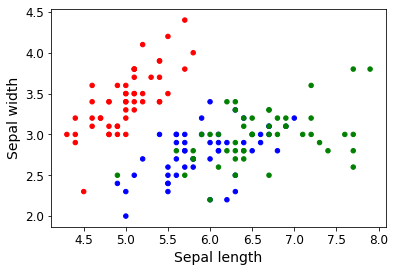

In [22]:
# plot the sepal length and sepal width with color:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
cmap = {0: 'red', 1: 'blue', 2: 'green'}
df.plot(x='sepal length (cm)', y='sepal width (cm)', kind='scatter', c=[cmap.get(c, 'black') for c in df['class']])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

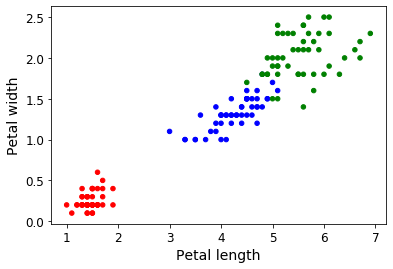

In [23]:
# Of course, you may try plotting different features:
df.plot(x='petal length (cm)', y='petal width (cm)', kind='scatter', c=[cmap.get(c, 'black') for c in df['class']])
plt.xlabel('Petal length')
plt.ylabel('Petal width')

Looks like our features can tell apart different classes of iris! 

For the sake of visualization, we will limit ourselves to 2 features only. Since the petal length/width looks promising, we will use them as our predictors.

Let's train a few classifiers.

In [24]:
X_iris_train = X_iris[:, -2:]

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


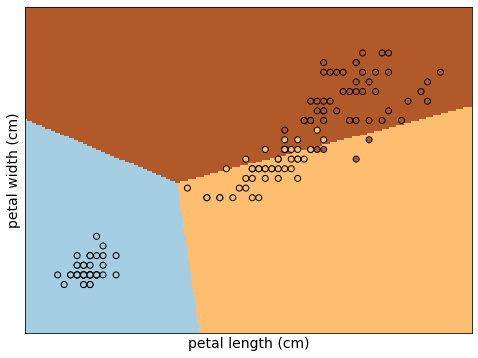

In [25]:
# In reality, remember to split into train and test set for fair evaluation!
# Train a logistic regressor
logreg_iris = LogisticRegression(random_state=rnd, multi_class='auto').fit(X_iris_train, y_iris)
plot_toy_decision_surface(X_iris_train, y_iris, clf=logreg_iris, feature1='petal length (cm)', feature2='petal width (cm)')

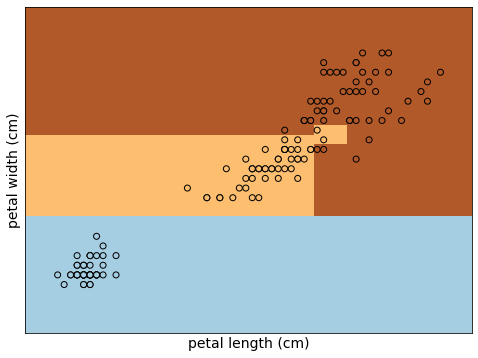

In [26]:
# Decision tree
dt_iris = DecisionTreeClassifier().fit(X_iris_train, y_iris)
plot_toy_decision_surface(X_iris_train, y_iris, clf=dt_iris, feature1='petal length (cm)', feature2='petal width (cm)')

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


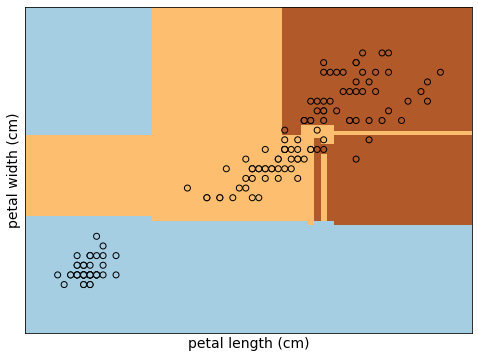

In [27]:
# Random Forests
rf_iris = RandomForestClassifier().fit(X_iris_train, y_iris)
plot_toy_decision_surface(X_iris_train, y_iris, clf=rf_iris, feature1='petal length (cm)', feature2='petal width (cm)')

/opt/tljh/user/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


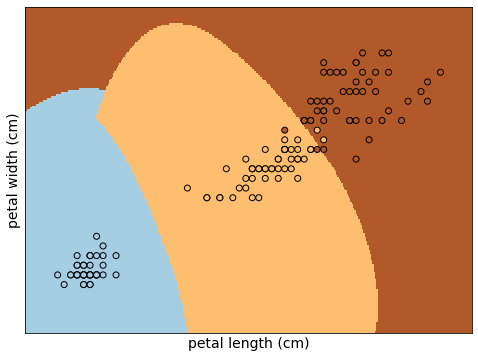

In [28]:
# Bonus: SVM with RBF kernel
from sklearn.svm import SVC
svm_iris = SVC(kernel='rbf', decision_function_shape='ovr').fit(X_iris_train, y_iris)
plot_toy_decision_surface(X_iris_train, y_iris, clf=svm_iris, feature1='petal length (cm)', feature2='petal width (cm)')

# 3. Handwritten digits

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [30]:
print(X_digits.shape)

(1797, 64)


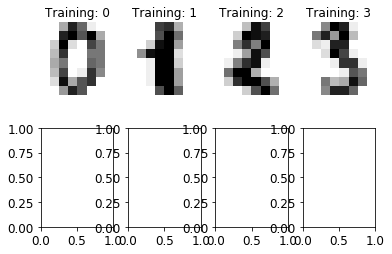

In [31]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
from sklearn import svm
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()

In [32]:
# The first sample (guess what number is it?)
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Hmm, the dimension is too high (64) to plot on a 2D graph, and logically we know simply picking 2 features (2 pixels) does not work (i.e. cannot tell a number from just 2 pixels).

What can we do?

There is one advance technique to try - dimension reduction:

Some of you may probably know about the Principal Component Analysis (PCA). Let's try:

In [33]:
from sklearn.decomposition import PCA
digit_pca = PCA(n_components=2).fit_transform(X=X_digits)

In [34]:
# The first 2 princpal components:
digit_pca

array([[ -1.25946474,  21.27488307],
       [  7.95761586, -20.76869746],
       [  6.99191887,  -9.95598718],
       ...,
       [ 10.80128201,  -6.96025263],
       [ -4.87209795,  12.4239523 ],
       [ -0.34439531,   6.36554781]])

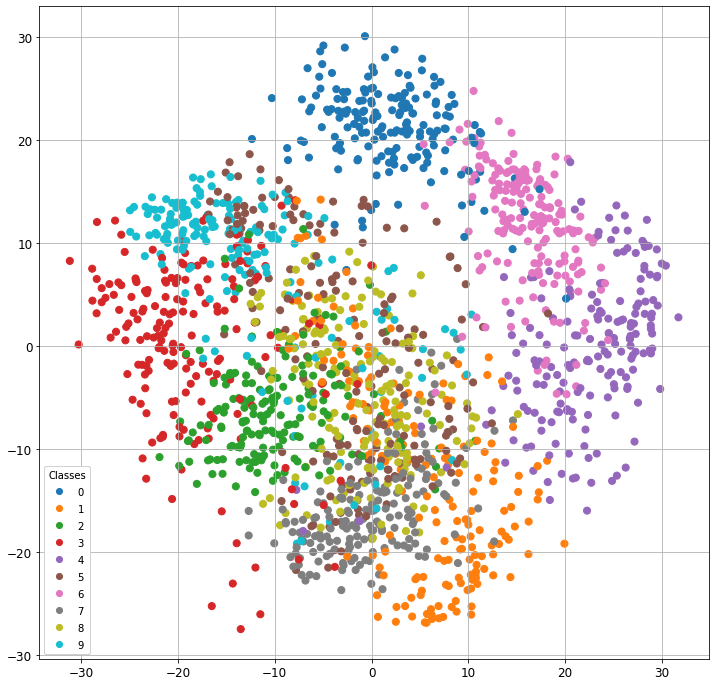

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))

scatter = ax.scatter(digit_pca[:, 0], digit_pca[:, 1], c=y_digits, s=50, cmap='tab10')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.grid()
plt.show()

**Question:** Stare at this graph for a moment. Do you notice any characteristics?

Finally, let's finish off with some classifiers...

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


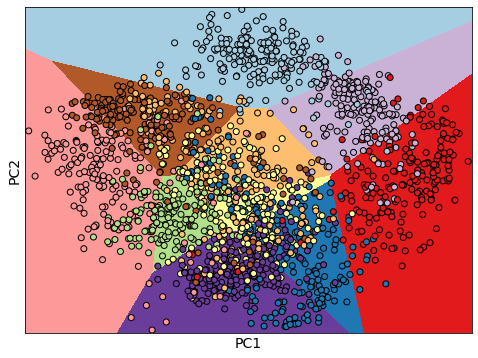

In [36]:
# Train a logistic regressor
logreg_digits = LogisticRegression(random_state=rnd, multi_class='auto').fit(digit_pca, y_digits)
plot_toy_decision_surface(digit_pca, y_digits, clf=logreg_digits, feature1='PC1', feature2='PC2')

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


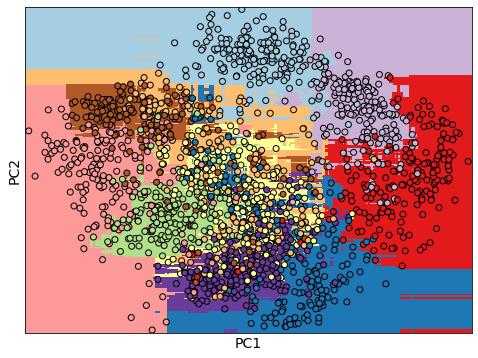

In [37]:
# Random Forests
rf_digits = RandomForestClassifier().fit(digit_pca, y_digits)
plot_toy_decision_surface(digit_pca, y_digits, clf=rf_digits, feature1='PC1', feature2='PC2')

/opt/tljh/user/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


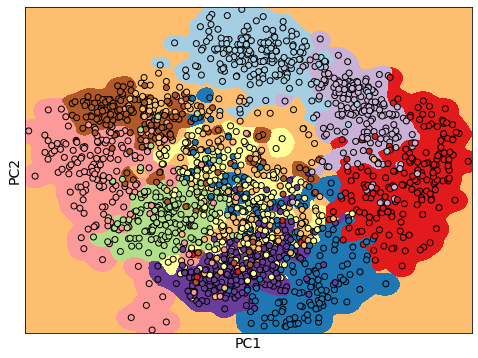

In [38]:
# SVM with RBF kernel
svm_digits = SVC(kernel='rbf', decision_function_shape='ovr').fit(digit_pca, y_digits)
plot_toy_decision_surface(digit_pca, y_digits, clf=svm_digits, feature1='PC1', feature2='PC2')

**Exercise:**: Try training a classifier using the original data directly (64 features) and transformed data (pick 2 or 3 PCs). Use a test set to compare the performance difference between the two. Which one performs better?